In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [2]:
smoker_train=pd.read_csv("train.csv",index_col=0)
smoker_train.head()

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
id                                                                            
0    55         165          60       81.0             0.5              0.6   
1    70         165          65       89.0             0.6              0.7   
2    20         170          75       81.0             0.4              0.5   
3    35         180          95      105.0             1.5              1.2   
4    30         165          60       80.5             1.5              1.0   

    hearing(left)  hearing(right)  systolic  relaxation  ...  HDL  LDL  \
id                                                       ...             
0               1               1       135          87  ...   40   75   
1               2               2       146          83  ...   57  126   
2               1               1       118          75  ...   45   93   
3               1               1       131          88  ...   38  102   
4               1               1       121          76  ...   44   93   

    hemoglobin  Urine protein  serum creatinine  AST  ALT  Gtp  dental caries  \
id                                                                              
0         16.5              1               1.0   22   25   27              0   
1         16.2              1               1.1   27   23   37              1   
2         17.4              1               0.8   27   31   53              0   
3         15.9              1               1.0   20   27   30              1   
4         15.4              1               0.8   19   13   17              0   

    smoking  
id           
0         1  
1         0  
2         1  
3         0  
4         1  

[5 rows x 23 columns]

In [3]:
X_train=smoker_train.drop('smoking',axis=1)
y_train=smoker_train['smoking']

# 1. XGBoost

In [9]:
xgboost=XGBClassifier()

In [10]:
xgboost.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [14]:
params={'max_depth':[2,3,4,5,6,None],'learning_rate':np.linspace(0.001,0.999,10),'n_estimators':[50,100,150]}
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)

In [15]:
gcv=GridSearchCV(xgboost,param_grid=params,cv=kfold,verbose=3)
gcv.fit(X_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=0.563 total time=   1.0s
[CV 2/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=0.563 total time=   1.0s
[CV 3/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=0.563 total time=   1.1s
[CV 4/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=0.563 total time=   1.0s
[CV 5/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=0.563 total time=   1.0s
[CV 1/5] END learning_rate=0.001, max_depth=2, n_estimators=100;, score=0.563 total time=   1.6s
[CV 2/5] END learning_rate=0.001, max_depth=2, n_estimators=100;, score=0.563 total time=   1.6s
[CV 3/5] END learning_rate=0.001, max_depth=2, n_estimators=100;, score=0.563 total time=   1.6s
[CV 4/5] END learning_rate=0.001, max_depth=2, n_estimators=100;, score=0.563 total time=   1.6s
[CV 5/5] END learning_rate=0.001, max_depth=2, n_estimators=100;, sco

[CV 5/5] END learning_rate=0.001, max_depth=None, n_estimators=100;, score=0.563 total time=   2.9s
[CV 1/5] END learning_rate=0.001, max_depth=None, n_estimators=150;, score=0.563 total time=   4.5s
[CV 2/5] END learning_rate=0.001, max_depth=None, n_estimators=150;, score=0.563 total time=   4.4s
[CV 3/5] END learning_rate=0.001, max_depth=None, n_estimators=150;, score=0.563 total time=   4.2s
[CV 4/5] END learning_rate=0.001, max_depth=None, n_estimators=150;, score=0.563 total time=   4.5s
[CV 5/5] END learning_rate=0.001, max_depth=None, n_estimators=150;, score=0.563 total time=   4.7s
[CV 1/5] END learning_rate=0.11188888888888888, max_depth=2, n_estimators=50;, score=0.762 total time=   1.1s
[CV 2/5] END learning_rate=0.11188888888888888, max_depth=2, n_estimators=50;, score=0.761 total time=   1.1s
[CV 3/5] END learning_rate=0.11188888888888888, max_depth=2, n_estimators=50;, score=0.762 total time=   1.1s
[CV 4/5] END learning_rate=0.11188888888888888, max_depth=2, n_estimat

[CV 5/5] END learning_rate=0.11188888888888888, max_depth=6, n_estimators=100;, score=0.783 total time=   2.7s
[CV 1/5] END learning_rate=0.11188888888888888, max_depth=6, n_estimators=150;, score=0.784 total time=   4.0s
[CV 2/5] END learning_rate=0.11188888888888888, max_depth=6, n_estimators=150;, score=0.783 total time=   4.0s
[CV 3/5] END learning_rate=0.11188888888888888, max_depth=6, n_estimators=150;, score=0.784 total time=   3.6s
[CV 4/5] END learning_rate=0.11188888888888888, max_depth=6, n_estimators=150;, score=0.784 total time=   3.7s
[CV 5/5] END learning_rate=0.11188888888888888, max_depth=6, n_estimators=150;, score=0.783 total time=   3.6s
[CV 1/5] END learning_rate=0.11188888888888888, max_depth=None, n_estimators=50;, score=0.778 total time=   1.7s
[CV 2/5] END learning_rate=0.11188888888888888, max_depth=None, n_estimators=50;, score=0.776 total time=   1.7s
[CV 3/5] END learning_rate=0.11188888888888888, max_depth=None, n_estimators=50;, score=0.778 total time=   

[CV 4/5] END learning_rate=0.22277777777777777, max_depth=5, n_estimators=100;, score=0.783 total time=   2.1s
[CV 5/5] END learning_rate=0.22277777777777777, max_depth=5, n_estimators=100;, score=0.783 total time=   2.1s
[CV 1/5] END learning_rate=0.22277777777777777, max_depth=5, n_estimators=150;, score=0.782 total time=   3.1s
[CV 2/5] END learning_rate=0.22277777777777777, max_depth=5, n_estimators=150;, score=0.781 total time=   2.8s
[CV 3/5] END learning_rate=0.22277777777777777, max_depth=5, n_estimators=150;, score=0.784 total time=   3.0s
[CV 4/5] END learning_rate=0.22277777777777777, max_depth=5, n_estimators=150;, score=0.783 total time=   3.5s
[CV 5/5] END learning_rate=0.22277777777777777, max_depth=5, n_estimators=150;, score=0.782 total time=   3.9s
[CV 1/5] END learning_rate=0.22277777777777777, max_depth=6, n_estimators=50;, score=0.781 total time=   2.1s
[CV 2/5] END learning_rate=0.22277777777777777, max_depth=6, n_estimators=50;, score=0.780 total time=   2.2s
[CV

[CV 3/5] END learning_rate=0.33366666666666667, max_depth=4, n_estimators=100;, score=0.782 total time=   1.9s
[CV 4/5] END learning_rate=0.33366666666666667, max_depth=4, n_estimators=100;, score=0.782 total time=   1.8s
[CV 5/5] END learning_rate=0.33366666666666667, max_depth=4, n_estimators=100;, score=0.783 total time=   1.9s
[CV 1/5] END learning_rate=0.33366666666666667, max_depth=4, n_estimators=150;, score=0.783 total time=   2.4s
[CV 2/5] END learning_rate=0.33366666666666667, max_depth=4, n_estimators=150;, score=0.781 total time=   2.5s
[CV 3/5] END learning_rate=0.33366666666666667, max_depth=4, n_estimators=150;, score=0.784 total time=   2.4s
[CV 4/5] END learning_rate=0.33366666666666667, max_depth=4, n_estimators=150;, score=0.784 total time=   2.4s
[CV 5/5] END learning_rate=0.33366666666666667, max_depth=4, n_estimators=150;, score=0.784 total time=   2.4s
[CV 1/5] END learning_rate=0.33366666666666667, max_depth=5, n_estimators=50;, score=0.781 total time=   1.2s
[C

[CV 2/5] END learning_rate=0.44455555555555554, max_depth=3, n_estimators=100;, score=0.779 total time=   1.7s
[CV 3/5] END learning_rate=0.44455555555555554, max_depth=3, n_estimators=100;, score=0.780 total time=   1.6s
[CV 4/5] END learning_rate=0.44455555555555554, max_depth=3, n_estimators=100;, score=0.779 total time=   1.7s
[CV 5/5] END learning_rate=0.44455555555555554, max_depth=3, n_estimators=100;, score=0.782 total time=   1.6s
[CV 1/5] END learning_rate=0.44455555555555554, max_depth=3, n_estimators=150;, score=0.783 total time=   2.3s
[CV 2/5] END learning_rate=0.44455555555555554, max_depth=3, n_estimators=150;, score=0.780 total time=   2.3s
[CV 3/5] END learning_rate=0.44455555555555554, max_depth=3, n_estimators=150;, score=0.783 total time=   2.2s
[CV 4/5] END learning_rate=0.44455555555555554, max_depth=3, n_estimators=150;, score=0.783 total time=   3.0s
[CV 5/5] END learning_rate=0.44455555555555554, max_depth=3, n_estimators=150;, score=0.783 total time=   2.2s
[

[CV 1/5] END learning_rate=0.5554444444444444, max_depth=2, n_estimators=100;, score=0.780 total time=   1.6s
[CV 2/5] END learning_rate=0.5554444444444444, max_depth=2, n_estimators=100;, score=0.777 total time=   1.6s
[CV 3/5] END learning_rate=0.5554444444444444, max_depth=2, n_estimators=100;, score=0.778 total time=   1.6s
[CV 4/5] END learning_rate=0.5554444444444444, max_depth=2, n_estimators=100;, score=0.779 total time=   1.6s
[CV 5/5] END learning_rate=0.5554444444444444, max_depth=2, n_estimators=100;, score=0.780 total time=   1.6s
[CV 1/5] END learning_rate=0.5554444444444444, max_depth=2, n_estimators=150;, score=0.782 total time=   2.1s
[CV 2/5] END learning_rate=0.5554444444444444, max_depth=2, n_estimators=150;, score=0.779 total time=   2.3s
[CV 3/5] END learning_rate=0.5554444444444444, max_depth=2, n_estimators=150;, score=0.779 total time=   2.1s
[CV 4/5] END learning_rate=0.5554444444444444, max_depth=2, n_estimators=150;, score=0.780 total time=   2.2s
[CV 5/5] E

[CV 1/5] END learning_rate=0.5554444444444444, max_depth=None, n_estimators=100;, score=0.776 total time=   2.3s
[CV 2/5] END learning_rate=0.5554444444444444, max_depth=None, n_estimators=100;, score=0.775 total time=   2.3s
[CV 3/5] END learning_rate=0.5554444444444444, max_depth=None, n_estimators=100;, score=0.775 total time=   2.3s
[CV 4/5] END learning_rate=0.5554444444444444, max_depth=None, n_estimators=100;, score=0.775 total time=   2.3s
[CV 5/5] END learning_rate=0.5554444444444444, max_depth=None, n_estimators=100;, score=0.774 total time=   2.3s
[CV 1/5] END learning_rate=0.5554444444444444, max_depth=None, n_estimators=150;, score=0.775 total time=   3.2s
[CV 2/5] END learning_rate=0.5554444444444444, max_depth=None, n_estimators=150;, score=0.773 total time=   3.2s
[CV 3/5] END learning_rate=0.5554444444444444, max_depth=None, n_estimators=150;, score=0.773 total time=   3.2s
[CV 4/5] END learning_rate=0.5554444444444444, max_depth=None, n_estimators=150;, score=0.772 to

[CV 1/5] END learning_rate=0.6663333333333333, max_depth=6, n_estimators=100;, score=0.774 total time=   2.6s
[CV 2/5] END learning_rate=0.6663333333333333, max_depth=6, n_estimators=100;, score=0.772 total time=   2.4s
[CV 3/5] END learning_rate=0.6663333333333333, max_depth=6, n_estimators=100;, score=0.770 total time=   2.4s
[CV 4/5] END learning_rate=0.6663333333333333, max_depth=6, n_estimators=100;, score=0.772 total time=   2.4s
[CV 5/5] END learning_rate=0.6663333333333333, max_depth=6, n_estimators=100;, score=0.772 total time=   2.3s
[CV 1/5] END learning_rate=0.6663333333333333, max_depth=6, n_estimators=150;, score=0.771 total time=   3.3s
[CV 2/5] END learning_rate=0.6663333333333333, max_depth=6, n_estimators=150;, score=0.769 total time=   3.3s
[CV 3/5] END learning_rate=0.6663333333333333, max_depth=6, n_estimators=150;, score=0.767 total time=   3.3s
[CV 4/5] END learning_rate=0.6663333333333333, max_depth=6, n_estimators=150;, score=0.770 total time=   3.3s
[CV 5/5] E

[CV 1/5] END learning_rate=0.7772222222222221, max_depth=5, n_estimators=100;, score=0.773 total time=   2.1s
[CV 2/5] END learning_rate=0.7772222222222221, max_depth=5, n_estimators=100;, score=0.776 total time=   2.0s
[CV 3/5] END learning_rate=0.7772222222222221, max_depth=5, n_estimators=100;, score=0.774 total time=   2.5s
[CV 4/5] END learning_rate=0.7772222222222221, max_depth=5, n_estimators=100;, score=0.775 total time=   2.1s
[CV 5/5] END learning_rate=0.7772222222222221, max_depth=5, n_estimators=100;, score=0.774 total time=   2.1s
[CV 1/5] END learning_rate=0.7772222222222221, max_depth=5, n_estimators=150;, score=0.773 total time=   3.1s
[CV 2/5] END learning_rate=0.7772222222222221, max_depth=5, n_estimators=150;, score=0.773 total time=   2.9s
[CV 3/5] END learning_rate=0.7772222222222221, max_depth=5, n_estimators=150;, score=0.771 total time=   3.1s
[CV 4/5] END learning_rate=0.7772222222222221, max_depth=5, n_estimators=150;, score=0.774 total time=   3.0s
[CV 5/5] E

[CV 1/5] END learning_rate=0.8881111111111111, max_depth=4, n_estimators=100;, score=0.777 total time=   2.6s
[CV 2/5] END learning_rate=0.8881111111111111, max_depth=4, n_estimators=100;, score=0.775 total time=   2.4s
[CV 3/5] END learning_rate=0.8881111111111111, max_depth=4, n_estimators=100;, score=0.777 total time=   2.2s
[CV 4/5] END learning_rate=0.8881111111111111, max_depth=4, n_estimators=100;, score=0.778 total time=   2.5s
[CV 5/5] END learning_rate=0.8881111111111111, max_depth=4, n_estimators=100;, score=0.775 total time=   1.9s
[CV 1/5] END learning_rate=0.8881111111111111, max_depth=4, n_estimators=150;, score=0.775 total time=   2.6s
[CV 2/5] END learning_rate=0.8881111111111111, max_depth=4, n_estimators=150;, score=0.774 total time=   2.8s
[CV 3/5] END learning_rate=0.8881111111111111, max_depth=4, n_estimators=150;, score=0.775 total time=   2.7s
[CV 4/5] END learning_rate=0.8881111111111111, max_depth=4, n_estimators=150;, score=0.776 total time=   2.5s
[CV 5/5] E

[CV 3/5] END learning_rate=0.999, max_depth=3, n_estimators=100;, score=0.778 total time=   1.7s
[CV 4/5] END learning_rate=0.999, max_depth=3, n_estimators=100;, score=0.780 total time=   1.6s
[CV 5/5] END learning_rate=0.999, max_depth=3, n_estimators=100;, score=0.777 total time=   1.8s
[CV 1/5] END learning_rate=0.999, max_depth=3, n_estimators=150;, score=0.779 total time=   2.3s
[CV 2/5] END learning_rate=0.999, max_depth=3, n_estimators=150;, score=0.776 total time=   2.3s
[CV 3/5] END learning_rate=0.999, max_depth=3, n_estimators=150;, score=0.777 total time=   2.3s
[CV 4/5] END learning_rate=0.999, max_depth=3, n_estimators=150;, score=0.779 total time=   2.2s
[CV 5/5] END learning_rate=0.999, max_depth=3, n_estimators=150;, score=0.774 total time=   2.3s
[CV 1/5] END learning_rate=0.999, max_depth=4, n_estimators=50;, score=0.777 total time=   1.1s
[CV 2/5] END learning_rate=0.999, max_depth=4, n_estimators=50;, score=0.774 total time=   1.1s
[CV 3/5] END learning_rate=0.999

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_typ...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=Non

In [16]:
print("Best Parameters: ",gcv.best_params_)
print("Best Score: ",gcv.best_score_)

Best Parameters:  {'learning_rate': 0.11188888888888888, 'max_depth': 6, 'n_estimators': 150}
Best Score:  0.7834241699624286


In [9]:
smoker_test=pd.read_csv("test.csv",index_col=0)
smoker_test.head()

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
id                                                               
159256   40         165          70       84.0             1.2   
159257   80         160          60       93.0             1.0   
159258   60         170          70       86.5             0.6   
159259   40         160          50       67.0             0.3   
159260   40         170          75       89.4             1.0   

        eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
id                                                                             
159256              1.2              1               1       130          89   
159257              1.0              2               2       144          72   
159258              0.7              1               1       117          75   
159259              0.4              1               1       116          62   
159260              0.9              1               1       132          94   

        ...  triglyceride  HDL  LDL  hemoglobin  Urine protein  \
id      ...                                                      
159256  ...           186   49  115        14.2              1   
159257  ...           158   35  104        13.0              1   
159258  ...           173   39   88        15.4              1   
159259  ...            47   75  128        14.5              1   
159260  ...           100   39  123        16.5              1   

        serum creatinine  AST  ALT  Gtp  dental caries  
id                                                      
159256               0.9   19   25   32              0  
159257               1.1   20   12   24              0  
159258               1.4   38   60   36              0  
159259               0.6   25   18   10              1  
159260               1.0   30   39   27              1  

[5 rows x 22 columns]

In [10]:
X_test=smoker_test

In [19]:
best_model=gcv.best_estimator_
y_pred=best_model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [20]:
submission=pd.DataFrame({'id':smoker_test.index,'smoking':y_pred})
submission.head()

id  smoking
0  159256        1
1  159257        0
2  159258        0
3  159259        0
4  159260        1

In [21]:
submission.to_csv("smoker_xgboost.csv",index=False)

In [26]:
# Leaderboard Score
# Score: 0.78678
# Public score: 0.78843

# 2. Light GBM

In [22]:
lgbm=LGBMClassifier(random_state=23)

In [23]:
params={'max_depth':[2,3,4,5,6,None],'learning_rate':np.linspace(0.001,0.999,10),'n_estimators':[50,100,150]}
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)

In [24]:
gcv=GridSearchCV(lgbm,param_grid=params,cv=kfold,verbose=3)
gcv.fit(X_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047928 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2140
[LightGBM] [Info] Number of data points in the train set: 127404, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437365 -> initscore=-0.251865
[LightGBM] [Info] Start training from score -0.251865
[CV 1/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=0.563 total time=   2.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.050284 seconds.
You can set

[CV 3/5] END learning_rate=0.001, max_depth=2, n_estimators=150;, score=0.563 total time=   2.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2142
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[CV 4/5] END learning_rate=0.001, max_depth=2, n_estimators=150;, score=0.563 total time=   2.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info

[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.563 total time=   2.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047628 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2140
[LightGBM] [Info] Number of data points in the train set: 127404, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437365 -> initscore=-0.251865
[LightGBM] [Info] Start training from score -0.251865
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=150;, score=0.563 total time=   3.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testin

[CV 2/5] END learning_rate=0.001, max_depth=4, n_estimators=100;, score=0.563 total time=   2.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2137
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0.251879
[LightGBM] [Info] Start training from score -0.251879
[CV 3/5] END learning_rate=0.001, max_depth=4, n_estimators=100;, score=0.563 total time=   2.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=50;, score=0.563 total time=   1.6s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028566 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2142
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=150;, score=0.563 total time=   4.2s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 4/5] END learning_rate=0.001, max_depth=6, n_estimators=50;, score=0.563 total time=   1.9s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042794 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 2/5] END learning_rate=0.001, max_depth=6, n_estimators=150;, score=0.563 total time=   4.4s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2137
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0

[CV 2/5] END learning_rate=0.001, max_depth=None, n_estimators=100;, score=0.563 total time=   3.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.055563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2137
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0.251879
[LightGBM] [Info] Start training from score -0.251879
[CV 3/5] END learning_rate=0.001, max_depth=None, n_estimators=100;, score=0.563 total time=   3.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of 

[CV 4/5] END learning_rate=0.11188888888888888, max_depth=2, n_estimators=50;, score=0.762 total time=   1.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[CV 5/5] END learning_rate=0.11188888888888888, max_depth=2, n_estimators=50;, score=0.763 total time=   1.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71682
[LightGBM] [Info] Auto-choosing row-wise multi-threadi

[CV 1/5] END learning_rate=0.11188888888888888, max_depth=3, n_estimators=50;, score=0.769 total time=   1.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0.251879
[LightGBM] [Info] Start training from score -0.251879
[CV 2/5] END learning_rate=0.11188888888888888, max_depth=3, n_estimators=50;, score=0.768 total time=   1.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threadi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 2/5] END learning_rate=0.11188888888888888, max_depth=3, n_estimators=150;, score=0.775 total time=   2.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039004 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2137
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0.251879
[LightGBM] [Info] Start training from score -0.251879
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 3/5] END learning_rate=0.11188888888888888, max_depth=3, n_estimators=150;, score=0.7

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 5/5] END learning_rate=0.11188888888888888, max_depth=4, n_estimators=100;, score=0.781 total time=   2.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2140
[LightGBM] [Info] Number of data points in the train set: 127404, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437365 -> initscore=-0.

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV 4/5] END learning_rate=0.11188888888888888, max_depth=5, n_estimators=50;, score=0.776 total time=   2.3s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 5/5] END learning_rate=0.11188888888888888, max_depth=5, n_estimators=150;, score=0.782 total time=   6.3s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55722, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.058032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2140
[LightGBM] [Info] Number of data points in the train set: 127404, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437365 -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 3/5] END learning_rate=0.11188888888888888, max_depth=6, n_estimators=100;, score=0.781 total time=   3.7s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.055651 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2142
[LightGBM] [Info] Number of data points in the train set: 127405, number of u

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 4/5] END learning_rate=0.11188888888888888, max_depth=6, n_estimators=150;, score=0.782 total time=   8.6s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth 

[CV 4/5] END learning_rate=0.11188888888888888, max_depth=None, n_estimators=100;, score=0.781 total time=   4.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[CV 5/5] END learning_rate=0.11188888888888888, max_depth=None, n_estimators=100;, score=0.782 total time=   4.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi

[CV 1/5] END learning_rate=0.22277777777777777, max_depth=2, n_estimators=100;, score=0.776 total time=   1.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0.251879
[LightGBM] [Info] Start training from score -0.251879
[CV 2/5] END learning_rate=0.22277777777777777, max_depth=2, n_estimators=100;, score=0.773 total time=   2.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threa

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 3/5] END learning_rate=0.22277777777777777, max_depth=3, n_estimators=50;, score=0.777 total time=   1.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2142
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[CV 4/5] END learning_rate=0.22277777777777777, max_depth=3, n_estimators=50;, score=0.777 total time=   1.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, numbe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 1/5] END learning_rate=0.22277777777777777, max_depth=3, n_estimators=150;, score=0.782 total time=   3.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0.251879
[LightGBM] [Info] Start training from score -0.251879
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 1/5] END learning_rate=0.22277777777777777, max_depth=4, n_estimators=50;, score=0.779 total time=   1.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049732 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0.2

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 1/5] END learning_rate=0.22277777777777777, max_depth=4, n_estimators=100;, score=0.780 total time=   2.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059660 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 2

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 4/5] END learning_rate=0.22277777777777777, max_depth=4, n_estimators=100;, score=0.780 total time=   2.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth >

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 4/5] END learning_rate=0.22277777777777777, max_depth=6, n_estimators=50;, score=0.781 total time=   2.0s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056802 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 ->

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 5/5] END learning_rate=0.22277777777777777, max_depth=6, n_estimators=100;, score=0.782 total time=   3.1s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55722,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV 5/5] END learning_rate=0.22277777777777777, max_depth=None, n_estimators=100;, score=0.783 total time=   3.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.054807 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2140
[LightGBM] [Info] Number of data points in the train set: 127404, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437365 -> initscore=-0.251865
[LightGBM] [Info] Start training from score -0.251865
[CV 1/5] END learning_rate=0.22277777777777777, max_depth=None, n_estimators=150;, score=0.782 total time=   4.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi

[CV 2/5] END learning_rate=0.33366666666666667, max_depth=2, n_estimators=100;, score=0.776 total time=   2.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.055395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2137
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0.251879
[LightGBM] [Info] Start training from score -0.251879
[CV 3/5] END learning_rate=0.33366666666666667, max_depth=2, n_estimators=100;, score=0.778 total time=   2.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threa

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.054968 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2142
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 4/5] END learning_rate=0.33366666666666667, max_depth=3, n_estimators=50;, score=0.777 total time=   1.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [In

[CV 5/5] END learning_rate=0.33366666666666667, max_depth=3, n_estimators=100;, score=0.781 total time=   2.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2140
[LightGBM] [Info] Number of data points in the train set: 127404, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437365 -> initscore=-0.251865
[LightGBM] [Info] Start training from score -0.251865
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 4/5] END learning_rate=0.33366666666666667, max_depth=3, n_estimators=150;, score=0.780 total time=   3.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 4/5] END learning_rate=0.33366666666666667, max_depth=4, n_estimators=50;, score=0.778 total time=   1.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negat

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 4/5] END learning_rate=0.33366666666666667, max_depth=4, n_estimators=100;, score=0.781 total time=   2.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059328 seconds.
You can set `force_col_wise=true` 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV 5/5] END learning_rate=0.33366666666666667, max_depth=4, n_estimators=150;, score=0.784 total time=   3.6s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55722, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.052417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2140
[LightGBM] [Info] Number of data points in the train set: 127404, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437365 -> initscore=-0.251865
[LightGBM] [Info] Start training from score -0.251865
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 3/5] END learning_rate=0.33366666666666667, max_depth=5, n_estimators=50;, score=0.781 total time=   1.8s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.053839 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2142
[Li

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056667 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2142
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.052950 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2137
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0.251879
[LightGBM] [Info] Start training from score -0.251879
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 3/5] END learning_rate=0.33366666666666667, max_depth=6, n_estimators=50;, score=0.780

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 3/5] END learning_rate=0.33366666666666667, max_depth=6, n_estimators=100;, score=0.782 total time=   2.9s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.052327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2142
[LightGBM] [Info] Number of data points in the train set: 127405, number of u

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2142
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[CV 4/5] END learning_rate=0.33366666666666667, max_depth=None, n_estimators=50;, score=0.779 total time=   2.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.053912 se

[CV 5/5] END learning_rate=0.33366666666666667, max_depth=None, n_estimators=150;, score=0.780 total time=   3.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027892 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2140
[LightGBM] [Info] Number of data points in the train set: 127404, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437365 -> initscore=-0.251865
[LightGBM] [Info] Start training from score -0.251865
[CV 1/5] END learning_rate=0.44455555555555554, max_depth=2, n_estimators=50;, score=0.775 total time=   1.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-thr

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 2/5] END learning_rate=0.44455555555555554, max_depth=2, n_estimators=150;, score=0.778 total time=   2.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2137
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0.251879
[LightGBM] [Info] Start training from score -0.251879
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 3/5] END l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 1/5] END learning_rate=0.44455555555555554, max_depth=3, n_estimators=100;, score=0.781 total time=   1.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046499 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0.251879
[LightGBM] [Info] Start training from score -0.251879
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 1/5] END learning_rate=0.44455555555555554, max_depth=3, n_estimators=150;, score=0.783 total time=   2.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037661 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0.

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028880 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 2/5] END learning_rate=0.44455555555555554, max_depth=4, n_estimators=100;, score=0.780 total ti

[CV 4/5] END learning_rate=0.44455555555555554, max_depth=4, n_estimators=100;, score=0.782 total time=   2.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 2/5] END learning_rate=0.44455555555555554, max_depth=5, n_estimators=50;, score=0.778 total time=   1.6s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040174 seconds.
You can set `force_c

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034719 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0.251879
[LightGBM] [Info] Start training from score -0.251879
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV 5/5] END learning_rate=0.44455555555555554, max_depth=5, n_estimators=100;, score=0.779 total time=   2.4s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55722, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044976 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2140
[LightGBM] [Info] Number of data points in the train set: 127404, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437365 -> initscore=-0.251865
[LightGBM] [Info] Start training from score -0.251865
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 1/5] END learning_rate=0.44455555555555554, max_depth=5, n_estimators=150;, score=0.780 total time=   3.2s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043728 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 4/5] END learning_rate=0.44455555555555554, max_depth=6, n_estimators=50;, score=0.781 total time=   1.5s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045610 seconds.
You can set `force_c

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 4/5] END learning_rate=0.44455555555555554, max_depth=6, n_estimators=100;, score=0.778 total time=   2.4s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used feature

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV 2/5] END learning_rate=0.44455555555555554, max_depth=None, n_estimators=100;, score=0.776 total time=   2.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2137
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0.251879
[LightGBM] [Info] Start training from score -0.251879
[CV 3/5] END learning_rate=0.44455555555555554, max_depth=None, n_estimators=100;, score=0.776 total time=   2.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number o

[CV 4/5] END learning_rate=0.5554444444444444, max_depth=2, n_estimators=50;, score=0.776 total time=   1.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038708 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[CV 5/5] END learning_rate=0.5554444444444444, max_depth=2, n_estimators=50;, score=0.776 total time=   1.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71682
[LightGBM] [Info] Auto-choosing row-wise multi-threading

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 5/5] END learning_rate=0.5554444444444444, max_depth=2, n_estimators=150;, score=0.780 total time=   2.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2140
[LightGBM] [Info] Number of data points in the train set: 127404, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437365 -> initscore=-0.251865
[LightGBM] [Info] Start training from score -0.251865
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 1/5] END le

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 3/5] END learning_rate=0.5554444444444444, max_depth=3, n_estimators=100;, score=0.780 total time=   1.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044611 seconds.
You can set `force_col_wise=true` t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 2/5] END learning_rate=0.5554444444444444, max_depth=3, n_estimators=150;, score=0.780 total time=   2.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044603 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2137
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0.251879
[LightGBM] [Info] Start training from score -0.251879
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV 5/5] END learning_rate=0.5554444444444444, max_depth=4, n_estimators=50;, score=0.780 total time=   1.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045513 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2140
[LightGBM] [Info] Number of data points in the train set: 127404, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437365 -> initscore=-0.251865
[LightGBM] [Info] Start training from score -0.251865
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV 1/5] END learning_rate=0.5554444444444444, max_depth=4, n_estimators=150;, score=0.781 total time=   3.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0.251879
[LightGBM] [Info] Start training from score -0.251879
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 4/5] END learning_rate=0.5554444444444444, max_depth=4, n_estimators=150;, score=0.781 total tim

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV 3/5] END learning_rate=0.5554444444444444, max_depth=5, n_estimators=50;, score=0.777 total time=   1.5s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2142
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 3/5] END learning_rate=0.5554444444444444, max_depth=5, n_estimators=100;, score=0.776 total time=   2.3s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves O

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051848 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2142
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 4/5] END learning_rate=0.5554444444444444, max_depth=5, n_estimators=150;, score=0.777 total time=   3.2s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth >

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 5/5] END learning_rate=0.5554444444444444, max_depth=6, n_estimators=50;, score=0.777 total time=   1.5s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55722, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040714 seconds.
You can set `force_co

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 5/5] END learning_rate=0.5554444444444444, max_depth=6, n_estimators=100;, score=0.775 total time=   2.5s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth >

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accu

[CV 3/5] END learning_rate=0.5554444444444444, max_depth=None, n_estimators=100;, score=0.774 total time=   2.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2142
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[CV 4/5] END learning_rate=0.5554444444444444, max_depth=None, n_estimators=100;, score=0.773 total time=   2.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of 

[CV 5/5] END learning_rate=0.6663333333333333, max_depth=2, n_estimators=50;, score=0.778 total time=   1.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.053730 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2140
[LightGBM] [Info] Number of data points in the train set: 127404, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437365 -> initscore=-0.251865
[LightGBM] [Info] Start training from score -0.251865
[CV 1/5] END learning_rate=0.6663333333333333, max_depth=2, n_estimators=100;, score=0.778 total time=   1.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threadin

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043936 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2140
[LightGBM] [Info] Number of data points in the train set: 127404, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437365 -> initscore=-0.251865
[LightGBM] [Info] Start training from score -0.251865
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 3/5] END learning_rat

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 2/5] END learning_rate=0.6663333333333333, max_depth=3, n_estimators=150;, score=0.779 total time=   2.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043355 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2137
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0.251879
[LightGBM] [Info] Start training from score -0.251879
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 1/5] END learning_rate=0.6663333333333333, max_depth=4, n_estimators=150;, score=0.778 total time=   3.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the ov

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55722, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2140
[LightGBM] [Info] Number of data points in the train set: 127404, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437365 -> initscore=-0.251865
[LightGBM] [Info] Start training from score -0.251865
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 3/5] END learning_rate=0.6663333333333333, max_depth=5, n_estimators=50;, score=0.777 total time=   2.4s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 3/5] END learning_rate=0.6663333333333333

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 3/5] END learning_rate=0.6663333333333333, max_depth=5, n_estimators=150;, score=0.776 total time=   3.6s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.050622 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2142
[LightGBM] [Info] Number of data points in the train set: 127405, number of us

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 5/5] END learning_rate=0.6663333333333333, max_depth=6, n_estimators=50;, score=0.776 total time=   1.5s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55722, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2140
[LightGBM] [Info] Number of data points in the train set: 127404, number of use

[CV 5/5] END learning_rate=0.6663333333333333, max_depth=6, n_estimators=100;, score=0.773 total time=   2.3s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55722, number of negative: 71682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2140
[LightGBM] [Info] Number of data points in the train set: 127404, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437365 -> initscore=-0.251865
[LightGBM] [Info] Start training from score -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 5/5] END learning_rate=0.6663333333333333, max_depth=6, n_estimators=150;, score=0.770 total time=   3.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076457 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2140
[LightGBM] [Info] Number of data point

[CV 1/5] END learning_rate=0.6663333333333333, max_depth=None, n_estimators=150;, score=0.766 total time=   3.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0.251879
[LightGBM] [Info] Start training from score -0.251879
[CV 2/5] END learning_rate=0.6663333333333333, max_depth=None, n_estimators=150;, score=0.765 total time=   3.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 3/5] END learning_rate=0.7772222222222221, max_depth=2, n_estimators=100;, score=0.779 total time=   1.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046969 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2142
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 4/5] END learning_rate=0.7772222222222221, max_depth=2, n_estimators=100;, score=0.778

[CV 2/5] END learning_rate=0.7772222222222221, max_depth=3, n_estimators=50;, score=0.773 total time=   1.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2137
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0.251879
[LightGBM] [Info] Start training from score -0.251879
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 3/5] END learning_rate=0.7772222222222221, max_depth=3, n_estimators=50;, score=0.779 t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 3/5] END learning_rate=0.7772222222222221, max_depth=3, n_estimators=100;, score=0.780 total time=   2.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2142
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 2/5] END learning_rate=0.7772222222222221, max_depth=3, n_estimators=150;, score=0.775 total time=   2.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039961 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2137
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0.251879
[LightGBM] [Info] Start training from score -0.251879
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 1/5] END learning_rate=0.7772222222222221, max_depth=4, n_estimators=50;, score=0.778 total time

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 5/5] END learning_rate=0.7772222222222221, max_depth=4, n_estimators=50;, score=0.779 total time=   1.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014567 seconds.
You can set `force_row_wise=true` to

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 2/5] END learning_rate=0.7772222222222221, max_depth=4, n_estimators=100;, score=0.774 total time=   2.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047006 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2137
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0.251879
[LightGBM] [Info] Start training from score -0.251879
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 4/5] END learning_rate=0.7772222222222221, max_depth=4, n_estimators=100;, score=0.777 total time=   2.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV 2/5] END learning_rate=0.7772222222222221, max_depth=4, n_estimators=150;, score=0.775 total time=   2.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045618 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2137
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0.251879
[LightGBM] [Info] Start training from score -0.251879
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV 2/5] END learning_rate=0.7772222222222221, max_depth=5, n_estimators=50;, score=0.772 total time=   1.4s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2137
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0.251879
[LightGBM] [Info] Start training from score -0

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV 1/5] END learning_rate=0.7772222222222221, max_depth=5, n_estimators=100;, score=0.775 total time=   2.5s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035792 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0.251879
[LightGBM] [Info] Start training from score -0.251879
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 1/5] END learning_rate=0.7772222222222221, max_depth=5, n_estimators=150;, score=0.774 total time=   3.2s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth >

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034528 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2142
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2142
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 3/5] END learning_rate=0.7772222222222221, max_depth=6, n_estimators=150;, score=0.765 total time=   3.1s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whi

[CV 1/5] END learning_rate=0.7772222222222221, max_depth=None, n_estimators=100;, score=0.767 total time=   2.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0.251879
[LightGBM] [Info] Start training from score -0.251879
[CV 2/5] END learning_rate=0.7772222222222221, max_depth=None, n_estimators=100;, score=0.764 total time=   2.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-t

[CV 3/5] END learning_rate=0.8881111111111111, max_depth=2, n_estimators=50;, score=0.776 total time=   1.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2142
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[CV 4/5] END learning_rate=0.8881111111111111, max_depth=2, n_estimators=50;, score=0.777 total time=   1.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 4/5] END learning_rate=0.8881111111111111, max_depth=2, n_estimators=150;, score=0.779 total time=   2.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047657 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 5/5] END le

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 2/5] END learning_rate=0.8881111111111111, max_depth=3, n_estimators=100;, score=0.776 total time=   1.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.041039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2137
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV 5/5] END learning_rate=0.8881111111111111, max_depth=3, n_estimators=150;, score=0.777 total time=   2.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2140
[LightGBM] [Info] Number of data points in the train set: 127404, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437365 -> initscore=-0.251865
[LightGBM] [Info] Start training from score -0.251865
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

[CV 4/5] END learning_rate=0.8881111111111111, max_depth=4, n_estimators=50;, score=0.777 total time=   1.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 3/5] END learning_rate=0.8881111111111111, max_depth=4, n_estimators=150;, score=0.773 total time=   2.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace w

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2142
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV 4/5] END learning_rate=0.8881111111111111, max_depth=5, n_estimators=100;, score=0.770 total time=   2.3s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046763 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033746 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2137
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0.251879
[LightGBM] [Info] Start training from score -0.251879
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 4/5] END learning_rate=0.8881111111111111, max_depth=6, n_estimators=50;, score=0.771 total time=   1.5s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-thr

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 4/5] END learning_rate=0.8881111111111111, max_depth=6, n_estimators=100;, score=0.768 total time=   2.4s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043776 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 ->

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accu

[CV 3/5] END learning_rate=0.8881111111111111, max_depth=None, n_estimators=100;, score=0.764 total time=   3.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.058708 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2142
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[CV 4/5] END learning_rate=0.8881111111111111, max_depth=None, n_estimators=100;, score=0.764 total time=   2.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-t

[CV 5/5] END learning_rate=0.999, max_depth=2, n_estimators=50;, score=0.776 total time=   1.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040695 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2140
[LightGBM] [Info] Number of data points in the train set: 127404, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437365 -> initscore=-0.251865
[LightGBM] [Info] Start training from score -0.251865
[CV 1/5] END learning_rate=0.999, max_depth=2, n_estimators=100;, score=0.777 total time=   1.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 1/5] END learning_rate=0.999, max_depth=3, n_estimators=50;, score=0.776 total time=   1.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0.251879
[LightGBM] [Info] Start training from score -0.251879
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 2/5] END learning_rate=0.999, max_depth=3, n_estimators=150;, score=0.777 total time=   2.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034289 seconds.
You can set `force_col_wise=true` to remove the 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 5/5] END learning_rate=0.999, max_depth=3, n_estimators=150;, score=0.775 total time=   2.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.054226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2140
[LightGBM] [Info] Number of data points in the train set: 127404, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437365 -> initscore=-0.251865
[LightGBM] [Info] Start training from score -0.251865
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[CV 4/5] END learning_rate=0.999, max_depth=4, n_estimators=50;, score=0.775 total time=   1.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth >

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2142
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0.251847
[LightGBM] [Info] Start training from score -0.251847
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 4/5] END learning_rate=0.999, max_depth=5, n_estimators=150;, score=0.762 total time=   3.2s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437369 -> initscore=-0

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 55722, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030787 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2140
[LightGBM] [Info] Number of data points in the train set: 127404, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437365 -> initscore=-0.251865
[LightGBM] [Info] Start training from score -0.251865
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth >

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 5/5] END learning_rate=0.999, max_depth=6, n_estimators=150;, score=0.757 total time=   3.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037020 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2140
[LightGBM] [Info] Number of data points in the train set: 127404, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437365 -> initscore=-0.251865
[LightGBM] [Info] Start training from score -0.251865
[CV 1/5] END learning_rate=0.999, max_depth=None, n_estimators=50;, score=0.768 total time=   1.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] N

[CV 2/5] END learning_rate=0.999, max_depth=None, n_estimators=150;, score=0.760 total time=   2.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2137
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437361 -> initscore=-0.251879
[LightGBM] [Info] Start training from score -0.251879
[CV 3/5] END learning_rate=0.999, max_depth=None, n_estimators=150;, score=0.762 total time=   2.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55723, number of negative: 71682
[LightGBM]

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=LGBMClassifier(random_state=23),
             param_grid={'learning_rate': array([0.001     , 0.11188889, 0.22277778, 0.33366667, 0.44455556,
       0.55544444, 0.66633333, 0.77722222, 0.88811111, 0.999     ]),
                         'max_depth': [2, 3, 4, 5, 6, None],
                         'n_estimators': [50, 100, 150]},
             verbose=3)

In [25]:
print("Best Parameters: ",gcv.best_params_)
print("Best Score: ",gcv.best_score_)

Best Parameters:  {'learning_rate': 0.22277777777777777, 'max_depth': 4, 'n_estimators': 150}
Best Score:  0.782645551978803


In [27]:
best_model=gcv.best_estimator_
y_pred=best_model.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [28]:
submission=pd.DataFrame({'id':smoker_test.index,'smoking':y_pred})
submission.head()

id  smoking
0  159256        1
1  159257        0
2  159258        1
3  159259        0
4  159260        1

In [29]:
submission.to_csv("smoker_lightGBM.csv",index=False)

In [30]:
# Leaderboard Score
# Score: 0.78616
# Public score: 0.78761

# 3. Cat Boost

In [4]:
catboost=CatBoostClassifier(random_state=23)

In [5]:
params={'max_depth':[2,3,4,5,6,None],'learning_rate':np.linspace(0.001,0.999,10),
        'n_estimators':[50,100,150]}
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)
gcv=GridSearchCV(catboost,param_grid=params,cv=kfold,verbose=3)
gcv.fit(X_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
0:	learn: 0.6927601	total: 72ms	remaining: 3.53s
1:	learn: 0.6923893	total: 88.9ms	remaining: 2.13s
2:	learn: 0.6919779	total: 102ms	remaining: 1.6s
3:	learn: 0.6916108	total: 119ms	remaining: 1.37s
4:	learn: 0.6912174	total: 134ms	remaining: 1.2s
5:	learn: 0.6908184	total: 147ms	remaining: 1.08s
6:	learn: 0.6904372	total: 162ms	remaining: 992ms
7:	learn: 0.6900573	total: 175ms	remaining: 918ms
8:	learn: 0.6896865	total: 188ms	remaining: 859ms
9:	learn: 0.6892993	total: 204ms	remaining: 815ms
10:	learn: 0.6889232	total: 217ms	remaining: 770ms
11:	learn: 0.6885396	total: 229ms	remaining: 727ms
12:	learn: 0.6881676	total: 241ms	remaining: 686ms
13:	learn: 0.6877809	total: 255ms	remaining: 657ms
14:	learn: 0.6874153	total: 268ms	remaining: 626ms
15:	learn: 0.6870366	total: 284ms	remaining: 604ms
16:	learn: 0.6866431	total: 299ms	remaining: 581ms
17:	learn: 0.6862782	total: 313ms	remaining: 556ms
18:	learn: 0.6859060	total: 325

15:	learn: 0.6870592	total: 215ms	remaining: 458ms
16:	learn: 0.6867016	total: 228ms	remaining: 443ms
17:	learn: 0.6863160	total: 246ms	remaining: 437ms
18:	learn: 0.6859355	total: 260ms	remaining: 424ms
19:	learn: 0.6855664	total: 274ms	remaining: 411ms
20:	learn: 0.6851883	total: 287ms	remaining: 397ms
21:	learn: 0.6848108	total: 301ms	remaining: 383ms
22:	learn: 0.6844599	total: 314ms	remaining: 369ms
23:	learn: 0.6840870	total: 327ms	remaining: 354ms
24:	learn: 0.6837268	total: 340ms	remaining: 340ms
25:	learn: 0.6833549	total: 353ms	remaining: 325ms
26:	learn: 0.6829869	total: 368ms	remaining: 314ms
27:	learn: 0.6826119	total: 382ms	remaining: 300ms
28:	learn: 0.6822502	total: 397ms	remaining: 287ms
29:	learn: 0.6818978	total: 410ms	remaining: 273ms
30:	learn: 0.6815391	total: 425ms	remaining: 260ms
31:	learn: 0.6811808	total: 440ms	remaining: 247ms
32:	learn: 0.6808124	total: 453ms	remaining: 233ms
33:	learn: 0.6804536	total: 465ms	remaining: 219ms
34:	learn: 0.6800867	total: 477

77:	learn: 0.6654105	total: 1.03s	remaining: 292ms
78:	learn: 0.6650817	total: 1.04s	remaining: 278ms
79:	learn: 0.6647552	total: 1.06s	remaining: 264ms
80:	learn: 0.6644293	total: 1.07s	remaining: 250ms
81:	learn: 0.6641016	total: 1.08s	remaining: 237ms
82:	learn: 0.6637905	total: 1.09s	remaining: 223ms
83:	learn: 0.6634738	total: 1.1s	remaining: 210ms
84:	learn: 0.6631508	total: 1.11s	remaining: 196ms
85:	learn: 0.6628260	total: 1.12s	remaining: 182ms
86:	learn: 0.6625009	total: 1.13s	remaining: 169ms
87:	learn: 0.6621803	total: 1.14s	remaining: 156ms
88:	learn: 0.6618662	total: 1.15s	remaining: 142ms
89:	learn: 0.6615719	total: 1.16s	remaining: 129ms
90:	learn: 0.6612559	total: 1.17s	remaining: 116ms
91:	learn: 0.6609364	total: 1.18s	remaining: 103ms
92:	learn: 0.6606270	total: 1.19s	remaining: 89.9ms
93:	learn: 0.6603159	total: 1.21s	remaining: 76.9ms
94:	learn: 0.6600035	total: 1.21s	remaining: 63.9ms
95:	learn: 0.6597122	total: 1.22s	remaining: 51ms
96:	learn: 0.6594289	total: 1.

53:	learn: 0.6733600	total: 617ms	remaining: 526ms
54:	learn: 0.6730283	total: 627ms	remaining: 513ms
55:	learn: 0.6726797	total: 637ms	remaining: 500ms
56:	learn: 0.6723408	total: 646ms	remaining: 487ms
57:	learn: 0.6720012	total: 657ms	remaining: 476ms
58:	learn: 0.6716710	total: 666ms	remaining: 463ms
59:	learn: 0.6713293	total: 678ms	remaining: 452ms
60:	learn: 0.6709877	total: 688ms	remaining: 440ms
61:	learn: 0.6706465	total: 698ms	remaining: 428ms
62:	learn: 0.6703062	total: 708ms	remaining: 416ms
63:	learn: 0.6699600	total: 719ms	remaining: 404ms
64:	learn: 0.6696204	total: 728ms	remaining: 392ms
65:	learn: 0.6692851	total: 741ms	remaining: 382ms
66:	learn: 0.6689607	total: 753ms	remaining: 371ms
67:	learn: 0.6686170	total: 764ms	remaining: 360ms
68:	learn: 0.6682865	total: 775ms	remaining: 348ms
69:	learn: 0.6679430	total: 787ms	remaining: 337ms
70:	learn: 0.6676178	total: 797ms	remaining: 326ms
71:	learn: 0.6672889	total: 809ms	remaining: 315ms
72:	learn: 0.6669714	total: 824

18:	learn: 0.6859161	total: 223ms	remaining: 952ms
19:	learn: 0.6855406	total: 233ms	remaining: 931ms
20:	learn: 0.6851785	total: 242ms	remaining: 911ms
21:	learn: 0.6848032	total: 251ms	remaining: 891ms
22:	learn: 0.6844512	total: 260ms	remaining: 870ms
23:	learn: 0.6840824	total: 269ms	remaining: 851ms
24:	learn: 0.6837091	total: 277ms	remaining: 832ms
25:	learn: 0.6833330	total: 287ms	remaining: 818ms
26:	learn: 0.6829764	total: 296ms	remaining: 800ms
27:	learn: 0.6826051	total: 305ms	remaining: 785ms
28:	learn: 0.6822373	total: 314ms	remaining: 768ms
29:	learn: 0.6818731	total: 323ms	remaining: 753ms
30:	learn: 0.6815235	total: 331ms	remaining: 736ms
31:	learn: 0.6811667	total: 340ms	remaining: 722ms
32:	learn: 0.6807877	total: 350ms	remaining: 711ms
33:	learn: 0.6804321	total: 359ms	remaining: 697ms
34:	learn: 0.6800707	total: 369ms	remaining: 686ms
35:	learn: 0.6797119	total: 378ms	remaining: 672ms
36:	learn: 0.6793432	total: 388ms	remaining: 661ms
37:	learn: 0.6789817	total: 399

79:	learn: 0.6647552	total: 1.06s	remaining: 927ms
80:	learn: 0.6644293	total: 1.07s	remaining: 913ms
81:	learn: 0.6641016	total: 1.09s	remaining: 901ms
82:	learn: 0.6637905	total: 1.1s	remaining: 887ms
83:	learn: 0.6634738	total: 1.11s	remaining: 875ms
84:	learn: 0.6631508	total: 1.13s	remaining: 861ms
85:	learn: 0.6628260	total: 1.14s	remaining: 847ms
86:	learn: 0.6625009	total: 1.15s	remaining: 834ms
87:	learn: 0.6621803	total: 1.16s	remaining: 820ms
88:	learn: 0.6618662	total: 1.18s	remaining: 806ms
89:	learn: 0.6615719	total: 1.19s	remaining: 792ms
90:	learn: 0.6612559	total: 1.2s	remaining: 778ms
91:	learn: 0.6609364	total: 1.21s	remaining: 765ms
92:	learn: 0.6606270	total: 1.23s	remaining: 752ms
93:	learn: 0.6603159	total: 1.24s	remaining: 738ms
94:	learn: 0.6600035	total: 1.25s	remaining: 724ms
95:	learn: 0.6597122	total: 1.26s	remaining: 711ms
96:	learn: 0.6594289	total: 1.27s	remaining: 697ms
97:	learn: 0.6591202	total: 1.29s	remaining: 683ms
98:	learn: 0.6587949	total: 1.3s	

103:	learn: 0.6573830	total: 1.24s	remaining: 549ms
104:	learn: 0.6570972	total: 1.25s	remaining: 537ms
105:	learn: 0.6567737	total: 1.27s	remaining: 526ms
106:	learn: 0.6564749	total: 1.28s	remaining: 514ms
107:	learn: 0.6561792	total: 1.29s	remaining: 502ms
108:	learn: 0.6558794	total: 1.3s	remaining: 491ms
109:	learn: 0.6555707	total: 1.32s	remaining: 480ms
110:	learn: 0.6552626	total: 1.33s	remaining: 467ms
111:	learn: 0.6550072	total: 1.34s	remaining: 456ms
112:	learn: 0.6547275	total: 1.36s	remaining: 445ms
113:	learn: 0.6544502	total: 1.37s	remaining: 433ms
114:	learn: 0.6541536	total: 1.39s	remaining: 422ms
115:	learn: 0.6538430	total: 1.4s	remaining: 411ms
116:	learn: 0.6535256	total: 1.42s	remaining: 399ms
117:	learn: 0.6532331	total: 1.43s	remaining: 388ms
118:	learn: 0.6529225	total: 1.45s	remaining: 377ms
119:	learn: 0.6526223	total: 1.46s	remaining: 365ms
120:	learn: 0.6523421	total: 1.48s	remaining: 354ms
121:	learn: 0.6520438	total: 1.49s	remaining: 342ms
122:	learn: 0.

123:	learn: 0.6511329	total: 1.45s	remaining: 305ms
124:	learn: 0.6508289	total: 1.46s	remaining: 292ms
125:	learn: 0.6505440	total: 1.47s	remaining: 280ms
126:	learn: 0.6502833	total: 1.48s	remaining: 268ms
127:	learn: 0.6500203	total: 1.49s	remaining: 256ms
128:	learn: 0.6497600	total: 1.5s	remaining: 244ms
129:	learn: 0.6494582	total: 1.51s	remaining: 232ms
130:	learn: 0.6491726	total: 1.52s	remaining: 220ms
131:	learn: 0.6488888	total: 1.53s	remaining: 209ms
132:	learn: 0.6485975	total: 1.54s	remaining: 197ms
133:	learn: 0.6483115	total: 1.55s	remaining: 185ms
134:	learn: 0.6480315	total: 1.56s	remaining: 174ms
135:	learn: 0.6477874	total: 1.57s	remaining: 162ms
136:	learn: 0.6474929	total: 1.58s	remaining: 150ms
137:	learn: 0.6472412	total: 1.59s	remaining: 139ms
138:	learn: 0.6469396	total: 1.6s	remaining: 127ms
139:	learn: 0.6466552	total: 1.62s	remaining: 115ms
140:	learn: 0.6463727	total: 1.63s	remaining: 104ms
141:	learn: 0.6461196	total: 1.64s	remaining: 92.2ms
142:	learn: 0

145:	learn: 0.6451555	total: 1.65s	remaining: 45.3ms
146:	learn: 0.6448788	total: 1.67s	remaining: 34ms
147:	learn: 0.6446205	total: 1.68s	remaining: 22.7ms
148:	learn: 0.6443567	total: 1.7s	remaining: 11.4ms
149:	learn: 0.6440668	total: 1.71s	remaining: 0us
[CV 4/5] END learning_rate=0.001, max_depth=2, n_estimators=150;, score=0.738 total time=   2.1s
0:	learn: 0.6927598	total: 17.6ms	remaining: 2.62s
1:	learn: 0.6923852	total: 32.6ms	remaining: 2.41s
2:	learn: 0.6920079	total: 46.9ms	remaining: 2.29s
3:	learn: 0.6916325	total: 60.3ms	remaining: 2.2s
4:	learn: 0.6912441	total: 72ms	remaining: 2.09s
5:	learn: 0.6908462	total: 84ms	remaining: 2.02s
6:	learn: 0.6904451	total: 95.2ms	remaining: 1.94s
7:	learn: 0.6900696	total: 106ms	remaining: 1.89s
8:	learn: 0.6896754	total: 120ms	remaining: 1.88s
9:	learn: 0.6892891	total: 135ms	remaining: 1.9s
10:	learn: 0.6889196	total: 148ms	remaining: 1.87s
11:	learn: 0.6885312	total: 161ms	remaining: 1.85s
12:	learn: 0.6881644	total: 174ms	remaini

13:	learn: 0.6867432	total: 224ms	remaining: 575ms
14:	learn: 0.6862896	total: 239ms	remaining: 558ms
15:	learn: 0.6858388	total: 254ms	remaining: 540ms
16:	learn: 0.6854089	total: 268ms	remaining: 520ms
17:	learn: 0.6849740	total: 281ms	remaining: 500ms
18:	learn: 0.6845373	total: 295ms	remaining: 481ms
19:	learn: 0.6841016	total: 308ms	remaining: 463ms
20:	learn: 0.6836496	total: 320ms	remaining: 442ms
21:	learn: 0.6832082	total: 333ms	remaining: 424ms
22:	learn: 0.6827600	total: 345ms	remaining: 405ms
23:	learn: 0.6823166	total: 358ms	remaining: 387ms
24:	learn: 0.6819224	total: 369ms	remaining: 369ms
25:	learn: 0.6814995	total: 384ms	remaining: 355ms
26:	learn: 0.6811054	total: 397ms	remaining: 339ms
27:	learn: 0.6806772	total: 410ms	remaining: 322ms
28:	learn: 0.6802497	total: 424ms	remaining: 307ms
29:	learn: 0.6798545	total: 437ms	remaining: 292ms
30:	learn: 0.6794164	total: 452ms	remaining: 277ms
31:	learn: 0.6790210	total: 471ms	remaining: 265ms
32:	learn: 0.6785888	total: 487

26:	learn: 0.6811953	total: 421ms	remaining: 358ms
27:	learn: 0.6807644	total: 434ms	remaining: 341ms
28:	learn: 0.6803367	total: 448ms	remaining: 325ms
29:	learn: 0.6799429	total: 461ms	remaining: 307ms
30:	learn: 0.6795058	total: 475ms	remaining: 291ms
31:	learn: 0.6791128	total: 487ms	remaining: 274ms
32:	learn: 0.6786846	total: 502ms	remaining: 259ms
33:	learn: 0.6782707	total: 517ms	remaining: 243ms
34:	learn: 0.6778476	total: 530ms	remaining: 227ms
35:	learn: 0.6774139	total: 545ms	remaining: 212ms
36:	learn: 0.6769958	total: 561ms	remaining: 197ms
37:	learn: 0.6765737	total: 575ms	remaining: 182ms
38:	learn: 0.6761531	total: 590ms	remaining: 166ms
39:	learn: 0.6757367	total: 605ms	remaining: 151ms
40:	learn: 0.6753282	total: 620ms	remaining: 136ms
41:	learn: 0.6749173	total: 636ms	remaining: 121ms
42:	learn: 0.6744981	total: 653ms	remaining: 106ms
43:	learn: 0.6740748	total: 668ms	remaining: 91.1ms
44:	learn: 0.6736884	total: 683ms	remaining: 75.9ms
45:	learn: 0.6732681	total: 6

89:	learn: 0.6561645	total: 1.26s	remaining: 140ms
90:	learn: 0.6557823	total: 1.27s	remaining: 126ms
91:	learn: 0.6554165	total: 1.29s	remaining: 112ms
92:	learn: 0.6550425	total: 1.3s	remaining: 97.9ms
93:	learn: 0.6546747	total: 1.31s	remaining: 83.8ms
94:	learn: 0.6542973	total: 1.32s	remaining: 69.7ms
95:	learn: 0.6539340	total: 1.34s	remaining: 55.7ms
96:	learn: 0.6535698	total: 1.35s	remaining: 41.7ms
97:	learn: 0.6532012	total: 1.36s	remaining: 27.8ms
98:	learn: 0.6528285	total: 1.37s	remaining: 13.8ms
99:	learn: 0.6524636	total: 1.38s	remaining: 0us
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.743 total time=   1.8s
0:	learn: 0.6926814	total: 18.8ms	remaining: 1.86s
1:	learn: 0.6922290	total: 34.4ms	remaining: 1.69s
2:	learn: 0.6917607	total: 47.8ms	remaining: 1.55s
3:	learn: 0.6913006	total: 62.6ms	remaining: 1.5s
4:	learn: 0.6908328	total: 74.3ms	remaining: 1.41s
5:	learn: 0.6903760	total: 86.7ms	remaining: 1.36s
6:	learn: 0.6899298	total: 98.2ms

58:	learn: 0.6679819	total: 845ms	remaining: 587ms
59:	learn: 0.6675844	total: 856ms	remaining: 571ms
60:	learn: 0.6671766	total: 869ms	remaining: 556ms
61:	learn: 0.6667794	total: 882ms	remaining: 540ms
62:	learn: 0.6663798	total: 894ms	remaining: 525ms
63:	learn: 0.6659847	total: 904ms	remaining: 509ms
64:	learn: 0.6655902	total: 914ms	remaining: 492ms
65:	learn: 0.6652258	total: 924ms	remaining: 476ms
66:	learn: 0.6648541	total: 934ms	remaining: 460ms
67:	learn: 0.6644573	total: 945ms	remaining: 444ms
68:	learn: 0.6640845	total: 954ms	remaining: 429ms
69:	learn: 0.6636957	total: 965ms	remaining: 414ms
70:	learn: 0.6633322	total: 977ms	remaining: 399ms
71:	learn: 0.6629541	total: 987ms	remaining: 384ms
72:	learn: 0.6625636	total: 997ms	remaining: 369ms
73:	learn: 0.6621771	total: 1.01s	remaining: 354ms
74:	learn: 0.6617981	total: 1.02s	remaining: 340ms
75:	learn: 0.6614386	total: 1.03s	remaining: 327ms
76:	learn: 0.6610592	total: 1.05s	remaining: 314ms
77:	learn: 0.6606840	total: 1.0

28:	learn: 0.6801456	total: 439ms	remaining: 1.07s
29:	learn: 0.6797499	total: 471ms	remaining: 1.1s
30:	learn: 0.6793178	total: 484ms	remaining: 1.08s
31:	learn: 0.6788833	total: 496ms	remaining: 1.05s
32:	learn: 0.6784538	total: 509ms	remaining: 1.03s
33:	learn: 0.6780262	total: 522ms	remaining: 1.01s
34:	learn: 0.6776092	total: 534ms	remaining: 991ms
35:	learn: 0.6771697	total: 547ms	remaining: 972ms
36:	learn: 0.6767471	total: 559ms	remaining: 952ms
37:	learn: 0.6763203	total: 571ms	remaining: 932ms
38:	learn: 0.6758963	total: 584ms	remaining: 913ms
39:	learn: 0.6754801	total: 597ms	remaining: 896ms
40:	learn: 0.6750559	total: 610ms	remaining: 878ms
41:	learn: 0.6746374	total: 623ms	remaining: 860ms
42:	learn: 0.6742152	total: 636ms	remaining: 843ms
43:	learn: 0.6737923	total: 651ms	remaining: 829ms
44:	learn: 0.6733689	total: 664ms	remaining: 812ms
45:	learn: 0.6729578	total: 682ms	remaining: 800ms
46:	learn: 0.6725397	total: 698ms	remaining: 787ms
47:	learn: 0.6721171	total: 713m

89:	learn: 0.6561645	total: 1.28s	remaining: 852ms
90:	learn: 0.6557823	total: 1.29s	remaining: 837ms
91:	learn: 0.6554165	total: 1.3s	remaining: 822ms
92:	learn: 0.6550425	total: 1.32s	remaining: 807ms
93:	learn: 0.6546747	total: 1.33s	remaining: 791ms
94:	learn: 0.6542973	total: 1.34s	remaining: 775ms
95:	learn: 0.6539340	total: 1.35s	remaining: 760ms
96:	learn: 0.6535698	total: 1.36s	remaining: 744ms
97:	learn: 0.6532012	total: 1.37s	remaining: 728ms
98:	learn: 0.6528285	total: 1.38s	remaining: 712ms
99:	learn: 0.6524636	total: 1.39s	remaining: 696ms
100:	learn: 0.6521171	total: 1.41s	remaining: 682ms
101:	learn: 0.6517465	total: 1.42s	remaining: 667ms
102:	learn: 0.6513741	total: 1.43s	remaining: 653ms
103:	learn: 0.6510286	total: 1.44s	remaining: 639ms
104:	learn: 0.6506923	total: 1.46s	remaining: 625ms
105:	learn: 0.6503356	total: 1.47s	remaining: 611ms
106:	learn: 0.6499747	total: 1.49s	remaining: 598ms
107:	learn: 0.6496293	total: 1.5s	remaining: 584ms
108:	learn: 0.6492635	tot

113:	learn: 0.6479664	total: 1.47s	remaining: 464ms
114:	learn: 0.6476537	total: 1.48s	remaining: 451ms
115:	learn: 0.6473125	total: 1.5s	remaining: 439ms
116:	learn: 0.6469638	total: 1.51s	remaining: 427ms
117:	learn: 0.6466189	total: 1.52s	remaining: 414ms
118:	learn: 0.6462716	total: 1.54s	remaining: 401ms
119:	learn: 0.6459262	total: 1.55s	remaining: 388ms
120:	learn: 0.6455837	total: 1.56s	remaining: 375ms
121:	learn: 0.6452387	total: 1.57s	remaining: 362ms
122:	learn: 0.6449216	total: 1.59s	remaining: 349ms
123:	learn: 0.6446042	total: 1.6s	remaining: 336ms
124:	learn: 0.6442614	total: 1.62s	remaining: 324ms
125:	learn: 0.6439163	total: 1.64s	remaining: 312ms
126:	learn: 0.6435815	total: 1.65s	remaining: 299ms
127:	learn: 0.6432379	total: 1.66s	remaining: 286ms
128:	learn: 0.6429044	total: 1.68s	remaining: 273ms
129:	learn: 0.6425949	total: 1.69s	remaining: 260ms
130:	learn: 0.6422565	total: 1.7s	remaining: 247ms
131:	learn: 0.6419423	total: 1.71s	remaining: 234ms
132:	learn: 0.6

127:	learn: 0.6430577	total: 1.88s	remaining: 322ms
128:	learn: 0.6427198	total: 1.89s	remaining: 307ms
129:	learn: 0.6423864	total: 1.9s	remaining: 292ms
130:	learn: 0.6420578	total: 1.91s	remaining: 278ms
131:	learn: 0.6417200	total: 1.93s	remaining: 263ms
132:	learn: 0.6414105	total: 1.95s	remaining: 249ms
133:	learn: 0.6411119	total: 1.96s	remaining: 234ms
134:	learn: 0.6407830	total: 1.97s	remaining: 219ms
135:	learn: 0.6404468	total: 1.98s	remaining: 204ms
136:	learn: 0.6401143	total: 1.99s	remaining: 189ms
137:	learn: 0.6397843	total: 2s	remaining: 174ms
138:	learn: 0.6394530	total: 2.01s	remaining: 159ms
139:	learn: 0.6391480	total: 2.02s	remaining: 144ms
140:	learn: 0.6388280	total: 2.03s	remaining: 130ms
141:	learn: 0.6384978	total: 2.04s	remaining: 115ms
142:	learn: 0.6381970	total: 2.05s	remaining: 101ms
143:	learn: 0.6378673	total: 2.06s	remaining: 86.1ms
144:	learn: 0.6375427	total: 2.08s	remaining: 71.7ms
145:	learn: 0.6372220	total: 2.09s	remaining: 57.3ms
146:	learn: 0

148:	learn: 0.6362083	total: 2.09s	remaining: 14ms
149:	learn: 0.6358914	total: 2.1s	remaining: 0us
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=150;, score=0.743 total time=   2.5s
0:	learn: 0.6926797	total: 17ms	remaining: 2.53s
1:	learn: 0.6922139	total: 35ms	remaining: 2.59s
2:	learn: 0.6917480	total: 50.4ms	remaining: 2.47s
3:	learn: 0.6912881	total: 65.1ms	remaining: 2.38s
4:	learn: 0.6908115	total: 80.3ms	remaining: 2.33s
5:	learn: 0.6903449	total: 96ms	remaining: 2.3s
6:	learn: 0.6898983	total: 110ms	remaining: 2.25s
7:	learn: 0.6894503	total: 125ms	remaining: 2.23s
8:	learn: 0.6889810	total: 141ms	remaining: 2.2s
9:	learn: 0.6885169	total: 156ms	remaining: 2.18s
10:	learn: 0.6880587	total: 172ms	remaining: 2.18s
11:	learn: 0.6876056	total: 187ms	remaining: 2.15s
12:	learn: 0.6871502	total: 204ms	remaining: 2.15s
13:	learn: 0.6866980	total: 222ms	remaining: 2.15s
14:	learn: 0.6862924	total: 239ms	remaining: 2.15s
15:	learn: 0.6858400	total: 254ms	remaining: 2.13s

12:	learn: 0.6868540	total: 221ms	remaining: 630ms
13:	learn: 0.6863686	total: 238ms	remaining: 613ms
14:	learn: 0.6859096	total: 255ms	remaining: 594ms
15:	learn: 0.6854474	total: 272ms	remaining: 578ms
16:	learn: 0.6849786	total: 288ms	remaining: 559ms
17:	learn: 0.6845072	total: 301ms	remaining: 536ms
18:	learn: 0.6840338	total: 316ms	remaining: 516ms
19:	learn: 0.6835592	total: 332ms	remaining: 498ms
20:	learn: 0.6830920	total: 347ms	remaining: 479ms
21:	learn: 0.6826182	total: 363ms	remaining: 462ms
22:	learn: 0.6821567	total: 379ms	remaining: 444ms
23:	learn: 0.6816880	total: 393ms	remaining: 426ms
24:	learn: 0.6812218	total: 407ms	remaining: 407ms
25:	learn: 0.6807613	total: 422ms	remaining: 389ms
26:	learn: 0.6803035	total: 436ms	remaining: 372ms
27:	learn: 0.6798627	total: 455ms	remaining: 357ms
28:	learn: 0.6794073	total: 469ms	remaining: 340ms
29:	learn: 0.6789476	total: 489ms	remaining: 326ms
30:	learn: 0.6784984	total: 505ms	remaining: 310ms
31:	learn: 0.6780422	total: 520

25:	learn: 0.6808686	total: 432ms	remaining: 399ms
26:	learn: 0.6804155	total: 450ms	remaining: 383ms
27:	learn: 0.6799610	total: 467ms	remaining: 367ms
28:	learn: 0.6795123	total: 486ms	remaining: 352ms
29:	learn: 0.6790549	total: 502ms	remaining: 335ms
30:	learn: 0.6785978	total: 518ms	remaining: 317ms
31:	learn: 0.6781606	total: 533ms	remaining: 300ms
32:	learn: 0.6777236	total: 547ms	remaining: 282ms
33:	learn: 0.6772701	total: 562ms	remaining: 264ms
34:	learn: 0.6768195	total: 577ms	remaining: 247ms
35:	learn: 0.6763726	total: 594ms	remaining: 231ms
36:	learn: 0.6759357	total: 610ms	remaining: 214ms
37:	learn: 0.6754894	total: 625ms	remaining: 198ms
38:	learn: 0.6750426	total: 643ms	remaining: 181ms
39:	learn: 0.6745980	total: 659ms	remaining: 165ms
40:	learn: 0.6741706	total: 676ms	remaining: 148ms
41:	learn: 0.6737256	total: 695ms	remaining: 132ms
42:	learn: 0.6732846	total: 711ms	remaining: 116ms
43:	learn: 0.6728461	total: 727ms	remaining: 99.1ms
44:	learn: 0.6724056	total: 74

92:	learn: 0.6525465	total: 1.49s	remaining: 112ms
93:	learn: 0.6521528	total: 1.5s	remaining: 96ms
94:	learn: 0.6517646	total: 1.52s	remaining: 80ms
95:	learn: 0.6513737	total: 1.54s	remaining: 64ms
96:	learn: 0.6509869	total: 1.55s	remaining: 48ms
97:	learn: 0.6506128	total: 1.56s	remaining: 31.9ms
98:	learn: 0.6502372	total: 1.58s	remaining: 15.9ms
99:	learn: 0.6498615	total: 1.59s	remaining: 0us
[CV 1/5] END learning_rate=0.001, max_depth=4, n_estimators=100;, score=0.748 total time=   2.0s
0:	learn: 0.6926615	total: 22.6ms	remaining: 2.23s
1:	learn: 0.6921610	total: 43.5ms	remaining: 2.13s
2:	learn: 0.6916796	total: 62.9ms	remaining: 2.03s
3:	learn: 0.6911985	total: 78.6ms	remaining: 1.89s
4:	learn: 0.6906988	total: 92.8ms	remaining: 1.76s
5:	learn: 0.6902169	total: 107ms	remaining: 1.67s
6:	learn: 0.6897430	total: 120ms	remaining: 1.59s
7:	learn: 0.6892555	total: 133ms	remaining: 1.53s
8:	learn: 0.6887809	total: 145ms	remaining: 1.46s
9:	learn: 0.6882951	total: 158ms	remaining: 1

50:	learn: 0.6697087	total: 841ms	remaining: 808ms
51:	learn: 0.6692765	total: 857ms	remaining: 791ms
52:	learn: 0.6688501	total: 871ms	remaining: 773ms
53:	learn: 0.6684295	total: 886ms	remaining: 754ms
54:	learn: 0.6680082	total: 901ms	remaining: 737ms
55:	learn: 0.6675875	total: 917ms	remaining: 720ms
56:	learn: 0.6671629	total: 932ms	remaining: 703ms
57:	learn: 0.6667422	total: 950ms	remaining: 688ms
58:	learn: 0.6663173	total: 966ms	remaining: 671ms
59:	learn: 0.6658984	total: 983ms	remaining: 655ms
60:	learn: 0.6654784	total: 999ms	remaining: 639ms
61:	learn: 0.6650520	total: 1.01s	remaining: 622ms
62:	learn: 0.6646339	total: 1.03s	remaining: 608ms
63:	learn: 0.6642333	total: 1.05s	remaining: 593ms
64:	learn: 0.6638296	total: 1.07s	remaining: 578ms
65:	learn: 0.6634154	total: 1.09s	remaining: 561ms
66:	learn: 0.6629966	total: 1.1s	remaining: 544ms
67:	learn: 0.6625897	total: 1.12s	remaining: 528ms
68:	learn: 0.6621802	total: 1.14s	remaining: 511ms
69:	learn: 0.6617721	total: 1.15

14:	learn: 0.6859340	total: 259ms	remaining: 1.47s
15:	learn: 0.6854533	total: 277ms	remaining: 1.45s
16:	learn: 0.6849793	total: 293ms	remaining: 1.43s
17:	learn: 0.6845083	total: 309ms	remaining: 1.41s
18:	learn: 0.6840376	total: 324ms	remaining: 1.38s
19:	learn: 0.6835700	total: 338ms	remaining: 1.35s
20:	learn: 0.6831042	total: 352ms	remaining: 1.32s
21:	learn: 0.6826365	total: 366ms	remaining: 1.3s
22:	learn: 0.6821675	total: 379ms	remaining: 1.27s
23:	learn: 0.6817149	total: 391ms	remaining: 1.24s
24:	learn: 0.6812529	total: 403ms	remaining: 1.21s
25:	learn: 0.6807929	total: 418ms	remaining: 1.19s
26:	learn: 0.6803265	total: 439ms	remaining: 1.19s
27:	learn: 0.6798727	total: 458ms	remaining: 1.18s
28:	learn: 0.6794080	total: 478ms	remaining: 1.17s
29:	learn: 0.6789506	total: 496ms	remaining: 1.16s
30:	learn: 0.6784909	total: 511ms	remaining: 1.14s
31:	learn: 0.6780363	total: 526ms	remaining: 1.12s
32:	learn: 0.6775809	total: 541ms	remaining: 1.1s
33:	learn: 0.6771384	total: 555ms

76:	learn: 0.6588298	total: 1.27s	remaining: 1.2s
77:	learn: 0.6584272	total: 1.28s	remaining: 1.18s
78:	learn: 0.6580291	total: 1.3s	remaining: 1.17s
79:	learn: 0.6576240	total: 1.31s	remaining: 1.15s
80:	learn: 0.6572210	total: 1.33s	remaining: 1.14s
81:	learn: 0.6568256	total: 1.35s	remaining: 1.12s
82:	learn: 0.6564243	total: 1.37s	remaining: 1.1s
83:	learn: 0.6560252	total: 1.38s	remaining: 1.08s
84:	learn: 0.6556316	total: 1.39s	remaining: 1.07s
85:	learn: 0.6552349	total: 1.41s	remaining: 1.05s
86:	learn: 0.6548447	total: 1.43s	remaining: 1.03s
87:	learn: 0.6544702	total: 1.44s	remaining: 1.02s
88:	learn: 0.6540723	total: 1.46s	remaining: 1000ms
89:	learn: 0.6536785	total: 1.48s	remaining: 985ms
90:	learn: 0.6533047	total: 1.5s	remaining: 970ms
91:	learn: 0.6529371	total: 1.51s	remaining: 953ms
92:	learn: 0.6525465	total: 1.53s	remaining: 936ms
93:	learn: 0.6521528	total: 1.54s	remaining: 920ms
94:	learn: 0.6517646	total: 1.56s	remaining: 907ms
95:	learn: 0.6513737	total: 1.58s	

95:	learn: 0.6516019	total: 1.48s	remaining: 831ms
96:	learn: 0.6512183	total: 1.5s	remaining: 818ms
97:	learn: 0.6508345	total: 1.52s	remaining: 805ms
98:	learn: 0.6504499	total: 1.53s	remaining: 789ms
99:	learn: 0.6500741	total: 1.55s	remaining: 774ms
100:	learn: 0.6496916	total: 1.56s	remaining: 758ms
101:	learn: 0.6493102	total: 1.58s	remaining: 744ms
102:	learn: 0.6489372	total: 1.6s	remaining: 729ms
103:	learn: 0.6485595	total: 1.61s	remaining: 714ms
104:	learn: 0.6481797	total: 1.63s	remaining: 698ms
105:	learn: 0.6478004	total: 1.65s	remaining: 683ms
106:	learn: 0.6474368	total: 1.66s	remaining: 668ms
107:	learn: 0.6470682	total: 1.68s	remaining: 653ms
108:	learn: 0.6466934	total: 1.7s	remaining: 640ms
109:	learn: 0.6463201	total: 1.72s	remaining: 625ms
110:	learn: 0.6459507	total: 1.73s	remaining: 610ms
111:	learn: 0.6455929	total: 1.75s	remaining: 594ms
112:	learn: 0.6452214	total: 1.77s	remaining: 579ms
113:	learn: 0.6448466	total: 1.78s	remaining: 563ms
114:	learn: 0.644481

115:	learn: 0.6440545	total: 1.88s	remaining: 552ms
116:	learn: 0.6436883	total: 1.9s	remaining: 536ms
117:	learn: 0.6433244	total: 1.91s	remaining: 519ms
118:	learn: 0.6429722	total: 1.93s	remaining: 502ms
119:	learn: 0.6426141	total: 1.94s	remaining: 485ms
120:	learn: 0.6422595	total: 1.95s	remaining: 468ms
121:	learn: 0.6419019	total: 1.96s	remaining: 451ms
122:	learn: 0.6415442	total: 1.98s	remaining: 434ms
123:	learn: 0.6411884	total: 1.99s	remaining: 417ms
124:	learn: 0.6408415	total: 2s	remaining: 401ms
125:	learn: 0.6404827	total: 2.02s	remaining: 384ms
126:	learn: 0.6401296	total: 2.03s	remaining: 367ms
127:	learn: 0.6397693	total: 2.04s	remaining: 351ms
128:	learn: 0.6394232	total: 2.05s	remaining: 334ms
129:	learn: 0.6390699	total: 2.06s	remaining: 318ms
130:	learn: 0.6387118	total: 2.08s	remaining: 301ms
131:	learn: 0.6383628	total: 2.09s	remaining: 285ms
132:	learn: 0.6380124	total: 2.11s	remaining: 270ms
133:	learn: 0.6376651	total: 2.13s	remaining: 254ms
134:	learn: 0.63

133:	learn: 0.6376857	total: 2.11s	remaining: 252ms
134:	learn: 0.6373471	total: 2.13s	remaining: 236ms
135:	learn: 0.6370011	total: 2.14s	remaining: 220ms
136:	learn: 0.6366645	total: 2.15s	remaining: 204ms
137:	learn: 0.6363183	total: 2.17s	remaining: 189ms
138:	learn: 0.6359681	total: 2.18s	remaining: 173ms
139:	learn: 0.6356218	total: 2.2s	remaining: 157ms
140:	learn: 0.6352767	total: 2.21s	remaining: 141ms
141:	learn: 0.6349354	total: 2.22s	remaining: 125ms
142:	learn: 0.6345954	total: 2.24s	remaining: 109ms
143:	learn: 0.6342736	total: 2.25s	remaining: 93.7ms
144:	learn: 0.6339388	total: 2.26s	remaining: 78ms
145:	learn: 0.6335926	total: 2.27s	remaining: 62.3ms
146:	learn: 0.6332496	total: 2.29s	remaining: 46.7ms
147:	learn: 0.6329104	total: 2.3s	remaining: 31ms
148:	learn: 0.6325758	total: 2.31s	remaining: 15.5ms
149:	learn: 0.6322480	total: 2.32s	remaining: 0us
[CV 4/5] END learning_rate=0.001, max_depth=4, n_estimators=150;, score=0.748 total time=   2.7s
0:	learn: 0.6926585	t

[CV 5/5] END learning_rate=0.001, max_depth=4, n_estimators=150;, score=0.749 total time=   2.8s
0:	learn: 0.6926329	total: 22.7ms	remaining: 1.11s
1:	learn: 0.6921168	total: 45.4ms	remaining: 1.09s
2:	learn: 0.6916198	total: 68.2ms	remaining: 1.07s
3:	learn: 0.6911179	total: 88.4ms	remaining: 1.02s
4:	learn: 0.6906092	total: 107ms	remaining: 967ms
5:	learn: 0.6901054	total: 126ms	remaining: 923ms
6:	learn: 0.6896021	total: 145ms	remaining: 893ms
7:	learn: 0.6891017	total: 162ms	remaining: 850ms
8:	learn: 0.6886182	total: 180ms	remaining: 821ms
9:	learn: 0.6881125	total: 200ms	remaining: 800ms
10:	learn: 0.6876145	total: 218ms	remaining: 774ms
11:	learn: 0.6871186	total: 236ms	remaining: 746ms
12:	learn: 0.6866345	total: 250ms	remaining: 712ms
13:	learn: 0.6861569	total: 266ms	remaining: 685ms
14:	learn: 0.6856771	total: 280ms	remaining: 654ms
15:	learn: 0.6851878	total: 294ms	remaining: 624ms
16:	learn: 0.6846902	total: 307ms	remaining: 595ms
17:	learn: 0.6842048	total: 323ms	remainin

12:	learn: 0.6865907	total: 224ms	remaining: 638ms
13:	learn: 0.6860909	total: 241ms	remaining: 618ms
14:	learn: 0.6856075	total: 256ms	remaining: 596ms
15:	learn: 0.6851198	total: 271ms	remaining: 576ms
16:	learn: 0.6846499	total: 288ms	remaining: 559ms
17:	learn: 0.6841517	total: 304ms	remaining: 540ms
18:	learn: 0.6836662	total: 320ms	remaining: 522ms
19:	learn: 0.6831934	total: 337ms	remaining: 506ms
20:	learn: 0.6827135	total: 354ms	remaining: 489ms
21:	learn: 0.6822293	total: 372ms	remaining: 474ms
22:	learn: 0.6817631	total: 391ms	remaining: 459ms
23:	learn: 0.6812694	total: 409ms	remaining: 443ms
24:	learn: 0.6807804	total: 429ms	remaining: 429ms
25:	learn: 0.6803000	total: 446ms	remaining: 412ms
26:	learn: 0.6798308	total: 463ms	remaining: 394ms
27:	learn: 0.6793467	total: 479ms	remaining: 377ms
28:	learn: 0.6788865	total: 497ms	remaining: 360ms
29:	learn: 0.6784122	total: 513ms	remaining: 342ms
30:	learn: 0.6779518	total: 530ms	remaining: 325ms
31:	learn: 0.6774767	total: 546

80:	learn: 0.6560039	total: 1.25s	remaining: 293ms
81:	learn: 0.6555926	total: 1.27s	remaining: 279ms
82:	learn: 0.6551739	total: 1.29s	remaining: 265ms
83:	learn: 0.6547683	total: 1.31s	remaining: 250ms
84:	learn: 0.6543774	total: 1.33s	remaining: 235ms
85:	learn: 0.6539716	total: 1.35s	remaining: 220ms
86:	learn: 0.6535572	total: 1.36s	remaining: 204ms
87:	learn: 0.6531606	total: 1.38s	remaining: 188ms
88:	learn: 0.6527443	total: 1.39s	remaining: 172ms
89:	learn: 0.6523356	total: 1.41s	remaining: 157ms
90:	learn: 0.6519193	total: 1.42s	remaining: 141ms
91:	learn: 0.6514973	total: 1.44s	remaining: 126ms
92:	learn: 0.6510775	total: 1.46s	remaining: 110ms
93:	learn: 0.6506747	total: 1.48s	remaining: 94.5ms
94:	learn: 0.6502717	total: 1.5s	remaining: 78.8ms
95:	learn: 0.6498642	total: 1.51s	remaining: 63.1ms
96:	learn: 0.6494681	total: 1.53s	remaining: 47.3ms
97:	learn: 0.6490555	total: 1.55s	remaining: 31.7ms
98:	learn: 0.6486547	total: 1.57s	remaining: 15.9ms
99:	learn: 0.6482586	total

49:	learn: 0.6692976	total: 835ms	remaining: 835ms
50:	learn: 0.6688572	total: 853ms	remaining: 819ms
51:	learn: 0.6684219	total: 871ms	remaining: 804ms
52:	learn: 0.6679735	total: 887ms	remaining: 786ms
53:	learn: 0.6675458	total: 904ms	remaining: 770ms
54:	learn: 0.6670998	total: 921ms	remaining: 753ms
55:	learn: 0.6666598	total: 938ms	remaining: 737ms
56:	learn: 0.6662135	total: 954ms	remaining: 720ms
57:	learn: 0.6657726	total: 975ms	remaining: 706ms
58:	learn: 0.6653543	total: 993ms	remaining: 690ms
59:	learn: 0.6649208	total: 1.01s	remaining: 674ms
60:	learn: 0.6644941	total: 1.03s	remaining: 658ms
61:	learn: 0.6640748	total: 1.05s	remaining: 643ms
62:	learn: 0.6636320	total: 1.07s	remaining: 629ms
63:	learn: 0.6631939	total: 1.09s	remaining: 612ms
64:	learn: 0.6627595	total: 1.11s	remaining: 596ms
65:	learn: 0.6623462	total: 1.12s	remaining: 579ms
66:	learn: 0.6619303	total: 1.14s	remaining: 564ms
67:	learn: 0.6615075	total: 1.16s	remaining: 547ms
68:	learn: 0.6610942	total: 1.1

11:	learn: 0.6870798	total: 239ms	remaining: 1.75s
12:	learn: 0.6865707	total: 264ms	remaining: 1.77s
13:	learn: 0.6860816	total: 283ms	remaining: 1.74s
14:	learn: 0.6855877	total: 299ms	remaining: 1.69s
15:	learn: 0.6851022	total: 315ms	remaining: 1.65s
16:	learn: 0.6845913	total: 330ms	remaining: 1.61s
17:	learn: 0.6840963	total: 346ms	remaining: 1.58s
18:	learn: 0.6836009	total: 361ms	remaining: 1.54s
19:	learn: 0.6831058	total: 376ms	remaining: 1.5s
20:	learn: 0.6826174	total: 390ms	remaining: 1.47s
21:	learn: 0.6821451	total: 404ms	remaining: 1.43s
22:	learn: 0.6816501	total: 418ms	remaining: 1.4s
23:	learn: 0.6811555	total: 431ms	remaining: 1.36s
24:	learn: 0.6806834	total: 445ms	remaining: 1.33s
25:	learn: 0.6801991	total: 460ms	remaining: 1.31s
26:	learn: 0.6797130	total: 474ms	remaining: 1.28s
27:	learn: 0.6792291	total: 488ms	remaining: 1.25s
28:	learn: 0.6787571	total: 501ms	remaining: 1.23s
29:	learn: 0.6782933	total: 515ms	remaining: 1.2s
30:	learn: 0.6778150	total: 529ms	

79:	learn: 0.6564227	total: 1.25s	remaining: 1.09s
80:	learn: 0.6560039	total: 1.26s	remaining: 1.08s
81:	learn: 0.6555926	total: 1.28s	remaining: 1.06s
82:	learn: 0.6551739	total: 1.29s	remaining: 1.04s
83:	learn: 0.6547683	total: 1.31s	remaining: 1.03s
84:	learn: 0.6543774	total: 1.32s	remaining: 1.01s
85:	learn: 0.6539716	total: 1.33s	remaining: 991ms
86:	learn: 0.6535572	total: 1.35s	remaining: 975ms
87:	learn: 0.6531606	total: 1.36s	remaining: 958ms
88:	learn: 0.6527443	total: 1.37s	remaining: 942ms
89:	learn: 0.6523356	total: 1.39s	remaining: 926ms
90:	learn: 0.6519193	total: 1.4s	remaining: 911ms
91:	learn: 0.6514973	total: 1.42s	remaining: 895ms
92:	learn: 0.6510775	total: 1.43s	remaining: 879ms
93:	learn: 0.6506747	total: 1.45s	remaining: 865ms
94:	learn: 0.6502717	total: 1.47s	remaining: 851ms
95:	learn: 0.6498642	total: 1.49s	remaining: 838ms
96:	learn: 0.6494681	total: 1.5s	remaining: 822ms
97:	learn: 0.6490555	total: 1.52s	remaining: 807ms
98:	learn: 0.6486547	total: 1.53s

96:	learn: 0.6495466	total: 1.69s	remaining: 922ms
97:	learn: 0.6491391	total: 1.71s	remaining: 906ms
98:	learn: 0.6487438	total: 1.73s	remaining: 889ms
99:	learn: 0.6483373	total: 1.74s	remaining: 872ms
100:	learn: 0.6479576	total: 1.76s	remaining: 856ms
101:	learn: 0.6475594	total: 1.78s	remaining: 840ms
102:	learn: 0.6471634	total: 1.8s	remaining: 823ms
103:	learn: 0.6467768	total: 1.82s	remaining: 806ms
104:	learn: 0.6463871	total: 1.84s	remaining: 790ms
105:	learn: 0.6459992	total: 1.86s	remaining: 773ms
106:	learn: 0.6456258	total: 1.88s	remaining: 755ms
107:	learn: 0.6452493	total: 1.9s	remaining: 738ms
108:	learn: 0.6448736	total: 1.91s	remaining: 720ms
109:	learn: 0.6444960	total: 1.93s	remaining: 703ms
110:	learn: 0.6441239	total: 1.95s	remaining: 684ms
111:	learn: 0.6437399	total: 1.96s	remaining: 666ms
112:	learn: 0.6433678	total: 1.98s	remaining: 648ms
113:	learn: 0.6430013	total: 1.99s	remaining: 629ms
114:	learn: 0.6426164	total: 2.01s	remaining: 611ms
115:	learn: 0.6422

118:	learn: 0.6411413	total: 1.67s	remaining: 436ms
119:	learn: 0.6407833	total: 1.68s	remaining: 421ms
120:	learn: 0.6404280	total: 1.7s	remaining: 406ms
121:	learn: 0.6400531	total: 1.71s	remaining: 392ms
122:	learn: 0.6396825	total: 1.72s	remaining: 377ms
123:	learn: 0.6393298	total: 1.73s	remaining: 363ms
124:	learn: 0.6389649	total: 1.74s	remaining: 349ms
125:	learn: 0.6385979	total: 1.76s	remaining: 335ms
126:	learn: 0.6382240	total: 1.77s	remaining: 320ms
127:	learn: 0.6378578	total: 1.78s	remaining: 306ms
128:	learn: 0.6375005	total: 1.79s	remaining: 292ms
129:	learn: 0.6371455	total: 1.81s	remaining: 278ms
130:	learn: 0.6367778	total: 1.82s	remaining: 264ms
131:	learn: 0.6364114	total: 1.83s	remaining: 250ms
132:	learn: 0.6360575	total: 1.85s	remaining: 236ms
133:	learn: 0.6357053	total: 1.86s	remaining: 222ms
134:	learn: 0.6353469	total: 1.87s	remaining: 208ms
135:	learn: 0.6349813	total: 1.89s	remaining: 195ms
136:	learn: 0.6346256	total: 1.9s	remaining: 181ms
137:	learn: 0.

137:	learn: 0.6339355	total: 2.35s	remaining: 204ms
138:	learn: 0.6335848	total: 2.36s	remaining: 187ms
139:	learn: 0.6332224	total: 2.38s	remaining: 170ms
140:	learn: 0.6328662	total: 2.39s	remaining: 153ms
141:	learn: 0.6325259	total: 2.4s	remaining: 135ms
142:	learn: 0.6321756	total: 2.42s	remaining: 118ms
143:	learn: 0.6318215	total: 2.43s	remaining: 101ms
144:	learn: 0.6314847	total: 2.44s	remaining: 84.2ms
145:	learn: 0.6311508	total: 2.45s	remaining: 67.2ms
146:	learn: 0.6308162	total: 2.47s	remaining: 50.4ms
147:	learn: 0.6304795	total: 2.48s	remaining: 33.5ms
148:	learn: 0.6301359	total: 2.49s	remaining: 16.7ms
149:	learn: 0.6297798	total: 2.5s	remaining: 0us
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=150;, score=0.750 total time=   2.9s
0:	learn: 0.6926338	total: 20.7ms	remaining: 3.08s
1:	learn: 0.6921152	total: 41.5ms	remaining: 3.07s
2:	learn: 0.6916163	total: 61.6ms	remaining: 3.02s
3:	learn: 0.6910978	total: 80.3ms	remaining: 2.93s
4:	learn: 0.6905811	to

[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=150;, score=0.752 total time=   2.9s
0:	learn: 0.6926307	total: 26.3ms	remaining: 1.29s
1:	learn: 0.6921003	total: 52.1ms	remaining: 1.25s
2:	learn: 0.6915978	total: 76.7ms	remaining: 1.2s
3:	learn: 0.6910660	total: 98.5ms	remaining: 1.13s
4:	learn: 0.6905546	total: 120ms	remaining: 1.08s
5:	learn: 0.6900435	total: 139ms	remaining: 1.02s
6:	learn: 0.6895328	total: 158ms	remaining: 972ms
7:	learn: 0.6890271	total: 178ms	remaining: 935ms
8:	learn: 0.6885108	total: 198ms	remaining: 903ms
9:	learn: 0.6880059	total: 216ms	remaining: 862ms
10:	learn: 0.6874951	total: 234ms	remaining: 831ms
11:	learn: 0.6869797	total: 255ms	remaining: 807ms
12:	learn: 0.6864728	total: 272ms	remaining: 775ms
13:	learn: 0.6859611	total: 291ms	remaining: 749ms
14:	learn: 0.6854609	total: 309ms	remaining: 721ms
15:	learn: 0.6849777	total: 327ms	remaining: 695ms
16:	learn: 0.6844957	total: 344ms	remaining: 668ms
17:	learn: 0.6839916	total: 363ms	remaining

9:	learn: 0.6879417	total: 228ms	remaining: 910ms
10:	learn: 0.6874247	total: 247ms	remaining: 877ms
11:	learn: 0.6869285	total: 270ms	remaining: 856ms
12:	learn: 0.6864213	total: 292ms	remaining: 830ms
13:	learn: 0.6858949	total: 311ms	remaining: 799ms
14:	learn: 0.6853846	total: 326ms	remaining: 760ms
15:	learn: 0.6848808	total: 340ms	remaining: 722ms
16:	learn: 0.6843871	total: 354ms	remaining: 687ms
17:	learn: 0.6838917	total: 370ms	remaining: 658ms
18:	learn: 0.6833864	total: 386ms	remaining: 630ms
19:	learn: 0.6828849	total: 403ms	remaining: 605ms
20:	learn: 0.6823919	total: 418ms	remaining: 578ms
21:	learn: 0.6818903	total: 436ms	remaining: 555ms
22:	learn: 0.6813837	total: 453ms	remaining: 532ms
23:	learn: 0.6809203	total: 471ms	remaining: 511ms
24:	learn: 0.6804248	total: 489ms	remaining: 489ms
25:	learn: 0.6799515	total: 506ms	remaining: 467ms
26:	learn: 0.6794450	total: 529ms	remaining: 450ms
27:	learn: 0.6789544	total: 549ms	remaining: 432ms
28:	learn: 0.6784622	total: 574m

69:	learn: 0.6596432	total: 1.51s	remaining: 648ms
70:	learn: 0.6591979	total: 1.53s	remaining: 625ms
71:	learn: 0.6587641	total: 1.55s	remaining: 602ms
72:	learn: 0.6583252	total: 1.56s	remaining: 578ms
73:	learn: 0.6578929	total: 1.58s	remaining: 554ms
74:	learn: 0.6574744	total: 1.59s	remaining: 531ms
75:	learn: 0.6570169	total: 1.61s	remaining: 508ms
76:	learn: 0.6566065	total: 1.63s	remaining: 486ms
77:	learn: 0.6561827	total: 1.64s	remaining: 463ms
78:	learn: 0.6557584	total: 1.66s	remaining: 441ms
79:	learn: 0.6553579	total: 1.68s	remaining: 419ms
80:	learn: 0.6549077	total: 1.69s	remaining: 397ms
81:	learn: 0.6544990	total: 1.71s	remaining: 375ms
82:	learn: 0.6540630	total: 1.73s	remaining: 354ms
83:	learn: 0.6536135	total: 1.75s	remaining: 333ms
84:	learn: 0.6531991	total: 1.76s	remaining: 311ms
85:	learn: 0.6527682	total: 1.78s	remaining: 290ms
86:	learn: 0.6523494	total: 1.8s	remaining: 269ms
87:	learn: 0.6519446	total: 1.82s	remaining: 248ms
88:	learn: 0.6515284	total: 1.84

29:	learn: 0.6781405	total: 644ms	remaining: 1.5s
30:	learn: 0.6776580	total: 665ms	remaining: 1.48s
31:	learn: 0.6771793	total: 683ms	remaining: 1.45s
32:	learn: 0.6766851	total: 700ms	remaining: 1.42s
33:	learn: 0.6762157	total: 718ms	remaining: 1.39s
34:	learn: 0.6757402	total: 741ms	remaining: 1.38s
35:	learn: 0.6752722	total: 763ms	remaining: 1.36s
36:	learn: 0.6748062	total: 784ms	remaining: 1.33s
37:	learn: 0.6743321	total: 807ms	remaining: 1.32s
38:	learn: 0.6738644	total: 826ms	remaining: 1.29s
39:	learn: 0.6733997	total: 846ms	remaining: 1.27s
40:	learn: 0.6729122	total: 865ms	remaining: 1.24s
41:	learn: 0.6724431	total: 883ms	remaining: 1.22s
42:	learn: 0.6719754	total: 904ms	remaining: 1.2s
43:	learn: 0.6715069	total: 924ms	remaining: 1.18s
44:	learn: 0.6710354	total: 950ms	remaining: 1.16s
45:	learn: 0.6705775	total: 974ms	remaining: 1.14s
46:	learn: 0.6701428	total: 996ms	remaining: 1.12s
47:	learn: 0.6696947	total: 1.01s	remaining: 1.1s
48:	learn: 0.6692224	total: 1.03s	

98:	learn: 0.6473929	total: 1.67s	remaining: 16.8ms
99:	learn: 0.6470116	total: 1.68s	remaining: 0us
[CV 4/5] END learning_rate=0.001, max_depth=6, n_estimators=100;, score=0.752 total time=   2.1s
0:	learn: 0.6926324	total: 26.6ms	remaining: 2.63s
1:	learn: 0.6921199	total: 50.8ms	remaining: 2.49s
2:	learn: 0.6916133	total: 74.2ms	remaining: 2.4s
3:	learn: 0.6910968	total: 94.1ms	remaining: 2.26s
4:	learn: 0.6905878	total: 115ms	remaining: 2.18s
5:	learn: 0.6900563	total: 138ms	remaining: 2.17s
6:	learn: 0.6895323	total: 159ms	remaining: 2.11s
7:	learn: 0.6890070	total: 179ms	remaining: 2.06s
8:	learn: 0.6884953	total: 200ms	remaining: 2.03s
9:	learn: 0.6879879	total: 222ms	remaining: 2s
10:	learn: 0.6874682	total: 246ms	remaining: 1.99s
11:	learn: 0.6869671	total: 269ms	remaining: 1.97s
12:	learn: 0.6864271	total: 290ms	remaining: 1.94s
13:	learn: 0.6859017	total: 311ms	remaining: 1.91s
14:	learn: 0.6854052	total: 332ms	remaining: 1.88s
15:	learn: 0.6848915	total: 356ms	remaining: 1.

66:	learn: 0.6609697	total: 1.29s	remaining: 1.6s
67:	learn: 0.6605232	total: 1.31s	remaining: 1.58s
68:	learn: 0.6600989	total: 1.33s	remaining: 1.56s
69:	learn: 0.6596432	total: 1.35s	remaining: 1.54s
70:	learn: 0.6591979	total: 1.37s	remaining: 1.52s
71:	learn: 0.6587641	total: 1.38s	remaining: 1.5s
72:	learn: 0.6583252	total: 1.4s	remaining: 1.48s
73:	learn: 0.6578929	total: 1.42s	remaining: 1.46s
74:	learn: 0.6574744	total: 1.43s	remaining: 1.43s
75:	learn: 0.6570169	total: 1.45s	remaining: 1.41s
76:	learn: 0.6566065	total: 1.47s	remaining: 1.39s
77:	learn: 0.6561827	total: 1.48s	remaining: 1.37s
78:	learn: 0.6557584	total: 1.5s	remaining: 1.35s
79:	learn: 0.6553579	total: 1.52s	remaining: 1.33s
80:	learn: 0.6549077	total: 1.53s	remaining: 1.31s
81:	learn: 0.6544990	total: 1.55s	remaining: 1.29s
82:	learn: 0.6540630	total: 1.57s	remaining: 1.27s
83:	learn: 0.6536135	total: 1.59s	remaining: 1.25s
84:	learn: 0.6531991	total: 1.61s	remaining: 1.23s
85:	learn: 0.6527682	total: 1.63s	r

82:	learn: 0.6541176	total: 1.49s	remaining: 1.2s
83:	learn: 0.6537059	total: 1.51s	remaining: 1.19s
84:	learn: 0.6532887	total: 1.53s	remaining: 1.17s
85:	learn: 0.6528734	total: 1.55s	remaining: 1.15s
86:	learn: 0.6524728	total: 1.56s	remaining: 1.13s
87:	learn: 0.6520616	total: 1.57s	remaining: 1.11s
88:	learn: 0.6516514	total: 1.59s	remaining: 1.09s
89:	learn: 0.6512239	total: 1.61s	remaining: 1.07s
90:	learn: 0.6508202	total: 1.62s	remaining: 1.05s
91:	learn: 0.6504048	total: 1.64s	remaining: 1.03s
92:	learn: 0.6499875	total: 1.66s	remaining: 1.02s
93:	learn: 0.6495908	total: 1.68s	remaining: 998ms
94:	learn: 0.6491889	total: 1.69s	remaining: 980ms
95:	learn: 0.6487749	total: 1.71s	remaining: 964ms
96:	learn: 0.6483680	total: 1.73s	remaining: 946ms
97:	learn: 0.6479596	total: 1.75s	remaining: 928ms
98:	learn: 0.6475431	total: 1.77s	remaining: 911ms
99:	learn: 0.6471452	total: 1.78s	remaining: 893ms
100:	learn: 0.6467536	total: 1.8s	remaining: 875ms
101:	learn: 0.6463531	total: 1.8

95:	learn: 0.6487515	total: 1.92s	remaining: 1.08s
96:	learn: 0.6483430	total: 1.94s	remaining: 1.06s
97:	learn: 0.6479357	total: 1.96s	remaining: 1.04s
98:	learn: 0.6475372	total: 1.98s	remaining: 1.02s
99:	learn: 0.6471469	total: 2s	remaining: 998ms
100:	learn: 0.6467571	total: 2.01s	remaining: 975ms
101:	learn: 0.6463487	total: 2.02s	remaining: 953ms
102:	learn: 0.6459489	total: 2.04s	remaining: 931ms
103:	learn: 0.6455498	total: 2.06s	remaining: 909ms
104:	learn: 0.6451476	total: 2.07s	remaining: 888ms
105:	learn: 0.6447589	total: 2.09s	remaining: 866ms
106:	learn: 0.6443669	total: 2.1s	remaining: 845ms
107:	learn: 0.6439752	total: 2.12s	remaining: 824ms
108:	learn: 0.6435836	total: 2.13s	remaining: 803ms
109:	learn: 0.6431788	total: 2.15s	remaining: 783ms
110:	learn: 0.6427980	total: 2.17s	remaining: 763ms
111:	learn: 0.6424247	total: 2.19s	remaining: 742ms
112:	learn: 0.6420263	total: 2.21s	remaining: 722ms
113:	learn: 0.6416474	total: 2.22s	remaining: 702ms
114:	learn: 0.6412760

106:	learn: 0.6442099	total: 1.87s	remaining: 753ms
107:	learn: 0.6438108	total: 1.89s	remaining: 735ms
108:	learn: 0.6434084	total: 1.91s	remaining: 717ms
109:	learn: 0.6430110	total: 1.92s	remaining: 699ms
110:	learn: 0.6426317	total: 1.94s	remaining: 681ms
111:	learn: 0.6422346	total: 1.95s	remaining: 663ms
112:	learn: 0.6418344	total: 1.97s	remaining: 645ms
113:	learn: 0.6414517	total: 1.98s	remaining: 627ms
114:	learn: 0.6410592	total: 2s	remaining: 609ms
115:	learn: 0.6406786	total: 2.02s	remaining: 592ms
116:	learn: 0.6402933	total: 2.03s	remaining: 574ms
117:	learn: 0.6398959	total: 2.05s	remaining: 556ms
118:	learn: 0.6395100	total: 2.07s	remaining: 539ms
119:	learn: 0.6391243	total: 2.08s	remaining: 521ms
120:	learn: 0.6387386	total: 2.1s	remaining: 505ms
121:	learn: 0.6383509	total: 2.12s	remaining: 488ms
122:	learn: 0.6379752	total: 2.14s	remaining: 470ms
123:	learn: 0.6376138	total: 2.16s	remaining: 453ms
124:	learn: 0.6372454	total: 2.18s	remaining: 435ms
125:	learn: 0.63

118:	learn: 0.6391295	total: 2.31s	remaining: 602ms
119:	learn: 0.6387311	total: 2.33s	remaining: 583ms
120:	learn: 0.6383473	total: 2.35s	remaining: 564ms
121:	learn: 0.6379703	total: 2.37s	remaining: 544ms
122:	learn: 0.6375881	total: 2.39s	remaining: 524ms
123:	learn: 0.6372165	total: 2.4s	remaining: 504ms
124:	learn: 0.6368353	total: 2.42s	remaining: 485ms
125:	learn: 0.6364686	total: 2.44s	remaining: 465ms
126:	learn: 0.6360834	total: 2.46s	remaining: 446ms
127:	learn: 0.6357110	total: 2.48s	remaining: 426ms
128:	learn: 0.6353187	total: 2.5s	remaining: 407ms
129:	learn: 0.6349466	total: 2.52s	remaining: 387ms
130:	learn: 0.6345647	total: 2.53s	remaining: 367ms
131:	learn: 0.6341931	total: 2.55s	remaining: 348ms
132:	learn: 0.6338136	total: 2.56s	remaining: 328ms
133:	learn: 0.6334657	total: 2.58s	remaining: 308ms
134:	learn: 0.6330806	total: 2.6s	remaining: 288ms
135:	learn: 0.6327212	total: 2.61s	remaining: 269ms
136:	learn: 0.6323484	total: 2.62s	remaining: 249ms
137:	learn: 0.6

31:	learn: 0.6771793	total: 655ms	remaining: 368ms
32:	learn: 0.6766851	total: 680ms	remaining: 350ms
33:	learn: 0.6762157	total: 704ms	remaining: 331ms
34:	learn: 0.6757402	total: 725ms	remaining: 311ms
35:	learn: 0.6752722	total: 747ms	remaining: 291ms
36:	learn: 0.6748062	total: 771ms	remaining: 271ms
37:	learn: 0.6743321	total: 794ms	remaining: 251ms
38:	learn: 0.6738644	total: 818ms	remaining: 231ms
39:	learn: 0.6733997	total: 839ms	remaining: 210ms
40:	learn: 0.6729122	total: 862ms	remaining: 189ms
41:	learn: 0.6724431	total: 887ms	remaining: 169ms
42:	learn: 0.6719754	total: 907ms	remaining: 148ms
43:	learn: 0.6715069	total: 927ms	remaining: 126ms
44:	learn: 0.6710354	total: 946ms	remaining: 105ms
45:	learn: 0.6705775	total: 966ms	remaining: 84ms
46:	learn: 0.6701428	total: 984ms	remaining: 62.8ms
47:	learn: 0.6696947	total: 1s	remaining: 41.7ms
48:	learn: 0.6692224	total: 1.02s	remaining: 20.8ms
49:	learn: 0.6687576	total: 1.04s	remaining: 0us
[CV 3/5] END learning_rate=0.001, 

43:	learn: 0.6713549	total: 862ms	remaining: 1.1s
44:	learn: 0.6708872	total: 882ms	remaining: 1.08s
45:	learn: 0.6704392	total: 898ms	remaining: 1.05s
46:	learn: 0.6699790	total: 914ms	remaining: 1.03s
47:	learn: 0.6695064	total: 929ms	remaining: 1.01s
48:	learn: 0.6690791	total: 947ms	remaining: 986ms
49:	learn: 0.6686167	total: 965ms	remaining: 965ms
50:	learn: 0.6681802	total: 982ms	remaining: 944ms
51:	learn: 0.6677350	total: 997ms	remaining: 921ms
52:	learn: 0.6672707	total: 1.01s	remaining: 898ms
53:	learn: 0.6668311	total: 1.03s	remaining: 877ms
54:	learn: 0.6663736	total: 1.05s	remaining: 856ms
55:	learn: 0.6659240	total: 1.06s	remaining: 835ms
56:	learn: 0.6654668	total: 1.08s	remaining: 816ms
57:	learn: 0.6650267	total: 1.1s	remaining: 797ms
58:	learn: 0.6645748	total: 1.12s	remaining: 779ms
59:	learn: 0.6641181	total: 1.14s	remaining: 762ms
60:	learn: 0.6636642	total: 1.17s	remaining: 745ms
61:	learn: 0.6632130	total: 1.19s	remaining: 727ms
62:	learn: 0.6627813	total: 1.21s

10:	learn: 0.6875100	total: 243ms	remaining: 1.97s
11:	learn: 0.6870026	total: 266ms	remaining: 1.95s
12:	learn: 0.6864949	total: 286ms	remaining: 1.92s
13:	learn: 0.6859862	total: 304ms	remaining: 1.87s
14:	learn: 0.6854730	total: 321ms	remaining: 1.82s
15:	learn: 0.6849719	total: 339ms	remaining: 1.78s
16:	learn: 0.6844974	total: 359ms	remaining: 1.75s
17:	learn: 0.6840113	total: 378ms	remaining: 1.72s
18:	learn: 0.6835060	total: 397ms	remaining: 1.69s
19:	learn: 0.6830106	total: 418ms	remaining: 1.67s
20:	learn: 0.6825048	total: 439ms	remaining: 1.65s
21:	learn: 0.6820124	total: 463ms	remaining: 1.64s
22:	learn: 0.6815199	total: 487ms	remaining: 1.63s
23:	learn: 0.6810068	total: 511ms	remaining: 1.62s
24:	learn: 0.6805099	total: 532ms	remaining: 1.6s
25:	learn: 0.6800271	total: 553ms	remaining: 1.57s
26:	learn: 0.6795577	total: 571ms	remaining: 1.54s
27:	learn: 0.6790755	total: 590ms	remaining: 1.52s
28:	learn: 0.6786094	total: 610ms	remaining: 1.49s
29:	learn: 0.6781405	total: 633m

80:	learn: 0.6548456	total: 1.49s	remaining: 349ms
81:	learn: 0.6544157	total: 1.51s	remaining: 331ms
82:	learn: 0.6540028	total: 1.53s	remaining: 313ms
83:	learn: 0.6535761	total: 1.54s	remaining: 294ms
84:	learn: 0.6531578	total: 1.56s	remaining: 275ms
85:	learn: 0.6527395	total: 1.57s	remaining: 257ms
86:	learn: 0.6523161	total: 1.59s	remaining: 238ms
87:	learn: 0.6518952	total: 1.61s	remaining: 219ms
88:	learn: 0.6514791	total: 1.63s	remaining: 201ms
89:	learn: 0.6510575	total: 1.65s	remaining: 183ms
90:	learn: 0.6506420	total: 1.66s	remaining: 165ms
91:	learn: 0.6502593	total: 1.68s	remaining: 146ms
92:	learn: 0.6498483	total: 1.71s	remaining: 128ms
93:	learn: 0.6494551	total: 1.73s	remaining: 110ms
94:	learn: 0.6490397	total: 1.75s	remaining: 92.3ms
95:	learn: 0.6486262	total: 1.77s	remaining: 74ms
96:	learn: 0.6481931	total: 1.8s	remaining: 55.6ms
97:	learn: 0.6478009	total: 1.82s	remaining: 37.2ms
98:	learn: 0.6473929	total: 1.84s	remaining: 18.6ms
99:	learn: 0.6470116	total: 1

38:	learn: 0.6737039	total: 666ms	remaining: 1.89s
39:	learn: 0.6732275	total: 689ms	remaining: 1.89s
40:	learn: 0.6727678	total: 711ms	remaining: 1.89s
41:	learn: 0.6722916	total: 731ms	remaining: 1.88s
42:	learn: 0.6718244	total: 751ms	remaining: 1.87s
43:	learn: 0.6713549	total: 768ms	remaining: 1.85s
44:	learn: 0.6708872	total: 785ms	remaining: 1.83s
45:	learn: 0.6704392	total: 801ms	remaining: 1.81s
46:	learn: 0.6699790	total: 817ms	remaining: 1.79s
47:	learn: 0.6695064	total: 834ms	remaining: 1.77s
48:	learn: 0.6690791	total: 852ms	remaining: 1.75s
49:	learn: 0.6686167	total: 870ms	remaining: 1.74s
50:	learn: 0.6681802	total: 889ms	remaining: 1.73s
51:	learn: 0.6677350	total: 906ms	remaining: 1.71s
52:	learn: 0.6672707	total: 930ms	remaining: 1.7s
53:	learn: 0.6668311	total: 951ms	remaining: 1.69s
54:	learn: 0.6663736	total: 972ms	remaining: 1.68s
55:	learn: 0.6659240	total: 994ms	remaining: 1.67s
56:	learn: 0.6654668	total: 1.01s	remaining: 1.65s
57:	learn: 0.6650267	total: 1.03

56:	learn: 0.6654704	total: 1.07s	remaining: 1.75s
57:	learn: 0.6650019	total: 1.09s	remaining: 1.74s
58:	learn: 0.6645588	total: 1.11s	remaining: 1.72s
59:	learn: 0.6641024	total: 1.13s	remaining: 1.7s
60:	learn: 0.6636695	total: 1.15s	remaining: 1.68s
61:	learn: 0.6632353	total: 1.16s	remaining: 1.65s
62:	learn: 0.6627759	total: 1.18s	remaining: 1.63s
63:	learn: 0.6623317	total: 1.2s	remaining: 1.61s
64:	learn: 0.6618931	total: 1.22s	remaining: 1.6s
65:	learn: 0.6614400	total: 1.24s	remaining: 1.58s
66:	learn: 0.6610092	total: 1.26s	remaining: 1.57s
67:	learn: 0.6605516	total: 1.28s	remaining: 1.55s
68:	learn: 0.6601192	total: 1.3s	remaining: 1.53s
69:	learn: 0.6596961	total: 1.32s	remaining: 1.51s
70:	learn: 0.6592564	total: 1.34s	remaining: 1.49s
71:	learn: 0.6588194	total: 1.36s	remaining: 1.47s
72:	learn: 0.6583772	total: 1.38s	remaining: 1.45s
73:	learn: 0.6579483	total: 1.39s	remaining: 1.43s
74:	learn: 0.6575212	total: 1.41s	remaining: 1.41s
75:	learn: 0.6570901	total: 1.43s	r

66:	learn: 0.6610925	total: 1.29s	remaining: 1.6s
67:	learn: 0.6606473	total: 1.31s	remaining: 1.58s
68:	learn: 0.6601968	total: 1.33s	remaining: 1.56s
69:	learn: 0.6597715	total: 1.35s	remaining: 1.54s
70:	learn: 0.6593376	total: 1.38s	remaining: 1.53s
71:	learn: 0.6589041	total: 1.4s	remaining: 1.51s
72:	learn: 0.6584711	total: 1.42s	remaining: 1.49s
73:	learn: 0.6580491	total: 1.44s	remaining: 1.48s
74:	learn: 0.6576131	total: 1.46s	remaining: 1.46s
75:	learn: 0.6571758	total: 1.48s	remaining: 1.44s
76:	learn: 0.6567416	total: 1.51s	remaining: 1.43s
77:	learn: 0.6563144	total: 1.53s	remaining: 1.41s
78:	learn: 0.6559016	total: 1.55s	remaining: 1.39s
79:	learn: 0.6554575	total: 1.57s	remaining: 1.37s
80:	learn: 0.6550293	total: 1.59s	remaining: 1.35s
81:	learn: 0.6545992	total: 1.6s	remaining: 1.33s
82:	learn: 0.6541715	total: 1.62s	remaining: 1.31s
83:	learn: 0.6537445	total: 1.64s	remaining: 1.29s
84:	learn: 0.6533296	total: 1.65s	remaining: 1.26s
85:	learn: 0.6528976	total: 1.67s	

86:	learn: 0.6523161	total: 1.47s	remaining: 1.06s
87:	learn: 0.6518952	total: 1.49s	remaining: 1.05s
88:	learn: 0.6514791	total: 1.5s	remaining: 1.03s
89:	learn: 0.6510575	total: 1.52s	remaining: 1.01s
90:	learn: 0.6506420	total: 1.54s	remaining: 1000ms
91:	learn: 0.6502593	total: 1.56s	remaining: 984ms
92:	learn: 0.6498483	total: 1.58s	remaining: 969ms
93:	learn: 0.6494551	total: 1.6s	remaining: 953ms
94:	learn: 0.6490397	total: 1.62s	remaining: 936ms
95:	learn: 0.6486262	total: 1.63s	remaining: 920ms
96:	learn: 0.6481931	total: 1.65s	remaining: 903ms
97:	learn: 0.6478009	total: 1.67s	remaining: 888ms
98:	learn: 0.6473929	total: 1.69s	remaining: 872ms
99:	learn: 0.6470116	total: 1.71s	remaining: 855ms
100:	learn: 0.6466028	total: 1.73s	remaining: 838ms
101:	learn: 0.6461943	total: 1.74s	remaining: 821ms
102:	learn: 0.6457866	total: 1.76s	remaining: 804ms
103:	learn: 0.6453905	total: 1.78s	remaining: 787ms
104:	learn: 0.6449966	total: 1.79s	remaining: 769ms
105:	learn: 0.6446089	total

97:	learn: 0.6475156	total: 1.92s	remaining: 1.02s
98:	learn: 0.6471250	total: 1.94s	remaining: 998ms
99:	learn: 0.6467123	total: 1.95s	remaining: 977ms
100:	learn: 0.6463153	total: 1.97s	remaining: 955ms
101:	learn: 0.6459043	total: 1.98s	remaining: 933ms
102:	learn: 0.6454976	total: 2s	remaining: 912ms
103:	learn: 0.6450992	total: 2.01s	remaining: 891ms
104:	learn: 0.6446970	total: 2.03s	remaining: 869ms
105:	learn: 0.6442941	total: 2.04s	remaining: 847ms
106:	learn: 0.6438976	total: 2.06s	remaining: 827ms
107:	learn: 0.6435068	total: 2.07s	remaining: 806ms
108:	learn: 0.6431032	total: 2.09s	remaining: 785ms
109:	learn: 0.6426924	total: 2.1s	remaining: 765ms
110:	learn: 0.6422859	total: 2.12s	remaining: 744ms
111:	learn: 0.6418906	total: 2.13s	remaining: 724ms
112:	learn: 0.6414892	total: 2.15s	remaining: 704ms
113:	learn: 0.6410944	total: 2.16s	remaining: 683ms
114:	learn: 0.6406982	total: 2.18s	remaining: 663ms
115:	learn: 0.6402951	total: 2.19s	remaining: 642ms
116:	learn: 0.63991

14:	learn: 0.5066986	total: 217ms	remaining: 506ms
15:	learn: 0.5045892	total: 229ms	remaining: 488ms
16:	learn: 0.5018322	total: 241ms	remaining: 469ms
17:	learn: 0.5000442	total: 252ms	remaining: 449ms
18:	learn: 0.4984616	total: 262ms	remaining: 428ms
19:	learn: 0.4972325	total: 272ms	remaining: 407ms
20:	learn: 0.4959792	total: 281ms	remaining: 389ms
21:	learn: 0.4942078	total: 291ms	remaining: 370ms
22:	learn: 0.4929331	total: 300ms	remaining: 352ms
23:	learn: 0.4916510	total: 309ms	remaining: 335ms
24:	learn: 0.4907820	total: 318ms	remaining: 318ms
25:	learn: 0.4900726	total: 328ms	remaining: 302ms
26:	learn: 0.4891269	total: 338ms	remaining: 288ms
27:	learn: 0.4884424	total: 347ms	remaining: 273ms
28:	learn: 0.4876416	total: 356ms	remaining: 258ms
29:	learn: 0.4866266	total: 366ms	remaining: 244ms
30:	learn: 0.4857237	total: 375ms	remaining: 230ms
31:	learn: 0.4851583	total: 386ms	remaining: 217ms
32:	learn: 0.4842785	total: 396ms	remaining: 204ms
33:	learn: 0.4834147	total: 404

31:	learn: 0.4845024	total: 428ms	remaining: 910ms
32:	learn: 0.4838313	total: 440ms	remaining: 894ms
33:	learn: 0.4831513	total: 452ms	remaining: 878ms
34:	learn: 0.4825311	total: 464ms	remaining: 862ms
35:	learn: 0.4819667	total: 476ms	remaining: 846ms
36:	learn: 0.4812939	total: 488ms	remaining: 831ms
37:	learn: 0.4808099	total: 500ms	remaining: 816ms
38:	learn: 0.4804410	total: 512ms	remaining: 802ms
39:	learn: 0.4800953	total: 524ms	remaining: 786ms
40:	learn: 0.4796759	total: 539ms	remaining: 776ms
41:	learn: 0.4793194	total: 552ms	remaining: 762ms
42:	learn: 0.4788466	total: 566ms	remaining: 750ms
43:	learn: 0.4783929	total: 578ms	remaining: 735ms
44:	learn: 0.4779843	total: 591ms	remaining: 722ms
45:	learn: 0.4776993	total: 604ms	remaining: 709ms
46:	learn: 0.4773496	total: 616ms	remaining: 695ms
47:	learn: 0.4768862	total: 630ms	remaining: 682ms
48:	learn: 0.4763450	total: 644ms	remaining: 671ms
49:	learn: 0.4758511	total: 661ms	remaining: 661ms
50:	learn: 0.4756016	total: 676

97:	learn: 0.4646641	total: 1.25s	remaining: 25.6ms
98:	learn: 0.4645440	total: 1.27s	remaining: 12.8ms
99:	learn: 0.4642875	total: 1.28s	remaining: 0us
[CV 2/5] END learning_rate=0.11188888888888888, max_depth=2, n_estimators=100;, score=0.766 total time=   1.7s
0:	learn: 0.6539187	total: 15.9ms	remaining: 1.58s
1:	learn: 0.6220434	total: 30.9ms	remaining: 1.51s
2:	learn: 0.6005554	total: 44.4ms	remaining: 1.44s
3:	learn: 0.5818695	total: 57ms	remaining: 1.37s
4:	learn: 0.5683591	total: 68.6ms	remaining: 1.3s
5:	learn: 0.5558572	total: 78.8ms	remaining: 1.23s
6:	learn: 0.5444087	total: 90ms	remaining: 1.2s
7:	learn: 0.5372840	total: 99ms	remaining: 1.14s
8:	learn: 0.5293212	total: 110ms	remaining: 1.11s
9:	learn: 0.5249419	total: 122ms	remaining: 1.1s
10:	learn: 0.5193252	total: 133ms	remaining: 1.08s
11:	learn: 0.5146951	total: 144ms	remaining: 1.06s
12:	learn: 0.5110202	total: 156ms	remaining: 1.04s
13:	learn: 0.5089364	total: 166ms	remaining: 1.02s
14:	learn: 0.5066986	total: 177ms

66:	learn: 0.4715221	total: 837ms	remaining: 412ms
67:	learn: 0.4712811	total: 850ms	remaining: 400ms
68:	learn: 0.4709584	total: 866ms	remaining: 389ms
69:	learn: 0.4707554	total: 881ms	remaining: 378ms
70:	learn: 0.4704982	total: 894ms	remaining: 365ms
71:	learn: 0.4703264	total: 905ms	remaining: 352ms
72:	learn: 0.4700567	total: 917ms	remaining: 339ms
73:	learn: 0.4699058	total: 927ms	remaining: 326ms
74:	learn: 0.4695021	total: 938ms	remaining: 313ms
75:	learn: 0.4692140	total: 955ms	remaining: 301ms
76:	learn: 0.4689393	total: 967ms	remaining: 289ms
77:	learn: 0.4687568	total: 978ms	remaining: 276ms
78:	learn: 0.4684624	total: 991ms	remaining: 263ms
79:	learn: 0.4683197	total: 1s	remaining: 251ms
80:	learn: 0.4681101	total: 1.01s	remaining: 238ms
81:	learn: 0.4679813	total: 1.03s	remaining: 225ms
82:	learn: 0.4677743	total: 1.04s	remaining: 213ms
83:	learn: 0.4676169	total: 1.05s	remaining: 200ms
84:	learn: 0.4674634	total: 1.06s	remaining: 188ms
85:	learn: 0.4672941	total: 1.08s	

39:	learn: 0.4800953	total: 433ms	remaining: 1.19s
40:	learn: 0.4796759	total: 441ms	remaining: 1.17s
41:	learn: 0.4793194	total: 449ms	remaining: 1.15s
42:	learn: 0.4788466	total: 459ms	remaining: 1.14s
43:	learn: 0.4783929	total: 467ms	remaining: 1.13s
44:	learn: 0.4779843	total: 477ms	remaining: 1.11s
45:	learn: 0.4776993	total: 485ms	remaining: 1.1s
46:	learn: 0.4773496	total: 494ms	remaining: 1.08s
47:	learn: 0.4768862	total: 502ms	remaining: 1.07s
48:	learn: 0.4763450	total: 511ms	remaining: 1.05s
49:	learn: 0.4758511	total: 521ms	remaining: 1.04s
50:	learn: 0.4756016	total: 530ms	remaining: 1.03s
51:	learn: 0.4752650	total: 538ms	remaining: 1.01s
52:	learn: 0.4749911	total: 547ms	remaining: 1s
53:	learn: 0.4745805	total: 556ms	remaining: 988ms
54:	learn: 0.4740385	total: 565ms	remaining: 977ms
55:	learn: 0.4736241	total: 576ms	remaining: 967ms
56:	learn: 0.4733394	total: 586ms	remaining: 955ms
57:	learn: 0.4731122	total: 594ms	remaining: 943ms
58:	learn: 0.4728341	total: 604ms	r

50:	learn: 0.4758931	total: 622ms	remaining: 1.21s
51:	learn: 0.4753962	total: 637ms	remaining: 1.2s
52:	learn: 0.4749538	total: 649ms	remaining: 1.19s
53:	learn: 0.4746761	total: 663ms	remaining: 1.18s
54:	learn: 0.4743568	total: 676ms	remaining: 1.17s
55:	learn: 0.4740572	total: 687ms	remaining: 1.15s
56:	learn: 0.4737692	total: 700ms	remaining: 1.14s
57:	learn: 0.4734333	total: 712ms	remaining: 1.13s
58:	learn: 0.4731885	total: 724ms	remaining: 1.12s
59:	learn: 0.4729345	total: 737ms	remaining: 1.1s
60:	learn: 0.4726826	total: 751ms	remaining: 1.1s
61:	learn: 0.4724482	total: 768ms	remaining: 1.09s
62:	learn: 0.4722007	total: 784ms	remaining: 1.08s
63:	learn: 0.4719605	total: 798ms	remaining: 1.07s
64:	learn: 0.4717512	total: 812ms	remaining: 1.06s
65:	learn: 0.4715108	total: 828ms	remaining: 1.05s
66:	learn: 0.4712902	total: 841ms	remaining: 1.04s
67:	learn: 0.4711057	total: 854ms	remaining: 1.03s
68:	learn: 0.4707545	total: 866ms	remaining: 1.02s
69:	learn: 0.4705668	total: 879ms	

61:	learn: 0.4727608	total: 840ms	remaining: 1.19s
62:	learn: 0.4725431	total: 855ms	remaining: 1.18s
63:	learn: 0.4722495	total: 868ms	remaining: 1.17s
64:	learn: 0.4720227	total: 880ms	remaining: 1.15s
65:	learn: 0.4717757	total: 891ms	remaining: 1.13s
66:	learn: 0.4715241	total: 902ms	remaining: 1.12s
67:	learn: 0.4712793	total: 912ms	remaining: 1.1s
68:	learn: 0.4710722	total: 923ms	remaining: 1.08s
69:	learn: 0.4709060	total: 933ms	remaining: 1.07s
70:	learn: 0.4706433	total: 944ms	remaining: 1.05s
71:	learn: 0.4703599	total: 956ms	remaining: 1.03s
72:	learn: 0.4701734	total: 969ms	remaining: 1.02s
73:	learn: 0.4700029	total: 984ms	remaining: 1.01s
74:	learn: 0.4697359	total: 998ms	remaining: 998ms
75:	learn: 0.4695387	total: 1.01s	remaining: 985ms
76:	learn: 0.4693363	total: 1.02s	remaining: 972ms
77:	learn: 0.4691709	total: 1.04s	remaining: 957ms
78:	learn: 0.4689607	total: 1.05s	remaining: 942ms
79:	learn: 0.4687589	total: 1.06s	remaining: 927ms
80:	learn: 0.4686111	total: 1.07

76:	learn: 0.4689393	total: 1.02s	remaining: 971ms
77:	learn: 0.4687568	total: 1.04s	remaining: 959ms
78:	learn: 0.4684624	total: 1.05s	remaining: 944ms
79:	learn: 0.4683197	total: 1.06s	remaining: 932ms
80:	learn: 0.4681101	total: 1.08s	remaining: 918ms
81:	learn: 0.4679813	total: 1.09s	remaining: 904ms
82:	learn: 0.4677743	total: 1.1s	remaining: 890ms
83:	learn: 0.4676169	total: 1.11s	remaining: 875ms
84:	learn: 0.4674634	total: 1.12s	remaining: 859ms
85:	learn: 0.4672941	total: 1.14s	remaining: 845ms
86:	learn: 0.4671384	total: 1.15s	remaining: 830ms
87:	learn: 0.4669936	total: 1.16s	remaining: 815ms
88:	learn: 0.4667096	total: 1.17s	remaining: 802ms
89:	learn: 0.4666014	total: 1.18s	remaining: 789ms
90:	learn: 0.4664275	total: 1.2s	remaining: 775ms
91:	learn: 0.4662567	total: 1.21s	remaining: 765ms
92:	learn: 0.4659728	total: 1.23s	remaining: 756ms
93:	learn: 0.4658425	total: 1.25s	remaining: 744ms
94:	learn: 0.4657380	total: 1.26s	remaining: 732ms
95:	learn: 0.4655029	total: 1.28s

94:	learn: 0.4658249	total: 1.24s	remaining: 720ms
95:	learn: 0.4657017	total: 1.26s	remaining: 708ms
96:	learn: 0.4656012	total: 1.27s	remaining: 695ms
97:	learn: 0.4654978	total: 1.28s	remaining: 682ms
98:	learn: 0.4653758	total: 1.3s	remaining: 668ms
99:	learn: 0.4652502	total: 1.31s	remaining: 654ms
100:	learn: 0.4650804	total: 1.32s	remaining: 640ms
101:	learn: 0.4649513	total: 1.33s	remaining: 626ms
102:	learn: 0.4647673	total: 1.34s	remaining: 612ms
103:	learn: 0.4646695	total: 1.35s	remaining: 599ms
104:	learn: 0.4645787	total: 1.37s	remaining: 586ms
105:	learn: 0.4644732	total: 1.38s	remaining: 572ms
106:	learn: 0.4643710	total: 1.39s	remaining: 559ms
107:	learn: 0.4641886	total: 1.4s	remaining: 545ms
108:	learn: 0.4640586	total: 1.41s	remaining: 532ms
109:	learn: 0.4639323	total: 1.43s	remaining: 518ms
110:	learn: 0.4638000	total: 1.44s	remaining: 504ms
111:	learn: 0.4636718	total: 1.45s	remaining: 492ms
112:	learn: 0.4635668	total: 1.46s	remaining: 479ms
113:	learn: 0.463476

[CV 2/5] END learning_rate=0.11188888888888888, max_depth=3, n_estimators=50;, score=0.766 total time=   1.1s
0:	learn: 0.6463571	total: 18.5ms	remaining: 907ms
1:	learn: 0.6131974	total: 35.3ms	remaining: 847ms
2:	learn: 0.5864609	total: 49.6ms	remaining: 777ms
3:	learn: 0.5660433	total: 63.1ms	remaining: 726ms
4:	learn: 0.5524257	total: 76.9ms	remaining: 693ms
5:	learn: 0.5395639	total: 90.5ms	remaining: 664ms
6:	learn: 0.5299366	total: 105ms	remaining: 648ms
7:	learn: 0.5230391	total: 120ms	remaining: 632ms
8:	learn: 0.5167203	total: 133ms	remaining: 606ms
9:	learn: 0.5113769	total: 146ms	remaining: 583ms
10:	learn: 0.5068705	total: 158ms	remaining: 562ms
11:	learn: 0.5042770	total: 172ms	remaining: 545ms
12:	learn: 0.5011452	total: 186ms	remaining: 531ms
13:	learn: 0.4980773	total: 201ms	remaining: 516ms
14:	learn: 0.4960543	total: 215ms	remaining: 503ms
15:	learn: 0.4940132	total: 234ms	remaining: 496ms
16:	learn: 0.4918124	total: 249ms	remaining: 484ms
17:	learn: 0.4905825	total:

2:	learn: 0.5859142	total: 50.5ms	remaining: 1.63s
3:	learn: 0.5657856	total: 66.7ms	remaining: 1.6s
4:	learn: 0.5519773	total: 82.7ms	remaining: 1.57s
5:	learn: 0.5406398	total: 97.4ms	remaining: 1.52s
6:	learn: 0.5295305	total: 111ms	remaining: 1.47s
7:	learn: 0.5233532	total: 127ms	remaining: 1.46s
8:	learn: 0.5175902	total: 142ms	remaining: 1.44s
9:	learn: 0.5116451	total: 158ms	remaining: 1.42s
10:	learn: 0.5075884	total: 175ms	remaining: 1.41s
11:	learn: 0.5036048	total: 189ms	remaining: 1.39s
12:	learn: 0.5010405	total: 203ms	remaining: 1.36s
13:	learn: 0.4985947	total: 217ms	remaining: 1.33s
14:	learn: 0.4958016	total: 231ms	remaining: 1.31s
15:	learn: 0.4934510	total: 246ms	remaining: 1.29s
16:	learn: 0.4919701	total: 263ms	remaining: 1.28s
17:	learn: 0.4905587	total: 279ms	remaining: 1.27s
18:	learn: 0.4890678	total: 295ms	remaining: 1.26s
19:	learn: 0.4872596	total: 309ms	remaining: 1.23s
20:	learn: 0.4861177	total: 323ms	remaining: 1.22s
21:	learn: 0.4851619	total: 336ms	re

70:	learn: 0.4613569	total: 846ms	remaining: 346ms
71:	learn: 0.4610894	total: 859ms	remaining: 334ms
72:	learn: 0.4608471	total: 871ms	remaining: 322ms
73:	learn: 0.4606998	total: 888ms	remaining: 312ms
74:	learn: 0.4604678	total: 902ms	remaining: 301ms
75:	learn: 0.4603179	total: 913ms	remaining: 288ms
76:	learn: 0.4600535	total: 925ms	remaining: 276ms
77:	learn: 0.4598549	total: 940ms	remaining: 265ms
78:	learn: 0.4595784	total: 954ms	remaining: 254ms
79:	learn: 0.4594192	total: 967ms	remaining: 242ms
80:	learn: 0.4593115	total: 983ms	remaining: 231ms
81:	learn: 0.4590387	total: 995ms	remaining: 218ms
82:	learn: 0.4588907	total: 1.01s	remaining: 207ms
83:	learn: 0.4586819	total: 1.02s	remaining: 195ms
84:	learn: 0.4584660	total: 1.03s	remaining: 183ms
85:	learn: 0.4581776	total: 1.05s	remaining: 171ms
86:	learn: 0.4580707	total: 1.06s	remaining: 159ms
87:	learn: 0.4578906	total: 1.08s	remaining: 147ms
88:	learn: 0.4577239	total: 1.09s	remaining: 135ms
89:	learn: 0.4575513	total: 1.1

28:	learn: 0.4779281	total: 419ms	remaining: 1.02s
29:	learn: 0.4773220	total: 433ms	remaining: 1.01s
30:	learn: 0.4766892	total: 450ms	remaining: 1s
31:	learn: 0.4760365	total: 467ms	remaining: 992ms
32:	learn: 0.4755186	total: 481ms	remaining: 976ms
33:	learn: 0.4750437	total: 493ms	remaining: 957ms
34:	learn: 0.4743733	total: 506ms	remaining: 940ms
35:	learn: 0.4739897	total: 521ms	remaining: 926ms
36:	learn: 0.4734642	total: 536ms	remaining: 912ms
37:	learn: 0.4728789	total: 553ms	remaining: 901ms
38:	learn: 0.4724163	total: 567ms	remaining: 888ms
39:	learn: 0.4719419	total: 585ms	remaining: 878ms
40:	learn: 0.4714226	total: 599ms	remaining: 862ms
41:	learn: 0.4710342	total: 615ms	remaining: 849ms
42:	learn: 0.4706512	total: 631ms	remaining: 836ms
43:	learn: 0.4701245	total: 645ms	remaining: 821ms
44:	learn: 0.4697574	total: 660ms	remaining: 807ms
45:	learn: 0.4694037	total: 672ms	remaining: 789ms
46:	learn: 0.4689527	total: 686ms	remaining: 773ms
47:	learn: 0.4686541	total: 698ms	

96:	learn: 0.4567313	total: 1.25s	remaining: 38.5ms
97:	learn: 0.4565214	total: 1.26s	remaining: 25.7ms
98:	learn: 0.4563890	total: 1.27s	remaining: 12.9ms
99:	learn: 0.4562658	total: 1.29s	remaining: 0us
[CV 5/5] END learning_rate=0.11188888888888888, max_depth=3, n_estimators=100;, score=0.775 total time=   1.7s
0:	learn: 0.6459697	total: 18.3ms	remaining: 2.72s
1:	learn: 0.6127981	total: 35.8ms	remaining: 2.65s
2:	learn: 0.5859142	total: 52ms	remaining: 2.55s
3:	learn: 0.5657856	total: 66.5ms	remaining: 2.43s
4:	learn: 0.5519773	total: 80.1ms	remaining: 2.32s
5:	learn: 0.5406398	total: 94.7ms	remaining: 2.27s
6:	learn: 0.5295305	total: 110ms	remaining: 2.25s
7:	learn: 0.5233532	total: 124ms	remaining: 2.2s
8:	learn: 0.5175902	total: 137ms	remaining: 2.15s
9:	learn: 0.5116451	total: 150ms	remaining: 2.11s
10:	learn: 0.5075884	total: 162ms	remaining: 2.05s
11:	learn: 0.5036048	total: 175ms	remaining: 2.01s
12:	learn: 0.5010405	total: 191ms	remaining: 2.01s
13:	learn: 0.4985947	total: 

13:	learn: 0.4980742	total: 218ms	remaining: 2.12s
14:	learn: 0.4956550	total: 236ms	remaining: 2.13s
15:	learn: 0.4933185	total: 251ms	remaining: 2.1s
16:	learn: 0.4917014	total: 265ms	remaining: 2.08s
17:	learn: 0.4903292	total: 279ms	remaining: 2.05s
18:	learn: 0.4887761	total: 292ms	remaining: 2.02s
19:	learn: 0.4872017	total: 306ms	remaining: 1.99s
20:	learn: 0.4859220	total: 319ms	remaining: 1.96s
21:	learn: 0.4848383	total: 331ms	remaining: 1.93s
22:	learn: 0.4837437	total: 344ms	remaining: 1.9s
23:	learn: 0.4825454	total: 356ms	remaining: 1.87s
24:	learn: 0.4815511	total: 369ms	remaining: 1.85s
25:	learn: 0.4807131	total: 382ms	remaining: 1.82s
26:	learn: 0.4798369	total: 394ms	remaining: 1.79s
27:	learn: 0.4790160	total: 408ms	remaining: 1.78s
28:	learn: 0.4783463	total: 421ms	remaining: 1.75s
29:	learn: 0.4776357	total: 433ms	remaining: 1.73s
30:	learn: 0.4770102	total: 444ms	remaining: 1.71s
31:	learn: 0.4762375	total: 458ms	remaining: 1.69s
32:	learn: 0.4755795	total: 468ms

28:	learn: 0.4785614	total: 434ms	remaining: 1.81s
29:	learn: 0.4778584	total: 448ms	remaining: 1.79s
30:	learn: 0.4774194	total: 463ms	remaining: 1.77s
31:	learn: 0.4767853	total: 477ms	remaining: 1.76s
32:	learn: 0.4759266	total: 492ms	remaining: 1.74s
33:	learn: 0.4754317	total: 506ms	remaining: 1.73s
34:	learn: 0.4748168	total: 520ms	remaining: 1.71s
35:	learn: 0.4743495	total: 535ms	remaining: 1.69s
36:	learn: 0.4738675	total: 549ms	remaining: 1.68s
37:	learn: 0.4734404	total: 564ms	remaining: 1.66s
38:	learn: 0.4730769	total: 577ms	remaining: 1.64s
39:	learn: 0.4726040	total: 590ms	remaining: 1.62s
40:	learn: 0.4722457	total: 606ms	remaining: 1.61s
41:	learn: 0.4715075	total: 621ms	remaining: 1.6s
42:	learn: 0.4711194	total: 635ms	remaining: 1.58s
43:	learn: 0.4706371	total: 650ms	remaining: 1.56s
44:	learn: 0.4701471	total: 664ms	remaining: 1.55s
45:	learn: 0.4697702	total: 678ms	remaining: 1.53s
46:	learn: 0.4693858	total: 693ms	remaining: 1.52s
47:	learn: 0.4691113	total: 708m

52:	learn: 0.4667733	total: 636ms	remaining: 1.16s
53:	learn: 0.4664629	total: 650ms	remaining: 1.16s
54:	learn: 0.4662020	total: 664ms	remaining: 1.15s
55:	learn: 0.4659578	total: 678ms	remaining: 1.14s
56:	learn: 0.4656981	total: 690ms	remaining: 1.13s
57:	learn: 0.4653723	total: 703ms	remaining: 1.11s
58:	learn: 0.4650959	total: 717ms	remaining: 1.1s
59:	learn: 0.4648252	total: 735ms	remaining: 1.1s
60:	learn: 0.4645292	total: 750ms	remaining: 1.09s
61:	learn: 0.4642296	total: 764ms	remaining: 1.08s
62:	learn: 0.4639910	total: 779ms	remaining: 1.07s
63:	learn: 0.4637713	total: 792ms	remaining: 1.06s
64:	learn: 0.4635527	total: 805ms	remaining: 1.05s
65:	learn: 0.4632916	total: 818ms	remaining: 1.04s
66:	learn: 0.4629360	total: 831ms	remaining: 1.03s
67:	learn: 0.4626916	total: 845ms	remaining: 1.02s
68:	learn: 0.4621702	total: 858ms	remaining: 1.01s
69:	learn: 0.4619584	total: 870ms	remaining: 995ms
70:	learn: 0.4616738	total: 884ms	remaining: 983ms
71:	learn: 0.4615065	total: 895ms

76:	learn: 0.4601090	total: 1.04s	remaining: 990ms
77:	learn: 0.4599558	total: 1.06s	remaining: 975ms
78:	learn: 0.4597561	total: 1.07s	remaining: 960ms
79:	learn: 0.4596323	total: 1.08s	remaining: 945ms
80:	learn: 0.4594719	total: 1.09s	remaining: 930ms
81:	learn: 0.4592642	total: 1.1s	remaining: 916ms
82:	learn: 0.4590071	total: 1.11s	remaining: 901ms
83:	learn: 0.4587547	total: 1.13s	remaining: 886ms
84:	learn: 0.4586278	total: 1.14s	remaining: 871ms
85:	learn: 0.4584696	total: 1.15s	remaining: 856ms
86:	learn: 0.4583429	total: 1.16s	remaining: 840ms
87:	learn: 0.4581753	total: 1.17s	remaining: 825ms
88:	learn: 0.4580666	total: 1.18s	remaining: 810ms
89:	learn: 0.4577603	total: 1.19s	remaining: 795ms
90:	learn: 0.4575783	total: 1.2s	remaining: 780ms
91:	learn: 0.4573504	total: 1.21s	remaining: 766ms
92:	learn: 0.4571786	total: 1.22s	remaining: 751ms
93:	learn: 0.4570664	total: 1.23s	remaining: 735ms
94:	learn: 0.4569160	total: 1.24s	remaining: 721ms
95:	learn: 0.4568235	total: 1.26s

47:	learn: 0.4612758	total: 641ms	remaining: 26.7ms
48:	learn: 0.4610186	total: 651ms	remaining: 13.3ms
49:	learn: 0.4606438	total: 663ms	remaining: 0us
[CV 2/5] END learning_rate=0.11188888888888888, max_depth=4, n_estimators=50;, score=0.768 total time=   1.1s
0:	learn: 0.6434189	total: 19.6ms	remaining: 959ms
1:	learn: 0.6065421	total: 38.6ms	remaining: 927ms
2:	learn: 0.5790882	total: 57.4ms	remaining: 900ms
3:	learn: 0.5582446	total: 72.7ms	remaining: 836ms
4:	learn: 0.5436400	total: 87.5ms	remaining: 788ms
5:	learn: 0.5320023	total: 103ms	remaining: 756ms
6:	learn: 0.5219683	total: 117ms	remaining: 719ms
7:	learn: 0.5150749	total: 131ms	remaining: 685ms
8:	learn: 0.5086260	total: 143ms	remaining: 651ms
9:	learn: 0.5043977	total: 155ms	remaining: 618ms
10:	learn: 0.4997401	total: 165ms	remaining: 585ms
11:	learn: 0.4963180	total: 181ms	remaining: 572ms
12:	learn: 0.4929996	total: 194ms	remaining: 553ms
13:	learn: 0.4900490	total: 207ms	remaining: 532ms
14:	learn: 0.4878675	total: 

0:	learn: 0.6431862	total: 20ms	remaining: 1.98s
1:	learn: 0.6057540	total: 40ms	remaining: 1.96s
2:	learn: 0.5785762	total: 57.5ms	remaining: 1.86s
3:	learn: 0.5588590	total: 77ms	remaining: 1.85s
4:	learn: 0.5429400	total: 93.2ms	remaining: 1.77s
5:	learn: 0.5320726	total: 109ms	remaining: 1.71s
6:	learn: 0.5229226	total: 123ms	remaining: 1.64s
7:	learn: 0.5157385	total: 138ms	remaining: 1.58s
8:	learn: 0.5081843	total: 154ms	remaining: 1.55s
9:	learn: 0.5039109	total: 167ms	remaining: 1.5s
10:	learn: 0.4989683	total: 181ms	remaining: 1.46s
11:	learn: 0.4955827	total: 195ms	remaining: 1.43s
12:	learn: 0.4923259	total: 213ms	remaining: 1.43s
13:	learn: 0.4903192	total: 231ms	remaining: 1.42s
14:	learn: 0.4877402	total: 251ms	remaining: 1.42s
15:	learn: 0.4859352	total: 266ms	remaining: 1.39s
16:	learn: 0.4842869	total: 282ms	remaining: 1.38s
17:	learn: 0.4827025	total: 297ms	remaining: 1.35s
18:	learn: 0.4810938	total: 313ms	remaining: 1.33s
19:	learn: 0.4796488	total: 327ms	remaining

72:	learn: 0.4545985	total: 1.06s	remaining: 394ms
73:	learn: 0.4544321	total: 1.08s	remaining: 379ms
74:	learn: 0.4542892	total: 1.1s	remaining: 366ms
75:	learn: 0.4541357	total: 1.11s	remaining: 352ms
76:	learn: 0.4538423	total: 1.13s	remaining: 337ms
77:	learn: 0.4536047	total: 1.15s	remaining: 323ms
78:	learn: 0.4534615	total: 1.16s	remaining: 309ms
79:	learn: 0.4533062	total: 1.18s	remaining: 294ms
80:	learn: 0.4531731	total: 1.19s	remaining: 279ms
81:	learn: 0.4530507	total: 1.2s	remaining: 264ms
82:	learn: 0.4528833	total: 1.22s	remaining: 250ms
83:	learn: 0.4527015	total: 1.23s	remaining: 235ms
84:	learn: 0.4525686	total: 1.24s	remaining: 220ms
85:	learn: 0.4524275	total: 1.26s	remaining: 205ms
86:	learn: 0.4522880	total: 1.27s	remaining: 190ms
87:	learn: 0.4521888	total: 1.29s	remaining: 176ms
88:	learn: 0.4519873	total: 1.3s	remaining: 161ms
89:	learn: 0.4518853	total: 1.32s	remaining: 147ms
90:	learn: 0.4517325	total: 1.34s	remaining: 132ms
91:	learn: 0.4516281	total: 1.35s	

30:	learn: 0.4705969	total: 434ms	remaining: 965ms
31:	learn: 0.4700607	total: 449ms	remaining: 954ms
32:	learn: 0.4695453	total: 468ms	remaining: 950ms
33:	learn: 0.4687152	total: 483ms	remaining: 939ms
34:	learn: 0.4680609	total: 498ms	remaining: 926ms
35:	learn: 0.4676380	total: 512ms	remaining: 911ms
36:	learn: 0.4671526	total: 527ms	remaining: 897ms
37:	learn: 0.4667062	total: 541ms	remaining: 883ms
38:	learn: 0.4662202	total: 555ms	remaining: 868ms
39:	learn: 0.4656040	total: 568ms	remaining: 852ms
40:	learn: 0.4650622	total: 580ms	remaining: 834ms
41:	learn: 0.4646379	total: 592ms	remaining: 818ms
42:	learn: 0.4642375	total: 604ms	remaining: 801ms
43:	learn: 0.4638961	total: 616ms	remaining: 784ms
44:	learn: 0.4634285	total: 629ms	remaining: 769ms
45:	learn: 0.4629590	total: 642ms	remaining: 753ms
46:	learn: 0.4625841	total: 654ms	remaining: 738ms
47:	learn: 0.4622699	total: 666ms	remaining: 721ms
48:	learn: 0.4618962	total: 678ms	remaining: 705ms
49:	learn: 0.4616671	total: 690

[CV 5/5] END learning_rate=0.11188888888888888, max_depth=4, n_estimators=100;, score=0.778 total time=   1.6s
0:	learn: 0.6431862	total: 19ms	remaining: 2.83s
1:	learn: 0.6057540	total: 39.4ms	remaining: 2.91s
2:	learn: 0.5785762	total: 55ms	remaining: 2.69s
3:	learn: 0.5588590	total: 69.5ms	remaining: 2.54s
4:	learn: 0.5429400	total: 84ms	remaining: 2.44s
5:	learn: 0.5320726	total: 97ms	remaining: 2.33s
6:	learn: 0.5229226	total: 110ms	remaining: 2.24s
7:	learn: 0.5157385	total: 124ms	remaining: 2.21s
8:	learn: 0.5081843	total: 139ms	remaining: 2.18s
9:	learn: 0.5039109	total: 151ms	remaining: 2.12s
10:	learn: 0.4989683	total: 164ms	remaining: 2.07s
11:	learn: 0.4955827	total: 179ms	remaining: 2.06s
12:	learn: 0.4923259	total: 193ms	remaining: 2.03s
13:	learn: 0.4903192	total: 207ms	remaining: 2.01s
14:	learn: 0.4877402	total: 221ms	remaining: 1.99s
15:	learn: 0.4859352	total: 234ms	remaining: 1.96s
16:	learn: 0.4842869	total: 248ms	remaining: 1.94s
17:	learn: 0.4827025	total: 263ms	

13:	learn: 0.4905218	total: 223ms	remaining: 2.17s
14:	learn: 0.4879296	total: 234ms	remaining: 2.11s
15:	learn: 0.4859121	total: 247ms	remaining: 2.07s
16:	learn: 0.4840903	total: 259ms	remaining: 2.03s
17:	learn: 0.4825669	total: 272ms	remaining: 1.99s
18:	learn: 0.4811805	total: 285ms	remaining: 1.96s
19:	learn: 0.4799236	total: 298ms	remaining: 1.94s
20:	learn: 0.4789414	total: 310ms	remaining: 1.91s
21:	learn: 0.4776358	total: 323ms	remaining: 1.88s
22:	learn: 0.4763545	total: 336ms	remaining: 1.85s
23:	learn: 0.4753874	total: 347ms	remaining: 1.82s
24:	learn: 0.4743568	total: 358ms	remaining: 1.79s
25:	learn: 0.4736719	total: 369ms	remaining: 1.76s
26:	learn: 0.4726136	total: 380ms	remaining: 1.73s
27:	learn: 0.4716946	total: 392ms	remaining: 1.71s
28:	learn: 0.4710687	total: 402ms	remaining: 1.68s
29:	learn: 0.4703386	total: 413ms	remaining: 1.65s
30:	learn: 0.4698752	total: 425ms	remaining: 1.63s
31:	learn: 0.4690895	total: 438ms	remaining: 1.62s
32:	learn: 0.4684181	total: 450

28:	learn: 0.4710562	total: 442ms	remaining: 1.84s
29:	learn: 0.4704868	total: 458ms	remaining: 1.83s
30:	learn: 0.4700041	total: 473ms	remaining: 1.81s
31:	learn: 0.4694682	total: 489ms	remaining: 1.8s
32:	learn: 0.4689306	total: 504ms	remaining: 1.79s
33:	learn: 0.4682226	total: 517ms	remaining: 1.76s
34:	learn: 0.4677673	total: 530ms	remaining: 1.74s
35:	learn: 0.4673797	total: 544ms	remaining: 1.72s
36:	learn: 0.4665875	total: 557ms	remaining: 1.7s
37:	learn: 0.4661785	total: 571ms	remaining: 1.68s
38:	learn: 0.4655677	total: 583ms	remaining: 1.66s
39:	learn: 0.4650566	total: 596ms	remaining: 1.64s
40:	learn: 0.4646470	total: 609ms	remaining: 1.62s
41:	learn: 0.4642791	total: 622ms	remaining: 1.6s
42:	learn: 0.4638206	total: 635ms	remaining: 1.58s
43:	learn: 0.4633642	total: 650ms	remaining: 1.56s
44:	learn: 0.4629266	total: 665ms	remaining: 1.55s
45:	learn: 0.4625618	total: 677ms	remaining: 1.53s
46:	learn: 0.4620687	total: 690ms	remaining: 1.51s
47:	learn: 0.4618032	total: 701ms	

41:	learn: 0.4646379	total: 639ms	remaining: 1.64s
42:	learn: 0.4642375	total: 654ms	remaining: 1.63s
43:	learn: 0.4638961	total: 673ms	remaining: 1.62s
44:	learn: 0.4634285	total: 692ms	remaining: 1.61s
45:	learn: 0.4629590	total: 707ms	remaining: 1.6s
46:	learn: 0.4625841	total: 724ms	remaining: 1.59s
47:	learn: 0.4622699	total: 740ms	remaining: 1.57s
48:	learn: 0.4618962	total: 755ms	remaining: 1.56s
49:	learn: 0.4616671	total: 771ms	remaining: 1.54s
50:	learn: 0.4613716	total: 787ms	remaining: 1.53s
51:	learn: 0.4610878	total: 802ms	remaining: 1.51s
52:	learn: 0.4607391	total: 817ms	remaining: 1.49s
53:	learn: 0.4602336	total: 834ms	remaining: 1.48s
54:	learn: 0.4600141	total: 850ms	remaining: 1.47s
55:	learn: 0.4597822	total: 864ms	remaining: 1.45s
56:	learn: 0.4595484	total: 878ms	remaining: 1.43s
57:	learn: 0.4591513	total: 892ms	remaining: 1.41s
58:	learn: 0.4589350	total: 906ms	remaining: 1.4s
59:	learn: 0.4586469	total: 920ms	remaining: 1.38s
60:	learn: 0.4584594	total: 934ms

52:	learn: 0.4601509	total: 635ms	remaining: 1.16s
53:	learn: 0.4598373	total: 649ms	remaining: 1.15s
54:	learn: 0.4596641	total: 664ms	remaining: 1.15s
55:	learn: 0.4593011	total: 680ms	remaining: 1.14s
56:	learn: 0.4589501	total: 693ms	remaining: 1.13s
57:	learn: 0.4587357	total: 706ms	remaining: 1.12s
58:	learn: 0.4585397	total: 719ms	remaining: 1.11s
59:	learn: 0.4582666	total: 732ms	remaining: 1.1s
60:	learn: 0.4579427	total: 745ms	remaining: 1.09s
61:	learn: 0.4576892	total: 757ms	remaining: 1.07s
62:	learn: 0.4574321	total: 770ms	remaining: 1.06s
63:	learn: 0.4571885	total: 782ms	remaining: 1.05s
64:	learn: 0.4569592	total: 796ms	remaining: 1.04s
65:	learn: 0.4567848	total: 810ms	remaining: 1.03s
66:	learn: 0.4565638	total: 824ms	remaining: 1.02s
67:	learn: 0.4563343	total: 836ms	remaining: 1.01s
68:	learn: 0.4561504	total: 855ms	remaining: 1s
69:	learn: 0.4559880	total: 870ms	remaining: 994ms
70:	learn: 0.4557898	total: 885ms	remaining: 985ms
71:	learn: 0.4555855	total: 898ms	r

12:	learn: 0.4871407	total: 221ms	remaining: 629ms
13:	learn: 0.4849895	total: 236ms	remaining: 607ms
14:	learn: 0.4830515	total: 251ms	remaining: 586ms
15:	learn: 0.4807400	total: 267ms	remaining: 568ms
16:	learn: 0.4791910	total: 281ms	remaining: 545ms
17:	learn: 0.4772694	total: 296ms	remaining: 526ms
18:	learn: 0.4756256	total: 310ms	remaining: 505ms
19:	learn: 0.4742397	total: 323ms	remaining: 484ms
20:	learn: 0.4730509	total: 337ms	remaining: 465ms
21:	learn: 0.4717856	total: 353ms	remaining: 450ms
22:	learn: 0.4708175	total: 367ms	remaining: 431ms
23:	learn: 0.4700065	total: 382ms	remaining: 413ms
24:	learn: 0.4691683	total: 400ms	remaining: 400ms
25:	learn: 0.4681906	total: 417ms	remaining: 385ms
26:	learn: 0.4672522	total: 435ms	remaining: 371ms
27:	learn: 0.4665395	total: 455ms	remaining: 357ms
28:	learn: 0.4660110	total: 475ms	remaining: 344ms
29:	learn: 0.4651944	total: 491ms	remaining: 327ms
30:	learn: 0.4646070	total: 509ms	remaining: 312ms
31:	learn: 0.4639226	total: 525

31:	learn: 0.4644887	total: 442ms	remaining: 249ms
32:	learn: 0.4638823	total: 457ms	remaining: 236ms
33:	learn: 0.4630500	total: 471ms	remaining: 222ms
34:	learn: 0.4626814	total: 483ms	remaining: 207ms
35:	learn: 0.4623148	total: 496ms	remaining: 193ms
36:	learn: 0.4618196	total: 511ms	remaining: 179ms
37:	learn: 0.4611903	total: 523ms	remaining: 165ms
38:	learn: 0.4607261	total: 540ms	remaining: 152ms
39:	learn: 0.4602560	total: 553ms	remaining: 138ms
40:	learn: 0.4598670	total: 566ms	remaining: 124ms
41:	learn: 0.4594298	total: 580ms	remaining: 110ms
42:	learn: 0.4590859	total: 593ms	remaining: 96.6ms
43:	learn: 0.4587618	total: 609ms	remaining: 83ms
44:	learn: 0.4584780	total: 627ms	remaining: 69.7ms
45:	learn: 0.4582282	total: 644ms	remaining: 56ms
46:	learn: 0.4579320	total: 659ms	remaining: 42.1ms
47:	learn: 0.4574879	total: 676ms	remaining: 28.2ms
48:	learn: 0.4571150	total: 691ms	remaining: 14.1ms
49:	learn: 0.4568755	total: 707ms	remaining: 0us
[CV 5/5] END learning_rate=0.1

42:	learn: 0.4584946	total: 639ms	remaining: 848ms
43:	learn: 0.4581439	total: 652ms	remaining: 830ms
44:	learn: 0.4578109	total: 668ms	remaining: 817ms
45:	learn: 0.4575915	total: 684ms	remaining: 803ms
46:	learn: 0.4573558	total: 698ms	remaining: 787ms
47:	learn: 0.4569304	total: 712ms	remaining: 771ms
48:	learn: 0.4566149	total: 727ms	remaining: 757ms
49:	learn: 0.4563726	total: 741ms	remaining: 741ms
50:	learn: 0.4560086	total: 757ms	remaining: 727ms
51:	learn: 0.4556419	total: 772ms	remaining: 713ms
52:	learn: 0.4552623	total: 787ms	remaining: 698ms
53:	learn: 0.4550598	total: 802ms	remaining: 683ms
54:	learn: 0.4547901	total: 816ms	remaining: 667ms
55:	learn: 0.4545318	total: 832ms	remaining: 654ms
56:	learn: 0.4543293	total: 848ms	remaining: 640ms
57:	learn: 0.4540089	total: 863ms	remaining: 625ms
58:	learn: 0.4538040	total: 878ms	remaining: 610ms
59:	learn: 0.4535632	total: 896ms	remaining: 598ms
60:	learn: 0.4533807	total: 915ms	remaining: 585ms
61:	learn: 0.4530381	total: 931

0:	learn: 0.6415335	total: 21.8ms	remaining: 2.15s
1:	learn: 0.6022172	total: 41.7ms	remaining: 2.04s
2:	learn: 0.5745898	total: 61.1ms	remaining: 1.98s
3:	learn: 0.5541681	total: 79.4ms	remaining: 1.91s
4:	learn: 0.5378402	total: 99.4ms	remaining: 1.89s
5:	learn: 0.5253138	total: 119ms	remaining: 1.86s
6:	learn: 0.5155706	total: 137ms	remaining: 1.82s
7:	learn: 0.5081967	total: 156ms	remaining: 1.79s
8:	learn: 0.5024871	total: 173ms	remaining: 1.75s
9:	learn: 0.4977759	total: 192ms	remaining: 1.73s
10:	learn: 0.4940658	total: 211ms	remaining: 1.71s
11:	learn: 0.4903419	total: 232ms	remaining: 1.7s
12:	learn: 0.4872092	total: 252ms	remaining: 1.69s
13:	learn: 0.4846901	total: 269ms	remaining: 1.65s
14:	learn: 0.4825165	total: 285ms	remaining: 1.62s
15:	learn: 0.4805728	total: 303ms	remaining: 1.59s
16:	learn: 0.4789036	total: 320ms	remaining: 1.56s
17:	learn: 0.4773136	total: 337ms	remaining: 1.53s
18:	learn: 0.4757647	total: 354ms	remaining: 1.51s
19:	learn: 0.4745169	total: 370ms	rem

61:	learn: 0.4535109	total: 863ms	remaining: 529ms
62:	learn: 0.4533614	total: 879ms	remaining: 516ms
63:	learn: 0.4530321	total: 898ms	remaining: 505ms
64:	learn: 0.4527694	total: 914ms	remaining: 492ms
65:	learn: 0.4526212	total: 930ms	remaining: 479ms
66:	learn: 0.4524343	total: 945ms	remaining: 466ms
67:	learn: 0.4522577	total: 958ms	remaining: 451ms
68:	learn: 0.4520110	total: 973ms	remaining: 437ms
69:	learn: 0.4517593	total: 989ms	remaining: 424ms
70:	learn: 0.4515999	total: 1s	remaining: 410ms
71:	learn: 0.4514915	total: 1.02s	remaining: 397ms
72:	learn: 0.4514069	total: 1.04s	remaining: 384ms
73:	learn: 0.4512800	total: 1.05s	remaining: 369ms
74:	learn: 0.4510220	total: 1.07s	remaining: 357ms
75:	learn: 0.4508366	total: 1.09s	remaining: 343ms
76:	learn: 0.4507188	total: 1.1s	remaining: 330ms
77:	learn: 0.4505230	total: 1.12s	remaining: 316ms
78:	learn: 0.4503203	total: 1.14s	remaining: 302ms
79:	learn: 0.4502052	total: 1.15s	remaining: 288ms
80:	learn: 0.4501036	total: 1.17s	r

123:	learn: 0.4440817	total: 1.68s	remaining: 353ms
124:	learn: 0.4439543	total: 1.7s	remaining: 339ms
125:	learn: 0.4438766	total: 1.71s	remaining: 325ms
126:	learn: 0.4437314	total: 1.72s	remaining: 311ms
127:	learn: 0.4436516	total: 1.73s	remaining: 297ms
128:	learn: 0.4435576	total: 1.74s	remaining: 283ms
129:	learn: 0.4434859	total: 1.75s	remaining: 269ms
130:	learn: 0.4433915	total: 1.76s	remaining: 256ms
131:	learn: 0.4433077	total: 1.77s	remaining: 242ms
132:	learn: 0.4432129	total: 1.78s	remaining: 228ms
133:	learn: 0.4431100	total: 1.79s	remaining: 214ms
134:	learn: 0.4430001	total: 1.81s	remaining: 201ms
135:	learn: 0.4429034	total: 1.82s	remaining: 187ms
136:	learn: 0.4428031	total: 1.83s	remaining: 174ms
137:	learn: 0.4427159	total: 1.84s	remaining: 160ms
138:	learn: 0.4426072	total: 1.85s	remaining: 147ms
139:	learn: 0.4425285	total: 1.87s	remaining: 133ms
140:	learn: 0.4424036	total: 1.88s	remaining: 120ms
141:	learn: 0.4423246	total: 1.89s	remaining: 107ms
142:	learn: 0

134:	learn: 0.4429651	total: 2.1s	remaining: 234ms
135:	learn: 0.4428451	total: 2.13s	remaining: 219ms
136:	learn: 0.4427746	total: 2.15s	remaining: 204ms
137:	learn: 0.4426971	total: 2.16s	remaining: 188ms
138:	learn: 0.4426475	total: 2.18s	remaining: 173ms
139:	learn: 0.4425542	total: 2.2s	remaining: 157ms
140:	learn: 0.4424100	total: 2.22s	remaining: 142ms
141:	learn: 0.4423356	total: 2.23s	remaining: 126ms
142:	learn: 0.4421802	total: 2.25s	remaining: 110ms
143:	learn: 0.4421109	total: 2.26s	remaining: 94.4ms
144:	learn: 0.4419929	total: 2.28s	remaining: 78.6ms
145:	learn: 0.4419052	total: 2.29s	remaining: 62.9ms
146:	learn: 0.4418008	total: 2.31s	remaining: 47.2ms
147:	learn: 0.4417046	total: 2.33s	remaining: 31.4ms
148:	learn: 0.4416146	total: 2.34s	remaining: 15.7ms
149:	learn: 0.4415378	total: 2.36s	remaining: 0us
[CV 2/5] END learning_rate=0.11188888888888888, max_depth=5, n_estimators=150;, score=0.777 total time=   2.8s
0:	learn: 0.6415643	total: 22.6ms	remaining: 3.37s
1:	l

144:	learn: 0.4425060	total: 2.07s	remaining: 71.4ms
145:	learn: 0.4424201	total: 2.08s	remaining: 57.1ms
146:	learn: 0.4423088	total: 2.1s	remaining: 42.8ms
147:	learn: 0.4421984	total: 2.11s	remaining: 28.5ms
148:	learn: 0.4421033	total: 2.13s	remaining: 14.3ms
149:	learn: 0.4419687	total: 2.14s	remaining: 0us
[CV 3/5] END learning_rate=0.11188888888888888, max_depth=5, n_estimators=150;, score=0.779 total time=   2.5s
0:	learn: 0.6415335	total: 20.5ms	remaining: 3.05s
1:	learn: 0.6022172	total: 39.7ms	remaining: 2.94s
2:	learn: 0.5745898	total: 58ms	remaining: 2.84s
3:	learn: 0.5541681	total: 73.6ms	remaining: 2.69s
4:	learn: 0.5378402	total: 92.2ms	remaining: 2.67s
5:	learn: 0.5253138	total: 110ms	remaining: 2.64s
6:	learn: 0.5155706	total: 128ms	remaining: 2.61s
7:	learn: 0.5081967	total: 145ms	remaining: 2.58s
8:	learn: 0.5024871	total: 161ms	remaining: 2.52s
9:	learn: 0.4977759	total: 179ms	remaining: 2.51s
10:	learn: 0.4940658	total: 197ms	remaining: 2.49s
11:	learn: 0.4903419	

0:	learn: 0.6412090	total: 22.4ms	remaining: 3.34s
1:	learn: 0.6019635	total: 44.5ms	remaining: 3.29s
2:	learn: 0.5751903	total: 62.6ms	remaining: 3.07s
3:	learn: 0.5536184	total: 80.1ms	remaining: 2.92s
4:	learn: 0.5375473	total: 96.7ms	remaining: 2.81s
5:	learn: 0.5253635	total: 113ms	remaining: 2.7s
6:	learn: 0.5161526	total: 127ms	remaining: 2.59s
7:	learn: 0.5092130	total: 143ms	remaining: 2.53s
8:	learn: 0.5036136	total: 158ms	remaining: 2.47s
9:	learn: 0.4981608	total: 171ms	remaining: 2.4s
10:	learn: 0.4933460	total: 185ms	remaining: 2.33s
11:	learn: 0.4900510	total: 199ms	remaining: 2.29s
12:	learn: 0.4866944	total: 215ms	remaining: 2.27s
13:	learn: 0.4841656	total: 233ms	remaining: 2.27s
14:	learn: 0.4820361	total: 252ms	remaining: 2.27s
15:	learn: 0.4799927	total: 270ms	remaining: 2.26s
16:	learn: 0.4785364	total: 285ms	remaining: 2.23s
17:	learn: 0.4771115	total: 301ms	remaining: 2.21s
18:	learn: 0.4757512	total: 316ms	remaining: 2.18s
19:	learn: 0.4745112	total: 332ms	rema

10:	learn: 0.4890775	total: 229ms	remaining: 810ms
11:	learn: 0.4855427	total: 247ms	remaining: 782ms
12:	learn: 0.4827833	total: 271ms	remaining: 771ms
13:	learn: 0.4801559	total: 292ms	remaining: 752ms
14:	learn: 0.4779651	total: 316ms	remaining: 737ms
15:	learn: 0.4759810	total: 338ms	remaining: 718ms
16:	learn: 0.4743089	total: 357ms	remaining: 694ms
17:	learn: 0.4730778	total: 377ms	remaining: 669ms
18:	learn: 0.4714941	total: 397ms	remaining: 648ms
19:	learn: 0.4701325	total: 417ms	remaining: 625ms
20:	learn: 0.4689652	total: 436ms	remaining: 602ms
21:	learn: 0.4676141	total: 455ms	remaining: 580ms
22:	learn: 0.4665195	total: 473ms	remaining: 555ms
23:	learn: 0.4656163	total: 491ms	remaining: 532ms
24:	learn: 0.4646820	total: 508ms	remaining: 508ms
25:	learn: 0.4640180	total: 525ms	remaining: 484ms
26:	learn: 0.4633775	total: 541ms	remaining: 461ms
27:	learn: 0.4625104	total: 558ms	remaining: 438ms
28:	learn: 0.4616355	total: 576ms	remaining: 417ms
29:	learn: 0.4609187	total: 593

21:	learn: 0.4682696	total: 447ms	remaining: 569ms
22:	learn: 0.4672883	total: 468ms	remaining: 549ms
23:	learn: 0.4661928	total: 488ms	remaining: 529ms
24:	learn: 0.4652707	total: 507ms	remaining: 507ms
25:	learn: 0.4644525	total: 525ms	remaining: 485ms
26:	learn: 0.4637532	total: 542ms	remaining: 462ms
27:	learn: 0.4629062	total: 559ms	remaining: 439ms
28:	learn: 0.4623478	total: 576ms	remaining: 417ms
29:	learn: 0.4615374	total: 593ms	remaining: 395ms
30:	learn: 0.4609729	total: 608ms	remaining: 373ms
31:	learn: 0.4602315	total: 623ms	remaining: 351ms
32:	learn: 0.4597100	total: 639ms	remaining: 329ms
33:	learn: 0.4590840	total: 655ms	remaining: 308ms
34:	learn: 0.4586051	total: 677ms	remaining: 290ms
35:	learn: 0.4579806	total: 695ms	remaining: 270ms
36:	learn: 0.4575707	total: 718ms	remaining: 252ms
37:	learn: 0.4570911	total: 739ms	remaining: 233ms
38:	learn: 0.4565857	total: 760ms	remaining: 214ms
39:	learn: 0.4560790	total: 778ms	remaining: 195ms
40:	learn: 0.4557881	total: 795

82:	learn: 0.4459589	total: 1.49s	remaining: 306ms
83:	learn: 0.4457842	total: 1.51s	remaining: 287ms
84:	learn: 0.4456707	total: 1.53s	remaining: 269ms
85:	learn: 0.4455566	total: 1.54s	remaining: 251ms
86:	learn: 0.4454160	total: 1.56s	remaining: 233ms
87:	learn: 0.4452673	total: 1.57s	remaining: 214ms
88:	learn: 0.4450338	total: 1.59s	remaining: 196ms
89:	learn: 0.4449503	total: 1.6s	remaining: 178ms
90:	learn: 0.4448026	total: 1.62s	remaining: 160ms
91:	learn: 0.4446305	total: 1.63s	remaining: 142ms
92:	learn: 0.4445106	total: 1.65s	remaining: 124ms
93:	learn: 0.4443959	total: 1.66s	remaining: 106ms
94:	learn: 0.4442646	total: 1.67s	remaining: 88.2ms
95:	learn: 0.4441794	total: 1.69s	remaining: 70.4ms
96:	learn: 0.4440488	total: 1.7s	remaining: 52.6ms
97:	learn: 0.4438889	total: 1.72s	remaining: 35ms
98:	learn: 0.4437934	total: 1.73s	remaining: 17.5ms
99:	learn: 0.4436526	total: 1.75s	remaining: 0us
[CV 1/5] END learning_rate=0.11188888888888888, max_depth=6, n_estimators=100;, sco

47:	learn: 0.4532900	total: 853ms	remaining: 924ms
48:	learn: 0.4528943	total: 871ms	remaining: 907ms
49:	learn: 0.4526203	total: 890ms	remaining: 890ms
50:	learn: 0.4522578	total: 911ms	remaining: 875ms
51:	learn: 0.4520380	total: 928ms	remaining: 857ms
52:	learn: 0.4518369	total: 944ms	remaining: 837ms
53:	learn: 0.4515202	total: 962ms	remaining: 820ms
54:	learn: 0.4512855	total: 978ms	remaining: 800ms
55:	learn: 0.4509833	total: 996ms	remaining: 782ms
56:	learn: 0.4507617	total: 1.01s	remaining: 763ms
57:	learn: 0.4505518	total: 1.03s	remaining: 746ms
58:	learn: 0.4502104	total: 1.05s	remaining: 728ms
59:	learn: 0.4498603	total: 1.07s	remaining: 711ms
60:	learn: 0.4496395	total: 1.09s	remaining: 694ms
61:	learn: 0.4494701	total: 1.1s	remaining: 677ms
62:	learn: 0.4492631	total: 1.13s	remaining: 661ms
63:	learn: 0.4491044	total: 1.14s	remaining: 643ms
64:	learn: 0.4489275	total: 1.16s	remaining: 625ms
65:	learn: 0.4487429	total: 1.18s	remaining: 607ms
66:	learn: 0.4485014	total: 1.19

10:	learn: 0.4894706	total: 235ms	remaining: 1.91s
11:	learn: 0.4858889	total: 256ms	remaining: 1.87s
12:	learn: 0.4830845	total: 276ms	remaining: 1.84s
13:	learn: 0.4799486	total: 293ms	remaining: 1.8s
14:	learn: 0.4779416	total: 309ms	remaining: 1.75s
15:	learn: 0.4760101	total: 325ms	remaining: 1.71s
16:	learn: 0.4741566	total: 342ms	remaining: 1.67s
17:	learn: 0.4725972	total: 359ms	remaining: 1.64s
18:	learn: 0.4712186	total: 377ms	remaining: 1.6s
19:	learn: 0.4696486	total: 393ms	remaining: 1.57s
20:	learn: 0.4683982	total: 413ms	remaining: 1.55s
21:	learn: 0.4673750	total: 429ms	remaining: 1.52s
22:	learn: 0.4661319	total: 456ms	remaining: 1.52s
23:	learn: 0.4653291	total: 479ms	remaining: 1.52s
24:	learn: 0.4646400	total: 502ms	remaining: 1.51s
25:	learn: 0.4638136	total: 522ms	remaining: 1.49s
26:	learn: 0.4630522	total: 541ms	remaining: 1.46s
27:	learn: 0.4620716	total: 562ms	remaining: 1.45s
28:	learn: 0.4614575	total: 582ms	remaining: 1.42s
29:	learn: 0.4609697	total: 603ms

73:	learn: 0.4474142	total: 1.27s	remaining: 1.3s
74:	learn: 0.4472775	total: 1.29s	remaining: 1.29s
75:	learn: 0.4471499	total: 1.31s	remaining: 1.27s
76:	learn: 0.4469563	total: 1.32s	remaining: 1.25s
77:	learn: 0.4467628	total: 1.34s	remaining: 1.24s
78:	learn: 0.4466151	total: 1.35s	remaining: 1.22s
79:	learn: 0.4464122	total: 1.37s	remaining: 1.2s
80:	learn: 0.4462853	total: 1.39s	remaining: 1.18s
81:	learn: 0.4461180	total: 1.41s	remaining: 1.17s
82:	learn: 0.4459589	total: 1.42s	remaining: 1.15s
83:	learn: 0.4457842	total: 1.44s	remaining: 1.13s
84:	learn: 0.4456707	total: 1.46s	remaining: 1.11s
85:	learn: 0.4455566	total: 1.47s	remaining: 1.09s
86:	learn: 0.4454160	total: 1.49s	remaining: 1.08s
87:	learn: 0.4452673	total: 1.5s	remaining: 1.06s
88:	learn: 0.4450338	total: 1.52s	remaining: 1.04s
89:	learn: 0.4449503	total: 1.53s	remaining: 1.02s
90:	learn: 0.4448026	total: 1.55s	remaining: 1s
91:	learn: 0.4446305	total: 1.56s	remaining: 985ms
92:	learn: 0.4445106	total: 1.58s	rem

84:	learn: 0.4447146	total: 1.49s	remaining: 1.14s
85:	learn: 0.4445867	total: 1.51s	remaining: 1.12s
86:	learn: 0.4444489	total: 1.53s	remaining: 1.11s
87:	learn: 0.4443589	total: 1.54s	remaining: 1.09s
88:	learn: 0.4442146	total: 1.56s	remaining: 1.07s
89:	learn: 0.4440656	total: 1.58s	remaining: 1.05s
90:	learn: 0.4438869	total: 1.6s	remaining: 1.04s
91:	learn: 0.4437178	total: 1.62s	remaining: 1.02s
92:	learn: 0.4436106	total: 1.63s	remaining: 1s
93:	learn: 0.4434753	total: 1.65s	remaining: 984ms
94:	learn: 0.4433543	total: 1.67s	remaining: 967ms
95:	learn: 0.4432101	total: 1.69s	remaining: 949ms
96:	learn: 0.4430708	total: 1.7s	remaining: 931ms
97:	learn: 0.4429636	total: 1.72s	remaining: 913ms
98:	learn: 0.4428752	total: 1.74s	remaining: 895ms
99:	learn: 0.4427965	total: 1.75s	remaining: 875ms
100:	learn: 0.4426823	total: 1.76s	remaining: 857ms
101:	learn: 0.4425557	total: 1.78s	remaining: 838ms
102:	learn: 0.4424088	total: 1.79s	remaining: 819ms
103:	learn: 0.4421964	total: 1.81

98:	learn: 0.4438753	total: 1.68s	remaining: 866ms
99:	learn: 0.4437299	total: 1.69s	remaining: 847ms
100:	learn: 0.4435839	total: 1.71s	remaining: 830ms
101:	learn: 0.4434611	total: 1.73s	remaining: 812ms
102:	learn: 0.4433326	total: 1.74s	remaining: 794ms
103:	learn: 0.4432014	total: 1.75s	remaining: 777ms
104:	learn: 0.4430600	total: 1.77s	remaining: 760ms
105:	learn: 0.4429183	total: 1.79s	remaining: 743ms
106:	learn: 0.4427477	total: 1.81s	remaining: 728ms
107:	learn: 0.4426334	total: 1.83s	remaining: 712ms
108:	learn: 0.4425006	total: 1.85s	remaining: 697ms
109:	learn: 0.4422904	total: 1.88s	remaining: 683ms
110:	learn: 0.4421371	total: 1.9s	remaining: 668ms
111:	learn: 0.4420316	total: 1.92s	remaining: 652ms
112:	learn: 0.4418786	total: 1.95s	remaining: 637ms
113:	learn: 0.4418132	total: 1.97s	remaining: 622ms
114:	learn: 0.4416897	total: 1.99s	remaining: 606ms
115:	learn: 0.4415308	total: 2.01s	remaining: 590ms
116:	learn: 0.4413829	total: 2.03s	remaining: 574ms
117:	learn: 0.4

111:	learn: 0.4417955	total: 1.91s	remaining: 647ms
112:	learn: 0.4416822	total: 1.92s	remaining: 629ms
113:	learn: 0.4415371	total: 1.94s	remaining: 611ms
114:	learn: 0.4414348	total: 1.95s	remaining: 594ms
115:	learn: 0.4412673	total: 1.97s	remaining: 577ms
116:	learn: 0.4411244	total: 1.98s	remaining: 560ms
117:	learn: 0.4409770	total: 2s	remaining: 543ms
118:	learn: 0.4408656	total: 2.02s	remaining: 526ms
119:	learn: 0.4407622	total: 2.04s	remaining: 509ms
120:	learn: 0.4405967	total: 2.06s	remaining: 493ms
121:	learn: 0.4404312	total: 2.07s	remaining: 476ms
122:	learn: 0.4402909	total: 2.09s	remaining: 459ms
123:	learn: 0.4402290	total: 2.11s	remaining: 442ms
124:	learn: 0.4401193	total: 2.12s	remaining: 425ms
125:	learn: 0.4399724	total: 2.14s	remaining: 408ms
126:	learn: 0.4398493	total: 2.16s	remaining: 392ms
127:	learn: 0.4397301	total: 2.18s	remaining: 375ms
128:	learn: 0.4396435	total: 2.2s	remaining: 358ms
129:	learn: 0.4395302	total: 2.22s	remaining: 342ms
130:	learn: 0.43

126:	learn: 0.4397915	total: 2.11s	remaining: 382ms
127:	learn: 0.4396801	total: 2.13s	remaining: 366ms
128:	learn: 0.4395719	total: 2.15s	remaining: 350ms
129:	learn: 0.4394284	total: 2.17s	remaining: 334ms
130:	learn: 0.4392853	total: 2.19s	remaining: 318ms
131:	learn: 0.4391668	total: 2.21s	remaining: 302ms
132:	learn: 0.4390149	total: 2.23s	remaining: 285ms
133:	learn: 0.4388954	total: 2.25s	remaining: 269ms
134:	learn: 0.4387759	total: 2.27s	remaining: 253ms
135:	learn: 0.4386798	total: 2.29s	remaining: 236ms
136:	learn: 0.4385742	total: 2.31s	remaining: 220ms
137:	learn: 0.4384569	total: 2.33s	remaining: 203ms
138:	learn: 0.4383392	total: 2.35s	remaining: 186ms
139:	learn: 0.4382328	total: 2.37s	remaining: 169ms
140:	learn: 0.4381061	total: 2.39s	remaining: 153ms
141:	learn: 0.4379952	total: 2.41s	remaining: 136ms
142:	learn: 0.4378860	total: 2.43s	remaining: 119ms
143:	learn: 0.4378806	total: 2.44s	remaining: 102ms
144:	learn: 0.4377640	total: 2.46s	remaining: 84.8ms
145:	learn:

32:	learn: 0.4597099	total: 644ms	remaining: 332ms
33:	learn: 0.4591623	total: 662ms	remaining: 312ms
34:	learn: 0.4586468	total: 680ms	remaining: 291ms
35:	learn: 0.4580414	total: 696ms	remaining: 271ms
36:	learn: 0.4576043	total: 712ms	remaining: 250ms
37:	learn: 0.4572519	total: 727ms	remaining: 230ms
38:	learn: 0.4567836	total: 742ms	remaining: 209ms
39:	learn: 0.4563645	total: 759ms	remaining: 190ms
40:	learn: 0.4559864	total: 774ms	remaining: 170ms
41:	learn: 0.4555777	total: 791ms	remaining: 151ms
42:	learn: 0.4552068	total: 810ms	remaining: 132ms
43:	learn: 0.4547277	total: 828ms	remaining: 113ms
44:	learn: 0.4543727	total: 847ms	remaining: 94.1ms
45:	learn: 0.4540668	total: 866ms	remaining: 75.3ms
46:	learn: 0.4537727	total: 889ms	remaining: 56.7ms
47:	learn: 0.4532900	total: 908ms	remaining: 37.8ms
48:	learn: 0.4528943	total: 927ms	remaining: 18.9ms
49:	learn: 0.4526203	total: 944ms	remaining: 0us
[CV 3/5] END learning_rate=0.11188888888888888, max_depth=None, n_estimators=50

37:	learn: 0.4567126	total: 649ms	remaining: 1.06s
38:	learn: 0.4563937	total: 670ms	remaining: 1.05s
39:	learn: 0.4560360	total: 687ms	remaining: 1.03s
40:	learn: 0.4556169	total: 703ms	remaining: 1.01s
41:	learn: 0.4551221	total: 719ms	remaining: 993ms
42:	learn: 0.4546194	total: 732ms	remaining: 971ms
43:	learn: 0.4542647	total: 751ms	remaining: 956ms
44:	learn: 0.4538374	total: 767ms	remaining: 937ms
45:	learn: 0.4535459	total: 784ms	remaining: 920ms
46:	learn: 0.4532552	total: 800ms	remaining: 903ms
47:	learn: 0.4528789	total: 817ms	remaining: 886ms
48:	learn: 0.4526142	total: 834ms	remaining: 868ms
49:	learn: 0.4523987	total: 851ms	remaining: 851ms
50:	learn: 0.4522294	total: 872ms	remaining: 838ms
51:	learn: 0.4519556	total: 893ms	remaining: 824ms
52:	learn: 0.4515990	total: 911ms	remaining: 808ms
53:	learn: 0.4513678	total: 927ms	remaining: 789ms
54:	learn: 0.4511409	total: 943ms	remaining: 772ms
55:	learn: 0.4509109	total: 959ms	remaining: 753ms
56:	learn: 0.4507046	total: 975

[CV 2/5] END learning_rate=0.11188888888888888, max_depth=None, n_estimators=100;, score=0.776 total time=   2.0s
0:	learn: 0.6409712	total: 23.8ms	remaining: 2.35s
1:	learn: 0.5995827	total: 45.6ms	remaining: 2.23s
2:	learn: 0.5717221	total: 66.1ms	remaining: 2.14s
3:	learn: 0.5510671	total: 83.6ms	remaining: 2.01s
4:	learn: 0.5339886	total: 101ms	remaining: 1.92s
5:	learn: 0.5221695	total: 118ms	remaining: 1.86s
6:	learn: 0.5126776	total: 134ms	remaining: 1.78s
7:	learn: 0.5053792	total: 152ms	remaining: 1.74s
8:	learn: 0.4991768	total: 169ms	remaining: 1.71s
9:	learn: 0.4944601	total: 186ms	remaining: 1.67s
10:	learn: 0.4897117	total: 203ms	remaining: 1.64s
11:	learn: 0.4863467	total: 218ms	remaining: 1.6s
12:	learn: 0.4837751	total: 237ms	remaining: 1.58s
13:	learn: 0.4812022	total: 254ms	remaining: 1.56s
14:	learn: 0.4787967	total: 271ms	remaining: 1.53s
15:	learn: 0.4770875	total: 287ms	remaining: 1.51s
16:	learn: 0.4750166	total: 303ms	remaining: 1.48s
17:	learn: 0.4735636	total

67:	learn: 0.4479582	total: 1.06s	remaining: 500ms
68:	learn: 0.4477826	total: 1.08s	remaining: 485ms
69:	learn: 0.4476415	total: 1.09s	remaining: 470ms
70:	learn: 0.4474296	total: 1.11s	remaining: 454ms
71:	learn: 0.4472863	total: 1.13s	remaining: 438ms
72:	learn: 0.4471275	total: 1.14s	remaining: 423ms
73:	learn: 0.4469823	total: 1.16s	remaining: 407ms
74:	learn: 0.4468258	total: 1.18s	remaining: 393ms
75:	learn: 0.4466476	total: 1.2s	remaining: 378ms
76:	learn: 0.4464816	total: 1.22s	remaining: 363ms
77:	learn: 0.4462976	total: 1.23s	remaining: 348ms
78:	learn: 0.4461405	total: 1.25s	remaining: 334ms
79:	learn: 0.4459710	total: 1.28s	remaining: 319ms
80:	learn: 0.4458236	total: 1.29s	remaining: 304ms
81:	learn: 0.4457393	total: 1.31s	remaining: 288ms
82:	learn: 0.4456394	total: 1.32s	remaining: 271ms
83:	learn: 0.4455487	total: 1.34s	remaining: 255ms
84:	learn: 0.4454138	total: 1.35s	remaining: 239ms
85:	learn: 0.4452312	total: 1.38s	remaining: 225ms
86:	learn: 0.4451225	total: 1.4s

32:	learn: 0.4591266	total: 637ms	remaining: 2.26s
33:	learn: 0.4585135	total: 656ms	remaining: 2.24s
34:	learn: 0.4581128	total: 674ms	remaining: 2.21s
35:	learn: 0.4576374	total: 691ms	remaining: 2.19s
36:	learn: 0.4571802	total: 706ms	remaining: 2.16s
37:	learn: 0.4567126	total: 721ms	remaining: 2.12s
38:	learn: 0.4563937	total: 739ms	remaining: 2.1s
39:	learn: 0.4560360	total: 756ms	remaining: 2.08s
40:	learn: 0.4556169	total: 773ms	remaining: 2.05s
41:	learn: 0.4551221	total: 790ms	remaining: 2.03s
42:	learn: 0.4546194	total: 804ms	remaining: 2s
43:	learn: 0.4542647	total: 820ms	remaining: 1.98s
44:	learn: 0.4538374	total: 837ms	remaining: 1.95s
45:	learn: 0.4535459	total: 853ms	remaining: 1.93s
46:	learn: 0.4532552	total: 877ms	remaining: 1.92s
47:	learn: 0.4528789	total: 896ms	remaining: 1.9s
48:	learn: 0.4526142	total: 915ms	remaining: 1.89s
49:	learn: 0.4523987	total: 935ms	remaining: 1.87s
50:	learn: 0.4522294	total: 954ms	remaining: 1.85s
51:	learn: 0.4519556	total: 975ms	re

42:	learn: 0.4543336	total: 859ms	remaining: 2.14s
43:	learn: 0.4539234	total: 879ms	remaining: 2.12s
44:	learn: 0.4535692	total: 894ms	remaining: 2.09s
45:	learn: 0.4532081	total: 913ms	remaining: 2.06s
46:	learn: 0.4527078	total: 925ms	remaining: 2.03s
47:	learn: 0.4524572	total: 938ms	remaining: 1.99s
48:	learn: 0.4522108	total: 951ms	remaining: 1.96s
49:	learn: 0.4518545	total: 964ms	remaining: 1.93s
50:	learn: 0.4513818	total: 976ms	remaining: 1.89s
51:	learn: 0.4510243	total: 989ms	remaining: 1.86s
52:	learn: 0.4508365	total: 1s	remaining: 1.83s
53:	learn: 0.4506098	total: 1.01s	remaining: 1.8s
54:	learn: 0.4503089	total: 1.03s	remaining: 1.77s
55:	learn: 0.4501392	total: 1.04s	remaining: 1.75s
56:	learn: 0.4498944	total: 1.05s	remaining: 1.72s
57:	learn: 0.4496451	total: 1.07s	remaining: 1.7s
58:	learn: 0.4494536	total: 1.08s	remaining: 1.67s
59:	learn: 0.4492080	total: 1.1s	remaining: 1.65s
60:	learn: 0.4489856	total: 1.12s	remaining: 1.63s
61:	learn: 0.4487875	total: 1.13s	rem

59:	learn: 0.4498603	total: 1.05s	remaining: 1.58s
60:	learn: 0.4496395	total: 1.07s	remaining: 1.56s
61:	learn: 0.4494701	total: 1.09s	remaining: 1.55s
62:	learn: 0.4492631	total: 1.11s	remaining: 1.54s
63:	learn: 0.4491044	total: 1.14s	remaining: 1.53s
64:	learn: 0.4489275	total: 1.16s	remaining: 1.52s
65:	learn: 0.4487429	total: 1.18s	remaining: 1.51s
66:	learn: 0.4485014	total: 1.2s	remaining: 1.49s
67:	learn: 0.4483249	total: 1.22s	remaining: 1.48s
68:	learn: 0.4481256	total: 1.25s	remaining: 1.46s
69:	learn: 0.4479567	total: 1.26s	remaining: 1.45s
70:	learn: 0.4478183	total: 1.29s	remaining: 1.43s
71:	learn: 0.4476783	total: 1.31s	remaining: 1.42s
72:	learn: 0.4475539	total: 1.32s	remaining: 1.4s
73:	learn: 0.4474093	total: 1.34s	remaining: 1.38s
74:	learn: 0.4472123	total: 1.36s	remaining: 1.36s
75:	learn: 0.4469604	total: 1.38s	remaining: 1.34s
76:	learn: 0.4468369	total: 1.4s	remaining: 1.32s
77:	learn: 0.4466433	total: 1.41s	remaining: 1.3s
78:	learn: 0.4464674	total: 1.43s	r

71:	learn: 0.4472863	total: 1.27s	remaining: 1.38s
72:	learn: 0.4471275	total: 1.29s	remaining: 1.36s
73:	learn: 0.4469823	total: 1.31s	remaining: 1.35s
74:	learn: 0.4468258	total: 1.34s	remaining: 1.34s
75:	learn: 0.4466476	total: 1.36s	remaining: 1.32s
76:	learn: 0.4464816	total: 1.38s	remaining: 1.31s
77:	learn: 0.4462976	total: 1.4s	remaining: 1.29s
78:	learn: 0.4461405	total: 1.42s	remaining: 1.28s
79:	learn: 0.4459710	total: 1.44s	remaining: 1.26s
80:	learn: 0.4458236	total: 1.46s	remaining: 1.24s
81:	learn: 0.4457393	total: 1.47s	remaining: 1.22s
82:	learn: 0.4456394	total: 1.49s	remaining: 1.2s
83:	learn: 0.4455487	total: 1.51s	remaining: 1.18s
84:	learn: 0.4454138	total: 1.52s	remaining: 1.17s
85:	learn: 0.4452312	total: 1.54s	remaining: 1.15s
86:	learn: 0.4451225	total: 1.56s	remaining: 1.13s
87:	learn: 0.4449886	total: 1.57s	remaining: 1.11s
88:	learn: 0.4448817	total: 1.59s	remaining: 1.09s
89:	learn: 0.4447542	total: 1.61s	remaining: 1.07s
90:	learn: 0.4446272	total: 1.63s

89:	learn: 0.4447609	total: 1.49s	remaining: 993ms
90:	learn: 0.4446119	total: 1.5s	remaining: 974ms
91:	learn: 0.4444447	total: 1.52s	remaining: 956ms
92:	learn: 0.4442893	total: 1.53s	remaining: 938ms
93:	learn: 0.4441929	total: 1.54s	remaining: 920ms
94:	learn: 0.4440709	total: 1.56s	remaining: 901ms
95:	learn: 0.4439060	total: 1.57s	remaining: 883ms
96:	learn: 0.4437341	total: 1.58s	remaining: 864ms
97:	learn: 0.4436029	total: 1.6s	remaining: 847ms
98:	learn: 0.4434597	total: 1.61s	remaining: 829ms
99:	learn: 0.4433215	total: 1.62s	remaining: 811ms
100:	learn: 0.4432246	total: 1.63s	remaining: 793ms
101:	learn: 0.4430955	total: 1.65s	remaining: 775ms
102:	learn: 0.4429130	total: 1.66s	remaining: 758ms
103:	learn: 0.4427580	total: 1.67s	remaining: 741ms
104:	learn: 0.4426205	total: 1.69s	remaining: 724ms
105:	learn: 0.4424972	total: 1.71s	remaining: 708ms
106:	learn: 0.4423638	total: 1.72s	remaining: 691ms
107:	learn: 0.4422447	total: 1.74s	remaining: 675ms
108:	learn: 0.4421164	tot

[CV 2/5] END learning_rate=0.22277777777777777, max_depth=2, n_estimators=50;, score=0.765 total time=   1.0s
0:	learn: 0.6215049	total: 15.3ms	remaining: 750ms
1:	learn: 0.5820531	total: 31.1ms	remaining: 746ms
2:	learn: 0.5555464	total: 44.7ms	remaining: 700ms
3:	learn: 0.5358186	total: 63.5ms	remaining: 730ms
4:	learn: 0.5213498	total: 75.8ms	remaining: 683ms
5:	learn: 0.5120550	total: 87.5ms	remaining: 641ms
6:	learn: 0.5073646	total: 99.4ms	remaining: 611ms
7:	learn: 0.5015288	total: 113ms	remaining: 593ms
8:	learn: 0.4983776	total: 124ms	remaining: 564ms
9:	learn: 0.4956687	total: 134ms	remaining: 537ms
10:	learn: 0.4936344	total: 147ms	remaining: 523ms
11:	learn: 0.4912528	total: 159ms	remaining: 503ms
12:	learn: 0.4889190	total: 170ms	remaining: 485ms
13:	learn: 0.4871561	total: 182ms	remaining: 468ms
14:	learn: 0.4859556	total: 194ms	remaining: 453ms
15:	learn: 0.4847355	total: 210ms	remaining: 446ms
16:	learn: 0.4833438	total: 223ms	remaining: 434ms
17:	learn: 0.4824258	total

15:	learn: 0.4860325	total: 224ms	remaining: 1.18s
16:	learn: 0.4845824	total: 238ms	remaining: 1.16s
17:	learn: 0.4835429	total: 255ms	remaining: 1.16s
18:	learn: 0.4820461	total: 272ms	remaining: 1.16s
19:	learn: 0.4808226	total: 285ms	remaining: 1.14s
20:	learn: 0.4797378	total: 298ms	remaining: 1.12s
21:	learn: 0.4790561	total: 309ms	remaining: 1.09s
22:	learn: 0.4781814	total: 320ms	remaining: 1.07s
23:	learn: 0.4774103	total: 331ms	remaining: 1.05s
24:	learn: 0.4768736	total: 342ms	remaining: 1.03s
25:	learn: 0.4761960	total: 354ms	remaining: 1.01s
26:	learn: 0.4756328	total: 366ms	remaining: 990ms
27:	learn: 0.4746422	total: 380ms	remaining: 978ms
28:	learn: 0.4741249	total: 394ms	remaining: 965ms
29:	learn: 0.4735271	total: 410ms	remaining: 957ms
30:	learn: 0.4730480	total: 428ms	remaining: 952ms
31:	learn: 0.4721591	total: 440ms	remaining: 936ms
32:	learn: 0.4718073	total: 453ms	remaining: 920ms
33:	learn: 0.4713084	total: 465ms	remaining: 902ms
34:	learn: 0.4709230	total: 476

79:	learn: 0.4579948	total: 1.05s	remaining: 263ms
80:	learn: 0.4578996	total: 1.06s	remaining: 250ms
81:	learn: 0.4577358	total: 1.08s	remaining: 236ms
82:	learn: 0.4576267	total: 1.09s	remaining: 223ms
83:	learn: 0.4574846	total: 1.1s	remaining: 210ms
84:	learn: 0.4571654	total: 1.11s	remaining: 196ms
85:	learn: 0.4570554	total: 1.12s	remaining: 183ms
86:	learn: 0.4569087	total: 1.13s	remaining: 169ms
87:	learn: 0.4568085	total: 1.15s	remaining: 156ms
88:	learn: 0.4566648	total: 1.16s	remaining: 143ms
89:	learn: 0.4565695	total: 1.17s	remaining: 130ms
90:	learn: 0.4564644	total: 1.18s	remaining: 116ms
91:	learn: 0.4563864	total: 1.19s	remaining: 103ms
92:	learn: 0.4562383	total: 1.2s	remaining: 90.2ms
93:	learn: 0.4561349	total: 1.21s	remaining: 77.2ms
94:	learn: 0.4560101	total: 1.22s	remaining: 64.3ms
95:	learn: 0.4558753	total: 1.24s	remaining: 51.5ms
96:	learn: 0.4557768	total: 1.25s	remaining: 38.6ms
97:	learn: 0.4556512	total: 1.26s	remaining: 25.8ms
98:	learn: 0.4555630	total:

46:	learn: 0.4664066	total: 636ms	remaining: 718ms
47:	learn: 0.4660937	total: 650ms	remaining: 704ms
48:	learn: 0.4657943	total: 664ms	remaining: 691ms
49:	learn: 0.4654038	total: 677ms	remaining: 677ms
50:	learn: 0.4651103	total: 689ms	remaining: 662ms
51:	learn: 0.4647754	total: 701ms	remaining: 647ms
52:	learn: 0.4645953	total: 714ms	remaining: 633ms
53:	learn: 0.4641560	total: 726ms	remaining: 619ms
54:	learn: 0.4639530	total: 742ms	remaining: 607ms
55:	learn: 0.4637492	total: 755ms	remaining: 593ms
56:	learn: 0.4635438	total: 768ms	remaining: 579ms
57:	learn: 0.4630142	total: 781ms	remaining: 566ms
58:	learn: 0.4627910	total: 796ms	remaining: 553ms
59:	learn: 0.4625321	total: 810ms	remaining: 540ms
60:	learn: 0.4622883	total: 822ms	remaining: 526ms
61:	learn: 0.4621184	total: 835ms	remaining: 512ms
62:	learn: 0.4616593	total: 847ms	remaining: 498ms
63:	learn: 0.4614347	total: 860ms	remaining: 484ms
64:	learn: 0.4612601	total: 872ms	remaining: 470ms
65:	learn: 0.4608408	total: 885

16:	learn: 0.4845824	total: 217ms	remaining: 1.7s
17:	learn: 0.4835429	total: 227ms	remaining: 1.66s
18:	learn: 0.4820461	total: 236ms	remaining: 1.63s
19:	learn: 0.4808226	total: 248ms	remaining: 1.61s
20:	learn: 0.4797378	total: 258ms	remaining: 1.59s
21:	learn: 0.4790561	total: 267ms	remaining: 1.55s
22:	learn: 0.4781814	total: 277ms	remaining: 1.53s
23:	learn: 0.4774103	total: 287ms	remaining: 1.51s
24:	learn: 0.4768736	total: 297ms	remaining: 1.48s
25:	learn: 0.4761960	total: 306ms	remaining: 1.46s
26:	learn: 0.4756328	total: 316ms	remaining: 1.44s
27:	learn: 0.4746422	total: 326ms	remaining: 1.42s
28:	learn: 0.4741249	total: 337ms	remaining: 1.4s
29:	learn: 0.4735271	total: 348ms	remaining: 1.39s
30:	learn: 0.4730480	total: 359ms	remaining: 1.38s
31:	learn: 0.4721591	total: 369ms	remaining: 1.36s
32:	learn: 0.4718073	total: 379ms	remaining: 1.34s
33:	learn: 0.4713084	total: 389ms	remaining: 1.33s
34:	learn: 0.4709230	total: 399ms	remaining: 1.31s
35:	learn: 0.4704921	total: 409ms

34:	learn: 0.4712300	total: 427ms	remaining: 1.4s
35:	learn: 0.4707655	total: 439ms	remaining: 1.39s
36:	learn: 0.4704167	total: 450ms	remaining: 1.38s
37:	learn: 0.4696252	total: 462ms	remaining: 1.36s
38:	learn: 0.4692880	total: 473ms	remaining: 1.35s
39:	learn: 0.4689527	total: 486ms	remaining: 1.34s
40:	learn: 0.4683791	total: 498ms	remaining: 1.32s
41:	learn: 0.4677914	total: 511ms	remaining: 1.31s
42:	learn: 0.4674467	total: 525ms	remaining: 1.31s
43:	learn: 0.4667308	total: 540ms	remaining: 1.3s
44:	learn: 0.4663855	total: 552ms	remaining: 1.29s
45:	learn: 0.4661116	total: 564ms	remaining: 1.27s
46:	learn: 0.4658693	total: 576ms	remaining: 1.26s
47:	learn: 0.4655582	total: 589ms	remaining: 1.25s
48:	learn: 0.4649732	total: 602ms	remaining: 1.24s
49:	learn: 0.4647391	total: 613ms	remaining: 1.23s
50:	learn: 0.4644813	total: 624ms	remaining: 1.21s
51:	learn: 0.4642043	total: 635ms	remaining: 1.2s
52:	learn: 0.4640315	total: 646ms	remaining: 1.18s
53:	learn: 0.4638024	total: 656ms	

47:	learn: 0.4656656	total: 626ms	remaining: 1.33s
48:	learn: 0.4653824	total: 646ms	remaining: 1.33s
49:	learn: 0.4651593	total: 661ms	remaining: 1.32s
50:	learn: 0.4648895	total: 674ms	remaining: 1.31s
51:	learn: 0.4645904	total: 687ms	remaining: 1.29s
52:	learn: 0.4643910	total: 699ms	remaining: 1.28s
53:	learn: 0.4641088	total: 712ms	remaining: 1.26s
54:	learn: 0.4637043	total: 723ms	remaining: 1.25s
55:	learn: 0.4629194	total: 735ms	remaining: 1.23s
56:	learn: 0.4626765	total: 746ms	remaining: 1.22s
57:	learn: 0.4622037	total: 760ms	remaining: 1.2s
58:	learn: 0.4618741	total: 774ms	remaining: 1.19s
59:	learn: 0.4616873	total: 786ms	remaining: 1.18s
60:	learn: 0.4615148	total: 798ms	remaining: 1.16s
61:	learn: 0.4613459	total: 810ms	remaining: 1.15s
62:	learn: 0.4611351	total: 822ms	remaining: 1.13s
63:	learn: 0.4609747	total: 838ms	remaining: 1.13s
64:	learn: 0.4607444	total: 850ms	remaining: 1.11s
65:	learn: 0.4605705	total: 862ms	remaining: 1.1s
66:	learn: 0.4604516	total: 875ms

65:	learn: 0.4608408	total: 838ms	remaining: 1.07s
66:	learn: 0.4606765	total: 851ms	remaining: 1.05s
67:	learn: 0.4604798	total: 864ms	remaining: 1.04s
68:	learn: 0.4603286	total: 878ms	remaining: 1.03s
69:	learn: 0.4599931	total: 891ms	remaining: 1.02s
70:	learn: 0.4598160	total: 902ms	remaining: 1s
71:	learn: 0.4595952	total: 914ms	remaining: 990ms
72:	learn: 0.4593874	total: 926ms	remaining: 977ms
73:	learn: 0.4592544	total: 939ms	remaining: 965ms
74:	learn: 0.4590649	total: 952ms	remaining: 952ms
75:	learn: 0.4588870	total: 963ms	remaining: 938ms
76:	learn: 0.4587444	total: 977ms	remaining: 926ms
77:	learn: 0.4583664	total: 990ms	remaining: 914ms
78:	learn: 0.4582125	total: 1s	remaining: 903ms
79:	learn: 0.4580556	total: 1.02s	remaining: 891ms
80:	learn: 0.4579511	total: 1.03s	remaining: 877ms
81:	learn: 0.4577954	total: 1.04s	remaining: 866ms
82:	learn: 0.4577044	total: 1.06s	remaining: 853ms
83:	learn: 0.4575490	total: 1.07s	remaining: 840ms
84:	learn: 0.4574376	total: 1.08s	rem

80:	learn: 0.4582787	total: 1.05s	remaining: 894ms
81:	learn: 0.4581831	total: 1.06s	remaining: 879ms
82:	learn: 0.4580039	total: 1.07s	remaining: 865ms
83:	learn: 0.4576906	total: 1.08s	remaining: 853ms
84:	learn: 0.4575915	total: 1.1s	remaining: 839ms
85:	learn: 0.4573726	total: 1.11s	remaining: 826ms
86:	learn: 0.4572841	total: 1.12s	remaining: 813ms
87:	learn: 0.4571767	total: 1.14s	remaining: 802ms
88:	learn: 0.4569931	total: 1.15s	remaining: 790ms
89:	learn: 0.4568088	total: 1.17s	remaining: 777ms
90:	learn: 0.4566998	total: 1.18s	remaining: 766ms
91:	learn: 0.4566002	total: 1.19s	remaining: 752ms
92:	learn: 0.4563965	total: 1.21s	remaining: 739ms
93:	learn: 0.4562738	total: 1.22s	remaining: 727ms
94:	learn: 0.4561422	total: 1.24s	remaining: 716ms
95:	learn: 0.4560652	total: 1.25s	remaining: 703ms
96:	learn: 0.4559620	total: 1.26s	remaining: 691ms
97:	learn: 0.4558914	total: 1.28s	remaining: 679ms
98:	learn: 0.4558050	total: 1.29s	remaining: 665ms
99:	learn: 0.4557064	total: 1.3s

44:	learn: 0.4574676	total: 653ms	remaining: 72.6ms
45:	learn: 0.4572019	total: 669ms	remaining: 58.1ms
46:	learn: 0.4570346	total: 682ms	remaining: 43.6ms
47:	learn: 0.4566252	total: 695ms	remaining: 29ms
48:	learn: 0.4562862	total: 709ms	remaining: 14.5ms
49:	learn: 0.4560484	total: 722ms	remaining: 0us
[CV 2/5] END learning_rate=0.22277777777777777, max_depth=3, n_estimators=50;, score=0.770 total time=   1.1s
0:	learn: 0.6085356	total: 17.2ms	remaining: 843ms
1:	learn: 0.5643623	total: 33.3ms	remaining: 800ms
2:	learn: 0.5378890	total: 48.1ms	remaining: 754ms
3:	learn: 0.5187590	total: 61.7ms	remaining: 709ms
4:	learn: 0.5072453	total: 74ms	remaining: 666ms
5:	learn: 0.5000286	total: 86.3ms	remaining: 633ms
6:	learn: 0.4952739	total: 97.1ms	remaining: 597ms
7:	learn: 0.4915444	total: 108ms	remaining: 565ms
8:	learn: 0.4888242	total: 118ms	remaining: 537ms
9:	learn: 0.4862519	total: 129ms	remaining: 516ms
10:	learn: 0.4841541	total: 141ms	remaining: 500ms
11:	learn: 0.4822273	total:

[CV 5/5] END learning_rate=0.22277777777777777, max_depth=3, n_estimators=50;, score=0.774 total time=   1.0s
0:	learn: 0.6079371	total: 19ms	remaining: 1.88s
1:	learn: 0.5638694	total: 37.7ms	remaining: 1.85s
2:	learn: 0.5351977	total: 57.2ms	remaining: 1.85s
3:	learn: 0.5195220	total: 73.4ms	remaining: 1.76s
4:	learn: 0.5082486	total: 86.8ms	remaining: 1.65s
5:	learn: 0.5009148	total: 99.8ms	remaining: 1.56s
6:	learn: 0.4962353	total: 114ms	remaining: 1.51s
7:	learn: 0.4922583	total: 126ms	remaining: 1.45s
8:	learn: 0.4893836	total: 142ms	remaining: 1.43s
9:	learn: 0.4867875	total: 158ms	remaining: 1.42s
10:	learn: 0.4835271	total: 176ms	remaining: 1.42s
11:	learn: 0.4815735	total: 194ms	remaining: 1.42s
12:	learn: 0.4800360	total: 208ms	remaining: 1.39s
13:	learn: 0.4779216	total: 223ms	remaining: 1.37s
14:	learn: 0.4764837	total: 238ms	remaining: 1.35s
15:	learn: 0.4753438	total: 253ms	remaining: 1.33s
16:	learn: 0.4742231	total: 269ms	remaining: 1.31s
17:	learn: 0.4731586	total: 2

64:	learn: 0.4525862	total: 851ms	remaining: 458ms
65:	learn: 0.4523117	total: 863ms	remaining: 444ms
66:	learn: 0.4519771	total: 875ms	remaining: 431ms
67:	learn: 0.4517568	total: 886ms	remaining: 417ms
68:	learn: 0.4516042	total: 897ms	remaining: 403ms
69:	learn: 0.4514515	total: 907ms	remaining: 389ms
70:	learn: 0.4513310	total: 919ms	remaining: 375ms
71:	learn: 0.4511447	total: 929ms	remaining: 361ms
72:	learn: 0.4510033	total: 941ms	remaining: 348ms
73:	learn: 0.4508936	total: 953ms	remaining: 335ms
74:	learn: 0.4507939	total: 964ms	remaining: 321ms
75:	learn: 0.4506437	total: 975ms	remaining: 308ms
76:	learn: 0.4504990	total: 987ms	remaining: 295ms
77:	learn: 0.4502622	total: 1s	remaining: 282ms
78:	learn: 0.4501505	total: 1.01s	remaining: 269ms
79:	learn: 0.4500530	total: 1.02s	remaining: 256ms
80:	learn: 0.4499473	total: 1.04s	remaining: 243ms
81:	learn: 0.4498005	total: 1.05s	remaining: 230ms
82:	learn: 0.4496349	total: 1.06s	remaining: 217ms
83:	learn: 0.4495052	total: 1.08s	

32:	learn: 0.4618603	total: 425ms	remaining: 864ms
33:	learn: 0.4614130	total: 441ms	remaining: 856ms
34:	learn: 0.4610493	total: 455ms	remaining: 845ms
35:	learn: 0.4606631	total: 470ms	remaining: 836ms
36:	learn: 0.4603690	total: 485ms	remaining: 825ms
37:	learn: 0.4599457	total: 497ms	remaining: 811ms
38:	learn: 0.4594757	total: 509ms	remaining: 796ms
39:	learn: 0.4588456	total: 521ms	remaining: 781ms
40:	learn: 0.4584155	total: 533ms	remaining: 766ms
41:	learn: 0.4580738	total: 545ms	remaining: 752ms
42:	learn: 0.4577285	total: 556ms	remaining: 737ms
43:	learn: 0.4574676	total: 565ms	remaining: 720ms
44:	learn: 0.4572489	total: 574ms	remaining: 702ms
45:	learn: 0.4569346	total: 585ms	remaining: 687ms
46:	learn: 0.4565490	total: 596ms	remaining: 672ms
47:	learn: 0.4561769	total: 607ms	remaining: 657ms
48:	learn: 0.4559439	total: 618ms	remaining: 643ms
49:	learn: 0.4555902	total: 629ms	remaining: 629ms
50:	learn: 0.4553754	total: 640ms	remaining: 615ms
51:	learn: 0.4552262	total: 652

[CV 5/5] END learning_rate=0.22277777777777777, max_depth=3, n_estimators=100;, score=0.779 total time=   1.6s
0:	learn: 0.6079371	total: 17.3ms	remaining: 2.58s
1:	learn: 0.5638694	total: 35.3ms	remaining: 2.61s
2:	learn: 0.5351977	total: 52.3ms	remaining: 2.56s
3:	learn: 0.5195220	total: 70.7ms	remaining: 2.58s
4:	learn: 0.5082486	total: 84.9ms	remaining: 2.46s
5:	learn: 0.5009148	total: 97.9ms	remaining: 2.35s
6:	learn: 0.4962353	total: 114ms	remaining: 2.33s
7:	learn: 0.4922583	total: 128ms	remaining: 2.27s
8:	learn: 0.4893836	total: 142ms	remaining: 2.22s
9:	learn: 0.4867875	total: 156ms	remaining: 2.19s
10:	learn: 0.4835271	total: 171ms	remaining: 2.15s
11:	learn: 0.4815735	total: 186ms	remaining: 2.14s
12:	learn: 0.4800360	total: 199ms	remaining: 2.09s
13:	learn: 0.4779216	total: 212ms	remaining: 2.06s
14:	learn: 0.4764837	total: 226ms	remaining: 2.03s
15:	learn: 0.4753438	total: 239ms	remaining: 2s
16:	learn: 0.4742231	total: 251ms	remaining: 1.97s
17:	learn: 0.4731586	total: 2

15:	learn: 0.4757160	total: 228ms	remaining: 1.91s
16:	learn: 0.4741977	total: 243ms	remaining: 1.9s
17:	learn: 0.4731293	total: 256ms	remaining: 1.88s
18:	learn: 0.4722263	total: 268ms	remaining: 1.85s
19:	learn: 0.4713166	total: 282ms	remaining: 1.83s
20:	learn: 0.4701023	total: 295ms	remaining: 1.81s
21:	learn: 0.4694104	total: 310ms	remaining: 1.8s
22:	learn: 0.4687099	total: 325ms	remaining: 1.79s
23:	learn: 0.4680199	total: 341ms	remaining: 1.79s
24:	learn: 0.4675189	total: 356ms	remaining: 1.78s
25:	learn: 0.4665597	total: 370ms	remaining: 1.76s
26:	learn: 0.4653839	total: 385ms	remaining: 1.75s
27:	learn: 0.4647653	total: 399ms	remaining: 1.74s
28:	learn: 0.4642849	total: 413ms	remaining: 1.72s
29:	learn: 0.4636491	total: 428ms	remaining: 1.71s
30:	learn: 0.4630980	total: 443ms	remaining: 1.7s
31:	learn: 0.4625911	total: 458ms	remaining: 1.69s
32:	learn: 0.4620068	total: 473ms	remaining: 1.68s
33:	learn: 0.4617084	total: 487ms	remaining: 1.66s
34:	learn: 0.4610652	total: 501ms	

35:	learn: 0.4610648	total: 434ms	remaining: 1.38s
36:	learn: 0.4605157	total: 445ms	remaining: 1.36s
37:	learn: 0.4601961	total: 454ms	remaining: 1.34s
38:	learn: 0.4599175	total: 464ms	remaining: 1.32s
39:	learn: 0.4596653	total: 475ms	remaining: 1.31s
40:	learn: 0.4592711	total: 487ms	remaining: 1.29s
41:	learn: 0.4588025	total: 496ms	remaining: 1.27s
42:	learn: 0.4586074	total: 506ms	remaining: 1.26s
43:	learn: 0.4583779	total: 516ms	remaining: 1.24s
44:	learn: 0.4581145	total: 528ms	remaining: 1.23s
45:	learn: 0.4577709	total: 538ms	remaining: 1.22s
46:	learn: 0.4574342	total: 548ms	remaining: 1.2s
47:	learn: 0.4570143	total: 559ms	remaining: 1.19s
48:	learn: 0.4564420	total: 569ms	remaining: 1.17s
49:	learn: 0.4562587	total: 582ms	remaining: 1.16s
50:	learn: 0.4560938	total: 597ms	remaining: 1.16s
51:	learn: 0.4559498	total: 614ms	remaining: 1.16s
52:	learn: 0.4556218	total: 631ms	remaining: 1.16s
53:	learn: 0.4552742	total: 648ms	remaining: 1.15s
54:	learn: 0.4550323	total: 665m

46:	learn: 0.4565490	total: 633ms	remaining: 1.39s
47:	learn: 0.4561769	total: 645ms	remaining: 1.37s
48:	learn: 0.4559439	total: 655ms	remaining: 1.35s
49:	learn: 0.4555902	total: 671ms	remaining: 1.34s
50:	learn: 0.4553754	total: 684ms	remaining: 1.33s
51:	learn: 0.4552262	total: 699ms	remaining: 1.32s
52:	learn: 0.4549659	total: 712ms	remaining: 1.3s
53:	learn: 0.4547846	total: 728ms	remaining: 1.29s
54:	learn: 0.4546321	total: 742ms	remaining: 1.28s
55:	learn: 0.4545003	total: 755ms	remaining: 1.27s
56:	learn: 0.4543396	total: 768ms	remaining: 1.25s
57:	learn: 0.4541407	total: 783ms	remaining: 1.24s
58:	learn: 0.4539136	total: 799ms	remaining: 1.23s
59:	learn: 0.4536887	total: 814ms	remaining: 1.22s
60:	learn: 0.4534447	total: 827ms	remaining: 1.21s
61:	learn: 0.4532751	total: 844ms	remaining: 1.2s
62:	learn: 0.4531133	total: 857ms	remaining: 1.18s
63:	learn: 0.4528847	total: 874ms	remaining: 1.17s
64:	learn: 0.4527429	total: 887ms	remaining: 1.16s
65:	learn: 0.4524726	total: 899ms

68:	learn: 0.4517650	total: 850ms	remaining: 997ms
69:	learn: 0.4516234	total: 862ms	remaining: 985ms
70:	learn: 0.4515096	total: 874ms	remaining: 972ms
71:	learn: 0.4513647	total: 885ms	remaining: 959ms
72:	learn: 0.4512169	total: 896ms	remaining: 945ms
73:	learn: 0.4510220	total: 910ms	remaining: 935ms
74:	learn: 0.4508736	total: 923ms	remaining: 923ms
75:	learn: 0.4507929	total: 936ms	remaining: 912ms
76:	learn: 0.4506748	total: 948ms	remaining: 899ms
77:	learn: 0.4505740	total: 959ms	remaining: 885ms
78:	learn: 0.4504182	total: 971ms	remaining: 873ms
79:	learn: 0.4501908	total: 982ms	remaining: 859ms
80:	learn: 0.4500580	total: 992ms	remaining: 845ms
81:	learn: 0.4499487	total: 1s	remaining: 832ms
82:	learn: 0.4496899	total: 1.01s	remaining: 820ms
83:	learn: 0.4495619	total: 1.03s	remaining: 809ms
84:	learn: 0.4493799	total: 1.04s	remaining: 797ms
85:	learn: 0.4492925	total: 1.06s	remaining: 788ms
86:	learn: 0.4491394	total: 1.07s	remaining: 779ms
87:	learn: 0.4490431	total: 1.09s	

27:	learn: 0.4594427	total: 429ms	remaining: 337ms
28:	learn: 0.4589302	total: 444ms	remaining: 322ms
29:	learn: 0.4582231	total: 458ms	remaining: 305ms
30:	learn: 0.4577437	total: 472ms	remaining: 289ms
31:	learn: 0.4573756	total: 486ms	remaining: 273ms
32:	learn: 0.4570479	total: 498ms	remaining: 257ms
33:	learn: 0.4563921	total: 510ms	remaining: 240ms
34:	learn: 0.4557502	total: 522ms	remaining: 224ms
35:	learn: 0.4551790	total: 534ms	remaining: 208ms
36:	learn: 0.4549793	total: 546ms	remaining: 192ms
37:	learn: 0.4547463	total: 557ms	remaining: 176ms
38:	learn: 0.4545581	total: 567ms	remaining: 160ms
39:	learn: 0.4541925	total: 580ms	remaining: 145ms
40:	learn: 0.4538636	total: 590ms	remaining: 130ms
41:	learn: 0.4535159	total: 603ms	remaining: 115ms
42:	learn: 0.4532770	total: 614ms	remaining: 100ms
43:	learn: 0.4528254	total: 625ms	remaining: 85.3ms
44:	learn: 0.4525062	total: 638ms	remaining: 70.9ms
45:	learn: 0.4522236	total: 651ms	remaining: 56.6ms
46:	learn: 0.4518938	total: 

38:	learn: 0.4553793	total: 625ms	remaining: 176ms
39:	learn: 0.4547390	total: 640ms	remaining: 160ms
40:	learn: 0.4544129	total: 655ms	remaining: 144ms
41:	learn: 0.4541943	total: 670ms	remaining: 128ms
42:	learn: 0.4538467	total: 684ms	remaining: 111ms
43:	learn: 0.4535687	total: 695ms	remaining: 94.8ms
44:	learn: 0.4532527	total: 708ms	remaining: 78.7ms
45:	learn: 0.4530863	total: 721ms	remaining: 62.7ms
46:	learn: 0.4529234	total: 733ms	remaining: 46.8ms
47:	learn: 0.4526661	total: 744ms	remaining: 31ms
48:	learn: 0.4523454	total: 756ms	remaining: 15.4ms
49:	learn: 0.4520736	total: 768ms	remaining: 0us
[CV 5/5] END learning_rate=0.22277777777777777, max_depth=4, n_estimators=50;, score=0.778 total time=   1.2s
0:	learn: 0.6029984	total: 21ms	remaining: 2.08s
1:	learn: 0.5547264	total: 39.4ms	remaining: 1.93s
2:	learn: 0.5274034	total: 58.1ms	remaining: 1.88s
3:	learn: 0.5137401	total: 76.7ms	remaining: 1.84s
4:	learn: 0.5014851	total: 94ms	remaining: 1.78s
5:	learn: 0.4956823	total

58:	learn: 0.4493548	total: 857ms	remaining: 596ms
59:	learn: 0.4491980	total: 870ms	remaining: 580ms
60:	learn: 0.4489509	total: 882ms	remaining: 564ms
61:	learn: 0.4487173	total: 896ms	remaining: 549ms
62:	learn: 0.4484162	total: 906ms	remaining: 532ms
63:	learn: 0.4481446	total: 918ms	remaining: 516ms
64:	learn: 0.4479987	total: 930ms	remaining: 501ms
65:	learn: 0.4478586	total: 940ms	remaining: 484ms
66:	learn: 0.4477030	total: 953ms	remaining: 469ms
67:	learn: 0.4475589	total: 966ms	remaining: 455ms
68:	learn: 0.4474162	total: 980ms	remaining: 440ms
69:	learn: 0.4471652	total: 992ms	remaining: 425ms
70:	learn: 0.4470551	total: 1s	remaining: 410ms
71:	learn: 0.4469155	total: 1.02s	remaining: 396ms
72:	learn: 0.4467563	total: 1.03s	remaining: 381ms
73:	learn: 0.4466267	total: 1.04s	remaining: 367ms
74:	learn: 0.4464616	total: 1.06s	remaining: 353ms
75:	learn: 0.4462920	total: 1.07s	remaining: 338ms
76:	learn: 0.4461403	total: 1.08s	remaining: 324ms
77:	learn: 0.4460060	total: 1.1s	r

16:	learn: 0.4682690	total: 245ms	remaining: 1.2s
17:	learn: 0.4672558	total: 261ms	remaining: 1.19s
18:	learn: 0.4663911	total: 279ms	remaining: 1.19s
19:	learn: 0.4654517	total: 294ms	remaining: 1.18s
20:	learn: 0.4643265	total: 308ms	remaining: 1.16s
21:	learn: 0.4636011	total: 322ms	remaining: 1.14s
22:	learn: 0.4626717	total: 336ms	remaining: 1.12s
23:	learn: 0.4621476	total: 349ms	remaining: 1.11s
24:	learn: 0.4615471	total: 362ms	remaining: 1.09s
25:	learn: 0.4605940	total: 377ms	remaining: 1.07s
26:	learn: 0.4599606	total: 389ms	remaining: 1.05s
27:	learn: 0.4595367	total: 401ms	remaining: 1.03s
28:	learn: 0.4589764	total: 412ms	remaining: 1.01s
29:	learn: 0.4582105	total: 424ms	remaining: 988ms
30:	learn: 0.4575916	total: 434ms	remaining: 966ms
31:	learn: 0.4570199	total: 446ms	remaining: 948ms
32:	learn: 0.4567662	total: 458ms	remaining: 930ms
33:	learn: 0.4564863	total: 470ms	remaining: 912ms
34:	learn: 0.4557525	total: 481ms	remaining: 894ms
35:	learn: 0.4553565	total: 491m

81:	learn: 0.4455644	total: 1.25s	remaining: 275ms
82:	learn: 0.4453949	total: 1.27s	remaining: 260ms
83:	learn: 0.4452742	total: 1.28s	remaining: 245ms
84:	learn: 0.4451074	total: 1.3s	remaining: 230ms
85:	learn: 0.4449795	total: 1.32s	remaining: 215ms
86:	learn: 0.4448540	total: 1.33s	remaining: 200ms
87:	learn: 0.4447304	total: 1.35s	remaining: 184ms
88:	learn: 0.4445648	total: 1.37s	remaining: 169ms
89:	learn: 0.4444196	total: 1.38s	remaining: 153ms
90:	learn: 0.4442687	total: 1.39s	remaining: 138ms
91:	learn: 0.4441701	total: 1.41s	remaining: 122ms
92:	learn: 0.4440265	total: 1.42s	remaining: 107ms
93:	learn: 0.4439297	total: 1.44s	remaining: 91.8ms
94:	learn: 0.4438089	total: 1.45s	remaining: 76.5ms
95:	learn: 0.4436680	total: 1.47s	remaining: 61.3ms
96:	learn: 0.4435727	total: 1.49s	remaining: 46ms
97:	learn: 0.4434745	total: 1.5s	remaining: 30.7ms
98:	learn: 0.4433888	total: 1.51s	remaining: 15.3ms
99:	learn: 0.4432198	total: 1.53s	remaining: 0us
[CV 5/5] END learning_rate=0.22

145:	learn: 0.4390824	total: 1.9s	remaining: 52ms
146:	learn: 0.4390185	total: 1.91s	remaining: 39ms
147:	learn: 0.4389574	total: 1.93s	remaining: 26ms
148:	learn: 0.4388744	total: 1.94s	remaining: 13ms
149:	learn: 0.4388058	total: 1.96s	remaining: 0us
[CV 1/5] END learning_rate=0.22277777777777777, max_depth=4, n_estimators=150;, score=0.782 total time=   2.3s
0:	learn: 0.6030924	total: 18.7ms	remaining: 2.79s
1:	learn: 0.5546154	total: 39.1ms	remaining: 2.9s
2:	learn: 0.5280321	total: 55.5ms	remaining: 2.72s
3:	learn: 0.5123944	total: 72.3ms	remaining: 2.64s
4:	learn: 0.5036395	total: 87.7ms	remaining: 2.54s
5:	learn: 0.4959278	total: 104ms	remaining: 2.49s
6:	learn: 0.4899767	total: 121ms	remaining: 2.46s
7:	learn: 0.4859702	total: 137ms	remaining: 2.43s
8:	learn: 0.4829981	total: 155ms	remaining: 2.42s
9:	learn: 0.4798981	total: 169ms	remaining: 2.36s
10:	learn: 0.4776647	total: 184ms	remaining: 2.32s
11:	learn: 0.4756578	total: 202ms	remaining: 2.33s
12:	learn: 0.4742330	total: 21

1:	learn: 0.5551504	total: 38.8ms	remaining: 2.87s
2:	learn: 0.5287757	total: 57.7ms	remaining: 2.83s
3:	learn: 0.5125941	total: 75.7ms	remaining: 2.76s
4:	learn: 0.5028830	total: 92ms	remaining: 2.67s
5:	learn: 0.4950935	total: 111ms	remaining: 2.67s
6:	learn: 0.4900704	total: 126ms	remaining: 2.57s
7:	learn: 0.4872670	total: 139ms	remaining: 2.47s
8:	learn: 0.4831810	total: 153ms	remaining: 2.4s
9:	learn: 0.4803825	total: 168ms	remaining: 2.35s
10:	learn: 0.4783551	total: 186ms	remaining: 2.34s
11:	learn: 0.4765426	total: 202ms	remaining: 2.32s
12:	learn: 0.4741810	total: 218ms	remaining: 2.3s
13:	learn: 0.4722366	total: 235ms	remaining: 2.28s
14:	learn: 0.4706792	total: 253ms	remaining: 2.28s
15:	learn: 0.4695912	total: 270ms	remaining: 2.26s
16:	learn: 0.4685834	total: 287ms	remaining: 2.24s
17:	learn: 0.4672935	total: 301ms	remaining: 2.2s
18:	learn: 0.4665750	total: 321ms	remaining: 2.21s
19:	learn: 0.4657338	total: 336ms	remaining: 2.19s
20:	learn: 0.4649838	total: 350ms	remaini

16:	learn: 0.4682690	total: 231ms	remaining: 1.81s
17:	learn: 0.4672558	total: 246ms	remaining: 1.8s
18:	learn: 0.4663911	total: 260ms	remaining: 1.79s
19:	learn: 0.4654517	total: 273ms	remaining: 1.77s
20:	learn: 0.4643265	total: 285ms	remaining: 1.75s
21:	learn: 0.4636011	total: 298ms	remaining: 1.73s
22:	learn: 0.4626717	total: 311ms	remaining: 1.72s
23:	learn: 0.4621476	total: 323ms	remaining: 1.7s
24:	learn: 0.4615471	total: 334ms	remaining: 1.67s
25:	learn: 0.4605940	total: 345ms	remaining: 1.65s
26:	learn: 0.4599606	total: 357ms	remaining: 1.62s
27:	learn: 0.4595367	total: 368ms	remaining: 1.6s
28:	learn: 0.4589764	total: 378ms	remaining: 1.58s
29:	learn: 0.4582105	total: 390ms	remaining: 1.56s
30:	learn: 0.4575916	total: 401ms	remaining: 1.54s
31:	learn: 0.4570199	total: 414ms	remaining: 1.52s
32:	learn: 0.4567662	total: 426ms	remaining: 1.51s
33:	learn: 0.4564863	total: 438ms	remaining: 1.49s
34:	learn: 0.4557525	total: 449ms	remaining: 1.48s
35:	learn: 0.4553565	total: 459ms	

29:	learn: 0.4590671	total: 422ms	remaining: 1.69s
30:	learn: 0.4587383	total: 438ms	remaining: 1.68s
31:	learn: 0.4582490	total: 452ms	remaining: 1.67s
32:	learn: 0.4576008	total: 468ms	remaining: 1.66s
33:	learn: 0.4571458	total: 485ms	remaining: 1.65s
34:	learn: 0.4567496	total: 500ms	remaining: 1.64s
35:	learn: 0.4563995	total: 514ms	remaining: 1.63s
36:	learn: 0.4558365	total: 529ms	remaining: 1.62s
37:	learn: 0.4555653	total: 544ms	remaining: 1.6s
38:	learn: 0.4553793	total: 557ms	remaining: 1.59s
39:	learn: 0.4547390	total: 570ms	remaining: 1.57s
40:	learn: 0.4544129	total: 583ms	remaining: 1.55s
41:	learn: 0.4541943	total: 595ms	remaining: 1.53s
42:	learn: 0.4538467	total: 609ms	remaining: 1.51s
43:	learn: 0.4535687	total: 621ms	remaining: 1.5s
44:	learn: 0.4532527	total: 634ms	remaining: 1.48s
45:	learn: 0.4530863	total: 647ms	remaining: 1.46s
46:	learn: 0.4529234	total: 659ms	remaining: 1.44s
47:	learn: 0.4526661	total: 671ms	remaining: 1.43s
48:	learn: 0.4523454	total: 683ms

40:	learn: 0.4498734	total: 634ms	remaining: 139ms
41:	learn: 0.4495412	total: 649ms	remaining: 124ms
42:	learn: 0.4492889	total: 662ms	remaining: 108ms
43:	learn: 0.4490829	total: 674ms	remaining: 92ms
44:	learn: 0.4488709	total: 688ms	remaining: 76.5ms
45:	learn: 0.4485541	total: 702ms	remaining: 61.1ms
46:	learn: 0.4483119	total: 715ms	remaining: 45.6ms
47:	learn: 0.4480380	total: 727ms	remaining: 30.3ms
48:	learn: 0.4478315	total: 739ms	remaining: 15.1ms
49:	learn: 0.4476319	total: 753ms	remaining: 0us
[CV 1/5] END learning_rate=0.22277777777777777, max_depth=5, n_estimators=50;, score=0.775 total time=   1.1s
0:	learn: 0.5999251	total: 21ms	remaining: 1.03s
1:	learn: 0.5489557	total: 41.6ms	remaining: 998ms
2:	learn: 0.5236243	total: 61.9ms	remaining: 970ms
3:	learn: 0.5069238	total: 80ms	remaining: 920ms
4:	learn: 0.4952086	total: 98.9ms	remaining: 890ms
5:	learn: 0.4878989	total: 116ms	remaining: 851ms
6:	learn: 0.4824616	total: 132ms	remaining: 812ms
7:	learn: 0.4791810	total: 

[CV 4/5] END learning_rate=0.22277777777777777, max_depth=5, n_estimators=50;, score=0.778 total time=   1.1s
0:	learn: 0.5996643	total: 22.3ms	remaining: 1.09s
1:	learn: 0.5484535	total: 43ms	remaining: 1.03s
2:	learn: 0.5221123	total: 62.1ms	remaining: 973ms
3:	learn: 0.5052613	total: 78.4ms	remaining: 901ms
4:	learn: 0.4954777	total: 93.4ms	remaining: 841ms
5:	learn: 0.4898525	total: 109ms	remaining: 797ms
6:	learn: 0.4840606	total: 124ms	remaining: 760ms
7:	learn: 0.4797914	total: 137ms	remaining: 718ms
8:	learn: 0.4773285	total: 151ms	remaining: 688ms
9:	learn: 0.4737905	total: 164ms	remaining: 655ms
10:	learn: 0.4711635	total: 175ms	remaining: 621ms
11:	learn: 0.4697013	total: 189ms	remaining: 599ms
12:	learn: 0.4678490	total: 204ms	remaining: 581ms
13:	learn: 0.4660877	total: 220ms	remaining: 565ms
14:	learn: 0.4644856	total: 234ms	remaining: 546ms
15:	learn: 0.4633487	total: 248ms	remaining: 528ms
16:	learn: 0.4623872	total: 267ms	remaining: 518ms
17:	learn: 0.4612335	total: 28

14:	learn: 0.4650639	total: 238ms	remaining: 1.35s
15:	learn: 0.4638059	total: 252ms	remaining: 1.32s
16:	learn: 0.4625941	total: 269ms	remaining: 1.31s
17:	learn: 0.4617700	total: 283ms	remaining: 1.29s
18:	learn: 0.4609241	total: 297ms	remaining: 1.26s
19:	learn: 0.4597033	total: 312ms	remaining: 1.25s
20:	learn: 0.4590549	total: 327ms	remaining: 1.23s
21:	learn: 0.4583575	total: 341ms	remaining: 1.21s
22:	learn: 0.4578396	total: 355ms	remaining: 1.19s
23:	learn: 0.4572427	total: 369ms	remaining: 1.17s
24:	learn: 0.4564504	total: 383ms	remaining: 1.15s
25:	learn: 0.4557827	total: 396ms	remaining: 1.13s
26:	learn: 0.4552419	total: 410ms	remaining: 1.11s
27:	learn: 0.4546350	total: 422ms	remaining: 1.09s
28:	learn: 0.4541110	total: 436ms	remaining: 1.07s
29:	learn: 0.4536379	total: 449ms	remaining: 1.05s
30:	learn: 0.4532108	total: 465ms	remaining: 1.04s
31:	learn: 0.4528723	total: 480ms	remaining: 1.02s
32:	learn: 0.4525351	total: 495ms	remaining: 1s
33:	learn: 0.4519899	total: 507ms	

86:	learn: 0.4401915	total: 1.25s	remaining: 187ms
87:	learn: 0.4400088	total: 1.27s	remaining: 173ms
88:	learn: 0.4398521	total: 1.28s	remaining: 159ms
89:	learn: 0.4396763	total: 1.3s	remaining: 144ms
90:	learn: 0.4395331	total: 1.31s	remaining: 130ms
91:	learn: 0.4393754	total: 1.32s	remaining: 115ms
92:	learn: 0.4391775	total: 1.33s	remaining: 101ms
93:	learn: 0.4390787	total: 1.35s	remaining: 86ms
94:	learn: 0.4389396	total: 1.36s	remaining: 71.5ms
95:	learn: 0.4387677	total: 1.37s	remaining: 57.1ms
96:	learn: 0.4386105	total: 1.38s	remaining: 42.8ms
97:	learn: 0.4385959	total: 1.39s	remaining: 28.4ms
98:	learn: 0.4384596	total: 1.4s	remaining: 14.2ms
99:	learn: 0.4383301	total: 1.42s	remaining: 0us
[CV 3/5] END learning_rate=0.22277777777777777, max_depth=5, n_estimators=100;, score=0.780 total time=   1.8s
0:	learn: 0.6001542	total: 23.2ms	remaining: 2.3s
1:	learn: 0.5492000	total: 45.4ms	remaining: 2.22s
2:	learn: 0.5229123	total: 65ms	remaining: 2.1s
3:	learn: 0.5060669	total:

43:	learn: 0.4488651	total: 651ms	remaining: 828ms
44:	learn: 0.4483529	total: 665ms	remaining: 813ms
45:	learn: 0.4481761	total: 679ms	remaining: 797ms
46:	learn: 0.4479436	total: 692ms	remaining: 781ms
47:	learn: 0.4477417	total: 706ms	remaining: 765ms
48:	learn: 0.4475530	total: 719ms	remaining: 748ms
49:	learn: 0.4472329	total: 733ms	remaining: 733ms
50:	learn: 0.4470562	total: 746ms	remaining: 717ms
51:	learn: 0.4468125	total: 761ms	remaining: 702ms
52:	learn: 0.4465725	total: 774ms	remaining: 686ms
53:	learn: 0.4463383	total: 788ms	remaining: 671ms
54:	learn: 0.4461719	total: 800ms	remaining: 655ms
55:	learn: 0.4458945	total: 814ms	remaining: 640ms
56:	learn: 0.4456161	total: 829ms	remaining: 625ms
57:	learn: 0.4453618	total: 843ms	remaining: 610ms
58:	learn: 0.4451897	total: 859ms	remaining: 597ms
59:	learn: 0.4449974	total: 873ms	remaining: 582ms
60:	learn: 0.4448363	total: 888ms	remaining: 568ms
61:	learn: 0.4446259	total: 901ms	remaining: 552ms
62:	learn: 0.4444055	total: 913

113:	learn: 0.4367285	total: 1.67s	remaining: 528ms
114:	learn: 0.4366083	total: 1.69s	remaining: 513ms
115:	learn: 0.4364784	total: 1.7s	remaining: 498ms
116:	learn: 0.4363805	total: 1.71s	remaining: 483ms
117:	learn: 0.4362693	total: 1.72s	remaining: 467ms
118:	learn: 0.4361816	total: 1.73s	remaining: 452ms
119:	learn: 0.4359875	total: 1.75s	remaining: 436ms
120:	learn: 0.4358731	total: 1.76s	remaining: 421ms
121:	learn: 0.4358418	total: 1.77s	remaining: 406ms
122:	learn: 0.4357202	total: 1.78s	remaining: 391ms
123:	learn: 0.4356096	total: 1.79s	remaining: 376ms
124:	learn: 0.4354844	total: 1.81s	remaining: 361ms
125:	learn: 0.4353326	total: 1.82s	remaining: 346ms
126:	learn: 0.4352222	total: 1.83s	remaining: 331ms
127:	learn: 0.4351166	total: 1.84s	remaining: 317ms
128:	learn: 0.4349995	total: 1.85s	remaining: 302ms
129:	learn: 0.4348797	total: 1.86s	remaining: 287ms
130:	learn: 0.4347664	total: 1.88s	remaining: 272ms
131:	learn: 0.4346218	total: 1.9s	remaining: 259ms
132:	learn: 0.

125:	learn: 0.4354287	total: 1.88s	remaining: 357ms
126:	learn: 0.4352809	total: 1.89s	remaining: 342ms
127:	learn: 0.4351911	total: 1.91s	remaining: 327ms
128:	learn: 0.4350886	total: 1.92s	remaining: 313ms
129:	learn: 0.4349608	total: 1.94s	remaining: 298ms
130:	learn: 0.4348363	total: 1.95s	remaining: 283ms
131:	learn: 0.4347289	total: 1.96s	remaining: 268ms
132:	learn: 0.4346300	total: 1.98s	remaining: 253ms
133:	learn: 0.4345086	total: 1.99s	remaining: 238ms
134:	learn: 0.4343910	total: 2s	remaining: 223ms
135:	learn: 0.4342817	total: 2.02s	remaining: 208ms
136:	learn: 0.4341087	total: 2.03s	remaining: 193ms
137:	learn: 0.4339859	total: 2.04s	remaining: 178ms
138:	learn: 0.4338801	total: 2.06s	remaining: 163ms
139:	learn: 0.4338272	total: 2.07s	remaining: 148ms
140:	learn: 0.4336763	total: 2.08s	remaining: 133ms
141:	learn: 0.4335604	total: 2.1s	remaining: 118ms
142:	learn: 0.4334755	total: 2.12s	remaining: 104ms
143:	learn: 0.4333695	total: 2.13s	remaining: 88.8ms
144:	learn: 0.4

140:	learn: 0.4330858	total: 2.09s	remaining: 133ms
141:	learn: 0.4329719	total: 2.11s	remaining: 119ms
142:	learn: 0.4328607	total: 2.13s	remaining: 104ms
143:	learn: 0.4327519	total: 2.15s	remaining: 89.5ms
144:	learn: 0.4326385	total: 2.16s	remaining: 74.6ms
145:	learn: 0.4325310	total: 2.18s	remaining: 59.8ms
146:	learn: 0.4324375	total: 2.2s	remaining: 44.9ms
147:	learn: 0.4322999	total: 2.21s	remaining: 29.9ms
148:	learn: 0.4321644	total: 2.23s	remaining: 15ms
149:	learn: 0.4320527	total: 2.24s	remaining: 0us
[CV 3/5] END learning_rate=0.22277777777777777, max_depth=5, n_estimators=150;, score=0.782 total time=   2.6s
0:	learn: 0.6001542	total: 21.7ms	remaining: 3.24s
1:	learn: 0.5492000	total: 42.3ms	remaining: 3.13s
2:	learn: 0.5229123	total: 61.9ms	remaining: 3.03s
3:	learn: 0.5060669	total: 79.2ms	remaining: 2.89s
4:	learn: 0.4952240	total: 96.6ms	remaining: 2.8s
5:	learn: 0.4898987	total: 114ms	remaining: 2.73s
6:	learn: 0.4848593	total: 129ms	remaining: 2.63s
7:	learn: 0.47

0:	learn: 0.5996643	total: 19.2ms	remaining: 2.87s
1:	learn: 0.5484535	total: 36.3ms	remaining: 2.69s
2:	learn: 0.5221123	total: 55.1ms	remaining: 2.7s
3:	learn: 0.5052613	total: 72.1ms	remaining: 2.63s
4:	learn: 0.4954777	total: 88ms	remaining: 2.55s
5:	learn: 0.4898525	total: 103ms	remaining: 2.48s
6:	learn: 0.4840606	total: 117ms	remaining: 2.38s
7:	learn: 0.4797914	total: 129ms	remaining: 2.29s
8:	learn: 0.4773285	total: 142ms	remaining: 2.23s
9:	learn: 0.4737905	total: 158ms	remaining: 2.21s
10:	learn: 0.4711635	total: 169ms	remaining: 2.14s
11:	learn: 0.4697013	total: 181ms	remaining: 2.08s
12:	learn: 0.4678490	total: 194ms	remaining: 2.04s
13:	learn: 0.4660877	total: 207ms	remaining: 2.01s
14:	learn: 0.4644856	total: 219ms	remaining: 1.97s
15:	learn: 0.4633487	total: 231ms	remaining: 1.94s
16:	learn: 0.4623872	total: 244ms	remaining: 1.91s
17:	learn: 0.4612335	total: 257ms	remaining: 1.88s
18:	learn: 0.4603737	total: 268ms	remaining: 1.85s
19:	learn: 0.4596590	total: 279ms	remai

12:	learn: 0.4629228	total: 234ms	remaining: 666ms
13:	learn: 0.4615645	total: 253ms	remaining: 651ms
14:	learn: 0.4602353	total: 270ms	remaining: 631ms
15:	learn: 0.4591053	total: 289ms	remaining: 615ms
16:	learn: 0.4581309	total: 306ms	remaining: 595ms
17:	learn: 0.4569723	total: 325ms	remaining: 579ms
18:	learn: 0.4561237	total: 342ms	remaining: 558ms
19:	learn: 0.4554191	total: 358ms	remaining: 538ms
20:	learn: 0.4546949	total: 374ms	remaining: 517ms
21:	learn: 0.4540067	total: 389ms	remaining: 495ms
22:	learn: 0.4533120	total: 404ms	remaining: 475ms
23:	learn: 0.4525007	total: 422ms	remaining: 457ms
24:	learn: 0.4520265	total: 439ms	remaining: 439ms
25:	learn: 0.4515280	total: 457ms	remaining: 422ms
26:	learn: 0.4510957	total: 474ms	remaining: 404ms
27:	learn: 0.4505336	total: 492ms	remaining: 387ms
28:	learn: 0.4498873	total: 508ms	remaining: 368ms
29:	learn: 0.4496212	total: 522ms	remaining: 348ms
30:	learn: 0.4493238	total: 542ms	remaining: 332ms
31:	learn: 0.4488515	total: 561

21:	learn: 0.4543706	total: 440ms	remaining: 559ms
22:	learn: 0.4537993	total: 460ms	remaining: 540ms
23:	learn: 0.4529946	total: 480ms	remaining: 520ms
24:	learn: 0.4524772	total: 497ms	remaining: 497ms
25:	learn: 0.4520606	total: 513ms	remaining: 473ms
26:	learn: 0.4515237	total: 530ms	remaining: 451ms
27:	learn: 0.4509423	total: 545ms	remaining: 428ms
28:	learn: 0.4504201	total: 559ms	remaining: 405ms
29:	learn: 0.4500379	total: 572ms	remaining: 381ms
30:	learn: 0.4495705	total: 586ms	remaining: 359ms
31:	learn: 0.4490989	total: 602ms	remaining: 339ms
32:	learn: 0.4488251	total: 619ms	remaining: 319ms
33:	learn: 0.4482392	total: 634ms	remaining: 299ms
34:	learn: 0.4478441	total: 652ms	remaining: 279ms
35:	learn: 0.4475135	total: 671ms	remaining: 261ms
36:	learn: 0.4472257	total: 692ms	remaining: 243ms
37:	learn: 0.4469428	total: 711ms	remaining: 225ms
38:	learn: 0.4466889	total: 729ms	remaining: 206ms
39:	learn: 0.4462668	total: 750ms	remaining: 187ms
40:	learn: 0.4460201	total: 771

87:	learn: 0.4352679	total: 1.5s	remaining: 204ms
88:	learn: 0.4350874	total: 1.51s	remaining: 187ms
89:	learn: 0.4349030	total: 1.53s	remaining: 170ms
90:	learn: 0.4347509	total: 1.54s	remaining: 153ms
91:	learn: 0.4344558	total: 1.56s	remaining: 136ms
92:	learn: 0.4342014	total: 1.58s	remaining: 119ms
93:	learn: 0.4340268	total: 1.6s	remaining: 102ms
94:	learn: 0.4338763	total: 1.61s	remaining: 84.7ms
95:	learn: 0.4337032	total: 1.62s	remaining: 67.7ms
96:	learn: 0.4335016	total: 1.64s	remaining: 50.7ms
97:	learn: 0.4333212	total: 1.66s	remaining: 33.9ms
98:	learn: 0.4331150	total: 1.68s	remaining: 16.9ms
99:	learn: 0.4329357	total: 1.69s	remaining: 0us
[CV 1/5] END learning_rate=0.22277777777777777, max_depth=6, n_estimators=100;, score=0.781 total time=   2.1s
0:	learn: 0.5988233	total: 24.1ms	remaining: 2.39s
1:	learn: 0.5458318	total: 47.9ms	remaining: 2.35s
2:	learn: 0.5189573	total: 70.1ms	remaining: 2.27s
3:	learn: 0.5026166	total: 96.2ms	remaining: 2.31s
4:	learn: 0.4924272	t

47:	learn: 0.4443837	total: 877ms	remaining: 950ms
48:	learn: 0.4442217	total: 893ms	remaining: 929ms
49:	learn: 0.4439998	total: 911ms	remaining: 911ms
50:	learn: 0.4438423	total: 929ms	remaining: 893ms
51:	learn: 0.4436726	total: 946ms	remaining: 873ms
52:	learn: 0.4434577	total: 962ms	remaining: 853ms
53:	learn: 0.4432333	total: 978ms	remaining: 833ms
54:	learn: 0.4428062	total: 993ms	remaining: 813ms
55:	learn: 0.4426078	total: 1.01s	remaining: 793ms
56:	learn: 0.4422143	total: 1.03s	remaining: 774ms
57:	learn: 0.4419104	total: 1.04s	remaining: 756ms
58:	learn: 0.4416908	total: 1.06s	remaining: 736ms
59:	learn: 0.4414897	total: 1.08s	remaining: 718ms
60:	learn: 0.4412324	total: 1.1s	remaining: 701ms
61:	learn: 0.4408974	total: 1.12s	remaining: 685ms
62:	learn: 0.4405893	total: 1.14s	remaining: 668ms
63:	learn: 0.4403571	total: 1.16s	remaining: 651ms
64:	learn: 0.4400944	total: 1.18s	remaining: 634ms
65:	learn: 0.4398551	total: 1.2s	remaining: 617ms
66:	learn: 0.4395381	total: 1.22s

11:	learn: 0.4650545	total: 239ms	remaining: 1.75s
12:	learn: 0.4628403	total: 259ms	remaining: 1.73s
13:	learn: 0.4615653	total: 277ms	remaining: 1.7s
14:	learn: 0.4601358	total: 292ms	remaining: 1.65s
15:	learn: 0.4589482	total: 308ms	remaining: 1.61s
16:	learn: 0.4580726	total: 326ms	remaining: 1.59s
17:	learn: 0.4571040	total: 348ms	remaining: 1.58s
18:	learn: 0.4562771	total: 371ms	remaining: 1.58s
19:	learn: 0.4555739	total: 392ms	remaining: 1.57s
20:	learn: 0.4548379	total: 415ms	remaining: 1.56s
21:	learn: 0.4541195	total: 433ms	remaining: 1.54s
22:	learn: 0.4532591	total: 457ms	remaining: 1.53s
23:	learn: 0.4526960	total: 481ms	remaining: 1.52s
24:	learn: 0.4522636	total: 500ms	remaining: 1.5s
25:	learn: 0.4518805	total: 517ms	remaining: 1.47s
26:	learn: 0.4513689	total: 535ms	remaining: 1.45s
27:	learn: 0.4507300	total: 551ms	remaining: 1.42s
28:	learn: 0.4503486	total: 567ms	remaining: 1.39s
29:	learn: 0.4499794	total: 585ms	remaining: 1.36s
30:	learn: 0.4496027	total: 601ms

71:	learn: 0.4382586	total: 1.29s	remaining: 1.4s
72:	learn: 0.4380802	total: 1.31s	remaining: 1.38s
73:	learn: 0.4378902	total: 1.33s	remaining: 1.36s
74:	learn: 0.4377462	total: 1.34s	remaining: 1.34s
75:	learn: 0.4375561	total: 1.36s	remaining: 1.32s
76:	learn: 0.4373733	total: 1.37s	remaining: 1.3s
77:	learn: 0.4371790	total: 1.39s	remaining: 1.28s
78:	learn: 0.4369434	total: 1.41s	remaining: 1.27s
79:	learn: 0.4366952	total: 1.43s	remaining: 1.25s
80:	learn: 0.4365821	total: 1.45s	remaining: 1.24s
81:	learn: 0.4364434	total: 1.47s	remaining: 1.22s
82:	learn: 0.4362828	total: 1.49s	remaining: 1.2s
83:	learn: 0.4360803	total: 1.5s	remaining: 1.18s
84:	learn: 0.4359142	total: 1.52s	remaining: 1.17s
85:	learn: 0.4357288	total: 1.54s	remaining: 1.15s
86:	learn: 0.4354994	total: 1.56s	remaining: 1.13s
87:	learn: 0.4352679	total: 1.57s	remaining: 1.11s
88:	learn: 0.4350874	total: 1.59s	remaining: 1.09s
89:	learn: 0.4349030	total: 1.6s	remaining: 1.07s
90:	learn: 0.4347509	total: 1.62s	re

82:	learn: 0.4357452	total: 1.25s	remaining: 1.01s
83:	learn: 0.4355304	total: 1.27s	remaining: 997ms
84:	learn: 0.4353309	total: 1.28s	remaining: 982ms
85:	learn: 0.4351416	total: 1.3s	remaining: 965ms
86:	learn: 0.4349965	total: 1.31s	remaining: 949ms
87:	learn: 0.4348083	total: 1.32s	remaining: 932ms
88:	learn: 0.4345705	total: 1.33s	remaining: 915ms
89:	learn: 0.4344542	total: 1.35s	remaining: 898ms
90:	learn: 0.4343309	total: 1.36s	remaining: 881ms
91:	learn: 0.4341363	total: 1.37s	remaining: 864ms
92:	learn: 0.4339089	total: 1.38s	remaining: 848ms
93:	learn: 0.4337607	total: 1.4s	remaining: 831ms
94:	learn: 0.4335893	total: 1.41s	remaining: 815ms
95:	learn: 0.4333914	total: 1.42s	remaining: 799ms
96:	learn: 0.4333023	total: 1.43s	remaining: 782ms
97:	learn: 0.4330252	total: 1.44s	remaining: 766ms
98:	learn: 0.4329318	total: 1.45s	remaining: 749ms
99:	learn: 0.4327215	total: 1.47s	remaining: 735ms
100:	learn: 0.4326121	total: 1.48s	remaining: 719ms
101:	learn: 0.4324507	total: 1.5

90:	learn: 0.4344844	total: 1.48s	remaining: 958ms
91:	learn: 0.4342687	total: 1.49s	remaining: 941ms
92:	learn: 0.4341188	total: 1.51s	remaining: 924ms
93:	learn: 0.4338986	total: 1.52s	remaining: 908ms
94:	learn: 0.4336757	total: 1.54s	remaining: 891ms
95:	learn: 0.4335249	total: 1.55s	remaining: 873ms
96:	learn: 0.4333718	total: 1.57s	remaining: 856ms
97:	learn: 0.4331536	total: 1.58s	remaining: 839ms
98:	learn: 0.4329387	total: 1.6s	remaining: 822ms
99:	learn: 0.4328481	total: 1.61s	remaining: 805ms
100:	learn: 0.4326730	total: 1.62s	remaining: 788ms
101:	learn: 0.4324716	total: 1.64s	remaining: 772ms
102:	learn: 0.4323058	total: 1.66s	remaining: 755ms
103:	learn: 0.4321400	total: 1.67s	remaining: 738ms
104:	learn: 0.4319705	total: 1.68s	remaining: 722ms
105:	learn: 0.4317987	total: 1.7s	remaining: 705ms
106:	learn: 0.4316396	total: 1.71s	remaining: 688ms
107:	learn: 0.4314865	total: 1.73s	remaining: 672ms
108:	learn: 0.4313177	total: 1.74s	remaining: 655ms
109:	learn: 0.4311716	to

109:	learn: 0.4315954	total: 1.88s	remaining: 685ms
110:	learn: 0.4314341	total: 1.9s	remaining: 668ms
111:	learn: 0.4313334	total: 1.92s	remaining: 652ms
112:	learn: 0.4311683	total: 1.94s	remaining: 636ms
113:	learn: 0.4310271	total: 1.96s	remaining: 619ms
114:	learn: 0.4308916	total: 1.98s	remaining: 602ms
115:	learn: 0.4307240	total: 2s	remaining: 587ms
116:	learn: 0.4305471	total: 2.03s	remaining: 572ms
117:	learn: 0.4303971	total: 2.05s	remaining: 555ms
118:	learn: 0.4302629	total: 2.07s	remaining: 539ms
119:	learn: 0.4300840	total: 2.09s	remaining: 522ms
120:	learn: 0.4299469	total: 2.11s	remaining: 505ms
121:	learn: 0.4297876	total: 2.13s	remaining: 489ms
122:	learn: 0.4296095	total: 2.15s	remaining: 472ms
123:	learn: 0.4294835	total: 2.17s	remaining: 455ms
124:	learn: 0.4292318	total: 2.19s	remaining: 438ms
125:	learn: 0.4292204	total: 2.21s	remaining: 420ms
126:	learn: 0.4290785	total: 2.22s	remaining: 403ms
127:	learn: 0.4289603	total: 2.24s	remaining: 385ms
128:	learn: 0.42

118:	learn: 0.4301466	total: 1.9s	remaining: 495ms
119:	learn: 0.4299823	total: 1.92s	remaining: 480ms
120:	learn: 0.4298018	total: 1.94s	remaining: 465ms
121:	learn: 0.4296726	total: 1.96s	remaining: 449ms
122:	learn: 0.4294763	total: 1.98s	remaining: 434ms
123:	learn: 0.4293997	total: 1.99s	remaining: 418ms
124:	learn: 0.4291935	total: 2.01s	remaining: 402ms
125:	learn: 0.4290551	total: 2.02s	remaining: 385ms
126:	learn: 0.4288587	total: 2.04s	remaining: 369ms
127:	learn: 0.4286978	total: 2.05s	remaining: 353ms
128:	learn: 0.4285277	total: 2.07s	remaining: 337ms
129:	learn: 0.4283162	total: 2.08s	remaining: 320ms
130:	learn: 0.4281291	total: 2.1s	remaining: 304ms
131:	learn: 0.4279379	total: 2.11s	remaining: 288ms
132:	learn: 0.4277833	total: 2.13s	remaining: 272ms
133:	learn: 0.4276208	total: 2.14s	remaining: 256ms
134:	learn: 0.4274703	total: 2.16s	remaining: 240ms
135:	learn: 0.4273344	total: 2.17s	remaining: 223ms
136:	learn: 0.4271694	total: 2.18s	remaining: 207ms
137:	learn: 0.

23:	learn: 0.4539143	total: 466ms	remaining: 505ms
24:	learn: 0.4531340	total: 480ms	remaining: 480ms
25:	learn: 0.4526785	total: 495ms	remaining: 457ms
26:	learn: 0.4518371	total: 511ms	remaining: 435ms
27:	learn: 0.4513675	total: 526ms	remaining: 413ms
28:	learn: 0.4509142	total: 539ms	remaining: 391ms
29:	learn: 0.4504485	total: 555ms	remaining: 370ms
30:	learn: 0.4499284	total: 570ms	remaining: 349ms
31:	learn: 0.4495546	total: 586ms	remaining: 330ms
32:	learn: 0.4490970	total: 602ms	remaining: 310ms
33:	learn: 0.4487045	total: 616ms	remaining: 290ms
34:	learn: 0.4483290	total: 632ms	remaining: 271ms
35:	learn: 0.4480474	total: 645ms	remaining: 251ms
36:	learn: 0.4475636	total: 658ms	remaining: 231ms
37:	learn: 0.4472961	total: 674ms	remaining: 213ms
38:	learn: 0.4468990	total: 690ms	remaining: 195ms
39:	learn: 0.4465779	total: 705ms	remaining: 176ms
40:	learn: 0.4463230	total: 720ms	remaining: 158ms
41:	learn: 0.4460845	total: 735ms	remaining: 140ms
42:	learn: 0.4458481	total: 750

37:	learn: 0.4470086	total: 664ms	remaining: 1.08s
38:	learn: 0.4467473	total: 680ms	remaining: 1.06s
39:	learn: 0.4462890	total: 695ms	remaining: 1.04s
40:	learn: 0.4459083	total: 710ms	remaining: 1.02s
41:	learn: 0.4456837	total: 726ms	remaining: 1s
42:	learn: 0.4454686	total: 742ms	remaining: 983ms
43:	learn: 0.4452266	total: 758ms	remaining: 965ms
44:	learn: 0.4450035	total: 775ms	remaining: 948ms
45:	learn: 0.4447256	total: 792ms	remaining: 930ms
46:	learn: 0.4443992	total: 808ms	remaining: 911ms
47:	learn: 0.4441397	total: 824ms	remaining: 892ms
48:	learn: 0.4439214	total: 846ms	remaining: 880ms
49:	learn: 0.4437307	total: 866ms	remaining: 866ms
50:	learn: 0.4435446	total: 885ms	remaining: 850ms
51:	learn: 0.4433183	total: 905ms	remaining: 836ms
52:	learn: 0.4430291	total: 925ms	remaining: 820ms
53:	learn: 0.4426793	total: 944ms	remaining: 804ms
54:	learn: 0.4424534	total: 966ms	remaining: 790ms
55:	learn: 0.4422177	total: 988ms	remaining: 777ms
56:	learn: 0.4419767	total: 1.01s	

[CV 2/5] END learning_rate=0.22277777777777777, max_depth=None, n_estimators=100;, score=0.778 total time=   2.2s
0:	learn: 0.5991634	total: 24.7ms	remaining: 2.44s
1:	learn: 0.5487510	total: 48.3ms	remaining: 2.37s
2:	learn: 0.5189778	total: 70.8ms	remaining: 2.29s
3:	learn: 0.5021049	total: 91.4ms	remaining: 2.19s
4:	learn: 0.4920370	total: 111ms	remaining: 2.11s
5:	learn: 0.4846963	total: 132ms	remaining: 2.07s
6:	learn: 0.4803558	total: 154ms	remaining: 2.05s
7:	learn: 0.4762491	total: 177ms	remaining: 2.04s
8:	learn: 0.4721524	total: 200ms	remaining: 2.02s
9:	learn: 0.4700700	total: 224ms	remaining: 2.01s
10:	learn: 0.4679178	total: 245ms	remaining: 1.98s
11:	learn: 0.4657588	total: 265ms	remaining: 1.95s
12:	learn: 0.4639930	total: 292ms	remaining: 1.95s
13:	learn: 0.4628747	total: 315ms	remaining: 1.93s
14:	learn: 0.4616129	total: 339ms	remaining: 1.92s
15:	learn: 0.4604560	total: 361ms	remaining: 1.9s
16:	learn: 0.4597147	total: 383ms	remaining: 1.87s
17:	learn: 0.4586622	total

69:	learn: 0.4386942	total: 1.06s	remaining: 454ms
70:	learn: 0.4384784	total: 1.07s	remaining: 438ms
71:	learn: 0.4383370	total: 1.08s	remaining: 422ms
72:	learn: 0.4381092	total: 1.1s	remaining: 407ms
73:	learn: 0.4378780	total: 1.11s	remaining: 391ms
74:	learn: 0.4375953	total: 1.13s	remaining: 377ms
75:	learn: 0.4373528	total: 1.15s	remaining: 362ms
76:	learn: 0.4371210	total: 1.16s	remaining: 347ms
77:	learn: 0.4370001	total: 1.17s	remaining: 331ms
78:	learn: 0.4368186	total: 1.19s	remaining: 316ms
79:	learn: 0.4366126	total: 1.21s	remaining: 302ms
80:	learn: 0.4364051	total: 1.22s	remaining: 287ms
81:	learn: 0.4361789	total: 1.24s	remaining: 272ms
82:	learn: 0.4359974	total: 1.25s	remaining: 257ms
83:	learn: 0.4358452	total: 1.27s	remaining: 242ms
84:	learn: 0.4356810	total: 1.28s	remaining: 227ms
85:	learn: 0.4355430	total: 1.3s	remaining: 211ms
86:	learn: 0.4354058	total: 1.31s	remaining: 196ms
87:	learn: 0.4352526	total: 1.33s	remaining: 181ms
88:	learn: 0.4350248	total: 1.35s

37:	learn: 0.4470086	total: 645ms	remaining: 1.9s
38:	learn: 0.4467473	total: 660ms	remaining: 1.88s
39:	learn: 0.4462890	total: 675ms	remaining: 1.86s
40:	learn: 0.4459083	total: 692ms	remaining: 1.84s
41:	learn: 0.4456837	total: 705ms	remaining: 1.81s
42:	learn: 0.4454686	total: 718ms	remaining: 1.79s
43:	learn: 0.4452266	total: 731ms	remaining: 1.76s
44:	learn: 0.4450035	total: 745ms	remaining: 1.74s
45:	learn: 0.4447256	total: 758ms	remaining: 1.71s
46:	learn: 0.4443992	total: 771ms	remaining: 1.69s
47:	learn: 0.4441397	total: 783ms	remaining: 1.66s
48:	learn: 0.4439214	total: 797ms	remaining: 1.64s
49:	learn: 0.4437307	total: 812ms	remaining: 1.62s
50:	learn: 0.4435446	total: 826ms	remaining: 1.6s
51:	learn: 0.4433183	total: 839ms	remaining: 1.58s
52:	learn: 0.4430291	total: 854ms	remaining: 1.56s
53:	learn: 0.4426793	total: 869ms	remaining: 1.54s
54:	learn: 0.4424534	total: 883ms	remaining: 1.53s
55:	learn: 0.4422177	total: 898ms	remaining: 1.51s
56:	learn: 0.4419767	total: 914ms

50:	learn: 0.4432995	total: 861ms	remaining: 1.67s
51:	learn: 0.4430493	total: 876ms	remaining: 1.65s
52:	learn: 0.4428807	total: 890ms	remaining: 1.63s
53:	learn: 0.4425691	total: 905ms	remaining: 1.61s
54:	learn: 0.4422911	total: 919ms	remaining: 1.59s
55:	learn: 0.4419820	total: 933ms	remaining: 1.56s
56:	learn: 0.4417340	total: 948ms	remaining: 1.55s
57:	learn: 0.4414463	total: 962ms	remaining: 1.53s
58:	learn: 0.4412311	total: 976ms	remaining: 1.5s
59:	learn: 0.4410000	total: 990ms	remaining: 1.49s
60:	learn: 0.4405967	total: 1.01s	remaining: 1.47s
61:	learn: 0.4403243	total: 1.02s	remaining: 1.45s
62:	learn: 0.4401184	total: 1.04s	remaining: 1.43s
63:	learn: 0.4399699	total: 1.05s	remaining: 1.41s
64:	learn: 0.4396883	total: 1.07s	remaining: 1.39s
65:	learn: 0.4394816	total: 1.08s	remaining: 1.37s
66:	learn: 0.4392232	total: 1.09s	remaining: 1.35s
67:	learn: 0.4389970	total: 1.11s	remaining: 1.33s
68:	learn: 0.4387396	total: 1.12s	remaining: 1.31s
69:	learn: 0.4385298	total: 1.13

68:	learn: 0.4390147	total: 1.3s	remaining: 1.52s
69:	learn: 0.4388519	total: 1.31s	remaining: 1.5s
70:	learn: 0.4386084	total: 1.33s	remaining: 1.48s
71:	learn: 0.4384059	total: 1.34s	remaining: 1.45s
72:	learn: 0.4381520	total: 1.36s	remaining: 1.43s
73:	learn: 0.4379097	total: 1.38s	remaining: 1.41s
74:	learn: 0.4376723	total: 1.4s	remaining: 1.4s
75:	learn: 0.4374614	total: 1.42s	remaining: 1.38s
76:	learn: 0.4372536	total: 1.44s	remaining: 1.36s
77:	learn: 0.4370543	total: 1.46s	remaining: 1.34s
78:	learn: 0.4368410	total: 1.48s	remaining: 1.33s
79:	learn: 0.4366452	total: 1.49s	remaining: 1.31s
80:	learn: 0.4364802	total: 1.51s	remaining: 1.28s
81:	learn: 0.4363061	total: 1.52s	remaining: 1.26s
82:	learn: 0.4360699	total: 1.54s	remaining: 1.24s
83:	learn: 0.4358707	total: 1.55s	remaining: 1.22s
84:	learn: 0.4356821	total: 1.57s	remaining: 1.2s
85:	learn: 0.4354533	total: 1.59s	remaining: 1.19s
86:	learn: 0.4352271	total: 1.61s	remaining: 1.17s
87:	learn: 0.4349959	total: 1.63s	re

79:	learn: 0.4366126	total: 1.48s	remaining: 1.29s
80:	learn: 0.4364051	total: 1.49s	remaining: 1.27s
81:	learn: 0.4361789	total: 1.51s	remaining: 1.25s
82:	learn: 0.4359974	total: 1.52s	remaining: 1.23s
83:	learn: 0.4358452	total: 1.53s	remaining: 1.21s
84:	learn: 0.4356810	total: 1.55s	remaining: 1.19s
85:	learn: 0.4355430	total: 1.56s	remaining: 1.16s
86:	learn: 0.4354058	total: 1.59s	remaining: 1.15s
87:	learn: 0.4352526	total: 1.6s	remaining: 1.13s
88:	learn: 0.4350248	total: 1.61s	remaining: 1.11s
89:	learn: 0.4348354	total: 1.63s	remaining: 1.08s
90:	learn: 0.4346356	total: 1.64s	remaining: 1.06s
91:	learn: 0.4344436	total: 1.65s	remaining: 1.04s
92:	learn: 0.4342631	total: 1.67s	remaining: 1.02s
93:	learn: 0.4340908	total: 1.68s	remaining: 1s
94:	learn: 0.4339045	total: 1.69s	remaining: 981ms
95:	learn: 0.4337166	total: 1.71s	remaining: 962ms
96:	learn: 0.4335280	total: 1.72s	remaining: 942ms
97:	learn: 0.4333607	total: 1.74s	remaining: 922ms
98:	learn: 0.4331323	total: 1.75s	r

94:	learn: 0.4340903	total: 1.68s	remaining: 974ms
95:	learn: 0.4339487	total: 1.7s	remaining: 955ms
96:	learn: 0.4337129	total: 1.72s	remaining: 939ms
97:	learn: 0.4334811	total: 1.74s	remaining: 922ms
98:	learn: 0.4332649	total: 1.76s	remaining: 905ms
99:	learn: 0.4331314	total: 1.77s	remaining: 888ms
100:	learn: 0.4329416	total: 1.79s	remaining: 870ms
101:	learn: 0.4326995	total: 1.81s	remaining: 853ms
102:	learn: 0.4326450	total: 1.83s	remaining: 834ms
103:	learn: 0.4324859	total: 1.85s	remaining: 818ms
104:	learn: 0.4323421	total: 1.87s	remaining: 802ms
105:	learn: 0.4321902	total: 1.89s	remaining: 784ms
106:	learn: 0.4319857	total: 1.91s	remaining: 767ms
107:	learn: 0.4318602	total: 1.92s	remaining: 749ms
108:	learn: 0.4316951	total: 1.94s	remaining: 730ms
109:	learn: 0.4315370	total: 1.96s	remaining: 712ms
110:	learn: 0.4313711	total: 1.97s	remaining: 694ms
111:	learn: 0.4312140	total: 1.99s	remaining: 675ms
112:	learn: 0.4310572	total: 2.01s	remaining: 657ms
113:	learn: 0.43086

[CV 2/5] END learning_rate=0.33366666666666667, max_depth=2, n_estimators=50;, score=0.768 total time=   1.1s
0:	learn: 0.5951458	total: 14.5ms	remaining: 711ms
1:	learn: 0.5515172	total: 29.7ms	remaining: 714ms
2:	learn: 0.5239632	total: 44.1ms	remaining: 692ms
3:	learn: 0.5113337	total: 57.9ms	remaining: 666ms
4:	learn: 0.5039852	total: 70.8ms	remaining: 637ms
5:	learn: 0.4979990	total: 84.8ms	remaining: 622ms
6:	learn: 0.4949365	total: 97.5ms	remaining: 599ms
7:	learn: 0.4923714	total: 111ms	remaining: 582ms
8:	learn: 0.4888845	total: 123ms	remaining: 561ms
9:	learn: 0.4862509	total: 137ms	remaining: 547ms
10:	learn: 0.4840262	total: 150ms	remaining: 532ms
11:	learn: 0.4826815	total: 162ms	remaining: 514ms
12:	learn: 0.4810403	total: 175ms	remaining: 498ms
13:	learn: 0.4797678	total: 187ms	remaining: 481ms
14:	learn: 0.4788182	total: 200ms	remaining: 467ms
15:	learn: 0.4780329	total: 213ms	remaining: 453ms
16:	learn: 0.4771602	total: 230ms	remaining: 446ms
17:	learn: 0.4755914	total

16:	learn: 0.4767250	total: 221ms	remaining: 1.08s
17:	learn: 0.4758984	total: 234ms	remaining: 1.07s
18:	learn: 0.4751570	total: 249ms	remaining: 1.06s
19:	learn: 0.4741884	total: 261ms	remaining: 1.04s
20:	learn: 0.4732442	total: 275ms	remaining: 1.03s
21:	learn: 0.4720913	total: 289ms	remaining: 1.02s
22:	learn: 0.4711190	total: 300ms	remaining: 1s
23:	learn: 0.4704939	total: 311ms	remaining: 984ms
24:	learn: 0.4696084	total: 323ms	remaining: 969ms
25:	learn: 0.4689052	total: 335ms	remaining: 953ms
26:	learn: 0.4683626	total: 347ms	remaining: 938ms
27:	learn: 0.4677015	total: 360ms	remaining: 927ms
28:	learn: 0.4671345	total: 374ms	remaining: 916ms
29:	learn: 0.4667799	total: 389ms	remaining: 907ms
30:	learn: 0.4661294	total: 404ms	remaining: 900ms
31:	learn: 0.4656701	total: 418ms	remaining: 889ms
32:	learn: 0.4653037	total: 433ms	remaining: 878ms
33:	learn: 0.4650032	total: 447ms	remaining: 867ms
34:	learn: 0.4647182	total: 458ms	remaining: 851ms
35:	learn: 0.4642588	total: 470ms	

89:	learn: 0.4516603	total: 1.04s	remaining: 116ms
90:	learn: 0.4515889	total: 1.06s	remaining: 104ms
91:	learn: 0.4515286	total: 1.07s	remaining: 93.1ms
92:	learn: 0.4514633	total: 1.08s	remaining: 81.5ms
93:	learn: 0.4514214	total: 1.1s	remaining: 70ms
94:	learn: 0.4513399	total: 1.11s	remaining: 58.3ms
95:	learn: 0.4512860	total: 1.12s	remaining: 46.6ms
96:	learn: 0.4512192	total: 1.13s	remaining: 35ms
97:	learn: 0.4510685	total: 1.14s	remaining: 23.3ms
98:	learn: 0.4509459	total: 1.16s	remaining: 11.7ms
99:	learn: 0.4508508	total: 1.17s	remaining: 0us
[CV 2/5] END learning_rate=0.33366666666666667, max_depth=2, n_estimators=100;, score=0.773 total time=   1.6s
0:	learn: 0.5951458	total: 13.9ms	remaining: 1.37s
1:	learn: 0.5515172	total: 28.8ms	remaining: 1.41s
2:	learn: 0.5239632	total: 43.5ms	remaining: 1.41s
3:	learn: 0.5113337	total: 59.5ms	remaining: 1.43s
4:	learn: 0.5039852	total: 72.8ms	remaining: 1.38s
5:	learn: 0.4979990	total: 85.7ms	remaining: 1.34s
6:	learn: 0.4949365	t

46:	learn: 0.4596898	total: 629ms	remaining: 710ms
47:	learn: 0.4592937	total: 643ms	remaining: 696ms
48:	learn: 0.4590900	total: 655ms	remaining: 682ms
49:	learn: 0.4589585	total: 667ms	remaining: 667ms
50:	learn: 0.4584960	total: 676ms	remaining: 649ms
51:	learn: 0.4583108	total: 686ms	remaining: 633ms
52:	learn: 0.4580450	total: 696ms	remaining: 617ms
53:	learn: 0.4578078	total: 704ms	remaining: 600ms
54:	learn: 0.4573307	total: 712ms	remaining: 582ms
55:	learn: 0.4571304	total: 721ms	remaining: 566ms
56:	learn: 0.4569801	total: 729ms	remaining: 550ms
57:	learn: 0.4568067	total: 738ms	remaining: 534ms
58:	learn: 0.4566323	total: 747ms	remaining: 519ms
59:	learn: 0.4563889	total: 755ms	remaining: 503ms
60:	learn: 0.4562391	total: 762ms	remaining: 487ms
61:	learn: 0.4560391	total: 770ms	remaining: 472ms
62:	learn: 0.4559141	total: 778ms	remaining: 457ms
63:	learn: 0.4557244	total: 788ms	remaining: 444ms
64:	learn: 0.4555659	total: 796ms	remaining: 428ms
65:	learn: 0.4554330	total: 803

16:	learn: 0.4767250	total: 220ms	remaining: 1.72s
17:	learn: 0.4758984	total: 232ms	remaining: 1.7s
18:	learn: 0.4751570	total: 245ms	remaining: 1.69s
19:	learn: 0.4741884	total: 260ms	remaining: 1.69s
20:	learn: 0.4732442	total: 273ms	remaining: 1.68s
21:	learn: 0.4720913	total: 287ms	remaining: 1.67s
22:	learn: 0.4711190	total: 300ms	remaining: 1.66s
23:	learn: 0.4704939	total: 312ms	remaining: 1.64s
24:	learn: 0.4696084	total: 325ms	remaining: 1.62s
25:	learn: 0.4689052	total: 336ms	remaining: 1.6s
26:	learn: 0.4683626	total: 349ms	remaining: 1.59s
27:	learn: 0.4677015	total: 360ms	remaining: 1.57s
28:	learn: 0.4671345	total: 372ms	remaining: 1.55s
29:	learn: 0.4667799	total: 383ms	remaining: 1.53s
30:	learn: 0.4661294	total: 395ms	remaining: 1.52s
31:	learn: 0.4656701	total: 407ms	remaining: 1.5s
32:	learn: 0.4653037	total: 418ms	remaining: 1.48s
33:	learn: 0.4650032	total: 428ms	remaining: 1.46s
34:	learn: 0.4647182	total: 438ms	remaining: 1.44s
35:	learn: 0.4642588	total: 448ms	

36:	learn: 0.4620119	total: 450ms	remaining: 1.37s
37:	learn: 0.4617207	total: 462ms	remaining: 1.36s
38:	learn: 0.4613184	total: 475ms	remaining: 1.35s
39:	learn: 0.4610159	total: 486ms	remaining: 1.34s
40:	learn: 0.4604732	total: 502ms	remaining: 1.33s
41:	learn: 0.4601189	total: 517ms	remaining: 1.33s
42:	learn: 0.4599264	total: 529ms	remaining: 1.32s
43:	learn: 0.4596322	total: 543ms	remaining: 1.31s
44:	learn: 0.4593253	total: 554ms	remaining: 1.29s
45:	learn: 0.4591327	total: 566ms	remaining: 1.28s
46:	learn: 0.4588919	total: 580ms	remaining: 1.27s
47:	learn: 0.4586853	total: 592ms	remaining: 1.26s
48:	learn: 0.4583640	total: 604ms	remaining: 1.25s
49:	learn: 0.4580917	total: 617ms	remaining: 1.23s
50:	learn: 0.4578985	total: 629ms	remaining: 1.22s
51:	learn: 0.4577232	total: 641ms	remaining: 1.21s
52:	learn: 0.4574545	total: 651ms	remaining: 1.19s
53:	learn: 0.4572956	total: 665ms	remaining: 1.18s
54:	learn: 0.4568371	total: 678ms	remaining: 1.17s
55:	learn: 0.4566910	total: 691

52:	learn: 0.4579361	total: 631ms	remaining: 1.15s
53:	learn: 0.4577774	total: 639ms	remaining: 1.14s
54:	learn: 0.4575741	total: 647ms	remaining: 1.12s
55:	learn: 0.4574115	total: 655ms	remaining: 1.1s
56:	learn: 0.4572444	total: 662ms	remaining: 1.08s
57:	learn: 0.4570106	total: 670ms	remaining: 1.06s
58:	learn: 0.4567046	total: 679ms	remaining: 1.05s
59:	learn: 0.4565414	total: 686ms	remaining: 1.03s
60:	learn: 0.4564132	total: 694ms	remaining: 1.01s
61:	learn: 0.4562471	total: 700ms	remaining: 994ms
62:	learn: 0.4559399	total: 710ms	remaining: 980ms
63:	learn: 0.4557618	total: 718ms	remaining: 964ms
64:	learn: 0.4556197	total: 728ms	remaining: 952ms
65:	learn: 0.4554975	total: 736ms	remaining: 936ms
66:	learn: 0.4553132	total: 746ms	remaining: 924ms
67:	learn: 0.4551899	total: 755ms	remaining: 910ms
68:	learn: 0.4548503	total: 766ms	remaining: 899ms
69:	learn: 0.4547061	total: 778ms	remaining: 889ms
70:	learn: 0.4545538	total: 793ms	remaining: 883ms
71:	learn: 0.4544034	total: 806m

68:	learn: 0.4549845	total: 840ms	remaining: 986ms
69:	learn: 0.4548163	total: 853ms	remaining: 975ms
70:	learn: 0.4546066	total: 866ms	remaining: 963ms
71:	learn: 0.4544898	total: 879ms	remaining: 952ms
72:	learn: 0.4544032	total: 891ms	remaining: 940ms
73:	learn: 0.4541764	total: 902ms	remaining: 927ms
74:	learn: 0.4540738	total: 912ms	remaining: 912ms
75:	learn: 0.4539870	total: 922ms	remaining: 898ms
76:	learn: 0.4539011	total: 931ms	remaining: 883ms
77:	learn: 0.4536970	total: 940ms	remaining: 868ms
78:	learn: 0.4536241	total: 952ms	remaining: 855ms
79:	learn: 0.4535045	total: 961ms	remaining: 841ms
80:	learn: 0.4532738	total: 971ms	remaining: 827ms
81:	learn: 0.4531866	total: 983ms	remaining: 815ms
82:	learn: 0.4531035	total: 994ms	remaining: 802ms
83:	learn: 0.4528802	total: 1.01s	remaining: 792ms
84:	learn: 0.4526622	total: 1.02s	remaining: 780ms
85:	learn: 0.4525498	total: 1.03s	remaining: 768ms
86:	learn: 0.4523766	total: 1.04s	remaining: 755ms
87:	learn: 0.4523132	total: 1.0

86:	learn: 0.4531202	total: 1.04s	remaining: 753ms
87:	learn: 0.4529100	total: 1.05s	remaining: 740ms
88:	learn: 0.4528256	total: 1.06s	remaining: 729ms
89:	learn: 0.4526872	total: 1.08s	remaining: 717ms
90:	learn: 0.4525880	total: 1.09s	remaining: 707ms
91:	learn: 0.4522952	total: 1.1s	remaining: 695ms
92:	learn: 0.4521444	total: 1.11s	remaining: 683ms
93:	learn: 0.4520716	total: 1.13s	remaining: 672ms
94:	learn: 0.4519761	total: 1.14s	remaining: 659ms
95:	learn: 0.4519026	total: 1.15s	remaining: 647ms
96:	learn: 0.4517844	total: 1.16s	remaining: 634ms
97:	learn: 0.4517097	total: 1.17s	remaining: 622ms
98:	learn: 0.4515906	total: 1.18s	remaining: 609ms
99:	learn: 0.4515281	total: 1.19s	remaining: 597ms
100:	learn: 0.4514671	total: 1.21s	remaining: 586ms
101:	learn: 0.4513980	total: 1.22s	remaining: 573ms
102:	learn: 0.4513411	total: 1.23s	remaining: 561ms
103:	learn: 0.4512668	total: 1.24s	remaining: 550ms
104:	learn: 0.4510462	total: 1.25s	remaining: 538ms
105:	learn: 0.4509063	total

[CV 2/5] END learning_rate=0.33366666666666667, max_depth=3, n_estimators=50;, score=0.773 total time=   1.0s
0:	learn: 0.5786239	total: 17.3ms	remaining: 848ms
1:	learn: 0.5319506	total: 31.6ms	remaining: 758ms
2:	learn: 0.5115479	total: 47.6ms	remaining: 746ms
3:	learn: 0.5024397	total: 62.8ms	remaining: 722ms
4:	learn: 0.4961238	total: 78.3ms	remaining: 705ms
5:	learn: 0.4910217	total: 92.1ms	remaining: 675ms
6:	learn: 0.4869591	total: 107ms	remaining: 654ms
7:	learn: 0.4830216	total: 119ms	remaining: 627ms
8:	learn: 0.4803117	total: 132ms	remaining: 599ms
9:	learn: 0.4789415	total: 143ms	remaining: 572ms
10:	learn: 0.4764836	total: 156ms	remaining: 553ms
11:	learn: 0.4742552	total: 168ms	remaining: 532ms
12:	learn: 0.4724159	total: 181ms	remaining: 515ms
13:	learn: 0.4708124	total: 192ms	remaining: 495ms
14:	learn: 0.4697624	total: 204ms	remaining: 475ms
15:	learn: 0.4689024	total: 214ms	remaining: 455ms
16:	learn: 0.4676669	total: 226ms	remaining: 439ms
17:	learn: 0.4660380	total:

16:	learn: 0.4661846	total: 238ms	remaining: 1.16s
17:	learn: 0.4654044	total: 253ms	remaining: 1.15s
18:	learn: 0.4648438	total: 269ms	remaining: 1.15s
19:	learn: 0.4642807	total: 287ms	remaining: 1.15s
20:	learn: 0.4635584	total: 311ms	remaining: 1.17s
21:	learn: 0.4629752	total: 324ms	remaining: 1.15s
22:	learn: 0.4619916	total: 335ms	remaining: 1.12s
23:	learn: 0.4615029	total: 348ms	remaining: 1.1s
24:	learn: 0.4611375	total: 359ms	remaining: 1.08s
25:	learn: 0.4606635	total: 370ms	remaining: 1.05s
26:	learn: 0.4602581	total: 381ms	remaining: 1.03s
27:	learn: 0.4599176	total: 392ms	remaining: 1.01s
28:	learn: 0.4591165	total: 402ms	remaining: 985ms
29:	learn: 0.4587495	total: 412ms	remaining: 962ms
30:	learn: 0.4585192	total: 425ms	remaining: 946ms
31:	learn: 0.4578139	total: 435ms	remaining: 924ms
32:	learn: 0.4570609	total: 447ms	remaining: 908ms
33:	learn: 0.4565015	total: 458ms	remaining: 889ms
34:	learn: 0.4561200	total: 469ms	remaining: 872ms
35:	learn: 0.4557092	total: 481m

83:	learn: 0.4455152	total: 1.08s	remaining: 207ms
84:	learn: 0.4453787	total: 1.1s	remaining: 193ms
85:	learn: 0.4452722	total: 1.11s	remaining: 181ms
86:	learn: 0.4451820	total: 1.12s	remaining: 168ms
87:	learn: 0.4450572	total: 1.13s	remaining: 155ms
88:	learn: 0.4449207	total: 1.15s	remaining: 142ms
89:	learn: 0.4448481	total: 1.16s	remaining: 129ms
90:	learn: 0.4447446	total: 1.17s	remaining: 116ms
91:	learn: 0.4446219	total: 1.19s	remaining: 103ms
92:	learn: 0.4444870	total: 1.2s	remaining: 90.2ms
93:	learn: 0.4443996	total: 1.21s	remaining: 77.3ms
94:	learn: 0.4442819	total: 1.22s	remaining: 64.5ms
95:	learn: 0.4441994	total: 1.24s	remaining: 51.6ms
96:	learn: 0.4441134	total: 1.25s	remaining: 38.7ms
97:	learn: 0.4439266	total: 1.26s	remaining: 25.8ms
98:	learn: 0.4438037	total: 1.28s	remaining: 12.9ms
99:	learn: 0.4436646	total: 1.29s	remaining: 0us
[CV 2/5] END learning_rate=0.33366666666666667, max_depth=3, n_estimators=100;, score=0.777 total time=   1.7s
0:	learn: 0.5786239

49:	learn: 0.4512378	total: 639ms	remaining: 639ms
50:	learn: 0.4510388	total: 652ms	remaining: 627ms
51:	learn: 0.4508403	total: 665ms	remaining: 614ms
52:	learn: 0.4504167	total: 679ms	remaining: 602ms
53:	learn: 0.4502601	total: 690ms	remaining: 588ms
54:	learn: 0.4500737	total: 703ms	remaining: 575ms
55:	learn: 0.4499192	total: 713ms	remaining: 561ms
56:	learn: 0.4497148	total: 726ms	remaining: 547ms
57:	learn: 0.4494451	total: 738ms	remaining: 535ms
58:	learn: 0.4493349	total: 750ms	remaining: 521ms
59:	learn: 0.4491771	total: 763ms	remaining: 509ms
60:	learn: 0.4490237	total: 779ms	remaining: 498ms
61:	learn: 0.4488410	total: 795ms	remaining: 487ms
62:	learn: 0.4487006	total: 811ms	remaining: 476ms
63:	learn: 0.4485636	total: 826ms	remaining: 464ms
64:	learn: 0.4484227	total: 839ms	remaining: 452ms
65:	learn: 0.4481772	total: 854ms	remaining: 440ms
66:	learn: 0.4479761	total: 867ms	remaining: 427ms
67:	learn: 0.4478392	total: 881ms	remaining: 414ms
68:	learn: 0.4476196	total: 894

16:	learn: 0.4661846	total: 216ms	remaining: 1.69s
17:	learn: 0.4654044	total: 228ms	remaining: 1.67s
18:	learn: 0.4648438	total: 238ms	remaining: 1.64s
19:	learn: 0.4642807	total: 250ms	remaining: 1.62s
20:	learn: 0.4635584	total: 261ms	remaining: 1.6s
21:	learn: 0.4629752	total: 271ms	remaining: 1.58s
22:	learn: 0.4619916	total: 281ms	remaining: 1.55s
23:	learn: 0.4615029	total: 291ms	remaining: 1.52s
24:	learn: 0.4611375	total: 301ms	remaining: 1.5s
25:	learn: 0.4606635	total: 310ms	remaining: 1.48s
26:	learn: 0.4602581	total: 319ms	remaining: 1.45s
27:	learn: 0.4599176	total: 332ms	remaining: 1.44s
28:	learn: 0.4591165	total: 341ms	remaining: 1.42s
29:	learn: 0.4587495	total: 353ms	remaining: 1.41s
30:	learn: 0.4585192	total: 364ms	remaining: 1.4s
31:	learn: 0.4578139	total: 374ms	remaining: 1.38s
32:	learn: 0.4570609	total: 385ms	remaining: 1.36s
33:	learn: 0.4565015	total: 394ms	remaining: 1.34s
34:	learn: 0.4561200	total: 403ms	remaining: 1.32s
35:	learn: 0.4557092	total: 413ms	

31:	learn: 0.4582585	total: 429ms	remaining: 1.58s
32:	learn: 0.4577515	total: 442ms	remaining: 1.56s
33:	learn: 0.4574687	total: 456ms	remaining: 1.55s
34:	learn: 0.4572641	total: 466ms	remaining: 1.53s
35:	learn: 0.4567940	total: 476ms	remaining: 1.51s
36:	learn: 0.4562918	total: 486ms	remaining: 1.49s
37:	learn: 0.4557058	total: 495ms	remaining: 1.46s
38:	learn: 0.4554632	total: 504ms	remaining: 1.44s
39:	learn: 0.4551866	total: 513ms	remaining: 1.41s
40:	learn: 0.4548094	total: 522ms	remaining: 1.39s
41:	learn: 0.4544733	total: 530ms	remaining: 1.36s
42:	learn: 0.4542986	total: 542ms	remaining: 1.35s
43:	learn: 0.4540302	total: 551ms	remaining: 1.33s
44:	learn: 0.4531701	total: 562ms	remaining: 1.31s
45:	learn: 0.4527015	total: 572ms	remaining: 1.29s
46:	learn: 0.4524009	total: 583ms	remaining: 1.28s
47:	learn: 0.4520687	total: 593ms	remaining: 1.26s
48:	learn: 0.4518490	total: 604ms	remaining: 1.24s
49:	learn: 0.4515094	total: 614ms	remaining: 1.23s
50:	learn: 0.4513507	total: 625

47:	learn: 0.4527352	total: 658ms	remaining: 1.4s
48:	learn: 0.4523407	total: 672ms	remaining: 1.39s
49:	learn: 0.4521204	total: 689ms	remaining: 1.38s
50:	learn: 0.4519082	total: 703ms	remaining: 1.36s
51:	learn: 0.4514827	total: 717ms	remaining: 1.35s
52:	learn: 0.4511974	total: 730ms	remaining: 1.33s
53:	learn: 0.4508534	total: 742ms	remaining: 1.32s
54:	learn: 0.4505171	total: 753ms	remaining: 1.3s
55:	learn: 0.4503883	total: 765ms	remaining: 1.28s
56:	learn: 0.4501554	total: 776ms	remaining: 1.26s
57:	learn: 0.4499734	total: 788ms	remaining: 1.25s
58:	learn: 0.4498137	total: 798ms	remaining: 1.23s
59:	learn: 0.4496319	total: 810ms	remaining: 1.21s
60:	learn: 0.4494278	total: 823ms	remaining: 1.2s
61:	learn: 0.4492159	total: 834ms	remaining: 1.18s
62:	learn: 0.4488976	total: 846ms	remaining: 1.17s
63:	learn: 0.4487580	total: 858ms	remaining: 1.15s
64:	learn: 0.4485917	total: 875ms	remaining: 1.14s
65:	learn: 0.4483645	total: 890ms	remaining: 1.13s
66:	learn: 0.4482164	total: 905ms	

55:	learn: 0.4499192	total: 634ms	remaining: 1.06s
56:	learn: 0.4497148	total: 643ms	remaining: 1.05s
57:	learn: 0.4494451	total: 654ms	remaining: 1.04s
58:	learn: 0.4493349	total: 663ms	remaining: 1.02s
59:	learn: 0.4491771	total: 673ms	remaining: 1.01s
60:	learn: 0.4490237	total: 682ms	remaining: 996ms
61:	learn: 0.4488410	total: 691ms	remaining: 981ms
62:	learn: 0.4487006	total: 699ms	remaining: 965ms
63:	learn: 0.4485636	total: 708ms	remaining: 952ms
64:	learn: 0.4484227	total: 717ms	remaining: 937ms
65:	learn: 0.4481772	total: 726ms	remaining: 924ms
66:	learn: 0.4479761	total: 734ms	remaining: 910ms
67:	learn: 0.4478392	total: 743ms	remaining: 896ms
68:	learn: 0.4476196	total: 752ms	remaining: 883ms
69:	learn: 0.4474385	total: 762ms	remaining: 871ms
70:	learn: 0.4473255	total: 770ms	remaining: 857ms
71:	learn: 0.4471882	total: 779ms	remaining: 844ms
72:	learn: 0.4470687	total: 790ms	remaining: 834ms
73:	learn: 0.4468820	total: 799ms	remaining: 821ms
74:	learn: 0.4467830	total: 811

76:	learn: 0.4464382	total: 1.06s	remaining: 1.01s
77:	learn: 0.4463348	total: 1.07s	remaining: 992ms
78:	learn: 0.4461852	total: 1.09s	remaining: 977ms
79:	learn: 0.4460716	total: 1.1s	remaining: 962ms
80:	learn: 0.4458708	total: 1.11s	remaining: 949ms
81:	learn: 0.4457741	total: 1.13s	remaining: 935ms
82:	learn: 0.4456821	total: 1.14s	remaining: 922ms
83:	learn: 0.4455821	total: 1.16s	remaining: 908ms
84:	learn: 0.4454915	total: 1.17s	remaining: 894ms
85:	learn: 0.4453626	total: 1.18s	remaining: 880ms
86:	learn: 0.4451692	total: 1.2s	remaining: 869ms
87:	learn: 0.4450349	total: 1.21s	remaining: 854ms
88:	learn: 0.4449553	total: 1.23s	remaining: 840ms
89:	learn: 0.4448717	total: 1.24s	remaining: 826ms
90:	learn: 0.4447773	total: 1.25s	remaining: 810ms
91:	learn: 0.4446843	total: 1.26s	remaining: 794ms
92:	learn: 0.4445826	total: 1.27s	remaining: 779ms
93:	learn: 0.4444704	total: 1.28s	remaining: 763ms
94:	learn: 0.4443547	total: 1.29s	remaining: 747ms
95:	learn: 0.4442808	total: 1.3s	

32:	learn: 0.4517837	total: 426ms	remaining: 220ms
33:	learn: 0.4514830	total: 438ms	remaining: 206ms
34:	learn: 0.4508339	total: 449ms	remaining: 193ms
35:	learn: 0.4505429	total: 460ms	remaining: 179ms
36:	learn: 0.4501732	total: 471ms	remaining: 166ms
37:	learn: 0.4498075	total: 481ms	remaining: 152ms
38:	learn: 0.4495424	total: 490ms	remaining: 138ms
39:	learn: 0.4493119	total: 501ms	remaining: 125ms
40:	learn: 0.4487575	total: 511ms	remaining: 112ms
41:	learn: 0.4483563	total: 523ms	remaining: 99.6ms
42:	learn: 0.4481134	total: 532ms	remaining: 86.6ms
43:	learn: 0.4478341	total: 543ms	remaining: 74.1ms
44:	learn: 0.4475563	total: 557ms	remaining: 61.9ms
45:	learn: 0.4472398	total: 568ms	remaining: 49.4ms
46:	learn: 0.4468841	total: 577ms	remaining: 36.9ms
47:	learn: 0.4466823	total: 588ms	remaining: 24.5ms
48:	learn: 0.4463894	total: 599ms	remaining: 12.2ms
49:	learn: 0.4461520	total: 610ms	remaining: 0us
[CV 2/5] END learning_rate=0.33366666666666667, max_depth=4, n_estimators=50

46:	learn: 0.4478084	total: 646ms	remaining: 41.3ms
47:	learn: 0.4475472	total: 664ms	remaining: 27.6ms
48:	learn: 0.4472305	total: 680ms	remaining: 13.9ms
49:	learn: 0.4470916	total: 695ms	remaining: 0us
[CV 5/5] END learning_rate=0.33366666666666667, max_depth=4, n_estimators=50;, score=0.779 total time=   1.1s
0:	learn: 0.5713587	total: 18.6ms	remaining: 1.84s
1:	learn: 0.5292382	total: 36.7ms	remaining: 1.8s
2:	learn: 0.5056762	total: 53.9ms	remaining: 1.74s
3:	learn: 0.4935063	total: 70.4ms	remaining: 1.69s
4:	learn: 0.4886950	total: 86.8ms	remaining: 1.65s
5:	learn: 0.4832836	total: 103ms	remaining: 1.61s
6:	learn: 0.4783907	total: 122ms	remaining: 1.62s
7:	learn: 0.4752979	total: 138ms	remaining: 1.59s
8:	learn: 0.4730258	total: 154ms	remaining: 1.55s
9:	learn: 0.4706405	total: 169ms	remaining: 1.52s
10:	learn: 0.4688884	total: 184ms	remaining: 1.49s
11:	learn: 0.4675043	total: 203ms	remaining: 1.49s
12:	learn: 0.4659244	total: 220ms	remaining: 1.47s
13:	learn: 0.4648952	total: 

63:	learn: 0.4434665	total: 861ms	remaining: 484ms
64:	learn: 0.4431813	total: 877ms	remaining: 472ms
65:	learn: 0.4430330	total: 891ms	remaining: 459ms
66:	learn: 0.4428642	total: 904ms	remaining: 445ms
67:	learn: 0.4427256	total: 916ms	remaining: 431ms
68:	learn: 0.4425187	total: 928ms	remaining: 417ms
69:	learn: 0.4423753	total: 942ms	remaining: 404ms
70:	learn: 0.4422654	total: 958ms	remaining: 391ms
71:	learn: 0.4420773	total: 974ms	remaining: 379ms
72:	learn: 0.4419502	total: 988ms	remaining: 366ms
73:	learn: 0.4418029	total: 1s	remaining: 353ms
74:	learn: 0.4416667	total: 1.02s	remaining: 340ms
75:	learn: 0.4415560	total: 1.03s	remaining: 327ms
76:	learn: 0.4413742	total: 1.05s	remaining: 315ms
77:	learn: 0.4412162	total: 1.07s	remaining: 302ms
78:	learn: 0.4411262	total: 1.09s	remaining: 290ms
79:	learn: 0.4409811	total: 1.1s	remaining: 276ms
80:	learn: 0.4408348	total: 1.12s	remaining: 263ms
81:	learn: 0.4406729	total: 1.13s	remaining: 249ms
82:	learn: 0.4405935	total: 1.15s	r

28:	learn: 0.4530303	total: 434ms	remaining: 1.06s
29:	learn: 0.4522923	total: 449ms	remaining: 1.05s
30:	learn: 0.4520677	total: 465ms	remaining: 1.03s
31:	learn: 0.4516684	total: 480ms	remaining: 1.02s
32:	learn: 0.4514910	total: 494ms	remaining: 1s
33:	learn: 0.4510283	total: 509ms	remaining: 989ms
34:	learn: 0.4507801	total: 522ms	remaining: 970ms
35:	learn: 0.4505333	total: 535ms	remaining: 951ms
36:	learn: 0.4500573	total: 548ms	remaining: 932ms
37:	learn: 0.4497640	total: 562ms	remaining: 916ms
38:	learn: 0.4494415	total: 576ms	remaining: 900ms
39:	learn: 0.4491892	total: 588ms	remaining: 882ms
40:	learn: 0.4489126	total: 600ms	remaining: 863ms
41:	learn: 0.4486784	total: 613ms	remaining: 847ms
42:	learn: 0.4484532	total: 630ms	remaining: 835ms
43:	learn: 0.4482543	total: 644ms	remaining: 820ms
44:	learn: 0.4478497	total: 656ms	remaining: 801ms
45:	learn: 0.4474812	total: 667ms	remaining: 783ms
46:	learn: 0.4472623	total: 679ms	remaining: 766ms
47:	learn: 0.4469526	total: 691ms	

96:	learn: 0.4398010	total: 1.46s	remaining: 45.1ms
97:	learn: 0.4396704	total: 1.47s	remaining: 30.1ms
98:	learn: 0.4395549	total: 1.48s	remaining: 15ms
99:	learn: 0.4394686	total: 1.5s	remaining: 0us
[CV 5/5] END learning_rate=0.33366666666666667, max_depth=4, n_estimators=100;, score=0.780 total time=   1.9s
0:	learn: 0.5713587	total: 18.3ms	remaining: 2.73s
1:	learn: 0.5292382	total: 39.6ms	remaining: 2.93s
2:	learn: 0.5056762	total: 56.9ms	remaining: 2.79s
3:	learn: 0.4935063	total: 76.2ms	remaining: 2.78s
4:	learn: 0.4886950	total: 94.7ms	remaining: 2.75s
5:	learn: 0.4832836	total: 110ms	remaining: 2.64s
6:	learn: 0.4783907	total: 128ms	remaining: 2.62s
7:	learn: 0.4752979	total: 145ms	remaining: 2.56s
8:	learn: 0.4730258	total: 158ms	remaining: 2.48s
9:	learn: 0.4706405	total: 174ms	remaining: 2.43s
10:	learn: 0.4688884	total: 191ms	remaining: 2.41s
11:	learn: 0.4675043	total: 208ms	remaining: 2.39s
12:	learn: 0.4659244	total: 225ms	remaining: 2.37s
13:	learn: 0.4648952	total: 2

13:	learn: 0.4636101	total: 232ms	remaining: 2.25s
14:	learn: 0.4623553	total: 249ms	remaining: 2.24s
15:	learn: 0.4614455	total: 264ms	remaining: 2.21s
16:	learn: 0.4602497	total: 279ms	remaining: 2.18s
17:	learn: 0.4596771	total: 296ms	remaining: 2.17s
18:	learn: 0.4585628	total: 311ms	remaining: 2.14s
19:	learn: 0.4576994	total: 328ms	remaining: 2.13s
20:	learn: 0.4567598	total: 343ms	remaining: 2.11s
21:	learn: 0.4561636	total: 360ms	remaining: 2.09s
22:	learn: 0.4556999	total: 375ms	remaining: 2.07s
23:	learn: 0.4552089	total: 392ms	remaining: 2.06s
24:	learn: 0.4547130	total: 407ms	remaining: 2.03s
25:	learn: 0.4543588	total: 422ms	remaining: 2.01s
26:	learn: 0.4540154	total: 438ms	remaining: 2s
27:	learn: 0.4536096	total: 452ms	remaining: 1.97s
28:	learn: 0.4533346	total: 465ms	remaining: 1.94s
29:	learn: 0.4530051	total: 478ms	remaining: 1.91s
30:	learn: 0.4526638	total: 490ms	remaining: 1.88s
31:	learn: 0.4521415	total: 505ms	remaining: 1.86s
32:	learn: 0.4517837	total: 521ms	

27:	learn: 0.4544691	total: 438ms	remaining: 1.91s
28:	learn: 0.4542052	total: 459ms	remaining: 1.92s
29:	learn: 0.4536614	total: 478ms	remaining: 1.91s
30:	learn: 0.4533968	total: 495ms	remaining: 1.9s
31:	learn: 0.4531327	total: 508ms	remaining: 1.87s
32:	learn: 0.4528128	total: 521ms	remaining: 1.85s
33:	learn: 0.4523950	total: 533ms	remaining: 1.82s
34:	learn: 0.4521098	total: 545ms	remaining: 1.79s
35:	learn: 0.4518287	total: 558ms	remaining: 1.77s
36:	learn: 0.4512202	total: 569ms	remaining: 1.74s
37:	learn: 0.4509659	total: 584ms	remaining: 1.72s
38:	learn: 0.4506322	total: 599ms	remaining: 1.71s
39:	learn: 0.4502070	total: 614ms	remaining: 1.69s
40:	learn: 0.4497098	total: 630ms	remaining: 1.68s
41:	learn: 0.4494841	total: 645ms	remaining: 1.66s
42:	learn: 0.4492341	total: 662ms	remaining: 1.65s
43:	learn: 0.4489090	total: 682ms	remaining: 1.64s
44:	learn: 0.4487171	total: 699ms	remaining: 1.63s
45:	learn: 0.4483649	total: 715ms	remaining: 1.62s
46:	learn: 0.4480422	total: 728m

46:	learn: 0.4472623	total: 645ms	remaining: 1.41s
47:	learn: 0.4469526	total: 657ms	remaining: 1.4s
48:	learn: 0.4467649	total: 668ms	remaining: 1.38s
49:	learn: 0.4464130	total: 678ms	remaining: 1.35s
50:	learn: 0.4461038	total: 693ms	remaining: 1.34s
51:	learn: 0.4459417	total: 704ms	remaining: 1.33s
52:	learn: 0.4457293	total: 715ms	remaining: 1.31s
53:	learn: 0.4455231	total: 728ms	remaining: 1.29s
54:	learn: 0.4453102	total: 742ms	remaining: 1.28s
55:	learn: 0.4450694	total: 757ms	remaining: 1.27s
56:	learn: 0.4449729	total: 771ms	remaining: 1.26s
57:	learn: 0.4447880	total: 785ms	remaining: 1.24s
58:	learn: 0.4446212	total: 798ms	remaining: 1.23s
59:	learn: 0.4444324	total: 811ms	remaining: 1.22s
60:	learn: 0.4441923	total: 824ms	remaining: 1.2s
61:	learn: 0.4440421	total: 836ms	remaining: 1.19s
62:	learn: 0.4438700	total: 850ms	remaining: 1.17s
63:	learn: 0.4436887	total: 862ms	remaining: 1.16s
64:	learn: 0.4435451	total: 877ms	remaining: 1.15s
65:	learn: 0.4433688	total: 894ms

64:	learn: 0.4440963	total: 851ms	remaining: 1.11s
65:	learn: 0.4439489	total: 863ms	remaining: 1.1s
66:	learn: 0.4436869	total: 880ms	remaining: 1.09s
67:	learn: 0.4435454	total: 893ms	remaining: 1.08s
68:	learn: 0.4433663	total: 905ms	remaining: 1.06s
69:	learn: 0.4432269	total: 918ms	remaining: 1.05s
70:	learn: 0.4430783	total: 930ms	remaining: 1.03s
71:	learn: 0.4429624	total: 943ms	remaining: 1.02s
72:	learn: 0.4428476	total: 954ms	remaining: 1.01s
73:	learn: 0.4427444	total: 965ms	remaining: 991ms
74:	learn: 0.4425941	total: 977ms	remaining: 977ms
75:	learn: 0.4425795	total: 991ms	remaining: 965ms
76:	learn: 0.4425050	total: 1s	remaining: 951ms
77:	learn: 0.4423002	total: 1.01s	remaining: 938ms
78:	learn: 0.4421148	total: 1.03s	remaining: 925ms
79:	learn: 0.4419389	total: 1.04s	remaining: 911ms
80:	learn: 0.4418199	total: 1.05s	remaining: 899ms
81:	learn: 0.4417131	total: 1.07s	remaining: 887ms
82:	learn: 0.4415406	total: 1.08s	remaining: 876ms
83:	learn: 0.4415114	total: 1.1s	re

27:	learn: 0.4498247	total: 442ms	remaining: 347ms
28:	learn: 0.4493543	total: 458ms	remaining: 332ms
29:	learn: 0.4491499	total: 474ms	remaining: 316ms
30:	learn: 0.4488214	total: 491ms	remaining: 301ms
31:	learn: 0.4485249	total: 505ms	remaining: 284ms
32:	learn: 0.4482259	total: 519ms	remaining: 267ms
33:	learn: 0.4478065	total: 534ms	remaining: 251ms
34:	learn: 0.4474333	total: 547ms	remaining: 234ms
35:	learn: 0.4468605	total: 565ms	remaining: 220ms
36:	learn: 0.4464480	total: 581ms	remaining: 204ms
37:	learn: 0.4461904	total: 596ms	remaining: 188ms
38:	learn: 0.4457850	total: 611ms	remaining: 172ms
39:	learn: 0.4454418	total: 628ms	remaining: 157ms
40:	learn: 0.4451831	total: 645ms	remaining: 141ms
41:	learn: 0.4449041	total: 661ms	remaining: 126ms
42:	learn: 0.4446631	total: 678ms	remaining: 110ms
43:	learn: 0.4443711	total: 693ms	remaining: 94.5ms
44:	learn: 0.4439878	total: 708ms	remaining: 78.7ms
45:	learn: 0.4436861	total: 726ms	remaining: 63.1ms
46:	learn: 0.4434297	total: 

41:	learn: 0.4449566	total: 644ms	remaining: 123ms
42:	learn: 0.4446229	total: 659ms	remaining: 107ms
43:	learn: 0.4442003	total: 672ms	remaining: 91.7ms
44:	learn: 0.4438881	total: 686ms	remaining: 76.2ms
45:	learn: 0.4435551	total: 699ms	remaining: 60.8ms
46:	learn: 0.4433109	total: 711ms	remaining: 45.4ms
47:	learn: 0.4429984	total: 724ms	remaining: 30.2ms
48:	learn: 0.4427749	total: 735ms	remaining: 15ms
49:	learn: 0.4424966	total: 748ms	remaining: 0us
[CV 5/5] END learning_rate=0.33366666666666667, max_depth=5, n_estimators=50;, score=0.780 total time=   1.1s
0:	learn: 0.5675187	total: 21.1ms	remaining: 2.09s
1:	learn: 0.5186921	total: 40.7ms	remaining: 1.99s
2:	learn: 0.4982170	total: 58.5ms	remaining: 1.89s
3:	learn: 0.4893910	total: 77.7ms	remaining: 1.86s
4:	learn: 0.4832064	total: 93.8ms	remaining: 1.78s
5:	learn: 0.4768373	total: 112ms	remaining: 1.76s
6:	learn: 0.4734001	total: 131ms	remaining: 1.75s
7:	learn: 0.4699148	total: 150ms	remaining: 1.72s
8:	learn: 0.4669444	tota

48:	learn: 0.4428401	total: 847ms	remaining: 881ms
49:	learn: 0.4425652	total: 865ms	remaining: 865ms
50:	learn: 0.4424234	total: 881ms	remaining: 847ms
51:	learn: 0.4421047	total: 897ms	remaining: 828ms
52:	learn: 0.4418397	total: 911ms	remaining: 808ms
53:	learn: 0.4416234	total: 924ms	remaining: 787ms
54:	learn: 0.4414103	total: 936ms	remaining: 766ms
55:	learn: 0.4411625	total: 949ms	remaining: 746ms
56:	learn: 0.4409256	total: 962ms	remaining: 726ms
57:	learn: 0.4407425	total: 975ms	remaining: 706ms
58:	learn: 0.4405561	total: 988ms	remaining: 686ms
59:	learn: 0.4402827	total: 1s	remaining: 668ms
60:	learn: 0.4401227	total: 1.01s	remaining: 649ms
61:	learn: 0.4399064	total: 1.03s	remaining: 630ms
62:	learn: 0.4396641	total: 1.04s	remaining: 612ms
63:	learn: 0.4394466	total: 1.05s	remaining: 593ms
64:	learn: 0.4393044	total: 1.07s	remaining: 574ms
65:	learn: 0.4392747	total: 1.08s	remaining: 555ms
66:	learn: 0.4389962	total: 1.09s	remaining: 537ms
67:	learn: 0.4387898	total: 1.1s	r

13:	learn: 0.4591512	total: 230ms	remaining: 1.41s
14:	learn: 0.4577031	total: 250ms	remaining: 1.42s
15:	learn: 0.4566570	total: 265ms	remaining: 1.39s
16:	learn: 0.4558456	total: 281ms	remaining: 1.37s
17:	learn: 0.4548452	total: 295ms	remaining: 1.34s
18:	learn: 0.4542977	total: 308ms	remaining: 1.31s
19:	learn: 0.4537282	total: 319ms	remaining: 1.28s
20:	learn: 0.4530691	total: 334ms	remaining: 1.25s
21:	learn: 0.4526174	total: 349ms	remaining: 1.24s
22:	learn: 0.4519635	total: 363ms	remaining: 1.22s
23:	learn: 0.4515222	total: 377ms	remaining: 1.19s
24:	learn: 0.4512491	total: 391ms	remaining: 1.17s
25:	learn: 0.4507049	total: 404ms	remaining: 1.15s
26:	learn: 0.4503290	total: 418ms	remaining: 1.13s
27:	learn: 0.4498750	total: 432ms	remaining: 1.11s
28:	learn: 0.4494727	total: 448ms	remaining: 1.1s
29:	learn: 0.4489927	total: 466ms	remaining: 1.09s
30:	learn: 0.4486789	total: 484ms	remaining: 1.08s
31:	learn: 0.4483558	total: 499ms	remaining: 1.06s
32:	learn: 0.4480583	total: 516m

82:	learn: 0.4358589	total: 1.26s	remaining: 258ms
83:	learn: 0.4356945	total: 1.27s	remaining: 243ms
84:	learn: 0.4355198	total: 1.29s	remaining: 228ms
85:	learn: 0.4353007	total: 1.3s	remaining: 212ms
86:	learn: 0.4352366	total: 1.31s	remaining: 196ms
87:	learn: 0.4351283	total: 1.33s	remaining: 181ms
88:	learn: 0.4350229	total: 1.34s	remaining: 166ms
89:	learn: 0.4348174	total: 1.35s	remaining: 150ms
90:	learn: 0.4346453	total: 1.36s	remaining: 135ms
91:	learn: 0.4344931	total: 1.38s	remaining: 120ms
92:	learn: 0.4343582	total: 1.39s	remaining: 104ms
93:	learn: 0.4341876	total: 1.4s	remaining: 89.3ms
94:	learn: 0.4339990	total: 1.41s	remaining: 74.2ms
95:	learn: 0.4338812	total: 1.42s	remaining: 59.3ms
96:	learn: 0.4336972	total: 1.43s	remaining: 44.3ms
97:	learn: 0.4336264	total: 1.44s	remaining: 29.5ms
98:	learn: 0.4334597	total: 1.46s	remaining: 14.7ms
99:	learn: 0.4332809	total: 1.47s	remaining: 0us
[CV 5/5] END learning_rate=0.33366666666666667, max_depth=5, n_estimators=100;, 

144:	learn: 0.4263231	total: 2.32s	remaining: 80.2ms
145:	learn: 0.4261836	total: 2.34s	remaining: 64.2ms
146:	learn: 0.4260226	total: 2.36s	remaining: 48.3ms
147:	learn: 0.4258993	total: 2.38s	remaining: 32.2ms
148:	learn: 0.4257457	total: 2.39s	remaining: 16.1ms
149:	learn: 0.4255519	total: 2.4s	remaining: 0us
[CV 1/5] END learning_rate=0.33366666666666667, max_depth=5, n_estimators=150;, score=0.784 total time=   2.8s
0:	learn: 0.5674302	total: 20.9ms	remaining: 3.11s
1:	learn: 0.5187209	total: 41.4ms	remaining: 3.06s
2:	learn: 0.4992071	total: 61.9ms	remaining: 3.04s
3:	learn: 0.4882884	total: 78.5ms	remaining: 2.86s
4:	learn: 0.4811965	total: 93.7ms	remaining: 2.72s
5:	learn: 0.4763188	total: 108ms	remaining: 2.58s
6:	learn: 0.4725974	total: 123ms	remaining: 2.5s
7:	learn: 0.4690431	total: 137ms	remaining: 2.43s
8:	learn: 0.4666388	total: 150ms	remaining: 2.35s
9:	learn: 0.4645016	total: 163ms	remaining: 2.28s
10:	learn: 0.4629054	total: 175ms	remaining: 2.21s
11:	learn: 0.4617710

0:	learn: 0.5678473	total: 21.2ms	remaining: 3.15s
1:	learn: 0.5178322	total: 40.2ms	remaining: 2.98s
2:	learn: 0.5000917	total: 57.3ms	remaining: 2.81s
3:	learn: 0.4878657	total: 73.6ms	remaining: 2.69s
4:	learn: 0.4813568	total: 91.1ms	remaining: 2.64s
5:	learn: 0.4769286	total: 110ms	remaining: 2.63s
6:	learn: 0.4726290	total: 128ms	remaining: 2.61s
7:	learn: 0.4695603	total: 144ms	remaining: 2.55s
8:	learn: 0.4673887	total: 161ms	remaining: 2.52s
9:	learn: 0.4652965	total: 178ms	remaining: 2.49s
10:	learn: 0.4635584	total: 195ms	remaining: 2.46s
11:	learn: 0.4617620	total: 210ms	remaining: 2.42s
12:	learn: 0.4605535	total: 228ms	remaining: 2.4s
13:	learn: 0.4594619	total: 244ms	remaining: 2.37s
14:	learn: 0.4583172	total: 260ms	remaining: 2.34s
15:	learn: 0.4572038	total: 275ms	remaining: 2.3s
16:	learn: 0.4565232	total: 289ms	remaining: 2.26s
17:	learn: 0.4557476	total: 303ms	remaining: 2.22s
18:	learn: 0.4552427	total: 317ms	remaining: 2.19s
19:	learn: 0.4544700	total: 331ms	rema

13:	learn: 0.4591512	total: 232ms	remaining: 2.25s
14:	learn: 0.4577031	total: 250ms	remaining: 2.25s
15:	learn: 0.4566570	total: 268ms	remaining: 2.24s
16:	learn: 0.4558456	total: 283ms	remaining: 2.22s
17:	learn: 0.4548452	total: 299ms	remaining: 2.19s
18:	learn: 0.4542977	total: 314ms	remaining: 2.17s
19:	learn: 0.4537282	total: 328ms	remaining: 2.13s
20:	learn: 0.4530691	total: 343ms	remaining: 2.1s
21:	learn: 0.4526174	total: 357ms	remaining: 2.08s
22:	learn: 0.4519635	total: 371ms	remaining: 2.05s
23:	learn: 0.4515222	total: 384ms	remaining: 2.01s
24:	learn: 0.4512491	total: 397ms	remaining: 1.99s
25:	learn: 0.4507049	total: 410ms	remaining: 1.96s
26:	learn: 0.4503290	total: 422ms	remaining: 1.92s
27:	learn: 0.4498750	total: 436ms	remaining: 1.9s
28:	learn: 0.4494727	total: 453ms	remaining: 1.89s
29:	learn: 0.4489927	total: 469ms	remaining: 1.87s
30:	learn: 0.4486789	total: 484ms	remaining: 1.86s
31:	learn: 0.4483558	total: 499ms	remaining: 1.84s
32:	learn: 0.4480583	total: 515ms

26:	learn: 0.4503355	total: 431ms	remaining: 1.96s
27:	learn: 0.4500721	total: 448ms	remaining: 1.95s
28:	learn: 0.4495828	total: 465ms	remaining: 1.94s
29:	learn: 0.4490954	total: 478ms	remaining: 1.91s
30:	learn: 0.4488338	total: 492ms	remaining: 1.89s
31:	learn: 0.4484387	total: 505ms	remaining: 1.86s
32:	learn: 0.4481360	total: 518ms	remaining: 1.84s
33:	learn: 0.4478554	total: 531ms	remaining: 1.81s
34:	learn: 0.4472085	total: 545ms	remaining: 1.79s
35:	learn: 0.4469306	total: 559ms	remaining: 1.77s
36:	learn: 0.4466750	total: 575ms	remaining: 1.76s
37:	learn: 0.4463566	total: 589ms	remaining: 1.74s
38:	learn: 0.4460615	total: 604ms	remaining: 1.72s
39:	learn: 0.4455967	total: 617ms	remaining: 1.7s
40:	learn: 0.4452702	total: 632ms	remaining: 1.68s
41:	learn: 0.4449566	total: 643ms	remaining: 1.65s
42:	learn: 0.4446229	total: 661ms	remaining: 1.64s
43:	learn: 0.4442003	total: 678ms	remaining: 1.63s
44:	learn: 0.4438881	total: 692ms	remaining: 1.61s
45:	learn: 0.4435551	total: 707m

34:	learn: 0.4439579	total: 642ms	remaining: 275ms
35:	learn: 0.4433264	total: 661ms	remaining: 257ms
36:	learn: 0.4429129	total: 681ms	remaining: 239ms
37:	learn: 0.4426515	total: 698ms	remaining: 220ms
38:	learn: 0.4423159	total: 715ms	remaining: 202ms
39:	learn: 0.4419158	total: 733ms	remaining: 183ms
40:	learn: 0.4416882	total: 751ms	remaining: 165ms
41:	learn: 0.4412576	total: 769ms	remaining: 146ms
42:	learn: 0.4407595	total: 787ms	remaining: 128ms
43:	learn: 0.4403345	total: 804ms	remaining: 110ms
44:	learn: 0.4400119	total: 822ms	remaining: 91.3ms
45:	learn: 0.4396829	total: 840ms	remaining: 73ms
46:	learn: 0.4394162	total: 856ms	remaining: 54.6ms
47:	learn: 0.4390581	total: 875ms	remaining: 36.5ms
48:	learn: 0.4388075	total: 891ms	remaining: 18.2ms
49:	learn: 0.4384619	total: 907ms	remaining: 0us
[CV 1/5] END learning_rate=0.33366666666666667, max_depth=6, n_estimators=50;, score=0.778 total time=   1.3s
0:	learn: 0.5659487	total: 24ms	remaining: 1.18s
1:	learn: 0.5177964	tota

39:	learn: 0.4415712	total: 673ms	remaining: 168ms
40:	learn: 0.4412741	total: 691ms	remaining: 152ms
41:	learn: 0.4409720	total: 713ms	remaining: 136ms
42:	learn: 0.4406176	total: 733ms	remaining: 119ms
43:	learn: 0.4402765	total: 752ms	remaining: 102ms
44:	learn: 0.4398777	total: 769ms	remaining: 85.4ms
45:	learn: 0.4395478	total: 786ms	remaining: 68.4ms
46:	learn: 0.4392891	total: 801ms	remaining: 51.1ms
47:	learn: 0.4389831	total: 815ms	remaining: 34ms
48:	learn: 0.4387219	total: 832ms	remaining: 17ms
49:	learn: 0.4383335	total: 846ms	remaining: 0us
[CV 4/5] END learning_rate=0.33366666666666667, max_depth=6, n_estimators=50;, score=0.779 total time=   1.2s
0:	learn: 0.5661697	total: 25.6ms	remaining: 1.25s
1:	learn: 0.5155058	total: 50.7ms	remaining: 1.22s
2:	learn: 0.4960345	total: 74.5ms	remaining: 1.17s
3:	learn: 0.4835052	total: 93.4ms	remaining: 1.07s
4:	learn: 0.4773424	total: 124ms	remaining: 1.11s
5:	learn: 0.4728717	total: 142ms	remaining: 1.04s
6:	learn: 0.4693998	total:

97:	learn: 0.4260218	total: 1.67s	remaining: 34ms
98:	learn: 0.4259508	total: 1.68s	remaining: 17ms
99:	learn: 0.4257723	total: 1.7s	remaining: 0us
[CV 1/5] END learning_rate=0.33366666666666667, max_depth=6, n_estimators=100;, score=0.781 total time=   2.1s
0:	learn: 0.5659487	total: 22.4ms	remaining: 2.22s
1:	learn: 0.5177964	total: 46.2ms	remaining: 2.26s
2:	learn: 0.4947471	total: 71.6ms	remaining: 2.31s
3:	learn: 0.4837021	total: 92ms	remaining: 2.21s
4:	learn: 0.4773260	total: 112ms	remaining: 2.13s
5:	learn: 0.4720507	total: 133ms	remaining: 2.08s
6:	learn: 0.4684476	total: 154ms	remaining: 2.04s
7:	learn: 0.4658507	total: 174ms	remaining: 2s
8:	learn: 0.4635041	total: 194ms	remaining: 1.97s
9:	learn: 0.4610645	total: 217ms	remaining: 1.95s
10:	learn: 0.4594901	total: 240ms	remaining: 1.94s
11:	learn: 0.4580278	total: 261ms	remaining: 1.92s
12:	learn: 0.4569045	total: 283ms	remaining: 1.89s
13:	learn: 0.4555012	total: 301ms	remaining: 1.85s
14:	learn: 0.4546200	total: 319ms	rema

58:	learn: 0.4359761	total: 1.11s	remaining: 775ms
59:	learn: 0.4356688	total: 1.13s	remaining: 755ms
60:	learn: 0.4354950	total: 1.15s	remaining: 735ms
61:	learn: 0.4353230	total: 1.17s	remaining: 715ms
62:	learn: 0.4349641	total: 1.18s	remaining: 694ms
63:	learn: 0.4346824	total: 1.2s	remaining: 673ms
64:	learn: 0.4344303	total: 1.21s	remaining: 654ms
65:	learn: 0.4341543	total: 1.23s	remaining: 635ms
66:	learn: 0.4338321	total: 1.25s	remaining: 616ms
67:	learn: 0.4335276	total: 1.27s	remaining: 597ms
68:	learn: 0.4332083	total: 1.29s	remaining: 579ms
69:	learn: 0.4329050	total: 1.3s	remaining: 559ms
70:	learn: 0.4326321	total: 1.32s	remaining: 541ms
71:	learn: 0.4323726	total: 1.34s	remaining: 522ms
72:	learn: 0.4321210	total: 1.36s	remaining: 503ms
73:	learn: 0.4318962	total: 1.38s	remaining: 484ms
74:	learn: 0.4316396	total: 1.39s	remaining: 464ms
75:	learn: 0.4313890	total: 1.41s	remaining: 444ms
76:	learn: 0.4311656	total: 1.42s	remaining: 424ms
77:	learn: 0.4309228	total: 1.44s

25:	learn: 0.4482387	total: 478ms	remaining: 1.36s
26:	learn: 0.4475426	total: 497ms	remaining: 1.34s
27:	learn: 0.4471762	total: 519ms	remaining: 1.33s
28:	learn: 0.4468176	total: 536ms	remaining: 1.31s
29:	learn: 0.4461619	total: 557ms	remaining: 1.3s
30:	learn: 0.4459247	total: 574ms	remaining: 1.28s
31:	learn: 0.4453377	total: 595ms	remaining: 1.26s
32:	learn: 0.4450122	total: 614ms	remaining: 1.25s
33:	learn: 0.4446035	total: 632ms	remaining: 1.23s
34:	learn: 0.4439905	total: 652ms	remaining: 1.21s
35:	learn: 0.4436150	total: 674ms	remaining: 1.2s
36:	learn: 0.4432678	total: 696ms	remaining: 1.18s
37:	learn: 0.4428744	total: 716ms	remaining: 1.17s
38:	learn: 0.4424624	total: 738ms	remaining: 1.15s
39:	learn: 0.4420190	total: 756ms	remaining: 1.13s
40:	learn: 0.4416905	total: 772ms	remaining: 1.11s
41:	learn: 0.4413564	total: 789ms	remaining: 1.09s
42:	learn: 0.4408832	total: 807ms	remaining: 1.07s
43:	learn: 0.4405918	total: 824ms	remaining: 1.05s
44:	learn: 0.4402416	total: 840ms

92:	learn: 0.4272818	total: 1.48s	remaining: 910ms
93:	learn: 0.4270189	total: 1.5s	remaining: 896ms
94:	learn: 0.4267464	total: 1.52s	remaining: 882ms
95:	learn: 0.4265103	total: 1.54s	remaining: 867ms
96:	learn: 0.4262422	total: 1.56s	remaining: 853ms
97:	learn: 0.4260218	total: 1.58s	remaining: 837ms
98:	learn: 0.4259508	total: 1.59s	remaining: 821ms
99:	learn: 0.4257723	total: 1.61s	remaining: 805ms
100:	learn: 0.4253848	total: 1.63s	remaining: 789ms
101:	learn: 0.4251887	total: 1.64s	remaining: 773ms
102:	learn: 0.4249459	total: 1.66s	remaining: 758ms
103:	learn: 0.4246933	total: 1.68s	remaining: 743ms
104:	learn: 0.4244744	total: 1.7s	remaining: 727ms
105:	learn: 0.4243192	total: 1.71s	remaining: 710ms
106:	learn: 0.4240442	total: 1.73s	remaining: 695ms
107:	learn: 0.4238730	total: 1.75s	remaining: 679ms
108:	learn: 0.4236869	total: 1.76s	remaining: 662ms
109:	learn: 0.4234926	total: 1.77s	remaining: 646ms
110:	learn: 0.4232935	total: 1.79s	remaining: 630ms
111:	learn: 0.4230482	

108:	learn: 0.4246882	total: 1.92s	remaining: 724ms
109:	learn: 0.4245679	total: 1.94s	remaining: 706ms
110:	learn: 0.4243416	total: 1.96s	remaining: 688ms
111:	learn: 0.4241673	total: 1.98s	remaining: 670ms
112:	learn: 0.4239487	total: 1.99s	remaining: 652ms
113:	learn: 0.4239429	total: 2s	remaining: 632ms
114:	learn: 0.4237550	total: 2.02s	remaining: 614ms
115:	learn: 0.4235556	total: 2.03s	remaining: 596ms
116:	learn: 0.4232745	total: 2.05s	remaining: 579ms
117:	learn: 0.4230396	total: 2.07s	remaining: 562ms
118:	learn: 0.4228072	total: 2.09s	remaining: 545ms
119:	learn: 0.4225839	total: 2.11s	remaining: 528ms
120:	learn: 0.4224028	total: 2.13s	remaining: 511ms
121:	learn: 0.4221966	total: 2.15s	remaining: 493ms
122:	learn: 0.4220015	total: 2.16s	remaining: 475ms
123:	learn: 0.4219067	total: 2.18s	remaining: 457ms
124:	learn: 0.4216310	total: 2.2s	remaining: 439ms
125:	learn: 0.4214384	total: 2.21s	remaining: 422ms
126:	learn: 0.4212561	total: 2.23s	remaining: 404ms
127:	learn: 0.42

125:	learn: 0.4211638	total: 2.09s	remaining: 397ms
126:	learn: 0.4209901	total: 2.1s	remaining: 381ms
127:	learn: 0.4208280	total: 2.12s	remaining: 365ms
128:	learn: 0.4205868	total: 2.14s	remaining: 349ms
129:	learn: 0.4203366	total: 2.16s	remaining: 332ms
130:	learn: 0.4201206	total: 2.17s	remaining: 315ms
131:	learn: 0.4200362	total: 2.19s	remaining: 298ms
132:	learn: 0.4197883	total: 2.21s	remaining: 282ms
133:	learn: 0.4196218	total: 2.23s	remaining: 266ms
134:	learn: 0.4194606	total: 2.25s	remaining: 250ms
135:	learn: 0.4192561	total: 2.27s	remaining: 234ms
136:	learn: 0.4190322	total: 2.29s	remaining: 217ms
137:	learn: 0.4187719	total: 2.31s	remaining: 201ms
138:	learn: 0.4185660	total: 2.33s	remaining: 184ms
139:	learn: 0.4183755	total: 2.35s	remaining: 168ms
140:	learn: 0.4182662	total: 2.37s	remaining: 151ms
141:	learn: 0.4180778	total: 2.38s	remaining: 134ms
142:	learn: 0.4178914	total: 2.4s	remaining: 118ms
143:	learn: 0.4176534	total: 2.42s	remaining: 101ms
144:	learn: 0.

137:	learn: 0.4184172	total: 2.32s	remaining: 202ms
138:	learn: 0.4181824	total: 2.34s	remaining: 185ms
139:	learn: 0.4180293	total: 2.35s	remaining: 168ms
140:	learn: 0.4178086	total: 2.37s	remaining: 151ms
141:	learn: 0.4176201	total: 2.39s	remaining: 135ms
142:	learn: 0.4174260	total: 2.4s	remaining: 118ms
143:	learn: 0.4172394	total: 2.42s	remaining: 101ms
144:	learn: 0.4172151	total: 2.43s	remaining: 84ms
145:	learn: 0.4172004	total: 2.45s	remaining: 67.1ms
146:	learn: 0.4170562	total: 2.46s	remaining: 50.3ms
147:	learn: 0.4168693	total: 2.48s	remaining: 33.5ms
148:	learn: 0.4166575	total: 2.49s	remaining: 16.7ms
149:	learn: 0.4165182	total: 2.51s	remaining: 0us
[CV 4/5] END learning_rate=0.33366666666666667, max_depth=6, n_estimators=150;, score=0.783 total time=   2.9s
0:	learn: 0.5661697	total: 25.6ms	remaining: 3.81s
1:	learn: 0.5155058	total: 48ms	remaining: 3.56s
2:	learn: 0.4960345	total: 68.6ms	remaining: 3.36s
3:	learn: 0.4835052	total: 94.4ms	remaining: 3.45s
4:	learn: 0

[CV 5/5] END learning_rate=0.33366666666666667, max_depth=6, n_estimators=150;, score=0.782 total time=   3.0s
0:	learn: 0.5660610	total: 24.9ms	remaining: 1.22s
1:	learn: 0.5141194	total: 49.4ms	remaining: 1.19s
2:	learn: 0.4952272	total: 76.4ms	remaining: 1.2s
3:	learn: 0.4826607	total: 96.4ms	remaining: 1.11s
4:	learn: 0.4753063	total: 115ms	remaining: 1.03s
5:	learn: 0.4705948	total: 134ms	remaining: 984ms
6:	learn: 0.4679976	total: 153ms	remaining: 942ms
7:	learn: 0.4649577	total: 171ms	remaining: 899ms
8:	learn: 0.4631514	total: 192ms	remaining: 875ms
9:	learn: 0.4614955	total: 210ms	remaining: 841ms
10:	learn: 0.4591397	total: 228ms	remaining: 809ms
11:	learn: 0.4575084	total: 246ms	remaining: 780ms
12:	learn: 0.4561890	total: 265ms	remaining: 754ms
13:	learn: 0.4553891	total: 283ms	remaining: 727ms
14:	learn: 0.4540875	total: 301ms	remaining: 703ms
15:	learn: 0.4531257	total: 320ms	remaining: 680ms
16:	learn: 0.4525456	total: 340ms	remaining: 661ms
17:	learn: 0.4515190	total: 3

11:	learn: 0.4579122	total: 232ms	remaining: 733ms
12:	learn: 0.4562672	total: 252ms	remaining: 718ms
13:	learn: 0.4549710	total: 270ms	remaining: 694ms
14:	learn: 0.4541404	total: 288ms	remaining: 672ms
15:	learn: 0.4534296	total: 307ms	remaining: 651ms
16:	learn: 0.4528434	total: 327ms	remaining: 634ms
17:	learn: 0.4515685	total: 351ms	remaining: 625ms
18:	learn: 0.4509224	total: 373ms	remaining: 609ms
19:	learn: 0.4504359	total: 395ms	remaining: 592ms
20:	learn: 0.4498705	total: 412ms	remaining: 569ms
21:	learn: 0.4493775	total: 430ms	remaining: 548ms
22:	learn: 0.4490129	total: 446ms	remaining: 523ms
23:	learn: 0.4486254	total: 462ms	remaining: 501ms
24:	learn: 0.4481521	total: 478ms	remaining: 478ms
25:	learn: 0.4475171	total: 493ms	remaining: 455ms
26:	learn: 0.4468378	total: 511ms	remaining: 436ms
27:	learn: 0.4464764	total: 529ms	remaining: 416ms
28:	learn: 0.4460707	total: 552ms	remaining: 400ms
29:	learn: 0.4457073	total: 574ms	remaining: 383ms
30:	learn: 0.4453605	total: 594

71:	learn: 0.4324187	total: 1.27s	remaining: 493ms
72:	learn: 0.4321254	total: 1.28s	remaining: 475ms
73:	learn: 0.4319333	total: 1.3s	remaining: 456ms
74:	learn: 0.4316850	total: 1.31s	remaining: 438ms
75:	learn: 0.4314299	total: 1.33s	remaining: 420ms
76:	learn: 0.4311602	total: 1.34s	remaining: 401ms
77:	learn: 0.4309058	total: 1.35s	remaining: 382ms
78:	learn: 0.4306902	total: 1.37s	remaining: 364ms
79:	learn: 0.4304329	total: 1.38s	remaining: 346ms
80:	learn: 0.4301737	total: 1.4s	remaining: 329ms
81:	learn: 0.4299990	total: 1.42s	remaining: 312ms
82:	learn: 0.4297047	total: 1.44s	remaining: 294ms
83:	learn: 0.4293779	total: 1.46s	remaining: 277ms
84:	learn: 0.4291839	total: 1.47s	remaining: 260ms
85:	learn: 0.4289636	total: 1.49s	remaining: 242ms
86:	learn: 0.4287223	total: 1.5s	remaining: 225ms
87:	learn: 0.4284880	total: 1.52s	remaining: 207ms
88:	learn: 0.4281921	total: 1.54s	remaining: 190ms
89:	learn: 0.4280198	total: 1.55s	remaining: 173ms
90:	learn: 0.4277701	total: 1.57s	

39:	learn: 0.4425065	total: 650ms	remaining: 975ms
40:	learn: 0.4422213	total: 665ms	remaining: 957ms
41:	learn: 0.4418625	total: 679ms	remaining: 937ms
42:	learn: 0.4415369	total: 694ms	remaining: 920ms
43:	learn: 0.4410358	total: 707ms	remaining: 900ms
44:	learn: 0.4405504	total: 720ms	remaining: 880ms
45:	learn: 0.4402489	total: 733ms	remaining: 861ms
46:	learn: 0.4398445	total: 747ms	remaining: 842ms
47:	learn: 0.4394324	total: 761ms	remaining: 824ms
48:	learn: 0.4391157	total: 774ms	remaining: 805ms
49:	learn: 0.4387420	total: 790ms	remaining: 790ms
50:	learn: 0.4384106	total: 805ms	remaining: 773ms
51:	learn: 0.4381559	total: 818ms	remaining: 755ms
52:	learn: 0.4378617	total: 835ms	remaining: 740ms
53:	learn: 0.4375233	total: 851ms	remaining: 725ms
54:	learn: 0.4372342	total: 867ms	remaining: 709ms
55:	learn: 0.4369271	total: 883ms	remaining: 694ms
56:	learn: 0.4366362	total: 897ms	remaining: 676ms
57:	learn: 0.4362530	total: 916ms	remaining: 663ms
58:	learn: 0.4359761	total: 931

[CV 4/5] END learning_rate=0.33366666666666667, max_depth=None, n_estimators=100;, score=0.781 total time=   2.1s
0:	learn: 0.5661697	total: 24.4ms	remaining: 2.42s
1:	learn: 0.5155058	total: 46.9ms	remaining: 2.3s
2:	learn: 0.4960345	total: 68.6ms	remaining: 2.22s
3:	learn: 0.4835052	total: 89.7ms	remaining: 2.15s
4:	learn: 0.4773424	total: 112ms	remaining: 2.12s
5:	learn: 0.4728717	total: 133ms	remaining: 2.08s
6:	learn: 0.4693998	total: 153ms	remaining: 2.03s
7:	learn: 0.4664077	total: 172ms	remaining: 1.98s
8:	learn: 0.4645144	total: 192ms	remaining: 1.94s
9:	learn: 0.4623875	total: 210ms	remaining: 1.89s
10:	learn: 0.4604642	total: 227ms	remaining: 1.84s
11:	learn: 0.4582614	total: 249ms	remaining: 1.82s
12:	learn: 0.4572123	total: 267ms	remaining: 1.79s
13:	learn: 0.4558623	total: 286ms	remaining: 1.76s
14:	learn: 0.4545484	total: 304ms	remaining: 1.72s
15:	learn: 0.4535751	total: 319ms	remaining: 1.68s
16:	learn: 0.4530109	total: 335ms	remaining: 1.64s
17:	learn: 0.4523286	total

68:	learn: 0.4333236	total: 1.31s	remaining: 1.54s
69:	learn: 0.4330212	total: 1.33s	remaining: 1.52s
70:	learn: 0.4327705	total: 1.34s	remaining: 1.5s
71:	learn: 0.4324187	total: 1.36s	remaining: 1.47s
72:	learn: 0.4321254	total: 1.37s	remaining: 1.45s
73:	learn: 0.4319333	total: 1.38s	remaining: 1.42s
74:	learn: 0.4316850	total: 1.4s	remaining: 1.4s
75:	learn: 0.4314299	total: 1.41s	remaining: 1.37s
76:	learn: 0.4311602	total: 1.42s	remaining: 1.35s
77:	learn: 0.4309058	total: 1.44s	remaining: 1.33s
78:	learn: 0.4306902	total: 1.45s	remaining: 1.3s
79:	learn: 0.4304329	total: 1.46s	remaining: 1.28s
80:	learn: 0.4301737	total: 1.48s	remaining: 1.26s
81:	learn: 0.4299990	total: 1.49s	remaining: 1.23s
82:	learn: 0.4297047	total: 1.5s	remaining: 1.21s
83:	learn: 0.4293779	total: 1.52s	remaining: 1.19s
84:	learn: 0.4291839	total: 1.53s	remaining: 1.17s
85:	learn: 0.4289636	total: 1.54s	remaining: 1.15s
86:	learn: 0.4287223	total: 1.56s	remaining: 1.13s
87:	learn: 0.4284880	total: 1.57s	re

77:	learn: 0.4313309	total: 1.28s	remaining: 1.18s
78:	learn: 0.4310568	total: 1.3s	remaining: 1.17s
79:	learn: 0.4308028	total: 1.32s	remaining: 1.16s
80:	learn: 0.4305902	total: 1.34s	remaining: 1.14s
81:	learn: 0.4305772	total: 1.36s	remaining: 1.13s
82:	learn: 0.4303294	total: 1.38s	remaining: 1.11s
83:	learn: 0.4300595	total: 1.4s	remaining: 1.1s
84:	learn: 0.4298899	total: 1.42s	remaining: 1.08s
85:	learn: 0.4296079	total: 1.44s	remaining: 1.07s
86:	learn: 0.4293259	total: 1.46s	remaining: 1.05s
87:	learn: 0.4290719	total: 1.48s	remaining: 1.04s
88:	learn: 0.4288736	total: 1.5s	remaining: 1.02s
89:	learn: 0.4286315	total: 1.52s	remaining: 1.01s
90:	learn: 0.4283505	total: 1.54s	remaining: 996ms
91:	learn: 0.4283419	total: 1.55s	remaining: 977ms
92:	learn: 0.4280939	total: 1.57s	remaining: 961ms
93:	learn: 0.4278074	total: 1.58s	remaining: 944ms
94:	learn: 0.4275691	total: 1.6s	remaining: 927ms
95:	learn: 0.4273914	total: 1.62s	remaining: 909ms
96:	learn: 0.4271833	total: 1.63s	re

92:	learn: 0.4279473	total: 1.67s	remaining: 1.02s
93:	learn: 0.4276946	total: 1.69s	remaining: 1s
94:	learn: 0.4274706	total: 1.7s	remaining: 986ms
95:	learn: 0.4272500	total: 1.72s	remaining: 967ms
96:	learn: 0.4270224	total: 1.74s	remaining: 949ms
97:	learn: 0.4267954	total: 1.75s	remaining: 929ms
98:	learn: 0.4265509	total: 1.76s	remaining: 909ms
99:	learn: 0.4262850	total: 1.78s	remaining: 890ms
100:	learn: 0.4260645	total: 1.79s	remaining: 871ms
101:	learn: 0.4258409	total: 1.81s	remaining: 852ms
102:	learn: 0.4256536	total: 1.82s	remaining: 833ms
103:	learn: 0.4254735	total: 1.84s	remaining: 813ms
104:	learn: 0.4252355	total: 1.85s	remaining: 794ms
105:	learn: 0.4250618	total: 1.87s	remaining: 775ms
106:	learn: 0.4248031	total: 1.88s	remaining: 756ms
107:	learn: 0.4245340	total: 1.9s	remaining: 737ms
108:	learn: 0.4243455	total: 1.91s	remaining: 718ms
109:	learn: 0.4240193	total: 1.92s	remaining: 699ms
110:	learn: 0.4238457	total: 1.94s	remaining: 680ms
111:	learn: 0.4236679	tot

105:	learn: 0.4248834	total: 1.66s	remaining: 689ms
106:	learn: 0.4246704	total: 1.67s	remaining: 673ms
107:	learn: 0.4243378	total: 1.69s	remaining: 657ms
108:	learn: 0.4241849	total: 1.7s	remaining: 641ms
109:	learn: 0.4239035	total: 1.72s	remaining: 625ms
110:	learn: 0.4237187	total: 1.73s	remaining: 608ms
111:	learn: 0.4234959	total: 1.75s	remaining: 592ms
112:	learn: 0.4233254	total: 1.76s	remaining: 576ms
113:	learn: 0.4231512	total: 1.77s	remaining: 559ms
114:	learn: 0.4229618	total: 1.79s	remaining: 544ms
115:	learn: 0.4227350	total: 1.8s	remaining: 528ms
116:	learn: 0.4225120	total: 1.82s	remaining: 513ms
117:	learn: 0.4223229	total: 1.83s	remaining: 497ms
118:	learn: 0.4221780	total: 1.85s	remaining: 481ms
119:	learn: 0.4219526	total: 1.86s	remaining: 465ms
120:	learn: 0.4217279	total: 1.88s	remaining: 450ms
121:	learn: 0.4215562	total: 1.89s	remaining: 434ms
122:	learn: 0.4214068	total: 1.91s	remaining: 418ms
123:	learn: 0.4212375	total: 1.92s	remaining: 402ms
124:	learn: 0.

114:	learn: 0.4236313	total: 1.91s	remaining: 580ms
115:	learn: 0.4234683	total: 1.92s	remaining: 563ms
116:	learn: 0.4232722	total: 1.94s	remaining: 547ms
117:	learn: 0.4230100	total: 1.96s	remaining: 531ms
118:	learn: 0.4227879	total: 1.97s	remaining: 514ms
119:	learn: 0.4226263	total: 1.99s	remaining: 497ms
120:	learn: 0.4225003	total: 2s	remaining: 480ms
121:	learn: 0.4223351	total: 2.02s	remaining: 463ms
122:	learn: 0.4221374	total: 2.03s	remaining: 446ms
123:	learn: 0.4219421	total: 2.05s	remaining: 429ms
124:	learn: 0.4217237	total: 2.06s	remaining: 412ms
125:	learn: 0.4215853	total: 2.07s	remaining: 395ms
126:	learn: 0.4213629	total: 2.09s	remaining: 378ms
127:	learn: 0.4212661	total: 2.1s	remaining: 361ms
128:	learn: 0.4212567	total: 2.11s	remaining: 344ms
129:	learn: 0.4209523	total: 2.12s	remaining: 327ms
130:	learn: 0.4208130	total: 2.14s	remaining: 310ms
131:	learn: 0.4206169	total: 2.15s	remaining: 293ms
132:	learn: 0.4204203	total: 2.16s	remaining: 277ms
133:	learn: 0.42

37:	learn: 0.4608212	total: 446ms	remaining: 141ms
38:	learn: 0.4605703	total: 453ms	remaining: 128ms
39:	learn: 0.4600784	total: 462ms	remaining: 115ms
40:	learn: 0.4597713	total: 469ms	remaining: 103ms
41:	learn: 0.4594835	total: 477ms	remaining: 90.9ms
42:	learn: 0.4589233	total: 485ms	remaining: 79ms
43:	learn: 0.4586981	total: 493ms	remaining: 67.3ms
44:	learn: 0.4585292	total: 502ms	remaining: 55.8ms
45:	learn: 0.4580888	total: 511ms	remaining: 44.4ms
46:	learn: 0.4578957	total: 518ms	remaining: 33.1ms
47:	learn: 0.4577299	total: 526ms	remaining: 21.9ms
48:	learn: 0.4568455	total: 533ms	remaining: 10.9ms
49:	learn: 0.4566846	total: 542ms	remaining: 0us
[CV 3/5] END learning_rate=0.44455555555555554, max_depth=2, n_estimators=50;, score=0.773 total time=   0.9s
0:	learn: 0.5744142	total: 20.2ms	remaining: 991ms
1:	learn: 0.5312666	total: 32.9ms	remaining: 789ms
2:	learn: 0.5107593	total: 47ms	remaining: 737ms
3:	learn: 0.5029552	total: 60.6ms	remaining: 697ms
4:	learn: 0.4973213	t

44:	learn: 0.4589469	total: 624ms	remaining: 762ms
45:	learn: 0.4587602	total: 637ms	remaining: 747ms
46:	learn: 0.4585064	total: 649ms	remaining: 732ms
47:	learn: 0.4583637	total: 659ms	remaining: 714ms
48:	learn: 0.4581901	total: 672ms	remaining: 699ms
49:	learn: 0.4579443	total: 682ms	remaining: 682ms
50:	learn: 0.4577871	total: 698ms	remaining: 670ms
51:	learn: 0.4573567	total: 708ms	remaining: 654ms
52:	learn: 0.4572135	total: 720ms	remaining: 639ms
53:	learn: 0.4566852	total: 732ms	remaining: 623ms
54:	learn: 0.4563640	total: 742ms	remaining: 607ms
55:	learn: 0.4559478	total: 754ms	remaining: 593ms
56:	learn: 0.4558022	total: 766ms	remaining: 578ms
57:	learn: 0.4556934	total: 778ms	remaining: 563ms
58:	learn: 0.4554088	total: 790ms	remaining: 549ms
59:	learn: 0.4552381	total: 801ms	remaining: 534ms
60:	learn: 0.4551167	total: 813ms	remaining: 520ms
61:	learn: 0.4547608	total: 826ms	remaining: 506ms
62:	learn: 0.4546159	total: 840ms	remaining: 493ms
63:	learn: 0.4544209	total: 860

1:	learn: 0.5315974	total: 27.3ms	remaining: 1.34s
2:	learn: 0.5109138	total: 43.3ms	remaining: 1.4s
3:	learn: 0.5023419	total: 58.3ms	remaining: 1.4s
4:	learn: 0.4959237	total: 72.4ms	remaining: 1.38s
5:	learn: 0.4915480	total: 85.8ms	remaining: 1.34s
6:	learn: 0.4885737	total: 100ms	remaining: 1.33s
7:	learn: 0.4858692	total: 113ms	remaining: 1.3s
8:	learn: 0.4842104	total: 125ms	remaining: 1.27s
9:	learn: 0.4820439	total: 139ms	remaining: 1.25s
10:	learn: 0.4807883	total: 150ms	remaining: 1.21s
11:	learn: 0.4789362	total: 165ms	remaining: 1.21s
12:	learn: 0.4779053	total: 178ms	remaining: 1.19s
13:	learn: 0.4761575	total: 192ms	remaining: 1.18s
14:	learn: 0.4750427	total: 204ms	remaining: 1.16s
15:	learn: 0.4741893	total: 216ms	remaining: 1.13s
16:	learn: 0.4734967	total: 227ms	remaining: 1.11s
17:	learn: 0.4724275	total: 239ms	remaining: 1.09s
18:	learn: 0.4716244	total: 250ms	remaining: 1.07s
19:	learn: 0.4708919	total: 262ms	remaining: 1.05s
20:	learn: 0.4702021	total: 275ms	rema

61:	learn: 0.4545773	total: 645ms	remaining: 395ms
62:	learn: 0.4544302	total: 655ms	remaining: 385ms
63:	learn: 0.4542531	total: 666ms	remaining: 375ms
64:	learn: 0.4541542	total: 677ms	remaining: 364ms
65:	learn: 0.4540271	total: 687ms	remaining: 354ms
66:	learn: 0.4538245	total: 698ms	remaining: 344ms
67:	learn: 0.4536758	total: 710ms	remaining: 334ms
68:	learn: 0.4534466	total: 720ms	remaining: 324ms
69:	learn: 0.4532959	total: 730ms	remaining: 313ms
70:	learn: 0.4531981	total: 739ms	remaining: 302ms
71:	learn: 0.4530260	total: 749ms	remaining: 291ms
72:	learn: 0.4529472	total: 758ms	remaining: 280ms
73:	learn: 0.4528195	total: 766ms	remaining: 269ms
74:	learn: 0.4527166	total: 776ms	remaining: 259ms
75:	learn: 0.4526111	total: 784ms	remaining: 248ms
76:	learn: 0.4525034	total: 794ms	remaining: 237ms
77:	learn: 0.4524214	total: 802ms	remaining: 226ms
78:	learn: 0.4523883	total: 815ms	remaining: 217ms
79:	learn: 0.4523308	total: 825ms	remaining: 206ms
80:	learn: 0.4521683	total: 834

33:	learn: 0.4626550	total: 434ms	remaining: 1.48s
34:	learn: 0.4622135	total: 445ms	remaining: 1.46s
35:	learn: 0.4617027	total: 456ms	remaining: 1.44s
36:	learn: 0.4614462	total: 466ms	remaining: 1.42s
37:	learn: 0.4611740	total: 476ms	remaining: 1.4s
38:	learn: 0.4607656	total: 489ms	remaining: 1.39s
39:	learn: 0.4605214	total: 499ms	remaining: 1.37s
40:	learn: 0.4601068	total: 510ms	remaining: 1.36s
41:	learn: 0.4598910	total: 520ms	remaining: 1.34s
42:	learn: 0.4594257	total: 531ms	remaining: 1.32s
43:	learn: 0.4591861	total: 540ms	remaining: 1.3s
44:	learn: 0.4589469	total: 550ms	remaining: 1.28s
45:	learn: 0.4587602	total: 560ms	remaining: 1.27s
46:	learn: 0.4585064	total: 570ms	remaining: 1.25s
47:	learn: 0.4583637	total: 579ms	remaining: 1.23s
48:	learn: 0.4581901	total: 589ms	remaining: 1.21s
49:	learn: 0.4579443	total: 598ms	remaining: 1.2s
50:	learn: 0.4577871	total: 608ms	remaining: 1.18s
51:	learn: 0.4573567	total: 622ms	remaining: 1.17s
52:	learn: 0.4572135	total: 636ms	

47:	learn: 0.4561008	total: 626ms	remaining: 1.33s
48:	learn: 0.4559430	total: 640ms	remaining: 1.32s
49:	learn: 0.4557803	total: 653ms	remaining: 1.3s
50:	learn: 0.4555742	total: 665ms	remaining: 1.29s
51:	learn: 0.4551488	total: 676ms	remaining: 1.27s
52:	learn: 0.4549045	total: 690ms	remaining: 1.26s
53:	learn: 0.4547522	total: 704ms	remaining: 1.25s
54:	learn: 0.4545208	total: 717ms	remaining: 1.24s
55:	learn: 0.4541281	total: 728ms	remaining: 1.22s
56:	learn: 0.4539833	total: 742ms	remaining: 1.21s
57:	learn: 0.4538188	total: 754ms	remaining: 1.2s
58:	learn: 0.4536429	total: 766ms	remaining: 1.18s
59:	learn: 0.4534692	total: 778ms	remaining: 1.17s
60:	learn: 0.4533706	total: 790ms	remaining: 1.15s
61:	learn: 0.4531587	total: 802ms	remaining: 1.14s
62:	learn: 0.4530355	total: 814ms	remaining: 1.12s
63:	learn: 0.4529274	total: 827ms	remaining: 1.11s
64:	learn: 0.4527045	total: 840ms	remaining: 1.1s
65:	learn: 0.4525999	total: 854ms	remaining: 1.09s
66:	learn: 0.4524853	total: 869ms	

57:	learn: 0.4548112	total: 622ms	remaining: 987ms
58:	learn: 0.4545856	total: 632ms	remaining: 975ms
59:	learn: 0.4544284	total: 642ms	remaining: 963ms
60:	learn: 0.4543276	total: 653ms	remaining: 953ms
61:	learn: 0.4542146	total: 663ms	remaining: 941ms
62:	learn: 0.4540841	total: 675ms	remaining: 932ms
63:	learn: 0.4539447	total: 685ms	remaining: 921ms
64:	learn: 0.4538564	total: 697ms	remaining: 912ms
65:	learn: 0.4537481	total: 707ms	remaining: 900ms
66:	learn: 0.4536027	total: 716ms	remaining: 887ms
67:	learn: 0.4533528	total: 725ms	remaining: 874ms
68:	learn: 0.4532139	total: 733ms	remaining: 860ms
69:	learn: 0.4530296	total: 742ms	remaining: 849ms
70:	learn: 0.4528297	total: 752ms	remaining: 836ms
71:	learn: 0.4527354	total: 761ms	remaining: 825ms
72:	learn: 0.4525479	total: 770ms	remaining: 812ms
73:	learn: 0.4523839	total: 779ms	remaining: 800ms
74:	learn: 0.4522536	total: 790ms	remaining: 790ms
75:	learn: 0.4521585	total: 799ms	remaining: 778ms
76:	learn: 0.4520668	total: 809

67:	learn: 0.4536758	total: 866ms	remaining: 1.04s
68:	learn: 0.4534466	total: 880ms	remaining: 1.03s
69:	learn: 0.4532959	total: 897ms	remaining: 1.02s
70:	learn: 0.4531981	total: 913ms	remaining: 1.01s
71:	learn: 0.4530260	total: 928ms	remaining: 1s
72:	learn: 0.4529472	total: 940ms	remaining: 991ms
73:	learn: 0.4528195	total: 953ms	remaining: 979ms
74:	learn: 0.4527166	total: 967ms	remaining: 967ms
75:	learn: 0.4526111	total: 980ms	remaining: 954ms
76:	learn: 0.4525034	total: 993ms	remaining: 941ms
77:	learn: 0.4524214	total: 1.01s	remaining: 932ms
78:	learn: 0.4523883	total: 1.02s	remaining: 921ms
79:	learn: 0.4523308	total: 1.04s	remaining: 907ms
80:	learn: 0.4521683	total: 1.05s	remaining: 896ms
81:	learn: 0.4520483	total: 1.06s	remaining: 882ms
82:	learn: 0.4519098	total: 1.08s	remaining: 870ms
83:	learn: 0.4518199	total: 1.09s	remaining: 857ms
84:	learn: 0.4516255	total: 1.1s	remaining: 843ms
85:	learn: 0.4514992	total: 1.11s	remaining: 828ms
86:	learn: 0.4513586	total: 1.12s	r

87:	learn: 0.4494287	total: 1.05s	remaining: 742ms
88:	learn: 0.4493276	total: 1.07s	remaining: 732ms
89:	learn: 0.4492355	total: 1.08s	remaining: 720ms
90:	learn: 0.4491736	total: 1.09s	remaining: 709ms
91:	learn: 0.4491039	total: 1.11s	remaining: 698ms
92:	learn: 0.4488800	total: 1.12s	remaining: 687ms
93:	learn: 0.4488077	total: 1.13s	remaining: 675ms
94:	learn: 0.4484441	total: 1.15s	remaining: 664ms
95:	learn: 0.4483392	total: 1.16s	remaining: 652ms
96:	learn: 0.4482365	total: 1.17s	remaining: 641ms
97:	learn: 0.4480384	total: 1.19s	remaining: 631ms
98:	learn: 0.4478310	total: 1.2s	remaining: 618ms
99:	learn: 0.4477695	total: 1.21s	remaining: 606ms
100:	learn: 0.4477217	total: 1.23s	remaining: 595ms
101:	learn: 0.4476425	total: 1.24s	remaining: 583ms
102:	learn: 0.4475790	total: 1.25s	remaining: 569ms
103:	learn: 0.4474830	total: 1.26s	remaining: 557ms
104:	learn: 0.4474160	total: 1.27s	remaining: 544ms
105:	learn: 0.4474022	total: 1.28s	remaining: 532ms
106:	learn: 0.4473559	tota

[CV 2/5] END learning_rate=0.44455555555555554, max_depth=3, n_estimators=50;, score=0.775 total time=   1.0s
0:	learn: 0.5557539	total: 17.5ms	remaining: 855ms
1:	learn: 0.5143777	total: 32.9ms	remaining: 790ms
2:	learn: 0.4997492	total: 46.4ms	remaining: 727ms
3:	learn: 0.4914937	total: 59.9ms	remaining: 689ms
4:	learn: 0.4859759	total: 73.8ms	remaining: 664ms
5:	learn: 0.4819039	total: 84.7ms	remaining: 621ms
6:	learn: 0.4790704	total: 95.8ms	remaining: 589ms
7:	learn: 0.4767713	total: 106ms	remaining: 559ms
8:	learn: 0.4740844	total: 118ms	remaining: 538ms
9:	learn: 0.4726802	total: 129ms	remaining: 517ms
10:	learn: 0.4701124	total: 140ms	remaining: 497ms
11:	learn: 0.4680759	total: 152ms	remaining: 480ms
12:	learn: 0.4667634	total: 165ms	remaining: 469ms
13:	learn: 0.4657511	total: 177ms	remaining: 456ms
14:	learn: 0.4647880	total: 191ms	remaining: 445ms
15:	learn: 0.4640399	total: 202ms	remaining: 429ms
16:	learn: 0.4632993	total: 216ms	remaining: 419ms
17:	learn: 0.4625870	total

15:	learn: 0.4642197	total: 227ms	remaining: 1.19s
16:	learn: 0.4628844	total: 240ms	remaining: 1.17s
17:	learn: 0.4621303	total: 253ms	remaining: 1.15s
18:	learn: 0.4614651	total: 265ms	remaining: 1.13s
19:	learn: 0.4610074	total: 281ms	remaining: 1.12s
20:	learn: 0.4603668	total: 295ms	remaining: 1.11s
21:	learn: 0.4599132	total: 309ms	remaining: 1.09s
22:	learn: 0.4595452	total: 324ms	remaining: 1.09s
23:	learn: 0.4591345	total: 339ms	remaining: 1.07s
24:	learn: 0.4583188	total: 353ms	remaining: 1.06s
25:	learn: 0.4576420	total: 367ms	remaining: 1.04s
26:	learn: 0.4569326	total: 379ms	remaining: 1.02s
27:	learn: 0.4565274	total: 393ms	remaining: 1.01s
28:	learn: 0.4561822	total: 405ms	remaining: 991ms
29:	learn: 0.4557765	total: 417ms	remaining: 973ms
30:	learn: 0.4554878	total: 430ms	remaining: 956ms
31:	learn: 0.4548867	total: 441ms	remaining: 937ms
32:	learn: 0.4544151	total: 453ms	remaining: 920ms
33:	learn: 0.4541918	total: 464ms	remaining: 902ms
34:	learn: 0.4539013	total: 476

84:	learn: 0.4428980	total: 1.04s	remaining: 184ms
85:	learn: 0.4428144	total: 1.06s	remaining: 172ms
86:	learn: 0.4426941	total: 1.07s	remaining: 160ms
87:	learn: 0.4426136	total: 1.09s	remaining: 148ms
88:	learn: 0.4425376	total: 1.1s	remaining: 136ms
89:	learn: 0.4424418	total: 1.11s	remaining: 124ms
90:	learn: 0.4423308	total: 1.13s	remaining: 112ms
91:	learn: 0.4422349	total: 1.14s	remaining: 99.4ms
92:	learn: 0.4421165	total: 1.16s	remaining: 87.3ms
93:	learn: 0.4420261	total: 1.18s	remaining: 75ms
94:	learn: 0.4419149	total: 1.19s	remaining: 62.6ms
95:	learn: 0.4417731	total: 1.2s	remaining: 50.2ms
96:	learn: 0.4416807	total: 1.22s	remaining: 37.6ms
97:	learn: 0.4415553	total: 1.23s	remaining: 25.1ms
98:	learn: 0.4414108	total: 1.24s	remaining: 12.6ms
99:	learn: 0.4413241	total: 1.26s	remaining: 0us
[CV 2/5] END learning_rate=0.44455555555555554, max_depth=3, n_estimators=100;, score=0.778 total time=   1.7s
0:	learn: 0.5557539	total: 17.2ms	remaining: 1.7s
1:	learn: 0.5143777	t

56:	learn: 0.4474510	total: 640ms	remaining: 483ms
57:	learn: 0.4473064	total: 650ms	remaining: 471ms
58:	learn: 0.4471281	total: 662ms	remaining: 460ms
59:	learn: 0.4469753	total: 673ms	remaining: 449ms
60:	learn: 0.4468528	total: 684ms	remaining: 437ms
61:	learn: 0.4467106	total: 693ms	remaining: 425ms
62:	learn: 0.4465577	total: 704ms	remaining: 413ms
63:	learn: 0.4464454	total: 713ms	remaining: 401ms
64:	learn: 0.4462863	total: 722ms	remaining: 389ms
65:	learn: 0.4461045	total: 732ms	remaining: 377ms
66:	learn: 0.4458876	total: 741ms	remaining: 365ms
67:	learn: 0.4457482	total: 751ms	remaining: 353ms
68:	learn: 0.4456315	total: 760ms	remaining: 341ms
69:	learn: 0.4454490	total: 769ms	remaining: 330ms
70:	learn: 0.4453029	total: 779ms	remaining: 318ms
71:	learn: 0.4451673	total: 790ms	remaining: 307ms
72:	learn: 0.4450504	total: 800ms	remaining: 296ms
73:	learn: 0.4447638	total: 810ms	remaining: 284ms
74:	learn: 0.4446851	total: 820ms	remaining: 273ms
75:	learn: 0.4445818	total: 833

16:	learn: 0.4628844	total: 236ms	remaining: 1.85s
17:	learn: 0.4621303	total: 248ms	remaining: 1.82s
18:	learn: 0.4614651	total: 259ms	remaining: 1.79s
19:	learn: 0.4610074	total: 271ms	remaining: 1.76s
20:	learn: 0.4603668	total: 283ms	remaining: 1.74s
21:	learn: 0.4599132	total: 295ms	remaining: 1.72s
22:	learn: 0.4595452	total: 307ms	remaining: 1.69s
23:	learn: 0.4591345	total: 318ms	remaining: 1.67s
24:	learn: 0.4583188	total: 328ms	remaining: 1.64s
25:	learn: 0.4576420	total: 338ms	remaining: 1.61s
26:	learn: 0.4569326	total: 350ms	remaining: 1.6s
27:	learn: 0.4565274	total: 363ms	remaining: 1.58s
28:	learn: 0.4561822	total: 372ms	remaining: 1.55s
29:	learn: 0.4557765	total: 384ms	remaining: 1.53s
30:	learn: 0.4554878	total: 397ms	remaining: 1.52s
31:	learn: 0.4548867	total: 408ms	remaining: 1.5s
32:	learn: 0.4544151	total: 420ms	remaining: 1.49s
33:	learn: 0.4541918	total: 433ms	remaining: 1.48s
34:	learn: 0.4539013	total: 447ms	remaining: 1.47s
35:	learn: 0.4536783	total: 459ms

30:	learn: 0.4536731	total: 429ms	remaining: 1.65s
31:	learn: 0.4530545	total: 444ms	remaining: 1.64s
32:	learn: 0.4526897	total: 455ms	remaining: 1.61s
33:	learn: 0.4524578	total: 466ms	remaining: 1.59s
34:	learn: 0.4520632	total: 475ms	remaining: 1.56s
35:	learn: 0.4518105	total: 483ms	remaining: 1.53s
36:	learn: 0.4516078	total: 492ms	remaining: 1.5s
37:	learn: 0.4512427	total: 500ms	remaining: 1.47s
38:	learn: 0.4509639	total: 508ms	remaining: 1.45s
39:	learn: 0.4507130	total: 517ms	remaining: 1.42s
40:	learn: 0.4502216	total: 526ms	remaining: 1.4s
41:	learn: 0.4500328	total: 535ms	remaining: 1.38s
42:	learn: 0.4497194	total: 544ms	remaining: 1.35s
43:	learn: 0.4495001	total: 553ms	remaining: 1.33s
44:	learn: 0.4493444	total: 562ms	remaining: 1.31s
45:	learn: 0.4491156	total: 571ms	remaining: 1.29s
46:	learn: 0.4487570	total: 580ms	remaining: 1.27s
47:	learn: 0.4484684	total: 593ms	remaining: 1.26s
48:	learn: 0.4481731	total: 605ms	remaining: 1.25s
49:	learn: 0.4479896	total: 617ms

43:	learn: 0.4505069	total: 634ms	remaining: 1.53s
44:	learn: 0.4502872	total: 649ms	remaining: 1.51s
45:	learn: 0.4501474	total: 662ms	remaining: 1.5s
46:	learn: 0.4498920	total: 674ms	remaining: 1.48s
47:	learn: 0.4497132	total: 686ms	remaining: 1.46s
48:	learn: 0.4495404	total: 697ms	remaining: 1.44s
49:	learn: 0.4494262	total: 707ms	remaining: 1.41s
50:	learn: 0.4492633	total: 717ms	remaining: 1.39s
51:	learn: 0.4490709	total: 726ms	remaining: 1.37s
52:	learn: 0.4489505	total: 735ms	remaining: 1.34s
53:	learn: 0.4487119	total: 745ms	remaining: 1.32s
54:	learn: 0.4485387	total: 755ms	remaining: 1.3s
55:	learn: 0.4483218	total: 765ms	remaining: 1.28s
56:	learn: 0.4480685	total: 774ms	remaining: 1.26s
57:	learn: 0.4479105	total: 785ms	remaining: 1.25s
58:	learn: 0.4477434	total: 798ms	remaining: 1.23s
59:	learn: 0.4476041	total: 808ms	remaining: 1.21s
60:	learn: 0.4473168	total: 819ms	remaining: 1.2s
61:	learn: 0.4471679	total: 829ms	remaining: 1.18s
62:	learn: 0.4470519	total: 840ms	

60:	learn: 0.4468528	total: 842ms	remaining: 1.23s
61:	learn: 0.4467106	total: 856ms	remaining: 1.21s
62:	learn: 0.4465577	total: 868ms	remaining: 1.2s
63:	learn: 0.4464454	total: 881ms	remaining: 1.18s
64:	learn: 0.4462863	total: 895ms	remaining: 1.17s
65:	learn: 0.4461045	total: 908ms	remaining: 1.16s
66:	learn: 0.4458876	total: 922ms	remaining: 1.14s
67:	learn: 0.4457482	total: 935ms	remaining: 1.13s
68:	learn: 0.4456315	total: 946ms	remaining: 1.11s
69:	learn: 0.4454490	total: 960ms	remaining: 1.1s
70:	learn: 0.4453029	total: 977ms	remaining: 1.09s
71:	learn: 0.4451673	total: 992ms	remaining: 1.07s
72:	learn: 0.4450504	total: 1.01s	remaining: 1.06s
73:	learn: 0.4447638	total: 1.02s	remaining: 1.05s
74:	learn: 0.4446851	total: 1.04s	remaining: 1.04s
75:	learn: 0.4445818	total: 1.05s	remaining: 1.03s
76:	learn: 0.4444397	total: 1.07s	remaining: 1.01s
77:	learn: 0.4441939	total: 1.08s	remaining: 1s
78:	learn: 0.4439986	total: 1.1s	remaining: 986ms
79:	learn: 0.4437650	total: 1.11s	rem

76:	learn: 0.4447914	total: 1.04s	remaining: 989ms
77:	learn: 0.4447707	total: 1.05s	remaining: 972ms
78:	learn: 0.4446725	total: 1.06s	remaining: 953ms
79:	learn: 0.4446320	total: 1.07s	remaining: 936ms
80:	learn: 0.4445150	total: 1.08s	remaining: 919ms
81:	learn: 0.4444191	total: 1.09s	remaining: 903ms
82:	learn: 0.4443203	total: 1.1s	remaining: 886ms
83:	learn: 0.4442369	total: 1.11s	remaining: 870ms
84:	learn: 0.4440948	total: 1.12s	remaining: 853ms
85:	learn: 0.4438716	total: 1.13s	remaining: 838ms
86:	learn: 0.4437901	total: 1.14s	remaining: 824ms
87:	learn: 0.4436766	total: 1.15s	remaining: 808ms
88:	learn: 0.4434927	total: 1.16s	remaining: 793ms
89:	learn: 0.4433594	total: 1.16s	remaining: 777ms
90:	learn: 0.4431206	total: 1.17s	remaining: 761ms
91:	learn: 0.4431116	total: 1.18s	remaining: 745ms
92:	learn: 0.4430355	total: 1.19s	remaining: 730ms
93:	learn: 0.4429127	total: 1.2s	remaining: 715ms
94:	learn: 0.4427965	total: 1.21s	remaining: 700ms
95:	learn: 0.4426474	total: 1.22s

41:	learn: 0.4464621	total: 640ms	remaining: 122ms
42:	learn: 0.4461797	total: 654ms	remaining: 107ms
43:	learn: 0.4459909	total: 670ms	remaining: 91.4ms
44:	learn: 0.4457226	total: 684ms	remaining: 76ms
45:	learn: 0.4454244	total: 699ms	remaining: 60.8ms
46:	learn: 0.4452474	total: 712ms	remaining: 45.5ms
47:	learn: 0.4448930	total: 725ms	remaining: 30.2ms
48:	learn: 0.4447005	total: 739ms	remaining: 15.1ms
49:	learn: 0.4443348	total: 751ms	remaining: 0us
[CV 2/5] END learning_rate=0.44455555555555554, max_depth=4, n_estimators=50;, score=0.776 total time=   1.1s
0:	learn: 0.5477736	total: 19.8ms	remaining: 970ms
1:	learn: 0.5068527	total: 39.4ms	remaining: 947ms
2:	learn: 0.4931092	total: 58.2ms	remaining: 912ms
3:	learn: 0.4868289	total: 75.3ms	remaining: 866ms
4:	learn: 0.4810268	total: 90.9ms	remaining: 819ms
5:	learn: 0.4772400	total: 105ms	remaining: 767ms
6:	learn: 0.4730681	total: 120ms	remaining: 738ms
7:	learn: 0.4699664	total: 135ms	remaining: 710ms
8:	learn: 0.4682932	tota

[CV 5/5] END learning_rate=0.44455555555555554, max_depth=4, n_estimators=50;, score=0.781 total time=   1.1s
0:	learn: 0.5472794	total: 18.8ms	remaining: 1.86s
1:	learn: 0.5068033	total: 36.5ms	remaining: 1.79s
2:	learn: 0.4942537	total: 54.5ms	remaining: 1.76s
3:	learn: 0.4867885	total: 72.8ms	remaining: 1.75s
4:	learn: 0.4808113	total: 87.8ms	remaining: 1.67s
5:	learn: 0.4766923	total: 104ms	remaining: 1.63s
6:	learn: 0.4731090	total: 119ms	remaining: 1.58s
7:	learn: 0.4702006	total: 136ms	remaining: 1.57s
8:	learn: 0.4683886	total: 154ms	remaining: 1.56s
9:	learn: 0.4662020	total: 169ms	remaining: 1.52s
10:	learn: 0.4646539	total: 185ms	remaining: 1.49s
11:	learn: 0.4637912	total: 199ms	remaining: 1.46s
12:	learn: 0.4628669	total: 215ms	remaining: 1.44s
13:	learn: 0.4614990	total: 229ms	remaining: 1.41s
14:	learn: 0.4601019	total: 242ms	remaining: 1.37s
15:	learn: 0.4590481	total: 258ms	remaining: 1.35s
16:	learn: 0.4585325	total: 270ms	remaining: 1.32s
17:	learn: 0.4579269	total: 

67:	learn: 0.4410285	total: 852ms	remaining: 401ms
68:	learn: 0.4408348	total: 863ms	remaining: 388ms
69:	learn: 0.4406954	total: 874ms	remaining: 375ms
70:	learn: 0.4405240	total: 886ms	remaining: 362ms
71:	learn: 0.4405005	total: 900ms	remaining: 350ms
72:	learn: 0.4403133	total: 911ms	remaining: 337ms
73:	learn: 0.4401832	total: 925ms	remaining: 325ms
74:	learn: 0.4399969	total: 937ms	remaining: 312ms
75:	learn: 0.4398166	total: 950ms	remaining: 300ms
76:	learn: 0.4396270	total: 961ms	remaining: 287ms
77:	learn: 0.4394472	total: 977ms	remaining: 275ms
78:	learn: 0.4392482	total: 991ms	remaining: 263ms
79:	learn: 0.4390608	total: 1s	remaining: 251ms
80:	learn: 0.4389268	total: 1.02s	remaining: 238ms
81:	learn: 0.4387593	total: 1.03s	remaining: 226ms
82:	learn: 0.4386369	total: 1.04s	remaining: 214ms
83:	learn: 0.4385210	total: 1.05s	remaining: 201ms
84:	learn: 0.4383993	total: 1.07s	remaining: 189ms
85:	learn: 0.4382238	total: 1.08s	remaining: 176ms
86:	learn: 0.4380413	total: 1.1s	r

32:	learn: 0.4494187	total: 430ms	remaining: 873ms
33:	learn: 0.4491400	total: 441ms	remaining: 856ms
34:	learn: 0.4488300	total: 456ms	remaining: 847ms
35:	learn: 0.4484138	total: 471ms	remaining: 837ms
36:	learn: 0.4480687	total: 482ms	remaining: 821ms
37:	learn: 0.4477675	total: 496ms	remaining: 809ms
38:	learn: 0.4473714	total: 509ms	remaining: 796ms
39:	learn: 0.4471050	total: 522ms	remaining: 783ms
40:	learn: 0.4468439	total: 537ms	remaining: 773ms
41:	learn: 0.4464113	total: 552ms	remaining: 763ms
42:	learn: 0.4461759	total: 573ms	remaining: 760ms
43:	learn: 0.4459980	total: 591ms	remaining: 752ms
44:	learn: 0.4457345	total: 607ms	remaining: 742ms
45:	learn: 0.4454280	total: 624ms	remaining: 733ms
46:	learn: 0.4452132	total: 644ms	remaining: 727ms
47:	learn: 0.4450328	total: 662ms	remaining: 717ms
48:	learn: 0.4447407	total: 680ms	remaining: 708ms
49:	learn: 0.4443463	total: 694ms	remaining: 694ms
50:	learn: 0.4441729	total: 711ms	remaining: 683ms
51:	learn: 0.4439382	total: 726

[CV 5/5] END learning_rate=0.44455555555555554, max_depth=4, n_estimators=100;, score=0.783 total time=   1.8s
0:	learn: 0.5472794	total: 20.5ms	remaining: 3.06s
1:	learn: 0.5068033	total: 38.7ms	remaining: 2.86s
2:	learn: 0.4942537	total: 56.6ms	remaining: 2.77s
3:	learn: 0.4867885	total: 73.9ms	remaining: 2.7s
4:	learn: 0.4808113	total: 88.7ms	remaining: 2.57s
5:	learn: 0.4766923	total: 101ms	remaining: 2.43s
6:	learn: 0.4731090	total: 115ms	remaining: 2.34s
7:	learn: 0.4702006	total: 128ms	remaining: 2.26s
8:	learn: 0.4683886	total: 141ms	remaining: 2.21s
9:	learn: 0.4662020	total: 153ms	remaining: 2.15s
10:	learn: 0.4646539	total: 165ms	remaining: 2.09s
11:	learn: 0.4637912	total: 178ms	remaining: 2.04s
12:	learn: 0.4628669	total: 190ms	remaining: 2s
13:	learn: 0.4614990	total: 200ms	remaining: 1.94s
14:	learn: 0.4601019	total: 213ms	remaining: 1.91s
15:	learn: 0.4590481	total: 225ms	remaining: 1.88s
16:	learn: 0.4585325	total: 237ms	remaining: 1.85s
17:	learn: 0.4579269	total: 253

15:	learn: 0.4579732	total: 220ms	remaining: 1.84s
16:	learn: 0.4572459	total: 233ms	remaining: 1.83s
17:	learn: 0.4567105	total: 247ms	remaining: 1.81s
18:	learn: 0.4554533	total: 261ms	remaining: 1.8s
19:	learn: 0.4549636	total: 274ms	remaining: 1.78s
20:	learn: 0.4545243	total: 286ms	remaining: 1.76s
21:	learn: 0.4539400	total: 297ms	remaining: 1.73s
22:	learn: 0.4535772	total: 308ms	remaining: 1.7s
23:	learn: 0.4530858	total: 321ms	remaining: 1.69s
24:	learn: 0.4525399	total: 334ms	remaining: 1.67s
25:	learn: 0.4519384	total: 345ms	remaining: 1.65s
26:	learn: 0.4513481	total: 356ms	remaining: 1.62s
27:	learn: 0.4509557	total: 371ms	remaining: 1.62s
28:	learn: 0.4506438	total: 384ms	remaining: 1.6s
29:	learn: 0.4502501	total: 396ms	remaining: 1.58s
30:	learn: 0.4499034	total: 407ms	remaining: 1.56s
31:	learn: 0.4493170	total: 418ms	remaining: 1.54s
32:	learn: 0.4490529	total: 428ms	remaining: 1.52s
33:	learn: 0.4486103	total: 438ms	remaining: 1.5s
34:	learn: 0.4483693	total: 449ms	r

29:	learn: 0.4506301	total: 455ms	remaining: 1.82s
30:	learn: 0.4503535	total: 472ms	remaining: 1.81s
31:	learn: 0.4499092	total: 489ms	remaining: 1.8s
32:	learn: 0.4493440	total: 503ms	remaining: 1.78s
33:	learn: 0.4490633	total: 516ms	remaining: 1.76s
34:	learn: 0.4486540	total: 531ms	remaining: 1.74s
35:	learn: 0.4483970	total: 544ms	remaining: 1.72s
36:	learn: 0.4479685	total: 557ms	remaining: 1.7s
37:	learn: 0.4477069	total: 569ms	remaining: 1.68s
38:	learn: 0.4472787	total: 581ms	remaining: 1.65s
39:	learn: 0.4469714	total: 593ms	remaining: 1.63s
40:	learn: 0.4466405	total: 606ms	remaining: 1.61s
41:	learn: 0.4464001	total: 622ms	remaining: 1.6s
42:	learn: 0.4461138	total: 637ms	remaining: 1.58s
43:	learn: 0.4459092	total: 650ms	remaining: 1.56s
44:	learn: 0.4455984	total: 663ms	remaining: 1.55s
45:	learn: 0.4454366	total: 678ms	remaining: 1.53s
46:	learn: 0.4452563	total: 691ms	remaining: 1.51s
47:	learn: 0.4450769	total: 704ms	remaining: 1.5s
48:	learn: 0.4449060	total: 715ms	r

50:	learn: 0.4441729	total: 622ms	remaining: 1.21s
51:	learn: 0.4439382	total: 636ms	remaining: 1.2s
52:	learn: 0.4436928	total: 649ms	remaining: 1.19s
53:	learn: 0.4434893	total: 662ms	remaining: 1.18s
54:	learn: 0.4433375	total: 674ms	remaining: 1.16s
55:	learn: 0.4431346	total: 687ms	remaining: 1.15s
56:	learn: 0.4427965	total: 699ms	remaining: 1.14s
57:	learn: 0.4426205	total: 710ms	remaining: 1.13s
58:	learn: 0.4424492	total: 722ms	remaining: 1.11s
59:	learn: 0.4422946	total: 731ms	remaining: 1.1s
60:	learn: 0.4420451	total: 743ms	remaining: 1.08s
61:	learn: 0.4419172	total: 753ms	remaining: 1.07s
62:	learn: 0.4418562	total: 767ms	remaining: 1.06s
63:	learn: 0.4416965	total: 781ms	remaining: 1.05s
64:	learn: 0.4414835	total: 794ms	remaining: 1.04s
65:	learn: 0.4413633	total: 806ms	remaining: 1.02s
66:	learn: 0.4411950	total: 816ms	remaining: 1.01s
67:	learn: 0.4408747	total: 832ms	remaining: 1s
68:	learn: 0.4405377	total: 849ms	remaining: 997ms
69:	learn: 0.4403262	total: 864ms	re

63:	learn: 0.4412658	total: 848ms	remaining: 1.14s
64:	learn: 0.4411200	total: 862ms	remaining: 1.13s
65:	learn: 0.4409450	total: 875ms	remaining: 1.11s
66:	learn: 0.4407877	total: 888ms	remaining: 1.1s
67:	learn: 0.4407670	total: 902ms	remaining: 1.09s
68:	learn: 0.4406278	total: 915ms	remaining: 1.07s
69:	learn: 0.4404431	total: 926ms	remaining: 1.06s
70:	learn: 0.4402700	total: 937ms	remaining: 1.04s
71:	learn: 0.4400605	total: 949ms	remaining: 1.03s
72:	learn: 0.4398076	total: 960ms	remaining: 1.01s
73:	learn: 0.4396286	total: 970ms	remaining: 996ms
74:	learn: 0.4392634	total: 984ms	remaining: 984ms
75:	learn: 0.4391127	total: 998ms	remaining: 971ms
76:	learn: 0.4388861	total: 1.01s	remaining: 959ms
77:	learn: 0.4387623	total: 1.02s	remaining: 945ms
78:	learn: 0.4386084	total: 1.04s	remaining: 932ms
79:	learn: 0.4384502	total: 1.05s	remaining: 920ms
80:	learn: 0.4383059	total: 1.07s	remaining: 911ms
81:	learn: 0.4381306	total: 1.09s	remaining: 901ms
82:	learn: 0.4380508	total: 1.1s

27:	learn: 0.4475787	total: 433ms	remaining: 340ms
28:	learn: 0.4471242	total: 450ms	remaining: 326ms
29:	learn: 0.4467228	total: 465ms	remaining: 310ms
30:	learn: 0.4462664	total: 484ms	remaining: 296ms
31:	learn: 0.4459000	total: 500ms	remaining: 281ms
32:	learn: 0.4454772	total: 514ms	remaining: 265ms
33:	learn: 0.4449059	total: 531ms	remaining: 250ms
34:	learn: 0.4444896	total: 549ms	remaining: 235ms
35:	learn: 0.4441533	total: 564ms	remaining: 219ms
36:	learn: 0.4439209	total: 580ms	remaining: 204ms
37:	learn: 0.4434757	total: 595ms	remaining: 188ms
38:	learn: 0.4431829	total: 610ms	remaining: 172ms
39:	learn: 0.4429220	total: 623ms	remaining: 156ms
40:	learn: 0.4425897	total: 638ms	remaining: 140ms
41:	learn: 0.4421986	total: 654ms	remaining: 125ms
42:	learn: 0.4418942	total: 669ms	remaining: 109ms
43:	learn: 0.4416226	total: 684ms	remaining: 93.3ms
44:	learn: 0.4414042	total: 698ms	remaining: 77.5ms
45:	learn: 0.4411420	total: 712ms	remaining: 61.9ms
46:	learn: 0.4409537	total: 

39:	learn: 0.4423879	total: 665ms	remaining: 166ms
40:	learn: 0.4420731	total: 688ms	remaining: 151ms
41:	learn: 0.4418715	total: 706ms	remaining: 134ms
42:	learn: 0.4416189	total: 725ms	remaining: 118ms
43:	learn: 0.4413645	total: 742ms	remaining: 101ms
44:	learn: 0.4410576	total: 759ms	remaining: 84.3ms
45:	learn: 0.4407051	total: 775ms	remaining: 67.4ms
46:	learn: 0.4403904	total: 791ms	remaining: 50.5ms
47:	learn: 0.4401550	total: 805ms	remaining: 33.5ms
48:	learn: 0.4398707	total: 818ms	remaining: 16.7ms
49:	learn: 0.4395817	total: 832ms	remaining: 0us
[CV 5/5] END learning_rate=0.44455555555555554, max_depth=5, n_estimators=50;, score=0.782 total time=   1.2s
0:	learn: 0.5429467	total: 21.4ms	remaining: 2.11s
1:	learn: 0.5069422	total: 42.3ms	remaining: 2.07s
2:	learn: 0.4867036	total: 62.7ms	remaining: 2.03s
3:	learn: 0.4799021	total: 79.3ms	remaining: 1.9s
4:	learn: 0.4746087	total: 96.7ms	remaining: 1.84s
5:	learn: 0.4701980	total: 112ms	remaining: 1.76s
6:	learn: 0.4676583	to

54:	learn: 0.4387527	total: 858ms	remaining: 702ms
55:	learn: 0.4384692	total: 877ms	remaining: 689ms
56:	learn: 0.4382562	total: 893ms	remaining: 673ms
57:	learn: 0.4380160	total: 908ms	remaining: 658ms
58:	learn: 0.4377602	total: 925ms	remaining: 643ms
59:	learn: 0.4375142	total: 939ms	remaining: 626ms
60:	learn: 0.4373051	total: 952ms	remaining: 609ms
61:	learn: 0.4370606	total: 966ms	remaining: 592ms
62:	learn: 0.4368180	total: 979ms	remaining: 575ms
63:	learn: 0.4365933	total: 992ms	remaining: 558ms
64:	learn: 0.4364274	total: 1s	remaining: 541ms
65:	learn: 0.4361784	total: 1.02s	remaining: 525ms
66:	learn: 0.4359286	total: 1.03s	remaining: 509ms
67:	learn: 0.4356891	total: 1.05s	remaining: 493ms
68:	learn: 0.4354239	total: 1.06s	remaining: 477ms
69:	learn: 0.4352128	total: 1.07s	remaining: 460ms
70:	learn: 0.4351826	total: 1.09s	remaining: 444ms
71:	learn: 0.4349562	total: 1.1s	remaining: 428ms
72:	learn: 0.4347119	total: 1.11s	remaining: 412ms
73:	learn: 0.4344600	total: 1.13s	r

11:	learn: 0.4564978	total: 232ms	remaining: 1.7s
12:	learn: 0.4554175	total: 249ms	remaining: 1.66s
13:	learn: 0.4546928	total: 265ms	remaining: 1.63s
14:	learn: 0.4539599	total: 281ms	remaining: 1.59s
15:	learn: 0.4531368	total: 296ms	remaining: 1.55s
16:	learn: 0.4523798	total: 311ms	remaining: 1.52s
17:	learn: 0.4514735	total: 327ms	remaining: 1.49s
18:	learn: 0.4506594	total: 342ms	remaining: 1.46s
19:	learn: 0.4501165	total: 355ms	remaining: 1.42s
20:	learn: 0.4496403	total: 369ms	remaining: 1.39s
21:	learn: 0.4491311	total: 386ms	remaining: 1.37s
22:	learn: 0.4487907	total: 403ms	remaining: 1.35s
23:	learn: 0.4485359	total: 418ms	remaining: 1.32s
24:	learn: 0.4482936	total: 437ms	remaining: 1.31s
25:	learn: 0.4478156	total: 456ms	remaining: 1.3s
26:	learn: 0.4475283	total: 476ms	remaining: 1.29s
27:	learn: 0.4471829	total: 494ms	remaining: 1.27s
28:	learn: 0.4467226	total: 510ms	remaining: 1.25s
29:	learn: 0.4461452	total: 525ms	remaining: 1.22s
30:	learn: 0.4458715	total: 541ms

80:	learn: 0.4333634	total: 1.27s	remaining: 299ms
81:	learn: 0.4331627	total: 1.29s	remaining: 283ms
82:	learn: 0.4330072	total: 1.3s	remaining: 267ms
83:	learn: 0.4328266	total: 1.32s	remaining: 251ms
84:	learn: 0.4326123	total: 1.33s	remaining: 235ms
85:	learn: 0.4324586	total: 1.34s	remaining: 219ms
86:	learn: 0.4322644	total: 1.35s	remaining: 203ms
87:	learn: 0.4320286	total: 1.37s	remaining: 186ms
88:	learn: 0.4318306	total: 1.38s	remaining: 170ms
89:	learn: 0.4316629	total: 1.39s	remaining: 155ms
90:	learn: 0.4314490	total: 1.41s	remaining: 139ms
91:	learn: 0.4312576	total: 1.42s	remaining: 123ms
92:	learn: 0.4311279	total: 1.43s	remaining: 108ms
93:	learn: 0.4309318	total: 1.44s	remaining: 92.1ms
94:	learn: 0.4307809	total: 1.45s	remaining: 76.5ms
95:	learn: 0.4306088	total: 1.47s	remaining: 61.1ms
96:	learn: 0.4304428	total: 1.48s	remaining: 45.7ms
97:	learn: 0.4301935	total: 1.49s	remaining: 30.4ms
98:	learn: 0.4299870	total: 1.5s	remaining: 15.2ms
99:	learn: 0.4298420	total:

143:	learn: 0.4219674	total: 1.87s	remaining: 77.8ms
144:	learn: 0.4217689	total: 1.89s	remaining: 65ms
145:	learn: 0.4216306	total: 1.9s	remaining: 52.1ms
146:	learn: 0.4215117	total: 1.92s	remaining: 39.1ms
147:	learn: 0.4213119	total: 1.93s	remaining: 26.1ms
148:	learn: 0.4211369	total: 1.94s	remaining: 13ms
149:	learn: 0.4209500	total: 1.96s	remaining: 0us
[CV 1/5] END learning_rate=0.44455555555555554, max_depth=5, n_estimators=150;, score=0.782 total time=   2.4s
0:	learn: 0.5428169	total: 21.6ms	remaining: 3.21s
1:	learn: 0.5044791	total: 42.3ms	remaining: 3.13s
2:	learn: 0.4855714	total: 67.5ms	remaining: 3.31s
3:	learn: 0.4780154	total: 88.1ms	remaining: 3.22s
4:	learn: 0.4732984	total: 106ms	remaining: 3.07s
5:	learn: 0.4695989	total: 123ms	remaining: 2.96s
6:	learn: 0.4668836	total: 140ms	remaining: 2.87s
7:	learn: 0.4649230	total: 156ms	remaining: 2.77s
8:	learn: 0.4622635	total: 170ms	remaining: 2.67s
9:	learn: 0.4598794	total: 184ms	remaining: 2.58s
10:	learn: 0.4585394	t

0:	learn: 0.5433072	total: 20.4ms	remaining: 3.04s
1:	learn: 0.4992341	total: 42.9ms	remaining: 3.18s
2:	learn: 0.4864579	total: 59.7ms	remaining: 2.93s
3:	learn: 0.4791255	total: 76.3ms	remaining: 2.79s
4:	learn: 0.4739848	total: 90.3ms	remaining: 2.62s
5:	learn: 0.4696497	total: 107ms	remaining: 2.58s
6:	learn: 0.4666871	total: 121ms	remaining: 2.48s
7:	learn: 0.4642279	total: 135ms	remaining: 2.4s
8:	learn: 0.4622844	total: 151ms	remaining: 2.37s
9:	learn: 0.4606050	total: 165ms	remaining: 2.31s
10:	learn: 0.4589147	total: 180ms	remaining: 2.27s
11:	learn: 0.4574185	total: 195ms	remaining: 2.25s
12:	learn: 0.4563261	total: 210ms	remaining: 2.22s
13:	learn: 0.4553442	total: 223ms	remaining: 2.17s
14:	learn: 0.4540917	total: 238ms	remaining: 2.14s
15:	learn: 0.4533573	total: 252ms	remaining: 2.11s
16:	learn: 0.4524748	total: 267ms	remaining: 2.09s
17:	learn: 0.4518416	total: 280ms	remaining: 2.05s
18:	learn: 0.4512748	total: 293ms	remaining: 2.02s
19:	learn: 0.4508489	total: 306ms	rem

12:	learn: 0.4554175	total: 229ms	remaining: 2.41s
13:	learn: 0.4546928	total: 247ms	remaining: 2.4s
14:	learn: 0.4539599	total: 265ms	remaining: 2.38s
15:	learn: 0.4531368	total: 282ms	remaining: 2.36s
16:	learn: 0.4523798	total: 299ms	remaining: 2.34s
17:	learn: 0.4514735	total: 315ms	remaining: 2.31s
18:	learn: 0.4506594	total: 330ms	remaining: 2.28s
19:	learn: 0.4501165	total: 344ms	remaining: 2.24s
20:	learn: 0.4496403	total: 359ms	remaining: 2.2s
21:	learn: 0.4491311	total: 373ms	remaining: 2.17s
22:	learn: 0.4487907	total: 387ms	remaining: 2.13s
23:	learn: 0.4485359	total: 401ms	remaining: 2.1s
24:	learn: 0.4482936	total: 414ms	remaining: 2.07s
25:	learn: 0.4478156	total: 429ms	remaining: 2.04s
26:	learn: 0.4475283	total: 441ms	remaining: 2.01s
27:	learn: 0.4471829	total: 455ms	remaining: 1.98s
28:	learn: 0.4467226	total: 468ms	remaining: 1.95s
29:	learn: 0.4461452	total: 481ms	remaining: 1.92s
30:	learn: 0.4458715	total: 493ms	remaining: 1.89s
31:	learn: 0.4453812	total: 506ms	

29:	learn: 0.4464633	total: 432ms	remaining: 1.73s
30:	learn: 0.4460597	total: 448ms	remaining: 1.72s
31:	learn: 0.4457436	total: 464ms	remaining: 1.71s
32:	learn: 0.4451964	total: 477ms	remaining: 1.69s
33:	learn: 0.4447756	total: 492ms	remaining: 1.68s
34:	learn: 0.4443100	total: 505ms	remaining: 1.66s
35:	learn: 0.4438132	total: 519ms	remaining: 1.64s
36:	learn: 0.4434549	total: 534ms	remaining: 1.63s
37:	learn: 0.4430527	total: 549ms	remaining: 1.62s
38:	learn: 0.4427436	total: 565ms	remaining: 1.61s
39:	learn: 0.4423879	total: 582ms	remaining: 1.6s
40:	learn: 0.4420731	total: 598ms	remaining: 1.59s
41:	learn: 0.4418715	total: 613ms	remaining: 1.57s
42:	learn: 0.4416189	total: 629ms	remaining: 1.56s
43:	learn: 0.4413645	total: 645ms	remaining: 1.55s
44:	learn: 0.4410576	total: 664ms	remaining: 1.55s
45:	learn: 0.4407051	total: 681ms	remaining: 1.54s
46:	learn: 0.4403904	total: 697ms	remaining: 1.53s
47:	learn: 0.4401550	total: 712ms	remaining: 1.51s
48:	learn: 0.4398707	total: 725m

48:	learn: 0.4350501	total: 877ms	remaining: 17.9ms
49:	learn: 0.4346504	total: 894ms	remaining: 0us
[CV 1/5] END learning_rate=0.44455555555555554, max_depth=6, n_estimators=50;, score=0.780 total time=   1.5s
0:	learn: 0.5410306	total: 24.4ms	remaining: 1.19s
1:	learn: 0.4961891	total: 46.2ms	remaining: 1.11s
2:	learn: 0.4819133	total: 66ms	remaining: 1.03s
3:	learn: 0.4733364	total: 85.5ms	remaining: 984ms
4:	learn: 0.4687339	total: 103ms	remaining: 927ms
5:	learn: 0.4654677	total: 120ms	remaining: 882ms
6:	learn: 0.4627146	total: 137ms	remaining: 841ms
7:	learn: 0.4604981	total: 153ms	remaining: 804ms
8:	learn: 0.4582878	total: 170ms	remaining: 773ms
9:	learn: 0.4566952	total: 186ms	remaining: 745ms
10:	learn: 0.4550987	total: 203ms	remaining: 720ms
11:	learn: 0.4535982	total: 222ms	remaining: 704ms
12:	learn: 0.4527995	total: 240ms	remaining: 684ms
13:	learn: 0.4519704	total: 257ms	remaining: 662ms
14:	learn: 0.4508849	total: 275ms	remaining: 642ms
15:	learn: 0.4502468	total: 290m

13:	learn: 0.4521791	total: 234ms	remaining: 602ms
14:	learn: 0.4514445	total: 254ms	remaining: 593ms
15:	learn: 0.4504690	total: 274ms	remaining: 583ms
16:	learn: 0.4499886	total: 290ms	remaining: 563ms
17:	learn: 0.4494115	total: 308ms	remaining: 548ms
18:	learn: 0.4489128	total: 325ms	remaining: 530ms
19:	learn: 0.4482656	total: 342ms	remaining: 512ms
20:	learn: 0.4476521	total: 361ms	remaining: 499ms
21:	learn: 0.4470533	total: 378ms	remaining: 481ms
22:	learn: 0.4464517	total: 397ms	remaining: 466ms
23:	learn: 0.4457937	total: 414ms	remaining: 449ms
24:	learn: 0.4454303	total: 434ms	remaining: 434ms
25:	learn: 0.4448782	total: 452ms	remaining: 417ms
26:	learn: 0.4443425	total: 468ms	remaining: 399ms
27:	learn: 0.4440111	total: 485ms	remaining: 381ms
28:	learn: 0.4434490	total: 500ms	remaining: 362ms
29:	learn: 0.4430831	total: 515ms	remaining: 343ms
30:	learn: 0.4424415	total: 531ms	remaining: 325ms
31:	learn: 0.4419415	total: 548ms	remaining: 308ms
32:	learn: 0.4414520	total: 565

21:	learn: 0.4467870	total: 453ms	remaining: 1.6s
22:	learn: 0.4463503	total: 474ms	remaining: 1.59s
23:	learn: 0.4458310	total: 494ms	remaining: 1.56s
24:	learn: 0.4452205	total: 514ms	remaining: 1.54s
25:	learn: 0.4448829	total: 533ms	remaining: 1.51s
26:	learn: 0.4445376	total: 552ms	remaining: 1.49s
27:	learn: 0.4440591	total: 568ms	remaining: 1.46s
28:	learn: 0.4433232	total: 583ms	remaining: 1.43s
29:	learn: 0.4427359	total: 599ms	remaining: 1.4s
30:	learn: 0.4422834	total: 617ms	remaining: 1.37s
31:	learn: 0.4417503	total: 634ms	remaining: 1.35s
32:	learn: 0.4412816	total: 650ms	remaining: 1.32s
33:	learn: 0.4408955	total: 669ms	remaining: 1.3s
34:	learn: 0.4404038	total: 687ms	remaining: 1.27s
35:	learn: 0.4399488	total: 704ms	remaining: 1.25s
36:	learn: 0.4396100	total: 719ms	remaining: 1.22s
37:	learn: 0.4391303	total: 735ms	remaining: 1.2s
38:	learn: 0.4387057	total: 749ms	remaining: 1.17s
39:	learn: 0.4384142	total: 762ms	remaining: 1.14s
40:	learn: 0.4379993	total: 777ms	r

89:	learn: 0.4233235	total: 1.48s	remaining: 165ms
90:	learn: 0.4233123	total: 1.5s	remaining: 148ms
91:	learn: 0.4230176	total: 1.51s	remaining: 131ms
92:	learn: 0.4228716	total: 1.52s	remaining: 115ms
93:	learn: 0.4225498	total: 1.54s	remaining: 98.3ms
94:	learn: 0.4222765	total: 1.56s	remaining: 82ms
95:	learn: 0.4220300	total: 1.57s	remaining: 65.6ms
96:	learn: 0.4216921	total: 1.59s	remaining: 49.3ms
97:	learn: 0.4214615	total: 1.61s	remaining: 32.9ms
98:	learn: 0.4211743	total: 1.63s	remaining: 16.4ms
99:	learn: 0.4209609	total: 1.64s	remaining: 0us
[CV 3/5] END learning_rate=0.44455555555555554, max_depth=6, n_estimators=100;, score=0.782 total time=   2.0s
0:	learn: 0.5418695	total: 27.3ms	remaining: 2.7s
1:	learn: 0.4984649	total: 50.7ms	remaining: 2.48s
2:	learn: 0.4846274	total: 74.4ms	remaining: 2.4s
3:	learn: 0.4757434	total: 95.4ms	remaining: 2.29s
4:	learn: 0.4702195	total: 117ms	remaining: 2.22s
5:	learn: 0.4667211	total: 132ms	remaining: 2.07s
6:	learn: 0.4633107	total

47:	learn: 0.4356444	total: 869ms	remaining: 941ms
48:	learn: 0.4356115	total: 884ms	remaining: 920ms
49:	learn: 0.4352533	total: 901ms	remaining: 901ms
50:	learn: 0.4348102	total: 917ms	remaining: 881ms
51:	learn: 0.4346900	total: 930ms	remaining: 859ms
52:	learn: 0.4344573	total: 945ms	remaining: 838ms
53:	learn: 0.4340902	total: 960ms	remaining: 817ms
54:	learn: 0.4337466	total: 974ms	remaining: 797ms
55:	learn: 0.4334270	total: 987ms	remaining: 776ms
56:	learn: 0.4330957	total: 1s	remaining: 755ms
57:	learn: 0.4326729	total: 1.01s	remaining: 734ms
58:	learn: 0.4322101	total: 1.03s	remaining: 715ms
59:	learn: 0.4318976	total: 1.04s	remaining: 695ms
60:	learn: 0.4316259	total: 1.06s	remaining: 675ms
61:	learn: 0.4312465	total: 1.07s	remaining: 656ms
62:	learn: 0.4310243	total: 1.08s	remaining: 637ms
63:	learn: 0.4306449	total: 1.1s	remaining: 618ms
64:	learn: 0.4304302	total: 1.11s	remaining: 599ms
65:	learn: 0.4300641	total: 1.13s	remaining: 580ms
66:	learn: 0.4298106	total: 1.14s	r

109:	learn: 0.4178473	total: 1.87s	remaining: 680ms
110:	learn: 0.4176529	total: 1.88s	remaining: 662ms
111:	learn: 0.4174765	total: 1.9s	remaining: 644ms
112:	learn: 0.4172443	total: 1.91s	remaining: 626ms
113:	learn: 0.4170900	total: 1.92s	remaining: 608ms
114:	learn: 0.4168157	total: 1.94s	remaining: 590ms
115:	learn: 0.4164653	total: 1.95s	remaining: 572ms
116:	learn: 0.4162619	total: 1.96s	remaining: 554ms
117:	learn: 0.4160007	total: 1.98s	remaining: 536ms
118:	learn: 0.4157874	total: 1.99s	remaining: 518ms
119:	learn: 0.4155538	total: 2s	remaining: 501ms
120:	learn: 0.4152933	total: 2.01s	remaining: 483ms
121:	learn: 0.4150004	total: 2.03s	remaining: 465ms
122:	learn: 0.4147764	total: 2.04s	remaining: 448ms
123:	learn: 0.4147631	total: 2.05s	remaining: 431ms
124:	learn: 0.4145436	total: 2.07s	remaining: 413ms
125:	learn: 0.4143896	total: 2.08s	remaining: 396ms
126:	learn: 0.4143806	total: 2.09s	remaining: 379ms
127:	learn: 0.4141585	total: 2.11s	remaining: 362ms
128:	learn: 0.41

120:	learn: 0.4156637	total: 1.92s	remaining: 459ms
121:	learn: 0.4154714	total: 1.93s	remaining: 443ms
122:	learn: 0.4152409	total: 1.95s	remaining: 427ms
123:	learn: 0.4149385	total: 1.96s	remaining: 411ms
124:	learn: 0.4146979	total: 1.97s	remaining: 395ms
125:	learn: 0.4144380	total: 1.99s	remaining: 379ms
126:	learn: 0.4141989	total: 2s	remaining: 362ms
127:	learn: 0.4139903	total: 2.02s	remaining: 346ms
128:	learn: 0.4137560	total: 2.03s	remaining: 331ms
129:	learn: 0.4134750	total: 2.04s	remaining: 315ms
130:	learn: 0.4133288	total: 2.06s	remaining: 299ms
131:	learn: 0.4131295	total: 2.07s	remaining: 283ms
132:	learn: 0.4129121	total: 2.09s	remaining: 267ms
133:	learn: 0.4125923	total: 2.1s	remaining: 251ms
134:	learn: 0.4124001	total: 2.12s	remaining: 235ms
135:	learn: 0.4121662	total: 2.13s	remaining: 220ms
136:	learn: 0.4118727	total: 2.15s	remaining: 204ms
137:	learn: 0.4116839	total: 2.17s	remaining: 189ms
138:	learn: 0.4114543	total: 2.18s	remaining: 173ms
139:	learn: 0.41

136:	learn: 0.4124017	total: 2.3s	remaining: 218ms
137:	learn: 0.4120556	total: 2.32s	remaining: 201ms
138:	learn: 0.4119058	total: 2.33s	remaining: 185ms
139:	learn: 0.4117146	total: 2.35s	remaining: 168ms
140:	learn: 0.4114427	total: 2.37s	remaining: 152ms
141:	learn: 0.4112530	total: 2.39s	remaining: 135ms
142:	learn: 0.4109907	total: 2.41s	remaining: 118ms
143:	learn: 0.4107780	total: 2.43s	remaining: 101ms
144:	learn: 0.4105196	total: 2.45s	remaining: 84.5ms
145:	learn: 0.4102833	total: 2.47s	remaining: 67.6ms
146:	learn: 0.4099633	total: 2.48s	remaining: 50.7ms
147:	learn: 0.4096892	total: 2.5s	remaining: 33.8ms
148:	learn: 0.4096393	total: 2.52s	remaining: 16.9ms
149:	learn: 0.4094265	total: 2.53s	remaining: 0us
[CV 3/5] END learning_rate=0.44455555555555554, max_depth=6, n_estimators=150;, score=0.781 total time=   2.9s
0:	learn: 0.5418695	total: 24.9ms	remaining: 3.71s
1:	learn: 0.4984649	total: 46.1ms	remaining: 3.41s
2:	learn: 0.4846274	total: 68.6ms	remaining: 3.36s
3:	lear

146:	learn: 0.4100208	total: 2.54s	remaining: 51.9ms
147:	learn: 0.4098832	total: 2.56s	remaining: 34.6ms
148:	learn: 0.4096968	total: 2.58s	remaining: 17.3ms
149:	learn: 0.4094862	total: 2.6s	remaining: 0us
[CV 4/5] END learning_rate=0.44455555555555554, max_depth=6, n_estimators=150;, score=0.782 total time=   3.0s
0:	learn: 0.5413857	total: 24.5ms	remaining: 3.65s
1:	learn: 0.4978006	total: 46.7ms	remaining: 3.46s
2:	learn: 0.4843640	total: 68.8ms	remaining: 3.37s
3:	learn: 0.4744910	total: 85.6ms	remaining: 3.12s
4:	learn: 0.4697473	total: 102ms	remaining: 2.95s
5:	learn: 0.4661808	total: 118ms	remaining: 2.83s
6:	learn: 0.4634325	total: 133ms	remaining: 2.72s
7:	learn: 0.4605516	total: 148ms	remaining: 2.63s
8:	learn: 0.4589152	total: 164ms	remaining: 2.57s
9:	learn: 0.4566443	total: 179ms	remaining: 2.5s
10:	learn: 0.4551803	total: 195ms	remaining: 2.46s
11:	learn: 0.4539207	total: 210ms	remaining: 2.41s
12:	learn: 0.4530127	total: 225ms	remaining: 2.37s
13:	learn: 0.4521791	tota

10:	learn: 0.4543983	total: 223ms	remaining: 791ms
11:	learn: 0.4530545	total: 249ms	remaining: 788ms
12:	learn: 0.4520137	total: 272ms	remaining: 774ms
13:	learn: 0.4511351	total: 297ms	remaining: 763ms
14:	learn: 0.4499845	total: 316ms	remaining: 737ms
15:	learn: 0.4492037	total: 340ms	remaining: 722ms
16:	learn: 0.4485269	total: 361ms	remaining: 701ms
17:	learn: 0.4480793	total: 383ms	remaining: 681ms
18:	learn: 0.4474208	total: 403ms	remaining: 657ms
19:	learn: 0.4468101	total: 426ms	remaining: 639ms
20:	learn: 0.4462524	total: 448ms	remaining: 618ms
21:	learn: 0.4459158	total: 469ms	remaining: 597ms
22:	learn: 0.4455829	total: 490ms	remaining: 575ms
23:	learn: 0.4452173	total: 508ms	remaining: 550ms
24:	learn: 0.4448405	total: 529ms	remaining: 529ms
25:	learn: 0.4439941	total: 551ms	remaining: 508ms
26:	learn: 0.4436247	total: 569ms	remaining: 485ms
27:	learn: 0.4432086	total: 588ms	remaining: 462ms
28:	learn: 0.4427983	total: 608ms	remaining: 440ms
29:	learn: 0.4422916	total: 627

26:	learn: 0.4442351	total: 438ms	remaining: 373ms
27:	learn: 0.4436957	total: 454ms	remaining: 357ms
28:	learn: 0.4432579	total: 476ms	remaining: 345ms
29:	learn: 0.4427179	total: 496ms	remaining: 331ms
30:	learn: 0.4421911	total: 512ms	remaining: 314ms
31:	learn: 0.4417373	total: 529ms	remaining: 298ms
32:	learn: 0.4413191	total: 548ms	remaining: 283ms
33:	learn: 0.4409222	total: 566ms	remaining: 266ms
34:	learn: 0.4402963	total: 584ms	remaining: 250ms
35:	learn: 0.4398816	total: 600ms	remaining: 234ms
36:	learn: 0.4394085	total: 615ms	remaining: 216ms
37:	learn: 0.4389234	total: 630ms	remaining: 199ms
38:	learn: 0.4384984	total: 647ms	remaining: 183ms
39:	learn: 0.4382288	total: 663ms	remaining: 166ms
40:	learn: 0.4378666	total: 681ms	remaining: 149ms
41:	learn: 0.4372268	total: 697ms	remaining: 133ms
42:	learn: 0.4369140	total: 713ms	remaining: 116ms
43:	learn: 0.4366498	total: 726ms	remaining: 99ms
44:	learn: 0.4361720	total: 741ms	remaining: 82.3ms
45:	learn: 0.4358246	total: 755

93:	learn: 0.4215526	total: 1.47s	remaining: 93.9ms
94:	learn: 0.4212370	total: 1.48s	remaining: 78.2ms
95:	learn: 0.4210053	total: 1.5s	remaining: 62.5ms
96:	learn: 0.4207706	total: 1.51s	remaining: 46.8ms
97:	learn: 0.4206046	total: 1.53s	remaining: 31.2ms
98:	learn: 0.4203798	total: 1.54s	remaining: 15.6ms
99:	learn: 0.4202287	total: 1.55s	remaining: 0us
[CV 1/5] END learning_rate=0.44455555555555554, max_depth=None, n_estimators=100;, score=0.780 total time=   2.0s
0:	learn: 0.5410306	total: 22.1ms	remaining: 2.19s
1:	learn: 0.4961891	total: 47.1ms	remaining: 2.31s
2:	learn: 0.4819133	total: 68.1ms	remaining: 2.2s
3:	learn: 0.4733364	total: 90.7ms	remaining: 2.18s
4:	learn: 0.4687339	total: 111ms	remaining: 2.11s
5:	learn: 0.4654677	total: 127ms	remaining: 1.99s
6:	learn: 0.4627146	total: 144ms	remaining: 1.91s
7:	learn: 0.4604981	total: 160ms	remaining: 1.84s
8:	learn: 0.4582878	total: 176ms	remaining: 1.78s
9:	learn: 0.4566952	total: 192ms	remaining: 1.73s
10:	learn: 0.4550987	to

52:	learn: 0.4340768	total: 1.1s	remaining: 974ms
53:	learn: 0.4337621	total: 1.11s	remaining: 950ms
54:	learn: 0.4334194	total: 1.14s	remaining: 930ms
55:	learn: 0.4331294	total: 1.15s	remaining: 907ms
56:	learn: 0.4327655	total: 1.17s	remaining: 884ms
57:	learn: 0.4325046	total: 1.19s	remaining: 860ms
58:	learn: 0.4320751	total: 1.2s	remaining: 836ms
59:	learn: 0.4316811	total: 1.22s	remaining: 813ms
60:	learn: 0.4314060	total: 1.23s	remaining: 788ms
61:	learn: 0.4311558	total: 1.25s	remaining: 766ms
62:	learn: 0.4309092	total: 1.27s	remaining: 744ms
63:	learn: 0.4306465	total: 1.28s	remaining: 721ms
64:	learn: 0.4303947	total: 1.29s	remaining: 697ms
65:	learn: 0.4300129	total: 1.31s	remaining: 675ms
66:	learn: 0.4296918	total: 1.32s	remaining: 653ms
67:	learn: 0.4293464	total: 1.34s	remaining: 632ms
68:	learn: 0.4289963	total: 1.35s	remaining: 609ms
69:	learn: 0.4289816	total: 1.36s	remaining: 585ms
70:	learn: 0.4287137	total: 1.38s	remaining: 563ms
71:	learn: 0.4284186	total: 1.39s

11:	learn: 0.4539207	total: 237ms	remaining: 1.74s
12:	learn: 0.4530127	total: 255ms	remaining: 1.71s
13:	learn: 0.4521791	total: 274ms	remaining: 1.68s
14:	learn: 0.4514445	total: 292ms	remaining: 1.65s
15:	learn: 0.4504690	total: 309ms	remaining: 1.62s
16:	learn: 0.4499886	total: 324ms	remaining: 1.58s
17:	learn: 0.4494115	total: 341ms	remaining: 1.55s
18:	learn: 0.4489128	total: 357ms	remaining: 1.52s
19:	learn: 0.4482656	total: 373ms	remaining: 1.49s
20:	learn: 0.4476521	total: 390ms	remaining: 1.47s
21:	learn: 0.4470533	total: 407ms	remaining: 1.44s
22:	learn: 0.4464517	total: 424ms	remaining: 1.42s
23:	learn: 0.4457937	total: 440ms	remaining: 1.39s
24:	learn: 0.4454303	total: 456ms	remaining: 1.37s
25:	learn: 0.4448782	total: 471ms	remaining: 1.34s
26:	learn: 0.4443425	total: 487ms	remaining: 1.32s
27:	learn: 0.4440111	total: 502ms	remaining: 1.29s
28:	learn: 0.4434490	total: 517ms	remaining: 1.27s
29:	learn: 0.4430831	total: 532ms	remaining: 1.24s
30:	learn: 0.4424415	total: 545

82:	learn: 0.4245514	total: 1.26s	remaining: 1.02s
83:	learn: 0.4242662	total: 1.27s	remaining: 1s
84:	learn: 0.4240279	total: 1.29s	remaining: 984ms
85:	learn: 0.4237789	total: 1.3s	remaining: 967ms
86:	learn: 0.4235760	total: 1.31s	remaining: 950ms
87:	learn: 0.4231784	total: 1.32s	remaining: 933ms
88:	learn: 0.4229151	total: 1.33s	remaining: 916ms
89:	learn: 0.4226733	total: 1.35s	remaining: 898ms
90:	learn: 0.4223714	total: 1.36s	remaining: 881ms
91:	learn: 0.4220700	total: 1.37s	remaining: 864ms
92:	learn: 0.4217914	total: 1.38s	remaining: 847ms
93:	learn: 0.4215526	total: 1.39s	remaining: 830ms
94:	learn: 0.4212370	total: 1.41s	remaining: 814ms
95:	learn: 0.4210053	total: 1.42s	remaining: 797ms
96:	learn: 0.4207706	total: 1.43s	remaining: 781ms
97:	learn: 0.4206046	total: 1.44s	remaining: 765ms
98:	learn: 0.4203798	total: 1.46s	remaining: 750ms
99:	learn: 0.4202287	total: 1.47s	remaining: 734ms
100:	learn: 0.4199342	total: 1.48s	remaining: 720ms
101:	learn: 0.4196945	total: 1.5s	

94:	learn: 0.4222484	total: 1.48s	remaining: 854ms
95:	learn: 0.4220108	total: 1.49s	remaining: 840ms
96:	learn: 0.4218337	total: 1.51s	remaining: 824ms
97:	learn: 0.4215723	total: 1.52s	remaining: 809ms
98:	learn: 0.4212693	total: 1.54s	remaining: 792ms
99:	learn: 0.4209913	total: 1.55s	remaining: 775ms
100:	learn: 0.4206772	total: 1.57s	remaining: 760ms
101:	learn: 0.4203802	total: 1.58s	remaining: 744ms
102:	learn: 0.4200767	total: 1.6s	remaining: 729ms
103:	learn: 0.4197679	total: 1.61s	remaining: 714ms
104:	learn: 0.4194548	total: 1.63s	remaining: 699ms
105:	learn: 0.4192780	total: 1.65s	remaining: 684ms
106:	learn: 0.4190436	total: 1.67s	remaining: 669ms
107:	learn: 0.4188389	total: 1.68s	remaining: 654ms
108:	learn: 0.4185431	total: 1.7s	remaining: 639ms
109:	learn: 0.4182992	total: 1.72s	remaining: 625ms
110:	learn: 0.4180947	total: 1.74s	remaining: 610ms
111:	learn: 0.4177948	total: 1.75s	remaining: 595ms
112:	learn: 0.4174896	total: 1.77s	remaining: 581ms
113:	learn: 0.417294

103:	learn: 0.4201036	total: 1.68s	remaining: 743ms
104:	learn: 0.4198553	total: 1.69s	remaining: 725ms
105:	learn: 0.4195772	total: 1.71s	remaining: 708ms
106:	learn: 0.4193147	total: 1.72s	remaining: 691ms
107:	learn: 0.4189804	total: 1.73s	remaining: 674ms
108:	learn: 0.4187960	total: 1.75s	remaining: 656ms
109:	learn: 0.4184952	total: 1.76s	remaining: 639ms
110:	learn: 0.4182388	total: 1.77s	remaining: 622ms
111:	learn: 0.4180163	total: 1.78s	remaining: 605ms
112:	learn: 0.4177584	total: 1.79s	remaining: 588ms
113:	learn: 0.4174645	total: 1.81s	remaining: 571ms
114:	learn: 0.4172919	total: 1.82s	remaining: 554ms
115:	learn: 0.4170456	total: 1.83s	remaining: 538ms
116:	learn: 0.4168825	total: 1.85s	remaining: 521ms
117:	learn: 0.4166811	total: 1.86s	remaining: 505ms
118:	learn: 0.4164350	total: 1.87s	remaining: 488ms
119:	learn: 0.4161704	total: 1.89s	remaining: 472ms
120:	learn: 0.4160085	total: 1.9s	remaining: 456ms
121:	learn: 0.4158048	total: 1.92s	remaining: 440ms
122:	learn: 0

118:	learn: 0.4164586	total: 2.13s	remaining: 554ms
119:	learn: 0.4161324	total: 2.14s	remaining: 536ms
120:	learn: 0.4159005	total: 2.16s	remaining: 517ms
121:	learn: 0.4156162	total: 2.17s	remaining: 498ms
122:	learn: 0.4154399	total: 2.18s	remaining: 479ms
123:	learn: 0.4151874	total: 2.2s	remaining: 460ms
124:	learn: 0.4148638	total: 2.21s	remaining: 442ms
125:	learn: 0.4146203	total: 2.22s	remaining: 423ms
126:	learn: 0.4144116	total: 2.24s	remaining: 405ms
127:	learn: 0.4141709	total: 2.25s	remaining: 387ms
128:	learn: 0.4139553	total: 2.26s	remaining: 369ms
129:	learn: 0.4137647	total: 2.28s	remaining: 350ms
130:	learn: 0.4135316	total: 2.29s	remaining: 332ms
131:	learn: 0.4133462	total: 2.3s	remaining: 314ms
132:	learn: 0.4131395	total: 2.32s	remaining: 296ms
133:	learn: 0.4128856	total: 2.33s	remaining: 278ms
134:	learn: 0.4128713	total: 2.34s	remaining: 260ms
135:	learn: 0.4126602	total: 2.36s	remaining: 243ms
136:	learn: 0.4123019	total: 2.37s	remaining: 225ms
137:	learn: 0.

135:	learn: 0.4117291	total: 2.33s	remaining: 240ms
136:	learn: 0.4115194	total: 2.35s	remaining: 223ms
137:	learn: 0.4112723	total: 2.36s	remaining: 205ms
138:	learn: 0.4110369	total: 2.38s	remaining: 188ms
139:	learn: 0.4108674	total: 2.39s	remaining: 171ms
140:	learn: 0.4108478	total: 2.4s	remaining: 154ms
141:	learn: 0.4106397	total: 2.42s	remaining: 136ms
142:	learn: 0.4104961	total: 2.43s	remaining: 119ms
143:	learn: 0.4102675	total: 2.44s	remaining: 102ms
144:	learn: 0.4100765	total: 2.46s	remaining: 84.8ms
145:	learn: 0.4098138	total: 2.47s	remaining: 67.7ms
146:	learn: 0.4096235	total: 2.49s	remaining: 50.7ms
147:	learn: 0.4094559	total: 2.5s	remaining: 33.8ms
148:	learn: 0.4092951	total: 2.52s	remaining: 16.9ms
149:	learn: 0.4091118	total: 2.53s	remaining: 0us
[CV 5/5] END learning_rate=0.44455555555555554, max_depth=None, n_estimators=150;, score=0.780 total time=   2.9s
0:	learn: 0.5585713	total: 15ms	remaining: 736ms
1:	learn: 0.5190754	total: 30.6ms	remaining: 733ms
2:	le

[CV 3/5] END learning_rate=0.5554444444444444, max_depth=2, n_estimators=50;, score=0.774 total time=   1.0s
0:	learn: 0.5587311	total: 14.7ms	remaining: 719ms
1:	learn: 0.5189406	total: 28.6ms	remaining: 686ms
2:	learn: 0.5045179	total: 42.7ms	remaining: 669ms
3:	learn: 0.4983752	total: 56.2ms	remaining: 646ms
4:	learn: 0.4939117	total: 68.8ms	remaining: 619ms
5:	learn: 0.4894730	total: 81.8ms	remaining: 600ms
6:	learn: 0.4859666	total: 94.5ms	remaining: 581ms
7:	learn: 0.4843061	total: 109ms	remaining: 570ms
8:	learn: 0.4817845	total: 121ms	remaining: 551ms
9:	learn: 0.4798557	total: 134ms	remaining: 537ms
10:	learn: 0.4782227	total: 148ms	remaining: 523ms
11:	learn: 0.4763451	total: 161ms	remaining: 511ms
12:	learn: 0.4752261	total: 174ms	remaining: 497ms
13:	learn: 0.4741606	total: 189ms	remaining: 485ms
14:	learn: 0.4728959	total: 204ms	remaining: 477ms
15:	learn: 0.4719147	total: 218ms	remaining: 462ms
16:	learn: 0.4707953	total: 232ms	remaining: 450ms
17:	learn: 0.4692632	total:

65:	learn: 0.4515341	total: 835ms	remaining: 430ms
66:	learn: 0.4514807	total: 853ms	remaining: 420ms
67:	learn: 0.4512496	total: 866ms	remaining: 408ms
68:	learn: 0.4511844	total: 880ms	remaining: 395ms
69:	learn: 0.4511157	total: 892ms	remaining: 382ms
70:	learn: 0.4510220	total: 904ms	remaining: 369ms
71:	learn: 0.4505838	total: 916ms	remaining: 356ms
72:	learn: 0.4503972	total: 927ms	remaining: 343ms
73:	learn: 0.4501587	total: 940ms	remaining: 330ms
74:	learn: 0.4500910	total: 954ms	remaining: 318ms
75:	learn: 0.4499129	total: 971ms	remaining: 307ms
76:	learn: 0.4498463	total: 983ms	remaining: 294ms
77:	learn: 0.4497174	total: 996ms	remaining: 281ms
78:	learn: 0.4495555	total: 1.01s	remaining: 268ms
79:	learn: 0.4494608	total: 1.02s	remaining: 255ms
80:	learn: 0.4493550	total: 1.03s	remaining: 242ms
81:	learn: 0.4492922	total: 1.05s	remaining: 230ms
82:	learn: 0.4490718	total: 1.06s	remaining: 217ms
83:	learn: 0.4489918	total: 1.07s	remaining: 204ms
84:	learn: 0.4488767	total: 1.0

31:	learn: 0.4606128	total: 443ms	remaining: 941ms
32:	learn: 0.4601162	total: 459ms	remaining: 931ms
33:	learn: 0.4598421	total: 472ms	remaining: 915ms
34:	learn: 0.4595581	total: 486ms	remaining: 902ms
35:	learn: 0.4588818	total: 500ms	remaining: 890ms
36:	learn: 0.4586855	total: 512ms	remaining: 873ms
37:	learn: 0.4584612	total: 523ms	remaining: 854ms
38:	learn: 0.4577180	total: 535ms	remaining: 836ms
39:	learn: 0.4573651	total: 546ms	remaining: 818ms
40:	learn: 0.4571458	total: 556ms	remaining: 800ms
41:	learn: 0.4568459	total: 567ms	remaining: 783ms
42:	learn: 0.4563365	total: 580ms	remaining: 768ms
43:	learn: 0.4560632	total: 589ms	remaining: 750ms
44:	learn: 0.4558627	total: 599ms	remaining: 732ms
45:	learn: 0.4557165	total: 609ms	remaining: 715ms
46:	learn: 0.4554917	total: 619ms	remaining: 698ms
47:	learn: 0.4551860	total: 631ms	remaining: 683ms
48:	learn: 0.4549584	total: 642ms	remaining: 668ms
49:	learn: 0.4547506	total: 654ms	remaining: 654ms
50:	learn: 0.4544917	total: 665

[CV 4/5] END learning_rate=0.5554444444444444, max_depth=2, n_estimators=100;, score=0.779 total time=   1.6s
0:	learn: 0.5583767	total: 15.6ms	remaining: 1.54s
1:	learn: 0.5178888	total: 28.7ms	remaining: 1.41s
2:	learn: 0.5031631	total: 39.8ms	remaining: 1.29s
3:	learn: 0.4973286	total: 51.9ms	remaining: 1.25s
4:	learn: 0.4916713	total: 62.4ms	remaining: 1.19s
5:	learn: 0.4876857	total: 73.3ms	remaining: 1.15s
6:	learn: 0.4851433	total: 83.4ms	remaining: 1.11s
7:	learn: 0.4834537	total: 93.1ms	remaining: 1.07s
8:	learn: 0.4808409	total: 103ms	remaining: 1.04s
9:	learn: 0.4794537	total: 112ms	remaining: 1.01s
10:	learn: 0.4777721	total: 122ms	remaining: 986ms
11:	learn: 0.4761767	total: 130ms	remaining: 954ms
12:	learn: 0.4747731	total: 141ms	remaining: 940ms
13:	learn: 0.4737393	total: 150ms	remaining: 921ms
14:	learn: 0.4728547	total: 159ms	remaining: 903ms
15:	learn: 0.4712833	total: 170ms	remaining: 895ms
16:	learn: 0.4703019	total: 181ms	remaining: 883ms
17:	learn: 0.4683946	tota

63:	learn: 0.4517684	total: 824ms	remaining: 1.11s
64:	learn: 0.4516213	total: 837ms	remaining: 1.09s
65:	learn: 0.4515341	total: 852ms	remaining: 1.08s
66:	learn: 0.4514807	total: 867ms	remaining: 1.07s
67:	learn: 0.4512496	total: 880ms	remaining: 1.06s
68:	learn: 0.4511844	total: 893ms	remaining: 1.05s
69:	learn: 0.4511157	total: 905ms	remaining: 1.03s
70:	learn: 0.4510220	total: 916ms	remaining: 1.02s
71:	learn: 0.4505838	total: 927ms	remaining: 1s
72:	learn: 0.4503972	total: 938ms	remaining: 989ms
73:	learn: 0.4501587	total: 949ms	remaining: 975ms
74:	learn: 0.4500910	total: 961ms	remaining: 961ms
75:	learn: 0.4499129	total: 971ms	remaining: 946ms
76:	learn: 0.4498463	total: 982ms	remaining: 931ms
77:	learn: 0.4497174	total: 994ms	remaining: 917ms
78:	learn: 0.4495555	total: 1s	remaining: 902ms
79:	learn: 0.4494608	total: 1.01s	remaining: 888ms
80:	learn: 0.4493550	total: 1.03s	remaining: 875ms
81:	learn: 0.4492922	total: 1.04s	remaining: 860ms
82:	learn: 0.4490718	total: 1.05s	rem

85:	learn: 0.4482961	total: 1.06s	remaining: 792ms
86:	learn: 0.4482364	total: 1.08s	remaining: 780ms
87:	learn: 0.4481579	total: 1.09s	remaining: 767ms
88:	learn: 0.4480939	total: 1.1s	remaining: 754ms
89:	learn: 0.4480195	total: 1.11s	remaining: 741ms
90:	learn: 0.4479078	total: 1.12s	remaining: 728ms
91:	learn: 0.4478652	total: 1.14s	remaining: 718ms
92:	learn: 0.4476075	total: 1.15s	remaining: 706ms
93:	learn: 0.4475078	total: 1.17s	remaining: 694ms
94:	learn: 0.4474356	total: 1.18s	remaining: 683ms
95:	learn: 0.4473205	total: 1.19s	remaining: 671ms
96:	learn: 0.4472521	total: 1.2s	remaining: 658ms
97:	learn: 0.4471604	total: 1.22s	remaining: 645ms
98:	learn: 0.4470759	total: 1.23s	remaining: 633ms
99:	learn: 0.4470005	total: 1.24s	remaining: 620ms
100:	learn: 0.4468472	total: 1.25s	remaining: 608ms
101:	learn: 0.4467588	total: 1.26s	remaining: 596ms
102:	learn: 0.4463598	total: 1.28s	remaining: 583ms
103:	learn: 0.4462991	total: 1.29s	remaining: 570ms
104:	learn: 0.4462477	total: 

97:	learn: 0.4480581	total: 1.24s	remaining: 656ms
98:	learn: 0.4479521	total: 1.25s	remaining: 643ms
99:	learn: 0.4478922	total: 1.26s	remaining: 631ms
100:	learn: 0.4478240	total: 1.28s	remaining: 619ms
101:	learn: 0.4477424	total: 1.29s	remaining: 607ms
102:	learn: 0.4476199	total: 1.3s	remaining: 595ms
103:	learn: 0.4475091	total: 1.31s	remaining: 582ms
104:	learn: 0.4473667	total: 1.33s	remaining: 569ms
105:	learn: 0.4469898	total: 1.34s	remaining: 557ms
106:	learn: 0.4468864	total: 1.35s	remaining: 544ms
107:	learn: 0.4468296	total: 1.37s	remaining: 532ms
108:	learn: 0.4467866	total: 1.38s	remaining: 519ms
109:	learn: 0.4467086	total: 1.39s	remaining: 506ms
110:	learn: 0.4466293	total: 1.41s	remaining: 494ms
111:	learn: 0.4465391	total: 1.42s	remaining: 481ms
112:	learn: 0.4464631	total: 1.43s	remaining: 469ms
113:	learn: 0.4463158	total: 1.45s	remaining: 456ms
114:	learn: 0.4462641	total: 1.46s	remaining: 444ms
115:	learn: 0.4462094	total: 1.47s	remaining: 431ms
116:	learn: 0.44

119:	learn: 0.4446907	total: 1.47s	remaining: 368ms
120:	learn: 0.4446555	total: 1.48s	remaining: 356ms
121:	learn: 0.4445965	total: 1.49s	remaining: 343ms
122:	learn: 0.4445504	total: 1.5s	remaining: 330ms
123:	learn: 0.4444786	total: 1.51s	remaining: 317ms
124:	learn: 0.4444204	total: 1.52s	remaining: 305ms
125:	learn: 0.4443411	total: 1.53s	remaining: 293ms
126:	learn: 0.4442302	total: 1.55s	remaining: 280ms
127:	learn: 0.4441702	total: 1.56s	remaining: 268ms
128:	learn: 0.4441131	total: 1.57s	remaining: 256ms
129:	learn: 0.4440202	total: 1.58s	remaining: 244ms
130:	learn: 0.4439796	total: 1.6s	remaining: 232ms
131:	learn: 0.4438778	total: 1.61s	remaining: 219ms
132:	learn: 0.4438334	total: 1.62s	remaining: 207ms
133:	learn: 0.4437882	total: 1.63s	remaining: 195ms
134:	learn: 0.4437594	total: 1.64s	remaining: 183ms
135:	learn: 0.4436974	total: 1.66s	remaining: 171ms
136:	learn: 0.4436395	total: 1.67s	remaining: 159ms
137:	learn: 0.4435993	total: 1.69s	remaining: 147ms
138:	learn: 0.

140:	learn: 0.4436665	total: 1.65s	remaining: 105ms
141:	learn: 0.4436166	total: 1.66s	remaining: 93.5ms
142:	learn: 0.4434342	total: 1.67s	remaining: 81.9ms
143:	learn: 0.4433645	total: 1.69s	remaining: 70.3ms
144:	learn: 0.4433025	total: 1.7s	remaining: 58.6ms
145:	learn: 0.4430403	total: 1.72s	remaining: 47ms
146:	learn: 0.4430130	total: 1.73s	remaining: 35.3ms
147:	learn: 0.4429573	total: 1.74s	remaining: 23.6ms
148:	learn: 0.4429195	total: 1.76s	remaining: 11.8ms
149:	learn: 0.4428638	total: 1.77s	remaining: 0us
[CV 5/5] END learning_rate=0.5554444444444444, max_depth=2, n_estimators=150;, score=0.780 total time=   2.2s
0:	learn: 0.5382650	total: 17.5ms	remaining: 858ms
1:	learn: 0.5046658	total: 33ms	remaining: 793ms
2:	learn: 0.4940203	total: 48.9ms	remaining: 766ms
3:	learn: 0.4870349	total: 63.8ms	remaining: 733ms
4:	learn: 0.4811340	total: 78.1ms	remaining: 703ms
5:	learn: 0.4774226	total: 91.2ms	remaining: 669ms
6:	learn: 0.4752237	total: 106ms	remaining: 652ms
7:	learn: 0.4

[CV 3/5] END learning_rate=0.5554444444444444, max_depth=3, n_estimators=50;, score=0.780 total time=   1.0s
0:	learn: 0.5384433	total: 19ms	remaining: 929ms
1:	learn: 0.5039446	total: 37.8ms	remaining: 908ms
2:	learn: 0.4923974	total: 53.3ms	remaining: 835ms
3:	learn: 0.4864389	total: 67.7ms	remaining: 778ms
4:	learn: 0.4825296	total: 82.8ms	remaining: 745ms
5:	learn: 0.4778513	total: 94.9ms	remaining: 696ms
6:	learn: 0.4753014	total: 107ms	remaining: 657ms
7:	learn: 0.4731906	total: 120ms	remaining: 631ms
8:	learn: 0.4705252	total: 133ms	remaining: 606ms
9:	learn: 0.4689044	total: 146ms	remaining: 584ms
10:	learn: 0.4673272	total: 158ms	remaining: 561ms
11:	learn: 0.4655735	total: 170ms	remaining: 539ms
12:	learn: 0.4640919	total: 185ms	remaining: 526ms
13:	learn: 0.4632311	total: 197ms	remaining: 506ms
14:	learn: 0.4622342	total: 210ms	remaining: 489ms
15:	learn: 0.4615898	total: 223ms	remaining: 474ms
16:	learn: 0.4608929	total: 236ms	remaining: 459ms
17:	learn: 0.4601056	total: 25

67:	learn: 0.4443221	total: 830ms	remaining: 390ms
68:	learn: 0.4441931	total: 841ms	remaining: 378ms
69:	learn: 0.4440858	total: 851ms	remaining: 365ms
70:	learn: 0.4439661	total: 861ms	remaining: 352ms
71:	learn: 0.4437700	total: 871ms	remaining: 339ms
72:	learn: 0.4435966	total: 881ms	remaining: 326ms
73:	learn: 0.4435044	total: 890ms	remaining: 313ms
74:	learn: 0.4434110	total: 901ms	remaining: 300ms
75:	learn: 0.4432945	total: 912ms	remaining: 288ms
76:	learn: 0.4431249	total: 925ms	remaining: 276ms
77:	learn: 0.4429892	total: 937ms	remaining: 264ms
78:	learn: 0.4428918	total: 947ms	remaining: 252ms
79:	learn: 0.4427615	total: 957ms	remaining: 239ms
80:	learn: 0.4426850	total: 970ms	remaining: 227ms
81:	learn: 0.4426062	total: 981ms	remaining: 215ms
82:	learn: 0.4424275	total: 992ms	remaining: 203ms
83:	learn: 0.4423263	total: 1s	remaining: 191ms
84:	learn: 0.4421796	total: 1.01s	remaining: 179ms
85:	learn: 0.4420492	total: 1.02s	remaining: 167ms
86:	learn: 0.4419320	total: 1.04s	

35:	learn: 0.4503265	total: 432ms	remaining: 768ms
36:	learn: 0.4499348	total: 446ms	remaining: 760ms
37:	learn: 0.4497257	total: 461ms	remaining: 753ms
38:	learn: 0.4494741	total: 478ms	remaining: 747ms
39:	learn: 0.4492008	total: 494ms	remaining: 740ms
40:	learn: 0.4489736	total: 509ms	remaining: 732ms
41:	learn: 0.4487942	total: 524ms	remaining: 724ms
42:	learn: 0.4485776	total: 537ms	remaining: 712ms
43:	learn: 0.4484297	total: 550ms	remaining: 699ms
44:	learn: 0.4481982	total: 564ms	remaining: 689ms
45:	learn: 0.4480119	total: 578ms	remaining: 679ms
46:	learn: 0.4478071	total: 594ms	remaining: 670ms
47:	learn: 0.4474936	total: 609ms	remaining: 660ms
48:	learn: 0.4473234	total: 626ms	remaining: 651ms
49:	learn: 0.4471352	total: 641ms	remaining: 641ms
50:	learn: 0.4470030	total: 655ms	remaining: 630ms
51:	learn: 0.4468443	total: 670ms	remaining: 619ms
52:	learn: 0.4466505	total: 687ms	remaining: 609ms
53:	learn: 0.4464383	total: 702ms	remaining: 598ms
54:	learn: 0.4461655	total: 715

97:	learn: 0.4404967	total: 1.26s	remaining: 25.7ms
98:	learn: 0.4403787	total: 1.27s	remaining: 12.8ms
99:	learn: 0.4402940	total: 1.28s	remaining: 0us
[CV 4/5] END learning_rate=0.5554444444444444, max_depth=3, n_estimators=100;, score=0.780 total time=   1.7s
0:	learn: 0.5381510	total: 18.7ms	remaining: 1.85s
1:	learn: 0.5038485	total: 36ms	remaining: 1.76s
2:	learn: 0.4924677	total: 50.4ms	remaining: 1.63s
3:	learn: 0.4861757	total: 68.5ms	remaining: 1.64s
4:	learn: 0.4817763	total: 81.5ms	remaining: 1.55s
5:	learn: 0.4774262	total: 94.8ms	remaining: 1.48s
6:	learn: 0.4745655	total: 109ms	remaining: 1.44s
7:	learn: 0.4724693	total: 122ms	remaining: 1.4s
8:	learn: 0.4704049	total: 135ms	remaining: 1.37s
9:	learn: 0.4686155	total: 148ms	remaining: 1.33s
10:	learn: 0.4673325	total: 162ms	remaining: 1.31s
11:	learn: 0.4657311	total: 176ms	remaining: 1.29s
12:	learn: 0.4646942	total: 190ms	remaining: 1.27s
13:	learn: 0.4630041	total: 205ms	remaining: 1.26s
14:	learn: 0.4613921	total: 22

61:	learn: 0.4451267	total: 838ms	remaining: 1.19s
62:	learn: 0.4450101	total: 851ms	remaining: 1.18s
63:	learn: 0.4448631	total: 863ms	remaining: 1.16s
64:	learn: 0.4446978	total: 876ms	remaining: 1.15s
65:	learn: 0.4445549	total: 889ms	remaining: 1.13s
66:	learn: 0.4444443	total: 903ms	remaining: 1.12s
67:	learn: 0.4443221	total: 915ms	remaining: 1.1s
68:	learn: 0.4441931	total: 925ms	remaining: 1.09s
69:	learn: 0.4440858	total: 937ms	remaining: 1.07s
70:	learn: 0.4439661	total: 949ms	remaining: 1.05s
71:	learn: 0.4437700	total: 962ms	remaining: 1.04s
72:	learn: 0.4435966	total: 973ms	remaining: 1.03s
73:	learn: 0.4435044	total: 985ms	remaining: 1.01s
74:	learn: 0.4434110	total: 998ms	remaining: 998ms
75:	learn: 0.4432945	total: 1.01s	remaining: 983ms
76:	learn: 0.4431249	total: 1.02s	remaining: 968ms
77:	learn: 0.4429892	total: 1.03s	remaining: 953ms
78:	learn: 0.4428918	total: 1.04s	remaining: 938ms
79:	learn: 0.4427615	total: 1.05s	remaining: 922ms
80:	learn: 0.4426850	total: 1.06

77:	learn: 0.4426625	total: 1.04s	remaining: 958ms
78:	learn: 0.4425192	total: 1.05s	remaining: 945ms
79:	learn: 0.4423212	total: 1.07s	remaining: 933ms
80:	learn: 0.4422159	total: 1.08s	remaining: 920ms
81:	learn: 0.4420401	total: 1.09s	remaining: 907ms
82:	learn: 0.4418723	total: 1.11s	remaining: 893ms
83:	learn: 0.4417070	total: 1.12s	remaining: 879ms
84:	learn: 0.4416109	total: 1.13s	remaining: 866ms
85:	learn: 0.4415155	total: 1.15s	remaining: 853ms
86:	learn: 0.4413615	total: 1.16s	remaining: 840ms
87:	learn: 0.4412311	total: 1.17s	remaining: 827ms
88:	learn: 0.4410948	total: 1.19s	remaining: 814ms
89:	learn: 0.4409699	total: 1.2s	remaining: 801ms
90:	learn: 0.4408105	total: 1.22s	remaining: 788ms
91:	learn: 0.4406926	total: 1.23s	remaining: 775ms
92:	learn: 0.4406323	total: 1.24s	remaining: 762ms
93:	learn: 0.4405445	total: 1.26s	remaining: 751ms
94:	learn: 0.4404150	total: 1.27s	remaining: 737ms
95:	learn: 0.4402966	total: 1.29s	remaining: 725ms
96:	learn: 0.4401712	total: 1.3s

93:	learn: 0.4406019	total: 1.25s	remaining: 747ms
94:	learn: 0.4405545	total: 1.27s	remaining: 734ms
95:	learn: 0.4404591	total: 1.28s	remaining: 722ms
96:	learn: 0.4403662	total: 1.29s	remaining: 708ms
97:	learn: 0.4403096	total: 1.31s	remaining: 694ms
98:	learn: 0.4402009	total: 1.32s	remaining: 680ms
99:	learn: 0.4400852	total: 1.33s	remaining: 666ms
100:	learn: 0.4399746	total: 1.34s	remaining: 651ms
101:	learn: 0.4398829	total: 1.35s	remaining: 636ms
102:	learn: 0.4397888	total: 1.36s	remaining: 621ms
103:	learn: 0.4397064	total: 1.37s	remaining: 605ms
104:	learn: 0.4396939	total: 1.38s	remaining: 591ms
105:	learn: 0.4395634	total: 1.39s	remaining: 576ms
106:	learn: 0.4394449	total: 1.4s	remaining: 561ms
107:	learn: 0.4393554	total: 1.41s	remaining: 547ms
108:	learn: 0.4392469	total: 1.41s	remaining: 532ms
109:	learn: 0.4391027	total: 1.42s	remaining: 517ms
110:	learn: 0.4390083	total: 1.43s	remaining: 503ms
111:	learn: 0.4389908	total: 1.44s	remaining: 489ms
112:	learn: 0.438868

114:	learn: 0.4388024	total: 1.46s	remaining: 443ms
115:	learn: 0.4387116	total: 1.47s	remaining: 432ms
116:	learn: 0.4386518	total: 1.49s	remaining: 420ms
117:	learn: 0.4386449	total: 1.5s	remaining: 408ms
118:	learn: 0.4385544	total: 1.51s	remaining: 395ms
119:	learn: 0.4383851	total: 1.53s	remaining: 382ms
120:	learn: 0.4382241	total: 1.54s	remaining: 370ms
121:	learn: 0.4381180	total: 1.56s	remaining: 358ms
122:	learn: 0.4380302	total: 1.57s	remaining: 346ms
123:	learn: 0.4378945	total: 1.59s	remaining: 333ms
124:	learn: 0.4378022	total: 1.6s	remaining: 320ms
125:	learn: 0.4377545	total: 1.61s	remaining: 308ms
126:	learn: 0.4376735	total: 1.63s	remaining: 295ms
127:	learn: 0.4376154	total: 1.64s	remaining: 282ms
128:	learn: 0.4375211	total: 1.65s	remaining: 269ms
129:	learn: 0.4374113	total: 1.66s	remaining: 256ms
130:	learn: 0.4373156	total: 1.68s	remaining: 243ms
131:	learn: 0.4371827	total: 1.69s	remaining: 230ms
132:	learn: 0.4370817	total: 1.7s	remaining: 217ms
133:	learn: 0.4

132:	learn: 0.4368759	total: 1.85s	remaining: 237ms
133:	learn: 0.4368293	total: 1.87s	remaining: 223ms
134:	learn: 0.4367299	total: 1.88s	remaining: 209ms
135:	learn: 0.4366143	total: 1.9s	remaining: 195ms
136:	learn: 0.4365642	total: 1.91s	remaining: 181ms
137:	learn: 0.4364591	total: 1.93s	remaining: 167ms
138:	learn: 0.4364152	total: 1.94s	remaining: 153ms
139:	learn: 0.4363590	total: 1.95s	remaining: 139ms
140:	learn: 0.4362524	total: 1.96s	remaining: 125ms
141:	learn: 0.4361767	total: 1.98s	remaining: 111ms
142:	learn: 0.4360912	total: 1.99s	remaining: 97.4ms
143:	learn: 0.4360203	total: 2s	remaining: 83.4ms
144:	learn: 0.4359578	total: 2.02s	remaining: 69.5ms
145:	learn: 0.4358819	total: 2.03s	remaining: 55.5ms
146:	learn: 0.4357817	total: 2.04s	remaining: 41.6ms
147:	learn: 0.4356889	total: 2.05s	remaining: 27.7ms
148:	learn: 0.4356394	total: 2.07s	remaining: 13.9ms
149:	learn: 0.4355703	total: 2.08s	remaining: 0us
[CV 5/5] END learning_rate=0.5554444444444444, max_depth=3, n_e

48:	learn: 0.4431891	total: 623ms	remaining: 12.7ms
49:	learn: 0.4428989	total: 639ms	remaining: 0us
[CV 3/5] END learning_rate=0.5554444444444444, max_depth=4, n_estimators=50;, score=0.779 total time=   1.1s
0:	learn: 0.5295621	total: 21ms	remaining: 1.03s
1:	learn: 0.4968982	total: 38.4ms	remaining: 921ms
2:	learn: 0.4875591	total: 54.6ms	remaining: 856ms
3:	learn: 0.4806042	total: 73.3ms	remaining: 842ms
4:	learn: 0.4762374	total: 90.1ms	remaining: 811ms
5:	learn: 0.4717662	total: 104ms	remaining: 761ms
6:	learn: 0.4687175	total: 117ms	remaining: 718ms
7:	learn: 0.4662899	total: 129ms	remaining: 676ms
8:	learn: 0.4645242	total: 140ms	remaining: 639ms
9:	learn: 0.4630225	total: 151ms	remaining: 604ms
10:	learn: 0.4603593	total: 163ms	remaining: 577ms
11:	learn: 0.4591111	total: 175ms	remaining: 554ms
12:	learn: 0.4581114	total: 188ms	remaining: 534ms
13:	learn: 0.4574378	total: 201ms	remaining: 517ms
14:	learn: 0.4559820	total: 212ms	remaining: 495ms
15:	learn: 0.4552148	total: 225m

63:	learn: 0.4398017	total: 840ms	remaining: 473ms
64:	learn: 0.4396764	total: 855ms	remaining: 460ms
65:	learn: 0.4395047	total: 868ms	remaining: 447ms
66:	learn: 0.4393496	total: 882ms	remaining: 434ms
67:	learn: 0.4391730	total: 897ms	remaining: 422ms
68:	learn: 0.4389929	total: 912ms	remaining: 410ms
69:	learn: 0.4388068	total: 927ms	remaining: 397ms
70:	learn: 0.4386294	total: 942ms	remaining: 385ms
71:	learn: 0.4383834	total: 956ms	remaining: 372ms
72:	learn: 0.4382152	total: 969ms	remaining: 359ms
73:	learn: 0.4379513	total: 984ms	remaining: 346ms
74:	learn: 0.4378115	total: 997ms	remaining: 332ms
75:	learn: 0.4375974	total: 1.01s	remaining: 320ms
76:	learn: 0.4374272	total: 1.03s	remaining: 307ms
77:	learn: 0.4372477	total: 1.04s	remaining: 294ms
78:	learn: 0.4370824	total: 1.06s	remaining: 282ms
79:	learn: 0.4368876	total: 1.08s	remaining: 269ms
80:	learn: 0.4365535	total: 1.09s	remaining: 257ms
81:	learn: 0.4363945	total: 1.11s	remaining: 244ms
82:	learn: 0.4361716	total: 1.1

27:	learn: 0.4495846	total: 442ms	remaining: 1.14s
28:	learn: 0.4492422	total: 456ms	remaining: 1.11s
29:	learn: 0.4488484	total: 473ms	remaining: 1.1s
30:	learn: 0.4482958	total: 488ms	remaining: 1.09s
31:	learn: 0.4479590	total: 504ms	remaining: 1.07s
32:	learn: 0.4474548	total: 518ms	remaining: 1.05s
33:	learn: 0.4471489	total: 530ms	remaining: 1.03s
34:	learn: 0.4468883	total: 545ms	remaining: 1.01s
35:	learn: 0.4466602	total: 559ms	remaining: 994ms
36:	learn: 0.4463041	total: 573ms	remaining: 976ms
37:	learn: 0.4459741	total: 587ms	remaining: 957ms
38:	learn: 0.4455994	total: 599ms	remaining: 937ms
39:	learn: 0.4453649	total: 612ms	remaining: 918ms
40:	learn: 0.4450430	total: 626ms	remaining: 900ms
41:	learn: 0.4448221	total: 637ms	remaining: 879ms
42:	learn: 0.4446091	total: 649ms	remaining: 860ms
43:	learn: 0.4442698	total: 661ms	remaining: 841ms
44:	learn: 0.4440810	total: 672ms	remaining: 822ms
45:	learn: 0.4438462	total: 685ms	remaining: 804ms
46:	learn: 0.4436277	total: 696m

99:	learn: 0.4334761	total: 1.24s	remaining: 0us
[CV 4/5] END learning_rate=0.5554444444444444, max_depth=4, n_estimators=100;, score=0.782 total time=   1.7s
0:	learn: 0.5292092	total: 19.9ms	remaining: 1.97s
1:	learn: 0.4956235	total: 38.5ms	remaining: 1.89s
2:	learn: 0.4861577	total: 55.8ms	remaining: 1.8s
3:	learn: 0.4808407	total: 74.3ms	remaining: 1.78s
4:	learn: 0.4757735	total: 88.9ms	remaining: 1.69s
5:	learn: 0.4727086	total: 103ms	remaining: 1.62s
6:	learn: 0.4691146	total: 117ms	remaining: 1.55s
7:	learn: 0.4662512	total: 130ms	remaining: 1.49s
8:	learn: 0.4646492	total: 145ms	remaining: 1.47s
9:	learn: 0.4628265	total: 158ms	remaining: 1.42s
10:	learn: 0.4613731	total: 173ms	remaining: 1.4s
11:	learn: 0.4599257	total: 188ms	remaining: 1.38s
12:	learn: 0.4588751	total: 201ms	remaining: 1.35s
13:	learn: 0.4575521	total: 215ms	remaining: 1.32s
14:	learn: 0.4566436	total: 232ms	remaining: 1.31s
15:	learn: 0.4553507	total: 247ms	remaining: 1.29s
16:	learn: 0.4548085	total: 261m

59:	learn: 0.4407578	total: 850ms	remaining: 1.27s
60:	learn: 0.4404864	total: 862ms	remaining: 1.26s
61:	learn: 0.4402714	total: 874ms	remaining: 1.24s
62:	learn: 0.4399556	total: 889ms	remaining: 1.23s
63:	learn: 0.4398017	total: 904ms	remaining: 1.22s
64:	learn: 0.4396764	total: 918ms	remaining: 1.2s
65:	learn: 0.4395047	total: 931ms	remaining: 1.18s
66:	learn: 0.4393496	total: 945ms	remaining: 1.17s
67:	learn: 0.4391730	total: 958ms	remaining: 1.15s
68:	learn: 0.4389929	total: 974ms	remaining: 1.14s
69:	learn: 0.4388068	total: 988ms	remaining: 1.13s
70:	learn: 0.4386294	total: 1s	remaining: 1.12s
71:	learn: 0.4383834	total: 1.02s	remaining: 1.1s
72:	learn: 0.4382152	total: 1.03s	remaining: 1.09s
73:	learn: 0.4379513	total: 1.05s	remaining: 1.07s
74:	learn: 0.4378115	total: 1.06s	remaining: 1.06s
75:	learn: 0.4375974	total: 1.07s	remaining: 1.05s
76:	learn: 0.4374272	total: 1.1s	remaining: 1.05s
77:	learn: 0.4372477	total: 1.11s	remaining: 1.03s
78:	learn: 0.4370824	total: 1.13s	rem

75:	learn: 0.4380695	total: 1.05s	remaining: 1.02s
76:	learn: 0.4378868	total: 1.06s	remaining: 1s
77:	learn: 0.4376418	total: 1.07s	remaining: 991ms
78:	learn: 0.4375263	total: 1.08s	remaining: 975ms
79:	learn: 0.4373954	total: 1.1s	remaining: 959ms
80:	learn: 0.4371633	total: 1.11s	remaining: 946ms
81:	learn: 0.4369710	total: 1.12s	remaining: 930ms
82:	learn: 0.4367931	total: 1.13s	remaining: 915ms
83:	learn: 0.4365922	total: 1.14s	remaining: 898ms
84:	learn: 0.4364097	total: 1.16s	remaining: 883ms
85:	learn: 0.4362235	total: 1.17s	remaining: 869ms
86:	learn: 0.4360405	total: 1.18s	remaining: 854ms
87:	learn: 0.4359449	total: 1.19s	remaining: 839ms
88:	learn: 0.4357721	total: 1.2s	remaining: 824ms
89:	learn: 0.4356155	total: 1.21s	remaining: 809ms
90:	learn: 0.4354670	total: 1.23s	remaining: 795ms
91:	learn: 0.4353510	total: 1.24s	remaining: 781ms
92:	learn: 0.4351779	total: 1.25s	remaining: 766ms
93:	learn: 0.4350061	total: 1.26s	remaining: 751ms
94:	learn: 0.4348193	total: 1.27s	re

89:	learn: 0.4349573	total: 1.04s	remaining: 697ms
90:	learn: 0.4349501	total: 1.06s	remaining: 685ms
91:	learn: 0.4347957	total: 1.07s	remaining: 675ms
92:	learn: 0.4346468	total: 1.08s	remaining: 663ms
93:	learn: 0.4344654	total: 1.09s	remaining: 652ms
94:	learn: 0.4343166	total: 1.1s	remaining: 639ms
95:	learn: 0.4341629	total: 1.12s	remaining: 628ms
96:	learn: 0.4340559	total: 1.13s	remaining: 616ms
97:	learn: 0.4338653	total: 1.14s	remaining: 604ms
98:	learn: 0.4337545	total: 1.15s	remaining: 593ms
99:	learn: 0.4336464	total: 1.16s	remaining: 581ms
100:	learn: 0.4335251	total: 1.17s	remaining: 568ms
101:	learn: 0.4334116	total: 1.18s	remaining: 557ms
102:	learn: 0.4331663	total: 1.19s	remaining: 545ms
103:	learn: 0.4330047	total: 1.21s	remaining: 534ms
104:	learn: 0.4328817	total: 1.22s	remaining: 524ms
105:	learn: 0.4327077	total: 1.23s	remaining: 512ms
106:	learn: 0.4325595	total: 1.24s	remaining: 499ms
107:	learn: 0.4324135	total: 1.26s	remaining: 489ms
108:	learn: 0.4322582	to

98:	learn: 0.4336601	total: 1.46s	remaining: 751ms
99:	learn: 0.4334761	total: 1.47s	remaining: 733ms
100:	learn: 0.4333389	total: 1.48s	remaining: 717ms
101:	learn: 0.4331842	total: 1.49s	remaining: 700ms
102:	learn: 0.4328923	total: 1.5s	remaining: 683ms
103:	learn: 0.4328220	total: 1.51s	remaining: 667ms
104:	learn: 0.4326834	total: 1.52s	remaining: 651ms
105:	learn: 0.4326715	total: 1.53s	remaining: 635ms
106:	learn: 0.4325307	total: 1.54s	remaining: 619ms
107:	learn: 0.4323548	total: 1.55s	remaining: 602ms
108:	learn: 0.4322029	total: 1.56s	remaining: 586ms
109:	learn: 0.4320848	total: 1.57s	remaining: 571ms
110:	learn: 0.4320037	total: 1.58s	remaining: 555ms
111:	learn: 0.4318740	total: 1.59s	remaining: 539ms
112:	learn: 0.4317129	total: 1.6s	remaining: 523ms
113:	learn: 0.4315282	total: 1.61s	remaining: 508ms
114:	learn: 0.4313682	total: 1.62s	remaining: 493ms
115:	learn: 0.4312298	total: 1.63s	remaining: 477ms
116:	learn: 0.4311391	total: 1.64s	remaining: 462ms
117:	learn: 0.43

117:	learn: 0.4311048	total: 1.46s	remaining: 395ms
118:	learn: 0.4309947	total: 1.47s	remaining: 382ms
119:	learn: 0.4308753	total: 1.48s	remaining: 370ms
120:	learn: 0.4307598	total: 1.49s	remaining: 357ms
121:	learn: 0.4306371	total: 1.5s	remaining: 345ms
122:	learn: 0.4305119	total: 1.51s	remaining: 332ms
123:	learn: 0.4303994	total: 1.52s	remaining: 319ms
124:	learn: 0.4302077	total: 1.53s	remaining: 307ms
125:	learn: 0.4300428	total: 1.54s	remaining: 294ms
126:	learn: 0.4298784	total: 1.55s	remaining: 282ms
127:	learn: 0.4297866	total: 1.56s	remaining: 269ms
128:	learn: 0.4296446	total: 1.58s	remaining: 257ms
129:	learn: 0.4295804	total: 1.59s	remaining: 245ms
130:	learn: 0.4294158	total: 1.6s	remaining: 232ms
131:	learn: 0.4292997	total: 1.61s	remaining: 220ms
132:	learn: 0.4291011	total: 1.62s	remaining: 208ms
133:	learn: 0.4290411	total: 1.63s	remaining: 195ms
134:	learn: 0.4289273	total: 1.65s	remaining: 183ms
135:	learn: 0.4287852	total: 1.66s	remaining: 171ms
136:	learn: 0.

28:	learn: 0.4446324	total: 433ms	remaining: 314ms
29:	learn: 0.4443436	total: 449ms	remaining: 299ms
30:	learn: 0.4438629	total: 463ms	remaining: 284ms
31:	learn: 0.4435319	total: 479ms	remaining: 269ms
32:	learn: 0.4431783	total: 494ms	remaining: 255ms
33:	learn: 0.4427805	total: 509ms	remaining: 239ms
34:	learn: 0.4424898	total: 522ms	remaining: 224ms
35:	learn: 0.4420927	total: 536ms	remaining: 208ms
36:	learn: 0.4417322	total: 549ms	remaining: 193ms
37:	learn: 0.4412197	total: 562ms	remaining: 178ms
38:	learn: 0.4409994	total: 574ms	remaining: 162ms
39:	learn: 0.4406296	total: 586ms	remaining: 146ms
40:	learn: 0.4403572	total: 597ms	remaining: 131ms
41:	learn: 0.4399891	total: 609ms	remaining: 116ms
42:	learn: 0.4396566	total: 621ms	remaining: 101ms
43:	learn: 0.4394137	total: 632ms	remaining: 86.1ms
44:	learn: 0.4390152	total: 649ms	remaining: 72.1ms
45:	learn: 0.4387406	total: 663ms	remaining: 57.7ms
46:	learn: 0.4384231	total: 676ms	remaining: 43.2ms
47:	learn: 0.4381184	total:

48:	learn: 0.4376418	total: 637ms	remaining: 663ms
49:	learn: 0.4373259	total: 649ms	remaining: 649ms
50:	learn: 0.4371314	total: 662ms	remaining: 636ms
51:	learn: 0.4368428	total: 674ms	remaining: 622ms
52:	learn: 0.4366229	total: 685ms	remaining: 608ms
53:	learn: 0.4363570	total: 697ms	remaining: 594ms
54:	learn: 0.4361016	total: 708ms	remaining: 579ms
55:	learn: 0.4358597	total: 719ms	remaining: 565ms
56:	learn: 0.4355462	total: 731ms	remaining: 551ms
57:	learn: 0.4353091	total: 743ms	remaining: 538ms
58:	learn: 0.4350433	total: 755ms	remaining: 524ms
59:	learn: 0.4346165	total: 765ms	remaining: 510ms
60:	learn: 0.4343175	total: 777ms	remaining: 497ms
61:	learn: 0.4340923	total: 789ms	remaining: 484ms
62:	learn: 0.4338793	total: 800ms	remaining: 470ms
63:	learn: 0.4336910	total: 812ms	remaining: 457ms
64:	learn: 0.4333606	total: 823ms	remaining: 443ms
65:	learn: 0.4333450	total: 833ms	remaining: 429ms
66:	learn: 0.4333362	total: 844ms	remaining: 416ms
67:	learn: 0.4330770	total: 858

13:	learn: 0.4532994	total: 225ms	remaining: 1.38s
14:	learn: 0.4526261	total: 238ms	remaining: 1.35s
15:	learn: 0.4517591	total: 252ms	remaining: 1.32s
16:	learn: 0.4511632	total: 265ms	remaining: 1.29s
17:	learn: 0.4502028	total: 279ms	remaining: 1.27s
18:	learn: 0.4498448	total: 290ms	remaining: 1.24s
19:	learn: 0.4489089	total: 302ms	remaining: 1.21s
20:	learn: 0.4484244	total: 314ms	remaining: 1.18s
21:	learn: 0.4478592	total: 326ms	remaining: 1.16s
22:	learn: 0.4474818	total: 337ms	remaining: 1.13s
23:	learn: 0.4471032	total: 348ms	remaining: 1.1s
24:	learn: 0.4465636	total: 359ms	remaining: 1.08s
25:	learn: 0.4460673	total: 368ms	remaining: 1.05s
26:	learn: 0.4455705	total: 380ms	remaining: 1.03s
27:	learn: 0.4450082	total: 391ms	remaining: 1s
28:	learn: 0.4446324	total: 402ms	remaining: 985ms
29:	learn: 0.4443436	total: 413ms	remaining: 963ms
30:	learn: 0.4438629	total: 424ms	remaining: 943ms
31:	learn: 0.4435319	total: 435ms	remaining: 924ms
32:	learn: 0.4431783	total: 446ms	r

80:	learn: 0.4300463	total: 1.25s	remaining: 294ms
81:	learn: 0.4297629	total: 1.27s	remaining: 278ms
82:	learn: 0.4295440	total: 1.28s	remaining: 263ms
83:	learn: 0.4294350	total: 1.29s	remaining: 247ms
84:	learn: 0.4291800	total: 1.31s	remaining: 231ms
85:	learn: 0.4290308	total: 1.32s	remaining: 215ms
86:	learn: 0.4288169	total: 1.34s	remaining: 200ms
87:	learn: 0.4285862	total: 1.35s	remaining: 185ms
88:	learn: 0.4282788	total: 1.37s	remaining: 169ms
89:	learn: 0.4281353	total: 1.38s	remaining: 154ms
90:	learn: 0.4279570	total: 1.4s	remaining: 138ms
91:	learn: 0.4277017	total: 1.42s	remaining: 123ms
92:	learn: 0.4275365	total: 1.43s	remaining: 108ms
93:	learn: 0.4273592	total: 1.45s	remaining: 92.3ms
94:	learn: 0.4270926	total: 1.46s	remaining: 77ms
95:	learn: 0.4268637	total: 1.48s	remaining: 61.6ms
96:	learn: 0.4266083	total: 1.5s	remaining: 46.2ms
97:	learn: 0.4263926	total: 1.51s	remaining: 30.9ms
98:	learn: 0.4262514	total: 1.53s	remaining: 15.5ms
99:	learn: 0.4260509	total: 1

46:	learn: 0.4383677	total: 655ms	remaining: 1.44s
47:	learn: 0.4379310	total: 671ms	remaining: 1.43s
48:	learn: 0.4376418	total: 685ms	remaining: 1.41s
49:	learn: 0.4373259	total: 699ms	remaining: 1.4s
50:	learn: 0.4371314	total: 713ms	remaining: 1.38s
51:	learn: 0.4368428	total: 725ms	remaining: 1.36s
52:	learn: 0.4366229	total: 736ms	remaining: 1.35s
53:	learn: 0.4363570	total: 747ms	remaining: 1.33s
54:	learn: 0.4361016	total: 758ms	remaining: 1.31s
55:	learn: 0.4358597	total: 769ms	remaining: 1.29s
56:	learn: 0.4355462	total: 782ms	remaining: 1.27s
57:	learn: 0.4353091	total: 793ms	remaining: 1.26s
58:	learn: 0.4350433	total: 805ms	remaining: 1.24s
59:	learn: 0.4346165	total: 816ms	remaining: 1.22s
60:	learn: 0.4343175	total: 830ms	remaining: 1.21s
61:	learn: 0.4340923	total: 841ms	remaining: 1.19s
62:	learn: 0.4338793	total: 853ms	remaining: 1.18s
63:	learn: 0.4336910	total: 866ms	remaining: 1.16s
64:	learn: 0.4333606	total: 879ms	remaining: 1.15s
65:	learn: 0.4333450	total: 889m

59:	learn: 0.4354999	total: 836ms	remaining: 1.25s
60:	learn: 0.4352044	total: 851ms	remaining: 1.24s
61:	learn: 0.4349443	total: 865ms	remaining: 1.23s
62:	learn: 0.4346934	total: 881ms	remaining: 1.22s
63:	learn: 0.4344563	total: 895ms	remaining: 1.2s
64:	learn: 0.4341424	total: 912ms	remaining: 1.19s
65:	learn: 0.4338347	total: 926ms	remaining: 1.18s
66:	learn: 0.4337214	total: 939ms	remaining: 1.16s
67:	learn: 0.4334006	total: 952ms	remaining: 1.15s
68:	learn: 0.4331321	total: 964ms	remaining: 1.13s
69:	learn: 0.4329193	total: 977ms	remaining: 1.12s
70:	learn: 0.4326533	total: 989ms	remaining: 1.1s
71:	learn: 0.4323620	total: 1s	remaining: 1.08s
72:	learn: 0.4320088	total: 1.01s	remaining: 1.07s
73:	learn: 0.4317424	total: 1.03s	remaining: 1.05s
74:	learn: 0.4315212	total: 1.04s	remaining: 1.04s
75:	learn: 0.4312112	total: 1.06s	remaining: 1.03s
76:	learn: 0.4309711	total: 1.07s	remaining: 1.02s
77:	learn: 0.4306938	total: 1.09s	remaining: 1s
78:	learn: 0.4304849	total: 1.1s	remain

70:	learn: 0.4326078	total: 1.04s	remaining: 1.16s
71:	learn: 0.4324210	total: 1.05s	remaining: 1.14s
72:	learn: 0.4321761	total: 1.07s	remaining: 1.13s
73:	learn: 0.4319036	total: 1.09s	remaining: 1.12s
74:	learn: 0.4316642	total: 1.11s	remaining: 1.11s
75:	learn: 0.4314408	total: 1.13s	remaining: 1.1s
76:	learn: 0.4311723	total: 1.15s	remaining: 1.09s
77:	learn: 0.4308601	total: 1.17s	remaining: 1.08s
78:	learn: 0.4306211	total: 1.19s	remaining: 1.06s
79:	learn: 0.4305139	total: 1.2s	remaining: 1.05s
80:	learn: 0.4303510	total: 1.22s	remaining: 1.04s
81:	learn: 0.4299840	total: 1.23s	remaining: 1.02s
82:	learn: 0.4298281	total: 1.25s	remaining: 1s
83:	learn: 0.4297862	total: 1.26s	remaining: 988ms
84:	learn: 0.4295326	total: 1.27s	remaining: 972ms
85:	learn: 0.4293146	total: 1.28s	remaining: 956ms
86:	learn: 0.4290222	total: 1.3s	remaining: 940ms
87:	learn: 0.4286801	total: 1.31s	remaining: 922ms
88:	learn: 0.4284750	total: 1.32s	remaining: 906ms
89:	learn: 0.4282432	total: 1.33s	rem

84:	learn: 0.4291800	total: 1.25s	remaining: 960ms
85:	learn: 0.4290308	total: 1.27s	remaining: 945ms
86:	learn: 0.4288169	total: 1.28s	remaining: 929ms
87:	learn: 0.4285862	total: 1.3s	remaining: 914ms
88:	learn: 0.4282788	total: 1.31s	remaining: 897ms
89:	learn: 0.4281353	total: 1.32s	remaining: 881ms
90:	learn: 0.4279570	total: 1.33s	remaining: 864ms
91:	learn: 0.4277017	total: 1.34s	remaining: 848ms
92:	learn: 0.4275365	total: 1.35s	remaining: 831ms
93:	learn: 0.4273592	total: 1.37s	remaining: 814ms
94:	learn: 0.4270926	total: 1.38s	remaining: 798ms
95:	learn: 0.4268637	total: 1.39s	remaining: 783ms
96:	learn: 0.4266083	total: 1.4s	remaining: 767ms
97:	learn: 0.4263926	total: 1.41s	remaining: 750ms
98:	learn: 0.4262514	total: 1.43s	remaining: 735ms
99:	learn: 0.4260509	total: 1.44s	remaining: 719ms
100:	learn: 0.4258809	total: 1.45s	remaining: 703ms
101:	learn: 0.4256864	total: 1.46s	remaining: 688ms
102:	learn: 0.4254547	total: 1.47s	remaining: 672ms
103:	learn: 0.4251938	total: 1

94:	learn: 0.4273026	total: 1.49s	remaining: 864ms
95:	learn: 0.4270699	total: 1.51s	remaining: 849ms
96:	learn: 0.4269238	total: 1.53s	remaining: 835ms
97:	learn: 0.4267415	total: 1.54s	remaining: 820ms
98:	learn: 0.4265468	total: 1.56s	remaining: 804ms
99:	learn: 0.4263573	total: 1.57s	remaining: 788ms
100:	learn: 0.4261122	total: 1.59s	remaining: 772ms
101:	learn: 0.4259293	total: 1.6s	remaining: 756ms
102:	learn: 0.4257217	total: 1.62s	remaining: 739ms
103:	learn: 0.4254640	total: 1.64s	remaining: 723ms
104:	learn: 0.4253276	total: 1.65s	remaining: 708ms
105:	learn: 0.4251197	total: 1.67s	remaining: 692ms
106:	learn: 0.4249254	total: 1.68s	remaining: 677ms
107:	learn: 0.4247034	total: 1.7s	remaining: 662ms
108:	learn: 0.4244600	total: 1.72s	remaining: 648ms
109:	learn: 0.4242707	total: 1.74s	remaining: 634ms
110:	learn: 0.4240757	total: 1.76s	remaining: 619ms
111:	learn: 0.4238976	total: 1.78s	remaining: 604ms
112:	learn: 0.4237070	total: 1.8s	remaining: 589ms
113:	learn: 0.4234749

[CV 2/5] END learning_rate=0.5554444444444444, max_depth=6, n_estimators=50;, score=0.778 total time=   1.2s
0:	learn: 0.5234565	total: 24.9ms	remaining: 1.22s
1:	learn: 0.4876776	total: 46.1ms	remaining: 1.11s
2:	learn: 0.4775834	total: 64.5ms	remaining: 1.01s
3:	learn: 0.4697004	total: 84.4ms	remaining: 970ms
4:	learn: 0.4653260	total: 103ms	remaining: 927ms
5:	learn: 0.4622592	total: 120ms	remaining: 884ms
6:	learn: 0.4601487	total: 137ms	remaining: 840ms
7:	learn: 0.4580169	total: 153ms	remaining: 801ms
8:	learn: 0.4563142	total: 167ms	remaining: 759ms
9:	learn: 0.4545870	total: 181ms	remaining: 723ms
10:	learn: 0.4534596	total: 200ms	remaining: 709ms
11:	learn: 0.4520816	total: 216ms	remaining: 683ms
12:	learn: 0.4513481	total: 234ms	remaining: 665ms
13:	learn: 0.4505169	total: 252ms	remaining: 647ms
14:	learn: 0.4499532	total: 269ms	remaining: 629ms
15:	learn: 0.4491021	total: 288ms	remaining: 611ms
16:	learn: 0.4486508	total: 305ms	remaining: 591ms
17:	learn: 0.4481196	total: 32

10:	learn: 0.4530420	total: 230ms	remaining: 1.86s
11:	learn: 0.4521505	total: 254ms	remaining: 1.86s
12:	learn: 0.4513823	total: 273ms	remaining: 1.83s
13:	learn: 0.4508151	total: 294ms	remaining: 1.8s
14:	learn: 0.4500947	total: 312ms	remaining: 1.77s
15:	learn: 0.4490293	total: 330ms	remaining: 1.73s
16:	learn: 0.4483459	total: 348ms	remaining: 1.7s
17:	learn: 0.4479465	total: 364ms	remaining: 1.66s
18:	learn: 0.4471719	total: 383ms	remaining: 1.63s
19:	learn: 0.4464038	total: 403ms	remaining: 1.61s
20:	learn: 0.4455574	total: 425ms	remaining: 1.6s
21:	learn: 0.4448882	total: 449ms	remaining: 1.59s
22:	learn: 0.4442237	total: 473ms	remaining: 1.58s
23:	learn: 0.4436541	total: 490ms	remaining: 1.55s
24:	learn: 0.4430861	total: 507ms	remaining: 1.52s
25:	learn: 0.4426010	total: 522ms	remaining: 1.49s
26:	learn: 0.4419377	total: 535ms	remaining: 1.45s
27:	learn: 0.4414448	total: 549ms	remaining: 1.41s
28:	learn: 0.4409828	total: 563ms	remaining: 1.38s
29:	learn: 0.4405998	total: 575ms	

71:	learn: 0.4236256	total: 1.29s	remaining: 501ms
72:	learn: 0.4233536	total: 1.3s	remaining: 483ms
73:	learn: 0.4230096	total: 1.32s	remaining: 464ms
74:	learn: 0.4226401	total: 1.34s	remaining: 446ms
75:	learn: 0.4223335	total: 1.35s	remaining: 427ms
76:	learn: 0.4220832	total: 1.37s	remaining: 408ms
77:	learn: 0.4220741	total: 1.38s	remaining: 389ms
78:	learn: 0.4218004	total: 1.39s	remaining: 370ms
79:	learn: 0.4213974	total: 1.41s	remaining: 352ms
80:	learn: 0.4210301	total: 1.42s	remaining: 333ms
81:	learn: 0.4206339	total: 1.43s	remaining: 315ms
82:	learn: 0.4203745	total: 1.45s	remaining: 296ms
83:	learn: 0.4200533	total: 1.46s	remaining: 278ms
84:	learn: 0.4196813	total: 1.47s	remaining: 260ms
85:	learn: 0.4193962	total: 1.49s	remaining: 242ms
86:	learn: 0.4190493	total: 1.5s	remaining: 224ms
87:	learn: 0.4188289	total: 1.52s	remaining: 207ms
88:	learn: 0.4185651	total: 1.53s	remaining: 190ms
89:	learn: 0.4181875	total: 1.55s	remaining: 172ms
90:	learn: 0.4178983	total: 1.57s

39:	learn: 0.4354472	total: 645ms	remaining: 967ms
40:	learn: 0.4350664	total: 661ms	remaining: 952ms
41:	learn: 0.4345614	total: 677ms	remaining: 935ms
42:	learn: 0.4341941	total: 693ms	remaining: 919ms
43:	learn: 0.4338656	total: 708ms	remaining: 901ms
44:	learn: 0.4334899	total: 721ms	remaining: 882ms
45:	learn: 0.4332041	total: 735ms	remaining: 863ms
46:	learn: 0.4328373	total: 749ms	remaining: 845ms
47:	learn: 0.4323601	total: 764ms	remaining: 827ms
48:	learn: 0.4320202	total: 778ms	remaining: 810ms
49:	learn: 0.4315946	total: 793ms	remaining: 793ms
50:	learn: 0.4312148	total: 807ms	remaining: 775ms
51:	learn: 0.4308631	total: 821ms	remaining: 758ms
52:	learn: 0.4305502	total: 836ms	remaining: 741ms
53:	learn: 0.4301760	total: 853ms	remaining: 727ms
54:	learn: 0.4297869	total: 870ms	remaining: 712ms
55:	learn: 0.4293591	total: 889ms	remaining: 699ms
56:	learn: 0.4288834	total: 908ms	remaining: 685ms
57:	learn: 0.4286570	total: 924ms	remaining: 669ms
58:	learn: 0.4283138	total: 943

[CV 5/5] END learning_rate=0.5554444444444444, max_depth=6, n_estimators=100;, score=0.779 total time=   2.2s
0:	learn: 0.5230747	total: 22.7ms	remaining: 3.38s
1:	learn: 0.4879559	total: 44.2ms	remaining: 3.27s
2:	learn: 0.4776903	total: 64.4ms	remaining: 3.15s
3:	learn: 0.4700820	total: 82.5ms	remaining: 3.01s
4:	learn: 0.4663936	total: 98.5ms	remaining: 2.85s
5:	learn: 0.4630419	total: 115ms	remaining: 2.76s
6:	learn: 0.4608539	total: 130ms	remaining: 2.66s
7:	learn: 0.4578926	total: 146ms	remaining: 2.59s
8:	learn: 0.4564409	total: 161ms	remaining: 2.52s
9:	learn: 0.4544818	total: 175ms	remaining: 2.45s
10:	learn: 0.4530420	total: 191ms	remaining: 2.42s
11:	learn: 0.4521505	total: 207ms	remaining: 2.38s
12:	learn: 0.4513823	total: 223ms	remaining: 2.35s
13:	learn: 0.4508151	total: 240ms	remaining: 2.33s
14:	learn: 0.4500947	total: 255ms	remaining: 2.3s
15:	learn: 0.4490293	total: 270ms	remaining: 2.26s
16:	learn: 0.4483459	total: 285ms	remaining: 2.23s
17:	learn: 0.4479465	total: 2

11:	learn: 0.4516689	total: 241ms	remaining: 2.78s
12:	learn: 0.4508036	total: 260ms	remaining: 2.74s
13:	learn: 0.4500996	total: 279ms	remaining: 2.71s
14:	learn: 0.4496385	total: 295ms	remaining: 2.66s
15:	learn: 0.4485608	total: 311ms	remaining: 2.6s
16:	learn: 0.4479039	total: 331ms	remaining: 2.59s
17:	learn: 0.4475410	total: 348ms	remaining: 2.55s
18:	learn: 0.4470371	total: 367ms	remaining: 2.53s
19:	learn: 0.4464462	total: 386ms	remaining: 2.51s
20:	learn: 0.4457395	total: 402ms	remaining: 2.47s
21:	learn: 0.4452052	total: 425ms	remaining: 2.47s
22:	learn: 0.4442591	total: 445ms	remaining: 2.46s
23:	learn: 0.4436670	total: 467ms	remaining: 2.45s
24:	learn: 0.4429486	total: 487ms	remaining: 2.43s
25:	learn: 0.4423471	total: 506ms	remaining: 2.41s
26:	learn: 0.4417061	total: 526ms	remaining: 2.4s
27:	learn: 0.4412455	total: 543ms	remaining: 2.37s
28:	learn: 0.4407473	total: 558ms	remaining: 2.33s
29:	learn: 0.4403086	total: 574ms	remaining: 2.3s
30:	learn: 0.4397108	total: 590ms	

21:	learn: 0.4456016	total: 439ms	remaining: 2.55s
22:	learn: 0.4449901	total: 459ms	remaining: 2.53s
23:	learn: 0.4441895	total: 479ms	remaining: 2.51s
24:	learn: 0.4435407	total: 499ms	remaining: 2.5s
25:	learn: 0.4428008	total: 520ms	remaining: 2.48s
26:	learn: 0.4421692	total: 538ms	remaining: 2.45s
27:	learn: 0.4416637	total: 559ms	remaining: 2.44s
28:	learn: 0.4411538	total: 579ms	remaining: 2.42s
29:	learn: 0.4406152	total: 598ms	remaining: 2.39s
30:	learn: 0.4402351	total: 617ms	remaining: 2.37s
31:	learn: 0.4397386	total: 639ms	remaining: 2.36s
32:	learn: 0.4393007	total: 657ms	remaining: 2.33s
33:	learn: 0.4388572	total: 675ms	remaining: 2.3s
34:	learn: 0.4384332	total: 695ms	remaining: 2.28s
35:	learn: 0.4379166	total: 713ms	remaining: 2.26s
36:	learn: 0.4374886	total: 729ms	remaining: 2.23s
37:	learn: 0.4369895	total: 744ms	remaining: 2.19s
38:	learn: 0.4366078	total: 760ms	remaining: 2.16s
39:	learn: 0.4362091	total: 776ms	remaining: 2.13s
40:	learn: 0.4358349	total: 792ms

36:	learn: 0.4366759	total: 635ms	remaining: 1.94s
37:	learn: 0.4362744	total: 652ms	remaining: 1.92s
38:	learn: 0.4357783	total: 669ms	remaining: 1.9s
39:	learn: 0.4354472	total: 685ms	remaining: 1.88s
40:	learn: 0.4350664	total: 702ms	remaining: 1.86s
41:	learn: 0.4345614	total: 719ms	remaining: 1.85s
42:	learn: 0.4341941	total: 737ms	remaining: 1.83s
43:	learn: 0.4338656	total: 753ms	remaining: 1.81s
44:	learn: 0.4334899	total: 769ms	remaining: 1.79s
45:	learn: 0.4332041	total: 784ms	remaining: 1.77s
46:	learn: 0.4328373	total: 799ms	remaining: 1.75s
47:	learn: 0.4323601	total: 814ms	remaining: 1.73s
48:	learn: 0.4320202	total: 828ms	remaining: 1.71s
49:	learn: 0.4315946	total: 842ms	remaining: 1.68s
50:	learn: 0.4312148	total: 859ms	remaining: 1.67s
51:	learn: 0.4308631	total: 876ms	remaining: 1.65s
52:	learn: 0.4305502	total: 893ms	remaining: 1.63s
53:	learn: 0.4301760	total: 908ms	remaining: 1.61s
54:	learn: 0.4297869	total: 923ms	remaining: 1.59s
55:	learn: 0.4293591	total: 939m

53:	learn: 0.4308154	total: 1.07s	remaining: 1.91s
54:	learn: 0.4305018	total: 1.09s	remaining: 1.88s
55:	learn: 0.4301085	total: 1.1s	remaining: 1.85s
56:	learn: 0.4297407	total: 1.12s	remaining: 1.83s
57:	learn: 0.4293150	total: 1.14s	remaining: 1.81s
58:	learn: 0.4290101	total: 1.15s	remaining: 1.78s
59:	learn: 0.4286275	total: 1.17s	remaining: 1.75s
60:	learn: 0.4283248	total: 1.18s	remaining: 1.72s
61:	learn: 0.4281492	total: 1.2s	remaining: 1.7s
62:	learn: 0.4277593	total: 1.21s	remaining: 1.67s
63:	learn: 0.4273656	total: 1.23s	remaining: 1.65s
64:	learn: 0.4271951	total: 1.24s	remaining: 1.62s
65:	learn: 0.4268275	total: 1.25s	remaining: 1.59s
66:	learn: 0.4265384	total: 1.26s	remaining: 1.57s
67:	learn: 0.4262623	total: 1.28s	remaining: 1.54s
68:	learn: 0.4259024	total: 1.29s	remaining: 1.52s
69:	learn: 0.4255597	total: 1.31s	remaining: 1.49s
70:	learn: 0.4251887	total: 1.32s	remaining: 1.47s
71:	learn: 0.4248102	total: 1.33s	remaining: 1.45s
72:	learn: 0.4244045	total: 1.35s	

10:	learn: 0.4525760	total: 233ms	remaining: 826ms
11:	learn: 0.4516689	total: 250ms	remaining: 791ms
12:	learn: 0.4508036	total: 268ms	remaining: 764ms
13:	learn: 0.4500996	total: 288ms	remaining: 739ms
14:	learn: 0.4496385	total: 303ms	remaining: 707ms
15:	learn: 0.4485608	total: 320ms	remaining: 679ms
16:	learn: 0.4479039	total: 335ms	remaining: 651ms
17:	learn: 0.4475410	total: 352ms	remaining: 626ms
18:	learn: 0.4470371	total: 371ms	remaining: 606ms
19:	learn: 0.4464462	total: 388ms	remaining: 582ms
20:	learn: 0.4457395	total: 406ms	remaining: 560ms
21:	learn: 0.4452052	total: 423ms	remaining: 539ms
22:	learn: 0.4442591	total: 440ms	remaining: 517ms
23:	learn: 0.4436670	total: 459ms	remaining: 497ms
24:	learn: 0.4429486	total: 475ms	remaining: 475ms
25:	learn: 0.4423471	total: 497ms	remaining: 459ms
26:	learn: 0.4417061	total: 515ms	remaining: 439ms
27:	learn: 0.4412455	total: 533ms	remaining: 418ms
28:	learn: 0.4407473	total: 550ms	remaining: 398ms
29:	learn: 0.4403086	total: 567

24:	learn: 0.4431822	total: 449ms	remaining: 449ms
25:	learn: 0.4427138	total: 464ms	remaining: 428ms
26:	learn: 0.4422394	total: 479ms	remaining: 408ms
27:	learn: 0.4415457	total: 493ms	remaining: 388ms
28:	learn: 0.4410017	total: 508ms	remaining: 368ms
29:	learn: 0.4404843	total: 521ms	remaining: 347ms
30:	learn: 0.4400112	total: 537ms	remaining: 329ms
31:	learn: 0.4394875	total: 551ms	remaining: 310ms
32:	learn: 0.4389567	total: 565ms	remaining: 291ms
33:	learn: 0.4384424	total: 577ms	remaining: 271ms
34:	learn: 0.4381379	total: 588ms	remaining: 252ms
35:	learn: 0.4377457	total: 601ms	remaining: 234ms
36:	learn: 0.4371469	total: 616ms	remaining: 216ms
37:	learn: 0.4366528	total: 628ms	remaining: 198ms
38:	learn: 0.4362023	total: 641ms	remaining: 181ms
39:	learn: 0.4357679	total: 656ms	remaining: 164ms
40:	learn: 0.4355034	total: 669ms	remaining: 147ms
41:	learn: 0.4351652	total: 683ms	remaining: 130ms
42:	learn: 0.4347321	total: 698ms	remaining: 114ms
43:	learn: 0.4343052	total: 712

38:	learn: 0.4360618	total: 653ms	remaining: 1.02s
39:	learn: 0.4354705	total: 669ms	remaining: 1s
40:	learn: 0.4349381	total: 685ms	remaining: 986ms
41:	learn: 0.4344493	total: 705ms	remaining: 974ms
42:	learn: 0.4340875	total: 723ms	remaining: 958ms
43:	learn: 0.4336581	total: 738ms	remaining: 940ms
44:	learn: 0.4336363	total: 751ms	remaining: 918ms
45:	learn: 0.4331665	total: 765ms	remaining: 899ms
46:	learn: 0.4326600	total: 782ms	remaining: 882ms
47:	learn: 0.4322999	total: 798ms	remaining: 865ms
48:	learn: 0.4318691	total: 814ms	remaining: 847ms
49:	learn: 0.4314742	total: 831ms	remaining: 831ms
50:	learn: 0.4311558	total: 847ms	remaining: 814ms
51:	learn: 0.4306395	total: 865ms	remaining: 799ms
52:	learn: 0.4303613	total: 886ms	remaining: 786ms
53:	learn: 0.4300007	total: 912ms	remaining: 777ms
54:	learn: 0.4296820	total: 932ms	remaining: 762ms
55:	learn: 0.4296627	total: 948ms	remaining: 745ms
56:	learn: 0.4293355	total: 968ms	remaining: 730ms
57:	learn: 0.4290382	total: 987ms	

97:	learn: 0.4169870	total: 1.69s	remaining: 34.6ms
98:	learn: 0.4167128	total: 1.71s	remaining: 17.3ms
99:	learn: 0.4164293	total: 1.73s	remaining: 0us
[CV 3/5] END learning_rate=0.5554444444444444, max_depth=None, n_estimators=100;, score=0.780 total time=   2.1s
0:	learn: 0.5237509	total: 25ms	remaining: 2.48s
1:	learn: 0.4883708	total: 52.2ms	remaining: 2.56s
2:	learn: 0.4769285	total: 75.6ms	remaining: 2.44s
3:	learn: 0.4690973	total: 96.2ms	remaining: 2.31s
4:	learn: 0.4657437	total: 117ms	remaining: 2.22s
5:	learn: 0.4613300	total: 138ms	remaining: 2.16s
6:	learn: 0.4586958	total: 164ms	remaining: 2.19s
7:	learn: 0.4565133	total: 186ms	remaining: 2.13s
8:	learn: 0.4550658	total: 207ms	remaining: 2.09s
9:	learn: 0.4541113	total: 226ms	remaining: 2.04s
10:	learn: 0.4530512	total: 251ms	remaining: 2.03s
11:	learn: 0.4521152	total: 271ms	remaining: 1.99s
12:	learn: 0.4509210	total: 295ms	remaining: 1.97s
13:	learn: 0.4495545	total: 312ms	remaining: 1.92s
14:	learn: 0.4489820	total: 

62:	learn: 0.4277593	total: 1.08s	remaining: 636ms
63:	learn: 0.4273656	total: 1.1s	remaining: 620ms
64:	learn: 0.4271951	total: 1.12s	remaining: 604ms
65:	learn: 0.4268275	total: 1.14s	remaining: 588ms
66:	learn: 0.4265384	total: 1.16s	remaining: 570ms
67:	learn: 0.4262623	total: 1.17s	remaining: 552ms
68:	learn: 0.4259024	total: 1.19s	remaining: 535ms
69:	learn: 0.4255597	total: 1.21s	remaining: 518ms
70:	learn: 0.4251887	total: 1.23s	remaining: 503ms
71:	learn: 0.4248102	total: 1.25s	remaining: 487ms
72:	learn: 0.4244045	total: 1.27s	remaining: 470ms
73:	learn: 0.4240776	total: 1.29s	remaining: 453ms
74:	learn: 0.4236407	total: 1.31s	remaining: 437ms
75:	learn: 0.4233908	total: 1.33s	remaining: 419ms
76:	learn: 0.4230821	total: 1.34s	remaining: 402ms
77:	learn: 0.4226927	total: 1.36s	remaining: 385ms
78:	learn: 0.4224947	total: 1.38s	remaining: 367ms
79:	learn: 0.4220870	total: 1.4s	remaining: 349ms
80:	learn: 0.4218877	total: 1.41s	remaining: 331ms
81:	learn: 0.4214552	total: 1.43s

131:	learn: 0.4071715	total: 2.13s	remaining: 291ms
132:	learn: 0.4069316	total: 2.15s	remaining: 274ms
133:	learn: 0.4067547	total: 2.16s	remaining: 258ms
134:	learn: 0.4064887	total: 2.18s	remaining: 242ms
135:	learn: 0.4061972	total: 2.19s	remaining: 226ms
136:	learn: 0.4058106	total: 2.21s	remaining: 210ms
137:	learn: 0.4057953	total: 2.23s	remaining: 194ms
138:	learn: 0.4054754	total: 2.24s	remaining: 177ms
139:	learn: 0.4051849	total: 2.26s	remaining: 161ms
140:	learn: 0.4049792	total: 2.27s	remaining: 145ms
141:	learn: 0.4047211	total: 2.28s	remaining: 129ms
142:	learn: 0.4044862	total: 2.3s	remaining: 113ms
143:	learn: 0.4041711	total: 2.32s	remaining: 96.6ms
144:	learn: 0.4039450	total: 2.34s	remaining: 80.6ms
145:	learn: 0.4036987	total: 2.35s	remaining: 64.5ms
146:	learn: 0.4034915	total: 2.37s	remaining: 48.4ms
147:	learn: 0.4032833	total: 2.39s	remaining: 32.3ms
148:	learn: 0.4031690	total: 2.4s	remaining: 16.1ms
149:	learn: 0.4029923	total: 2.42s	remaining: 0us
[CV 1/5] E

149:	learn: 0.4028615	total: 2.49s	remaining: 0us
[CV 2/5] END learning_rate=0.5554444444444444, max_depth=None, n_estimators=150;, score=0.775 total time=   2.8s
0:	learn: 0.5234565	total: 23.6ms	remaining: 3.52s
1:	learn: 0.4876776	total: 46.8ms	remaining: 3.46s
2:	learn: 0.4775834	total: 67ms	remaining: 3.28s
3:	learn: 0.4697004	total: 85.4ms	remaining: 3.12s
4:	learn: 0.4653260	total: 104ms	remaining: 3.01s
5:	learn: 0.4622592	total: 123ms	remaining: 2.96s
6:	learn: 0.4601487	total: 142ms	remaining: 2.9s
7:	learn: 0.4580169	total: 160ms	remaining: 2.85s
8:	learn: 0.4563142	total: 178ms	remaining: 2.78s
9:	learn: 0.4545870	total: 206ms	remaining: 2.88s
10:	learn: 0.4534596	total: 230ms	remaining: 2.9s
11:	learn: 0.4520816	total: 251ms	remaining: 2.88s
12:	learn: 0.4513481	total: 271ms	remaining: 2.86s
13:	learn: 0.4505169	total: 290ms	remaining: 2.81s
14:	learn: 0.4499532	total: 305ms	remaining: 2.75s
15:	learn: 0.4491021	total: 321ms	remaining: 2.69s
16:	learn: 0.4486508	total: 336

11:	learn: 0.4521152	total: 240ms	remaining: 2.76s
12:	learn: 0.4509210	total: 259ms	remaining: 2.73s
13:	learn: 0.4495545	total: 278ms	remaining: 2.7s
14:	learn: 0.4489820	total: 300ms	remaining: 2.7s
15:	learn: 0.4480479	total: 319ms	remaining: 2.67s
16:	learn: 0.4474240	total: 338ms	remaining: 2.65s
17:	learn: 0.4468487	total: 356ms	remaining: 2.61s
18:	learn: 0.4463677	total: 373ms	remaining: 2.57s
19:	learn: 0.4456753	total: 388ms	remaining: 2.52s
20:	learn: 0.4453096	total: 404ms	remaining: 2.48s
21:	learn: 0.4447798	total: 418ms	remaining: 2.43s
22:	learn: 0.4438774	total: 433ms	remaining: 2.39s
23:	learn: 0.4431669	total: 450ms	remaining: 2.36s
24:	learn: 0.4425204	total: 468ms	remaining: 2.34s
25:	learn: 0.4420382	total: 486ms	remaining: 2.32s
26:	learn: 0.4415503	total: 503ms	remaining: 2.29s
27:	learn: 0.4410876	total: 519ms	remaining: 2.26s
28:	learn: 0.4405214	total: 537ms	remaining: 2.24s
29:	learn: 0.4400726	total: 552ms	remaining: 2.21s
30:	learn: 0.4394479	total: 568ms

25:	learn: 0.4427138	total: 438ms	remaining: 2.09s
26:	learn: 0.4422394	total: 454ms	remaining: 2.07s
27:	learn: 0.4415457	total: 473ms	remaining: 2.06s
28:	learn: 0.4410017	total: 488ms	remaining: 2.04s
29:	learn: 0.4404843	total: 503ms	remaining: 2.01s
30:	learn: 0.4400112	total: 518ms	remaining: 1.99s
31:	learn: 0.4394875	total: 533ms	remaining: 1.96s
32:	learn: 0.4389567	total: 547ms	remaining: 1.94s
33:	learn: 0.4384424	total: 562ms	remaining: 1.92s
34:	learn: 0.4381379	total: 577ms	remaining: 1.9s
35:	learn: 0.4377457	total: 596ms	remaining: 1.89s
36:	learn: 0.4371469	total: 617ms	remaining: 1.89s
37:	learn: 0.4366528	total: 638ms	remaining: 1.88s
38:	learn: 0.4362023	total: 659ms	remaining: 1.88s
39:	learn: 0.4357679	total: 678ms	remaining: 1.86s
40:	learn: 0.4355034	total: 695ms	remaining: 1.85s
41:	learn: 0.4351652	total: 712ms	remaining: 1.83s
42:	learn: 0.4347321	total: 728ms	remaining: 1.81s
43:	learn: 0.4343052	total: 743ms	remaining: 1.79s
44:	learn: 0.4342875	total: 757m

34:	learn: 0.4578594	total: 426ms	remaining: 182ms
35:	learn: 0.4573335	total: 437ms	remaining: 170ms
36:	learn: 0.4570679	total: 447ms	remaining: 157ms
37:	learn: 0.4567697	total: 458ms	remaining: 145ms
38:	learn: 0.4565592	total: 467ms	remaining: 132ms
39:	learn: 0.4563601	total: 477ms	remaining: 119ms
40:	learn: 0.4557513	total: 485ms	remaining: 106ms
41:	learn: 0.4554503	total: 494ms	remaining: 94ms
42:	learn: 0.4551517	total: 503ms	remaining: 81.9ms
43:	learn: 0.4548566	total: 512ms	remaining: 69.8ms
44:	learn: 0.4539465	total: 521ms	remaining: 57.9ms
45:	learn: 0.4537241	total: 533ms	remaining: 46.4ms
46:	learn: 0.4535813	total: 542ms	remaining: 34.6ms
47:	learn: 0.4533708	total: 551ms	remaining: 23ms
48:	learn: 0.4531731	total: 562ms	remaining: 11.5ms
49:	learn: 0.4529974	total: 572ms	remaining: 0us
[CV 1/5] END learning_rate=0.6663333333333333, max_depth=2, n_estimators=50;, score=0.774 total time=   1.0s
0:	learn: 0.5477464	total: 14.6ms	remaining: 714ms
1:	learn: 0.5088563	to

[CV 4/5] END learning_rate=0.6663333333333333, max_depth=2, n_estimators=50;, score=0.774 total time=   1.0s
0:	learn: 0.5471547	total: 15.9ms	remaining: 779ms
1:	learn: 0.5111497	total: 32.5ms	remaining: 779ms
2:	learn: 0.5044792	total: 45.4ms	remaining: 711ms
3:	learn: 0.4951703	total: 60.9ms	remaining: 700ms
4:	learn: 0.4911975	total: 74.5ms	remaining: 671ms
5:	learn: 0.4883277	total: 87.1ms	remaining: 639ms
6:	learn: 0.4847094	total: 100ms	remaining: 615ms
7:	learn: 0.4812077	total: 114ms	remaining: 599ms
8:	learn: 0.4792455	total: 127ms	remaining: 578ms
9:	learn: 0.4776972	total: 140ms	remaining: 560ms
10:	learn: 0.4758979	total: 153ms	remaining: 544ms
11:	learn: 0.4745796	total: 166ms	remaining: 526ms
12:	learn: 0.4732936	total: 180ms	remaining: 513ms
13:	learn: 0.4723691	total: 193ms	remaining: 496ms
14:	learn: 0.4714906	total: 205ms	remaining: 479ms
15:	learn: 0.4703344	total: 218ms	remaining: 464ms
16:	learn: 0.4693816	total: 234ms	remaining: 454ms
17:	learn: 0.4683960	total: 

17:	learn: 0.4687862	total: 217ms	remaining: 988ms
18:	learn: 0.4679164	total: 229ms	remaining: 977ms
19:	learn: 0.4664349	total: 242ms	remaining: 970ms
20:	learn: 0.4655922	total: 254ms	remaining: 957ms
21:	learn: 0.4640075	total: 266ms	remaining: 943ms
22:	learn: 0.4628780	total: 278ms	remaining: 932ms
23:	learn: 0.4624405	total: 290ms	remaining: 920ms
24:	learn: 0.4620287	total: 302ms	remaining: 907ms
25:	learn: 0.4615365	total: 313ms	remaining: 892ms
26:	learn: 0.4610856	total: 322ms	remaining: 871ms
27:	learn: 0.4606800	total: 333ms	remaining: 856ms
28:	learn: 0.4604020	total: 344ms	remaining: 843ms
29:	learn: 0.4595326	total: 356ms	remaining: 831ms
30:	learn: 0.4590870	total: 367ms	remaining: 817ms
31:	learn: 0.4588227	total: 378ms	remaining: 802ms
32:	learn: 0.4580643	total: 389ms	remaining: 790ms
33:	learn: 0.4576091	total: 402ms	remaining: 781ms
34:	learn: 0.4572523	total: 414ms	remaining: 769ms
35:	learn: 0.4560474	total: 426ms	remaining: 758ms
36:	learn: 0.4555191	total: 440

85:	learn: 0.4481681	total: 1.06s	remaining: 173ms
86:	learn: 0.4480744	total: 1.07s	remaining: 160ms
87:	learn: 0.4480286	total: 1.08s	remaining: 148ms
88:	learn: 0.4479562	total: 1.09s	remaining: 135ms
89:	learn: 0.4478613	total: 1.1s	remaining: 123ms
90:	learn: 0.4477601	total: 1.11s	remaining: 110ms
91:	learn: 0.4476816	total: 1.12s	remaining: 97.7ms
92:	learn: 0.4476016	total: 1.13s	remaining: 85.4ms
93:	learn: 0.4473535	total: 1.14s	remaining: 72.9ms
94:	learn: 0.4472966	total: 1.15s	remaining: 60.6ms
95:	learn: 0.4471224	total: 1.16s	remaining: 48.4ms
96:	learn: 0.4470565	total: 1.17s	remaining: 36.2ms
97:	learn: 0.4470010	total: 1.18s	remaining: 24.1ms
98:	learn: 0.4468595	total: 1.19s	remaining: 12ms
99:	learn: 0.4467919	total: 1.2s	remaining: 0us
[CV 3/5] END learning_rate=0.6663333333333333, max_depth=2, n_estimators=100;, score=0.777 total time=   1.6s
0:	learn: 0.5474614	total: 15.2ms	remaining: 1.51s
1:	learn: 0.5122046	total: 29.7ms	remaining: 1.45s
2:	learn: 0.5019845	t

48:	learn: 0.4550706	total: 651ms	remaining: 678ms
49:	learn: 0.4547612	total: 664ms	remaining: 664ms
50:	learn: 0.4543958	total: 679ms	remaining: 652ms
51:	learn: 0.4542434	total: 695ms	remaining: 641ms
52:	learn: 0.4535703	total: 708ms	remaining: 628ms
53:	learn: 0.4530684	total: 720ms	remaining: 614ms
54:	learn: 0.4528158	total: 734ms	remaining: 600ms
55:	learn: 0.4525236	total: 744ms	remaining: 585ms
56:	learn: 0.4523889	total: 757ms	remaining: 571ms
57:	learn: 0.4523027	total: 770ms	remaining: 558ms
58:	learn: 0.4521106	total: 783ms	remaining: 544ms
59:	learn: 0.4519439	total: 795ms	remaining: 530ms
60:	learn: 0.4518170	total: 807ms	remaining: 516ms
61:	learn: 0.4515095	total: 820ms	remaining: 503ms
62:	learn: 0.4513932	total: 833ms	remaining: 489ms
63:	learn: 0.4512465	total: 846ms	remaining: 476ms
64:	learn: 0.4511171	total: 859ms	remaining: 462ms
65:	learn: 0.4509975	total: 873ms	remaining: 450ms
66:	learn: 0.4508898	total: 887ms	remaining: 437ms
67:	learn: 0.4506306	total: 903

120:	learn: 0.4439010	total: 1.46s	remaining: 350ms
121:	learn: 0.4438142	total: 1.47s	remaining: 338ms
122:	learn: 0.4437252	total: 1.48s	remaining: 326ms
123:	learn: 0.4436574	total: 1.5s	remaining: 314ms
124:	learn: 0.4436018	total: 1.51s	remaining: 302ms
125:	learn: 0.4435338	total: 1.52s	remaining: 290ms
126:	learn: 0.4434886	total: 1.53s	remaining: 278ms
127:	learn: 0.4434207	total: 1.55s	remaining: 266ms
128:	learn: 0.4433481	total: 1.56s	remaining: 254ms
129:	learn: 0.4432875	total: 1.57s	remaining: 242ms
130:	learn: 0.4432381	total: 1.58s	remaining: 230ms
131:	learn: 0.4431816	total: 1.6s	remaining: 218ms
132:	learn: 0.4431201	total: 1.61s	remaining: 206ms
133:	learn: 0.4430803	total: 1.62s	remaining: 194ms
134:	learn: 0.4430252	total: 1.63s	remaining: 182ms
135:	learn: 0.4429829	total: 1.65s	remaining: 170ms
136:	learn: 0.4429135	total: 1.66s	remaining: 158ms
137:	learn: 0.4428607	total: 1.7s	remaining: 148ms
138:	learn: 0.4427956	total: 1.71s	remaining: 135ms
139:	learn: 0.4

143:	learn: 0.4413770	total: 1.66s	remaining: 69.3ms
144:	learn: 0.4413513	total: 1.68s	remaining: 57.8ms
145:	learn: 0.4412655	total: 1.69s	remaining: 46.4ms
146:	learn: 0.4411963	total: 1.71s	remaining: 34.8ms
147:	learn: 0.4410982	total: 1.72s	remaining: 23.3ms
148:	learn: 0.4409811	total: 1.74s	remaining: 11.7ms
149:	learn: 0.4408561	total: 1.75s	remaining: 0us
[CV 2/5] END learning_rate=0.6663333333333333, max_depth=2, n_estimators=150;, score=0.780 total time=   2.2s
0:	learn: 0.5475407	total: 14.9ms	remaining: 2.22s
1:	learn: 0.5125693	total: 29.5ms	remaining: 2.18s
2:	learn: 0.5054249	total: 44.4ms	remaining: 2.17s
3:	learn: 0.4960772	total: 58.4ms	remaining: 2.13s
4:	learn: 0.4929342	total: 70.9ms	remaining: 2.06s
5:	learn: 0.4887820	total: 83.3ms	remaining: 2s
6:	learn: 0.4868413	total: 94.3ms	remaining: 1.93s
7:	learn: 0.4845612	total: 107ms	remaining: 1.89s
8:	learn: 0.4828385	total: 118ms	remaining: 1.84s
9:	learn: 0.4814413	total: 130ms	remaining: 1.82s
10:	learn: 0.47992

1:	learn: 0.5122046	total: 33.2ms	remaining: 2.46s
2:	learn: 0.5019845	total: 47.9ms	remaining: 2.35s
3:	learn: 0.4964851	total: 61.6ms	remaining: 2.25s
4:	learn: 0.4915068	total: 77.1ms	remaining: 2.23s
5:	learn: 0.4878364	total: 90.3ms	remaining: 2.17s
6:	learn: 0.4857770	total: 104ms	remaining: 2.12s
7:	learn: 0.4840101	total: 115ms	remaining: 2.04s
8:	learn: 0.4821330	total: 127ms	remaining: 1.98s
9:	learn: 0.4807831	total: 138ms	remaining: 1.94s
10:	learn: 0.4790148	total: 149ms	remaining: 1.88s
11:	learn: 0.4772881	total: 160ms	remaining: 1.84s
12:	learn: 0.4759639	total: 173ms	remaining: 1.82s
13:	learn: 0.4746231	total: 186ms	remaining: 1.81s
14:	learn: 0.4729007	total: 199ms	remaining: 1.79s
15:	learn: 0.4722307	total: 213ms	remaining: 1.78s
16:	learn: 0.4711861	total: 226ms	remaining: 1.77s
17:	learn: 0.4703466	total: 240ms	remaining: 1.76s
18:	learn: 0.4681606	total: 254ms	remaining: 1.75s
19:	learn: 0.4674608	total: 268ms	remaining: 1.74s
20:	learn: 0.4666783	total: 282ms	r

15:	learn: 0.4703344	total: 223ms	remaining: 1.86s
16:	learn: 0.4693816	total: 235ms	remaining: 1.84s
17:	learn: 0.4683960	total: 248ms	remaining: 1.82s
18:	learn: 0.4676898	total: 261ms	remaining: 1.8s
19:	learn: 0.4666236	total: 275ms	remaining: 1.79s
20:	learn: 0.4660285	total: 287ms	remaining: 1.76s
21:	learn: 0.4653849	total: 300ms	remaining: 1.74s
22:	learn: 0.4645684	total: 310ms	remaining: 1.71s
23:	learn: 0.4640120	total: 325ms	remaining: 1.71s
24:	learn: 0.4634349	total: 336ms	remaining: 1.68s
25:	learn: 0.4627506	total: 349ms	remaining: 1.67s
26:	learn: 0.4620725	total: 364ms	remaining: 1.66s
27:	learn: 0.4616440	total: 376ms	remaining: 1.64s
28:	learn: 0.4607815	total: 390ms	remaining: 1.63s
29:	learn: 0.4600894	total: 403ms	remaining: 1.61s
30:	learn: 0.4597857	total: 416ms	remaining: 1.59s
31:	learn: 0.4594288	total: 429ms	remaining: 1.58s
32:	learn: 0.4591830	total: 441ms	remaining: 1.56s
33:	learn: 0.4589211	total: 453ms	remaining: 1.54s
34:	learn: 0.4586599	total: 463m

35:	learn: 0.4496900	total: 435ms	remaining: 169ms
36:	learn: 0.4491406	total: 451ms	remaining: 158ms
37:	learn: 0.4489171	total: 465ms	remaining: 147ms
38:	learn: 0.4487210	total: 479ms	remaining: 135ms
39:	learn: 0.4485054	total: 494ms	remaining: 123ms
40:	learn: 0.4483887	total: 508ms	remaining: 112ms
41:	learn: 0.4481250	total: 522ms	remaining: 99.5ms
42:	learn: 0.4479303	total: 539ms	remaining: 87.8ms
43:	learn: 0.4477006	total: 554ms	remaining: 75.5ms
44:	learn: 0.4475263	total: 568ms	remaining: 63.1ms
45:	learn: 0.4472899	total: 582ms	remaining: 50.6ms
46:	learn: 0.4469280	total: 596ms	remaining: 38.1ms
47:	learn: 0.4467420	total: 610ms	remaining: 25.4ms
48:	learn: 0.4465738	total: 624ms	remaining: 12.7ms
49:	learn: 0.4463714	total: 637ms	remaining: 0us
[CV 1/5] END learning_rate=0.6663333333333333, max_depth=3, n_estimators=50;, score=0.778 total time=   1.0s
0:	learn: 0.5270097	total: 17.9ms	remaining: 875ms
1:	learn: 0.4996864	total: 35.5ms	remaining: 852ms
2:	learn: 0.491031

49:	learn: 0.4458361	total: 621ms	remaining: 0us
[CV 4/5] END learning_rate=0.6663333333333333, max_depth=3, n_estimators=50;, score=0.779 total time=   1.0s
0:	learn: 0.5264630	total: 17.5ms	remaining: 856ms
1:	learn: 0.4998806	total: 35.8ms	remaining: 860ms
2:	learn: 0.4915275	total: 52.5ms	remaining: 822ms
3:	learn: 0.4830870	total: 69.3ms	remaining: 797ms
4:	learn: 0.4789174	total: 85.9ms	remaining: 773ms
5:	learn: 0.4763080	total: 101ms	remaining: 737ms
6:	learn: 0.4735155	total: 118ms	remaining: 723ms
7:	learn: 0.4709729	total: 132ms	remaining: 692ms
8:	learn: 0.4692225	total: 145ms	remaining: 661ms
9:	learn: 0.4677170	total: 158ms	remaining: 633ms
10:	learn: 0.4656886	total: 171ms	remaining: 607ms
11:	learn: 0.4644435	total: 185ms	remaining: 587ms
12:	learn: 0.4630083	total: 199ms	remaining: 566ms
13:	learn: 0.4621242	total: 212ms	remaining: 546ms
14:	learn: 0.4605730	total: 227ms	remaining: 530ms
15:	learn: 0.4596625	total: 244ms	remaining: 519ms
16:	learn: 0.4587753	total: 262

17:	learn: 0.4576301	total: 223ms	remaining: 1.02s
18:	learn: 0.4570993	total: 237ms	remaining: 1.01s
19:	learn: 0.4563130	total: 252ms	remaining: 1.01s
20:	learn: 0.4557171	total: 265ms	remaining: 998ms
21:	learn: 0.4552674	total: 280ms	remaining: 994ms
22:	learn: 0.4549222	total: 293ms	remaining: 982ms
23:	learn: 0.4544401	total: 308ms	remaining: 976ms
24:	learn: 0.4537518	total: 321ms	remaining: 962ms
25:	learn: 0.4531220	total: 335ms	remaining: 953ms
26:	learn: 0.4523424	total: 352ms	remaining: 952ms
27:	learn: 0.4519403	total: 367ms	remaining: 945ms
28:	learn: 0.4515687	total: 383ms	remaining: 939ms
29:	learn: 0.4513234	total: 397ms	remaining: 926ms
30:	learn: 0.4507783	total: 412ms	remaining: 917ms
31:	learn: 0.4505219	total: 427ms	remaining: 907ms
32:	learn: 0.4502593	total: 439ms	remaining: 891ms
33:	learn: 0.4499962	total: 453ms	remaining: 879ms
34:	learn: 0.4496948	total: 467ms	remaining: 867ms
35:	learn: 0.4493075	total: 481ms	remaining: 854ms
36:	learn: 0.4491309	total: 494

83:	learn: 0.4408570	total: 1.05s	remaining: 200ms
84:	learn: 0.4406902	total: 1.06s	remaining: 188ms
85:	learn: 0.4405036	total: 1.08s	remaining: 176ms
86:	learn: 0.4404034	total: 1.1s	remaining: 164ms
87:	learn: 0.4402675	total: 1.11s	remaining: 152ms
88:	learn: 0.4401435	total: 1.12s	remaining: 139ms
89:	learn: 0.4400426	total: 1.14s	remaining: 127ms
90:	learn: 0.4399756	total: 1.15s	remaining: 114ms
91:	learn: 0.4398659	total: 1.17s	remaining: 101ms
92:	learn: 0.4397711	total: 1.18s	remaining: 88.7ms
93:	learn: 0.4396213	total: 1.19s	remaining: 76.1ms
94:	learn: 0.4394851	total: 1.21s	remaining: 63.5ms
95:	learn: 0.4394298	total: 1.22s	remaining: 50.8ms
96:	learn: 0.4392547	total: 1.23s	remaining: 38.1ms
97:	learn: 0.4390848	total: 1.24s	remaining: 25.3ms
98:	learn: 0.4390041	total: 1.25s	remaining: 12.7ms
99:	learn: 0.4388574	total: 1.26s	remaining: 0us
[CV 3/5] END learning_rate=0.6663333333333333, max_depth=3, n_estimators=100;, score=0.782 total time=   1.7s
0:	learn: 0.5267221

52:	learn: 0.4452553	total: 646ms	remaining: 573ms
53:	learn: 0.4450349	total: 660ms	remaining: 562ms
54:	learn: 0.4449291	total: 675ms	remaining: 552ms
55:	learn: 0.4448122	total: 687ms	remaining: 540ms
56:	learn: 0.4446135	total: 699ms	remaining: 527ms
57:	learn: 0.4445763	total: 711ms	remaining: 515ms
58:	learn: 0.4443962	total: 723ms	remaining: 503ms
59:	learn: 0.4441775	total: 734ms	remaining: 490ms
60:	learn: 0.4440199	total: 748ms	remaining: 478ms
61:	learn: 0.4440030	total: 761ms	remaining: 467ms
62:	learn: 0.4438570	total: 773ms	remaining: 454ms
63:	learn: 0.4437484	total: 786ms	remaining: 442ms
64:	learn: 0.4436195	total: 799ms	remaining: 430ms
65:	learn: 0.4435085	total: 813ms	remaining: 419ms
66:	learn: 0.4433607	total: 824ms	remaining: 406ms
67:	learn: 0.4431876	total: 839ms	remaining: 395ms
68:	learn: 0.4430747	total: 857ms	remaining: 385ms
69:	learn: 0.4429667	total: 872ms	remaining: 374ms
70:	learn: 0.4427955	total: 886ms	remaining: 362ms
71:	learn: 0.4426394	total: 898

119:	learn: 0.4366141	total: 1.48s	remaining: 371ms
120:	learn: 0.4365223	total: 1.49s	remaining: 357ms
121:	learn: 0.4363567	total: 1.5s	remaining: 345ms
122:	learn: 0.4362283	total: 1.51s	remaining: 332ms
123:	learn: 0.4361510	total: 1.52s	remaining: 320ms
124:	learn: 0.4360819	total: 1.53s	remaining: 307ms
125:	learn: 0.4360171	total: 1.54s	remaining: 294ms
126:	learn: 0.4358735	total: 1.55s	remaining: 281ms
127:	learn: 0.4357843	total: 1.56s	remaining: 269ms
128:	learn: 0.4356638	total: 1.57s	remaining: 256ms
129:	learn: 0.4355672	total: 1.58s	remaining: 243ms
130:	learn: 0.4354105	total: 1.59s	remaining: 231ms
131:	learn: 0.4353130	total: 1.6s	remaining: 218ms
132:	learn: 0.4352193	total: 1.61s	remaining: 206ms
133:	learn: 0.4351393	total: 1.62s	remaining: 193ms
134:	learn: 0.4351287	total: 1.63s	remaining: 181ms
135:	learn: 0.4350319	total: 1.64s	remaining: 169ms
136:	learn: 0.4349332	total: 1.65s	remaining: 157ms
137:	learn: 0.4348288	total: 1.66s	remaining: 145ms
138:	learn: 0.

140:	learn: 0.4340691	total: 1.68s	remaining: 107ms
141:	learn: 0.4339858	total: 1.7s	remaining: 95.7ms
142:	learn: 0.4338920	total: 1.71s	remaining: 83.8ms
143:	learn: 0.4338120	total: 1.73s	remaining: 71.9ms
144:	learn: 0.4337130	total: 1.74s	remaining: 59.9ms
145:	learn: 0.4336220	total: 1.75s	remaining: 48ms
146:	learn: 0.4335247	total: 1.76s	remaining: 35.9ms
147:	learn: 0.4334349	total: 1.77s	remaining: 23.9ms
148:	learn: 0.4333669	total: 1.78s	remaining: 12ms
149:	learn: 0.4332445	total: 1.79s	remaining: 0us
[CV 2/5] END learning_rate=0.6663333333333333, max_depth=3, n_estimators=150;, score=0.779 total time=   2.2s
0:	learn: 0.5272392	total: 17.6ms	remaining: 2.62s
1:	learn: 0.5013571	total: 34.4ms	remaining: 2.54s
2:	learn: 0.4900573	total: 50.8ms	remaining: 2.49s
3:	learn: 0.4837409	total: 66.9ms	remaining: 2.44s
4:	learn: 0.4795341	total: 80.6ms	remaining: 2.34s
5:	learn: 0.4761124	total: 93.7ms	remaining: 2.25s
6:	learn: 0.4735698	total: 108ms	remaining: 2.2s
7:	learn: 0.47

[CV 3/5] END learning_rate=0.6663333333333333, max_depth=3, n_estimators=150;, score=0.784 total time=   2.1s
0:	learn: 0.5267221	total: 17ms	remaining: 2.53s
1:	learn: 0.4993365	total: 39.4ms	remaining: 2.91s
2:	learn: 0.4905430	total: 54.7ms	remaining: 2.68s
3:	learn: 0.4842556	total: 69.4ms	remaining: 2.53s
4:	learn: 0.4787990	total: 86ms	remaining: 2.49s
5:	learn: 0.4760581	total: 99.2ms	remaining: 2.38s
6:	learn: 0.4726715	total: 114ms	remaining: 2.32s
7:	learn: 0.4706817	total: 126ms	remaining: 2.24s
8:	learn: 0.4695099	total: 138ms	remaining: 2.16s
9:	learn: 0.4683617	total: 150ms	remaining: 2.1s
10:	learn: 0.4664182	total: 162ms	remaining: 2.05s
11:	learn: 0.4649207	total: 175ms	remaining: 2.01s
12:	learn: 0.4633472	total: 187ms	remaining: 1.97s
13:	learn: 0.4624043	total: 198ms	remaining: 1.92s
14:	learn: 0.4607585	total: 210ms	remaining: 1.89s
15:	learn: 0.4602345	total: 223ms	remaining: 1.86s
16:	learn: 0.4595099	total: 242ms	remaining: 1.9s
17:	learn: 0.4585248	total: 257ms

18:	learn: 0.4568570	total: 224ms	remaining: 1.55s
19:	learn: 0.4563216	total: 234ms	remaining: 1.52s
20:	learn: 0.4556571	total: 243ms	remaining: 1.49s
21:	learn: 0.4551789	total: 256ms	remaining: 1.49s
22:	learn: 0.4547588	total: 267ms	remaining: 1.47s
23:	learn: 0.4543278	total: 278ms	remaining: 1.46s
24:	learn: 0.4534411	total: 288ms	remaining: 1.44s
25:	learn: 0.4530113	total: 299ms	remaining: 1.43s
26:	learn: 0.4526111	total: 309ms	remaining: 1.41s
27:	learn: 0.4522027	total: 321ms	remaining: 1.4s
28:	learn: 0.4515298	total: 332ms	remaining: 1.38s
29:	learn: 0.4512231	total: 342ms	remaining: 1.37s
30:	learn: 0.4507045	total: 355ms	remaining: 1.36s
31:	learn: 0.4502533	total: 367ms	remaining: 1.35s
32:	learn: 0.4497358	total: 380ms	remaining: 1.35s
33:	learn: 0.4494333	total: 391ms	remaining: 1.33s
34:	learn: 0.4492404	total: 402ms	remaining: 1.32s
35:	learn: 0.4490214	total: 410ms	remaining: 1.3s
36:	learn: 0.4487129	total: 420ms	remaining: 1.28s
37:	learn: 0.4484998	total: 430ms

33:	learn: 0.4454876	total: 416ms	remaining: 196ms
34:	learn: 0.4452350	total: 428ms	remaining: 183ms
35:	learn: 0.4449939	total: 439ms	remaining: 171ms
36:	learn: 0.4447069	total: 451ms	remaining: 158ms
37:	learn: 0.4444835	total: 463ms	remaining: 146ms
38:	learn: 0.4442802	total: 474ms	remaining: 134ms
39:	learn: 0.4440256	total: 485ms	remaining: 121ms
40:	learn: 0.4437856	total: 498ms	remaining: 109ms
41:	learn: 0.4434985	total: 507ms	remaining: 96.6ms
42:	learn: 0.4432953	total: 518ms	remaining: 84.4ms
43:	learn: 0.4429302	total: 529ms	remaining: 72.2ms
44:	learn: 0.4427404	total: 541ms	remaining: 60.1ms
45:	learn: 0.4425182	total: 552ms	remaining: 48ms
46:	learn: 0.4421861	total: 565ms	remaining: 36.1ms
47:	learn: 0.4420168	total: 578ms	remaining: 24.1ms
48:	learn: 0.4417086	total: 590ms	remaining: 12ms
49:	learn: 0.4414775	total: 602ms	remaining: 0us
[CV 1/5] END learning_rate=0.6663333333333333, max_depth=4, n_estimators=50;, score=0.779 total time=   1.0s
0:	learn: 0.5173453	to

43:	learn: 0.4432258	total: 638ms	remaining: 87ms
44:	learn: 0.4429631	total: 655ms	remaining: 72.8ms
45:	learn: 0.4427811	total: 670ms	remaining: 58.2ms
46:	learn: 0.4425137	total: 687ms	remaining: 43.8ms
47:	learn: 0.4422693	total: 701ms	remaining: 29.2ms
48:	learn: 0.4420131	total: 715ms	remaining: 14.6ms
49:	learn: 0.4417787	total: 730ms	remaining: 0us
[CV 4/5] END learning_rate=0.6663333333333333, max_depth=4, n_estimators=50;, score=0.781 total time=   1.1s
0:	learn: 0.5169299	total: 19.2ms	remaining: 943ms
1:	learn: 0.4930037	total: 36.5ms	remaining: 875ms
2:	learn: 0.4832477	total: 52.4ms	remaining: 820ms
3:	learn: 0.4791127	total: 68.1ms	remaining: 783ms
4:	learn: 0.4751562	total: 82.2ms	remaining: 739ms
5:	learn: 0.4707189	total: 93.9ms	remaining: 689ms
6:	learn: 0.4682812	total: 107ms	remaining: 659ms
7:	learn: 0.4655956	total: 119ms	remaining: 622ms
8:	learn: 0.4639181	total: 132ms	remaining: 600ms
9:	learn: 0.4625439	total: 145ms	remaining: 578ms
10:	learn: 0.4608607	total

[CV 1/5] END learning_rate=0.6663333333333333, max_depth=4, n_estimators=100;, score=0.781 total time=   1.7s
0:	learn: 0.5173453	total: 21.3ms	remaining: 2.11s
1:	learn: 0.4924966	total: 39.7ms	remaining: 1.94s
2:	learn: 0.4821567	total: 55.6ms	remaining: 1.8s
3:	learn: 0.4772029	total: 70.3ms	remaining: 1.69s
4:	learn: 0.4736969	total: 85.2ms	remaining: 1.62s
5:	learn: 0.4702575	total: 100ms	remaining: 1.57s
6:	learn: 0.4680416	total: 114ms	remaining: 1.51s
7:	learn: 0.4647851	total: 127ms	remaining: 1.47s
8:	learn: 0.4620536	total: 143ms	remaining: 1.45s
9:	learn: 0.4608100	total: 157ms	remaining: 1.41s
10:	learn: 0.4597361	total: 174ms	remaining: 1.41s
11:	learn: 0.4580673	total: 190ms	remaining: 1.39s
12:	learn: 0.4570853	total: 205ms	remaining: 1.37s
13:	learn: 0.4563975	total: 220ms	remaining: 1.35s
14:	learn: 0.4559158	total: 239ms	remaining: 1.36s
15:	learn: 0.4550212	total: 257ms	remaining: 1.35s
16:	learn: 0.4539358	total: 272ms	remaining: 1.33s
17:	learn: 0.4532585	total: 2

60:	learn: 0.4390419	total: 844ms	remaining: 540ms
61:	learn: 0.4388166	total: 860ms	remaining: 527ms
62:	learn: 0.4386226	total: 880ms	remaining: 517ms
63:	learn: 0.4384671	total: 897ms	remaining: 505ms
64:	learn: 0.4383571	total: 915ms	remaining: 493ms
65:	learn: 0.4381544	total: 936ms	remaining: 482ms
66:	learn: 0.4381310	total: 951ms	remaining: 469ms
67:	learn: 0.4378790	total: 966ms	remaining: 455ms
68:	learn: 0.4377039	total: 980ms	remaining: 440ms
69:	learn: 0.4375022	total: 992ms	remaining: 425ms
70:	learn: 0.4373329	total: 1s	remaining: 411ms
71:	learn: 0.4371661	total: 1.02s	remaining: 396ms
72:	learn: 0.4369487	total: 1.03s	remaining: 381ms
73:	learn: 0.4367802	total: 1.04s	remaining: 366ms
74:	learn: 0.4365649	total: 1.05s	remaining: 351ms
75:	learn: 0.4363912	total: 1.07s	remaining: 337ms
76:	learn: 0.4362303	total: 1.08s	remaining: 322ms
77:	learn: 0.4360198	total: 1.09s	remaining: 307ms
78:	learn: 0.4358183	total: 1.1s	remaining: 292ms
79:	learn: 0.4356767	total: 1.11s	r

28:	learn: 0.4479917	total: 441ms	remaining: 1.08s
29:	learn: 0.4476514	total: 459ms	remaining: 1.07s
30:	learn: 0.4473774	total: 474ms	remaining: 1.05s
31:	learn: 0.4470111	total: 490ms	remaining: 1.04s
32:	learn: 0.4466757	total: 503ms	remaining: 1.02s
33:	learn: 0.4463626	total: 518ms	remaining: 1.01s
34:	learn: 0.4461456	total: 531ms	remaining: 987ms
35:	learn: 0.4458641	total: 549ms	remaining: 976ms
36:	learn: 0.4455165	total: 566ms	remaining: 964ms
37:	learn: 0.4451992	total: 581ms	remaining: 947ms
38:	learn: 0.4449771	total: 597ms	remaining: 934ms
39:	learn: 0.4447901	total: 611ms	remaining: 917ms
40:	learn: 0.4445413	total: 626ms	remaining: 901ms
41:	learn: 0.4441940	total: 641ms	remaining: 885ms
42:	learn: 0.4439592	total: 655ms	remaining: 868ms
43:	learn: 0.4437941	total: 668ms	remaining: 851ms
44:	learn: 0.4436251	total: 684ms	remaining: 836ms
45:	learn: 0.4433666	total: 697ms	remaining: 818ms
46:	learn: 0.4431625	total: 710ms	remaining: 801ms
47:	learn: 0.4429060	total: 722

88:	learn: 0.4333248	total: 1.26s	remaining: 864ms
89:	learn: 0.4331601	total: 1.27s	remaining: 848ms
90:	learn: 0.4329259	total: 1.28s	remaining: 832ms
91:	learn: 0.4328154	total: 1.29s	remaining: 817ms
92:	learn: 0.4326545	total: 1.3s	remaining: 800ms
93:	learn: 0.4324379	total: 1.31s	remaining: 784ms
94:	learn: 0.4322727	total: 1.33s	remaining: 768ms
95:	learn: 0.4320970	total: 1.34s	remaining: 752ms
96:	learn: 0.4319410	total: 1.35s	remaining: 737ms
97:	learn: 0.4318005	total: 1.36s	remaining: 721ms
98:	learn: 0.4316695	total: 1.37s	remaining: 706ms
99:	learn: 0.4315038	total: 1.38s	remaining: 690ms
100:	learn: 0.4312628	total: 1.39s	remaining: 675ms
101:	learn: 0.4311237	total: 1.4s	remaining: 660ms
102:	learn: 0.4309508	total: 1.41s	remaining: 646ms
103:	learn: 0.4308020	total: 1.43s	remaining: 632ms
104:	learn: 0.4306575	total: 1.44s	remaining: 618ms
105:	learn: 0.4304460	total: 1.45s	remaining: 604ms
106:	learn: 0.4304383	total: 1.47s	remaining: 590ms
107:	learn: 0.4302527	tota

111:	learn: 0.4300112	total: 1.45s	remaining: 493ms
112:	learn: 0.4298790	total: 1.46s	remaining: 479ms
113:	learn: 0.4296679	total: 1.48s	remaining: 466ms
114:	learn: 0.4296515	total: 1.49s	remaining: 453ms
115:	learn: 0.4295175	total: 1.5s	remaining: 440ms
116:	learn: 0.4293667	total: 1.51s	remaining: 427ms
117:	learn: 0.4291861	total: 1.52s	remaining: 414ms
118:	learn: 0.4291050	total: 1.54s	remaining: 400ms
119:	learn: 0.4289800	total: 1.55s	remaining: 388ms
120:	learn: 0.4288498	total: 1.56s	remaining: 375ms
121:	learn: 0.4287880	total: 1.58s	remaining: 362ms
122:	learn: 0.4286042	total: 1.59s	remaining: 350ms
123:	learn: 0.4284670	total: 1.61s	remaining: 337ms
124:	learn: 0.4283147	total: 1.62s	remaining: 325ms
125:	learn: 0.4281915	total: 1.64s	remaining: 312ms
126:	learn: 0.4281872	total: 1.65s	remaining: 299ms
127:	learn: 0.4279582	total: 1.67s	remaining: 287ms
128:	learn: 0.4278276	total: 1.69s	remaining: 274ms
129:	learn: 0.4276654	total: 1.7s	remaining: 261ms
130:	learn: 0.

129:	learn: 0.4271580	total: 1.87s	remaining: 288ms
130:	learn: 0.4270152	total: 1.89s	remaining: 275ms
131:	learn: 0.4268613	total: 1.91s	remaining: 261ms
132:	learn: 0.4267872	total: 1.93s	remaining: 246ms
133:	learn: 0.4266605	total: 1.94s	remaining: 232ms
134:	learn: 0.4265054	total: 1.95s	remaining: 217ms
135:	learn: 0.4263705	total: 1.96s	remaining: 202ms
136:	learn: 0.4262409	total: 1.98s	remaining: 187ms
137:	learn: 0.4260827	total: 1.99s	remaining: 173ms
138:	learn: 0.4259510	total: 2s	remaining: 158ms
139:	learn: 0.4258433	total: 2.01s	remaining: 144ms
140:	learn: 0.4257777	total: 2.02s	remaining: 129ms
141:	learn: 0.4256758	total: 2.04s	remaining: 115ms
142:	learn: 0.4255255	total: 2.05s	remaining: 101ms
143:	learn: 0.4255154	total: 2.07s	remaining: 86.3ms
144:	learn: 0.4254030	total: 2.09s	remaining: 72ms
145:	learn: 0.4252916	total: 2.1s	remaining: 57.7ms
146:	learn: 0.4250808	total: 2.12s	remaining: 43.3ms
147:	learn: 0.4249496	total: 2.14s	remaining: 28.9ms
148:	learn: 0

141:	learn: 0.4263129	total: 1.86s	remaining: 105ms
142:	learn: 0.4262037	total: 1.88s	remaining: 92ms
143:	learn: 0.4260084	total: 1.89s	remaining: 78.9ms
144:	learn: 0.4258549	total: 1.91s	remaining: 65.8ms
145:	learn: 0.4257106	total: 1.92s	remaining: 52.6ms
146:	learn: 0.4256333	total: 1.94s	remaining: 39.5ms
147:	learn: 0.4255170	total: 1.95s	remaining: 26.3ms
148:	learn: 0.4253377	total: 1.96s	remaining: 13.2ms
149:	learn: 0.4252054	total: 1.97s	remaining: 0us
[CV 4/5] END learning_rate=0.6663333333333333, max_depth=4, n_estimators=150;, score=0.782 total time=   2.4s
0:	learn: 0.5169299	total: 18.8ms	remaining: 2.79s
1:	learn: 0.4930037	total: 36.9ms	remaining: 2.73s
2:	learn: 0.4832477	total: 52.7ms	remaining: 2.58s
3:	learn: 0.4791127	total: 67.7ms	remaining: 2.47s
4:	learn: 0.4751562	total: 83.5ms	remaining: 2.42s
5:	learn: 0.4707189	total: 96.6ms	remaining: 2.32s
6:	learn: 0.4682812	total: 112ms	remaining: 2.28s
7:	learn: 0.4655956	total: 127ms	remaining: 2.26s
8:	learn: 0.4

[CV 5/5] END learning_rate=0.6663333333333333, max_depth=4, n_estimators=150;, score=0.781 total time=   2.3s
0:	learn: 0.5126207	total: 20.6ms	remaining: 1.01s
1:	learn: 0.4899460	total: 45.7ms	remaining: 1.1s
2:	learn: 0.4778251	total: 66.1ms	remaining: 1.04s
3:	learn: 0.4701236	total: 89.3ms	remaining: 1.03s
4:	learn: 0.4665043	total: 109ms	remaining: 978ms
5:	learn: 0.4643697	total: 127ms	remaining: 933ms
6:	learn: 0.4617576	total: 146ms	remaining: 894ms
7:	learn: 0.4597619	total: 163ms	remaining: 858ms
8:	learn: 0.4579995	total: 180ms	remaining: 819ms
9:	learn: 0.4565930	total: 197ms	remaining: 789ms
10:	learn: 0.4555396	total: 213ms	remaining: 756ms
11:	learn: 0.4546456	total: 228ms	remaining: 722ms
12:	learn: 0.4535971	total: 244ms	remaining: 694ms
13:	learn: 0.4528622	total: 260ms	remaining: 668ms
14:	learn: 0.4521228	total: 278ms	remaining: 648ms
15:	learn: 0.4514479	total: 291ms	remaining: 619ms
16:	learn: 0.4505822	total: 306ms	remaining: 593ms
17:	learn: 0.4500535	total: 31

12:	learn: 0.4547206	total: 236ms	remaining: 672ms
13:	learn: 0.4540374	total: 253ms	remaining: 650ms
14:	learn: 0.4530459	total: 268ms	remaining: 625ms
15:	learn: 0.4521506	total: 283ms	remaining: 600ms
16:	learn: 0.4512115	total: 296ms	remaining: 575ms
17:	learn: 0.4506189	total: 309ms	remaining: 550ms
18:	learn: 0.4501052	total: 323ms	remaining: 526ms
19:	learn: 0.4491178	total: 336ms	remaining: 503ms
20:	learn: 0.4481763	total: 348ms	remaining: 480ms
21:	learn: 0.4477539	total: 360ms	remaining: 458ms
22:	learn: 0.4470695	total: 373ms	remaining: 438ms
23:	learn: 0.4466737	total: 386ms	remaining: 418ms
24:	learn: 0.4461007	total: 399ms	remaining: 399ms
25:	learn: 0.4456491	total: 416ms	remaining: 384ms
26:	learn: 0.4451715	total: 430ms	remaining: 366ms
27:	learn: 0.4445893	total: 444ms	remaining: 349ms
28:	learn: 0.4440146	total: 464ms	remaining: 336ms
29:	learn: 0.4434349	total: 481ms	remaining: 321ms
30:	learn: 0.4428815	total: 502ms	remaining: 308ms
31:	learn: 0.4424266	total: 519

83:	learn: 0.4277449	total: 1.26s	remaining: 239ms
84:	learn: 0.4275513	total: 1.27s	remaining: 224ms
85:	learn: 0.4273516	total: 1.28s	remaining: 209ms
86:	learn: 0.4271398	total: 1.29s	remaining: 193ms
87:	learn: 0.4271161	total: 1.3s	remaining: 178ms
88:	learn: 0.4268048	total: 1.31s	remaining: 163ms
89:	learn: 0.4265379	total: 1.33s	remaining: 147ms
90:	learn: 0.4263367	total: 1.34s	remaining: 132ms
91:	learn: 0.4260457	total: 1.35s	remaining: 117ms
92:	learn: 0.4257438	total: 1.36s	remaining: 102ms
93:	learn: 0.4255232	total: 1.37s	remaining: 87.7ms
94:	learn: 0.4252548	total: 1.38s	remaining: 72.9ms
95:	learn: 0.4250325	total: 1.4s	remaining: 58.2ms
96:	learn: 0.4247618	total: 1.41s	remaining: 43.5ms
97:	learn: 0.4245330	total: 1.42s	remaining: 29ms
98:	learn: 0.4243099	total: 1.43s	remaining: 14.5ms
99:	learn: 0.4241375	total: 1.44s	remaining: 0us
[CV 1/5] END learning_rate=0.6663333333333333, max_depth=5, n_estimators=100;, score=0.780 total time=   1.8s
0:	learn: 0.5123988	tot

49:	learn: 0.4364714	total: 849ms	remaining: 849ms
50:	learn: 0.4361381	total: 866ms	remaining: 832ms
51:	learn: 0.4358107	total: 881ms	remaining: 813ms
52:	learn: 0.4357832	total: 894ms	remaining: 793ms
53:	learn: 0.4353114	total: 907ms	remaining: 772ms
54:	learn: 0.4349700	total: 919ms	remaining: 752ms
55:	learn: 0.4347147	total: 934ms	remaining: 734ms
56:	learn: 0.4344482	total: 949ms	remaining: 716ms
57:	learn: 0.4342126	total: 967ms	remaining: 700ms
58:	learn: 0.4339600	total: 983ms	remaining: 683ms
59:	learn: 0.4336460	total: 999ms	remaining: 666ms
60:	learn: 0.4334659	total: 1.02s	remaining: 652ms
61:	learn: 0.4332146	total: 1.03s	remaining: 635ms
62:	learn: 0.4328286	total: 1.05s	remaining: 618ms
63:	learn: 0.4325571	total: 1.07s	remaining: 601ms
64:	learn: 0.4322552	total: 1.08s	remaining: 585ms
65:	learn: 0.4319401	total: 1.1s	remaining: 569ms
66:	learn: 0.4316470	total: 1.12s	remaining: 554ms
67:	learn: 0.4312986	total: 1.14s	remaining: 537ms
68:	learn: 0.4309783	total: 1.16

12:	learn: 0.4534487	total: 224ms	remaining: 1.5s
13:	learn: 0.4527987	total: 237ms	remaining: 1.46s
14:	learn: 0.4522353	total: 250ms	remaining: 1.42s
15:	learn: 0.4516528	total: 264ms	remaining: 1.38s
16:	learn: 0.4510930	total: 280ms	remaining: 1.37s
17:	learn: 0.4503939	total: 296ms	remaining: 1.35s
18:	learn: 0.4492819	total: 309ms	remaining: 1.32s
19:	learn: 0.4486293	total: 323ms	remaining: 1.29s
20:	learn: 0.4482034	total: 340ms	remaining: 1.28s
21:	learn: 0.4476080	total: 355ms	remaining: 1.26s
22:	learn: 0.4473123	total: 375ms	remaining: 1.25s
23:	learn: 0.4468259	total: 394ms	remaining: 1.25s
24:	learn: 0.4461043	total: 413ms	remaining: 1.24s
25:	learn: 0.4453850	total: 431ms	remaining: 1.23s
26:	learn: 0.4449414	total: 451ms	remaining: 1.22s
27:	learn: 0.4446019	total: 468ms	remaining: 1.2s
28:	learn: 0.4440175	total: 482ms	remaining: 1.18s
29:	learn: 0.4433809	total: 498ms	remaining: 1.16s
30:	learn: 0.4429053	total: 511ms	remaining: 1.14s
31:	learn: 0.4424898	total: 524ms

74:	learn: 0.4298310	total: 1.03s	remaining: 1.03s
75:	learn: 0.4295631	total: 1.05s	remaining: 1.02s
76:	learn: 0.4293423	total: 1.06s	remaining: 1s
77:	learn: 0.4290339	total: 1.07s	remaining: 988ms
78:	learn: 0.4287747	total: 1.08s	remaining: 973ms
79:	learn: 0.4286187	total: 1.1s	remaining: 961ms
80:	learn: 0.4283934	total: 1.11s	remaining: 946ms
81:	learn: 0.4281006	total: 1.12s	remaining: 931ms
82:	learn: 0.4279341	total: 1.14s	remaining: 916ms
83:	learn: 0.4277449	total: 1.15s	remaining: 901ms
84:	learn: 0.4275513	total: 1.16s	remaining: 886ms
85:	learn: 0.4273516	total: 1.17s	remaining: 871ms
86:	learn: 0.4271398	total: 1.18s	remaining: 857ms
87:	learn: 0.4271161	total: 1.19s	remaining: 841ms
88:	learn: 0.4268048	total: 1.21s	remaining: 827ms
89:	learn: 0.4265379	total: 1.22s	remaining: 814ms
90:	learn: 0.4263367	total: 1.23s	remaining: 800ms
91:	learn: 0.4260457	total: 1.25s	remaining: 787ms
92:	learn: 0.4257438	total: 1.26s	remaining: 775ms
93:	learn: 0.4255232	total: 1.28s	r

86:	learn: 0.4261299	total: 1.27s	remaining: 923ms
87:	learn: 0.4258275	total: 1.29s	remaining: 907ms
88:	learn: 0.4255725	total: 1.3s	remaining: 893ms
89:	learn: 0.4253262	total: 1.32s	remaining: 878ms
90:	learn: 0.4250335	total: 1.33s	remaining: 864ms
91:	learn: 0.4248073	total: 1.34s	remaining: 848ms
92:	learn: 0.4245600	total: 1.36s	remaining: 832ms
93:	learn: 0.4244407	total: 1.37s	remaining: 816ms
94:	learn: 0.4241963	total: 1.38s	remaining: 801ms
95:	learn: 0.4240007	total: 1.4s	remaining: 785ms
96:	learn: 0.4238643	total: 1.41s	remaining: 769ms
97:	learn: 0.4235980	total: 1.42s	remaining: 754ms
98:	learn: 0.4233110	total: 1.43s	remaining: 738ms
99:	learn: 0.4230611	total: 1.45s	remaining: 723ms
100:	learn: 0.4228650	total: 1.46s	remaining: 708ms
101:	learn: 0.4225788	total: 1.47s	remaining: 692ms
102:	learn: 0.4223685	total: 1.48s	remaining: 677ms
103:	learn: 0.4221873	total: 1.5s	remaining: 662ms
104:	learn: 0.4218982	total: 1.51s	remaining: 646ms
105:	learn: 0.4216389	total: 

95:	learn: 0.4246774	total: 1.26s	remaining: 710ms
96:	learn: 0.4244628	total: 1.27s	remaining: 695ms
97:	learn: 0.4242157	total: 1.28s	remaining: 680ms
98:	learn: 0.4238580	total: 1.29s	remaining: 666ms
99:	learn: 0.4235834	total: 1.3s	remaining: 652ms
100:	learn: 0.4231885	total: 1.31s	remaining: 637ms
101:	learn: 0.4228965	total: 1.32s	remaining: 623ms
102:	learn: 0.4227211	total: 1.33s	remaining: 609ms
103:	learn: 0.4225765	total: 1.34s	remaining: 595ms
104:	learn: 0.4224249	total: 1.35s	remaining: 581ms
105:	learn: 0.4222083	total: 1.37s	remaining: 568ms
106:	learn: 0.4220237	total: 1.38s	remaining: 555ms
107:	learn: 0.4218025	total: 1.39s	remaining: 542ms
108:	learn: 0.4215931	total: 1.41s	remaining: 529ms
109:	learn: 0.4213679	total: 1.42s	remaining: 516ms
110:	learn: 0.4210657	total: 1.43s	remaining: 503ms
111:	learn: 0.4208431	total: 1.44s	remaining: 490ms
112:	learn: 0.4206344	total: 1.46s	remaining: 477ms
113:	learn: 0.4206007	total: 1.47s	remaining: 463ms
114:	learn: 0.4203

109:	learn: 0.4212808	total: 1.69s	remaining: 613ms
110:	learn: 0.4210354	total: 1.71s	remaining: 599ms
111:	learn: 0.4208457	total: 1.73s	remaining: 586ms
112:	learn: 0.4205888	total: 1.75s	remaining: 572ms
113:	learn: 0.4203039	total: 1.77s	remaining: 558ms
114:	learn: 0.4201020	total: 1.78s	remaining: 543ms
115:	learn: 0.4199473	total: 1.8s	remaining: 527ms
116:	learn: 0.4197107	total: 1.81s	remaining: 511ms
117:	learn: 0.4194984	total: 1.83s	remaining: 496ms
118:	learn: 0.4192840	total: 1.84s	remaining: 479ms
119:	learn: 0.4190064	total: 1.85s	remaining: 464ms
120:	learn: 0.4187944	total: 1.87s	remaining: 448ms
121:	learn: 0.4185763	total: 1.89s	remaining: 433ms
122:	learn: 0.4184473	total: 1.9s	remaining: 418ms
123:	learn: 0.4182863	total: 1.92s	remaining: 402ms
124:	learn: 0.4181406	total: 1.93s	remaining: 387ms
125:	learn: 0.4178825	total: 1.95s	remaining: 371ms
126:	learn: 0.4176638	total: 1.96s	remaining: 356ms
127:	learn: 0.4174565	total: 1.98s	remaining: 340ms
128:	learn: 0.

118:	learn: 0.4198951	total: 1.66s	remaining: 432ms
119:	learn: 0.4196883	total: 1.67s	remaining: 418ms
120:	learn: 0.4195089	total: 1.68s	remaining: 404ms
121:	learn: 0.4192787	total: 1.7s	remaining: 389ms
122:	learn: 0.4190032	total: 1.71s	remaining: 375ms
123:	learn: 0.4187473	total: 1.72s	remaining: 361ms
124:	learn: 0.4185697	total: 1.73s	remaining: 347ms
125:	learn: 0.4183781	total: 1.74s	remaining: 332ms
126:	learn: 0.4181281	total: 1.76s	remaining: 318ms
127:	learn: 0.4177785	total: 1.77s	remaining: 304ms
128:	learn: 0.4176436	total: 1.78s	remaining: 290ms
129:	learn: 0.4174566	total: 1.79s	remaining: 276ms
130:	learn: 0.4173014	total: 1.8s	remaining: 262ms
131:	learn: 0.4171286	total: 1.82s	remaining: 248ms
132:	learn: 0.4169201	total: 1.83s	remaining: 234ms
133:	learn: 0.4167037	total: 1.84s	remaining: 220ms
134:	learn: 0.4163640	total: 1.85s	remaining: 206ms
135:	learn: 0.4160732	total: 1.86s	remaining: 192ms
136:	learn: 0.4158279	total: 1.88s	remaining: 178ms
137:	learn: 0.

26:	learn: 0.4406490	total: 453ms	remaining: 386ms
27:	learn: 0.4400387	total: 470ms	remaining: 370ms
28:	learn: 0.4394452	total: 485ms	remaining: 351ms
29:	learn: 0.4388428	total: 501ms	remaining: 334ms
30:	learn: 0.4384638	total: 515ms	remaining: 315ms
31:	learn: 0.4377842	total: 529ms	remaining: 298ms
32:	learn: 0.4371988	total: 544ms	remaining: 280ms
33:	learn: 0.4367053	total: 558ms	remaining: 262ms
34:	learn: 0.4361655	total: 571ms	remaining: 245ms
35:	learn: 0.4356912	total: 584ms	remaining: 227ms
36:	learn: 0.4352584	total: 598ms	remaining: 210ms
37:	learn: 0.4349450	total: 612ms	remaining: 193ms
38:	learn: 0.4346001	total: 627ms	remaining: 177ms
39:	learn: 0.4341820	total: 645ms	remaining: 161ms
40:	learn: 0.4338235	total: 661ms	remaining: 145ms
41:	learn: 0.4334961	total: 676ms	remaining: 129ms
42:	learn: 0.4330765	total: 693ms	remaining: 113ms
43:	learn: 0.4326345	total: 707ms	remaining: 96.4ms
44:	learn: 0.4319773	total: 722ms	remaining: 80.2ms
45:	learn: 0.4316005	total: 7

37:	learn: 0.4353419	total: 681ms	remaining: 1.11s
38:	learn: 0.4347554	total: 699ms	remaining: 1.09s
39:	learn: 0.4342645	total: 717ms	remaining: 1.08s
40:	learn: 0.4339523	total: 733ms	remaining: 1.05s
41:	learn: 0.4334423	total: 749ms	remaining: 1.03s
42:	learn: 0.4327352	total: 765ms	remaining: 1.01s
43:	learn: 0.4323621	total: 779ms	remaining: 991ms
44:	learn: 0.4318639	total: 794ms	remaining: 970ms
45:	learn: 0.4315329	total: 808ms	remaining: 948ms
46:	learn: 0.4310218	total: 822ms	remaining: 927ms
47:	learn: 0.4306783	total: 838ms	remaining: 908ms
48:	learn: 0.4303806	total: 853ms	remaining: 888ms
49:	learn: 0.4300303	total: 869ms	remaining: 869ms
50:	learn: 0.4295700	total: 886ms	remaining: 851ms
51:	learn: 0.4293181	total: 902ms	remaining: 833ms
52:	learn: 0.4289670	total: 919ms	remaining: 815ms
53:	learn: 0.4284284	total: 936ms	remaining: 797ms
54:	learn: 0.4280648	total: 957ms	remaining: 783ms
55:	learn: 0.4276936	total: 975ms	remaining: 766ms
56:	learn: 0.4272468	total: 993

99:	learn: 0.4131378	total: 1.68s	remaining: 0us
[CV 2/5] END learning_rate=0.6663333333333333, max_depth=6, n_estimators=100;, score=0.778 total time=   2.1s
0:	learn: 0.5109098	total: 28ms	remaining: 2.78s
1:	learn: 0.4836820	total: 54.7ms	remaining: 2.68s
2:	learn: 0.4741641	total: 78.4ms	remaining: 2.54s
3:	learn: 0.4671938	total: 98.4ms	remaining: 2.36s
4:	learn: 0.4635695	total: 116ms	remaining: 2.19s
5:	learn: 0.4603181	total: 131ms	remaining: 2.05s
6:	learn: 0.4583253	total: 147ms	remaining: 1.95s
7:	learn: 0.4571253	total: 165ms	remaining: 1.89s
8:	learn: 0.4554703	total: 182ms	remaining: 1.84s
9:	learn: 0.4533771	total: 204ms	remaining: 1.84s
10:	learn: 0.4522492	total: 221ms	remaining: 1.79s
11:	learn: 0.4510504	total: 245ms	remaining: 1.8s
12:	learn: 0.4501058	total: 267ms	remaining: 1.79s
13:	learn: 0.4493580	total: 291ms	remaining: 1.79s
14:	learn: 0.4487336	total: 308ms	remaining: 1.75s
15:	learn: 0.4478219	total: 326ms	remaining: 1.71s
16:	learn: 0.4471900	total: 343ms	

62:	learn: 0.4249768	total: 1.25s	remaining: 735ms
63:	learn: 0.4245804	total: 1.27s	remaining: 717ms
64:	learn: 0.4243849	total: 1.29s	remaining: 696ms
65:	learn: 0.4240727	total: 1.31s	remaining: 676ms
66:	learn: 0.4236830	total: 1.33s	remaining: 655ms
67:	learn: 0.4232345	total: 1.35s	remaining: 634ms
68:	learn: 0.4228687	total: 1.36s	remaining: 612ms
69:	learn: 0.4224544	total: 1.38s	remaining: 591ms
70:	learn: 0.4221524	total: 1.4s	remaining: 570ms
71:	learn: 0.4218145	total: 1.42s	remaining: 552ms
72:	learn: 0.4215125	total: 1.44s	remaining: 531ms
73:	learn: 0.4212046	total: 1.46s	remaining: 512ms
74:	learn: 0.4211843	total: 1.48s	remaining: 492ms
75:	learn: 0.4207813	total: 1.5s	remaining: 475ms
76:	learn: 0.4204328	total: 1.52s	remaining: 456ms
77:	learn: 0.4200831	total: 1.55s	remaining: 436ms
78:	learn: 0.4197521	total: 1.56s	remaining: 416ms
79:	learn: 0.4192644	total: 1.59s	remaining: 397ms
80:	learn: 0.4189668	total: 1.61s	remaining: 378ms
81:	learn: 0.4186948	total: 1.63s

25:	learn: 0.4414065	total: 434ms	remaining: 2.07s
26:	learn: 0.4407871	total: 450ms	remaining: 2.05s
27:	learn: 0.4402230	total: 464ms	remaining: 2.02s
28:	learn: 0.4397212	total: 480ms	remaining: 2s
29:	learn: 0.4392451	total: 495ms	remaining: 1.98s
30:	learn: 0.4388226	total: 510ms	remaining: 1.96s
31:	learn: 0.4382314	total: 528ms	remaining: 1.95s
32:	learn: 0.4377475	total: 546ms	remaining: 1.93s
33:	learn: 0.4372420	total: 562ms	remaining: 1.92s
34:	learn: 0.4366942	total: 577ms	remaining: 1.9s
35:	learn: 0.4362435	total: 593ms	remaining: 1.88s
36:	learn: 0.4357797	total: 609ms	remaining: 1.86s
37:	learn: 0.4353419	total: 624ms	remaining: 1.84s
38:	learn: 0.4347554	total: 651ms	remaining: 1.85s
39:	learn: 0.4342645	total: 674ms	remaining: 1.85s
40:	learn: 0.4339523	total: 698ms	remaining: 1.85s
41:	learn: 0.4334423	total: 719ms	remaining: 1.85s
42:	learn: 0.4327352	total: 739ms	remaining: 1.84s
43:	learn: 0.4323621	total: 756ms	remaining: 1.82s
44:	learn: 0.4318639	total: 776ms	r

35:	learn: 0.4358674	total: 633ms	remaining: 2s
36:	learn: 0.4353383	total: 651ms	remaining: 1.99s
37:	learn: 0.4348527	total: 670ms	remaining: 1.97s
38:	learn: 0.4343945	total: 688ms	remaining: 1.96s
39:	learn: 0.4338733	total: 705ms	remaining: 1.94s
40:	learn: 0.4337496	total: 721ms	remaining: 1.92s
41:	learn: 0.4334756	total: 735ms	remaining: 1.89s
42:	learn: 0.4329841	total: 752ms	remaining: 1.87s
43:	learn: 0.4325090	total: 768ms	remaining: 1.85s
44:	learn: 0.4320497	total: 784ms	remaining: 1.83s
45:	learn: 0.4317841	total: 798ms	remaining: 1.8s
46:	learn: 0.4314323	total: 814ms	remaining: 1.78s
47:	learn: 0.4309862	total: 830ms	remaining: 1.76s
48:	learn: 0.4305996	total: 847ms	remaining: 1.75s
49:	learn: 0.4301399	total: 863ms	remaining: 1.73s
50:	learn: 0.4298318	total: 880ms	remaining: 1.71s
51:	learn: 0.4296190	total: 896ms	remaining: 1.69s
52:	learn: 0.4292839	total: 910ms	remaining: 1.67s
53:	learn: 0.4288617	total: 926ms	remaining: 1.65s
54:	learn: 0.4284177	total: 941ms	r

52:	learn: 0.4285084	total: 868ms	remaining: 1.59s
53:	learn: 0.4279989	total: 882ms	remaining: 1.57s
54:	learn: 0.4276838	total: 894ms	remaining: 1.54s
55:	learn: 0.4272622	total: 909ms	remaining: 1.53s
56:	learn: 0.4268898	total: 924ms	remaining: 1.51s
57:	learn: 0.4265659	total: 937ms	remaining: 1.49s
58:	learn: 0.4261395	total: 951ms	remaining: 1.47s
59:	learn: 0.4258971	total: 963ms	remaining: 1.44s
60:	learn: 0.4255161	total: 976ms	remaining: 1.42s
61:	learn: 0.4250441	total: 991ms	remaining: 1.41s
62:	learn: 0.4245596	total: 1s	remaining: 1.39s
63:	learn: 0.4242912	total: 1.02s	remaining: 1.37s
64:	learn: 0.4239168	total: 1.03s	remaining: 1.35s
65:	learn: 0.4235895	total: 1.05s	remaining: 1.33s
66:	learn: 0.4231891	total: 1.06s	remaining: 1.31s
67:	learn: 0.4228524	total: 1.08s	remaining: 1.3s
68:	learn: 0.4226794	total: 1.09s	remaining: 1.28s
69:	learn: 0.4222862	total: 1.11s	remaining: 1.27s
70:	learn: 0.4218607	total: 1.13s	remaining: 1.25s
71:	learn: 0.4215053	total: 1.14s	r

71:	learn: 0.4218145	total: 1.3s	remaining: 1.41s
72:	learn: 0.4215125	total: 1.32s	remaining: 1.4s
73:	learn: 0.4212046	total: 1.34s	remaining: 1.38s
74:	learn: 0.4211843	total: 1.36s	remaining: 1.36s
75:	learn: 0.4207813	total: 1.38s	remaining: 1.34s
76:	learn: 0.4204328	total: 1.4s	remaining: 1.32s
77:	learn: 0.4200831	total: 1.42s	remaining: 1.31s
78:	learn: 0.4197521	total: 1.43s	remaining: 1.29s
79:	learn: 0.4192644	total: 1.45s	remaining: 1.27s
80:	learn: 0.4189668	total: 1.47s	remaining: 1.25s
81:	learn: 0.4186948	total: 1.48s	remaining: 1.23s
82:	learn: 0.4182848	total: 1.5s	remaining: 1.21s
83:	learn: 0.4179165	total: 1.51s	remaining: 1.19s
84:	learn: 0.4175875	total: 1.53s	remaining: 1.17s
85:	learn: 0.4173037	total: 1.55s	remaining: 1.16s
86:	learn: 0.4168928	total: 1.57s	remaining: 1.14s
87:	learn: 0.4165504	total: 1.59s	remaining: 1.12s
88:	learn: 0.4162286	total: 1.6s	remaining: 1.1s
89:	learn: 0.4158505	total: 1.62s	remaining: 1.08s
90:	learn: 0.4156364	total: 1.64s	rem

85:	learn: 0.4179401	total: 1.48s	remaining: 1.1s
86:	learn: 0.4176245	total: 1.5s	remaining: 1.08s
87:	learn: 0.4172471	total: 1.51s	remaining: 1.07s
88:	learn: 0.4169672	total: 1.53s	remaining: 1.05s
89:	learn: 0.4166691	total: 1.55s	remaining: 1.03s
90:	learn: 0.4164160	total: 1.56s	remaining: 1.01s
91:	learn: 0.4160728	total: 1.58s	remaining: 997ms
92:	learn: 0.4157744	total: 1.6s	remaining: 979ms
93:	learn: 0.4156125	total: 1.61s	remaining: 960ms
94:	learn: 0.4153186	total: 1.63s	remaining: 941ms
95:	learn: 0.4150745	total: 1.64s	remaining: 923ms
96:	learn: 0.4147706	total: 1.66s	remaining: 905ms
97:	learn: 0.4142990	total: 1.67s	remaining: 887ms
98:	learn: 0.4140723	total: 1.69s	remaining: 871ms
99:	learn: 0.4136849	total: 1.71s	remaining: 853ms
100:	learn: 0.4133308	total: 1.72s	remaining: 835ms
101:	learn: 0.4131202	total: 1.74s	remaining: 817ms
102:	learn: 0.4127632	total: 1.75s	remaining: 799ms
103:	learn: 0.4124971	total: 1.76s	remaining: 781ms
104:	learn: 0.4120829	total: 1

47:	learn: 0.4309862	total: 852ms	remaining: 35.5ms
48:	learn: 0.4305996	total: 870ms	remaining: 17.7ms
49:	learn: 0.4301399	total: 885ms	remaining: 0us
[CV 2/5] END learning_rate=0.6663333333333333, max_depth=None, n_estimators=50;, score=0.777 total time=   1.3s
0:	learn: 0.5109098	total: 22.9ms	remaining: 1.12s
1:	learn: 0.4836820	total: 45.5ms	remaining: 1.09s
2:	learn: 0.4741641	total: 76.5ms	remaining: 1.2s
3:	learn: 0.4671938	total: 98.5ms	remaining: 1.13s
4:	learn: 0.4635695	total: 119ms	remaining: 1.07s
5:	learn: 0.4603181	total: 137ms	remaining: 1.01s
6:	learn: 0.4583253	total: 156ms	remaining: 961ms
7:	learn: 0.4571253	total: 175ms	remaining: 919ms
8:	learn: 0.4554703	total: 194ms	remaining: 885ms
9:	learn: 0.4533771	total: 215ms	remaining: 861ms
10:	learn: 0.4522492	total: 236ms	remaining: 837ms
11:	learn: 0.4510504	total: 259ms	remaining: 820ms
12:	learn: 0.4501058	total: 281ms	remaining: 800ms
13:	learn: 0.4493580	total: 300ms	remaining: 772ms
14:	learn: 0.4487336	total: 

0:	learn: 0.5105194	total: 27.2ms	remaining: 2.69s
1:	learn: 0.4845065	total: 53ms	remaining: 2.6s
2:	learn: 0.4762804	total: 76.6ms	remaining: 2.48s
3:	learn: 0.4686694	total: 96.6ms	remaining: 2.32s
4:	learn: 0.4627317	total: 114ms	remaining: 2.17s
5:	learn: 0.4604342	total: 132ms	remaining: 2.06s
6:	learn: 0.4583529	total: 151ms	remaining: 2s
7:	learn: 0.4568381	total: 170ms	remaining: 1.96s
8:	learn: 0.4549505	total: 188ms	remaining: 1.91s
9:	learn: 0.4541775	total: 207ms	remaining: 1.86s
10:	learn: 0.4522993	total: 226ms	remaining: 1.83s
11:	learn: 0.4514098	total: 246ms	remaining: 1.8s
12:	learn: 0.4507579	total: 263ms	remaining: 1.76s
13:	learn: 0.4500476	total: 280ms	remaining: 1.72s
14:	learn: 0.4491911	total: 299ms	remaining: 1.69s
15:	learn: 0.4484158	total: 317ms	remaining: 1.66s
16:	learn: 0.4476981	total: 336ms	remaining: 1.64s
17:	learn: 0.4471217	total: 354ms	remaining: 1.61s
18:	learn: 0.4460991	total: 370ms	remaining: 1.58s
19:	learn: 0.4453815	total: 387ms	remaining:

61:	learn: 0.4258120	total: 1.05s	remaining: 642ms
62:	learn: 0.4255221	total: 1.06s	remaining: 623ms
63:	learn: 0.4252436	total: 1.07s	remaining: 604ms
64:	learn: 0.4248399	total: 1.09s	remaining: 585ms
65:	learn: 0.4244423	total: 1.1s	remaining: 567ms
66:	learn: 0.4240507	total: 1.11s	remaining: 548ms
67:	learn: 0.4236113	total: 1.13s	remaining: 530ms
68:	learn: 0.4232072	total: 1.14s	remaining: 512ms
69:	learn: 0.4229091	total: 1.15s	remaining: 495ms
70:	learn: 0.4225648	total: 1.17s	remaining: 477ms
71:	learn: 0.4221004	total: 1.18s	remaining: 460ms
72:	learn: 0.4216211	total: 1.2s	remaining: 443ms
73:	learn: 0.4211931	total: 1.21s	remaining: 426ms
74:	learn: 0.4208245	total: 1.23s	remaining: 409ms
75:	learn: 0.4204162	total: 1.24s	remaining: 392ms
76:	learn: 0.4201275	total: 1.25s	remaining: 375ms
77:	learn: 0.4197551	total: 1.27s	remaining: 358ms
78:	learn: 0.4192725	total: 1.28s	remaining: 341ms
79:	learn: 0.4188959	total: 1.3s	remaining: 324ms
80:	learn: 0.4185005	total: 1.31s	

26:	learn: 0.4405105	total: 434ms	remaining: 1.17s
27:	learn: 0.4398322	total: 449ms	remaining: 1.15s
28:	learn: 0.4392354	total: 464ms	remaining: 1.14s
29:	learn: 0.4387602	total: 480ms	remaining: 1.12s
30:	learn: 0.4382036	total: 494ms	remaining: 1.1s
31:	learn: 0.4377082	total: 508ms	remaining: 1.08s
32:	learn: 0.4371913	total: 522ms	remaining: 1.06s
33:	learn: 0.4367094	total: 536ms	remaining: 1.04s
34:	learn: 0.4362071	total: 550ms	remaining: 1.02s
35:	learn: 0.4358525	total: 563ms	remaining: 1s
36:	learn: 0.4353398	total: 577ms	remaining: 983ms
37:	learn: 0.4349102	total: 591ms	remaining: 964ms
38:	learn: 0.4345123	total: 604ms	remaining: 945ms
39:	learn: 0.4341463	total: 616ms	remaining: 924ms
40:	learn: 0.4338781	total: 628ms	remaining: 904ms
41:	learn: 0.4335109	total: 642ms	remaining: 886ms
42:	learn: 0.4331156	total: 657ms	remaining: 870ms
43:	learn: 0.4327680	total: 670ms	remaining: 853ms
44:	learn: 0.4323865	total: 685ms	remaining: 837ms
45:	learn: 0.4319037	total: 702ms	r

97:	learn: 0.4142990	total: 1.47s	remaining: 30.1ms
98:	learn: 0.4140723	total: 1.49s	remaining: 15.1ms
99:	learn: 0.4136849	total: 1.51s	remaining: 0us
[CV 5/5] END learning_rate=0.6663333333333333, max_depth=None, n_estimators=100;, score=0.778 total time=   1.9s
0:	learn: 0.5105194	total: 23.8ms	remaining: 3.55s
1:	learn: 0.4845065	total: 47.6ms	remaining: 3.52s
2:	learn: 0.4762804	total: 70.5ms	remaining: 3.45s
3:	learn: 0.4686694	total: 89.7ms	remaining: 3.27s
4:	learn: 0.4627317	total: 108ms	remaining: 3.14s
5:	learn: 0.4604342	total: 125ms	remaining: 2.99s
6:	learn: 0.4583529	total: 141ms	remaining: 2.88s
7:	learn: 0.4568381	total: 158ms	remaining: 2.81s
8:	learn: 0.4549505	total: 175ms	remaining: 2.74s
9:	learn: 0.4541775	total: 190ms	remaining: 2.66s
10:	learn: 0.4522993	total: 206ms	remaining: 2.6s
11:	learn: 0.4514098	total: 221ms	remaining: 2.54s
12:	learn: 0.4507579	total: 237ms	remaining: 2.49s
13:	learn: 0.4500476	total: 252ms	remaining: 2.44s
14:	learn: 0.4491911	total:

9:	learn: 0.4530382	total: 227ms	remaining: 3.17s
10:	learn: 0.4523133	total: 246ms	remaining: 3.11s
11:	learn: 0.4509763	total: 269ms	remaining: 3.09s
12:	learn: 0.4502120	total: 290ms	remaining: 3.05s
13:	learn: 0.4492394	total: 312ms	remaining: 3.03s
14:	learn: 0.4486252	total: 333ms	remaining: 2.99s
15:	learn: 0.4481437	total: 352ms	remaining: 2.95s
16:	learn: 0.4474861	total: 370ms	remaining: 2.89s
17:	learn: 0.4460680	total: 386ms	remaining: 2.83s
18:	learn: 0.4452785	total: 403ms	remaining: 2.78s
19:	learn: 0.4444005	total: 420ms	remaining: 2.73s
20:	learn: 0.4439138	total: 437ms	remaining: 2.68s
21:	learn: 0.4431626	total: 455ms	remaining: 2.65s
22:	learn: 0.4423895	total: 475ms	remaining: 2.63s
23:	learn: 0.4418512	total: 492ms	remaining: 2.58s
24:	learn: 0.4411691	total: 508ms	remaining: 2.54s
25:	learn: 0.4404876	total: 523ms	remaining: 2.5s
26:	learn: 0.4401074	total: 538ms	remaining: 2.45s
27:	learn: 0.4396566	total: 552ms	remaining: 2.4s
28:	learn: 0.4392708	total: 566ms	

25:	learn: 0.4412813	total: 464ms	remaining: 2.21s
26:	learn: 0.4406490	total: 481ms	remaining: 2.19s
27:	learn: 0.4400387	total: 496ms	remaining: 2.16s
28:	learn: 0.4394452	total: 511ms	remaining: 2.13s
29:	learn: 0.4388428	total: 528ms	remaining: 2.11s
30:	learn: 0.4384638	total: 542ms	remaining: 2.08s
31:	learn: 0.4377842	total: 557ms	remaining: 2.06s
32:	learn: 0.4371988	total: 571ms	remaining: 2.02s
33:	learn: 0.4367053	total: 585ms	remaining: 1.99s
34:	learn: 0.4361655	total: 598ms	remaining: 1.96s
35:	learn: 0.4356912	total: 612ms	remaining: 1.94s
36:	learn: 0.4352584	total: 627ms	remaining: 1.92s
37:	learn: 0.4349450	total: 641ms	remaining: 1.89s
38:	learn: 0.4346001	total: 656ms	remaining: 1.87s
39:	learn: 0.4341820	total: 676ms	remaining: 1.86s
40:	learn: 0.4338235	total: 699ms	remaining: 1.86s
41:	learn: 0.4334961	total: 720ms	remaining: 1.85s
42:	learn: 0.4330765	total: 743ms	remaining: 1.85s
43:	learn: 0.4326345	total: 767ms	remaining: 1.85s
44:	learn: 0.4319773	total: 790

37:	learn: 0.4349102	total: 646ms	remaining: 1.9s
38:	learn: 0.4345123	total: 662ms	remaining: 1.88s
39:	learn: 0.4341463	total: 679ms	remaining: 1.87s
40:	learn: 0.4338781	total: 696ms	remaining: 1.85s
41:	learn: 0.4335109	total: 712ms	remaining: 1.83s
42:	learn: 0.4331156	total: 732ms	remaining: 1.82s
43:	learn: 0.4327680	total: 750ms	remaining: 1.81s
44:	learn: 0.4323865	total: 767ms	remaining: 1.79s
45:	learn: 0.4319037	total: 783ms	remaining: 1.77s
46:	learn: 0.4313600	total: 799ms	remaining: 1.75s
47:	learn: 0.4310062	total: 815ms	remaining: 1.73s
48:	learn: 0.4304594	total: 835ms	remaining: 1.72s
49:	learn: 0.4299655	total: 854ms	remaining: 1.71s
50:	learn: 0.4295069	total: 872ms	remaining: 1.69s
51:	learn: 0.4292885	total: 888ms	remaining: 1.67s
52:	learn: 0.4289425	total: 906ms	remaining: 1.66s
53:	learn: 0.4285052	total: 924ms	remaining: 1.64s
54:	learn: 0.4279285	total: 943ms	remaining: 1.63s
55:	learn: 0.4275129	total: 961ms	remaining: 1.61s
56:	learn: 0.4270976	total: 979m

49:	learn: 0.4305283	total: 863ms	remaining: 1.73s
50:	learn: 0.4301359	total: 886ms	remaining: 1.72s
51:	learn: 0.4297058	total: 907ms	remaining: 1.71s
52:	learn: 0.4293318	total: 925ms	remaining: 1.69s
53:	learn: 0.4289733	total: 946ms	remaining: 1.68s
54:	learn: 0.4286530	total: 965ms	remaining: 1.67s
55:	learn: 0.4282189	total: 983ms	remaining: 1.65s
56:	learn: 0.4279065	total: 1s	remaining: 1.63s
57:	learn: 0.4276616	total: 1.02s	remaining: 1.61s
58:	learn: 0.4273911	total: 1.03s	remaining: 1.59s
59:	learn: 0.4270305	total: 1.05s	remaining: 1.57s
60:	learn: 0.4266879	total: 1.06s	remaining: 1.55s
61:	learn: 0.4263152	total: 1.08s	remaining: 1.53s
62:	learn: 0.4259607	total: 1.09s	remaining: 1.51s
63:	learn: 0.4255513	total: 1.11s	remaining: 1.49s
64:	learn: 0.4251216	total: 1.13s	remaining: 1.47s
65:	learn: 0.4246945	total: 1.14s	remaining: 1.45s
66:	learn: 0.4242855	total: 1.16s	remaining: 1.43s
67:	learn: 0.4239908	total: 1.17s	remaining: 1.41s
68:	learn: 0.4236605	total: 1.18s	

15:	learn: 0.4682207	total: 225ms	remaining: 478ms
16:	learn: 0.4667983	total: 238ms	remaining: 463ms
17:	learn: 0.4661718	total: 250ms	remaining: 445ms
18:	learn: 0.4654593	total: 266ms	remaining: 433ms
19:	learn: 0.4646048	total: 282ms	remaining: 423ms
20:	learn: 0.4633740	total: 297ms	remaining: 411ms
21:	learn: 0.4628937	total: 312ms	remaining: 397ms
22:	learn: 0.4623793	total: 325ms	remaining: 382ms
23:	learn: 0.4617073	total: 339ms	remaining: 367ms
24:	learn: 0.4611203	total: 353ms	remaining: 353ms
25:	learn: 0.4607817	total: 365ms	remaining: 337ms
26:	learn: 0.4601316	total: 377ms	remaining: 321ms
27:	learn: 0.4596915	total: 395ms	remaining: 310ms
28:	learn: 0.4593180	total: 407ms	remaining: 295ms
29:	learn: 0.4588893	total: 419ms	remaining: 279ms
30:	learn: 0.4583766	total: 431ms	remaining: 264ms
31:	learn: 0.4581444	total: 441ms	remaining: 248ms
32:	learn: 0.4575381	total: 454ms	remaining: 234ms
33:	learn: 0.4570187	total: 463ms	remaining: 218ms
34:	learn: 0.4566860	total: 473

30:	learn: 0.4567074	total: 424ms	remaining: 260ms
31:	learn: 0.4563765	total: 436ms	remaining: 245ms
32:	learn: 0.4560932	total: 449ms	remaining: 231ms
33:	learn: 0.4558215	total: 461ms	remaining: 217ms
34:	learn: 0.4555712	total: 475ms	remaining: 203ms
35:	learn: 0.4552208	total: 487ms	remaining: 189ms
36:	learn: 0.4549294	total: 500ms	remaining: 176ms
37:	learn: 0.4546272	total: 514ms	remaining: 162ms
38:	learn: 0.4541614	total: 528ms	remaining: 149ms
39:	learn: 0.4536417	total: 541ms	remaining: 135ms
40:	learn: 0.4533863	total: 554ms	remaining: 122ms
41:	learn: 0.4531449	total: 567ms	remaining: 108ms
42:	learn: 0.4529642	total: 579ms	remaining: 94.3ms
43:	learn: 0.4528043	total: 593ms	remaining: 80.8ms
44:	learn: 0.4523966	total: 605ms	remaining: 67.2ms
45:	learn: 0.4522717	total: 618ms	remaining: 53.8ms
46:	learn: 0.4520650	total: 630ms	remaining: 40.2ms
47:	learn: 0.4517840	total: 645ms	remaining: 26.9ms
48:	learn: 0.4515682	total: 659ms	remaining: 13.4ms
49:	learn: 0.4514138	tot

53:	learn: 0.4520252	total: 632ms	remaining: 539ms
54:	learn: 0.4515727	total: 644ms	remaining: 527ms
55:	learn: 0.4513112	total: 656ms	remaining: 516ms
56:	learn: 0.4511619	total: 671ms	remaining: 506ms
57:	learn: 0.4510755	total: 682ms	remaining: 494ms
58:	learn: 0.4508975	total: 696ms	remaining: 483ms
59:	learn: 0.4506869	total: 706ms	remaining: 471ms
60:	learn: 0.4505044	total: 716ms	remaining: 458ms
61:	learn: 0.4504607	total: 729ms	remaining: 447ms
62:	learn: 0.4503058	total: 738ms	remaining: 434ms
63:	learn: 0.4500904	total: 750ms	remaining: 422ms
64:	learn: 0.4499553	total: 760ms	remaining: 409ms
65:	learn: 0.4498103	total: 772ms	remaining: 398ms
66:	learn: 0.4496360	total: 788ms	remaining: 388ms
67:	learn: 0.4493321	total: 800ms	remaining: 376ms
68:	learn: 0.4492081	total: 814ms	remaining: 366ms
69:	learn: 0.4490527	total: 827ms	remaining: 354ms
70:	learn: 0.4489616	total: 844ms	remaining: 345ms
71:	learn: 0.4487521	total: 858ms	remaining: 334ms
72:	learn: 0.4485360	total: 870

19:	learn: 0.4635870	total: 243ms	remaining: 972ms
20:	learn: 0.4617670	total: 255ms	remaining: 959ms
21:	learn: 0.4612429	total: 267ms	remaining: 945ms
22:	learn: 0.4607118	total: 278ms	remaining: 931ms
23:	learn: 0.4603033	total: 289ms	remaining: 915ms
24:	learn: 0.4594728	total: 301ms	remaining: 903ms
25:	learn: 0.4589747	total: 311ms	remaining: 884ms
26:	learn: 0.4582379	total: 323ms	remaining: 873ms
27:	learn: 0.4578388	total: 333ms	remaining: 856ms
28:	learn: 0.4574228	total: 343ms	remaining: 840ms
29:	learn: 0.4570542	total: 355ms	remaining: 829ms
30:	learn: 0.4567733	total: 367ms	remaining: 817ms
31:	learn: 0.4565590	total: 377ms	remaining: 802ms
32:	learn: 0.4561967	total: 390ms	remaining: 792ms
33:	learn: 0.4557954	total: 401ms	remaining: 779ms
34:	learn: 0.4553245	total: 412ms	remaining: 766ms
35:	learn: 0.4547627	total: 423ms	remaining: 753ms
36:	learn: 0.4545392	total: 434ms	remaining: 739ms
37:	learn: 0.4543056	total: 445ms	remaining: 726ms
38:	learn: 0.4540366	total: 455

85:	learn: 0.4469601	total: 1.06s	remaining: 172ms
86:	learn: 0.4468742	total: 1.07s	remaining: 160ms
87:	learn: 0.4467978	total: 1.09s	remaining: 148ms
88:	learn: 0.4467032	total: 1.1s	remaining: 136ms
89:	learn: 0.4466456	total: 1.11s	remaining: 124ms
90:	learn: 0.4466010	total: 1.13s	remaining: 111ms
91:	learn: 0.4465312	total: 1.14s	remaining: 99ms
92:	learn: 0.4463689	total: 1.15s	remaining: 86.5ms
93:	learn: 0.4463143	total: 1.16s	remaining: 74.2ms
94:	learn: 0.4462270	total: 1.17s	remaining: 61.8ms
95:	learn: 0.4461475	total: 1.19s	remaining: 49.4ms
96:	learn: 0.4460868	total: 1.2s	remaining: 37.2ms
97:	learn: 0.4459774	total: 1.21s	remaining: 24.8ms
98:	learn: 0.4459206	total: 1.23s	remaining: 12.4ms
99:	learn: 0.4458408	total: 1.24s	remaining: 0us
[CV 5/5] END learning_rate=0.7772222222222221, max_depth=2, n_estimators=100;, score=0.779 total time=   1.6s
0:	learn: 0.5399654	total: 15.1ms	remaining: 2.25s
1:	learn: 0.5074649	total: 29ms	remaining: 2.15s
2:	learn: 0.5003398	tot

143:	learn: 0.4422509	total: 1.65s	remaining: 68.7ms
144:	learn: 0.4421981	total: 1.66s	remaining: 57.4ms
145:	learn: 0.4421807	total: 1.68s	remaining: 46.1ms
146:	learn: 0.4421282	total: 1.7s	remaining: 34.7ms
147:	learn: 0.4420148	total: 1.71s	remaining: 23.1ms
148:	learn: 0.4419303	total: 1.72s	remaining: 11.6ms
149:	learn: 0.4418870	total: 1.73s	remaining: 0us
[CV 1/5] END learning_rate=0.7772222222222221, max_depth=2, n_estimators=150;, score=0.779 total time=   2.1s
0:	learn: 0.5403560	total: 14.7ms	remaining: 2.18s
1:	learn: 0.5063982	total: 31.1ms	remaining: 2.3s
2:	learn: 0.4992137	total: 44.9ms	remaining: 2.2s
3:	learn: 0.4931611	total: 58.8ms	remaining: 2.15s
4:	learn: 0.4894428	total: 72ms	remaining: 2.09s
5:	learn: 0.4861902	total: 85ms	remaining: 2.04s
6:	learn: 0.4839224	total: 99.8ms	remaining: 2.04s
7:	learn: 0.4811723	total: 112ms	remaining: 1.99s
8:	learn: 0.4792344	total: 123ms	remaining: 1.93s
9:	learn: 0.4772184	total: 135ms	remaining: 1.89s
10:	learn: 0.4756238	t

1:	learn: 0.5100100	total: 28.2ms	remaining: 2.08s
2:	learn: 0.5027929	total: 40.9ms	remaining: 2s
3:	learn: 0.4969730	total: 53.1ms	remaining: 1.94s
4:	learn: 0.4933185	total: 65.9ms	remaining: 1.91s
5:	learn: 0.4906746	total: 78.8ms	remaining: 1.89s
6:	learn: 0.4874731	total: 95.2ms	remaining: 1.95s
7:	learn: 0.4855273	total: 107ms	remaining: 1.91s
8:	learn: 0.4834344	total: 120ms	remaining: 1.87s
9:	learn: 0.4816709	total: 133ms	remaining: 1.87s
10:	learn: 0.4796538	total: 147ms	remaining: 1.86s
11:	learn: 0.4758100	total: 159ms	remaining: 1.83s
12:	learn: 0.4737122	total: 172ms	remaining: 1.81s
13:	learn: 0.4724137	total: 183ms	remaining: 1.78s
14:	learn: 0.4712376	total: 194ms	remaining: 1.75s
15:	learn: 0.4689905	total: 205ms	remaining: 1.71s
16:	learn: 0.4678640	total: 218ms	remaining: 1.7s
17:	learn: 0.4668921	total: 234ms	remaining: 1.71s
18:	learn: 0.4658274	total: 246ms	remaining: 1.69s
19:	learn: 0.4645155	total: 260ms	remaining: 1.69s
20:	learn: 0.4640423	total: 272ms	rema

19:	learn: 0.4635870	total: 234ms	remaining: 1.52s
20:	learn: 0.4617670	total: 248ms	remaining: 1.52s
21:	learn: 0.4612429	total: 260ms	remaining: 1.51s
22:	learn: 0.4607118	total: 272ms	remaining: 1.5s
23:	learn: 0.4603033	total: 285ms	remaining: 1.49s
24:	learn: 0.4594728	total: 298ms	remaining: 1.49s
25:	learn: 0.4589747	total: 311ms	remaining: 1.48s
26:	learn: 0.4582379	total: 323ms	remaining: 1.47s
27:	learn: 0.4578388	total: 335ms	remaining: 1.46s
28:	learn: 0.4574228	total: 346ms	remaining: 1.45s
29:	learn: 0.4570542	total: 358ms	remaining: 1.43s
30:	learn: 0.4567733	total: 371ms	remaining: 1.42s
31:	learn: 0.4565590	total: 382ms	remaining: 1.41s
32:	learn: 0.4561967	total: 393ms	remaining: 1.39s
33:	learn: 0.4557954	total: 405ms	remaining: 1.38s
34:	learn: 0.4553245	total: 417ms	remaining: 1.37s
35:	learn: 0.4547627	total: 431ms	remaining: 1.36s
36:	learn: 0.4545392	total: 451ms	remaining: 1.38s
37:	learn: 0.4543056	total: 467ms	remaining: 1.38s
38:	learn: 0.4540366	total: 481m

35:	learn: 0.4552208	total: 436ms	remaining: 1.38s
36:	learn: 0.4549294	total: 447ms	remaining: 1.37s
37:	learn: 0.4546272	total: 457ms	remaining: 1.35s
38:	learn: 0.4541614	total: 469ms	remaining: 1.33s
39:	learn: 0.4536417	total: 480ms	remaining: 1.32s
40:	learn: 0.4533863	total: 491ms	remaining: 1.3s
41:	learn: 0.4531449	total: 501ms	remaining: 1.29s
42:	learn: 0.4529642	total: 511ms	remaining: 1.27s
43:	learn: 0.4528043	total: 521ms	remaining: 1.25s
44:	learn: 0.4523966	total: 531ms	remaining: 1.24s
45:	learn: 0.4522717	total: 541ms	remaining: 1.22s
46:	learn: 0.4520650	total: 552ms	remaining: 1.21s
47:	learn: 0.4517840	total: 564ms	remaining: 1.2s
48:	learn: 0.4515682	total: 576ms	remaining: 1.19s
49:	learn: 0.4514138	total: 588ms	remaining: 1.18s
50:	learn: 0.4511791	total: 601ms	remaining: 1.17s
51:	learn: 0.4510642	total: 612ms	remaining: 1.15s
52:	learn: 0.4508520	total: 624ms	remaining: 1.14s
53:	learn: 0.4507054	total: 636ms	remaining: 1.13s
54:	learn: 0.4505704	total: 647ms

47:	learn: 0.4469758	total: 637ms	remaining: 26.5ms
48:	learn: 0.4467655	total: 651ms	remaining: 13.3ms
49:	learn: 0.4466172	total: 669ms	remaining: 0us
[CV 1/5] END learning_rate=0.7772222222222221, max_depth=3, n_estimators=50;, score=0.777 total time=   1.1s
0:	learn: 0.5195067	total: 17.7ms	remaining: 870ms
1:	learn: 0.4951700	total: 33.7ms	remaining: 809ms
2:	learn: 0.4886413	total: 48ms	remaining: 751ms
3:	learn: 0.4837616	total: 61.3ms	remaining: 705ms
4:	learn: 0.4790151	total: 76.6ms	remaining: 689ms
5:	learn: 0.4759545	total: 93.7ms	remaining: 687ms
6:	learn: 0.4733832	total: 107ms	remaining: 660ms
7:	learn: 0.4709179	total: 120ms	remaining: 631ms
8:	learn: 0.4689432	total: 134ms	remaining: 610ms
9:	learn: 0.4669997	total: 146ms	remaining: 584ms
10:	learn: 0.4651456	total: 160ms	remaining: 569ms
11:	learn: 0.4636117	total: 174ms	remaining: 552ms
12:	learn: 0.4625835	total: 187ms	remaining: 532ms
13:	learn: 0.4612899	total: 203ms	remaining: 522ms
14:	learn: 0.4606756	total: 21

0:	learn: 0.5189850	total: 16.4ms	remaining: 802ms
1:	learn: 0.4965728	total: 32.9ms	remaining: 790ms
2:	learn: 0.4898862	total: 47.7ms	remaining: 747ms
3:	learn: 0.4848788	total: 60.6ms	remaining: 697ms
4:	learn: 0.4799424	total: 76.4ms	remaining: 688ms
5:	learn: 0.4772130	total: 90.4ms	remaining: 663ms
6:	learn: 0.4743414	total: 103ms	remaining: 633ms
7:	learn: 0.4723005	total: 113ms	remaining: 595ms
8:	learn: 0.4706944	total: 126ms	remaining: 576ms
9:	learn: 0.4680444	total: 138ms	remaining: 552ms
10:	learn: 0.4668699	total: 148ms	remaining: 523ms
11:	learn: 0.4649115	total: 159ms	remaining: 504ms
12:	learn: 0.4639395	total: 169ms	remaining: 480ms
13:	learn: 0.4616782	total: 179ms	remaining: 460ms
14:	learn: 0.4606169	total: 191ms	remaining: 445ms
15:	learn: 0.4594734	total: 199ms	remaining: 424ms
16:	learn: 0.4584771	total: 209ms	remaining: 405ms
17:	learn: 0.4577033	total: 217ms	remaining: 386ms
18:	learn: 0.4570235	total: 226ms	remaining: 368ms
19:	learn: 0.4565175	total: 235ms	r

14:	learn: 0.4606756	total: 227ms	remaining: 1.28s
15:	learn: 0.4593971	total: 241ms	remaining: 1.26s
16:	learn: 0.4585358	total: 255ms	remaining: 1.25s
17:	learn: 0.4579721	total: 269ms	remaining: 1.22s
18:	learn: 0.4569627	total: 281ms	remaining: 1.2s
19:	learn: 0.4565045	total: 293ms	remaining: 1.17s
20:	learn: 0.4560837	total: 305ms	remaining: 1.15s
21:	learn: 0.4552075	total: 317ms	remaining: 1.13s
22:	learn: 0.4542575	total: 329ms	remaining: 1.1s
23:	learn: 0.4539849	total: 341ms	remaining: 1.08s
24:	learn: 0.4530505	total: 353ms	remaining: 1.06s
25:	learn: 0.4521038	total: 365ms	remaining: 1.04s
26:	learn: 0.4516668	total: 376ms	remaining: 1.02s
27:	learn: 0.4510376	total: 389ms	remaining: 1000ms
28:	learn: 0.4508031	total: 403ms	remaining: 988ms
29:	learn: 0.4503145	total: 419ms	remaining: 977ms
30:	learn: 0.4499440	total: 434ms	remaining: 966ms
31:	learn: 0.4495575	total: 448ms	remaining: 951ms
32:	learn: 0.4492609	total: 460ms	remaining: 934ms
33:	learn: 0.4490109	total: 475m

79:	learn: 0.4409722	total: 1.05s	remaining: 263ms
80:	learn: 0.4408154	total: 1.06s	remaining: 250ms
81:	learn: 0.4406374	total: 1.08s	remaining: 237ms
82:	learn: 0.4404471	total: 1.09s	remaining: 224ms
83:	learn: 0.4402896	total: 1.11s	remaining: 211ms
84:	learn: 0.4401738	total: 1.12s	remaining: 198ms
85:	learn: 0.4399618	total: 1.14s	remaining: 185ms
86:	learn: 0.4397950	total: 1.15s	remaining: 172ms
87:	learn: 0.4396798	total: 1.17s	remaining: 159ms
88:	learn: 0.4395707	total: 1.18s	remaining: 146ms
89:	learn: 0.4394628	total: 1.2s	remaining: 133ms
90:	learn: 0.4393133	total: 1.21s	remaining: 120ms
91:	learn: 0.4392260	total: 1.23s	remaining: 107ms
92:	learn: 0.4391358	total: 1.24s	remaining: 93.3ms
93:	learn: 0.4389438	total: 1.25s	remaining: 80ms
94:	learn: 0.4389163	total: 1.27s	remaining: 66.9ms
95:	learn: 0.4388183	total: 1.29s	remaining: 53.7ms
96:	learn: 0.4386481	total: 1.3s	remaining: 40.4ms
97:	learn: 0.4385042	total: 1.32s	remaining: 26.9ms
98:	learn: 0.4383411	total: 1

51:	learn: 0.4458644	total: 657ms	remaining: 606ms
52:	learn: 0.4456510	total: 673ms	remaining: 597ms
53:	learn: 0.4454940	total: 687ms	remaining: 585ms
54:	learn: 0.4453462	total: 702ms	remaining: 574ms
55:	learn: 0.4451645	total: 714ms	remaining: 561ms
56:	learn: 0.4450201	total: 729ms	remaining: 550ms
57:	learn: 0.4447799	total: 742ms	remaining: 537ms
58:	learn: 0.4445894	total: 758ms	remaining: 527ms
59:	learn: 0.4443862	total: 775ms	remaining: 517ms
60:	learn: 0.4442190	total: 790ms	remaining: 505ms
61:	learn: 0.4439979	total: 806ms	remaining: 494ms
62:	learn: 0.4437505	total: 821ms	remaining: 482ms
63:	learn: 0.4437215	total: 837ms	remaining: 471ms
64:	learn: 0.4434933	total: 851ms	remaining: 458ms
65:	learn: 0.4433424	total: 869ms	remaining: 448ms
66:	learn: 0.4431857	total: 886ms	remaining: 436ms
67:	learn: 0.4430541	total: 900ms	remaining: 423ms
68:	learn: 0.4429336	total: 913ms	remaining: 410ms
69:	learn: 0.4428148	total: 927ms	remaining: 397ms
70:	learn: 0.4427010	total: 941

118:	learn: 0.4356273	total: 1.46s	remaining: 381ms
119:	learn: 0.4355498	total: 1.48s	remaining: 369ms
120:	learn: 0.4354437	total: 1.49s	remaining: 357ms
121:	learn: 0.4353648	total: 1.5s	remaining: 345ms
122:	learn: 0.4352397	total: 1.51s	remaining: 333ms
123:	learn: 0.4350464	total: 1.53s	remaining: 320ms
124:	learn: 0.4349318	total: 1.54s	remaining: 309ms
125:	learn: 0.4347889	total: 1.56s	remaining: 296ms
126:	learn: 0.4346551	total: 1.57s	remaining: 284ms
127:	learn: 0.4345432	total: 1.59s	remaining: 273ms
128:	learn: 0.4344215	total: 1.6s	remaining: 261ms
129:	learn: 0.4342964	total: 1.62s	remaining: 249ms
130:	learn: 0.4341724	total: 1.63s	remaining: 237ms
131:	learn: 0.4340089	total: 1.65s	remaining: 225ms
132:	learn: 0.4338841	total: 1.67s	remaining: 213ms
133:	learn: 0.4336950	total: 1.68s	remaining: 201ms
134:	learn: 0.4336267	total: 1.7s	remaining: 189ms
135:	learn: 0.4334817	total: 1.72s	remaining: 177ms
136:	learn: 0.4334647	total: 1.73s	remaining: 164ms
137:	learn: 0.4

141:	learn: 0.4328110	total: 1.89s	remaining: 106ms
142:	learn: 0.4327405	total: 1.9s	remaining: 93ms
143:	learn: 0.4325938	total: 1.91s	remaining: 79.6ms
144:	learn: 0.4325066	total: 1.92s	remaining: 66.2ms
145:	learn: 0.4324183	total: 1.93s	remaining: 53ms
146:	learn: 0.4323327	total: 1.94s	remaining: 39.7ms
147:	learn: 0.4322308	total: 1.95s	remaining: 26.4ms
148:	learn: 0.4320748	total: 1.96s	remaining: 13.2ms
149:	learn: 0.4319964	total: 1.97s	remaining: 0us
[CV 2/5] END learning_rate=0.7772222222222221, max_depth=3, n_estimators=150;, score=0.779 total time=   2.5s
0:	learn: 0.5197328	total: 16.8ms	remaining: 2.5s
1:	learn: 0.4965373	total: 32.2ms	remaining: 2.38s
2:	learn: 0.4895511	total: 46.7ms	remaining: 2.29s
3:	learn: 0.4847698	total: 61.8ms	remaining: 2.26s
4:	learn: 0.4803138	total: 78ms	remaining: 2.26s
5:	learn: 0.4771079	total: 94ms	remaining: 2.26s
6:	learn: 0.4738649	total: 111ms	remaining: 2.26s
7:	learn: 0.4722172	total: 124ms	remaining: 2.2s
8:	learn: 0.4707628	to

[CV 3/5] END learning_rate=0.7772222222222221, max_depth=3, n_estimators=150;, score=0.783 total time=   2.2s
0:	learn: 0.5192086	total: 19.1ms	remaining: 2.84s
1:	learn: 0.4963454	total: 35.5ms	remaining: 2.63s
2:	learn: 0.4895035	total: 49.4ms	remaining: 2.42s
3:	learn: 0.4849769	total: 63.9ms	remaining: 2.33s
4:	learn: 0.4808245	total: 80.4ms	remaining: 2.33s
5:	learn: 0.4780608	total: 94ms	remaining: 2.25s
6:	learn: 0.4753669	total: 109ms	remaining: 2.22s
7:	learn: 0.4727654	total: 122ms	remaining: 2.17s
8:	learn: 0.4709948	total: 135ms	remaining: 2.12s
9:	learn: 0.4682391	total: 150ms	remaining: 2.1s
10:	learn: 0.4657597	total: 163ms	remaining: 2.06s
11:	learn: 0.4647824	total: 178ms	remaining: 2.05s
12:	learn: 0.4634854	total: 192ms	remaining: 2.02s
13:	learn: 0.4613781	total: 205ms	remaining: 1.99s
14:	learn: 0.4606225	total: 217ms	remaining: 1.95s
15:	learn: 0.4593542	total: 231ms	remaining: 1.94s
16:	learn: 0.4587036	total: 245ms	remaining: 1.92s
17:	learn: 0.4576645	total: 25

18:	learn: 0.4570235	total: 237ms	remaining: 1.63s
19:	learn: 0.4565175	total: 249ms	remaining: 1.62s
20:	learn: 0.4557840	total: 260ms	remaining: 1.6s
21:	learn: 0.4554462	total: 273ms	remaining: 1.59s
22:	learn: 0.4547271	total: 284ms	remaining: 1.57s
23:	learn: 0.4538954	total: 293ms	remaining: 1.54s
24:	learn: 0.4532872	total: 304ms	remaining: 1.52s
25:	learn: 0.4528784	total: 314ms	remaining: 1.5s
26:	learn: 0.4525225	total: 325ms	remaining: 1.48s
27:	learn: 0.4522041	total: 335ms	remaining: 1.46s
28:	learn: 0.4518646	total: 345ms	remaining: 1.44s
29:	learn: 0.4513877	total: 356ms	remaining: 1.42s
30:	learn: 0.4509636	total: 366ms	remaining: 1.4s
31:	learn: 0.4506745	total: 376ms	remaining: 1.38s
32:	learn: 0.4503312	total: 387ms	remaining: 1.37s
33:	learn: 0.4500684	total: 396ms	remaining: 1.35s
34:	learn: 0.4496834	total: 407ms	remaining: 1.34s
35:	learn: 0.4494245	total: 416ms	remaining: 1.32s
36:	learn: 0.4490850	total: 428ms	remaining: 1.31s
37:	learn: 0.4488088	total: 441ms	

31:	learn: 0.4464235	total: 431ms	remaining: 243ms
32:	learn: 0.4460893	total: 445ms	remaining: 229ms
33:	learn: 0.4457715	total: 458ms	remaining: 216ms
34:	learn: 0.4454591	total: 469ms	remaining: 201ms
35:	learn: 0.4451038	total: 481ms	remaining: 187ms
36:	learn: 0.4448667	total: 492ms	remaining: 173ms
37:	learn: 0.4445384	total: 503ms	remaining: 159ms
38:	learn: 0.4442594	total: 514ms	remaining: 145ms
39:	learn: 0.4439725	total: 525ms	remaining: 131ms
40:	learn: 0.4436729	total: 535ms	remaining: 118ms
41:	learn: 0.4433910	total: 545ms	remaining: 104ms
42:	learn: 0.4431665	total: 556ms	remaining: 90.5ms
43:	learn: 0.4428781	total: 567ms	remaining: 77.3ms
44:	learn: 0.4426403	total: 577ms	remaining: 64.2ms
45:	learn: 0.4423879	total: 589ms	remaining: 51.2ms
46:	learn: 0.4420743	total: 601ms	remaining: 38.3ms
47:	learn: 0.4418548	total: 612ms	remaining: 25.5ms
48:	learn: 0.4416284	total: 623ms	remaining: 12.7ms
49:	learn: 0.4413996	total: 634ms	remaining: 0us
[CV 1/5] END learning_rate

42:	learn: 0.4433311	total: 632ms	remaining: 103ms
43:	learn: 0.4431152	total: 645ms	remaining: 88ms
44:	learn: 0.4428602	total: 658ms	remaining: 73.1ms
45:	learn: 0.4425597	total: 669ms	remaining: 58.2ms
46:	learn: 0.4421594	total: 686ms	remaining: 43.8ms
47:	learn: 0.4419908	total: 701ms	remaining: 29.2ms
48:	learn: 0.4417270	total: 715ms	remaining: 14.6ms
49:	learn: 0.4414595	total: 732ms	remaining: 0us
[CV 4/5] END learning_rate=0.7772222222222221, max_depth=4, n_estimators=50;, score=0.776 total time=   1.1s
0:	learn: 0.5090611	total: 20.8ms	remaining: 1.02s
1:	learn: 0.4909548	total: 37.9ms	remaining: 910ms
2:	learn: 0.4833366	total: 56.6ms	remaining: 887ms
3:	learn: 0.4775921	total: 74.6ms	remaining: 858ms
4:	learn: 0.4740698	total: 89ms	remaining: 801ms
5:	learn: 0.4710104	total: 103ms	remaining: 752ms
6:	learn: 0.4688786	total: 114ms	remaining: 700ms
7:	learn: 0.4645981	total: 126ms	remaining: 659ms
8:	learn: 0.4624714	total: 137ms	remaining: 625ms
9:	learn: 0.4608318	total: 1

[CV 1/5] END learning_rate=0.7772222222222221, max_depth=4, n_estimators=100;, score=0.781 total time=   1.8s
0:	learn: 0.5094279	total: 20.1ms	remaining: 1.99s
1:	learn: 0.4908532	total: 37.7ms	remaining: 1.85s
2:	learn: 0.4835813	total: 55.4ms	remaining: 1.79s
3:	learn: 0.4790184	total: 73.2ms	remaining: 1.75s
4:	learn: 0.4738463	total: 89ms	remaining: 1.69s
5:	learn: 0.4687903	total: 104ms	remaining: 1.62s
6:	learn: 0.4665550	total: 118ms	remaining: 1.56s
7:	learn: 0.4647986	total: 135ms	remaining: 1.55s
8:	learn: 0.4617840	total: 151ms	remaining: 1.53s
9:	learn: 0.4604620	total: 166ms	remaining: 1.5s
10:	learn: 0.4588182	total: 186ms	remaining: 1.51s
11:	learn: 0.4582941	total: 202ms	remaining: 1.48s
12:	learn: 0.4571554	total: 218ms	remaining: 1.46s
13:	learn: 0.4564562	total: 240ms	remaining: 1.47s
14:	learn: 0.4554981	total: 260ms	remaining: 1.47s
15:	learn: 0.4540999	total: 279ms	remaining: 1.47s
16:	learn: 0.4534903	total: 294ms	remaining: 1.44s
17:	learn: 0.4529600	total: 309

69:	learn: 0.4360058	total: 839ms	remaining: 360ms
70:	learn: 0.4358405	total: 854ms	remaining: 349ms
71:	learn: 0.4356521	total: 871ms	remaining: 339ms
72:	learn: 0.4353461	total: 885ms	remaining: 327ms
73:	learn: 0.4352002	total: 900ms	remaining: 316ms
74:	learn: 0.4350674	total: 913ms	remaining: 304ms
75:	learn: 0.4348455	total: 925ms	remaining: 292ms
76:	learn: 0.4347235	total: 938ms	remaining: 280ms
77:	learn: 0.4345232	total: 949ms	remaining: 268ms
78:	learn: 0.4343130	total: 962ms	remaining: 256ms
79:	learn: 0.4341391	total: 973ms	remaining: 243ms
80:	learn: 0.4338440	total: 983ms	remaining: 231ms
81:	learn: 0.4336467	total: 995ms	remaining: 218ms
82:	learn: 0.4334700	total: 1s	remaining: 206ms
83:	learn: 0.4332139	total: 1.01s	remaining: 193ms
84:	learn: 0.4330359	total: 1.02s	remaining: 181ms
85:	learn: 0.4328726	total: 1.04s	remaining: 169ms
86:	learn: 0.4326761	total: 1.05s	remaining: 157ms
87:	learn: 0.4326014	total: 1.06s	remaining: 144ms
88:	learn: 0.4324256	total: 1.07s	

31:	learn: 0.4455208	total: 427ms	remaining: 908ms
32:	learn: 0.4451557	total: 440ms	remaining: 894ms
33:	learn: 0.4448928	total: 454ms	remaining: 881ms
34:	learn: 0.4444556	total: 468ms	remaining: 869ms
35:	learn: 0.4440966	total: 484ms	remaining: 861ms
36:	learn: 0.4438105	total: 498ms	remaining: 848ms
37:	learn: 0.4435701	total: 509ms	remaining: 831ms
38:	learn: 0.4431601	total: 523ms	remaining: 817ms
39:	learn: 0.4429073	total: 535ms	remaining: 803ms
40:	learn: 0.4426293	total: 551ms	remaining: 793ms
41:	learn: 0.4423804	total: 565ms	remaining: 781ms
42:	learn: 0.4420902	total: 579ms	remaining: 767ms
43:	learn: 0.4418399	total: 592ms	remaining: 754ms
44:	learn: 0.4416163	total: 606ms	remaining: 741ms
45:	learn: 0.4414444	total: 620ms	remaining: 728ms
46:	learn: 0.4412604	total: 635ms	remaining: 716ms
47:	learn: 0.4408643	total: 647ms	remaining: 701ms
48:	learn: 0.4406295	total: 660ms	remaining: 687ms
49:	learn: 0.4404673	total: 673ms	remaining: 673ms
50:	learn: 0.4402295	total: 686

104:	learn: 0.4305749	total: 1.46s	remaining: 627ms
105:	learn: 0.4305210	total: 1.48s	remaining: 613ms
106:	learn: 0.4303141	total: 1.49s	remaining: 599ms
107:	learn: 0.4300884	total: 1.5s	remaining: 585ms
108:	learn: 0.4298825	total: 1.52s	remaining: 571ms
109:	learn: 0.4298728	total: 1.53s	remaining: 556ms
110:	learn: 0.4297489	total: 1.54s	remaining: 542ms
111:	learn: 0.4295464	total: 1.56s	remaining: 528ms
112:	learn: 0.4293808	total: 1.57s	remaining: 514ms
113:	learn: 0.4291664	total: 1.58s	remaining: 500ms
114:	learn: 0.4290370	total: 1.6s	remaining: 486ms
115:	learn: 0.4288129	total: 1.61s	remaining: 472ms
116:	learn: 0.4287132	total: 1.63s	remaining: 459ms
117:	learn: 0.4285537	total: 1.64s	remaining: 445ms
118:	learn: 0.4284078	total: 1.65s	remaining: 431ms
119:	learn: 0.4283259	total: 1.67s	remaining: 417ms
120:	learn: 0.4281571	total: 1.68s	remaining: 403ms
121:	learn: 0.4277553	total: 1.7s	remaining: 390ms
122:	learn: 0.4276133	total: 1.71s	remaining: 376ms
123:	learn: 0.4

120:	learn: 0.4268677	total: 1.44s	remaining: 346ms
121:	learn: 0.4267392	total: 1.46s	remaining: 334ms
122:	learn: 0.4266080	total: 1.47s	remaining: 323ms
123:	learn: 0.4264327	total: 1.49s	remaining: 312ms
124:	learn: 0.4262605	total: 1.5s	remaining: 301ms
125:	learn: 0.4261553	total: 1.52s	remaining: 290ms
126:	learn: 0.4260288	total: 1.54s	remaining: 278ms
127:	learn: 0.4258959	total: 1.55s	remaining: 267ms
128:	learn: 0.4258781	total: 1.57s	remaining: 255ms
129:	learn: 0.4258459	total: 1.58s	remaining: 244ms
130:	learn: 0.4258139	total: 1.6s	remaining: 232ms
131:	learn: 0.4256959	total: 1.62s	remaining: 221ms
132:	learn: 0.4252801	total: 1.64s	remaining: 209ms
133:	learn: 0.4251617	total: 1.65s	remaining: 197ms
134:	learn: 0.4249924	total: 1.67s	remaining: 185ms
135:	learn: 0.4248831	total: 1.68s	remaining: 173ms
136:	learn: 0.4247573	total: 1.7s	remaining: 161ms
137:	learn: 0.4245759	total: 1.71s	remaining: 149ms
138:	learn: 0.4244146	total: 1.72s	remaining: 136ms
139:	learn: 0.4

142:	learn: 0.4234376	total: 1.85s	remaining: 90.5ms
143:	learn: 0.4232981	total: 1.86s	remaining: 77.4ms
144:	learn: 0.4231156	total: 1.87s	remaining: 64.6ms
145:	learn: 0.4229567	total: 1.88s	remaining: 51.6ms
146:	learn: 0.4228207	total: 1.9s	remaining: 38.7ms
147:	learn: 0.4226819	total: 1.91s	remaining: 25.8ms
148:	learn: 0.4225620	total: 1.92s	remaining: 12.9ms
149:	learn: 0.4223943	total: 1.93s	remaining: 0us
[CV 3/5] END learning_rate=0.7772222222222221, max_depth=4, n_estimators=150;, score=0.780 total time=   2.3s
0:	learn: 0.5092773	total: 20.1ms	remaining: 2.99s
1:	learn: 0.4950428	total: 37.4ms	remaining: 2.77s
2:	learn: 0.4844407	total: 54.2ms	remaining: 2.66s
3:	learn: 0.4796839	total: 68.5ms	remaining: 2.5s
4:	learn: 0.4736568	total: 83.6ms	remaining: 2.42s
5:	learn: 0.4701416	total: 97.3ms	remaining: 2.34s
6:	learn: 0.4664816	total: 109ms	remaining: 2.23s
7:	learn: 0.4644883	total: 121ms	remaining: 2.15s
8:	learn: 0.4622388	total: 132ms	remaining: 2.07s
9:	learn: 0.460

[CV 4/5] END learning_rate=0.7772222222222221, max_depth=4, n_estimators=150;, score=0.780 total time=   2.3s
0:	learn: 0.5090611	total: 19.5ms	remaining: 2.9s
1:	learn: 0.4909548	total: 36.8ms	remaining: 2.72s
2:	learn: 0.4833366	total: 54ms	remaining: 2.64s
3:	learn: 0.4775921	total: 71.1ms	remaining: 2.6s
4:	learn: 0.4740698	total: 86.3ms	remaining: 2.5s
5:	learn: 0.4710104	total: 101ms	remaining: 2.43s
6:	learn: 0.4688786	total: 114ms	remaining: 2.32s
7:	learn: 0.4645981	total: 127ms	remaining: 2.26s
8:	learn: 0.4624714	total: 140ms	remaining: 2.19s
9:	learn: 0.4608318	total: 154ms	remaining: 2.16s
10:	learn: 0.4594135	total: 168ms	remaining: 2.12s
11:	learn: 0.4582436	total: 183ms	remaining: 2.1s
12:	learn: 0.4573675	total: 198ms	remaining: 2.08s
13:	learn: 0.4558606	total: 212ms	remaining: 2.06s
14:	learn: 0.4551723	total: 229ms	remaining: 2.06s
15:	learn: 0.4545901	total: 249ms	remaining: 2.09s
16:	learn: 0.4538008	total: 268ms	remaining: 2.1s
17:	learn: 0.4533590	total: 285ms	r

15:	learn: 0.4509114	total: 263ms	remaining: 560ms
16:	learn: 0.4503137	total: 283ms	remaining: 549ms
17:	learn: 0.4492716	total: 300ms	remaining: 533ms
18:	learn: 0.4483928	total: 315ms	remaining: 515ms
19:	learn: 0.4476356	total: 332ms	remaining: 497ms
20:	learn: 0.4469655	total: 346ms	remaining: 478ms
21:	learn: 0.4463068	total: 360ms	remaining: 458ms
22:	learn: 0.4458036	total: 371ms	remaining: 436ms
23:	learn: 0.4453915	total: 386ms	remaining: 418ms
24:	learn: 0.4448460	total: 401ms	remaining: 401ms
25:	learn: 0.4441652	total: 415ms	remaining: 383ms
26:	learn: 0.4437349	total: 428ms	remaining: 365ms
27:	learn: 0.4432397	total: 443ms	remaining: 348ms
28:	learn: 0.4428274	total: 457ms	remaining: 331ms
29:	learn: 0.4424790	total: 471ms	remaining: 314ms
30:	learn: 0.4420055	total: 485ms	remaining: 297ms
31:	learn: 0.4417181	total: 498ms	remaining: 280ms
32:	learn: 0.4411111	total: 514ms	remaining: 265ms
33:	learn: 0.4407489	total: 530ms	remaining: 249ms
34:	learn: 0.4403455	total: 544

27:	learn: 0.4435734	total: 455ms	remaining: 358ms
28:	learn: 0.4432363	total: 470ms	remaining: 341ms
29:	learn: 0.4428574	total: 483ms	remaining: 322ms
30:	learn: 0.4424969	total: 499ms	remaining: 306ms
31:	learn: 0.4420909	total: 513ms	remaining: 288ms
32:	learn: 0.4417877	total: 526ms	remaining: 271ms
33:	learn: 0.4414728	total: 538ms	remaining: 253ms
34:	learn: 0.4412883	total: 550ms	remaining: 236ms
35:	learn: 0.4408715	total: 560ms	remaining: 218ms
36:	learn: 0.4405787	total: 573ms	remaining: 201ms
37:	learn: 0.4400544	total: 587ms	remaining: 185ms
38:	learn: 0.4397237	total: 601ms	remaining: 169ms
39:	learn: 0.4393565	total: 615ms	remaining: 154ms
40:	learn: 0.4390750	total: 629ms	remaining: 138ms
41:	learn: 0.4387335	total: 642ms	remaining: 122ms
42:	learn: 0.4383719	total: 657ms	remaining: 107ms
43:	learn: 0.4379701	total: 677ms	remaining: 92.4ms
44:	learn: 0.4376899	total: 694ms	remaining: 77.1ms
45:	learn: 0.4373778	total: 711ms	remaining: 61.8ms
46:	learn: 0.4370370	total: 

93:	learn: 0.4229344	total: 1.25s	remaining: 79.7ms
94:	learn: 0.4227660	total: 1.26s	remaining: 66.4ms
95:	learn: 0.4225139	total: 1.27s	remaining: 53.1ms
96:	learn: 0.4222328	total: 1.29s	remaining: 39.8ms
97:	learn: 0.4219228	total: 1.3s	remaining: 26.5ms
98:	learn: 0.4216776	total: 1.31s	remaining: 13.3ms
99:	learn: 0.4213315	total: 1.32s	remaining: 0us
[CV 1/5] END learning_rate=0.7772222222222221, max_depth=5, n_estimators=100;, score=0.780 total time=   1.7s
0:	learn: 0.5044381	total: 20.9ms	remaining: 2.07s
1:	learn: 0.4885846	total: 40ms	remaining: 1.96s
2:	learn: 0.4781992	total: 62.4ms	remaining: 2.02s
3:	learn: 0.4714794	total: 78.9ms	remaining: 1.89s
4:	learn: 0.4679116	total: 96.9ms	remaining: 1.84s
5:	learn: 0.4637483	total: 112ms	remaining: 1.76s
6:	learn: 0.4610126	total: 128ms	remaining: 1.7s
7:	learn: 0.4590124	total: 144ms	remaining: 1.66s
8:	learn: 0.4576244	total: 160ms	remaining: 1.62s
9:	learn: 0.4567337	total: 176ms	remaining: 1.58s
10:	learn: 0.4551203	total: 

56:	learn: 0.4333936	total: 835ms	remaining: 630ms
57:	learn: 0.4333605	total: 846ms	remaining: 613ms
58:	learn: 0.4331018	total: 858ms	remaining: 596ms
59:	learn: 0.4328001	total: 869ms	remaining: 579ms
60:	learn: 0.4324955	total: 882ms	remaining: 564ms
61:	learn: 0.4323292	total: 894ms	remaining: 548ms
62:	learn: 0.4321182	total: 906ms	remaining: 532ms
63:	learn: 0.4317723	total: 917ms	remaining: 516ms
64:	learn: 0.4314627	total: 928ms	remaining: 500ms
65:	learn: 0.4311059	total: 942ms	remaining: 485ms
66:	learn: 0.4308441	total: 953ms	remaining: 469ms
67:	learn: 0.4305499	total: 965ms	remaining: 454ms
68:	learn: 0.4302346	total: 979ms	remaining: 440ms
69:	learn: 0.4299911	total: 991ms	remaining: 425ms
70:	learn: 0.4297413	total: 1s	remaining: 410ms
71:	learn: 0.4292898	total: 1.01s	remaining: 395ms
72:	learn: 0.4289891	total: 1.03s	remaining: 381ms
73:	learn: 0.4287477	total: 1.04s	remaining: 366ms
74:	learn: 0.4284213	total: 1.05s	remaining: 351ms
75:	learn: 0.4281705	total: 1.07s	

26:	learn: 0.4440561	total: 428ms	remaining: 1.16s
27:	learn: 0.4435370	total: 444ms	remaining: 1.14s
28:	learn: 0.4431824	total: 457ms	remaining: 1.12s
29:	learn: 0.4428446	total: 471ms	remaining: 1.1s
30:	learn: 0.4424994	total: 486ms	remaining: 1.08s
31:	learn: 0.4420457	total: 497ms	remaining: 1.06s
32:	learn: 0.4416013	total: 510ms	remaining: 1.03s
33:	learn: 0.4411543	total: 524ms	remaining: 1.02s
34:	learn: 0.4406238	total: 539ms	remaining: 1s
35:	learn: 0.4401069	total: 552ms	remaining: 980ms
36:	learn: 0.4398373	total: 563ms	remaining: 959ms
37:	learn: 0.4395891	total: 576ms	remaining: 940ms
38:	learn: 0.4392211	total: 588ms	remaining: 920ms
39:	learn: 0.4389256	total: 601ms	remaining: 902ms
40:	learn: 0.4386645	total: 614ms	remaining: 884ms
41:	learn: 0.4382414	total: 629ms	remaining: 868ms
42:	learn: 0.4379266	total: 642ms	remaining: 851ms
43:	learn: 0.4376582	total: 655ms	remaining: 834ms
44:	learn: 0.4373373	total: 669ms	remaining: 817ms
45:	learn: 0.4369839	total: 682ms	r

92:	learn: 0.4232346	total: 1.48s	remaining: 905ms
93:	learn: 0.4229344	total: 1.5s	remaining: 891ms
94:	learn: 0.4227660	total: 1.51s	remaining: 875ms
95:	learn: 0.4225139	total: 1.53s	remaining: 862ms
96:	learn: 0.4222328	total: 1.55s	remaining: 846ms
97:	learn: 0.4219228	total: 1.56s	remaining: 831ms
98:	learn: 0.4216776	total: 1.58s	remaining: 815ms
99:	learn: 0.4213315	total: 1.6s	remaining: 800ms
100:	learn: 0.4210900	total: 1.61s	remaining: 784ms
101:	learn: 0.4208850	total: 1.63s	remaining: 768ms
102:	learn: 0.4207227	total: 1.65s	remaining: 752ms
103:	learn: 0.4207144	total: 1.66s	remaining: 736ms
104:	learn: 0.4204218	total: 1.68s	remaining: 720ms
105:	learn: 0.4201029	total: 1.7s	remaining: 704ms
106:	learn: 0.4199438	total: 1.71s	remaining: 689ms
107:	learn: 0.4195811	total: 1.73s	remaining: 674ms
108:	learn: 0.4193495	total: 1.75s	remaining: 659ms
109:	learn: 0.4191323	total: 1.77s	remaining: 644ms
110:	learn: 0.4190530	total: 1.79s	remaining: 629ms
111:	learn: 0.4188088	t

110:	learn: 0.4191199	total: 1.69s	remaining: 592ms
111:	learn: 0.4188364	total: 1.7s	remaining: 577ms
112:	learn: 0.4185055	total: 1.72s	remaining: 562ms
113:	learn: 0.4182117	total: 1.73s	remaining: 547ms
114:	learn: 0.4181329	total: 1.75s	remaining: 532ms
115:	learn: 0.4179967	total: 1.76s	remaining: 516ms
116:	learn: 0.4177919	total: 1.77s	remaining: 500ms
117:	learn: 0.4175356	total: 1.78s	remaining: 484ms
118:	learn: 0.4172702	total: 1.8s	remaining: 469ms
119:	learn: 0.4170844	total: 1.81s	remaining: 453ms
120:	learn: 0.4169361	total: 1.82s	remaining: 437ms
121:	learn: 0.4167091	total: 1.84s	remaining: 422ms
122:	learn: 0.4164642	total: 1.85s	remaining: 406ms
123:	learn: 0.4162494	total: 1.86s	remaining: 391ms
124:	learn: 0.4160600	total: 1.88s	remaining: 375ms
125:	learn: 0.4158526	total: 1.89s	remaining: 361ms
126:	learn: 0.4155855	total: 1.91s	remaining: 346ms
127:	learn: 0.4153227	total: 1.92s	remaining: 331ms
128:	learn: 0.4151060	total: 1.94s	remaining: 315ms
129:	learn: 0.

121:	learn: 0.4165771	total: 1.68s	remaining: 385ms
122:	learn: 0.4164463	total: 1.7s	remaining: 374ms
123:	learn: 0.4161722	total: 1.71s	remaining: 360ms
124:	learn: 0.4159947	total: 1.73s	remaining: 346ms
125:	learn: 0.4158395	total: 1.74s	remaining: 332ms
126:	learn: 0.4155834	total: 1.75s	remaining: 317ms
127:	learn: 0.4153595	total: 1.76s	remaining: 303ms
128:	learn: 0.4150945	total: 1.77s	remaining: 289ms
129:	learn: 0.4148136	total: 1.79s	remaining: 275ms
130:	learn: 0.4145662	total: 1.8s	remaining: 261ms
131:	learn: 0.4143454	total: 1.81s	remaining: 247ms
132:	learn: 0.4141099	total: 1.82s	remaining: 233ms
133:	learn: 0.4139402	total: 1.84s	remaining: 219ms
134:	learn: 0.4137330	total: 1.85s	remaining: 205ms
135:	learn: 0.4135202	total: 1.86s	remaining: 192ms
136:	learn: 0.4132784	total: 1.87s	remaining: 178ms
137:	learn: 0.4130542	total: 1.88s	remaining: 164ms
138:	learn: 0.4126851	total: 1.9s	remaining: 150ms
139:	learn: 0.4125008	total: 1.91s	remaining: 137ms
140:	learn: 0.4

142:	learn: 0.4134693	total: 1.92s	remaining: 93.8ms
143:	learn: 0.4133369	total: 1.93s	remaining: 80.3ms
144:	learn: 0.4130743	total: 1.94s	remaining: 66.9ms
145:	learn: 0.4129340	total: 1.95s	remaining: 53.5ms
146:	learn: 0.4127214	total: 1.96s	remaining: 40.1ms
147:	learn: 0.4124690	total: 1.98s	remaining: 26.7ms
148:	learn: 0.4121593	total: 1.99s	remaining: 13.4ms
149:	learn: 0.4117942	total: 2s	remaining: 0us
[CV 4/5] END learning_rate=0.7772222222222221, max_depth=5, n_estimators=150;, score=0.779 total time=   2.4s
0:	learn: 0.5043703	total: 22.5ms	remaining: 3.35s
1:	learn: 0.4859508	total: 45.6ms	remaining: 3.37s
2:	learn: 0.4774640	total: 66ms	remaining: 3.23s
3:	learn: 0.4713092	total: 85.9ms	remaining: 3.13s
4:	learn: 0.4675351	total: 105ms	remaining: 3.04s
5:	learn: 0.4638436	total: 120ms	remaining: 2.87s
6:	learn: 0.4608390	total: 141ms	remaining: 2.88s
7:	learn: 0.4592218	total: 161ms	remaining: 2.86s
8:	learn: 0.4576435	total: 177ms	remaining: 2.77s
9:	learn: 0.4565801	

[CV 5/5] END learning_rate=0.7772222222222221, max_depth=5, n_estimators=150;, score=0.776 total time=   2.6s
0:	learn: 0.5025138	total: 23.7ms	remaining: 1.16s
1:	learn: 0.4840580	total: 47ms	remaining: 1.13s
2:	learn: 0.4754510	total: 67.3ms	remaining: 1.05s
3:	learn: 0.4679538	total: 88.3ms	remaining: 1.01s
4:	learn: 0.4639183	total: 110ms	remaining: 990ms
5:	learn: 0.4609481	total: 129ms	remaining: 946ms
6:	learn: 0.4586063	total: 151ms	remaining: 925ms
7:	learn: 0.4571090	total: 169ms	remaining: 888ms
8:	learn: 0.4553430	total: 189ms	remaining: 860ms
9:	learn: 0.4542642	total: 206ms	remaining: 825ms
10:	learn: 0.4529061	total: 225ms	remaining: 799ms
11:	learn: 0.4522170	total: 246ms	remaining: 779ms
12:	learn: 0.4515669	total: 265ms	remaining: 753ms
13:	learn: 0.4506473	total: 288ms	remaining: 739ms
14:	learn: 0.4496944	total: 319ms	remaining: 745ms
15:	learn: 0.4486323	total: 336ms	remaining: 715ms
16:	learn: 0.4477243	total: 357ms	remaining: 693ms
17:	learn: 0.4467975	total: 377

10:	learn: 0.4522240	total: 237ms	remaining: 839ms
11:	learn: 0.4509825	total: 256ms	remaining: 811ms
12:	learn: 0.4497879	total: 278ms	remaining: 793ms
13:	learn: 0.4491095	total: 298ms	remaining: 766ms
14:	learn: 0.4485585	total: 316ms	remaining: 737ms
15:	learn: 0.4473428	total: 334ms	remaining: 710ms
16:	learn: 0.4466084	total: 353ms	remaining: 685ms
17:	learn: 0.4457313	total: 369ms	remaining: 657ms
18:	learn: 0.4450205	total: 386ms	remaining: 629ms
19:	learn: 0.4442604	total: 404ms	remaining: 606ms
20:	learn: 0.4433707	total: 431ms	remaining: 595ms
21:	learn: 0.4427531	total: 458ms	remaining: 583ms
22:	learn: 0.4421370	total: 482ms	remaining: 566ms
23:	learn: 0.4415227	total: 505ms	remaining: 547ms
24:	learn: 0.4409238	total: 531ms	remaining: 531ms
25:	learn: 0.4402915	total: 551ms	remaining: 508ms
26:	learn: 0.4397399	total: 570ms	remaining: 486ms
27:	learn: 0.4391360	total: 588ms	remaining: 462ms
28:	learn: 0.4386125	total: 606ms	remaining: 439ms
29:	learn: 0.4380249	total: 624

74:	learn: 0.4194409	total: 1.26s	remaining: 422ms
75:	learn: 0.4190881	total: 1.28s	remaining: 406ms
76:	learn: 0.4187570	total: 1.3s	remaining: 389ms
77:	learn: 0.4185734	total: 1.32s	remaining: 372ms
78:	learn: 0.4183184	total: 1.34s	remaining: 356ms
79:	learn: 0.4179443	total: 1.35s	remaining: 339ms
80:	learn: 0.4174872	total: 1.37s	remaining: 321ms
81:	learn: 0.4171473	total: 1.38s	remaining: 304ms
82:	learn: 0.4168116	total: 1.4s	remaining: 287ms
83:	learn: 0.4164174	total: 1.42s	remaining: 270ms
84:	learn: 0.4160017	total: 1.43s	remaining: 253ms
85:	learn: 0.4156648	total: 1.45s	remaining: 236ms
86:	learn: 0.4152576	total: 1.46s	remaining: 219ms
87:	learn: 0.4149774	total: 1.48s	remaining: 201ms
88:	learn: 0.4145906	total: 1.49s	remaining: 185ms
89:	learn: 0.4142353	total: 1.51s	remaining: 168ms
90:	learn: 0.4139250	total: 1.53s	remaining: 151ms
91:	learn: 0.4134548	total: 1.54s	remaining: 134ms
92:	learn: 0.4130217	total: 1.56s	remaining: 117ms
93:	learn: 0.4126197	total: 1.58s

35:	learn: 0.4356793	total: 649ms	remaining: 1.15s
36:	learn: 0.4352640	total: 663ms	remaining: 1.13s
37:	learn: 0.4350181	total: 676ms	remaining: 1.1s
38:	learn: 0.4344736	total: 692ms	remaining: 1.08s
39:	learn: 0.4339570	total: 709ms	remaining: 1.06s
40:	learn: 0.4334436	total: 724ms	remaining: 1.04s
41:	learn: 0.4330370	total: 739ms	remaining: 1.02s
42:	learn: 0.4324168	total: 756ms	remaining: 1s
43:	learn: 0.4319988	total: 772ms	remaining: 983ms
44:	learn: 0.4315891	total: 787ms	remaining: 962ms
45:	learn: 0.4312310	total: 802ms	remaining: 942ms
46:	learn: 0.4307894	total: 817ms	remaining: 921ms
47:	learn: 0.4303190	total: 833ms	remaining: 902ms
48:	learn: 0.4297778	total: 849ms	remaining: 884ms
49:	learn: 0.4292646	total: 866ms	remaining: 866ms
50:	learn: 0.4288867	total: 883ms	remaining: 848ms
51:	learn: 0.4283887	total: 902ms	remaining: 832ms
52:	learn: 0.4278519	total: 919ms	remaining: 815ms
53:	learn: 0.4275236	total: 934ms	remaining: 796ms
54:	learn: 0.4271757	total: 949ms	r

[CV 4/5] END learning_rate=0.7772222222222221, max_depth=6, n_estimators=100;, score=0.776 total time=   2.1s
0:	learn: 0.5028371	total: 25.7ms	remaining: 2.55s
1:	learn: 0.4807209	total: 50.1ms	remaining: 2.46s
2:	learn: 0.4723162	total: 71ms	remaining: 2.29s
3:	learn: 0.4676772	total: 93ms	remaining: 2.23s
4:	learn: 0.4642055	total: 112ms	remaining: 2.13s
5:	learn: 0.4605484	total: 133ms	remaining: 2.08s
6:	learn: 0.4579488	total: 156ms	remaining: 2.08s
7:	learn: 0.4567282	total: 176ms	remaining: 2.03s
8:	learn: 0.4551842	total: 196ms	remaining: 1.98s
9:	learn: 0.4533994	total: 215ms	remaining: 1.93s
10:	learn: 0.4527758	total: 233ms	remaining: 1.89s
11:	learn: 0.4515021	total: 251ms	remaining: 1.84s
12:	learn: 0.4499705	total: 275ms	remaining: 1.84s
13:	learn: 0.4489454	total: 297ms	remaining: 1.82s
14:	learn: 0.4482625	total: 317ms	remaining: 1.79s
15:	learn: 0.4475327	total: 338ms	remaining: 1.77s
16:	learn: 0.4463937	total: 357ms	remaining: 1.74s
17:	learn: 0.4454897	total: 375ms

63:	learn: 0.4236423	total: 1.08s	remaining: 1.45s
64:	learn: 0.4230520	total: 1.1s	remaining: 1.44s
65:	learn: 0.4226254	total: 1.11s	remaining: 1.42s
66:	learn: 0.4222664	total: 1.13s	remaining: 1.4s
67:	learn: 0.4218918	total: 1.15s	remaining: 1.39s
68:	learn: 0.4215819	total: 1.17s	remaining: 1.37s
69:	learn: 0.4213872	total: 1.18s	remaining: 1.35s
70:	learn: 0.4209808	total: 1.2s	remaining: 1.33s
71:	learn: 0.4205486	total: 1.21s	remaining: 1.31s
72:	learn: 0.4201999	total: 1.23s	remaining: 1.29s
73:	learn: 0.4198559	total: 1.24s	remaining: 1.27s
74:	learn: 0.4194409	total: 1.26s	remaining: 1.26s
75:	learn: 0.4190881	total: 1.27s	remaining: 1.24s
76:	learn: 0.4187570	total: 1.29s	remaining: 1.22s
77:	learn: 0.4185734	total: 1.3s	remaining: 1.2s
78:	learn: 0.4183184	total: 1.31s	remaining: 1.18s
79:	learn: 0.4179443	total: 1.33s	remaining: 1.17s
80:	learn: 0.4174872	total: 1.35s	remaining: 1.15s
81:	learn: 0.4171473	total: 1.37s	remaining: 1.13s
82:	learn: 0.4168116	total: 1.38s	re

84:	learn: 0.4154279	total: 1.5s	remaining: 1.15s
85:	learn: 0.4151161	total: 1.51s	remaining: 1.13s
86:	learn: 0.4147110	total: 1.53s	remaining: 1.11s
87:	learn: 0.4143281	total: 1.55s	remaining: 1.09s
88:	learn: 0.4139779	total: 1.56s	remaining: 1.07s
89:	learn: 0.4137226	total: 1.58s	remaining: 1.05s
90:	learn: 0.4134424	total: 1.59s	remaining: 1.03s
91:	learn: 0.4130918	total: 1.6s	remaining: 1.01s
92:	learn: 0.4128261	total: 1.62s	remaining: 992ms
93:	learn: 0.4127935	total: 1.63s	remaining: 971ms
94:	learn: 0.4123789	total: 1.65s	remaining: 952ms
95:	learn: 0.4119912	total: 1.66s	remaining: 933ms
96:	learn: 0.4115412	total: 1.68s	remaining: 916ms
97:	learn: 0.4112767	total: 1.69s	remaining: 898ms
98:	learn: 0.4109764	total: 1.71s	remaining: 880ms
99:	learn: 0.4106255	total: 1.73s	remaining: 863ms
100:	learn: 0.4102105	total: 1.74s	remaining: 845ms
101:	learn: 0.4098545	total: 1.76s	remaining: 827ms
102:	learn: 0.4094598	total: 1.78s	remaining: 811ms
103:	learn: 0.4091271	total: 1

97:	learn: 0.4112310	total: 1.72s	remaining: 914ms
98:	learn: 0.4109407	total: 1.74s	remaining: 896ms
99:	learn: 0.4105745	total: 1.75s	remaining: 877ms
100:	learn: 0.4101225	total: 1.77s	remaining: 858ms
101:	learn: 0.4097429	total: 1.78s	remaining: 840ms
102:	learn: 0.4094148	total: 1.8s	remaining: 821ms
103:	learn: 0.4090951	total: 1.81s	remaining: 802ms
104:	learn: 0.4086806	total: 1.83s	remaining: 784ms
105:	learn: 0.4083126	total: 1.84s	remaining: 765ms
106:	learn: 0.4080377	total: 1.86s	remaining: 746ms
107:	learn: 0.4076908	total: 1.87s	remaining: 727ms
108:	learn: 0.4072854	total: 1.88s	remaining: 709ms
109:	learn: 0.4069123	total: 1.9s	remaining: 690ms
110:	learn: 0.4066050	total: 1.91s	remaining: 672ms
111:	learn: 0.4063681	total: 1.93s	remaining: 654ms
112:	learn: 0.4059742	total: 1.94s	remaining: 636ms
113:	learn: 0.4059638	total: 1.96s	remaining: 618ms
114:	learn: 0.4055090	total: 1.99s	remaining: 605ms
115:	learn: 0.4051914	total: 2s	remaining: 586ms
116:	learn: 0.404950

111:	learn: 0.4058510	total: 1.91s	remaining: 648ms
112:	learn: 0.4055588	total: 1.92s	remaining: 630ms
113:	learn: 0.4052539	total: 1.94s	remaining: 613ms
114:	learn: 0.4049135	total: 1.96s	remaining: 596ms
115:	learn: 0.4046778	total: 1.97s	remaining: 578ms
116:	learn: 0.4044083	total: 1.99s	remaining: 561ms
117:	learn: 0.4041029	total: 2s	remaining: 543ms
118:	learn: 0.4037604	total: 2.02s	remaining: 525ms
119:	learn: 0.4034805	total: 2.03s	remaining: 508ms
120:	learn: 0.4031659	total: 2.05s	remaining: 491ms
121:	learn: 0.4029177	total: 2.06s	remaining: 473ms
122:	learn: 0.4025785	total: 2.08s	remaining: 456ms
123:	learn: 0.4022527	total: 2.09s	remaining: 439ms
124:	learn: 0.4018563	total: 2.11s	remaining: 421ms
125:	learn: 0.4016312	total: 2.12s	remaining: 404ms
126:	learn: 0.4012828	total: 2.14s	remaining: 388ms
127:	learn: 0.4009556	total: 2.16s	remaining: 371ms
128:	learn: 0.4006158	total: 2.17s	remaining: 354ms
129:	learn: 0.4004227	total: 2.19s	remaining: 337ms
130:	learn: 0.4

124:	learn: 0.4027215	total: 2.1s	remaining: 421ms
125:	learn: 0.4023996	total: 2.13s	remaining: 405ms
126:	learn: 0.4021936	total: 2.15s	remaining: 389ms
127:	learn: 0.4019476	total: 2.17s	remaining: 372ms
128:	learn: 0.4016185	total: 2.19s	remaining: 356ms
129:	learn: 0.4012711	total: 2.2s	remaining: 339ms
130:	learn: 0.4009365	total: 2.22s	remaining: 322ms
131:	learn: 0.4005589	total: 2.24s	remaining: 305ms
132:	learn: 0.4002472	total: 2.26s	remaining: 288ms
133:	learn: 0.3999090	total: 2.27s	remaining: 272ms
134:	learn: 0.3995959	total: 2.29s	remaining: 255ms
135:	learn: 0.3992315	total: 2.31s	remaining: 238ms
136:	learn: 0.3988633	total: 2.33s	remaining: 221ms
137:	learn: 0.3988565	total: 2.35s	remaining: 204ms
138:	learn: 0.3986157	total: 2.37s	remaining: 187ms
139:	learn: 0.3982668	total: 2.38s	remaining: 170ms
140:	learn: 0.3979043	total: 2.4s	remaining: 153ms
141:	learn: 0.3976020	total: 2.41s	remaining: 136ms
142:	learn: 0.3973238	total: 2.43s	remaining: 119ms
143:	learn: 0.3

32:	learn: 0.4370477	total: 655ms	remaining: 337ms
33:	learn: 0.4364463	total: 675ms	remaining: 318ms
34:	learn: 0.4360440	total: 695ms	remaining: 298ms
35:	learn: 0.4356793	total: 715ms	remaining: 278ms
36:	learn: 0.4352640	total: 732ms	remaining: 257ms
37:	learn: 0.4350181	total: 748ms	remaining: 236ms
38:	learn: 0.4344736	total: 765ms	remaining: 216ms
39:	learn: 0.4339570	total: 784ms	remaining: 196ms
40:	learn: 0.4334436	total: 800ms	remaining: 176ms
41:	learn: 0.4330370	total: 817ms	remaining: 156ms
42:	learn: 0.4324168	total: 835ms	remaining: 136ms
43:	learn: 0.4319988	total: 855ms	remaining: 117ms
44:	learn: 0.4315891	total: 875ms	remaining: 97.2ms
45:	learn: 0.4312310	total: 897ms	remaining: 78ms
46:	learn: 0.4307894	total: 917ms	remaining: 58.5ms
47:	learn: 0.4303190	total: 936ms	remaining: 39ms
48:	learn: 0.4297778	total: 953ms	remaining: 19.4ms
49:	learn: 0.4292646	total: 969ms	remaining: 0us
[CV 3/5] END learning_rate=0.7772222222222221, max_depth=None, n_estimators=50;, sc

49:	learn: 0.4291968	total: 874ms	remaining: 874ms
50:	learn: 0.4286712	total: 892ms	remaining: 857ms
51:	learn: 0.4282285	total: 904ms	remaining: 835ms
52:	learn: 0.4277673	total: 919ms	remaining: 815ms
53:	learn: 0.4273068	total: 932ms	remaining: 794ms
54:	learn: 0.4268160	total: 946ms	remaining: 774ms
55:	learn: 0.4264436	total: 958ms	remaining: 753ms
56:	learn: 0.4260279	total: 970ms	remaining: 732ms
57:	learn: 0.4257420	total: 983ms	remaining: 712ms
58:	learn: 0.4252711	total: 997ms	remaining: 693ms
59:	learn: 0.4252463	total: 1.01s	remaining: 672ms
60:	learn: 0.4247599	total: 1.02s	remaining: 653ms
61:	learn: 0.4243945	total: 1.03s	remaining: 634ms
62:	learn: 0.4240332	total: 1.05s	remaining: 615ms
63:	learn: 0.4236423	total: 1.06s	remaining: 596ms
64:	learn: 0.4230520	total: 1.07s	remaining: 577ms
65:	learn: 0.4226254	total: 1.08s	remaining: 559ms
66:	learn: 0.4222664	total: 1.1s	remaining: 542ms
67:	learn: 0.4218918	total: 1.11s	remaining: 524ms
68:	learn: 0.4215819	total: 1.13

12:	learn: 0.4508982	total: 236ms	remaining: 1.58s
13:	learn: 0.4503857	total: 251ms	remaining: 1.54s
14:	learn: 0.4491863	total: 266ms	remaining: 1.51s
15:	learn: 0.4483421	total: 282ms	remaining: 1.48s
16:	learn: 0.4476178	total: 295ms	remaining: 1.44s
17:	learn: 0.4464359	total: 309ms	remaining: 1.41s
18:	learn: 0.4455265	total: 323ms	remaining: 1.38s
19:	learn: 0.4448711	total: 336ms	remaining: 1.34s
20:	learn: 0.4441722	total: 354ms	remaining: 1.33s
21:	learn: 0.4435445	total: 368ms	remaining: 1.3s
22:	learn: 0.4428463	total: 383ms	remaining: 1.28s
23:	learn: 0.4423284	total: 399ms	remaining: 1.26s
24:	learn: 0.4417438	total: 415ms	remaining: 1.24s
25:	learn: 0.4410848	total: 430ms	remaining: 1.22s
26:	learn: 0.4404724	total: 445ms	remaining: 1.2s
27:	learn: 0.4398006	total: 464ms	remaining: 1.19s
28:	learn: 0.4391574	total: 484ms	remaining: 1.19s
29:	learn: 0.4384329	total: 506ms	remaining: 1.18s
30:	learn: 0.4379823	total: 523ms	remaining: 1.16s
31:	learn: 0.4376235	total: 541ms

78:	learn: 0.4168659	total: 1.29s	remaining: 344ms
79:	learn: 0.4165171	total: 1.31s	remaining: 327ms
80:	learn: 0.4160641	total: 1.32s	remaining: 310ms
81:	learn: 0.4157439	total: 1.33s	remaining: 293ms
82:	learn: 0.4157112	total: 1.34s	remaining: 275ms
83:	learn: 0.4154464	total: 1.36s	remaining: 259ms
84:	learn: 0.4152010	total: 1.37s	remaining: 242ms
85:	learn: 0.4147624	total: 1.38s	remaining: 225ms
86:	learn: 0.4143163	total: 1.4s	remaining: 209ms
87:	learn: 0.4139444	total: 1.41s	remaining: 192ms
88:	learn: 0.4135292	total: 1.42s	remaining: 176ms
89:	learn: 0.4132009	total: 1.44s	remaining: 160ms
90:	learn: 0.4128708	total: 1.45s	remaining: 144ms
91:	learn: 0.4124782	total: 1.47s	remaining: 128ms
92:	learn: 0.4122270	total: 1.48s	remaining: 111ms
93:	learn: 0.4119050	total: 1.5s	remaining: 95.5ms
94:	learn: 0.4114645	total: 1.51s	remaining: 79.6ms
95:	learn: 0.4110328	total: 1.53s	remaining: 63.7ms
96:	learn: 0.4106616	total: 1.55s	remaining: 47.8ms
97:	learn: 0.4103348	total: 1

36:	learn: 0.4351931	total: 643ms	remaining: 1.97s
37:	learn: 0.4348009	total: 660ms	remaining: 1.95s
38:	learn: 0.4343773	total: 678ms	remaining: 1.93s
39:	learn: 0.4337201	total: 694ms	remaining: 1.91s
40:	learn: 0.4332095	total: 711ms	remaining: 1.89s
41:	learn: 0.4328260	total: 726ms	remaining: 1.87s
42:	learn: 0.4323452	total: 739ms	remaining: 1.84s
43:	learn: 0.4318034	total: 754ms	remaining: 1.82s
44:	learn: 0.4314481	total: 767ms	remaining: 1.79s
45:	learn: 0.4309020	total: 781ms	remaining: 1.77s
46:	learn: 0.4305709	total: 796ms	remaining: 1.74s
47:	learn: 0.4300082	total: 811ms	remaining: 1.72s
48:	learn: 0.4296144	total: 825ms	remaining: 1.7s
49:	learn: 0.4291968	total: 840ms	remaining: 1.68s
50:	learn: 0.4286712	total: 855ms	remaining: 1.66s
51:	learn: 0.4282285	total: 870ms	remaining: 1.64s
52:	learn: 0.4277673	total: 888ms	remaining: 1.63s
53:	learn: 0.4273068	total: 904ms	remaining: 1.61s
54:	learn: 0.4268160	total: 921ms	remaining: 1.59s
55:	learn: 0.4264436	total: 936m

48:	learn: 0.4295397	total: 867ms	remaining: 1.79s
49:	learn: 0.4290773	total: 892ms	remaining: 1.78s
50:	learn: 0.4285724	total: 918ms	remaining: 1.78s
51:	learn: 0.4282217	total: 940ms	remaining: 1.77s
52:	learn: 0.4277071	total: 960ms	remaining: 1.76s
53:	learn: 0.4273152	total: 979ms	remaining: 1.74s
54:	learn: 0.4268621	total: 998ms	remaining: 1.72s
55:	learn: 0.4265154	total: 1.01s	remaining: 1.7s
56:	learn: 0.4259430	total: 1.03s	remaining: 1.69s
57:	learn: 0.4254159	total: 1.05s	remaining: 1.67s
58:	learn: 0.4249333	total: 1.06s	remaining: 1.64s
59:	learn: 0.4244213	total: 1.08s	remaining: 1.63s
60:	learn: 0.4240723	total: 1.1s	remaining: 1.61s
61:	learn: 0.4236105	total: 1.12s	remaining: 1.59s
62:	learn: 0.4231966	total: 1.13s	remaining: 1.56s
63:	learn: 0.4228735	total: 1.15s	remaining: 1.54s
64:	learn: 0.4225010	total: 1.16s	remaining: 1.52s
65:	learn: 0.4220832	total: 1.18s	remaining: 1.5s
66:	learn: 0.4216039	total: 1.19s	remaining: 1.48s
67:	learn: 0.4212469	total: 1.21s	

66:	learn: 0.4221020	total: 1.05s	remaining: 1.3s
67:	learn: 0.4217894	total: 1.07s	remaining: 1.29s
68:	learn: 0.4214111	total: 1.08s	remaining: 1.27s
69:	learn: 0.4211594	total: 1.1s	remaining: 1.25s
70:	learn: 0.4207876	total: 1.12s	remaining: 1.25s
71:	learn: 0.4204096	total: 1.13s	remaining: 1.23s
72:	learn: 0.4201028	total: 1.15s	remaining: 1.21s
73:	learn: 0.4197015	total: 1.16s	remaining: 1.19s
74:	learn: 0.4194337	total: 1.18s	remaining: 1.18s
75:	learn: 0.4191042	total: 1.19s	remaining: 1.16s
76:	learn: 0.4187691	total: 1.21s	remaining: 1.14s
77:	learn: 0.4182915	total: 1.22s	remaining: 1.13s
78:	learn: 0.4179739	total: 1.24s	remaining: 1.11s
79:	learn: 0.4173694	total: 1.25s	remaining: 1.1s
80:	learn: 0.4170323	total: 1.27s	remaining: 1.08s
81:	learn: 0.4166805	total: 1.29s	remaining: 1.07s
82:	learn: 0.4164367	total: 1.3s	remaining: 1.05s
83:	learn: 0.4161059	total: 1.32s	remaining: 1.03s
84:	learn: 0.4158202	total: 1.33s	remaining: 1.02s
85:	learn: 0.4154101	total: 1.35s	r

90:	learn: 0.4128708	total: 1.5s	remaining: 971ms
91:	learn: 0.4124782	total: 1.51s	remaining: 952ms
92:	learn: 0.4122270	total: 1.52s	remaining: 932ms
93:	learn: 0.4119050	total: 1.53s	remaining: 914ms
94:	learn: 0.4114645	total: 1.55s	remaining: 896ms
95:	learn: 0.4110328	total: 1.56s	remaining: 877ms
96:	learn: 0.4106616	total: 1.57s	remaining: 859ms
97:	learn: 0.4103348	total: 1.58s	remaining: 840ms
98:	learn: 0.4098781	total: 1.59s	remaining: 822ms
99:	learn: 0.4095767	total: 1.61s	remaining: 804ms
100:	learn: 0.4093117	total: 1.62s	remaining: 786ms
101:	learn: 0.4090149	total: 1.63s	remaining: 768ms
102:	learn: 0.4086279	total: 1.65s	remaining: 751ms
103:	learn: 0.4082924	total: 1.66s	remaining: 733ms
104:	learn: 0.4079410	total: 1.67s	remaining: 717ms
105:	learn: 0.4075585	total: 1.69s	remaining: 700ms
106:	learn: 0.4072782	total: 1.7s	remaining: 683ms
107:	learn: 0.4068830	total: 1.71s	remaining: 666ms
108:	learn: 0.4066227	total: 1.73s	remaining: 650ms
109:	learn: 0.4063922	to

108:	learn: 0.4079824	total: 1.89s	remaining: 710ms
109:	learn: 0.4077060	total: 1.9s	remaining: 692ms
110:	learn: 0.4075299	total: 1.92s	remaining: 674ms
111:	learn: 0.4070601	total: 1.93s	remaining: 656ms
112:	learn: 0.4067153	total: 1.95s	remaining: 639ms
113:	learn: 0.4064771	total: 1.96s	remaining: 620ms
114:	learn: 0.4060198	total: 1.98s	remaining: 602ms
115:	learn: 0.4056686	total: 1.99s	remaining: 584ms
116:	learn: 0.4053906	total: 2s	remaining: 566ms
117:	learn: 0.4050886	total: 2.02s	remaining: 548ms
118:	learn: 0.4047861	total: 2.03s	remaining: 529ms
119:	learn: 0.4043817	total: 2.05s	remaining: 512ms
120:	learn: 0.4039529	total: 2.06s	remaining: 494ms
121:	learn: 0.4036141	total: 2.08s	remaining: 477ms
122:	learn: 0.4032792	total: 2.09s	remaining: 460ms
123:	learn: 0.4030256	total: 2.11s	remaining: 442ms
124:	learn: 0.4027215	total: 2.13s	remaining: 425ms
125:	learn: 0.4023996	total: 2.14s	remaining: 408ms
126:	learn: 0.4021936	total: 2.15s	remaining: 390ms
127:	learn: 0.40

19:	learn: 0.4636967	total: 240ms	remaining: 360ms
20:	learn: 0.4631915	total: 252ms	remaining: 348ms
21:	learn: 0.4624529	total: 263ms	remaining: 334ms
22:	learn: 0.4614266	total: 273ms	remaining: 320ms
23:	learn: 0.4607152	total: 283ms	remaining: 306ms
24:	learn: 0.4599152	total: 293ms	remaining: 293ms
25:	learn: 0.4595670	total: 302ms	remaining: 279ms
26:	learn: 0.4589745	total: 311ms	remaining: 265ms
27:	learn: 0.4586528	total: 321ms	remaining: 252ms
28:	learn: 0.4582074	total: 330ms	remaining: 239ms
29:	learn: 0.4578617	total: 341ms	remaining: 227ms
30:	learn: 0.4574126	total: 350ms	remaining: 215ms
31:	learn: 0.4567301	total: 359ms	remaining: 202ms
32:	learn: 0.4563537	total: 368ms	remaining: 190ms
33:	learn: 0.4560171	total: 378ms	remaining: 178ms
34:	learn: 0.4557227	total: 390ms	remaining: 167ms
35:	learn: 0.4554580	total: 402ms	remaining: 156ms
36:	learn: 0.4551557	total: 412ms	remaining: 145ms
37:	learn: 0.4549481	total: 426ms	remaining: 134ms
38:	learn: 0.4546185	total: 438

36:	learn: 0.4551257	total: 436ms	remaining: 743ms
37:	learn: 0.4546297	total: 448ms	remaining: 730ms
38:	learn: 0.4544330	total: 459ms	remaining: 718ms
39:	learn: 0.4540859	total: 469ms	remaining: 704ms
40:	learn: 0.4537297	total: 482ms	remaining: 694ms
41:	learn: 0.4533890	total: 494ms	remaining: 682ms
42:	learn: 0.4531698	total: 505ms	remaining: 670ms
43:	learn: 0.4523033	total: 517ms	remaining: 658ms
44:	learn: 0.4519096	total: 531ms	remaining: 649ms
45:	learn: 0.4516254	total: 543ms	remaining: 637ms
46:	learn: 0.4514317	total: 555ms	remaining: 625ms
47:	learn: 0.4512702	total: 568ms	remaining: 615ms
48:	learn: 0.4511007	total: 579ms	remaining: 602ms
49:	learn: 0.4509092	total: 593ms	remaining: 593ms
50:	learn: 0.4507507	total: 606ms	remaining: 582ms
51:	learn: 0.4506362	total: 619ms	remaining: 572ms
52:	learn: 0.4504964	total: 631ms	remaining: 560ms
53:	learn: 0.4502768	total: 644ms	remaining: 549ms
54:	learn: 0.4501688	total: 656ms	remaining: 537ms
55:	learn: 0.4500793	total: 669

97:	learn: 0.4458192	total: 1.03s	remaining: 21ms
98:	learn: 0.4457712	total: 1.04s	remaining: 10.5ms
99:	learn: 0.4456852	total: 1.05s	remaining: 0us
[CV 2/5] END learning_rate=0.8881111111111111, max_depth=2, n_estimators=100;, score=0.775 total time=   1.5s
0:	learn: 0.5360861	total: 15ms	remaining: 1.48s
1:	learn: 0.5080460	total: 29.7ms	remaining: 1.46s
2:	learn: 0.5003052	total: 42.2ms	remaining: 1.36s
3:	learn: 0.4972020	total: 54.3ms	remaining: 1.3s
4:	learn: 0.4941015	total: 68.1ms	remaining: 1.29s
5:	learn: 0.4875740	total: 78.2ms	remaining: 1.23s
6:	learn: 0.4843951	total: 88.8ms	remaining: 1.18s
7:	learn: 0.4825145	total: 101ms	remaining: 1.16s
8:	learn: 0.4807799	total: 111ms	remaining: 1.12s
9:	learn: 0.4772852	total: 120ms	remaining: 1.08s
10:	learn: 0.4751202	total: 129ms	remaining: 1.04s
11:	learn: 0.4729545	total: 139ms	remaining: 1.02s
12:	learn: 0.4716635	total: 149ms	remaining: 995ms
13:	learn: 0.4709580	total: 158ms	remaining: 971ms
14:	learn: 0.4697544	total: 168

69:	learn: 0.4488862	total: 839ms	remaining: 359ms
70:	learn: 0.4487840	total: 847ms	remaining: 346ms
71:	learn: 0.4486084	total: 860ms	remaining: 335ms
72:	learn: 0.4485297	total: 871ms	remaining: 322ms
73:	learn: 0.4483724	total: 885ms	remaining: 311ms
74:	learn: 0.4481852	total: 897ms	remaining: 299ms
75:	learn: 0.4479867	total: 908ms	remaining: 287ms
76:	learn: 0.4478854	total: 922ms	remaining: 275ms
77:	learn: 0.4477711	total: 935ms	remaining: 264ms
78:	learn: 0.4477178	total: 944ms	remaining: 251ms
79:	learn: 0.4475925	total: 955ms	remaining: 239ms
80:	learn: 0.4474908	total: 967ms	remaining: 227ms
81:	learn: 0.4471694	total: 979ms	remaining: 215ms
82:	learn: 0.4470790	total: 992ms	remaining: 203ms
83:	learn: 0.4469593	total: 1s	remaining: 191ms
84:	learn: 0.4467733	total: 1.01s	remaining: 179ms
85:	learn: 0.4465170	total: 1.02s	remaining: 167ms
86:	learn: 0.4464104	total: 1.04s	remaining: 155ms
87:	learn: 0.4463180	total: 1.05s	remaining: 143ms
88:	learn: 0.4462346	total: 1.06s	

33:	learn: 0.4560340	total: 444ms	remaining: 1.51s
34:	learn: 0.4557478	total: 457ms	remaining: 1.5s
35:	learn: 0.4555539	total: 470ms	remaining: 1.49s
36:	learn: 0.4551257	total: 483ms	remaining: 1.47s
37:	learn: 0.4546297	total: 495ms	remaining: 1.46s
38:	learn: 0.4544330	total: 507ms	remaining: 1.44s
39:	learn: 0.4540859	total: 519ms	remaining: 1.43s
40:	learn: 0.4537297	total: 532ms	remaining: 1.41s
41:	learn: 0.4533890	total: 544ms	remaining: 1.4s
42:	learn: 0.4531698	total: 555ms	remaining: 1.38s
43:	learn: 0.4523033	total: 566ms	remaining: 1.36s
44:	learn: 0.4519096	total: 578ms	remaining: 1.35s
45:	learn: 0.4516254	total: 589ms	remaining: 1.33s
46:	learn: 0.4514317	total: 600ms	remaining: 1.31s
47:	learn: 0.4512702	total: 612ms	remaining: 1.3s
48:	learn: 0.4511007	total: 622ms	remaining: 1.28s
49:	learn: 0.4509092	total: 634ms	remaining: 1.27s
50:	learn: 0.4507507	total: 649ms	remaining: 1.26s
51:	learn: 0.4506362	total: 662ms	remaining: 1.25s
52:	learn: 0.4504964	total: 675ms	

46:	learn: 0.4534351	total: 625ms	remaining: 1.37s
47:	learn: 0.4532355	total: 639ms	remaining: 1.36s
48:	learn: 0.4530859	total: 653ms	remaining: 1.35s
49:	learn: 0.4529440	total: 666ms	remaining: 1.33s
50:	learn: 0.4528065	total: 682ms	remaining: 1.32s
51:	learn: 0.4524079	total: 695ms	remaining: 1.31s
52:	learn: 0.4522487	total: 707ms	remaining: 1.29s
53:	learn: 0.4521043	total: 721ms	remaining: 1.28s
54:	learn: 0.4520513	total: 735ms	remaining: 1.27s
55:	learn: 0.4517941	total: 747ms	remaining: 1.25s
56:	learn: 0.4514578	total: 758ms	remaining: 1.24s
57:	learn: 0.4513503	total: 769ms	remaining: 1.22s
58:	learn: 0.4509408	total: 781ms	remaining: 1.2s
59:	learn: 0.4508023	total: 793ms	remaining: 1.19s
60:	learn: 0.4506502	total: 806ms	remaining: 1.18s
61:	learn: 0.4505097	total: 818ms	remaining: 1.16s
62:	learn: 0.4504268	total: 833ms	remaining: 1.15s
63:	learn: 0.4502855	total: 845ms	remaining: 1.14s
64:	learn: 0.4501496	total: 860ms	remaining: 1.13s
65:	learn: 0.4499798	total: 874m

63:	learn: 0.4498777	total: 840ms	remaining: 1.13s
64:	learn: 0.4497224	total: 852ms	remaining: 1.11s
65:	learn: 0.4496240	total: 866ms	remaining: 1.1s
66:	learn: 0.4494610	total: 879ms	remaining: 1.09s
67:	learn: 0.4493009	total: 891ms	remaining: 1.07s
68:	learn: 0.4492276	total: 903ms	remaining: 1.06s
69:	learn: 0.4491278	total: 914ms	remaining: 1.04s
70:	learn: 0.4489391	total: 925ms	remaining: 1.03s
71:	learn: 0.4488178	total: 935ms	remaining: 1.01s
72:	learn: 0.4486960	total: 948ms	remaining: 1s
73:	learn: 0.4485858	total: 960ms	remaining: 986ms
74:	learn: 0.4484799	total: 972ms	remaining: 972ms
75:	learn: 0.4484021	total: 985ms	remaining: 959ms
76:	learn: 0.4483079	total: 998ms	remaining: 946ms
77:	learn: 0.4481362	total: 1.01s	remaining: 933ms
78:	learn: 0.4479878	total: 1.02s	remaining: 921ms
79:	learn: 0.4477819	total: 1.04s	remaining: 908ms
80:	learn: 0.4476121	total: 1.05s	remaining: 895ms
81:	learn: 0.4474912	total: 1.06s	remaining: 883ms
82:	learn: 0.4473809	total: 1.08s	r

82:	learn: 0.4470790	total: 1.04s	remaining: 838ms
83:	learn: 0.4469593	total: 1.05s	remaining: 824ms
84:	learn: 0.4467733	total: 1.06s	remaining: 811ms
85:	learn: 0.4465170	total: 1.07s	remaining: 798ms
86:	learn: 0.4464104	total: 1.08s	remaining: 786ms
87:	learn: 0.4463180	total: 1.1s	remaining: 774ms
88:	learn: 0.4462346	total: 1.11s	remaining: 762ms
89:	learn: 0.4461251	total: 1.12s	remaining: 750ms
90:	learn: 0.4460221	total: 1.14s	remaining: 737ms
91:	learn: 0.4459420	total: 1.15s	remaining: 724ms
92:	learn: 0.4457590	total: 1.16s	remaining: 711ms
93:	learn: 0.4456754	total: 1.17s	remaining: 698ms
94:	learn: 0.4456041	total: 1.18s	remaining: 685ms
95:	learn: 0.4454710	total: 1.2s	remaining: 673ms
96:	learn: 0.4454302	total: 1.21s	remaining: 661ms
97:	learn: 0.4453503	total: 1.22s	remaining: 647ms
98:	learn: 0.4451937	total: 1.24s	remaining: 637ms
99:	learn: 0.4450909	total: 1.25s	remaining: 625ms
100:	learn: 0.4450247	total: 1.26s	remaining: 614ms
101:	learn: 0.4449245	total: 1.2

103:	learn: 0.4448203	total: 1.28s	remaining: 565ms
104:	learn: 0.4447144	total: 1.29s	remaining: 553ms
105:	learn: 0.4446411	total: 1.3s	remaining: 541ms
106:	learn: 0.4445410	total: 1.31s	remaining: 529ms
107:	learn: 0.4444570	total: 1.33s	remaining: 516ms
108:	learn: 0.4443899	total: 1.34s	remaining: 504ms
109:	learn: 0.4443364	total: 1.35s	remaining: 492ms
110:	learn: 0.4442659	total: 1.36s	remaining: 479ms
111:	learn: 0.4441686	total: 1.37s	remaining: 466ms
112:	learn: 0.4439667	total: 1.38s	remaining: 452ms
113:	learn: 0.4439020	total: 1.39s	remaining: 440ms
114:	learn: 0.4438366	total: 1.4s	remaining: 427ms
115:	learn: 0.4437741	total: 1.41s	remaining: 414ms
116:	learn: 0.4437434	total: 1.42s	remaining: 402ms
117:	learn: 0.4437159	total: 1.43s	remaining: 389ms
118:	learn: 0.4436641	total: 1.44s	remaining: 376ms
119:	learn: 0.4435276	total: 1.45s	remaining: 363ms
120:	learn: 0.4434637	total: 1.46s	remaining: 351ms
121:	learn: 0.4433992	total: 1.47s	remaining: 338ms
122:	learn: 0.

17:	learn: 0.4580553	total: 238ms	remaining: 424ms
18:	learn: 0.4576775	total: 251ms	remaining: 410ms
19:	learn: 0.4572566	total: 266ms	remaining: 398ms
20:	learn: 0.4566364	total: 283ms	remaining: 390ms
21:	learn: 0.4554407	total: 296ms	remaining: 377ms
22:	learn: 0.4546181	total: 310ms	remaining: 364ms
23:	learn: 0.4536476	total: 326ms	remaining: 353ms
24:	learn: 0.4532208	total: 339ms	remaining: 339ms
25:	learn: 0.4529151	total: 352ms	remaining: 325ms
26:	learn: 0.4520423	total: 364ms	remaining: 310ms
27:	learn: 0.4517409	total: 379ms	remaining: 298ms
28:	learn: 0.4513496	total: 392ms	remaining: 284ms
29:	learn: 0.4509052	total: 406ms	remaining: 270ms
30:	learn: 0.4504948	total: 419ms	remaining: 257ms
31:	learn: 0.4501419	total: 436ms	remaining: 245ms
32:	learn: 0.4499189	total: 451ms	remaining: 232ms
33:	learn: 0.4495886	total: 466ms	remaining: 219ms
34:	learn: 0.4492968	total: 482ms	remaining: 206ms
35:	learn: 0.4489779	total: 495ms	remaining: 193ms
36:	learn: 0.4486543	total: 509

32:	learn: 0.4508822	total: 427ms	remaining: 866ms
33:	learn: 0.4506391	total: 441ms	remaining: 856ms
34:	learn: 0.4504487	total: 455ms	remaining: 845ms
35:	learn: 0.4502057	total: 469ms	remaining: 834ms
36:	learn: 0.4498689	total: 483ms	remaining: 823ms
37:	learn: 0.4496001	total: 496ms	remaining: 810ms
38:	learn: 0.4493600	total: 509ms	remaining: 796ms
39:	learn: 0.4490081	total: 520ms	remaining: 781ms
40:	learn: 0.4486989	total: 532ms	remaining: 765ms
41:	learn: 0.4484883	total: 542ms	remaining: 749ms
42:	learn: 0.4482853	total: 554ms	remaining: 735ms
43:	learn: 0.4479450	total: 566ms	remaining: 720ms
44:	learn: 0.4476845	total: 577ms	remaining: 705ms
45:	learn: 0.4474250	total: 588ms	remaining: 691ms
46:	learn: 0.4471957	total: 601ms	remaining: 678ms
47:	learn: 0.4469786	total: 613ms	remaining: 665ms
48:	learn: 0.4466709	total: 624ms	remaining: 650ms
49:	learn: 0.4462526	total: 637ms	remaining: 637ms
50:	learn: 0.4459887	total: 650ms	remaining: 625ms
51:	learn: 0.4458761	total: 664

94:	learn: 0.4370443	total: 1.24s	remaining: 65ms
95:	learn: 0.4369360	total: 1.25s	remaining: 52ms
96:	learn: 0.4367888	total: 1.26s	remaining: 39.1ms
97:	learn: 0.4366358	total: 1.28s	remaining: 26.1ms
98:	learn: 0.4366172	total: 1.29s	remaining: 13ms
99:	learn: 0.4364871	total: 1.3s	remaining: 0us
[CV 2/5] END learning_rate=0.8881111111111111, max_depth=3, n_estimators=100;, score=0.779 total time=   1.7s
0:	learn: 0.5156458	total: 16.8ms	remaining: 1.66s
1:	learn: 0.4971463	total: 32.4ms	remaining: 1.59s
2:	learn: 0.4915980	total: 45.9ms	remaining: 1.48s
3:	learn: 0.4861967	total: 60.1ms	remaining: 1.44s
4:	learn: 0.4809252	total: 75.5ms	remaining: 1.43s
5:	learn: 0.4767696	total: 90.2ms	remaining: 1.41s
6:	learn: 0.4736456	total: 102ms	remaining: 1.36s
7:	learn: 0.4708011	total: 115ms	remaining: 1.32s
8:	learn: 0.4683233	total: 126ms	remaining: 1.27s
9:	learn: 0.4668843	total: 136ms	remaining: 1.23s
10:	learn: 0.4644727	total: 147ms	remaining: 1.19s
11:	learn: 0.4631886	total: 158

62:	learn: 0.4421933	total: 838ms	remaining: 492ms
63:	learn: 0.4420696	total: 851ms	remaining: 479ms
64:	learn: 0.4418628	total: 864ms	remaining: 465ms
65:	learn: 0.4417174	total: 875ms	remaining: 451ms
66:	learn: 0.4413159	total: 886ms	remaining: 436ms
67:	learn: 0.4411686	total: 899ms	remaining: 423ms
68:	learn: 0.4409885	total: 910ms	remaining: 409ms
69:	learn: 0.4408729	total: 921ms	remaining: 395ms
70:	learn: 0.4407326	total: 933ms	remaining: 381ms
71:	learn: 0.4406126	total: 945ms	remaining: 367ms
72:	learn: 0.4404600	total: 956ms	remaining: 354ms
73:	learn: 0.4401359	total: 966ms	remaining: 339ms
74:	learn: 0.4399667	total: 977ms	remaining: 326ms
75:	learn: 0.4398611	total: 988ms	remaining: 312ms
76:	learn: 0.4397127	total: 999ms	remaining: 298ms
77:	learn: 0.4394990	total: 1.01s	remaining: 285ms
78:	learn: 0.4393935	total: 1.02s	remaining: 271ms
79:	learn: 0.4392461	total: 1.03s	remaining: 258ms
80:	learn: 0.4391177	total: 1.04s	remaining: 245ms
81:	learn: 0.4390132	total: 1.0

30:	learn: 0.4513946	total: 428ms	remaining: 1.64s
31:	learn: 0.4511245	total: 443ms	remaining: 1.63s
32:	learn: 0.4508822	total: 458ms	remaining: 1.62s
33:	learn: 0.4506391	total: 471ms	remaining: 1.61s
34:	learn: 0.4504487	total: 485ms	remaining: 1.59s
35:	learn: 0.4502057	total: 499ms	remaining: 1.58s
36:	learn: 0.4498689	total: 513ms	remaining: 1.57s
37:	learn: 0.4496001	total: 527ms	remaining: 1.55s
38:	learn: 0.4493600	total: 542ms	remaining: 1.54s
39:	learn: 0.4490081	total: 553ms	remaining: 1.52s
40:	learn: 0.4486989	total: 566ms	remaining: 1.5s
41:	learn: 0.4484883	total: 579ms	remaining: 1.49s
42:	learn: 0.4482853	total: 597ms	remaining: 1.48s
43:	learn: 0.4479450	total: 611ms	remaining: 1.47s
44:	learn: 0.4476845	total: 623ms	remaining: 1.45s
45:	learn: 0.4474250	total: 636ms	remaining: 1.44s
46:	learn: 0.4471957	total: 650ms	remaining: 1.43s
47:	learn: 0.4469786	total: 664ms	remaining: 1.41s
48:	learn: 0.4466709	total: 678ms	remaining: 1.4s
49:	learn: 0.4462526	total: 690ms

47:	learn: 0.4454302	total: 651ms	remaining: 1.38s
48:	learn: 0.4452623	total: 663ms	remaining: 1.36s
49:	learn: 0.4448936	total: 674ms	remaining: 1.35s
50:	learn: 0.4447003	total: 686ms	remaining: 1.33s
51:	learn: 0.4444135	total: 699ms	remaining: 1.32s
52:	learn: 0.4442014	total: 712ms	remaining: 1.3s
53:	learn: 0.4439853	total: 723ms	remaining: 1.28s
54:	learn: 0.4437866	total: 733ms	remaining: 1.26s
55:	learn: 0.4436365	total: 743ms	remaining: 1.25s
56:	learn: 0.4433554	total: 753ms	remaining: 1.23s
57:	learn: 0.4431996	total: 763ms	remaining: 1.21s
58:	learn: 0.4430606	total: 772ms	remaining: 1.19s
59:	learn: 0.4428100	total: 781ms	remaining: 1.17s
60:	learn: 0.4427023	total: 793ms	remaining: 1.16s
61:	learn: 0.4425075	total: 803ms	remaining: 1.14s
62:	learn: 0.4423556	total: 814ms	remaining: 1.12s
63:	learn: 0.4421557	total: 825ms	remaining: 1.11s
64:	learn: 0.4419839	total: 834ms	remaining: 1.09s
65:	learn: 0.4417988	total: 844ms	remaining: 1.07s
66:	learn: 0.4416091	total: 854m

59:	learn: 0.4437587	total: 827ms	remaining: 1.24s
60:	learn: 0.4435599	total: 838ms	remaining: 1.22s
61:	learn: 0.4433693	total: 851ms	remaining: 1.21s
62:	learn: 0.4431020	total: 863ms	remaining: 1.19s
63:	learn: 0.4429753	total: 878ms	remaining: 1.18s
64:	learn: 0.4428634	total: 891ms	remaining: 1.17s
65:	learn: 0.4427577	total: 906ms	remaining: 1.15s
66:	learn: 0.4426340	total: 920ms	remaining: 1.14s
67:	learn: 0.4425171	total: 932ms	remaining: 1.12s
68:	learn: 0.4423909	total: 945ms	remaining: 1.11s
69:	learn: 0.4421827	total: 958ms	remaining: 1.09s
70:	learn: 0.4418786	total: 973ms	remaining: 1.08s
71:	learn: 0.4417929	total: 989ms	remaining: 1.07s
72:	learn: 0.4416317	total: 1.01s	remaining: 1.06s
73:	learn: 0.4414428	total: 1.03s	remaining: 1.05s
74:	learn: 0.4413014	total: 1.04s	remaining: 1.04s
75:	learn: 0.4411076	total: 1.05s	remaining: 1.03s
76:	learn: 0.4409057	total: 1.07s	remaining: 1.01s
77:	learn: 0.4407736	total: 1.08s	remaining: 1s
78:	learn: 0.4407573	total: 1.1s	r

78:	learn: 0.4393935	total: 1.06s	remaining: 951ms
79:	learn: 0.4392461	total: 1.07s	remaining: 937ms
80:	learn: 0.4391177	total: 1.08s	remaining: 924ms
81:	learn: 0.4390132	total: 1.1s	remaining: 909ms
82:	learn: 0.4388879	total: 1.12s	remaining: 905ms
83:	learn: 0.4387780	total: 1.13s	remaining: 892ms
84:	learn: 0.4386290	total: 1.15s	remaining: 876ms
85:	learn: 0.4384932	total: 1.16s	remaining: 860ms
86:	learn: 0.4383843	total: 1.17s	remaining: 845ms
87:	learn: 0.4382132	total: 1.18s	remaining: 831ms
88:	learn: 0.4380240	total: 1.19s	remaining: 819ms
89:	learn: 0.4379050	total: 1.21s	remaining: 805ms
90:	learn: 0.4377796	total: 1.22s	remaining: 793ms
91:	learn: 0.4376343	total: 1.24s	remaining: 780ms
92:	learn: 0.4374974	total: 1.25s	remaining: 767ms
93:	learn: 0.4374329	total: 1.27s	remaining: 755ms
94:	learn: 0.4373328	total: 1.28s	remaining: 742ms
95:	learn: 0.4372114	total: 1.3s	remaining: 729ms
96:	learn: 0.4370290	total: 1.31s	remaining: 715ms
97:	learn: 0.4369223	total: 1.32s

100:	learn: 0.4379677	total: 1.26s	remaining: 614ms
101:	learn: 0.4378745	total: 1.28s	remaining: 605ms
102:	learn: 0.4377539	total: 1.3s	remaining: 593ms
103:	learn: 0.4375881	total: 1.31s	remaining: 580ms
104:	learn: 0.4374515	total: 1.33s	remaining: 569ms
105:	learn: 0.4373366	total: 1.34s	remaining: 557ms
106:	learn: 0.4372331	total: 1.36s	remaining: 546ms
107:	learn: 0.4371461	total: 1.37s	remaining: 533ms
108:	learn: 0.4371051	total: 1.39s	remaining: 521ms
109:	learn: 0.4369790	total: 1.4s	remaining: 508ms
110:	learn: 0.4369658	total: 1.41s	remaining: 497ms
111:	learn: 0.4368431	total: 1.43s	remaining: 484ms
112:	learn: 0.4367029	total: 1.44s	remaining: 471ms
113:	learn: 0.4366196	total: 1.45s	remaining: 458ms
114:	learn: 0.4364535	total: 1.46s	remaining: 445ms
115:	learn: 0.4362896	total: 1.48s	remaining: 433ms
116:	learn: 0.4361407	total: 1.5s	remaining: 422ms
117:	learn: 0.4361269	total: 1.51s	remaining: 410ms
118:	learn: 0.4360053	total: 1.52s	remaining: 397ms
119:	learn: 0.4

16:	learn: 0.4547194	total: 242ms	remaining: 470ms
17:	learn: 0.4533931	total: 253ms	remaining: 449ms
18:	learn: 0.4523626	total: 263ms	remaining: 429ms
19:	learn: 0.4517890	total: 274ms	remaining: 411ms
20:	learn: 0.4509822	total: 284ms	remaining: 393ms
21:	learn: 0.4503832	total: 297ms	remaining: 379ms
22:	learn: 0.4497065	total: 311ms	remaining: 365ms
23:	learn: 0.4491356	total: 321ms	remaining: 348ms
24:	learn: 0.4487315	total: 331ms	remaining: 331ms
25:	learn: 0.4481949	total: 342ms	remaining: 315ms
26:	learn: 0.4476771	total: 351ms	remaining: 299ms
27:	learn: 0.4472316	total: 361ms	remaining: 284ms
28:	learn: 0.4468136	total: 370ms	remaining: 268ms
29:	learn: 0.4463957	total: 378ms	remaining: 252ms
30:	learn: 0.4460720	total: 388ms	remaining: 238ms
31:	learn: 0.4457270	total: 396ms	remaining: 223ms
32:	learn: 0.4453682	total: 405ms	remaining: 209ms
33:	learn: 0.4449598	total: 416ms	remaining: 196ms
34:	learn: 0.4446345	total: 427ms	remaining: 183ms
35:	learn: 0.4444377	total: 436

28:	learn: 0.4473274	total: 424ms	remaining: 1.04s
29:	learn: 0.4470570	total: 439ms	remaining: 1.02s
30:	learn: 0.4466002	total: 451ms	remaining: 1s
31:	learn: 0.4462839	total: 463ms	remaining: 984ms
32:	learn: 0.4459465	total: 474ms	remaining: 963ms
33:	learn: 0.4455279	total: 488ms	remaining: 948ms
34:	learn: 0.4452327	total: 500ms	remaining: 929ms
35:	learn: 0.4450401	total: 515ms	remaining: 916ms
36:	learn: 0.4448702	total: 528ms	remaining: 899ms
37:	learn: 0.4445472	total: 539ms	remaining: 880ms
38:	learn: 0.4443350	total: 552ms	remaining: 864ms
39:	learn: 0.4440871	total: 566ms	remaining: 849ms
40:	learn: 0.4437246	total: 580ms	remaining: 834ms
41:	learn: 0.4434380	total: 591ms	remaining: 817ms
42:	learn: 0.4431334	total: 602ms	remaining: 798ms
43:	learn: 0.4428064	total: 615ms	remaining: 782ms
44:	learn: 0.4425113	total: 629ms	remaining: 769ms
45:	learn: 0.4422699	total: 640ms	remaining: 752ms
46:	learn: 0.4419892	total: 653ms	remaining: 736ms
47:	learn: 0.4417343	total: 666ms	

97:	learn: 0.4303322	total: 1.25s	remaining: 25.6ms
98:	learn: 0.4301635	total: 1.26s	remaining: 12.8ms
99:	learn: 0.4300003	total: 1.28s	remaining: 0us
[CV 2/5] END learning_rate=0.8881111111111111, max_depth=4, n_estimators=100;, score=0.777 total time=   1.7s
0:	learn: 0.5056409	total: 21.2ms	remaining: 2.1s
1:	learn: 0.4909357	total: 39.7ms	remaining: 1.94s
2:	learn: 0.4837446	total: 56.3ms	remaining: 1.82s
3:	learn: 0.4801178	total: 72.8ms	remaining: 1.75s
4:	learn: 0.4757096	total: 89.9ms	remaining: 1.71s
5:	learn: 0.4722399	total: 105ms	remaining: 1.65s
6:	learn: 0.4688499	total: 119ms	remaining: 1.58s
7:	learn: 0.4661368	total: 132ms	remaining: 1.52s
8:	learn: 0.4631380	total: 146ms	remaining: 1.47s
9:	learn: 0.4615359	total: 161ms	remaining: 1.45s
10:	learn: 0.4597546	total: 177ms	remaining: 1.43s
11:	learn: 0.4588385	total: 190ms	remaining: 1.4s
12:	learn: 0.4575567	total: 207ms	remaining: 1.39s
13:	learn: 0.4568815	total: 225ms	remaining: 1.38s
14:	learn: 0.4560690	total: 24

61:	learn: 0.4382337	total: 873ms	remaining: 535ms
62:	learn: 0.4380262	total: 888ms	remaining: 522ms
63:	learn: 0.4378124	total: 904ms	remaining: 509ms
64:	learn: 0.4376331	total: 919ms	remaining: 495ms
65:	learn: 0.4374752	total: 934ms	remaining: 481ms
66:	learn: 0.4372580	total: 947ms	remaining: 467ms
67:	learn: 0.4370292	total: 961ms	remaining: 452ms
68:	learn: 0.4368058	total: 973ms	remaining: 437ms
69:	learn: 0.4364147	total: 986ms	remaining: 423ms
70:	learn: 0.4362022	total: 999ms	remaining: 408ms
71:	learn: 0.4360088	total: 1.01s	remaining: 394ms
72:	learn: 0.4358477	total: 1.02s	remaining: 379ms
73:	learn: 0.4356329	total: 1.04s	remaining: 364ms
74:	learn: 0.4353332	total: 1.05s	remaining: 350ms
75:	learn: 0.4351853	total: 1.06s	remaining: 335ms
76:	learn: 0.4349785	total: 1.07s	remaining: 321ms
77:	learn: 0.4347495	total: 1.09s	remaining: 307ms
78:	learn: 0.4345760	total: 1.1s	remaining: 292ms
79:	learn: 0.4343457	total: 1.11s	remaining: 278ms
80:	learn: 0.4341467	total: 1.13

30:	learn: 0.4466002	total: 429ms	remaining: 1.65s
31:	learn: 0.4462839	total: 443ms	remaining: 1.63s
32:	learn: 0.4459465	total: 456ms	remaining: 1.62s
33:	learn: 0.4455279	total: 470ms	remaining: 1.6s
34:	learn: 0.4452327	total: 482ms	remaining: 1.58s
35:	learn: 0.4450401	total: 498ms	remaining: 1.58s
36:	learn: 0.4448702	total: 513ms	remaining: 1.56s
37:	learn: 0.4445472	total: 527ms	remaining: 1.55s
38:	learn: 0.4443350	total: 541ms	remaining: 1.54s
39:	learn: 0.4440871	total: 554ms	remaining: 1.52s
40:	learn: 0.4437246	total: 566ms	remaining: 1.5s
41:	learn: 0.4434380	total: 580ms	remaining: 1.49s
42:	learn: 0.4431334	total: 591ms	remaining: 1.47s
43:	learn: 0.4428064	total: 604ms	remaining: 1.46s
44:	learn: 0.4425113	total: 618ms	remaining: 1.44s
45:	learn: 0.4422699	total: 633ms	remaining: 1.43s
46:	learn: 0.4419892	total: 645ms	remaining: 1.41s
47:	learn: 0.4417343	total: 658ms	remaining: 1.4s
48:	learn: 0.4414467	total: 673ms	remaining: 1.39s
49:	learn: 0.4411687	total: 686ms	

42:	learn: 0.4424673	total: 669ms	remaining: 1.66s
43:	learn: 0.4421222	total: 682ms	remaining: 1.64s
44:	learn: 0.4417513	total: 697ms	remaining: 1.63s
45:	learn: 0.4415218	total: 712ms	remaining: 1.61s
46:	learn: 0.4412094	total: 726ms	remaining: 1.59s
47:	learn: 0.4409904	total: 740ms	remaining: 1.57s
48:	learn: 0.4407663	total: 756ms	remaining: 1.56s
49:	learn: 0.4405476	total: 774ms	remaining: 1.55s
50:	learn: 0.4403523	total: 788ms	remaining: 1.53s
51:	learn: 0.4400912	total: 802ms	remaining: 1.51s
52:	learn: 0.4398337	total: 818ms	remaining: 1.5s
53:	learn: 0.4395622	total: 833ms	remaining: 1.48s
54:	learn: 0.4393500	total: 850ms	remaining: 1.47s
55:	learn: 0.4391142	total: 866ms	remaining: 1.45s
56:	learn: 0.4389637	total: 882ms	remaining: 1.44s
57:	learn: 0.4387464	total: 899ms	remaining: 1.43s
58:	learn: 0.4384893	total: 919ms	remaining: 1.42s
59:	learn: 0.4381937	total: 936ms	remaining: 1.4s
60:	learn: 0.4379658	total: 951ms	remaining: 1.39s
61:	learn: 0.4378112	total: 966ms

56:	learn: 0.4387649	total: 838ms	remaining: 1.37s
57:	learn: 0.4385822	total: 851ms	remaining: 1.35s
58:	learn: 0.4382764	total: 863ms	remaining: 1.33s
59:	learn: 0.4377971	total: 875ms	remaining: 1.31s
60:	learn: 0.4375584	total: 886ms	remaining: 1.29s
61:	learn: 0.4372377	total: 897ms	remaining: 1.27s
62:	learn: 0.4372155	total: 907ms	remaining: 1.25s
63:	learn: 0.4370400	total: 923ms	remaining: 1.24s
64:	learn: 0.4367897	total: 940ms	remaining: 1.23s
65:	learn: 0.4366203	total: 959ms	remaining: 1.22s
66:	learn: 0.4364205	total: 978ms	remaining: 1.21s
67:	learn: 0.4361879	total: 994ms	remaining: 1.2s
68:	learn: 0.4359620	total: 1.01s	remaining: 1.19s
69:	learn: 0.4357966	total: 1.03s	remaining: 1.17s
70:	learn: 0.4355727	total: 1.04s	remaining: 1.16s
71:	learn: 0.4353097	total: 1.06s	remaining: 1.14s
72:	learn: 0.4351460	total: 1.07s	remaining: 1.13s
73:	learn: 0.4348584	total: 1.09s	remaining: 1.12s
74:	learn: 0.4346671	total: 1.11s	remaining: 1.11s
75:	learn: 0.4343269	total: 1.12

69:	learn: 0.4364147	total: 846ms	remaining: 966ms
70:	learn: 0.4362022	total: 862ms	remaining: 959ms
71:	learn: 0.4360088	total: 877ms	remaining: 950ms
72:	learn: 0.4358477	total: 891ms	remaining: 940ms
73:	learn: 0.4356329	total: 905ms	remaining: 929ms
74:	learn: 0.4353332	total: 917ms	remaining: 917ms
75:	learn: 0.4351853	total: 929ms	remaining: 905ms
76:	learn: 0.4349785	total: 941ms	remaining: 892ms
77:	learn: 0.4347495	total: 953ms	remaining: 880ms
78:	learn: 0.4345760	total: 965ms	remaining: 867ms
79:	learn: 0.4343457	total: 977ms	remaining: 855ms
80:	learn: 0.4341467	total: 990ms	remaining: 843ms
81:	learn: 0.4338574	total: 1s	remaining: 829ms
82:	learn: 0.4336785	total: 1.01s	remaining: 816ms
83:	learn: 0.4334946	total: 1.02s	remaining: 803ms
84:	learn: 0.4332781	total: 1.03s	remaining: 792ms
85:	learn: 0.4330136	total: 1.04s	remaining: 778ms
86:	learn: 0.4326562	total: 1.06s	remaining: 766ms
87:	learn: 0.4324745	total: 1.07s	remaining: 753ms
88:	learn: 0.4322733	total: 1.08s	

81:	learn: 0.4336462	total: 1.28s	remaining: 1.06s
82:	learn: 0.4333351	total: 1.29s	remaining: 1.04s
83:	learn: 0.4330769	total: 1.3s	remaining: 1.02s
84:	learn: 0.4328250	total: 1.32s	remaining: 1.01s
85:	learn: 0.4326156	total: 1.33s	remaining: 990ms
86:	learn: 0.4324175	total: 1.34s	remaining: 972ms
87:	learn: 0.4322793	total: 1.35s	remaining: 954ms
88:	learn: 0.4321067	total: 1.37s	remaining: 937ms
89:	learn: 0.4318579	total: 1.38s	remaining: 920ms
90:	learn: 0.4316713	total: 1.39s	remaining: 903ms
91:	learn: 0.4314539	total: 1.41s	remaining: 886ms
92:	learn: 0.4312550	total: 1.42s	remaining: 869ms
93:	learn: 0.4310299	total: 1.43s	remaining: 853ms
94:	learn: 0.4308346	total: 1.45s	remaining: 837ms
95:	learn: 0.4306532	total: 1.46s	remaining: 820ms
96:	learn: 0.4304809	total: 1.47s	remaining: 803ms
97:	learn: 0.4303285	total: 1.48s	remaining: 787ms
98:	learn: 0.4301231	total: 1.5s	remaining: 771ms
99:	learn: 0.4299515	total: 1.51s	remaining: 754ms
100:	learn: 0.4295973	total: 1.52

49:	learn: 0.4344036	total: 850ms	remaining: 0us
[CV 2/5] END learning_rate=0.8881111111111111, max_depth=5, n_estimators=50;, score=0.777 total time=   1.3s
0:	learn: 0.5007813	total: 21ms	remaining: 1.03s
1:	learn: 0.4851308	total: 39.5ms	remaining: 948ms
2:	learn: 0.4772586	total: 59.1ms	remaining: 925ms
3:	learn: 0.4713868	total: 77.3ms	remaining: 889ms
4:	learn: 0.4671138	total: 95.9ms	remaining: 863ms
5:	learn: 0.4649269	total: 114ms	remaining: 834ms
6:	learn: 0.4623250	total: 129ms	remaining: 793ms
7:	learn: 0.4589224	total: 151ms	remaining: 791ms
8:	learn: 0.4580073	total: 171ms	remaining: 778ms
9:	learn: 0.4565702	total: 191ms	remaining: 763ms
10:	learn: 0.4555141	total: 211ms	remaining: 747ms
11:	learn: 0.4542315	total: 232ms	remaining: 735ms
12:	learn: 0.4534980	total: 250ms	remaining: 710ms
13:	learn: 0.4526912	total: 268ms	remaining: 689ms
14:	learn: 0.4520737	total: 286ms	remaining: 668ms
15:	learn: 0.4511497	total: 303ms	remaining: 645ms
16:	learn: 0.4504493	total: 318ms

12:	learn: 0.4519772	total: 229ms	remaining: 1.53s
13:	learn: 0.4513808	total: 252ms	remaining: 1.55s
14:	learn: 0.4505262	total: 272ms	remaining: 1.54s
15:	learn: 0.4498417	total: 291ms	remaining: 1.53s
16:	learn: 0.4491738	total: 308ms	remaining: 1.5s
17:	learn: 0.4486265	total: 324ms	remaining: 1.48s
18:	learn: 0.4481458	total: 340ms	remaining: 1.45s
19:	learn: 0.4476745	total: 355ms	remaining: 1.42s
20:	learn: 0.4471135	total: 370ms	remaining: 1.39s
21:	learn: 0.4465549	total: 384ms	remaining: 1.36s
22:	learn: 0.4461229	total: 400ms	remaining: 1.34s
23:	learn: 0.4455343	total: 415ms	remaining: 1.31s
24:	learn: 0.4451436	total: 430ms	remaining: 1.29s
25:	learn: 0.4443714	total: 446ms	remaining: 1.27s
26:	learn: 0.4439004	total: 459ms	remaining: 1.24s
27:	learn: 0.4433473	total: 473ms	remaining: 1.22s
28:	learn: 0.4427619	total: 491ms	remaining: 1.2s
29:	learn: 0.4424396	total: 506ms	remaining: 1.18s
30:	learn: 0.4420501	total: 521ms	remaining: 1.16s
31:	learn: 0.4416178	total: 533ms

73:	learn: 0.4272696	total: 1.07s	remaining: 378ms
74:	learn: 0.4269775	total: 1.09s	remaining: 363ms
75:	learn: 0.4266304	total: 1.1s	remaining: 348ms
76:	learn: 0.4264424	total: 1.11s	remaining: 333ms
77:	learn: 0.4261307	total: 1.13s	remaining: 318ms
78:	learn: 0.4258468	total: 1.14s	remaining: 303ms
79:	learn: 0.4256108	total: 1.15s	remaining: 288ms
80:	learn: 0.4252742	total: 1.17s	remaining: 274ms
81:	learn: 0.4249925	total: 1.18s	remaining: 258ms
82:	learn: 0.4246855	total: 1.19s	remaining: 245ms
83:	learn: 0.4244280	total: 1.21s	remaining: 230ms
84:	learn: 0.4242221	total: 1.22s	remaining: 216ms
85:	learn: 0.4238718	total: 1.24s	remaining: 201ms
86:	learn: 0.4236907	total: 1.25s	remaining: 187ms
87:	learn: 0.4235156	total: 1.26s	remaining: 172ms
88:	learn: 0.4232008	total: 1.28s	remaining: 158ms
89:	learn: 0.4229020	total: 1.29s	remaining: 144ms
90:	learn: 0.4226314	total: 1.31s	remaining: 130ms
91:	learn: 0.4223455	total: 1.32s	remaining: 115ms
92:	learn: 0.4221707	total: 1.34

30:	learn: 0.4421099	total: 426ms	remaining: 949ms
31:	learn: 0.4416306	total: 448ms	remaining: 951ms
32:	learn: 0.4412531	total: 466ms	remaining: 946ms
33:	learn: 0.4409688	total: 482ms	remaining: 935ms
34:	learn: 0.4405048	total: 498ms	remaining: 924ms
35:	learn: 0.4401207	total: 511ms	remaining: 908ms
36:	learn: 0.4395955	total: 525ms	remaining: 894ms
37:	learn: 0.4392099	total: 538ms	remaining: 878ms
38:	learn: 0.4386948	total: 551ms	remaining: 862ms
39:	learn: 0.4381914	total: 563ms	remaining: 844ms
40:	learn: 0.4378081	total: 576ms	remaining: 829ms
41:	learn: 0.4374483	total: 588ms	remaining: 812ms
42:	learn: 0.4370669	total: 603ms	remaining: 799ms
43:	learn: 0.4367589	total: 615ms	remaining: 783ms
44:	learn: 0.4363670	total: 628ms	remaining: 767ms
45:	learn: 0.4360053	total: 643ms	remaining: 755ms
46:	learn: 0.4356649	total: 664ms	remaining: 749ms
47:	learn: 0.4352894	total: 681ms	remaining: 737ms
48:	learn: 0.4352429	total: 695ms	remaining: 724ms
49:	learn: 0.4348890	total: 712

[CV 5/5] END learning_rate=0.8881111111111111, max_depth=5, n_estimators=100;, score=0.778 total time=   1.8s
0:	learn: 0.5004096	total: 20.3ms	remaining: 3.03s
1:	learn: 0.4856182	total: 41.8ms	remaining: 3.09s
2:	learn: 0.4764755	total: 63ms	remaining: 3.09s
3:	learn: 0.4698800	total: 81.8ms	remaining: 2.98s
4:	learn: 0.4667022	total: 98.5ms	remaining: 2.85s
5:	learn: 0.4634811	total: 111ms	remaining: 2.66s
6:	learn: 0.4613518	total: 124ms	remaining: 2.53s
7:	learn: 0.4586017	total: 139ms	remaining: 2.47s
8:	learn: 0.4570160	total: 153ms	remaining: 2.4s
9:	learn: 0.4547188	total: 167ms	remaining: 2.34s
10:	learn: 0.4540494	total: 183ms	remaining: 2.31s
11:	learn: 0.4525656	total: 195ms	remaining: 2.25s
12:	learn: 0.4519772	total: 209ms	remaining: 2.2s
13:	learn: 0.4513808	total: 221ms	remaining: 2.15s
14:	learn: 0.4505262	total: 237ms	remaining: 2.14s
15:	learn: 0.4498417	total: 254ms	remaining: 2.13s
16:	learn: 0.4491738	total: 271ms	remaining: 2.12s
17:	learn: 0.4486265	total: 285m

13:	learn: 0.4511262	total: 252ms	remaining: 2.44s
14:	learn: 0.4504688	total: 268ms	remaining: 2.41s
15:	learn: 0.4498681	total: 288ms	remaining: 2.41s
16:	learn: 0.4490091	total: 306ms	remaining: 2.4s
17:	learn: 0.4481479	total: 324ms	remaining: 2.37s
18:	learn: 0.4476576	total: 340ms	remaining: 2.35s
19:	learn: 0.4470914	total: 356ms	remaining: 2.31s
20:	learn: 0.4463159	total: 371ms	remaining: 2.28s
21:	learn: 0.4458435	total: 386ms	remaining: 2.25s
22:	learn: 0.4452833	total: 402ms	remaining: 2.22s
23:	learn: 0.4447622	total: 417ms	remaining: 2.19s
24:	learn: 0.4442722	total: 431ms	remaining: 2.16s
25:	learn: 0.4438042	total: 446ms	remaining: 2.12s
26:	learn: 0.4433601	total: 460ms	remaining: 2.09s
27:	learn: 0.4428928	total: 474ms	remaining: 2.07s
28:	learn: 0.4424507	total: 487ms	remaining: 2.03s
29:	learn: 0.4420070	total: 500ms	remaining: 2s
30:	learn: 0.4416369	total: 512ms	remaining: 1.96s
31:	learn: 0.4412119	total: 523ms	remaining: 1.93s
32:	learn: 0.4407600	total: 536ms	r

29:	learn: 0.4427982	total: 428ms	remaining: 1.71s
30:	learn: 0.4423421	total: 449ms	remaining: 1.73s
31:	learn: 0.4418843	total: 468ms	remaining: 1.73s
32:	learn: 0.4414823	total: 485ms	remaining: 1.72s
33:	learn: 0.4410708	total: 502ms	remaining: 1.71s
34:	learn: 0.4406878	total: 517ms	remaining: 1.7s
35:	learn: 0.4402980	total: 532ms	remaining: 1.69s
36:	learn: 0.4398271	total: 547ms	remaining: 1.67s
37:	learn: 0.4393871	total: 561ms	remaining: 1.65s
38:	learn: 0.4390339	total: 574ms	remaining: 1.63s
39:	learn: 0.4387357	total: 592ms	remaining: 1.63s
40:	learn: 0.4383582	total: 608ms	remaining: 1.62s
41:	learn: 0.4378876	total: 624ms	remaining: 1.6s
42:	learn: 0.4374653	total: 641ms	remaining: 1.59s
43:	learn: 0.4372363	total: 660ms	remaining: 1.59s
44:	learn: 0.4368743	total: 678ms	remaining: 1.58s
45:	learn: 0.4364964	total: 699ms	remaining: 1.58s
46:	learn: 0.4361597	total: 717ms	remaining: 1.57s
47:	learn: 0.4354967	total: 736ms	remaining: 1.56s
48:	learn: 0.4350991	total: 753ms

42:	learn: 0.4370669	total: 669ms	remaining: 1.66s
43:	learn: 0.4367589	total: 683ms	remaining: 1.65s
44:	learn: 0.4363670	total: 696ms	remaining: 1.62s
45:	learn: 0.4360053	total: 710ms	remaining: 1.6s
46:	learn: 0.4356649	total: 723ms	remaining: 1.58s
47:	learn: 0.4352894	total: 735ms	remaining: 1.56s
48:	learn: 0.4352429	total: 746ms	remaining: 1.54s
49:	learn: 0.4348890	total: 758ms	remaining: 1.51s
50:	learn: 0.4345520	total: 769ms	remaining: 1.49s
51:	learn: 0.4341424	total: 781ms	remaining: 1.47s
52:	learn: 0.4338998	total: 793ms	remaining: 1.45s
53:	learn: 0.4336547	total: 806ms	remaining: 1.43s
54:	learn: 0.4331690	total: 817ms	remaining: 1.41s
55:	learn: 0.4329071	total: 829ms	remaining: 1.39s
56:	learn: 0.4325991	total: 844ms	remaining: 1.38s
57:	learn: 0.4321691	total: 857ms	remaining: 1.36s
58:	learn: 0.4316945	total: 871ms	remaining: 1.34s
59:	learn: 0.4313440	total: 885ms	remaining: 1.33s
60:	learn: 0.4310191	total: 899ms	remaining: 1.31s
61:	learn: 0.4307996	total: 911m

60:	learn: 0.4323403	total: 836ms	remaining: 1.22s
61:	learn: 0.4321706	total: 849ms	remaining: 1.21s
62:	learn: 0.4319877	total: 861ms	remaining: 1.19s
63:	learn: 0.4316433	total: 873ms	remaining: 1.17s
64:	learn: 0.4312362	total: 885ms	remaining: 1.16s
65:	learn: 0.4307523	total: 896ms	remaining: 1.14s
66:	learn: 0.4302742	total: 909ms	remaining: 1.13s
67:	learn: 0.4299797	total: 920ms	remaining: 1.11s
68:	learn: 0.4295165	total: 931ms	remaining: 1.09s
69:	learn: 0.4292529	total: 942ms	remaining: 1.08s
70:	learn: 0.4289415	total: 954ms	remaining: 1.06s
71:	learn: 0.4286370	total: 965ms	remaining: 1.04s
72:	learn: 0.4284154	total: 976ms	remaining: 1.03s
73:	learn: 0.4282028	total: 987ms	remaining: 1.01s
74:	learn: 0.4279914	total: 998ms	remaining: 998ms
75:	learn: 0.4276978	total: 1.01s	remaining: 983ms
76:	learn: 0.4274525	total: 1.02s	remaining: 969ms
77:	learn: 0.4271340	total: 1.03s	remaining: 955ms
78:	learn: 0.4268598	total: 1.04s	remaining: 940ms
79:	learn: 0.4264733	total: 1.0

23:	learn: 0.4410016	total: 436ms	remaining: 472ms
24:	learn: 0.4403677	total: 451ms	remaining: 451ms
25:	learn: 0.4399237	total: 464ms	remaining: 428ms
26:	learn: 0.4393194	total: 479ms	remaining: 408ms
27:	learn: 0.4387160	total: 492ms	remaining: 387ms
28:	learn: 0.4381308	total: 506ms	remaining: 367ms
29:	learn: 0.4375814	total: 523ms	remaining: 349ms
30:	learn: 0.4371066	total: 537ms	remaining: 329ms
31:	learn: 0.4363068	total: 552ms	remaining: 311ms
32:	learn: 0.4357407	total: 572ms	remaining: 295ms
33:	learn: 0.4352979	total: 592ms	remaining: 279ms
34:	learn: 0.4346035	total: 612ms	remaining: 262ms
35:	learn: 0.4340172	total: 629ms	remaining: 245ms
36:	learn: 0.4334556	total: 646ms	remaining: 227ms
37:	learn: 0.4327777	total: 664ms	remaining: 210ms
38:	learn: 0.4322159	total: 679ms	remaining: 192ms
39:	learn: 0.4317954	total: 696ms	remaining: 174ms
40:	learn: 0.4312879	total: 709ms	remaining: 156ms
41:	learn: 0.4309037	total: 722ms	remaining: 138ms
42:	learn: 0.4304419	total: 736

34:	learn: 0.4340376	total: 643ms	remaining: 276ms
35:	learn: 0.4336447	total: 657ms	remaining: 256ms
36:	learn: 0.4330732	total: 672ms	remaining: 236ms
37:	learn: 0.4325301	total: 690ms	remaining: 218ms
38:	learn: 0.4319625	total: 705ms	remaining: 199ms
39:	learn: 0.4315086	total: 720ms	remaining: 180ms
40:	learn: 0.4309396	total: 735ms	remaining: 161ms
41:	learn: 0.4305596	total: 749ms	remaining: 143ms
42:	learn: 0.4299911	total: 765ms	remaining: 125ms
43:	learn: 0.4296378	total: 779ms	remaining: 106ms
44:	learn: 0.4291835	total: 797ms	remaining: 88.5ms
45:	learn: 0.4287576	total: 812ms	remaining: 70.6ms
46:	learn: 0.4282513	total: 827ms	remaining: 52.8ms
47:	learn: 0.4277849	total: 843ms	remaining: 35.1ms
48:	learn: 0.4272484	total: 860ms	remaining: 17.5ms
49:	learn: 0.4266318	total: 875ms	remaining: 0us
[CV 5/5] END learning_rate=0.8881111111111111, max_depth=6, n_estimators=50;, score=0.778 total time=   1.3s
0:	learn: 0.4981908	total: 24.8ms	remaining: 2.45s
1:	learn: 0.4818534	t

47:	learn: 0.4280912	total: 868ms	remaining: 941ms
48:	learn: 0.4276951	total: 888ms	remaining: 925ms
49:	learn: 0.4272523	total: 906ms	remaining: 906ms
50:	learn: 0.4268619	total: 924ms	remaining: 888ms
51:	learn: 0.4263579	total: 941ms	remaining: 868ms
52:	learn: 0.4259536	total: 957ms	remaining: 849ms
53:	learn: 0.4254234	total: 973ms	remaining: 829ms
54:	learn: 0.4250224	total: 989ms	remaining: 810ms
55:	learn: 0.4246864	total: 1s	remaining: 789ms
56:	learn: 0.4245382	total: 1.02s	remaining: 767ms
57:	learn: 0.4241448	total: 1.03s	remaining: 747ms
58:	learn: 0.4237448	total: 1.05s	remaining: 727ms
59:	learn: 0.4237172	total: 1.06s	remaining: 705ms
60:	learn: 0.4232760	total: 1.07s	remaining: 685ms
61:	learn: 0.4228496	total: 1.08s	remaining: 665ms
62:	learn: 0.4223416	total: 1.1s	remaining: 646ms
63:	learn: 0.4218441	total: 1.12s	remaining: 629ms
64:	learn: 0.4213553	total: 1.13s	remaining: 611ms
65:	learn: 0.4210454	total: 1.15s	remaining: 593ms
66:	learn: 0.4205162	total: 1.16s	r

11:	learn: 0.4507523	total: 239ms	remaining: 1.75s
12:	learn: 0.4496160	total: 263ms	remaining: 1.76s
13:	learn: 0.4484576	total: 285ms	remaining: 1.75s
14:	learn: 0.4476607	total: 304ms	remaining: 1.72s
15:	learn: 0.4463164	total: 322ms	remaining: 1.69s
16:	learn: 0.4457521	total: 337ms	remaining: 1.64s
17:	learn: 0.4450352	total: 352ms	remaining: 1.6s
18:	learn: 0.4442505	total: 369ms	remaining: 1.57s
19:	learn: 0.4430927	total: 386ms	remaining: 1.54s
20:	learn: 0.4424107	total: 404ms	remaining: 1.52s
21:	learn: 0.4417551	total: 422ms	remaining: 1.49s
22:	learn: 0.4411508	total: 438ms	remaining: 1.46s
23:	learn: 0.4405750	total: 454ms	remaining: 1.44s
24:	learn: 0.4399192	total: 470ms	remaining: 1.41s
25:	learn: 0.4392439	total: 486ms	remaining: 1.38s
26:	learn: 0.4385334	total: 502ms	remaining: 1.36s
27:	learn: 0.4379448	total: 517ms	remaining: 1.33s
28:	learn: 0.4373686	total: 533ms	remaining: 1.3s
29:	learn: 0.4368168	total: 548ms	remaining: 1.28s
30:	learn: 0.4363169	total: 562ms

72:	learn: 0.4177203	total: 1.27s	remaining: 469ms
73:	learn: 0.4173410	total: 1.28s	remaining: 451ms
74:	learn: 0.4169076	total: 1.3s	remaining: 433ms
75:	learn: 0.4165639	total: 1.32s	remaining: 417ms
76:	learn: 0.4162336	total: 1.34s	remaining: 399ms
77:	learn: 0.4158329	total: 1.36s	remaining: 383ms
78:	learn: 0.4153948	total: 1.37s	remaining: 365ms
79:	learn: 0.4149893	total: 1.39s	remaining: 348ms
80:	learn: 0.4145343	total: 1.41s	remaining: 330ms
81:	learn: 0.4141448	total: 1.42s	remaining: 313ms
82:	learn: 0.4137914	total: 1.44s	remaining: 295ms
83:	learn: 0.4135953	total: 1.46s	remaining: 278ms
84:	learn: 0.4132791	total: 1.48s	remaining: 260ms
85:	learn: 0.4130479	total: 1.49s	remaining: 243ms
86:	learn: 0.4126888	total: 1.52s	remaining: 227ms
87:	learn: 0.4123009	total: 1.54s	remaining: 210ms
88:	learn: 0.4119444	total: 1.55s	remaining: 192ms
89:	learn: 0.4116179	total: 1.57s	remaining: 175ms
90:	learn: 0.4113141	total: 1.59s	remaining: 157ms
91:	learn: 0.4109257	total: 1.6s

131:	learn: 0.3987724	total: 2.26s	remaining: 309ms
132:	learn: 0.3984868	total: 2.28s	remaining: 291ms
133:	learn: 0.3982166	total: 2.29s	remaining: 274ms
134:	learn: 0.3978762	total: 2.31s	remaining: 257ms
135:	learn: 0.3976737	total: 2.32s	remaining: 239ms
136:	learn: 0.3972450	total: 2.34s	remaining: 222ms
137:	learn: 0.3968876	total: 2.36s	remaining: 205ms
138:	learn: 0.3965398	total: 2.37s	remaining: 188ms
139:	learn: 0.3962064	total: 2.39s	remaining: 171ms
140:	learn: 0.3958596	total: 2.4s	remaining: 153ms
141:	learn: 0.3956126	total: 2.42s	remaining: 136ms
142:	learn: 0.3952715	total: 2.43s	remaining: 119ms
143:	learn: 0.3950124	total: 2.45s	remaining: 102ms
144:	learn: 0.3946439	total: 2.46s	remaining: 85ms
145:	learn: 0.3943174	total: 2.48s	remaining: 68ms
146:	learn: 0.3940159	total: 2.5s	remaining: 51ms
147:	learn: 0.3937626	total: 2.51s	remaining: 33.9ms
148:	learn: 0.3934190	total: 2.52s	remaining: 16.9ms
149:	learn: 0.3931345	total: 2.54s	remaining: 0us
[CV 1/5] END lear

[CV 2/5] END learning_rate=0.8881111111111111, max_depth=6, n_estimators=150;, score=0.771 total time=   2.8s
0:	learn: 0.4985792	total: 26.3ms	remaining: 3.92s
1:	learn: 0.4816943	total: 49.9ms	remaining: 3.69s
2:	learn: 0.4735244	total: 79ms	remaining: 3.87s
3:	learn: 0.4684926	total: 103ms	remaining: 3.76s
4:	learn: 0.4635709	total: 125ms	remaining: 3.62s
5:	learn: 0.4600833	total: 144ms	remaining: 3.46s
6:	learn: 0.4585950	total: 162ms	remaining: 3.31s
7:	learn: 0.4572868	total: 180ms	remaining: 3.19s
8:	learn: 0.4560974	total: 197ms	remaining: 3.08s
9:	learn: 0.4541348	total: 215ms	remaining: 3s
10:	learn: 0.4530122	total: 230ms	remaining: 2.91s
11:	learn: 0.4521148	total: 248ms	remaining: 2.85s
12:	learn: 0.4513426	total: 263ms	remaining: 2.77s
13:	learn: 0.4501397	total: 281ms	remaining: 2.73s
14:	learn: 0.4492977	total: 300ms	remaining: 2.7s
15:	learn: 0.4481645	total: 316ms	remaining: 2.65s
16:	learn: 0.4469983	total: 332ms	remaining: 2.6s
17:	learn: 0.4462298	total: 349ms	rem

10:	learn: 0.4523530	total: 226ms	remaining: 2.86s
11:	learn: 0.4507523	total: 243ms	remaining: 2.79s
12:	learn: 0.4496160	total: 267ms	remaining: 2.81s
13:	learn: 0.4484576	total: 287ms	remaining: 2.79s
14:	learn: 0.4476607	total: 307ms	remaining: 2.76s
15:	learn: 0.4463164	total: 325ms	remaining: 2.72s
16:	learn: 0.4457521	total: 341ms	remaining: 2.66s
17:	learn: 0.4450352	total: 357ms	remaining: 2.62s
18:	learn: 0.4442505	total: 373ms	remaining: 2.57s
19:	learn: 0.4430927	total: 389ms	remaining: 2.53s
20:	learn: 0.4424107	total: 404ms	remaining: 2.48s
21:	learn: 0.4417551	total: 421ms	remaining: 2.45s
22:	learn: 0.4411508	total: 440ms	remaining: 2.43s
23:	learn: 0.4405750	total: 459ms	remaining: 2.41s
24:	learn: 0.4399192	total: 476ms	remaining: 2.38s
25:	learn: 0.4392439	total: 494ms	remaining: 2.36s
26:	learn: 0.4385334	total: 513ms	remaining: 2.34s
27:	learn: 0.4379448	total: 530ms	remaining: 2.31s
28:	learn: 0.4373686	total: 545ms	remaining: 2.27s
29:	learn: 0.4368168	total: 561

21:	learn: 0.4422453	total: 449ms	remaining: 2.61s
22:	learn: 0.4416683	total: 467ms	remaining: 2.58s
23:	learn: 0.4409947	total: 484ms	remaining: 2.54s
24:	learn: 0.4402359	total: 502ms	remaining: 2.51s
25:	learn: 0.4396149	total: 524ms	remaining: 2.5s
26:	learn: 0.4389410	total: 546ms	remaining: 2.49s
27:	learn: 0.4382011	total: 572ms	remaining: 2.49s
28:	learn: 0.4375976	total: 593ms	remaining: 2.47s
29:	learn: 0.4370787	total: 616ms	remaining: 2.46s
30:	learn: 0.4364189	total: 637ms	remaining: 2.45s
31:	learn: 0.4357933	total: 660ms	remaining: 2.44s
32:	learn: 0.4351566	total: 683ms	remaining: 2.42s
33:	learn: 0.4346050	total: 706ms	remaining: 2.41s
34:	learn: 0.4340376	total: 730ms	remaining: 2.4s
35:	learn: 0.4336447	total: 749ms	remaining: 2.37s
36:	learn: 0.4330732	total: 767ms	remaining: 2.34s
37:	learn: 0.4325301	total: 786ms	remaining: 2.31s
38:	learn: 0.4319625	total: 802ms	remaining: 2.28s
39:	learn: 0.4315086	total: 820ms	remaining: 2.25s
40:	learn: 0.4309396	total: 838ms

30:	learn: 0.4367295	total: 656ms	remaining: 402ms
31:	learn: 0.4360478	total: 674ms	remaining: 379ms
32:	learn: 0.4354583	total: 689ms	remaining: 355ms
33:	learn: 0.4349555	total: 702ms	remaining: 330ms
34:	learn: 0.4343793	total: 715ms	remaining: 307ms
35:	learn: 0.4339160	total: 727ms	remaining: 283ms
36:	learn: 0.4333157	total: 739ms	remaining: 260ms
37:	learn: 0.4328548	total: 752ms	remaining: 237ms
38:	learn: 0.4324178	total: 765ms	remaining: 216ms
39:	learn: 0.4319217	total: 777ms	remaining: 194ms
40:	learn: 0.4314158	total: 789ms	remaining: 173ms
41:	learn: 0.4309127	total: 803ms	remaining: 153ms
42:	learn: 0.4304310	total: 815ms	remaining: 133ms
43:	learn: 0.4298455	total: 828ms	remaining: 113ms
44:	learn: 0.4294789	total: 842ms	remaining: 93.5ms
45:	learn: 0.4290340	total: 856ms	remaining: 74.4ms
46:	learn: 0.4285303	total: 871ms	remaining: 55.6ms
47:	learn: 0.4282401	total: 885ms	remaining: 36.9ms
48:	learn: 0.4277214	total: 899ms	remaining: 18.3ms
49:	learn: 0.4273578	total

44:	learn: 0.4293572	total: 854ms	remaining: 94.9ms
45:	learn: 0.4288685	total: 875ms	remaining: 76.1ms
46:	learn: 0.4284064	total: 895ms	remaining: 57.1ms
47:	learn: 0.4280430	total: 915ms	remaining: 38.1ms
48:	learn: 0.4275348	total: 933ms	remaining: 19ms
49:	learn: 0.4272490	total: 950ms	remaining: 0us
[CV 4/5] END learning_rate=0.8881111111111111, max_depth=None, n_estimators=50;, score=0.775 total time=   1.4s
0:	learn: 0.4985193	total: 28.3ms	remaining: 1.39s
1:	learn: 0.4811201	total: 54.6ms	remaining: 1.31s
2:	learn: 0.4719813	total: 78.8ms	remaining: 1.23s
3:	learn: 0.4671038	total: 98.1ms	remaining: 1.13s
4:	learn: 0.4631277	total: 114ms	remaining: 1.03s
5:	learn: 0.4598059	total: 131ms	remaining: 957ms
6:	learn: 0.4573211	total: 144ms	remaining: 886ms
7:	learn: 0.4557989	total: 161ms	remaining: 847ms
8:	learn: 0.4539456	total: 177ms	remaining: 806ms
9:	learn: 0.4521172	total: 192ms	remaining: 769ms
10:	learn: 0.4511802	total: 208ms	remaining: 738ms
11:	learn: 0.4502521	total

0:	learn: 0.4978974	total: 23.4ms	remaining: 2.31s
1:	learn: 0.4820984	total: 46.2ms	remaining: 2.27s
2:	learn: 0.4738079	total: 66.2ms	remaining: 2.14s
3:	learn: 0.4688267	total: 83.6ms	remaining: 2s
4:	learn: 0.4642193	total: 101ms	remaining: 1.91s
5:	learn: 0.4603761	total: 115ms	remaining: 1.81s
6:	learn: 0.4588825	total: 133ms	remaining: 1.76s
7:	learn: 0.4563062	total: 148ms	remaining: 1.71s
8:	learn: 0.4552387	total: 163ms	remaining: 1.65s
9:	learn: 0.4537631	total: 180ms	remaining: 1.62s
10:	learn: 0.4522398	total: 197ms	remaining: 1.59s
11:	learn: 0.4514311	total: 215ms	remaining: 1.58s
12:	learn: 0.4504973	total: 234ms	remaining: 1.56s
13:	learn: 0.4492237	total: 252ms	remaining: 1.55s
14:	learn: 0.4483998	total: 274ms	remaining: 1.55s
15:	learn: 0.4474675	total: 295ms	remaining: 1.55s
16:	learn: 0.4462603	total: 310ms	remaining: 1.51s
17:	learn: 0.4453954	total: 328ms	remaining: 1.49s
18:	learn: 0.4445599	total: 345ms	remaining: 1.47s
19:	learn: 0.4438424	total: 361ms	remain

68:	learn: 0.4196867	total: 1.08s	remaining: 484ms
69:	learn: 0.4192945	total: 1.09s	remaining: 467ms
70:	learn: 0.4188116	total: 1.1s	remaining: 452ms
71:	learn: 0.4184538	total: 1.12s	remaining: 436ms
72:	learn: 0.4179241	total: 1.13s	remaining: 420ms
73:	learn: 0.4174099	total: 1.15s	remaining: 404ms
74:	learn: 0.4170691	total: 1.16s	remaining: 387ms
75:	learn: 0.4165824	total: 1.17s	remaining: 371ms
76:	learn: 0.4160839	total: 1.19s	remaining: 354ms
77:	learn: 0.4156957	total: 1.2s	remaining: 339ms
78:	learn: 0.4153472	total: 1.21s	remaining: 322ms
79:	learn: 0.4149822	total: 1.23s	remaining: 307ms
80:	learn: 0.4146776	total: 1.24s	remaining: 291ms
81:	learn: 0.4142395	total: 1.25s	remaining: 275ms
82:	learn: 0.4138964	total: 1.26s	remaining: 259ms
83:	learn: 0.4134569	total: 1.28s	remaining: 244ms
84:	learn: 0.4130552	total: 1.29s	remaining: 228ms
85:	learn: 0.4126409	total: 1.31s	remaining: 213ms
86:	learn: 0.4122790	total: 1.32s	remaining: 198ms
87:	learn: 0.4118397	total: 1.34s

25:	learn: 0.4396149	total: 455ms	remaining: 1.29s
26:	learn: 0.4389410	total: 479ms	remaining: 1.29s
27:	learn: 0.4382011	total: 499ms	remaining: 1.28s
28:	learn: 0.4375976	total: 519ms	remaining: 1.27s
29:	learn: 0.4370787	total: 537ms	remaining: 1.25s
30:	learn: 0.4364189	total: 555ms	remaining: 1.24s
31:	learn: 0.4357933	total: 575ms	remaining: 1.22s
32:	learn: 0.4351566	total: 595ms	remaining: 1.21s
33:	learn: 0.4346050	total: 617ms	remaining: 1.2s
34:	learn: 0.4340376	total: 640ms	remaining: 1.19s
35:	learn: 0.4336447	total: 663ms	remaining: 1.18s
36:	learn: 0.4330732	total: 683ms	remaining: 1.16s
37:	learn: 0.4325301	total: 703ms	remaining: 1.15s
38:	learn: 0.4319625	total: 723ms	remaining: 1.13s
39:	learn: 0.4315086	total: 746ms	remaining: 1.12s
40:	learn: 0.4309396	total: 768ms	remaining: 1.1s
41:	learn: 0.4305596	total: 787ms	remaining: 1.09s
42:	learn: 0.4299911	total: 805ms	remaining: 1.07s
43:	learn: 0.4296378	total: 819ms	remaining: 1.04s
44:	learn: 0.4291835	total: 833ms

87:	learn: 0.4134791	total: 1.49s	remaining: 1.05s
88:	learn: 0.4131173	total: 1.5s	remaining: 1.03s
89:	learn: 0.4127837	total: 1.52s	remaining: 1.01s
90:	learn: 0.4123460	total: 1.53s	remaining: 994ms
91:	learn: 0.4123132	total: 1.55s	remaining: 975ms
92:	learn: 0.4119784	total: 1.56s	remaining: 957ms
93:	learn: 0.4115765	total: 1.58s	remaining: 939ms
94:	learn: 0.4112662	total: 1.59s	remaining: 920ms
95:	learn: 0.4108646	total: 1.61s	remaining: 904ms
96:	learn: 0.4105711	total: 1.63s	remaining: 889ms
97:	learn: 0.4102270	total: 1.64s	remaining: 872ms
98:	learn: 0.4098246	total: 1.66s	remaining: 855ms
99:	learn: 0.4093468	total: 1.68s	remaining: 838ms
100:	learn: 0.4088469	total: 1.7s	remaining: 823ms
101:	learn: 0.4084920	total: 1.71s	remaining: 805ms
102:	learn: 0.4081769	total: 1.73s	remaining: 788ms
103:	learn: 0.4078475	total: 1.74s	remaining: 771ms
104:	learn: 0.4073708	total: 1.76s	remaining: 754ms
105:	learn: 0.4070067	total: 1.77s	remaining: 736ms
106:	learn: 0.4067181	total

101:	learn: 0.4075717	total: 1.68s	remaining: 790ms
102:	learn: 0.4074411	total: 1.69s	remaining: 772ms
103:	learn: 0.4070123	total: 1.71s	remaining: 754ms
104:	learn: 0.4066284	total: 1.72s	remaining: 737ms
105:	learn: 0.4062171	total: 1.73s	remaining: 720ms
106:	learn: 0.4062008	total: 1.75s	remaining: 701ms
107:	learn: 0.4057670	total: 1.76s	remaining: 684ms
108:	learn: 0.4053868	total: 1.77s	remaining: 667ms
109:	learn: 0.4053746	total: 1.78s	remaining: 649ms
110:	learn: 0.4048742	total: 1.8s	remaining: 631ms
111:	learn: 0.4048553	total: 1.81s	remaining: 613ms
112:	learn: 0.4043690	total: 1.82s	remaining: 596ms
113:	learn: 0.4040278	total: 1.83s	remaining: 579ms
114:	learn: 0.4036616	total: 1.84s	remaining: 562ms
115:	learn: 0.4033050	total: 1.86s	remaining: 546ms
116:	learn: 0.4028599	total: 1.88s	remaining: 530ms
117:	learn: 0.4025363	total: 1.9s	remaining: 514ms
118:	learn: 0.4021666	total: 1.91s	remaining: 498ms
119:	learn: 0.4018659	total: 1.93s	remaining: 483ms
120:	learn: 0.

113:	learn: 0.4027472	total: 1.9s	remaining: 599ms
114:	learn: 0.4023819	total: 1.92s	remaining: 583ms
115:	learn: 0.4019699	total: 1.93s	remaining: 567ms
116:	learn: 0.4016976	total: 1.95s	remaining: 550ms
117:	learn: 0.4013668	total: 1.97s	remaining: 533ms
118:	learn: 0.4009766	total: 1.98s	remaining: 516ms
119:	learn: 0.4006267	total: 2s	remaining: 499ms
120:	learn: 0.4004087	total: 2.01s	remaining: 481ms
121:	learn: 0.4000341	total: 2.02s	remaining: 464ms
122:	learn: 0.3995774	total: 2.04s	remaining: 447ms
123:	learn: 0.3992728	total: 2.05s	remaining: 430ms
124:	learn: 0.3989882	total: 2.07s	remaining: 413ms
125:	learn: 0.3988112	total: 2.08s	remaining: 396ms
126:	learn: 0.3985283	total: 2.09s	remaining: 379ms
127:	learn: 0.3983297	total: 2.11s	remaining: 362ms
128:	learn: 0.3979698	total: 2.12s	remaining: 346ms
129:	learn: 0.3977211	total: 2.14s	remaining: 329ms
130:	learn: 0.3975167	total: 2.15s	remaining: 312ms
131:	learn: 0.3972675	total: 2.16s	remaining: 295ms
132:	learn: 0.39

126:	learn: 0.3989040	total: 2.11s	remaining: 382ms
127:	learn: 0.3986123	total: 2.12s	remaining: 365ms
128:	learn: 0.3982094	total: 2.14s	remaining: 348ms
129:	learn: 0.3978266	total: 2.15s	remaining: 331ms
130:	learn: 0.3975533	total: 2.17s	remaining: 314ms
131:	learn: 0.3973215	total: 2.18s	remaining: 298ms
132:	learn: 0.3970444	total: 2.2s	remaining: 281ms
133:	learn: 0.3967828	total: 2.21s	remaining: 264ms
134:	learn: 0.3964866	total: 2.23s	remaining: 248ms
135:	learn: 0.3961645	total: 2.24s	remaining: 231ms
136:	learn: 0.3957531	total: 2.26s	remaining: 214ms
137:	learn: 0.3954624	total: 2.27s	remaining: 198ms
138:	learn: 0.3951997	total: 2.29s	remaining: 181ms
139:	learn: 0.3948446	total: 2.3s	remaining: 164ms
140:	learn: 0.3944810	total: 2.32s	remaining: 148ms
141:	learn: 0.3942495	total: 2.33s	remaining: 131ms
142:	learn: 0.3939272	total: 2.35s	remaining: 115ms
143:	learn: 0.3937537	total: 2.37s	remaining: 98.6ms
144:	learn: 0.3934061	total: 2.38s	remaining: 82.1ms
145:	learn: 

147:	learn: 0.3914394	total: 2.32s	remaining: 31.4ms
148:	learn: 0.3910072	total: 2.34s	remaining: 15.7ms
149:	learn: 0.3907715	total: 2.36s	remaining: 0us
[CV 5/5] END learning_rate=0.8881111111111111, max_depth=None, n_estimators=150;, score=0.774 total time=   2.7s
0:	learn: 0.5345955	total: 17.8ms	remaining: 871ms
1:	learn: 0.5108181	total: 35.8ms	remaining: 859ms
2:	learn: 0.5027051	total: 47.5ms	remaining: 744ms
3:	learn: 0.4962340	total: 58ms	remaining: 667ms
4:	learn: 0.4925345	total: 66.9ms	remaining: 602ms
5:	learn: 0.4883717	total: 75.6ms	remaining: 555ms
6:	learn: 0.4841588	total: 85.9ms	remaining: 527ms
7:	learn: 0.4820417	total: 94.7ms	remaining: 497ms
8:	learn: 0.4802672	total: 103ms	remaining: 469ms
9:	learn: 0.4772834	total: 111ms	remaining: 443ms
10:	learn: 0.4751129	total: 120ms	remaining: 424ms
11:	learn: 0.4740297	total: 127ms	remaining: 403ms
12:	learn: 0.4727039	total: 135ms	remaining: 384ms
13:	learn: 0.4709234	total: 142ms	remaining: 365ms
14:	learn: 0.4697974	

0:	learn: 0.5346568	total: 16.5ms	remaining: 806ms
1:	learn: 0.5127331	total: 30.9ms	remaining: 742ms
2:	learn: 0.5051101	total: 44.9ms	remaining: 704ms
3:	learn: 0.4999797	total: 58.5ms	remaining: 673ms
4:	learn: 0.4960043	total: 70.9ms	remaining: 638ms
5:	learn: 0.4922404	total: 82.5ms	remaining: 605ms
6:	learn: 0.4895881	total: 95.8ms	remaining: 589ms
7:	learn: 0.4873116	total: 107ms	remaining: 563ms
8:	learn: 0.4850438	total: 119ms	remaining: 541ms
9:	learn: 0.4829644	total: 130ms	remaining: 521ms
10:	learn: 0.4795242	total: 141ms	remaining: 501ms
11:	learn: 0.4778459	total: 153ms	remaining: 485ms
12:	learn: 0.4761990	total: 163ms	remaining: 464ms
13:	learn: 0.4740593	total: 176ms	remaining: 451ms
14:	learn: 0.4726110	total: 191ms	remaining: 445ms
15:	learn: 0.4713530	total: 204ms	remaining: 434ms
16:	learn: 0.4697010	total: 221ms	remaining: 428ms
17:	learn: 0.4686901	total: 237ms	remaining: 422ms
18:	learn: 0.4679423	total: 252ms	remaining: 411ms
19:	learn: 0.4669298	total: 266ms	

67:	learn: 0.4493344	total: 831ms	remaining: 391ms
68:	learn: 0.4491975	total: 845ms	remaining: 380ms
69:	learn: 0.4489297	total: 861ms	remaining: 369ms
70:	learn: 0.4487644	total: 875ms	remaining: 357ms
71:	learn: 0.4486684	total: 894ms	remaining: 348ms
72:	learn: 0.4485965	total: 909ms	remaining: 336ms
73:	learn: 0.4484821	total: 921ms	remaining: 324ms
74:	learn: 0.4482853	total: 933ms	remaining: 311ms
75:	learn: 0.4481816	total: 945ms	remaining: 298ms
76:	learn: 0.4480553	total: 957ms	remaining: 286ms
77:	learn: 0.4479105	total: 968ms	remaining: 273ms
78:	learn: 0.4478363	total: 980ms	remaining: 261ms
79:	learn: 0.4477362	total: 992ms	remaining: 248ms
80:	learn: 0.4475804	total: 1s	remaining: 236ms
81:	learn: 0.4474806	total: 1.01s	remaining: 223ms
82:	learn: 0.4473952	total: 1.03s	remaining: 210ms
83:	learn: 0.4473497	total: 1.04s	remaining: 198ms
84:	learn: 0.4472749	total: 1.05s	remaining: 186ms
85:	learn: 0.4472050	total: 1.06s	remaining: 173ms
86:	learn: 0.4471294	total: 1.07s	

35:	learn: 0.4571590	total: 429ms	remaining: 763ms
36:	learn: 0.4569911	total: 442ms	remaining: 753ms
37:	learn: 0.4567626	total: 454ms	remaining: 741ms
38:	learn: 0.4563644	total: 468ms	remaining: 732ms
39:	learn: 0.4561270	total: 481ms	remaining: 721ms
40:	learn: 0.4554154	total: 495ms	remaining: 713ms
41:	learn: 0.4548630	total: 508ms	remaining: 702ms
42:	learn: 0.4544499	total: 520ms	remaining: 690ms
43:	learn: 0.4537854	total: 537ms	remaining: 683ms
44:	learn: 0.4535616	total: 550ms	remaining: 672ms
45:	learn: 0.4532359	total: 562ms	remaining: 660ms
46:	learn: 0.4530058	total: 575ms	remaining: 649ms
47:	learn: 0.4527779	total: 589ms	remaining: 638ms
48:	learn: 0.4525601	total: 600ms	remaining: 624ms
49:	learn: 0.4523921	total: 614ms	remaining: 614ms
50:	learn: 0.4522274	total: 627ms	remaining: 603ms
51:	learn: 0.4520648	total: 641ms	remaining: 592ms
52:	learn: 0.4515561	total: 654ms	remaining: 580ms
53:	learn: 0.4513521	total: 667ms	remaining: 568ms
54:	learn: 0.4512271	total: 685

[CV 4/5] END learning_rate=0.999, max_depth=2, n_estimators=100;, score=0.778 total time=   1.6s
0:	learn: 0.5344019	total: 16ms	remaining: 1.58s
1:	learn: 0.5099283	total: 30.4ms	remaining: 1.49s
2:	learn: 0.5023290	total: 43.8ms	remaining: 1.42s
3:	learn: 0.4986540	total: 57.9ms	remaining: 1.39s
4:	learn: 0.4919280	total: 69.8ms	remaining: 1.33s
5:	learn: 0.4876045	total: 82.3ms	remaining: 1.29s
6:	learn: 0.4848532	total: 96.7ms	remaining: 1.28s
7:	learn: 0.4817610	total: 112ms	remaining: 1.29s
8:	learn: 0.4789206	total: 124ms	remaining: 1.25s
9:	learn: 0.4768028	total: 138ms	remaining: 1.24s
10:	learn: 0.4754054	total: 150ms	remaining: 1.21s
11:	learn: 0.4735935	total: 162ms	remaining: 1.19s
12:	learn: 0.4718742	total: 175ms	remaining: 1.17s
13:	learn: 0.4700892	total: 188ms	remaining: 1.16s
14:	learn: 0.4687390	total: 202ms	remaining: 1.14s
15:	learn: 0.4675957	total: 215ms	remaining: 1.13s
16:	learn: 0.4668201	total: 231ms	remaining: 1.13s
17:	learn: 0.4661320	total: 247ms	remaini

67:	learn: 0.4493344	total: 829ms	remaining: 1000ms
68:	learn: 0.4491975	total: 845ms	remaining: 992ms
69:	learn: 0.4489297	total: 858ms	remaining: 981ms
70:	learn: 0.4487644	total: 874ms	remaining: 972ms
71:	learn: 0.4486684	total: 887ms	remaining: 961ms
72:	learn: 0.4485965	total: 901ms	remaining: 950ms
73:	learn: 0.4484821	total: 914ms	remaining: 939ms
74:	learn: 0.4482853	total: 925ms	remaining: 925ms
75:	learn: 0.4481816	total: 939ms	remaining: 914ms
76:	learn: 0.4480553	total: 954ms	remaining: 904ms
77:	learn: 0.4479105	total: 967ms	remaining: 893ms
78:	learn: 0.4478363	total: 981ms	remaining: 881ms
79:	learn: 0.4477362	total: 993ms	remaining: 868ms
80:	learn: 0.4475804	total: 1s	remaining: 856ms
81:	learn: 0.4474806	total: 1.02s	remaining: 845ms
82:	learn: 0.4473952	total: 1.03s	remaining: 832ms
83:	learn: 0.4473497	total: 1.04s	remaining: 821ms
84:	learn: 0.4472749	total: 1.06s	remaining: 811ms
85:	learn: 0.4472050	total: 1.08s	remaining: 801ms
86:	learn: 0.4471294	total: 1.09s

91:	learn: 0.4463698	total: 1.04s	remaining: 656ms
92:	learn: 0.4462833	total: 1.05s	remaining: 643ms
93:	learn: 0.4462015	total: 1.06s	remaining: 631ms
94:	learn: 0.4460021	total: 1.07s	remaining: 619ms
95:	learn: 0.4459358	total: 1.08s	remaining: 607ms
96:	learn: 0.4458539	total: 1.09s	remaining: 595ms
97:	learn: 0.4457668	total: 1.1s	remaining: 583ms
98:	learn: 0.4456669	total: 1.11s	remaining: 571ms
99:	learn: 0.4455883	total: 1.12s	remaining: 558ms
100:	learn: 0.4454909	total: 1.13s	remaining: 546ms
101:	learn: 0.4454659	total: 1.14s	remaining: 534ms
102:	learn: 0.4453353	total: 1.14s	remaining: 522ms
103:	learn: 0.4452242	total: 1.16s	remaining: 511ms
104:	learn: 0.4450969	total: 1.16s	remaining: 499ms
105:	learn: 0.4450342	total: 1.17s	remaining: 487ms
106:	learn: 0.4449766	total: 1.18s	remaining: 475ms
107:	learn: 0.4449413	total: 1.2s	remaining: 466ms
108:	learn: 0.4448585	total: 1.21s	remaining: 456ms
109:	learn: 0.4447934	total: 1.23s	remaining: 446ms
110:	learn: 0.4447287	t

104:	learn: 0.4457528	total: 1.24s	remaining: 530ms
105:	learn: 0.4456469	total: 1.25s	remaining: 518ms
106:	learn: 0.4456240	total: 1.26s	remaining: 506ms
107:	learn: 0.4454801	total: 1.27s	remaining: 493ms
108:	learn: 0.4453891	total: 1.28s	remaining: 482ms
109:	learn: 0.4452194	total: 1.29s	remaining: 471ms
110:	learn: 0.4451503	total: 1.3s	remaining: 459ms
111:	learn: 0.4450466	total: 1.32s	remaining: 447ms
112:	learn: 0.4449653	total: 1.33s	remaining: 436ms
113:	learn: 0.4448769	total: 1.34s	remaining: 423ms
114:	learn: 0.4448372	total: 1.35s	remaining: 411ms
115:	learn: 0.4447589	total: 1.36s	remaining: 400ms
116:	learn: 0.4447387	total: 1.38s	remaining: 389ms
117:	learn: 0.4446518	total: 1.39s	remaining: 377ms
118:	learn: 0.4445866	total: 1.4s	remaining: 365ms
119:	learn: 0.4445255	total: 1.42s	remaining: 354ms
120:	learn: 0.4444608	total: 1.43s	remaining: 343ms
121:	learn: 0.4444018	total: 1.44s	remaining: 332ms
122:	learn: 0.4443393	total: 1.46s	remaining: 321ms
123:	learn: 0.

119:	learn: 0.4438377	total: 1.45s	remaining: 363ms
120:	learn: 0.4437627	total: 1.47s	remaining: 351ms
121:	learn: 0.4436940	total: 1.48s	remaining: 340ms
122:	learn: 0.4436166	total: 1.49s	remaining: 328ms
123:	learn: 0.4435344	total: 1.51s	remaining: 316ms
124:	learn: 0.4434242	total: 1.52s	remaining: 304ms
125:	learn: 0.4433540	total: 1.53s	remaining: 292ms
126:	learn: 0.4433025	total: 1.55s	remaining: 281ms
127:	learn: 0.4432438	total: 1.56s	remaining: 269ms
128:	learn: 0.4431742	total: 1.58s	remaining: 257ms
129:	learn: 0.4431446	total: 1.59s	remaining: 245ms
130:	learn: 0.4430887	total: 1.61s	remaining: 233ms
131:	learn: 0.4430226	total: 1.62s	remaining: 221ms
132:	learn: 0.4429620	total: 1.63s	remaining: 209ms
133:	learn: 0.4428886	total: 1.64s	remaining: 196ms
134:	learn: 0.4428506	total: 1.66s	remaining: 184ms
135:	learn: 0.4428095	total: 1.67s	remaining: 172ms
136:	learn: 0.4427238	total: 1.68s	remaining: 160ms
137:	learn: 0.4426609	total: 1.69s	remaining: 147ms
138:	learn: 

130:	learn: 0.4432622	total: 1.45s	remaining: 210ms
131:	learn: 0.4431873	total: 1.46s	remaining: 199ms
132:	learn: 0.4431346	total: 1.47s	remaining: 188ms
133:	learn: 0.4429823	total: 1.48s	remaining: 177ms
134:	learn: 0.4428624	total: 1.49s	remaining: 166ms
135:	learn: 0.4427353	total: 1.5s	remaining: 155ms
136:	learn: 0.4427248	total: 1.51s	remaining: 144ms
137:	learn: 0.4426426	total: 1.53s	remaining: 133ms
138:	learn: 0.4425687	total: 1.54s	remaining: 122ms
139:	learn: 0.4425020	total: 1.55s	remaining: 111ms
140:	learn: 0.4424254	total: 1.56s	remaining: 99.4ms
141:	learn: 0.4423911	total: 1.57s	remaining: 88.3ms
142:	learn: 0.4423142	total: 1.58s	remaining: 77.3ms
143:	learn: 0.4421690	total: 1.59s	remaining: 66.3ms
144:	learn: 0.4420903	total: 1.6s	remaining: 55.2ms
145:	learn: 0.4420346	total: 1.61s	remaining: 44.1ms
146:	learn: 0.4419336	total: 1.62s	remaining: 33.1ms
147:	learn: 0.4418560	total: 1.63s	remaining: 22ms
148:	learn: 0.4418028	total: 1.64s	remaining: 11ms
149:	lear

49:	learn: 0.4467282	total: 637ms	remaining: 0us
[CV 3/5] END learning_rate=0.999, max_depth=3, n_estimators=50;, score=0.779 total time=   1.1s
0:	learn: 0.5138569	total: 17.3ms	remaining: 849ms
1:	learn: 0.4969066	total: 32.7ms	remaining: 784ms
2:	learn: 0.4913079	total: 49.6ms	remaining: 777ms
3:	learn: 0.4866674	total: 64.3ms	remaining: 739ms
4:	learn: 0.4832470	total: 78.4ms	remaining: 705ms
5:	learn: 0.4804659	total: 91.8ms	remaining: 674ms
6:	learn: 0.4764357	total: 106ms	remaining: 654ms
7:	learn: 0.4738234	total: 119ms	remaining: 624ms
8:	learn: 0.4713316	total: 130ms	remaining: 594ms
9:	learn: 0.4693660	total: 142ms	remaining: 567ms
10:	learn: 0.4664698	total: 157ms	remaining: 558ms
11:	learn: 0.4653531	total: 171ms	remaining: 541ms
12:	learn: 0.4643592	total: 188ms	remaining: 534ms
13:	learn: 0.4627852	total: 202ms	remaining: 519ms
14:	learn: 0.4613895	total: 218ms	remaining: 509ms
15:	learn: 0.4604901	total: 234ms	remaining: 498ms
16:	learn: 0.4593476	total: 251ms	remaining

60:	learn: 0.4443104	total: 848ms	remaining: 542ms
61:	learn: 0.4441575	total: 858ms	remaining: 526ms
62:	learn: 0.4439700	total: 868ms	remaining: 510ms
63:	learn: 0.4437434	total: 879ms	remaining: 495ms
64:	learn: 0.4436170	total: 890ms	remaining: 479ms
65:	learn: 0.4434202	total: 899ms	remaining: 463ms
66:	learn: 0.4432578	total: 908ms	remaining: 447ms
67:	learn: 0.4430858	total: 918ms	remaining: 432ms
68:	learn: 0.4429537	total: 927ms	remaining: 416ms
69:	learn: 0.4427987	total: 937ms	remaining: 401ms
70:	learn: 0.4425644	total: 945ms	remaining: 386ms
71:	learn: 0.4424718	total: 955ms	remaining: 371ms
72:	learn: 0.4423178	total: 963ms	remaining: 356ms
73:	learn: 0.4421687	total: 972ms	remaining: 342ms
74:	learn: 0.4420081	total: 980ms	remaining: 327ms
75:	learn: 0.4419091	total: 989ms	remaining: 312ms
76:	learn: 0.4417360	total: 998ms	remaining: 298ms
77:	learn: 0.4416220	total: 1.01s	remaining: 284ms
78:	learn: 0.4414803	total: 1.01s	remaining: 270ms
79:	learn: 0.4413283	total: 1.0

37:	learn: 0.4496085	total: 423ms	remaining: 689ms
38:	learn: 0.4491443	total: 445ms	remaining: 696ms
39:	learn: 0.4488819	total: 455ms	remaining: 682ms
40:	learn: 0.4486407	total: 466ms	remaining: 671ms
41:	learn: 0.4483850	total: 477ms	remaining: 659ms
42:	learn: 0.4482302	total: 487ms	remaining: 646ms
43:	learn: 0.4479718	total: 496ms	remaining: 631ms
44:	learn: 0.4477628	total: 506ms	remaining: 618ms
45:	learn: 0.4475651	total: 517ms	remaining: 607ms
46:	learn: 0.4473677	total: 527ms	remaining: 595ms
47:	learn: 0.4471374	total: 540ms	remaining: 585ms
48:	learn: 0.4468947	total: 549ms	remaining: 571ms
49:	learn: 0.4467282	total: 558ms	remaining: 558ms
50:	learn: 0.4465408	total: 566ms	remaining: 544ms
51:	learn: 0.4463812	total: 576ms	remaining: 532ms
52:	learn: 0.4460683	total: 584ms	remaining: 518ms
53:	learn: 0.4458904	total: 594ms	remaining: 506ms
54:	learn: 0.4456807	total: 602ms	remaining: 493ms
55:	learn: 0.4454983	total: 613ms	remaining: 481ms
56:	learn: 0.4452364	total: 621

[CV 4/5] END learning_rate=0.999, max_depth=3, n_estimators=100;, score=0.779 total time=   1.6s
0:	learn: 0.5136566	total: 16.7ms	remaining: 1.65s
1:	learn: 0.4969410	total: 31.5ms	remaining: 1.54s
2:	learn: 0.4913093	total: 45.8ms	remaining: 1.48s
3:	learn: 0.4874589	total: 58.9ms	remaining: 1.41s
4:	learn: 0.4832604	total: 71.9ms	remaining: 1.36s
5:	learn: 0.4791833	total: 84.2ms	remaining: 1.32s
6:	learn: 0.4761588	total: 96.8ms	remaining: 1.29s
7:	learn: 0.4733779	total: 110ms	remaining: 1.27s
8:	learn: 0.4709186	total: 124ms	remaining: 1.25s
9:	learn: 0.4677563	total: 135ms	remaining: 1.21s
10:	learn: 0.4654839	total: 147ms	remaining: 1.19s
11:	learn: 0.4639352	total: 160ms	remaining: 1.17s
12:	learn: 0.4618172	total: 173ms	remaining: 1.16s
13:	learn: 0.4605002	total: 186ms	remaining: 1.14s
14:	learn: 0.4595726	total: 198ms	remaining: 1.12s
15:	learn: 0.4590191	total: 211ms	remaining: 1.1s
16:	learn: 0.4584152	total: 224ms	remaining: 1.09s
17:	learn: 0.4573751	total: 237ms	remain

77:	learn: 0.4416220	total: 835ms	remaining: 771ms
78:	learn: 0.4414803	total: 847ms	remaining: 761ms
79:	learn: 0.4413283	total: 858ms	remaining: 751ms
80:	learn: 0.4411374	total: 871ms	remaining: 742ms
81:	learn: 0.4410332	total: 881ms	remaining: 731ms
82:	learn: 0.4408487	total: 891ms	remaining: 719ms
83:	learn: 0.4407363	total: 901ms	remaining: 708ms
84:	learn: 0.4405995	total: 912ms	remaining: 697ms
85:	learn: 0.4404552	total: 921ms	remaining: 686ms
86:	learn: 0.4402701	total: 930ms	remaining: 674ms
87:	learn: 0.4401123	total: 941ms	remaining: 663ms
88:	learn: 0.4400279	total: 951ms	remaining: 652ms
89:	learn: 0.4399412	total: 961ms	remaining: 641ms
90:	learn: 0.4397798	total: 970ms	remaining: 629ms
91:	learn: 0.4396581	total: 980ms	remaining: 618ms
92:	learn: 0.4395701	total: 990ms	remaining: 607ms
93:	learn: 0.4394906	total: 1s	remaining: 596ms
94:	learn: 0.4393851	total: 1.01s	remaining: 584ms
95:	learn: 0.4392986	total: 1.02s	remaining: 573ms
96:	learn: 0.4391784	total: 1.03s	

87:	learn: 0.4386481	total: 1.06s	remaining: 744ms
88:	learn: 0.4384417	total: 1.07s	remaining: 734ms
89:	learn: 0.4383119	total: 1.08s	remaining: 723ms
90:	learn: 0.4382791	total: 1.1s	remaining: 714ms
91:	learn: 0.4382497	total: 1.11s	remaining: 703ms
92:	learn: 0.4380707	total: 1.13s	remaining: 690ms
93:	learn: 0.4380078	total: 1.14s	remaining: 680ms
94:	learn: 0.4378846	total: 1.15s	remaining: 668ms
95:	learn: 0.4377749	total: 1.17s	remaining: 657ms
96:	learn: 0.4376375	total: 1.18s	remaining: 647ms
97:	learn: 0.4375341	total: 1.2s	remaining: 637ms
98:	learn: 0.4373233	total: 1.21s	remaining: 625ms
99:	learn: 0.4372049	total: 1.23s	remaining: 614ms
100:	learn: 0.4370729	total: 1.24s	remaining: 604ms
101:	learn: 0.4369081	total: 1.26s	remaining: 593ms
102:	learn: 0.4367199	total: 1.27s	remaining: 582ms
103:	learn: 0.4365801	total: 1.29s	remaining: 572ms
104:	learn: 0.4364853	total: 1.31s	remaining: 561ms
105:	learn: 0.4363425	total: 1.32s	remaining: 550ms
106:	learn: 0.4361933	total

101:	learn: 0.4383855	total: 1.27s	remaining: 599ms
102:	learn: 0.4382040	total: 1.29s	remaining: 588ms
103:	learn: 0.4380847	total: 1.3s	remaining: 575ms
104:	learn: 0.4379682	total: 1.31s	remaining: 564ms
105:	learn: 0.4378636	total: 1.33s	remaining: 552ms
106:	learn: 0.4378460	total: 1.34s	remaining: 540ms
107:	learn: 0.4377560	total: 1.36s	remaining: 528ms
108:	learn: 0.4376049	total: 1.37s	remaining: 515ms
109:	learn: 0.4374678	total: 1.38s	remaining: 502ms
110:	learn: 0.4372679	total: 1.39s	remaining: 489ms
111:	learn: 0.4371123	total: 1.41s	remaining: 477ms
112:	learn: 0.4369888	total: 1.42s	remaining: 464ms
113:	learn: 0.4366972	total: 1.43s	remaining: 452ms
114:	learn: 0.4365849	total: 1.45s	remaining: 440ms
115:	learn: 0.4364581	total: 1.46s	remaining: 428ms
116:	learn: 0.4363370	total: 1.47s	remaining: 416ms
117:	learn: 0.4361817	total: 1.49s	remaining: 404ms
118:	learn: 0.4360743	total: 1.5s	remaining: 392ms
119:	learn: 0.4359239	total: 1.53s	remaining: 382ms
120:	learn: 0.

109:	learn: 0.4370352	total: 1.46s	remaining: 532ms
110:	learn: 0.4369463	total: 1.47s	remaining: 518ms
111:	learn: 0.4368033	total: 1.48s	remaining: 503ms
112:	learn: 0.4366095	total: 1.49s	remaining: 489ms
113:	learn: 0.4364545	total: 1.51s	remaining: 476ms
114:	learn: 0.4363603	total: 1.52s	remaining: 462ms
115:	learn: 0.4361803	total: 1.53s	remaining: 448ms
116:	learn: 0.4361060	total: 1.54s	remaining: 434ms
117:	learn: 0.4359671	total: 1.55s	remaining: 421ms
118:	learn: 0.4358602	total: 1.56s	remaining: 407ms
119:	learn: 0.4357170	total: 1.57s	remaining: 392ms
120:	learn: 0.4355809	total: 1.58s	remaining: 378ms
121:	learn: 0.4354328	total: 1.59s	remaining: 364ms
122:	learn: 0.4352976	total: 1.6s	remaining: 350ms
123:	learn: 0.4352016	total: 1.61s	remaining: 337ms
124:	learn: 0.4351404	total: 1.61s	remaining: 323ms
125:	learn: 0.4350234	total: 1.62s	remaining: 309ms
126:	learn: 0.4349284	total: 1.63s	remaining: 296ms
127:	learn: 0.4348191	total: 1.64s	remaining: 283ms
128:	learn: 0

119:	learn: 0.4347714	total: 1.47s	remaining: 369ms
120:	learn: 0.4346631	total: 1.49s	remaining: 357ms
121:	learn: 0.4345443	total: 1.5s	remaining: 345ms
122:	learn: 0.4343894	total: 1.52s	remaining: 334ms
123:	learn: 0.4343036	total: 1.54s	remaining: 322ms
124:	learn: 0.4341450	total: 1.55s	remaining: 310ms
125:	learn: 0.4340244	total: 1.56s	remaining: 298ms
126:	learn: 0.4338946	total: 1.58s	remaining: 286ms
127:	learn: 0.4338075	total: 1.59s	remaining: 273ms
128:	learn: 0.4337118	total: 1.6s	remaining: 260ms
129:	learn: 0.4335879	total: 1.61s	remaining: 248ms
130:	learn: 0.4334571	total: 1.63s	remaining: 236ms
131:	learn: 0.4333442	total: 1.64s	remaining: 223ms
132:	learn: 0.4332563	total: 1.65s	remaining: 211ms
133:	learn: 0.4331629	total: 1.66s	remaining: 199ms
134:	learn: 0.4330739	total: 1.68s	remaining: 186ms
135:	learn: 0.4329905	total: 1.69s	remaining: 174ms
136:	learn: 0.4328946	total: 1.7s	remaining: 162ms
137:	learn: 0.4327880	total: 1.71s	remaining: 149ms
138:	learn: 0.4

28:	learn: 0.4478181	total: 443ms	remaining: 321ms
29:	learn: 0.4473252	total: 455ms	remaining: 303ms
30:	learn: 0.4468419	total: 474ms	remaining: 291ms
31:	learn: 0.4464321	total: 489ms	remaining: 275ms
32:	learn: 0.4460507	total: 504ms	remaining: 260ms
33:	learn: 0.4456088	total: 518ms	remaining: 244ms
34:	learn: 0.4453045	total: 532ms	remaining: 228ms
35:	learn: 0.4450322	total: 546ms	remaining: 212ms
36:	learn: 0.4448161	total: 560ms	remaining: 197ms
37:	learn: 0.4445528	total: 573ms	remaining: 181ms
38:	learn: 0.4442257	total: 588ms	remaining: 166ms
39:	learn: 0.4439182	total: 601ms	remaining: 150ms
40:	learn: 0.4435633	total: 617ms	remaining: 135ms
41:	learn: 0.4433902	total: 633ms	remaining: 121ms
42:	learn: 0.4431075	total: 646ms	remaining: 105ms
43:	learn: 0.4427785	total: 661ms	remaining: 90.1ms
44:	learn: 0.4425487	total: 675ms	remaining: 75ms
45:	learn: 0.4422123	total: 688ms	remaining: 59.8ms
46:	learn: 0.4419103	total: 700ms	remaining: 44.7ms
47:	learn: 0.4416681	total: 7

43:	learn: 0.4431121	total: 657ms	remaining: 837ms
44:	learn: 0.4429000	total: 671ms	remaining: 821ms
45:	learn: 0.4426636	total: 688ms	remaining: 807ms
46:	learn: 0.4423690	total: 701ms	remaining: 790ms
47:	learn: 0.4420982	total: 713ms	remaining: 772ms
48:	learn: 0.4418323	total: 729ms	remaining: 759ms
49:	learn: 0.4415828	total: 743ms	remaining: 743ms
50:	learn: 0.4413731	total: 756ms	remaining: 726ms
51:	learn: 0.4411580	total: 768ms	remaining: 709ms
52:	learn: 0.4408748	total: 780ms	remaining: 692ms
53:	learn: 0.4406691	total: 792ms	remaining: 674ms
54:	learn: 0.4404141	total: 804ms	remaining: 658ms
55:	learn: 0.4401025	total: 815ms	remaining: 640ms
56:	learn: 0.4397797	total: 825ms	remaining: 622ms
57:	learn: 0.4395973	total: 836ms	remaining: 605ms
58:	learn: 0.4394444	total: 848ms	remaining: 589ms
59:	learn: 0.4392029	total: 861ms	remaining: 574ms
60:	learn: 0.4389590	total: 874ms	remaining: 559ms
61:	learn: 0.4387775	total: 884ms	remaining: 542ms
62:	learn: 0.4385453	total: 898

13:	learn: 0.4567338	total: 232ms	remaining: 1.43s
14:	learn: 0.4554822	total: 248ms	remaining: 1.4s
15:	learn: 0.4546023	total: 262ms	remaining: 1.38s
16:	learn: 0.4537779	total: 279ms	remaining: 1.36s
17:	learn: 0.4532819	total: 300ms	remaining: 1.36s
18:	learn: 0.4525959	total: 317ms	remaining: 1.35s
19:	learn: 0.4520215	total: 334ms	remaining: 1.34s
20:	learn: 0.4514797	total: 349ms	remaining: 1.31s
21:	learn: 0.4509713	total: 363ms	remaining: 1.29s
22:	learn: 0.4504049	total: 377ms	remaining: 1.26s
23:	learn: 0.4500832	total: 390ms	remaining: 1.23s
24:	learn: 0.4495629	total: 403ms	remaining: 1.21s
25:	learn: 0.4490609	total: 416ms	remaining: 1.18s
26:	learn: 0.4486206	total: 427ms	remaining: 1.16s
27:	learn: 0.4483075	total: 442ms	remaining: 1.14s
28:	learn: 0.4478181	total: 460ms	remaining: 1.13s
29:	learn: 0.4473252	total: 476ms	remaining: 1.11s
30:	learn: 0.4468419	total: 492ms	remaining: 1.09s
31:	learn: 0.4464321	total: 508ms	remaining: 1.08s
32:	learn: 0.4460507	total: 522m

74:	learn: 0.4348628	total: 1.03s	remaining: 343ms
75:	learn: 0.4343723	total: 1.04s	remaining: 330ms
76:	learn: 0.4341492	total: 1.05s	remaining: 315ms
77:	learn: 0.4337772	total: 1.07s	remaining: 301ms
78:	learn: 0.4336261	total: 1.08s	remaining: 288ms
79:	learn: 0.4334609	total: 1.1s	remaining: 274ms
80:	learn: 0.4333809	total: 1.11s	remaining: 261ms
81:	learn: 0.4332513	total: 1.13s	remaining: 248ms
82:	learn: 0.4330549	total: 1.14s	remaining: 234ms
83:	learn: 0.4329329	total: 1.15s	remaining: 220ms
84:	learn: 0.4327386	total: 1.17s	remaining: 206ms
85:	learn: 0.4324825	total: 1.18s	remaining: 192ms
86:	learn: 0.4324700	total: 1.19s	remaining: 178ms
87:	learn: 0.4322848	total: 1.21s	remaining: 164ms
88:	learn: 0.4321153	total: 1.22s	remaining: 150ms
89:	learn: 0.4318835	total: 1.23s	remaining: 137ms
90:	learn: 0.4316213	total: 1.25s	remaining: 123ms
91:	learn: 0.4314043	total: 1.26s	remaining: 110ms
92:	learn: 0.4312288	total: 1.28s	remaining: 96.4ms
93:	learn: 0.4310979	total: 1.2

44:	learn: 0.4429000	total: 635ms	remaining: 1.48s
45:	learn: 0.4426636	total: 650ms	remaining: 1.47s
46:	learn: 0.4423690	total: 663ms	remaining: 1.45s
47:	learn: 0.4420982	total: 675ms	remaining: 1.43s
48:	learn: 0.4418323	total: 690ms	remaining: 1.42s
49:	learn: 0.4415828	total: 702ms	remaining: 1.4s
50:	learn: 0.4413731	total: 713ms	remaining: 1.38s
51:	learn: 0.4411580	total: 724ms	remaining: 1.36s
52:	learn: 0.4408748	total: 737ms	remaining: 1.35s
53:	learn: 0.4406691	total: 750ms	remaining: 1.33s
54:	learn: 0.4404141	total: 763ms	remaining: 1.32s
55:	learn: 0.4401025	total: 777ms	remaining: 1.3s
56:	learn: 0.4397797	total: 790ms	remaining: 1.29s
57:	learn: 0.4395973	total: 801ms	remaining: 1.27s
58:	learn: 0.4394444	total: 813ms	remaining: 1.25s
59:	learn: 0.4392029	total: 826ms	remaining: 1.24s
60:	learn: 0.4389590	total: 841ms	remaining: 1.23s
61:	learn: 0.4387775	total: 853ms	remaining: 1.21s
62:	learn: 0.4385453	total: 867ms	remaining: 1.2s
63:	learn: 0.4380615	total: 884ms	

62:	learn: 0.4371109	total: 833ms	remaining: 1.15s
63:	learn: 0.4369775	total: 849ms	remaining: 1.14s
64:	learn: 0.4367746	total: 865ms	remaining: 1.13s
65:	learn: 0.4367467	total: 878ms	remaining: 1.12s
66:	learn: 0.4365312	total: 892ms	remaining: 1.1s
67:	learn: 0.4362873	total: 904ms	remaining: 1.09s
68:	learn: 0.4360156	total: 916ms	remaining: 1.07s
69:	learn: 0.4356581	total: 927ms	remaining: 1.06s
70:	learn: 0.4354245	total: 943ms	remaining: 1.05s
71:	learn: 0.4351214	total: 957ms	remaining: 1.04s
72:	learn: 0.4348932	total: 970ms	remaining: 1.02s
73:	learn: 0.4347295	total: 984ms	remaining: 1.01s
74:	learn: 0.4345257	total: 996ms	remaining: 996ms
75:	learn: 0.4343193	total: 1.01s	remaining: 982ms
76:	learn: 0.4340924	total: 1.02s	remaining: 968ms
77:	learn: 0.4338857	total: 1.03s	remaining: 951ms
78:	learn: 0.4336838	total: 1.04s	remaining: 937ms
79:	learn: 0.4334468	total: 1.06s	remaining: 925ms
80:	learn: 0.4332856	total: 1.07s	remaining: 912ms
81:	learn: 0.4330583	total: 1.08

82:	learn: 0.4336703	total: 1.05s	remaining: 845ms
83:	learn: 0.4334635	total: 1.06s	remaining: 832ms
84:	learn: 0.4331450	total: 1.07s	remaining: 819ms
85:	learn: 0.4331264	total: 1.08s	remaining: 806ms
86:	learn: 0.4328962	total: 1.09s	remaining: 792ms
87:	learn: 0.4326272	total: 1.1s	remaining: 779ms
88:	learn: 0.4323874	total: 1.12s	remaining: 766ms
89:	learn: 0.4321567	total: 1.13s	remaining: 752ms
90:	learn: 0.4319832	total: 1.14s	remaining: 739ms
91:	learn: 0.4317742	total: 1.15s	remaining: 726ms
92:	learn: 0.4317498	total: 1.16s	remaining: 712ms
93:	learn: 0.4313734	total: 1.17s	remaining: 699ms
94:	learn: 0.4312048	total: 1.18s	remaining: 685ms
95:	learn: 0.4310657	total: 1.19s	remaining: 672ms
96:	learn: 0.4308885	total: 1.2s	remaining: 658ms
97:	learn: 0.4307012	total: 1.22s	remaining: 645ms
98:	learn: 0.4305238	total: 1.23s	remaining: 631ms
99:	learn: 0.4303036	total: 1.24s	remaining: 618ms
100:	learn: 0.4301353	total: 1.25s	remaining: 606ms
101:	learn: 0.4299784	total: 1.2

104:	learn: 0.4289646	total: 1.48s	remaining: 635ms
105:	learn: 0.4287984	total: 1.5s	remaining: 622ms
106:	learn: 0.4285602	total: 1.51s	remaining: 607ms
107:	learn: 0.4283696	total: 1.52s	remaining: 593ms
108:	learn: 0.4281777	total: 1.54s	remaining: 579ms
109:	learn: 0.4280061	total: 1.55s	remaining: 566ms
110:	learn: 0.4277912	total: 1.57s	remaining: 551ms
111:	learn: 0.4276140	total: 1.58s	remaining: 536ms
112:	learn: 0.4274127	total: 1.59s	remaining: 521ms
113:	learn: 0.4272431	total: 1.6s	remaining: 506ms
114:	learn: 0.4270865	total: 1.61s	remaining: 491ms
115:	learn: 0.4269379	total: 1.63s	remaining: 477ms
116:	learn: 0.4268081	total: 1.64s	remaining: 462ms
117:	learn: 0.4265897	total: 1.65s	remaining: 448ms
118:	learn: 0.4264816	total: 1.66s	remaining: 433ms
119:	learn: 0.4262258	total: 1.68s	remaining: 419ms
120:	learn: 0.4259174	total: 1.69s	remaining: 405ms
121:	learn: 0.4256859	total: 1.7s	remaining: 390ms
122:	learn: 0.4255135	total: 1.71s	remaining: 376ms
123:	learn: 0.4

127:	learn: 0.4243075	total: 1.65s	remaining: 284ms
128:	learn: 0.4241439	total: 1.66s	remaining: 271ms
129:	learn: 0.4240007	total: 1.68s	remaining: 258ms
130:	learn: 0.4238833	total: 1.69s	remaining: 245ms
131:	learn: 0.4237107	total: 1.7s	remaining: 232ms
132:	learn: 0.4234983	total: 1.71s	remaining: 219ms
133:	learn: 0.4233483	total: 1.73s	remaining: 206ms
134:	learn: 0.4232010	total: 1.74s	remaining: 193ms
135:	learn: 0.4230784	total: 1.75s	remaining: 180ms
136:	learn: 0.4230046	total: 1.76s	remaining: 167ms
137:	learn: 0.4228303	total: 1.77s	remaining: 154ms
138:	learn: 0.4226690	total: 1.79s	remaining: 141ms
139:	learn: 0.4224859	total: 1.8s	remaining: 128ms
140:	learn: 0.4222853	total: 1.81s	remaining: 115ms
141:	learn: 0.4221386	total: 1.82s	remaining: 103ms
142:	learn: 0.4218935	total: 1.83s	remaining: 89.7ms
143:	learn: 0.4217224	total: 1.84s	remaining: 76.8ms
144:	learn: 0.4216174	total: 1.86s	remaining: 64ms
145:	learn: 0.4215101	total: 1.87s	remaining: 51.2ms
146:	learn: 

35:	learn: 0.4400586	total: 643ms	remaining: 250ms
36:	learn: 0.4394197	total: 660ms	remaining: 232ms
37:	learn: 0.4389990	total: 676ms	remaining: 213ms
38:	learn: 0.4386663	total: 691ms	remaining: 195ms
39:	learn: 0.4382384	total: 707ms	remaining: 177ms
40:	learn: 0.4378571	total: 723ms	remaining: 159ms
41:	learn: 0.4374477	total: 739ms	remaining: 141ms
42:	learn: 0.4370737	total: 755ms	remaining: 123ms
43:	learn: 0.4366182	total: 769ms	remaining: 105ms
44:	learn: 0.4363667	total: 786ms	remaining: 87.3ms
45:	learn: 0.4360446	total: 802ms	remaining: 69.7ms
46:	learn: 0.4356008	total: 816ms	remaining: 52.1ms
47:	learn: 0.4352610	total: 831ms	remaining: 34.6ms
48:	learn: 0.4348698	total: 849ms	remaining: 17.3ms
49:	learn: 0.4344814	total: 865ms	remaining: 0us
[CV 3/5] END learning_rate=0.999, max_depth=5, n_estimators=50;, score=0.778 total time=   1.3s
0:	learn: 0.4990825	total: 20.5ms	remaining: 1s
1:	learn: 0.4853854	total: 39.6ms	remaining: 951ms
2:	learn: 0.4778249	total: 60.1ms	rem

52:	learn: 0.4341152	total: 853ms	remaining: 757ms
53:	learn: 0.4338482	total: 867ms	remaining: 738ms
54:	learn: 0.4334466	total: 880ms	remaining: 720ms
55:	learn: 0.4331155	total: 894ms	remaining: 703ms
56:	learn: 0.4327066	total: 908ms	remaining: 685ms
57:	learn: 0.4323283	total: 925ms	remaining: 670ms
58:	learn: 0.4317366	total: 939ms	remaining: 652ms
59:	learn: 0.4313031	total: 954ms	remaining: 636ms
60:	learn: 0.4310794	total: 969ms	remaining: 619ms
61:	learn: 0.4307532	total: 984ms	remaining: 603ms
62:	learn: 0.4304730	total: 997ms	remaining: 586ms
63:	learn: 0.4301898	total: 1.01s	remaining: 569ms
64:	learn: 0.4298862	total: 1.02s	remaining: 551ms
65:	learn: 0.4295280	total: 1.03s	remaining: 534ms
66:	learn: 0.4292554	total: 1.05s	remaining: 517ms
67:	learn: 0.4288432	total: 1.06s	remaining: 501ms
68:	learn: 0.4288199	total: 1.07s	remaining: 483ms
69:	learn: 0.4285555	total: 1.09s	remaining: 467ms
70:	learn: 0.4282363	total: 1.1s	remaining: 451ms
71:	learn: 0.4279315	total: 1.12

13:	learn: 0.4531574	total: 227ms	remaining: 1.39s
14:	learn: 0.4519943	total: 240ms	remaining: 1.36s
15:	learn: 0.4506859	total: 254ms	remaining: 1.33s
16:	learn: 0.4499939	total: 267ms	remaining: 1.3s
17:	learn: 0.4491356	total: 282ms	remaining: 1.28s
18:	learn: 0.4485648	total: 295ms	remaining: 1.26s
19:	learn: 0.4479017	total: 307ms	remaining: 1.23s
20:	learn: 0.4474178	total: 320ms	remaining: 1.2s
21:	learn: 0.4469089	total: 331ms	remaining: 1.18s
22:	learn: 0.4462855	total: 344ms	remaining: 1.15s
23:	learn: 0.4458026	total: 355ms	remaining: 1.12s
24:	learn: 0.4453159	total: 368ms	remaining: 1.1s
25:	learn: 0.4447642	total: 381ms	remaining: 1.08s
26:	learn: 0.4443201	total: 393ms	remaining: 1.06s
27:	learn: 0.4435254	total: 404ms	remaining: 1.04s
28:	learn: 0.4431419	total: 419ms	remaining: 1.03s
29:	learn: 0.4427293	total: 433ms	remaining: 1.01s
30:	learn: 0.4423345	total: 446ms	remaining: 992ms
31:	learn: 0.4419127	total: 459ms	remaining: 975ms
32:	learn: 0.4415554	total: 472ms	

88:	learn: 0.4231748	total: 1.27s	remaining: 158ms
89:	learn: 0.4228471	total: 1.29s	remaining: 143ms
90:	learn: 0.4225346	total: 1.3s	remaining: 129ms
91:	learn: 0.4222730	total: 1.32s	remaining: 115ms
92:	learn: 0.4222545	total: 1.33s	remaining: 100ms
93:	learn: 0.4220742	total: 1.35s	remaining: 86ms
94:	learn: 0.4218063	total: 1.36s	remaining: 71.7ms
95:	learn: 0.4215568	total: 1.37s	remaining: 57.3ms
96:	learn: 0.4212975	total: 1.39s	remaining: 43ms
97:	learn: 0.4210118	total: 1.4s	remaining: 28.7ms
98:	learn: 0.4206511	total: 1.42s	remaining: 14.4ms
99:	learn: 0.4203093	total: 1.44s	remaining: 0us
[CV 4/5] END learning_rate=0.999, max_depth=5, n_estimators=100;, score=0.778 total time=   1.8s
0:	learn: 0.4987884	total: 21ms	remaining: 2.08s
1:	learn: 0.4850112	total: 43.3ms	remaining: 2.12s
2:	learn: 0.4774845	total: 63ms	remaining: 2.04s
3:	learn: 0.4724393	total: 83.5ms	remaining: 2s
4:	learn: 0.4694209	total: 101ms	remaining: 1.92s
5:	learn: 0.4654829	total: 122ms	remaining: 1.

59:	learn: 0.4313031	total: 846ms	remaining: 1.27s
60:	learn: 0.4310794	total: 859ms	remaining: 1.25s
61:	learn: 0.4307532	total: 873ms	remaining: 1.24s
62:	learn: 0.4304730	total: 885ms	remaining: 1.22s
63:	learn: 0.4301898	total: 899ms	remaining: 1.21s
64:	learn: 0.4298862	total: 914ms	remaining: 1.2s
65:	learn: 0.4295280	total: 929ms	remaining: 1.18s
66:	learn: 0.4292554	total: 943ms	remaining: 1.17s
67:	learn: 0.4288432	total: 957ms	remaining: 1.15s
68:	learn: 0.4288199	total: 970ms	remaining: 1.14s
69:	learn: 0.4285555	total: 984ms	remaining: 1.12s
70:	learn: 0.4282363	total: 998ms	remaining: 1.11s
71:	learn: 0.4279315	total: 1.01s	remaining: 1.09s
72:	learn: 0.4275721	total: 1.02s	remaining: 1.08s
73:	learn: 0.4272146	total: 1.04s	remaining: 1.07s
74:	learn: 0.4268572	total: 1.05s	remaining: 1.05s
75:	learn: 0.4264891	total: 1.07s	remaining: 1.04s
76:	learn: 0.4261435	total: 1.08s	remaining: 1.02s
77:	learn: 0.4258616	total: 1.09s	remaining: 1.01s
78:	learn: 0.4256590	total: 1.1s

72:	learn: 0.4279027	total: 1.07s	remaining: 1.13s
73:	learn: 0.4275482	total: 1.09s	remaining: 1.12s
74:	learn: 0.4272389	total: 1.1s	remaining: 1.1s
75:	learn: 0.4270508	total: 1.12s	remaining: 1.09s
76:	learn: 0.4267173	total: 1.13s	remaining: 1.07s
77:	learn: 0.4264481	total: 1.15s	remaining: 1.06s
78:	learn: 0.4261448	total: 1.16s	remaining: 1.04s
79:	learn: 0.4259696	total: 1.17s	remaining: 1.03s
80:	learn: 0.4257320	total: 1.19s	remaining: 1.01s
81:	learn: 0.4254124	total: 1.2s	remaining: 995ms
82:	learn: 0.4251092	total: 1.21s	remaining: 980ms
83:	learn: 0.4248104	total: 1.23s	remaining: 966ms
84:	learn: 0.4245613	total: 1.24s	remaining: 952ms
85:	learn: 0.4243160	total: 1.26s	remaining: 936ms
86:	learn: 0.4239887	total: 1.28s	remaining: 925ms
87:	learn: 0.4237330	total: 1.29s	remaining: 910ms
88:	learn: 0.4234466	total: 1.31s	remaining: 897ms
89:	learn: 0.4231679	total: 1.32s	remaining: 884ms
90:	learn: 0.4228706	total: 1.34s	remaining: 869ms
91:	learn: 0.4225267	total: 1.35s	

84:	learn: 0.4238370	total: 1.26s	remaining: 965ms
85:	learn: 0.4234467	total: 1.28s	remaining: 950ms
86:	learn: 0.4230815	total: 1.29s	remaining: 935ms
87:	learn: 0.4226828	total: 1.31s	remaining: 921ms
88:	learn: 0.4224033	total: 1.32s	remaining: 905ms
89:	learn: 0.4221832	total: 1.34s	remaining: 891ms
90:	learn: 0.4218736	total: 1.35s	remaining: 875ms
91:	learn: 0.4216637	total: 1.36s	remaining: 859ms
92:	learn: 0.4214184	total: 1.38s	remaining: 843ms
93:	learn: 0.4212439	total: 1.39s	remaining: 827ms
94:	learn: 0.4209641	total: 1.4s	remaining: 811ms
95:	learn: 0.4206618	total: 1.42s	remaining: 798ms
96:	learn: 0.4203567	total: 1.43s	remaining: 783ms
97:	learn: 0.4200902	total: 1.45s	remaining: 768ms
98:	learn: 0.4197885	total: 1.46s	remaining: 753ms
99:	learn: 0.4195464	total: 1.48s	remaining: 738ms
100:	learn: 0.4193225	total: 1.49s	remaining: 722ms
101:	learn: 0.4190712	total: 1.5s	remaining: 707ms
102:	learn: 0.4187698	total: 1.52s	remaining: 692ms
103:	learn: 0.4185745	total: 1

102:	learn: 0.4195960	total: 1.47s	remaining: 671ms
103:	learn: 0.4193001	total: 1.49s	remaining: 657ms
104:	learn: 0.4190301	total: 1.5s	remaining: 643ms
105:	learn: 0.4188710	total: 1.52s	remaining: 630ms
106:	learn: 0.4186269	total: 1.53s	remaining: 617ms
107:	learn: 0.4182374	total: 1.55s	remaining: 603ms
108:	learn: 0.4180001	total: 1.57s	remaining: 589ms
109:	learn: 0.4177344	total: 1.58s	remaining: 574ms
110:	learn: 0.4173897	total: 1.59s	remaining: 560ms
111:	learn: 0.4171433	total: 1.61s	remaining: 545ms
112:	learn: 0.4169282	total: 1.62s	remaining: 531ms
113:	learn: 0.4166295	total: 1.63s	remaining: 516ms
114:	learn: 0.4163373	total: 1.65s	remaining: 502ms
115:	learn: 0.4160333	total: 1.67s	remaining: 489ms
116:	learn: 0.4158014	total: 1.68s	remaining: 475ms
117:	learn: 0.4155178	total: 1.7s	remaining: 461ms
118:	learn: 0.4152921	total: 1.72s	remaining: 448ms
119:	learn: 0.4149243	total: 1.74s	remaining: 436ms
120:	learn: 0.4145783	total: 1.76s	remaining: 422ms
121:	learn: 0.

122:	learn: 0.4152302	total: 1.69s	remaining: 370ms
123:	learn: 0.4149633	total: 1.7s	remaining: 357ms
124:	learn: 0.4146943	total: 1.71s	remaining: 343ms
125:	learn: 0.4144121	total: 1.73s	remaining: 329ms
126:	learn: 0.4142165	total: 1.74s	remaining: 316ms
127:	learn: 0.4140433	total: 1.75s	remaining: 302ms
128:	learn: 0.4138038	total: 1.77s	remaining: 288ms
129:	learn: 0.4135807	total: 1.78s	remaining: 274ms
130:	learn: 0.4133363	total: 1.79s	remaining: 260ms
131:	learn: 0.4131109	total: 1.8s	remaining: 246ms
132:	learn: 0.4129039	total: 1.82s	remaining: 232ms
133:	learn: 0.4126845	total: 1.83s	remaining: 218ms
134:	learn: 0.4124703	total: 1.84s	remaining: 205ms
135:	learn: 0.4122143	total: 1.86s	remaining: 191ms
136:	learn: 0.4119436	total: 1.87s	remaining: 177ms
137:	learn: 0.4117152	total: 1.88s	remaining: 164ms
138:	learn: 0.4115402	total: 1.9s	remaining: 150ms
139:	learn: 0.4112830	total: 1.91s	remaining: 136ms
140:	learn: 0.4110673	total: 1.92s	remaining: 123ms
141:	learn: 0.4

36:	learn: 0.4339027	total: 653ms	remaining: 229ms
37:	learn: 0.4333307	total: 674ms	remaining: 213ms
38:	learn: 0.4327357	total: 690ms	remaining: 194ms
39:	learn: 0.4322218	total: 703ms	remaining: 176ms
40:	learn: 0.4316270	total: 720ms	remaining: 158ms
41:	learn: 0.4311995	total: 736ms	remaining: 140ms
42:	learn: 0.4307212	total: 751ms	remaining: 122ms
43:	learn: 0.4302575	total: 764ms	remaining: 104ms
44:	learn: 0.4297823	total: 777ms	remaining: 86.3ms
45:	learn: 0.4292797	total: 789ms	remaining: 68.6ms
46:	learn: 0.4288279	total: 803ms	remaining: 51.2ms
47:	learn: 0.4282358	total: 817ms	remaining: 34ms
48:	learn: 0.4281950	total: 828ms	remaining: 16.9ms
49:	learn: 0.4277271	total: 841ms	remaining: 0us
[CV 3/5] END learning_rate=0.999, max_depth=6, n_estimators=50;, score=0.773 total time=   1.2s
0:	learn: 0.4974524	total: 24.3ms	remaining: 1.19s
1:	learn: 0.4849553	total: 48.3ms	remaining: 1.16s
2:	learn: 0.4760229	total: 72.9ms	remaining: 1.14s
3:	learn: 0.4677847	total: 98.8ms	re

44:	learn: 0.4292802	total: 872ms	remaining: 1.06s
45:	learn: 0.4287595	total: 887ms	remaining: 1.04s
46:	learn: 0.4285285	total: 900ms	remaining: 1.01s
47:	learn: 0.4279054	total: 916ms	remaining: 992ms
48:	learn: 0.4274779	total: 931ms	remaining: 969ms
49:	learn: 0.4269831	total: 945ms	remaining: 945ms
50:	learn: 0.4265539	total: 959ms	remaining: 921ms
51:	learn: 0.4260416	total: 974ms	remaining: 899ms
52:	learn: 0.4256238	total: 990ms	remaining: 878ms
53:	learn: 0.4251795	total: 1s	remaining: 857ms
54:	learn: 0.4247255	total: 1.02s	remaining: 835ms
55:	learn: 0.4243413	total: 1.04s	remaining: 814ms
56:	learn: 0.4243141	total: 1.05s	remaining: 791ms
57:	learn: 0.4237109	total: 1.06s	remaining: 770ms
58:	learn: 0.4232489	total: 1.08s	remaining: 749ms
59:	learn: 0.4227559	total: 1.09s	remaining: 729ms
60:	learn: 0.4221946	total: 1.11s	remaining: 707ms
61:	learn: 0.4217186	total: 1.12s	remaining: 688ms
62:	learn: 0.4213407	total: 1.14s	remaining: 667ms
63:	learn: 0.4207798	total: 1.15s	

12:	learn: 0.4501198	total: 228ms	remaining: 1.53s
13:	learn: 0.4491797	total: 245ms	remaining: 1.51s
14:	learn: 0.4480882	total: 261ms	remaining: 1.48s
15:	learn: 0.4472692	total: 276ms	remaining: 1.45s
16:	learn: 0.4463118	total: 291ms	remaining: 1.42s
17:	learn: 0.4455842	total: 308ms	remaining: 1.41s
18:	learn: 0.4446868	total: 323ms	remaining: 1.38s
19:	learn: 0.4440978	total: 337ms	remaining: 1.35s
20:	learn: 0.4428719	total: 351ms	remaining: 1.32s
21:	learn: 0.4422060	total: 366ms	remaining: 1.3s
22:	learn: 0.4415792	total: 380ms	remaining: 1.27s
23:	learn: 0.4409125	total: 395ms	remaining: 1.25s
24:	learn: 0.4403410	total: 411ms	remaining: 1.23s
25:	learn: 0.4397156	total: 425ms	remaining: 1.21s
26:	learn: 0.4391305	total: 440ms	remaining: 1.19s
27:	learn: 0.4385198	total: 458ms	remaining: 1.18s
28:	learn: 0.4380650	total: 474ms	remaining: 1.16s
29:	learn: 0.4372989	total: 491ms	remaining: 1.15s
30:	learn: 0.4368757	total: 506ms	remaining: 1.13s
31:	learn: 0.4362833	total: 522m

81:	learn: 0.4135915	total: 1.26s	remaining: 278ms
82:	learn: 0.4132312	total: 1.28s	remaining: 262ms
83:	learn: 0.4129160	total: 1.29s	remaining: 246ms
84:	learn: 0.4124440	total: 1.31s	remaining: 231ms
85:	learn: 0.4122111	total: 1.32s	remaining: 215ms
86:	learn: 0.4118496	total: 1.33s	remaining: 199ms
87:	learn: 0.4115059	total: 1.35s	remaining: 184ms
88:	learn: 0.4112033	total: 1.36s	remaining: 168ms
89:	learn: 0.4108294	total: 1.37s	remaining: 153ms
90:	learn: 0.4104179	total: 1.39s	remaining: 138ms
91:	learn: 0.4099515	total: 1.41s	remaining: 123ms
92:	learn: 0.4095603	total: 1.43s	remaining: 108ms
93:	learn: 0.4090272	total: 1.45s	remaining: 92.3ms
94:	learn: 0.4086348	total: 1.46s	remaining: 77ms
95:	learn: 0.4083278	total: 1.48s	remaining: 61.6ms
96:	learn: 0.4082991	total: 1.49s	remaining: 46.2ms
97:	learn: 0.4082756	total: 1.5s	remaining: 30.7ms
98:	learn: 0.4078433	total: 1.52s	remaining: 15.4ms
99:	learn: 0.4073947	total: 1.54s	remaining: 0us
[CV 4/5] END learning_rate=0.9

44:	learn: 0.4292802	total: 851ms	remaining: 1.99s
45:	learn: 0.4287595	total: 874ms	remaining: 1.98s
46:	learn: 0.4285285	total: 899ms	remaining: 1.97s
47:	learn: 0.4279054	total: 922ms	remaining: 1.96s
48:	learn: 0.4274779	total: 941ms	remaining: 1.94s
49:	learn: 0.4269831	total: 963ms	remaining: 1.93s
50:	learn: 0.4265539	total: 982ms	remaining: 1.91s
51:	learn: 0.4260416	total: 1s	remaining: 1.89s
52:	learn: 0.4256238	total: 1.02s	remaining: 1.87s
53:	learn: 0.4251795	total: 1.04s	remaining: 1.85s
54:	learn: 0.4247255	total: 1.06s	remaining: 1.84s
55:	learn: 0.4243413	total: 1.09s	remaining: 1.82s
56:	learn: 0.4243141	total: 1.1s	remaining: 1.8s
57:	learn: 0.4237109	total: 1.12s	remaining: 1.78s
58:	learn: 0.4232489	total: 1.14s	remaining: 1.76s
59:	learn: 0.4227559	total: 1.16s	remaining: 1.73s
60:	learn: 0.4221946	total: 1.17s	remaining: 1.71s
61:	learn: 0.4217186	total: 1.19s	remaining: 1.68s
62:	learn: 0.4213407	total: 1.2s	remaining: 1.66s
63:	learn: 0.4207798	total: 1.22s	rem

63:	learn: 0.4207461	total: 1.09s	remaining: 1.46s
64:	learn: 0.4203214	total: 1.1s	remaining: 1.44s
65:	learn: 0.4199944	total: 1.12s	remaining: 1.43s
66:	learn: 0.4198326	total: 1.14s	remaining: 1.41s
67:	learn: 0.4194510	total: 1.16s	remaining: 1.4s
68:	learn: 0.4190897	total: 1.18s	remaining: 1.38s
69:	learn: 0.4186145	total: 1.2s	remaining: 1.37s
70:	learn: 0.4183995	total: 1.21s	remaining: 1.35s
71:	learn: 0.4181283	total: 1.23s	remaining: 1.33s
72:	learn: 0.4177010	total: 1.25s	remaining: 1.32s
73:	learn: 0.4170877	total: 1.26s	remaining: 1.3s
74:	learn: 0.4167426	total: 1.28s	remaining: 1.28s
75:	learn: 0.4162367	total: 1.3s	remaining: 1.27s
76:	learn: 0.4157493	total: 1.32s	remaining: 1.25s
77:	learn: 0.4154773	total: 1.34s	remaining: 1.24s
78:	learn: 0.4149840	total: 1.36s	remaining: 1.22s
79:	learn: 0.4145261	total: 1.38s	remaining: 1.2s
80:	learn: 0.4141592	total: 1.39s	remaining: 1.18s
81:	learn: 0.4137637	total: 1.41s	remaining: 1.17s
82:	learn: 0.4134249	total: 1.43s	rem

74:	learn: 0.4173557	total: 1.28s	remaining: 1.28s
75:	learn: 0.4169515	total: 1.29s	remaining: 1.26s
76:	learn: 0.4165845	total: 1.31s	remaining: 1.24s
77:	learn: 0.4163423	total: 1.32s	remaining: 1.22s
78:	learn: 0.4159000	total: 1.34s	remaining: 1.2s
79:	learn: 0.4154283	total: 1.35s	remaining: 1.18s
80:	learn: 0.4149589	total: 1.36s	remaining: 1.16s
81:	learn: 0.4144867	total: 1.38s	remaining: 1.14s
82:	learn: 0.4141890	total: 1.39s	remaining: 1.12s
83:	learn: 0.4139300	total: 1.4s	remaining: 1.1s
84:	learn: 0.4134621	total: 1.42s	remaining: 1.08s
85:	learn: 0.4131070	total: 1.43s	remaining: 1.06s
86:	learn: 0.4130928	total: 1.44s	remaining: 1.04s
87:	learn: 0.4126729	total: 1.45s	remaining: 1.02s
88:	learn: 0.4123476	total: 1.47s	remaining: 1.01s
89:	learn: 0.4118815	total: 1.48s	remaining: 988ms
90:	learn: 0.4115159	total: 1.5s	remaining: 971ms
91:	learn: 0.4110269	total: 1.51s	remaining: 953ms
92:	learn: 0.4106499	total: 1.53s	remaining: 936ms
93:	learn: 0.4101193	total: 1.54s	r

86:	learn: 0.4118496	total: 1.44s	remaining: 1.04s
87:	learn: 0.4115059	total: 1.46s	remaining: 1.03s
88:	learn: 0.4112033	total: 1.48s	remaining: 1.01s
89:	learn: 0.4108294	total: 1.5s	remaining: 997ms
90:	learn: 0.4104179	total: 1.51s	remaining: 980ms
91:	learn: 0.4099515	total: 1.53s	remaining: 965ms
92:	learn: 0.4095603	total: 1.54s	remaining: 947ms
93:	learn: 0.4090272	total: 1.56s	remaining: 930ms
94:	learn: 0.4086348	total: 1.58s	remaining: 914ms
95:	learn: 0.4083278	total: 1.59s	remaining: 897ms
96:	learn: 0.4082991	total: 1.61s	remaining: 879ms
97:	learn: 0.4082756	total: 1.62s	remaining: 861ms
98:	learn: 0.4078433	total: 1.64s	remaining: 845ms
99:	learn: 0.4073947	total: 1.66s	remaining: 829ms
100:	learn: 0.4070775	total: 1.67s	remaining: 812ms
101:	learn: 0.4066530	total: 1.69s	remaining: 797ms
102:	learn: 0.4063171	total: 1.72s	remaining: 783ms
103:	learn: 0.4058606	total: 1.74s	remaining: 768ms
104:	learn: 0.4055621	total: 1.75s	remaining: 752ms
105:	learn: 0.4052166	total

108:	learn: 0.4046020	total: 1.69s	remaining: 636ms
109:	learn: 0.4042719	total: 1.71s	remaining: 620ms
110:	learn: 0.4038273	total: 1.72s	remaining: 604ms
111:	learn: 0.4035359	total: 1.73s	remaining: 588ms
112:	learn: 0.4032555	total: 1.75s	remaining: 572ms
113:	learn: 0.4028500	total: 1.76s	remaining: 556ms
114:	learn: 0.4024889	total: 1.77s	remaining: 540ms
115:	learn: 0.4020660	total: 1.79s	remaining: 524ms
116:	learn: 0.4020524	total: 1.8s	remaining: 508ms
117:	learn: 0.4016256	total: 1.81s	remaining: 492ms
118:	learn: 0.4013775	total: 1.83s	remaining: 476ms
119:	learn: 0.4009916	total: 1.84s	remaining: 461ms
120:	learn: 0.4006427	total: 1.85s	remaining: 445ms
121:	learn: 0.4003424	total: 1.87s	remaining: 429ms
122:	learn: 0.3999026	total: 1.89s	remaining: 414ms
123:	learn: 0.3994996	total: 1.9s	remaining: 399ms
124:	learn: 0.3991206	total: 1.92s	remaining: 384ms
125:	learn: 0.3987130	total: 1.93s	remaining: 368ms
126:	learn: 0.3983240	total: 1.95s	remaining: 353ms
127:	learn: 0.

14:	learn: 0.4480882	total: 234ms	remaining: 546ms
15:	learn: 0.4472692	total: 250ms	remaining: 531ms
16:	learn: 0.4463118	total: 268ms	remaining: 521ms
17:	learn: 0.4455842	total: 286ms	remaining: 508ms
18:	learn: 0.4446868	total: 307ms	remaining: 500ms
19:	learn: 0.4440978	total: 327ms	remaining: 491ms
20:	learn: 0.4428719	total: 346ms	remaining: 478ms
21:	learn: 0.4422060	total: 365ms	remaining: 464ms
22:	learn: 0.4415792	total: 384ms	remaining: 451ms
23:	learn: 0.4409125	total: 403ms	remaining: 436ms
24:	learn: 0.4403410	total: 420ms	remaining: 420ms
25:	learn: 0.4397156	total: 439ms	remaining: 405ms
26:	learn: 0.4391305	total: 457ms	remaining: 390ms
27:	learn: 0.4385198	total: 474ms	remaining: 373ms
28:	learn: 0.4380650	total: 489ms	remaining: 354ms
29:	learn: 0.4372989	total: 507ms	remaining: 338ms
30:	learn: 0.4368757	total: 521ms	remaining: 319ms
31:	learn: 0.4362833	total: 536ms	remaining: 301ms
32:	learn: 0.4357280	total: 550ms	remaining: 283ms
33:	learn: 0.4351595	total: 567

23:	learn: 0.4406238	total: 429ms	remaining: 1.36s
24:	learn: 0.4399498	total: 445ms	remaining: 1.33s
25:	learn: 0.4391846	total: 460ms	remaining: 1.31s
26:	learn: 0.4385108	total: 477ms	remaining: 1.29s
27:	learn: 0.4378292	total: 493ms	remaining: 1.27s
28:	learn: 0.4371974	total: 508ms	remaining: 1.24s
29:	learn: 0.4365869	total: 522ms	remaining: 1.22s
30:	learn: 0.4361131	total: 536ms	remaining: 1.19s
31:	learn: 0.4354965	total: 552ms	remaining: 1.17s
32:	learn: 0.4347778	total: 566ms	remaining: 1.15s
33:	learn: 0.4342173	total: 580ms	remaining: 1.13s
34:	learn: 0.4336227	total: 594ms	remaining: 1.1s
35:	learn: 0.4331808	total: 608ms	remaining: 1.08s
36:	learn: 0.4327340	total: 622ms	remaining: 1.06s
37:	learn: 0.4322655	total: 634ms	remaining: 1.03s
38:	learn: 0.4318272	total: 648ms	remaining: 1.01s
39:	learn: 0.4313687	total: 662ms	remaining: 993ms
40:	learn: 0.4308745	total: 676ms	remaining: 972ms
41:	learn: 0.4305215	total: 689ms	remaining: 951ms
42:	learn: 0.4300555	total: 704m

89:	learn: 0.4107924	total: 1.72s	remaining: 191ms
90:	learn: 0.4104619	total: 1.73s	remaining: 172ms
91:	learn: 0.4099517	total: 1.75s	remaining: 152ms
92:	learn: 0.4095036	total: 1.76s	remaining: 133ms
93:	learn: 0.4091270	total: 1.78s	remaining: 114ms
94:	learn: 0.4087923	total: 1.79s	remaining: 94.4ms
95:	learn: 0.4083625	total: 1.81s	remaining: 75.3ms
96:	learn: 0.4079768	total: 1.82s	remaining: 56.3ms
97:	learn: 0.4076097	total: 1.83s	remaining: 37.4ms
98:	learn: 0.4072240	total: 1.84s	remaining: 18.6ms
99:	learn: 0.4068794	total: 1.86s	remaining: 0us
[CV 2/5] END learning_rate=0.999, max_depth=None, n_estimators=100;, score=0.770 total time=   2.3s
0:	learn: 0.4972581	total: 24.8ms	remaining: 2.45s
1:	learn: 0.4835380	total: 59.6ms	remaining: 2.92s
2:	learn: 0.4735277	total: 82.1ms	remaining: 2.65s
3:	learn: 0.4675380	total: 98.6ms	remaining: 2.37s
4:	learn: 0.4638748	total: 116ms	remaining: 2.21s
5:	learn: 0.4610449	total: 136ms	remaining: 2.13s
6:	learn: 0.4582827	total: 154ms

49:	learn: 0.4275458	total: 870ms	remaining: 870ms
50:	learn: 0.4271014	total: 885ms	remaining: 850ms
51:	learn: 0.4266650	total: 898ms	remaining: 829ms
52:	learn: 0.4261427	total: 912ms	remaining: 809ms
53:	learn: 0.4256774	total: 926ms	remaining: 789ms
54:	learn: 0.4252280	total: 942ms	remaining: 770ms
55:	learn: 0.4245855	total: 958ms	remaining: 752ms
56:	learn: 0.4241627	total: 975ms	remaining: 735ms
57:	learn: 0.4235604	total: 994ms	remaining: 720ms
58:	learn: 0.4230047	total: 1.01s	remaining: 703ms
59:	learn: 0.4225640	total: 1.03s	remaining: 686ms
60:	learn: 0.4220363	total: 1.04s	remaining: 668ms
61:	learn: 0.4215554	total: 1.06s	remaining: 651ms
62:	learn: 0.4211868	total: 1.08s	remaining: 633ms
63:	learn: 0.4211644	total: 1.09s	remaining: 614ms
64:	learn: 0.4206332	total: 1.11s	remaining: 598ms
65:	learn: 0.4202612	total: 1.13s	remaining: 582ms
66:	learn: 0.4199017	total: 1.15s	remaining: 565ms
67:	learn: 0.4195910	total: 1.16s	remaining: 547ms
68:	learn: 0.4191614	total: 1.1

10:	learn: 0.4533793	total: 238ms	remaining: 3.01s
11:	learn: 0.4519337	total: 258ms	remaining: 2.97s
12:	learn: 0.4505770	total: 278ms	remaining: 2.93s
13:	learn: 0.4496631	total: 298ms	remaining: 2.9s
14:	learn: 0.4486698	total: 319ms	remaining: 2.87s
15:	learn: 0.4472540	total: 336ms	remaining: 2.82s
16:	learn: 0.4462119	total: 355ms	remaining: 2.77s
17:	learn: 0.4452589	total: 373ms	remaining: 2.73s
18:	learn: 0.4445435	total: 389ms	remaining: 2.68s
19:	learn: 0.4435822	total: 405ms	remaining: 2.63s
20:	learn: 0.4429186	total: 420ms	remaining: 2.58s
21:	learn: 0.4421009	total: 436ms	remaining: 2.53s
22:	learn: 0.4412525	total: 453ms	remaining: 2.5s
23:	learn: 0.4406238	total: 467ms	remaining: 2.45s
24:	learn: 0.4399498	total: 485ms	remaining: 2.42s
25:	learn: 0.4391846	total: 507ms	remaining: 2.42s
26:	learn: 0.4385108	total: 525ms	remaining: 2.39s
27:	learn: 0.4378292	total: 540ms	remaining: 2.35s
28:	learn: 0.4371974	total: 555ms	remaining: 2.32s
29:	learn: 0.4365869	total: 569ms

21:	learn: 0.4419588	total: 444ms	remaining: 2.58s
22:	learn: 0.4414562	total: 462ms	remaining: 2.55s
23:	learn: 0.4408660	total: 479ms	remaining: 2.51s
24:	learn: 0.4402417	total: 494ms	remaining: 2.47s
25:	learn: 0.4396791	total: 511ms	remaining: 2.44s
26:	learn: 0.4390061	total: 525ms	remaining: 2.39s
27:	learn: 0.4383103	total: 539ms	remaining: 2.35s
28:	learn: 0.4377874	total: 555ms	remaining: 2.31s
29:	learn: 0.4372510	total: 569ms	remaining: 2.28s
30:	learn: 0.4365927	total: 586ms	remaining: 2.25s
31:	learn: 0.4360232	total: 602ms	remaining: 2.22s
32:	learn: 0.4354646	total: 618ms	remaining: 2.19s
33:	learn: 0.4350306	total: 634ms	remaining: 2.16s
34:	learn: 0.4345035	total: 649ms	remaining: 2.13s
35:	learn: 0.4339552	total: 665ms	remaining: 2.1s
36:	learn: 0.4334724	total: 682ms	remaining: 2.08s
37:	learn: 0.4330955	total: 696ms	remaining: 2.05s
38:	learn: 0.4324249	total: 714ms	remaining: 2.03s
39:	learn: 0.4319106	total: 728ms	remaining: 2s
40:	learn: 0.4314435	total: 742ms	r

39:	learn: 0.4322218	total: 640ms	remaining: 1.76s
40:	learn: 0.4316270	total: 654ms	remaining: 1.74s
41:	learn: 0.4311995	total: 667ms	remaining: 1.71s
42:	learn: 0.4307212	total: 682ms	remaining: 1.7s
43:	learn: 0.4302575	total: 696ms	remaining: 1.68s
44:	learn: 0.4297823	total: 709ms	remaining: 1.65s
45:	learn: 0.4292797	total: 721ms	remaining: 1.63s
46:	learn: 0.4288279	total: 735ms	remaining: 1.61s
47:	learn: 0.4282358	total: 749ms	remaining: 1.59s
48:	learn: 0.4281950	total: 760ms	remaining: 1.56s
49:	learn: 0.4277271	total: 773ms	remaining: 1.55s
50:	learn: 0.4272222	total: 787ms	remaining: 1.53s
51:	learn: 0.4267164	total: 801ms	remaining: 1.51s
52:	learn: 0.4262869	total: 817ms	remaining: 1.5s
53:	learn: 0.4259844	total: 832ms	remaining: 1.48s
54:	learn: 0.4254298	total: 846ms	remaining: 1.46s
55:	learn: 0.4250697	total: 860ms	remaining: 1.44s
56:	learn: 0.4246792	total: 873ms	remaining: 1.42s
57:	learn: 0.4242518	total: 887ms	remaining: 1.41s
58:	learn: 0.4236921	total: 903ms

54:	learn: 0.4252280	total: 873ms	remaining: 1.51s
55:	learn: 0.4245855	total: 891ms	remaining: 1.5s
56:	learn: 0.4241627	total: 911ms	remaining: 1.49s
57:	learn: 0.4235604	total: 929ms	remaining: 1.47s
58:	learn: 0.4230047	total: 945ms	remaining: 1.46s
59:	learn: 0.4225640	total: 960ms	remaining: 1.44s
60:	learn: 0.4220363	total: 978ms	remaining: 1.43s
61:	learn: 0.4215554	total: 995ms	remaining: 1.41s
62:	learn: 0.4211868	total: 1.01s	remaining: 1.39s
63:	learn: 0.4211644	total: 1.02s	remaining: 1.37s
64:	learn: 0.4206332	total: 1.04s	remaining: 1.35s
65:	learn: 0.4202612	total: 1.05s	remaining: 1.34s
66:	learn: 0.4199017	total: 1.06s	remaining: 1.32s
67:	learn: 0.4195910	total: 1.08s	remaining: 1.3s
68:	learn: 0.4191614	total: 1.1s	remaining: 1.29s
69:	learn: 0.4186775	total: 1.12s	remaining: 1.28s
70:	learn: 0.4183144	total: 1.14s	remaining: 1.27s
71:	learn: 0.4178798	total: 1.16s	remaining: 1.26s
72:	learn: 0.4174443	total: 1.18s	remaining: 1.24s
73:	learn: 0.4172045	total: 1.19s	

68:	learn: 0.4183678	total: 1.09s	remaining: 1.28s
69:	learn: 0.4179890	total: 1.11s	remaining: 1.27s
70:	learn: 0.4175054	total: 1.13s	remaining: 1.26s
71:	learn: 0.4171510	total: 1.15s	remaining: 1.24s
72:	learn: 0.4170010	total: 1.16s	remaining: 1.22s
73:	learn: 0.4167122	total: 1.17s	remaining: 1.2s
74:	learn: 0.4163517	total: 1.19s	remaining: 1.19s
75:	learn: 0.4159962	total: 1.2s	remaining: 1.17s
76:	learn: 0.4155178	total: 1.21s	remaining: 1.15s
77:	learn: 0.4151761	total: 1.23s	remaining: 1.13s
78:	learn: 0.4149368	total: 1.24s	remaining: 1.11s
79:	learn: 0.4147174	total: 1.25s	remaining: 1.09s
80:	learn: 0.4143893	total: 1.26s	remaining: 1.08s
81:	learn: 0.4140358	total: 1.28s	remaining: 1.06s
82:	learn: 0.4136984	total: 1.3s	remaining: 1.05s
83:	learn: 0.4136498	total: 1.31s	remaining: 1.03s
84:	learn: 0.4133242	total: 1.33s	remaining: 1.02s
85:	learn: 0.4128839	total: 1.35s	remaining: 1s
86:	learn: 0.4125294	total: 1.36s	remaining: 989ms
87:	learn: 0.4122925	total: 1.38s	rem

82:	learn: 0.4374392	total: 1.25s	remaining: 1.01s
83:	learn: 0.4373138	total: 1.27s	remaining: 996ms
84:	learn: 0.4371544	total: 1.28s	remaining: 979ms
85:	learn: 0.4370031	total: 1.29s	remaining: 963ms
86:	learn: 0.4368396	total: 1.31s	remaining: 948ms
87:	learn: 0.4366604	total: 1.32s	remaining: 932ms
88:	learn: 0.4365292	total: 1.34s	remaining: 916ms
89:	learn: 0.4364176	total: 1.35s	remaining: 900ms
90:	learn: 0.4362104	total: 1.36s	remaining: 884ms
91:	learn: 0.4361085	total: 1.38s	remaining: 868ms
92:	learn: 0.4359942	total: 1.39s	remaining: 851ms
93:	learn: 0.4358137	total: 1.4s	remaining: 834ms
94:	learn: 0.4356403	total: 1.41s	remaining: 818ms
95:	learn: 0.4354807	total: 1.43s	remaining: 802ms
96:	learn: 0.4353661	total: 1.44s	remaining: 787ms
97:	learn: 0.4352035	total: 1.45s	remaining: 771ms
98:	learn: 0.4349871	total: 1.46s	remaining: 754ms
99:	learn: 0.4348600	total: 1.48s	remaining: 738ms
100:	learn: 0.4347009	total: 1.49s	remaining: 723ms
101:	learn: 0.4346214	total: 1.

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x7fa747fa0d10>,
             param_grid={'learning_rate': array([0.001     , 0.11188889, 0.22277778, 0.33366667, 0.44455556,
       0.55544444, 0.66633333, 0.77722222, 0.88811111, 0.999     ]),
                         'max_depth': [2, 3, 4, 5, 6, None],
                         'n_estimators': [50, 100, 150]},
             verbose=3)

In [6]:
print("Best Parameters: ",gcv.best_params_)
print("Best Score: ",gcv.best_score_)

Best Parameters:  {'learning_rate': 0.33366666666666667, 'max_depth': 5, 'n_estimators': 150}
Best Score:  0.7819987843843709


In [11]:
best_model=gcv.best_estimator_
y_pred=best_model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [12]:
submission=pd.DataFrame({'id':smoker_test.index,'smoking':y_pred})
submission.head()

id  smoking
0  159256        1
1  159257        0
2  159258        0
3  159259        0
4  159260        1

In [13]:
submission.to_csv("smoker_catboost.csv",index=False)

In [14]:
# lEADERBOARD SCORE
# Score: 0.78504
# Public score: 0.78858

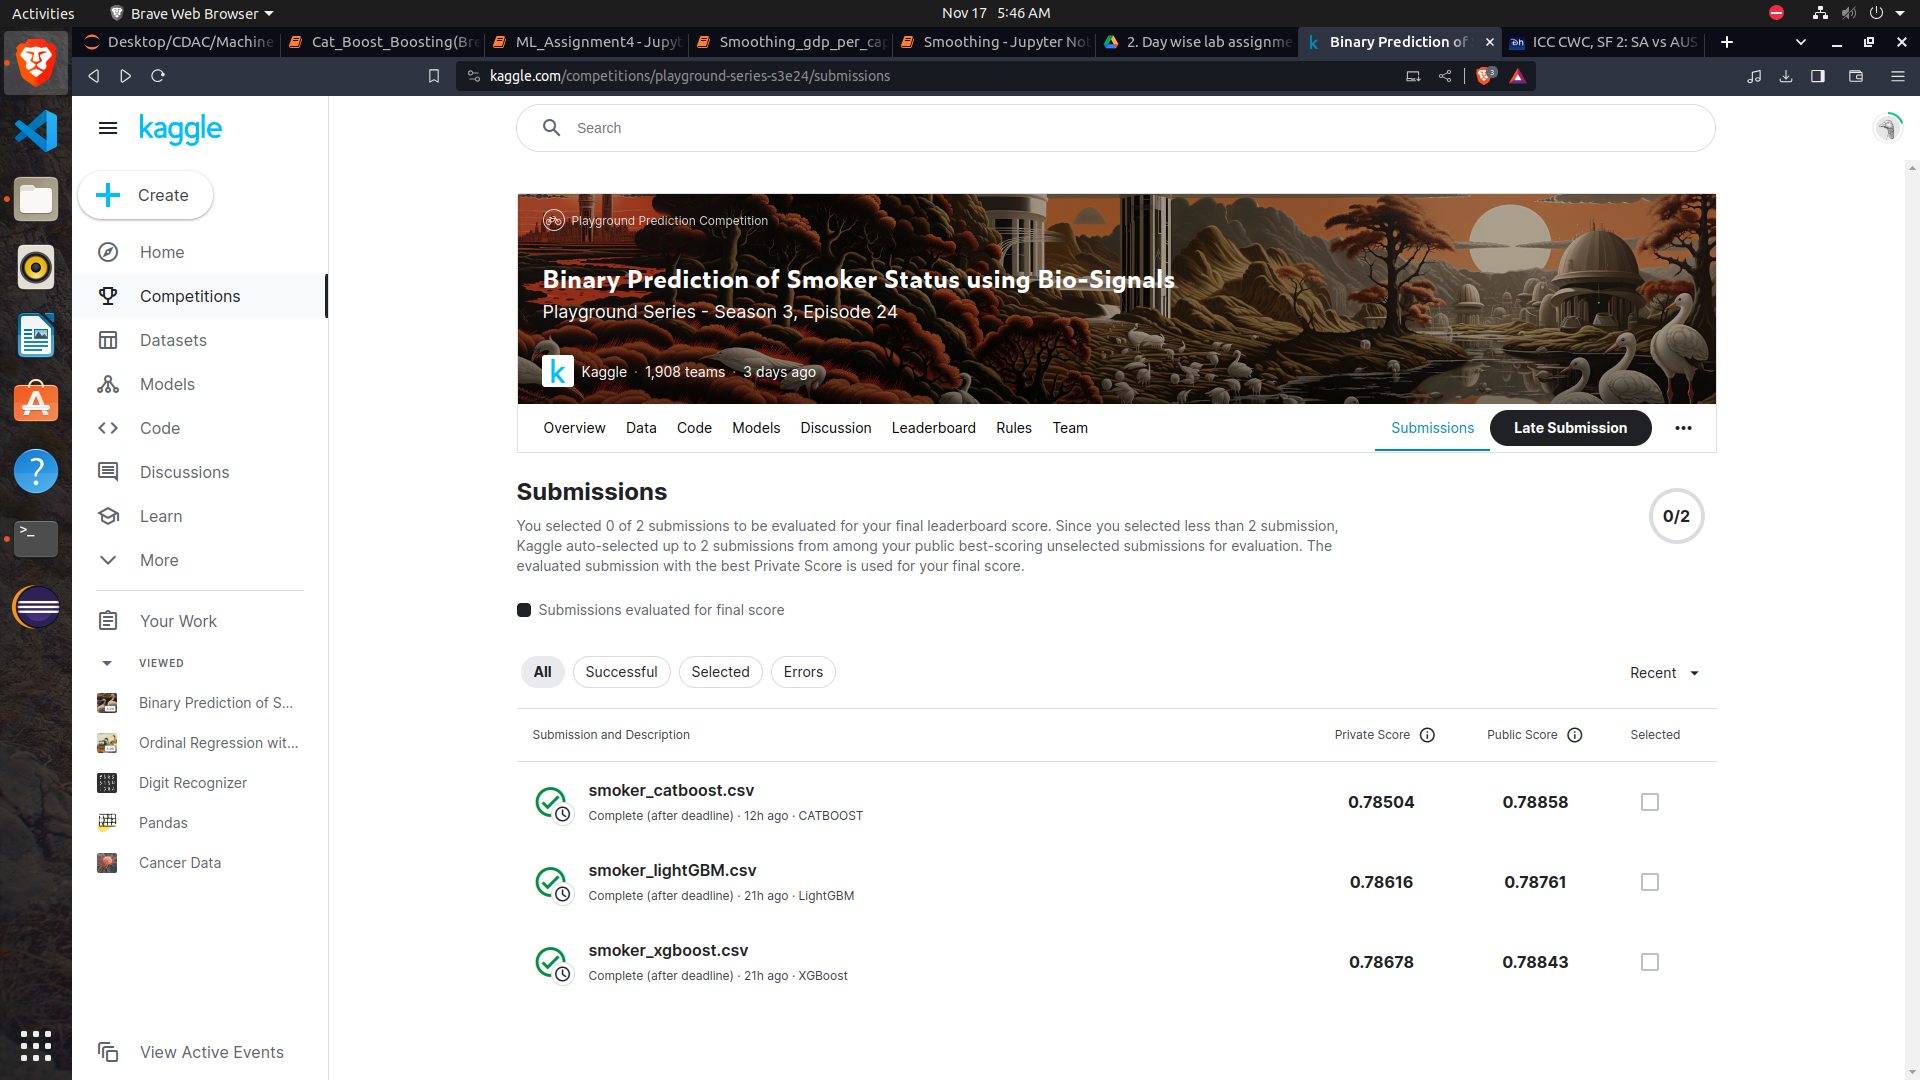